In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow import keras
import os
import datetime

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [97]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [98]:
file = '2013~2023 한국 기온,습도,풍속.csv'
file2 = '한국기후 평균 최고 최저.csv'

In [99]:
df = pd.read_csv(file, encoding = 'cp949')
df1 = pd.read_csv(file2, encoding = 'cp949', header = 0)
df1.head()

\t\t지점번호 지점명          일시  평균기온(℃)  최고기온(℃)  최저기온(℃)
0       105  강릉  1970-01-01      3.2     10.3     -0.5
1       105  강릉  1970-01-02      1.8      5.1     -0.2
2       105  강릉  1970-01-03     -0.3      4.8     -2.2
3       105  강릉  1970-01-04     -5.9     -1.7    -12.6
4       105  강릉  1970-01-05     -7.9     -0.8    -14.7

In [100]:
df1.columns = ['지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)']
df1 = df1.iloc[:, 2:]
df1.head()

일시  평균기온(℃)  최고기온(℃)  최저기온(℃)
0  1970-01-01      3.2     10.3     -0.5
1  1970-01-02      1.8      5.1     -0.2
2  1970-01-03     -0.3      4.8     -2.2
3  1970-01-04     -5.9     -1.7    -12.6
4  1970-01-05     -7.9     -0.8    -14.7

In [101]:
df

지점번호 지점명          일시  평균기온(℃)  최고기온(℃)  최저기온(℃)  평균습도(%rh)  평균풍속(m/s)
0       105  강릉  2013-01-01     -1.9      3.8     -6.7       50.6        2.9
1       105  강릉  2013-01-02     -6.0     -1.3     -9.9       29.9        4.4
2       105  강릉  2013-01-03     -7.5     -0.7    -11.1       25.8        4.0
3       105  강릉  2013-01-04     -4.9      1.8    -10.6       31.1        3.2
4       105  강릉  2013-01-05     -1.7      2.8     -5.4       30.4        4.3
...     ...  ..         ...      ...      ...      ...        ...        ...
62059   184  제주  2023-08-11     29.6     34.1     26.6       64.6        4.0
62060   184  제주  2023-08-12     29.7     33.3     27.2       66.6        2.7
62061   184  제주  2023-08-13     29.2     32.6     26.3       65.3        3.0
62062   184  제주  2023-08-14     28.9     32.3     26.4       69.9        3.4
62063   184  제주  2023-08-15     29.4     32.0     27.0       69.9        2.8

[62064 rows x 8 columns]

In [103]:
df_korea = df.drop(['지점번호', '지점명'], axis = 1).groupby(['일시']).mean()
df_temp = df1.groupby(['일시']).mean()
df_korea.head(10)

평균기온(℃)  최고기온(℃)   최저기온(℃)  평균습도(%rh)  평균풍속(m/s)
일시                                                          
2013-01-01 -0.76250  4.43750  -6.21250   73.10000    2.33125
2013-01-02 -4.70000  0.54375  -8.98125   53.29375    3.58750
2013-01-03 -8.09375 -3.99375 -11.26250   48.90000    3.40625
2013-01-04 -6.74375 -1.15000 -11.61875   50.25000    2.03125
2013-01-05 -3.81250  1.75625  -9.41875   57.06250    2.28125
2013-01-06 -2.32500  2.52500  -5.73750   57.04375    1.96875
2013-01-07 -2.00625  3.35000  -6.72500   49.62500    1.95000
2013-01-08 -1.22500  3.76875  -5.28750   50.66250    2.15625
2013-01-09 -4.01875 -0.80625  -7.14375   45.38125    3.41250
2013-01-10 -4.78125  0.14375  -8.91250   42.67500    2.61875

In [104]:
df_korea.tail(10)

평균기온(℃)   최고기온(℃)   최저기온(℃)  평균습도(%rh)  평균풍속(m/s)
일시                                                            
2023-08-06  29.40625  33.70000  26.15625   74.78750    1.95000
2023-08-07  29.28750  33.62500  26.05625   74.49375    2.43750
2023-08-08  29.08125  33.11875  25.81875   71.57500    2.92500
2023-08-09  26.48125  28.96250  24.30625   81.06250    3.91875
2023-08-10  23.74375  25.91875  22.36875   88.73125    4.73125
2023-08-11  26.24375  29.97500  22.85625   79.02500    2.83750
2023-08-12  25.86250  29.23125  23.14375   81.25000    1.88125
2023-08-13  26.88750  31.00625  23.51875   77.77500    1.60000
2023-08-14  27.40000  31.66250  24.34375   77.50000    1.77500
2023-08-15  27.23750  31.21250  24.21250   76.58750    2.12500

In [105]:
df_korea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3879 entries, 2013-01-01 to 2023-08-15
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   평균기온(℃)    3879 non-null   float64
 1   최고기온(℃)    3879 non-null   float64
 2   최저기온(℃)    3879 non-null   float64
 3   평균습도(%rh)  3879 non-null   float64
 4   평균풍속(m/s)  3879 non-null   float64
dtypes: float64(5)
memory usage: 181.8+ KB


In [106]:
df_temp

평균기온(℃)   최고기온(℃)   최저기온(℃)
일시                                      
1970-01-01   1.33125   6.86875  -2.53750
1970-01-02   1.86875   5.88125  -1.14375
1970-01-03   0.21250   4.08125  -3.43125
1970-01-04  -6.36250  -2.43750 -10.96250
1970-01-05  -9.46875  -4.73125 -14.56250
...              ...       ...       ...
2023-08-11  26.24375  29.97500  22.85625
2023-08-12  25.86250  29.23125  23.14375
2023-08-13  26.88750  31.00625  23.51875
2023-08-14  27.40000  31.66250  24.34375
2023-08-15  27.23750  31.21250  24.21250

[19585 rows x 3 columns]

In [107]:
filter2 = df_temp.index == '1974-10-16' 
df_temp[filter2]

평균기온(℃)  최고기온(℃)  최저기온(℃)
일시                                   
1974-10-16  13.6625  20.7875  7.15625

In [112]:
filter2 = df_temp['최저기온(℃)'].isna() == True
df_temp['최저기온(℃)'][filter2] = 7.15625

In [113]:
df_temp[df_temp.index == '1974-10-16']

평균기온(℃)  최고기온(℃)  최저기온(℃)
일시                                   
1974-10-16  13.6625  20.7875  7.15625

In [114]:
filter1 = df_temp['최고기온(℃)'].isna() == True
df_temp['최고기온(℃)'][filter1] = 20.7875

In [115]:
df_korea = df_korea.reset_index()

In [116]:
df_korea['일시']  = pd.to_datetime(df_korea['일시'])
df_korea.set_index('일시', inplace = True)

In [136]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균기온(℃)'].plot()
axe.set_title('10년간 일별 평균기온')
axe.axhline(y = 0, linestyle = '--', c = 'r', linewidth = 2)

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


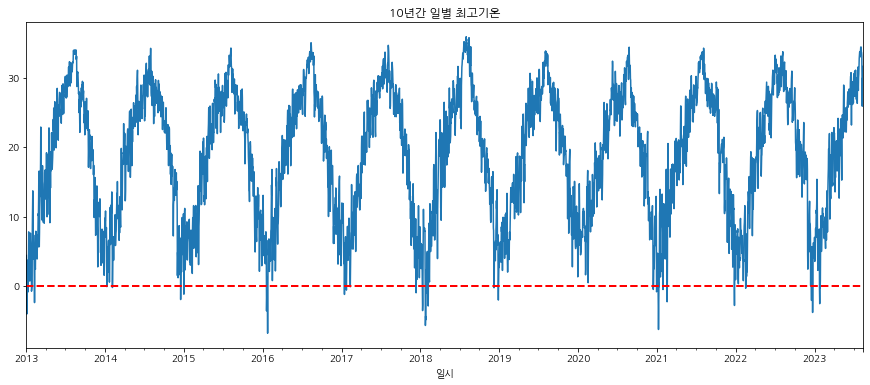

In [137]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['최고기온(℃)'].plot()
axe.set_title('10년간 일별 최고기온')
axe.axhline(y = 0, linestyle = '--', c = 'r', linewidth = 2)

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


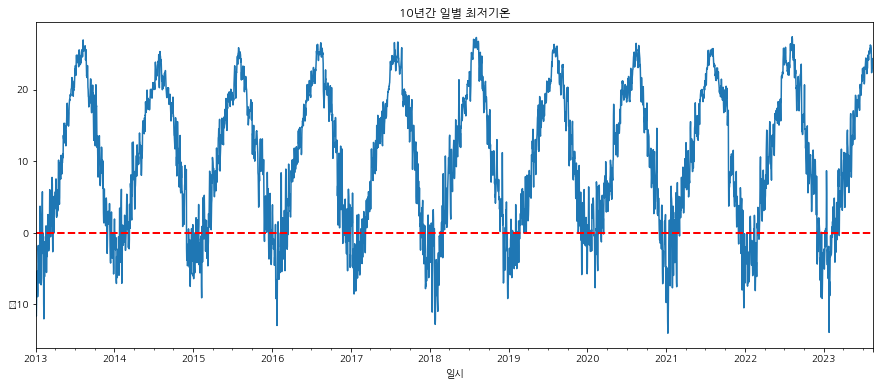

In [138]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['최저기온(℃)'].plot()
axe.set_title('10년간 일별 최저기온')
axe.axhline(y = 0, linestyle = '--', c = 'r', linewidth = 2)
# 겨울의 병원균을 옮기는 곤충, 동물, 조류들이 동면이 가능한지 보기위한 columns

Text(0.5, 1.0, '10년간 일별 평균습도')

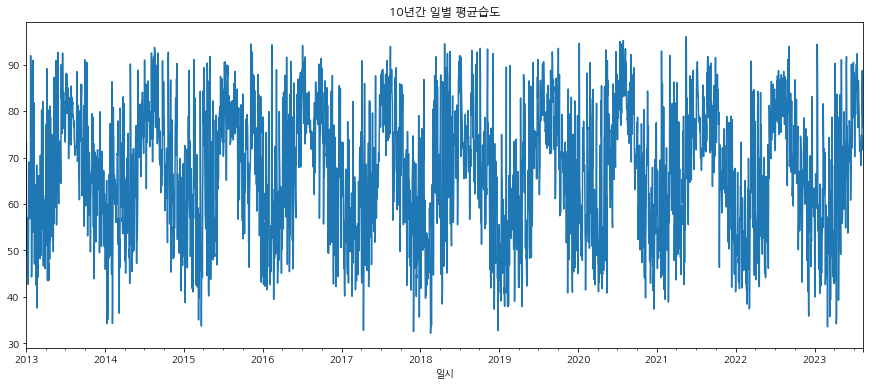

In [119]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균습도(%rh)'].plot()
axe.set_title('10년간 일별 평균습도')

Text(0.5, 1.0, '10년간 일별 평균풍속')

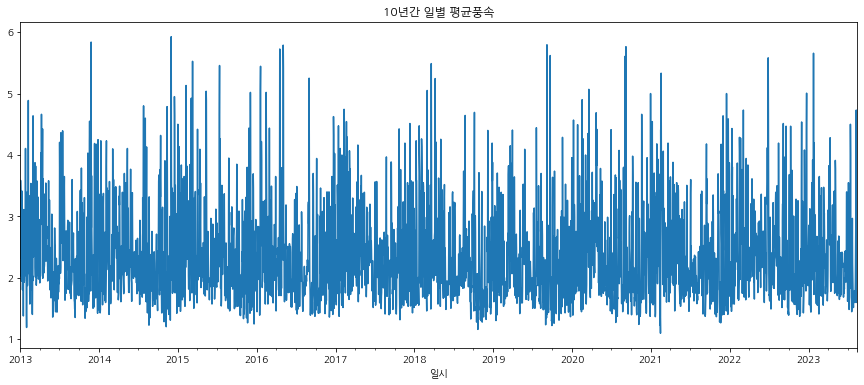

In [120]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균풍속(m/s)'].plot()
axe.set_title('10년간 일별 평균풍속')

## Data Processing

In [121]:
#dataset = df_korea.iloc[:, :3]
dataset = df_temp.iloc[:, :]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(19585, 3)

In [122]:
scaler = MinMaxScaler(feature_range = (0 , 1))
scaled_data = scaler.fit_transform(np.array(data))

## Splitting Data

In [123]:
train_size = int(len(data)*0.75)
test_size = len(data) - train_size
print('Train Size :', train_size, 'Test Size : ', test_size)

Train Size : 14688 Test Size :  4897


In [124]:
scaled_data

array([[0.28644888, 0.31922063, 0.28660807],
       [0.29945554, 0.29607384, 0.3198272 ],
       [0.25937689, 0.25388222, 0.26530612],
       ...,
       [0.90486993, 0.88499854, 0.90764189],
       [0.91727163, 0.9003809 , 0.92730523],
       [0.91333938, 0.88983299, 0.92417697]])

In [125]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(14688, 3)

## Creating Data Set

In [126]:
x_train = []
y_train = []
time_step = 60
n_col = 3

for i in range(time_step, len(scaled_data)):
    print(time_step, i)
    x_train.append(scaled_data[i-time_step:i, :n_col])
    y_train.append(scaled_data[i, :n_col])
    if i <= time_step:
        print('x_train : ', x_train)
        print('y_train : ', y_train)

60 60
x_train :  [array([[0.28644888, 0.31922063, 0.28660807],
       [0.29945554, 0.29607384, 0.3198272 ],
       [0.25937689, 0.25388222, 0.26530612],
       [0.10027223, 0.10108409, 0.08580366],
       [0.02510587, 0.04731907, 0.        ],
       [0.24319419, 0.25754468, 0.20527335],
       [0.22837266, 0.23513038, 0.23596008],
       [0.23835451, 0.25388222, 0.23447043],
       [0.17211131, 0.16319953, 0.18948309],
       [0.20220811, 0.21432757, 0.19603754],
       [0.23275862, 0.25212423, 0.2215105 ],
       [0.33318209, 0.35159684, 0.2919708 ],
       [0.15366001, 0.17096396, 0.17488455],
       [0.09195402, 0.10225608, 0.10859526],
       [0.06488203, 0.05288602, 0.09742291],
       [0.05792498, 0.08980369, 0.04856249],
       [0.0738052 , 0.09449165, 0.07239684],
       [0.12885662, 0.18678582, 0.1084463 ],
       [0.17029643, 0.20773513, 0.16803218],
       [0.1822444 , 0.22121301, 0.17116043],
       [0.22081065, 0.27175505, 0.194101  ],
       [0.28055051, 0.32390858, 0.248

60 3463
60 3464
60 3465
60 3466
60 3467
60 3468
60 3469
60 3470
60 3471
60 3472
60 3473
60 3474
60 3475
60 3476
60 3477
60 3478
60 3479
60 3480
60 3481
60 3482
60 3483
60 3484
60 3485
60 3486
60 3487
60 3488
60 3489
60 3490
60 3491
60 3492
60 3493
60 3494
60 3495
60 3496
60 3497
60 3498
60 3499
60 3500
60 3501
60 3502
60 3503
60 3504
60 3505
60 3506
60 3507
60 3508
60 3509
60 3510
60 3511
60 3512
60 3513
60 3514
60 3515
60 3516
60 3517
60 3518
60 3519
60 3520
60 3521
60 3522
60 3523
60 3524
60 3525
60 3526
60 3527
60 3528
60 3529
60 3530
60 3531
60 3532
60 3533
60 3534
60 3535
60 3536
60 3537
60 3538
60 3539
60 3540
60 3541
60 3542
60 3543
60 3544
60 3545
60 3546
60 3547
60 3548
60 3549
60 3550
60 3551
60 3552
60 3553
60 3554
60 3555
60 3556
60 3557
60 3558
60 3559
60 3560
60 3561
60 3562
60 3563
60 3564
60 3565
60 3566
60 3567
60 3568
60 3569
60 3570
60 3571
60 3572
60 3573
60 3574
60 3575
60 3576
60 3577
60 3578
60 3579
60 3580
60 3581
60 3582
60 3583
60 3584
60 3585
60 3586
60 3587


60 6535
60 6536
60 6537
60 6538
60 6539
60 6540
60 6541
60 6542
60 6543
60 6544
60 6545
60 6546
60 6547
60 6548
60 6549
60 6550
60 6551
60 6552
60 6553
60 6554
60 6555
60 6556
60 6557
60 6558
60 6559
60 6560
60 6561
60 6562
60 6563
60 6564
60 6565
60 6566
60 6567
60 6568
60 6569
60 6570
60 6571
60 6572
60 6573
60 6574
60 6575
60 6576
60 6577
60 6578
60 6579
60 6580
60 6581
60 6582
60 6583
60 6584
60 6585
60 6586
60 6587
60 6588
60 6589
60 6590
60 6591
60 6592
60 6593
60 6594
60 6595
60 6596
60 6597
60 6598
60 6599
60 6600
60 6601
60 6602
60 6603
60 6604
60 6605
60 6606
60 6607
60 6608
60 6609
60 6610
60 6611
60 6612
60 6613
60 6614
60 6615
60 6616
60 6617
60 6618
60 6619
60 6620
60 6621
60 6622
60 6623
60 6624
60 6625
60 6626
60 6627
60 6628
60 6629
60 6630
60 6631
60 6632
60 6633
60 6634
60 6635
60 6636
60 6637
60 6638
60 6639
60 6640
60 6641
60 6642
60 6643
60 6644
60 6645
60 6646
60 6647
60 6648
60 6649
60 6650
60 6651
60 6652
60 6653
60 6654
60 6655
60 6656
60 6657
60 6658
60 6659


60 8818
60 8819
60 8820
60 8821
60 8822
60 8823
60 8824
60 8825
60 8826
60 8827
60 8828
60 8829
60 8830
60 8831
60 8832
60 8833
60 8834
60 8835
60 8836
60 8837
60 8838
60 8839
60 8840
60 8841
60 8842
60 8843
60 8844
60 8845
60 8846
60 8847
60 8848
60 8849
60 8850
60 8851
60 8852
60 8853
60 8854
60 8855
60 8856
60 8857
60 8858
60 8859
60 8860
60 8861
60 8862
60 8863
60 8864
60 8865
60 8866
60 8867
60 8868
60 8869
60 8870
60 8871
60 8872
60 8873
60 8874
60 8875
60 8876
60 8877
60 8878
60 8879
60 8880
60 8881
60 8882
60 8883
60 8884
60 8885
60 8886
60 8887
60 8888
60 8889
60 8890
60 8891
60 8892
60 8893
60 8894
60 8895
60 8896
60 8897
60 8898
60 8899
60 8900
60 8901
60 8902
60 8903
60 8904
60 8905
60 8906
60 8907
60 8908
60 8909
60 8910
60 8911
60 8912
60 8913
60 8914
60 8915
60 8916
60 8917
60 8918
60 8919
60 8920
60 8921
60 8922
60 8923
60 8924
60 8925
60 8926
60 8927
60 8928
60 8929
60 8930
60 8931
60 8932
60 8933
60 8934
60 8935
60 8936
60 8937
60 8938
60 8939
60 8940
60 8941
60 8942


60 12593
60 12594
60 12595
60 12596
60 12597
60 12598
60 12599
60 12600
60 12601
60 12602
60 12603
60 12604
60 12605
60 12606
60 12607
60 12608
60 12609
60 12610
60 12611
60 12612
60 12613
60 12614
60 12615
60 12616
60 12617
60 12618
60 12619
60 12620
60 12621
60 12622
60 12623
60 12624
60 12625
60 12626
60 12627
60 12628
60 12629
60 12630
60 12631
60 12632
60 12633
60 12634
60 12635
60 12636
60 12637
60 12638
60 12639
60 12640
60 12641
60 12642
60 12643
60 12644
60 12645
60 12646
60 12647
60 12648
60 12649
60 12650
60 12651
60 12652
60 12653
60 12654
60 12655
60 12656
60 12657
60 12658
60 12659
60 12660
60 12661
60 12662
60 12663
60 12664
60 12665
60 12666
60 12667
60 12668
60 12669
60 12670
60 12671
60 12672
60 12673
60 12674
60 12675
60 12676
60 12677
60 12678
60 12679
60 12680
60 12681
60 12682
60 12683
60 12684
60 12685
60 12686
60 12687
60 12688
60 12689
60 12690
60 12691
60 12692
60 12693
60 12694
60 12695
60 12696
60 12697
60 12698
60 12699
60 12700
60 12701
60 12702
60 12703
6

60 16191
60 16192
60 16193
60 16194
60 16195
60 16196
60 16197
60 16198
60 16199
60 16200
60 16201
60 16202
60 16203
60 16204
60 16205
60 16206
60 16207
60 16208
60 16209
60 16210
60 16211
60 16212
60 16213
60 16214
60 16215
60 16216
60 16217
60 16218
60 16219
60 16220
60 16221
60 16222
60 16223
60 16224
60 16225
60 16226
60 16227
60 16228
60 16229
60 16230
60 16231
60 16232
60 16233
60 16234
60 16235
60 16236
60 16237
60 16238
60 16239
60 16240
60 16241
60 16242
60 16243
60 16244
60 16245
60 16246
60 16247
60 16248
60 16249
60 16250
60 16251
60 16252
60 16253
60 16254
60 16255
60 16256
60 16257
60 16258
60 16259
60 16260
60 16261
60 16262
60 16263
60 16264
60 16265
60 16266
60 16267
60 16268
60 16269
60 16270
60 16271
60 16272
60 16273
60 16274
60 16275
60 16276
60 16277
60 16278
60 16279
60 16280
60 16281
60 16282
60 16283
60 16284
60 16285
60 16286
60 16287
60 16288
60 16289
60 16290
60 16291
60 16292
60 16293
60 16294
60 16295
60 16296
60 16297
60 16298
60 16299
60 16300
60 16301
6

In [127]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [128]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_col))

In [129]:
x_train.shape, y_train.shape

((19525, 60, 3), (19525, 3))

In [133]:
m_lstm = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(x_train.shape[1], n_col),
                       activation = 'relu',return_sequences = True),
    keras.layers.LSTM(64, return_sequences = True, activation = 'relu'),
    keras.layers.LSTM(50, return_sequences = True, activation = 'relu'),
    keras.layers.LSTM(64, return_sequences = False, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(n_col)
])
m_lstm.summary()
#kernel_regularizer="l2"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10800     
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            29440     
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            23000     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 3)                 5

In [134]:
m_lstm.compile(optimizer = tf.optimizers.RMSprop(learning_rate = 0.001),
             loss = keras.losses.MeanSquaredError(),
             metrics = ['mae'])

In [135]:
h = m_lstm.fit(x_train, y_train, epochs = 30, shuffle=False, batch_size = 32)

Epoch 1/30
611/611 [==============================] - 26s 39ms/step - loss: 0.0206 - mae: 0.1008
Epoch 2/30
611/611 [==============================] - 24s 39ms/step - loss: 0.0083 - mae: 0.0704
Epoch 3/30
611/611 [==============================] - 24s 39ms/step - loss: 15.2742 - mae: 0.2372
Epoch 4/30
611/611 [==============================] - 24s 39ms/step - loss: 0.0073 - mae: 0.0668
Epoch 5/30
611/611 [==============================] - 24s 39ms/step - loss: 0.0066 - mae: 0.0637
Epoch 6/30
611/611 [==============================] - 24s 39ms/step - loss: 0.0802 - mae: 0.0652
Epoch 7/30
611/611 [==============================] - 24s 39ms/step - loss: 0.0056 - mae: 0.0585
Epoch 8/30
611/611 [==============================] - 24s 39ms/step - loss: 0.0057 - mae: 0.0592
Epoch 9/30
611/611 [==============================] - 24s 39ms/step - loss: 0.0056 - mae: 0.0583
Epoch 10/30
611/611 [==============================] - 24s 39ms/step - loss: 0.0054 - mae: 0.0569
Epoch 11/30
611/611 [=======

In [139]:
m_lstm.save('m3_lstm_adam.h5')

In [140]:
m_lstm_Adam = tf.keras.models.load_model('m3_lstm_adam.h5')

Text(0, 0.5, 'Losses')

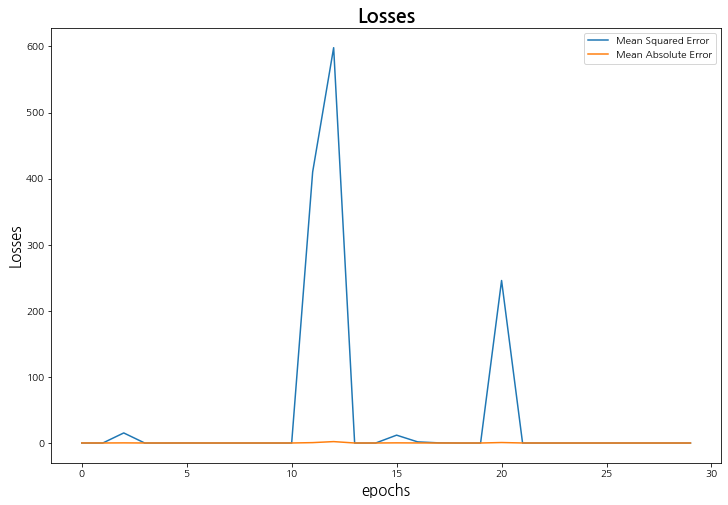

In [141]:
fig, axe = plt.subplots(figsize = (12, 8))
axe.plot(h.history['loss'])
axe.plot(h.history['mae'])
axe.legend(['Mean Squared Error', 'Mean Absolute Error'])
axe.set_title('Losses', size = 20, weight = 'bold')
axe.set_xlabel('epochs', size = 15)
axe.set_ylabel('Losses', size = 15)

In [143]:
test_data = scaled_data[train_size - time_step:, :]

x_test = []
y_test = []

for i in range(time_step, len(test_data)):
    #print(time_step, i)
    x_test.append(test_data[i-time_step:i, 0:n_col])
    y_test.append(test_data[i, 0:n_col])
    
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_col))

x_test

array([[[0.38793103, 0.42836214, 0.31580515],
        [0.49213551, 0.4557574 , 0.50856547],
        [0.3008167 , 0.35174333, 0.28407567],
        ...,
        [0.33076225, 0.333431  , 0.32518993],
        [0.32410768, 0.31526516, 0.34083122],
        [0.42301875, 0.4890126 , 0.31163414]],

       [[0.49213551, 0.4557574 , 0.50856547],
        [0.3008167 , 0.35174333, 0.28407567],
        [0.1991833 , 0.19425725, 0.2367049 ],
        ...,
        [0.32410768, 0.31526516, 0.34083122],
        [0.42301875, 0.4890126 , 0.31163414],
        [0.53962492, 0.58804571, 0.50737375]],

       [[0.3008167 , 0.35174333, 0.28407567],
        [0.1991833 , 0.19425725, 0.2367049 ],
        [0.21279492, 0.21432757, 0.22344704],
        ...,
        [0.42301875, 0.4890126 , 0.31163414],
        [0.53962492, 0.58804571, 0.50737375],
        [0.38430127, 0.38397304, 0.39267094]],

       ...,

       [[0.77208106, 0.77234105, 0.7729778 ],
        [0.77283727, 0.77658951, 0.75495308],
        [0.82320024, 0

In [144]:
m_lstm_Adam.evaluate(x_test, y_test)

154/154 [==============================] - 2s 12ms/step - loss: 0.0022 - mae: 0.0347


[0.0021594481077045202, 0.03465071693062782]

In [145]:
pred = m_lstm_Adam.predict(x_test)
pred

154/154 [==============================] - 2s 12ms/step


array([[0.49616104, 0.5166837 , 0.4665335 ],
       [0.56485844, 0.58427614, 0.5361328 ],
       [0.35320348, 0.37255216, 0.3305144 ],
       ...,
       [0.8554913 , 0.8302245 , 0.8656664 ],
       [0.9027881 , 0.875998  , 0.9155335 ],
       [0.89470905, 0.8678137 , 0.906782  ]], dtype=float32)

In [146]:
pred.shape

(4897, 3)

In [147]:
pred = scaler.inverse_transform(pred)
print(pred.shape)
pred

(4897, 3)


array([[ 9.997605 , 15.293019 ,  5.0114965],
       [12.836525 , 18.176682 ,  7.9316225],
       [ 4.089884 ,  9.144007 , -0.6953552],
       ...,
       [24.846928 , 28.669455 , 21.757616 ],
       [26.801468 , 30.622267 , 23.849852 ],
       [26.467602 , 30.273104 , 23.482672 ]], dtype=float32)

In [148]:
y_test = scaler.inverse_transform(y_test)
y_test

array([[11.79375, 18.3375 ,  6.725  ],
       [ 5.375  ,  9.63125,  1.9125 ],
       [ 5.3625 ,  8.70625,  2.075  ],
       ...,
       [26.8875 , 31.00625, 23.51875],
       [27.4    , 31.6625 , 24.34375],
       [27.2375 , 31.2125 , 24.2125 ]])

In [149]:
pred = pd.DataFrame(pred)
y_test = pd.DataFrame(y_test)

In [153]:
pred.columns = ['예측평균기온', '예측최고기온', '예측최저기온']
y_test.columns = ['실제평균기온', '실제최고기온', '실제최저기온']

#pred.columns = ['예측평균기온', '예측최고기온']
#y_test.columns = ['실제평균기온', '실제최고기온']

In [154]:
df_pred = pd.concat((pred, y_test), axis = 1)
df_pred = df_pred[['예측평균기온', '실제평균기온', '예측최고기온', '실제최고기온', '예측최저기온', '실제최저기온']]
#df_pred = df_pred[['예측평균기온', '실제평균기온', '예측최고기온', '실제최고기온']]
df_pred

예측평균기온    실제평균기온     예측최고기온    실제최고기온     예측최저기온    실제최저기온
0      9.997605  11.79375  15.293019  18.33750   5.011497   6.72500
1     12.836525   5.37500  18.176682   9.63125   7.931623   1.91250
2      4.089884   5.36250   9.144007   8.70625  -0.695355   2.07500
3      6.309244   7.25625  11.440642  11.08125   1.384396   4.09375
4      8.022259   8.90625  13.207137  12.89375   3.086642   5.36250
...         ...       ...        ...       ...        ...       ...
4892  24.037876  26.24375  27.891422  29.97500  20.913870  22.85625
4893  26.914059  25.86250  30.738817  29.23125  23.989017  23.14375
4894  24.846928  26.88750  28.669455  31.00625  21.757616  23.51875
4895  26.801468  27.40000  30.622267  31.66250  23.849852  24.34375
4896  26.467602  27.23750  30.273104  31.21250  23.482672  24.21250

[4897 rows x 6 columns]

In [155]:
fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제평균기온'])
axe[1].plot(df_pred['예측평균기온'], c = 'g')

axe[0].set_title('실제 평균 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 평균 기온', size = 20, weight = 'bold')
#axe.legend(['actual', 'predict'])

Text(0.5, 1.0, '예측 평균 기온')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


In [156]:
fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제최고기온'])
axe[1].plot(df_pred['예측최고기온'], c = 'r')

axe[0].set_title('실제 최고 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 최고 기온', size = 20, weight = 'bold')

#axe.legend(['actual', 'predict'])

Text(0.5, 1.0, '예측 최고 기온')

Text(0.5, 1.0, '예측 최저 기온')

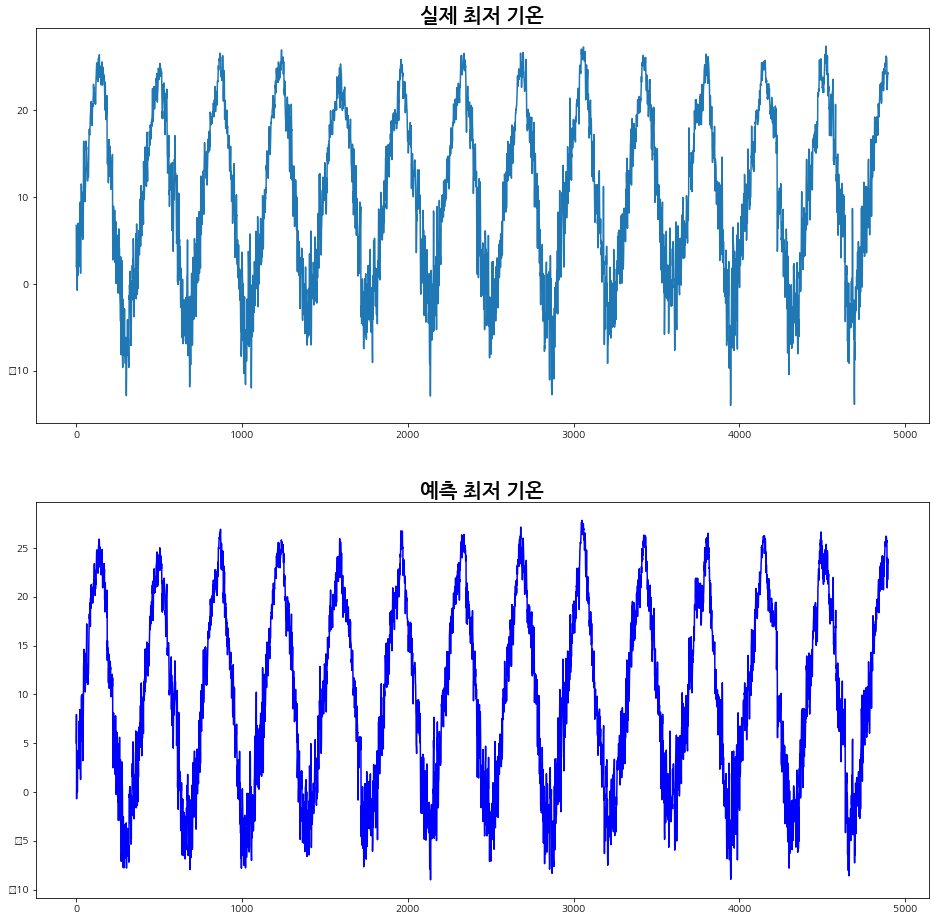

In [158]:

fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제최저기온'])
axe[1].plot(df_pred['예측최저기온'], c = 'b')

axe[0].set_title('실제 최저 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 최저 기온', size = 20, weight = 'bold')


In [159]:
df_pred.max()

filter3 = df_pred['실제최고기온'] == 35.912500

df_pred[filter3]

예측평균기온  실제평균기온     예측최고기온   실제최고기온     예측최저기온  실제최저기온
3056  29.931225  30.675  33.486458  35.9125  27.450197  25.975

In [177]:
start_date = datetime.date(2023, 8, 15)
#print('언제의 대한민국 평균 기온을 알고 싶으신가요? (Ex. 2040-01-01, 형태로 적어주세요)')
year, month, day = map(int, input().split('-'))
target_date = datetime.date(year, month, day)

d_day = (target_date - start_date).days
print(d_day)

2030-08-15
2557


In [161]:
list(x_test[-1][0])

[0.8232002419842709, 0.8448578962789335, 0.7738715924325935]

In [186]:
last_array = []
for i in range(len(x_test[-1430])):
    last_array.append(list(x_test[-1430][i]))
len(last_array)
np.array(last_array)

array([[0.84921355, 0.80735423, 0.87069864],
       [0.87568058, 0.82962203, 0.89289438],
       [0.86887477, 0.80750073, 0.91657977],
       [0.86433757, 0.81731614, 0.90064055],
       [0.90895342, 0.89378846, 0.91806942],
       [0.93269812, 0.91312628, 0.94607478],
       [0.91107078, 0.85335482, 0.95218233],
       [0.90372051, 0.83152652, 0.95502259],
       [0.89942529, 0.83445649, 0.94607478],
       [0.91833031, 0.87210665, 0.94607478],
       [0.91772535, 0.86038676, 0.9569492 ],
       [0.93829401, 0.90360387, 0.95203337],
       [0.95326679, 0.91840023, 0.97065396],
       [0.94751966, 0.8996484 , 0.97452704],
       [0.94903206, 0.92279519, 0.95858781],
       [0.96211938, 0.94755347, 0.95994836],
       [0.95235935, 0.95092294, 0.94950097],
       [0.95114943, 0.94374451, 0.94637271],
       [0.95825771, 0.95136244, 0.94711753],
       [0.94328494, 0.91048931, 0.9518844 ],
       [0.93481549, 0.91649575, 0.93311485],
       [0.94782214, 0.94257252, 0.9599285 ],
       [0.

In [187]:
for i in range(time_step, d_day-time_step):
    print(time_step, i)
    last_ar = np.array(last_array)[i-time_step:i, 0:n_col]
    print(last_ar)
    array = np.reshape(last_ar, (1, last_ar.shape[0], n_col))
    print(array.shape)
    last_array.append(list(m_lstm_Adam.predict(array)[0]))
    print(len(last_array))

60 60
[[0.84921355 0.80735423 0.87069864]
 [0.87568058 0.82962203 0.89289438]
 [0.86887477 0.80750073 0.91657977]
 [0.86433757 0.81731614 0.90064055]
 [0.90895342 0.89378846 0.91806942]
 [0.93269812 0.91312628 0.94607478]
 [0.91107078 0.85335482 0.95218233]
 [0.90372051 0.83152652 0.95502259]
 [0.89942529 0.83445649 0.94607478]
 [0.91833031 0.87210665 0.94607478]
 [0.91772535 0.86038676 0.9569492 ]
 [0.93829401 0.90360387 0.95203337]
 [0.95326679 0.91840023 0.97065396]
 [0.94751966 0.8996484  0.97452704]
 [0.94903206 0.92279519 0.95858781]
 [0.96211938 0.94755347 0.95994836]
 [0.95235935 0.95092294 0.94950097]
 [0.95114943 0.94374451 0.94637271]
 [0.95825771 0.95136244 0.94711753]
 [0.94328494 0.91048931 0.9518844 ]
 [0.93481549 0.91649575 0.93311485]
 [0.94782214 0.94257252 0.9599285 ]
 [0.96022384 0.9443305  0.95426784]
 [0.96581972 0.94301201 0.96395054]
 [0.95175439 0.92059771 0.96737673]
 [0.93799153 0.9000879  0.96320572]
 [0.95674531 0.94008204 0.95382094]
 [0.96113128 0.9340755

1/1 [==============================] - 0s 16ms/step
64
60 64
[[0.90895342 0.89378846 0.91806942]
 [0.93269812 0.91312628 0.94607478]
 [0.91107078 0.85335482 0.95218233]
 [0.90372051 0.83152652 0.95502259]
 [0.89942529 0.83445649 0.94607478]
 [0.91833031 0.87210665 0.94607478]
 [0.91772535 0.86038676 0.9569492 ]
 [0.93829401 0.90360387 0.95203337]
 [0.95326679 0.91840023 0.97065396]
 [0.94751966 0.8996484  0.97452704]
 [0.94903206 0.92279519 0.95858781]
 [0.96211938 0.94755347 0.95994836]
 [0.95235935 0.95092294 0.94950097]
 [0.95114943 0.94374451 0.94637271]
 [0.95825771 0.95136244 0.94711753]
 [0.94328494 0.91048931 0.9518844 ]
 [0.93481549 0.91649575 0.93311485]
 [0.94782214 0.94257252 0.9599285 ]
 [0.96022384 0.9443305  0.95426784]
 [0.96581972 0.94301201 0.96395054]
 [0.95175439 0.92059771 0.96737673]
 [0.93799153 0.9000879  0.96320572]
 [0.95674531 0.94008204 0.95382094]
 [0.96113128 0.93407559 0.96871741]
 [0.89882033 0.83826546 0.94398927]
 [0.91288566 0.88324055 0.93445553]
 [0

1/1 [==============================] - 0s 19ms/step
68
60 68
[[0.89942529 0.83445649 0.94607478]
 [0.91833031 0.87210665 0.94607478]
 [0.91772535 0.86038676 0.9569492 ]
 [0.93829401 0.90360387 0.95203337]
 [0.95326679 0.91840023 0.97065396]
 [0.94751966 0.8996484  0.97452704]
 [0.94903206 0.92279519 0.95858781]
 [0.96211938 0.94755347 0.95994836]
 [0.95235935 0.95092294 0.94950097]
 [0.95114943 0.94374451 0.94637271]
 [0.95825771 0.95136244 0.94711753]
 [0.94328494 0.91048931 0.9518844 ]
 [0.93481549 0.91649575 0.93311485]
 [0.94782214 0.94257252 0.9599285 ]
 [0.96022384 0.9443305  0.95426784]
 [0.96581972 0.94301201 0.96395054]
 [0.95175439 0.92059771 0.96737673]
 [0.93799153 0.9000879  0.96320572]
 [0.95674531 0.94008204 0.95382094]
 [0.96113128 0.93407559 0.96871741]
 [0.89882033 0.83826546 0.94398927]
 [0.91288566 0.88324055 0.93445553]
 [0.90305505 0.8776736  0.90496052]
 [0.88762855 0.87694111 0.89527782]
 [0.88717483 0.87108116 0.87755102]
 [0.90411373 0.8782596  0.90659914]
 [0

1/1 [==============================] - 0s 17ms/step
72
60 72
[[0.95326679 0.91840023 0.97065396]
 [0.94751966 0.8996484  0.97452704]
 [0.94903206 0.92279519 0.95858781]
 [0.96211938 0.94755347 0.95994836]
 [0.95235935 0.95092294 0.94950097]
 [0.95114943 0.94374451 0.94637271]
 [0.95825771 0.95136244 0.94711753]
 [0.94328494 0.91048931 0.9518844 ]
 [0.93481549 0.91649575 0.93311485]
 [0.94782214 0.94257252 0.9599285 ]
 [0.96022384 0.9443305  0.95426784]
 [0.96581972 0.94301201 0.96395054]
 [0.95175439 0.92059771 0.96737673]
 [0.93799153 0.9000879  0.96320572]
 [0.95674531 0.94008204 0.95382094]
 [0.96113128 0.93407559 0.96871741]
 [0.89882033 0.83826546 0.94398927]
 [0.91288566 0.88324055 0.93445553]
 [0.90305505 0.8776736  0.90496052]
 [0.88762855 0.87694111 0.89527782]
 [0.88717483 0.87108116 0.87755102]
 [0.90411373 0.8782596  0.90659914]
 [0.89821537 0.86756519 0.91836735]
 [0.89261948 0.86038676 0.92045285]
 [0.87583182 0.85174333 0.89170267]
 [0.8377193  0.81204219 0.84775808]
 [0

1/1 [==============================] - 0s 18ms/step
76
60 76
[[0.95235935 0.95092294 0.94950097]
 [0.95114943 0.94374451 0.94637271]
 [0.95825771 0.95136244 0.94711753]
 [0.94328494 0.91048931 0.9518844 ]
 [0.93481549 0.91649575 0.93311485]
 [0.94782214 0.94257252 0.9599285 ]
 [0.96022384 0.9443305  0.95426784]
 [0.96581972 0.94301201 0.96395054]
 [0.95175439 0.92059771 0.96737673]
 [0.93799153 0.9000879  0.96320572]
 [0.95674531 0.94008204 0.95382094]
 [0.96113128 0.93407559 0.96871741]
 [0.89882033 0.83826546 0.94398927]
 [0.91288566 0.88324055 0.93445553]
 [0.90305505 0.8776736  0.90496052]
 [0.88762855 0.87694111 0.89527782]
 [0.88717483 0.87108116 0.87755102]
 [0.90411373 0.8782596  0.90659914]
 [0.89821537 0.86756519 0.91836735]
 [0.89261948 0.86038676 0.92045285]
 [0.87583182 0.85174333 0.89170267]
 [0.8377193  0.81204219 0.84775808]
 [0.84180278 0.82845004 0.84090571]
 [0.86584997 0.86229124 0.84105467]
 [0.82667877 0.77497803 0.85624907]
 [0.84724743 0.81204219 0.87740206]
 [0

1/1 [==============================] - 0s 19ms/step
80
60 80
[[0.93481549 0.91649575 0.93311485]
 [0.94782214 0.94257252 0.9599285 ]
 [0.96022384 0.9443305  0.95426784]
 [0.96581972 0.94301201 0.96395054]
 [0.95175439 0.92059771 0.96737673]
 [0.93799153 0.9000879  0.96320572]
 [0.95674531 0.94008204 0.95382094]
 [0.96113128 0.93407559 0.96871741]
 [0.89882033 0.83826546 0.94398927]
 [0.91288566 0.88324055 0.93445553]
 [0.90305505 0.8776736  0.90496052]
 [0.88762855 0.87694111 0.89527782]
 [0.88717483 0.87108116 0.87755102]
 [0.90411373 0.8782596  0.90659914]
 [0.89821537 0.86756519 0.91836735]
 [0.89261948 0.86038676 0.92045285]
 [0.87583182 0.85174333 0.89170267]
 [0.8377193  0.81204219 0.84775808]
 [0.84180278 0.82845004 0.84090571]
 [0.86584997 0.86229124 0.84105467]
 [0.82667877 0.77497803 0.85624907]
 [0.84724743 0.81204219 0.87740206]
 [0.81609195 0.76897158 0.84969462]
 [0.83030853 0.82302959 0.82526441]
 [0.82743497 0.82566657 0.80619693]
 [0.81200847 0.79255787 0.8164755 ]
 [0

1/1 [==============================] - 0s 19ms/step
84
60 84
[[0.95175439 0.92059771 0.96737673]
 [0.93799153 0.9000879  0.96320572]
 [0.95674531 0.94008204 0.95382094]
 [0.96113128 0.93407559 0.96871741]
 [0.89882033 0.83826546 0.94398927]
 [0.91288566 0.88324055 0.93445553]
 [0.90305505 0.8776736  0.90496052]
 [0.88762855 0.87694111 0.89527782]
 [0.88717483 0.87108116 0.87755102]
 [0.90411373 0.8782596  0.90659914]
 [0.89821537 0.86756519 0.91836735]
 [0.89261948 0.86038676 0.92045285]
 [0.87583182 0.85174333 0.89170267]
 [0.8377193  0.81204219 0.84775808]
 [0.84180278 0.82845004 0.84090571]
 [0.86584997 0.86229124 0.84105467]
 [0.82667877 0.77497803 0.85624907]
 [0.84724743 0.81204219 0.87740206]
 [0.81609195 0.76897158 0.84969462]
 [0.83030853 0.82302959 0.82526441]
 [0.82743497 0.82566657 0.80619693]
 [0.81200847 0.79255787 0.8164755 ]
 [0.79945554 0.75769118 0.8261582 ]
 [0.80777374 0.74992675 0.84671533]
 [0.83151845 0.78684442 0.87054968]
 [0.85193587 0.832845   0.88306271]
 [0

1/1 [==============================] - 0s 17ms/step
88
60 88
[[0.89882033 0.83826546 0.94398927]
 [0.91288566 0.88324055 0.93445553]
 [0.90305505 0.8776736  0.90496052]
 [0.88762855 0.87694111 0.89527782]
 [0.88717483 0.87108116 0.87755102]
 [0.90411373 0.8782596  0.90659914]
 [0.89821537 0.86756519 0.91836735]
 [0.89261948 0.86038676 0.92045285]
 [0.87583182 0.85174333 0.89170267]
 [0.8377193  0.81204219 0.84775808]
 [0.84180278 0.82845004 0.84090571]
 [0.86584997 0.86229124 0.84105467]
 [0.82667877 0.77497803 0.85624907]
 [0.84724743 0.81204219 0.87740206]
 [0.81609195 0.76897158 0.84969462]
 [0.83030853 0.82302959 0.82526441]
 [0.82743497 0.82566657 0.80619693]
 [0.81200847 0.79255787 0.8164755 ]
 [0.79945554 0.75769118 0.8261582 ]
 [0.80777374 0.74992675 0.84671533]
 [0.83151845 0.78684442 0.87054968]
 [0.85193587 0.832845   0.88306271]
 [0.88278887 0.83650747 0.89885297]
 [0.88777979 0.84295341 0.90689707]
 [0.86191773 0.8217111  0.89766125]
 [0.86993345 0.83006153 0.90034262]
 [0

1/1 [==============================] - 0s 22ms/step
92
60 92
[[0.88717483 0.87108116 0.87755102]
 [0.90411373 0.8782596  0.90659914]
 [0.89821537 0.86756519 0.91836735]
 [0.89261948 0.86038676 0.92045285]
 [0.87583182 0.85174333 0.89170267]
 [0.8377193  0.81204219 0.84775808]
 [0.84180278 0.82845004 0.84090571]
 [0.86584997 0.86229124 0.84105467]
 [0.82667877 0.77497803 0.85624907]
 [0.84724743 0.81204219 0.87740206]
 [0.81609195 0.76897158 0.84969462]
 [0.83030853 0.82302959 0.82526441]
 [0.82743497 0.82566657 0.80619693]
 [0.81200847 0.79255787 0.8164755 ]
 [0.79945554 0.75769118 0.8261582 ]
 [0.80777374 0.74992675 0.84671533]
 [0.83151845 0.78684442 0.87054968]
 [0.85193587 0.832845   0.88306271]
 [0.88278887 0.83650747 0.89885297]
 [0.88777979 0.84295341 0.90689707]
 [0.86191773 0.8217111  0.89766125]
 [0.86993345 0.83006153 0.90034262]
 [0.88263763 0.84632288 0.90749292]
 [0.84891107 0.81189569 0.87904067]
 [0.77525711 0.71608556 0.81379413]
 [0.80414398 0.80295927 0.79517354]
 [0

1/1 [==============================] - 0s 30ms/step
96
60 96
[[0.87583182 0.85174333 0.89170267]
 [0.8377193  0.81204219 0.84775808]
 [0.84180278 0.82845004 0.84090571]
 [0.86584997 0.86229124 0.84105467]
 [0.82667877 0.77497803 0.85624907]
 [0.84724743 0.81204219 0.87740206]
 [0.81609195 0.76897158 0.84969462]
 [0.83030853 0.82302959 0.82526441]
 [0.82743497 0.82566657 0.80619693]
 [0.81200847 0.79255787 0.8164755 ]
 [0.79945554 0.75769118 0.8261582 ]
 [0.80777374 0.74992675 0.84671533]
 [0.83151845 0.78684442 0.87054968]
 [0.85193587 0.832845   0.88306271]
 [0.88278887 0.83650747 0.89885297]
 [0.88777979 0.84295341 0.90689707]
 [0.86191773 0.8217111  0.89766125]
 [0.86993345 0.83006153 0.90034262]
 [0.88263763 0.84632288 0.90749292]
 [0.84891107 0.81189569 0.87904067]
 [0.77525711 0.71608556 0.81379413]
 [0.80414398 0.80295927 0.79517354]
 [0.81594071 0.80120129 0.80783554]
 [0.83756806 0.82727805 0.83896916]
 [0.81657374 0.79797542 0.82191807]
 [0.77787465 0.76290202 0.77789474]
 [0

1/1 [==============================] - 0s 30ms/step
100
60 100
[[0.82667877 0.77497803 0.85624907]
 [0.84724743 0.81204219 0.87740206]
 [0.81609195 0.76897158 0.84969462]
 [0.83030853 0.82302959 0.82526441]
 [0.82743497 0.82566657 0.80619693]
 [0.81200847 0.79255787 0.8164755 ]
 [0.79945554 0.75769118 0.8261582 ]
 [0.80777374 0.74992675 0.84671533]
 [0.83151845 0.78684442 0.87054968]
 [0.85193587 0.832845   0.88306271]
 [0.88278887 0.83650747 0.89885297]
 [0.88777979 0.84295341 0.90689707]
 [0.86191773 0.8217111  0.89766125]
 [0.86993345 0.83006153 0.90034262]
 [0.88263763 0.84632288 0.90749292]
 [0.84891107 0.81189569 0.87904067]
 [0.77525711 0.71608556 0.81379413]
 [0.80414398 0.80295927 0.79517354]
 [0.81594071 0.80120129 0.80783554]
 [0.83756806 0.82727805 0.83896916]
 [0.81657374 0.79797542 0.82191807]
 [0.77787465 0.76290202 0.77789474]
 [0.75355059 0.74327242 0.75076669]
 [0.73847896 0.73166585 0.73402274]
 [0.72514564 0.7214936  0.71921176]
 [0.71224552 0.71154118 0.70480335]
 

1/1 [==============================] - 0s 25ms/step
104
60 104
[[0.82743497 0.82566657 0.80619693]
 [0.81200847 0.79255787 0.8164755 ]
 [0.79945554 0.75769118 0.8261582 ]
 [0.80777374 0.74992675 0.84671533]
 [0.83151845 0.78684442 0.87054968]
 [0.85193587 0.832845   0.88306271]
 [0.88278887 0.83650747 0.89885297]
 [0.88777979 0.84295341 0.90689707]
 [0.86191773 0.8217111  0.89766125]
 [0.86993345 0.83006153 0.90034262]
 [0.88263763 0.84632288 0.90749292]
 [0.84891107 0.81189569 0.87904067]
 [0.77525711 0.71608556 0.81379413]
 [0.80414398 0.80295927 0.79517354]
 [0.81594071 0.80120129 0.80783554]
 [0.83756806 0.82727805 0.83896916]
 [0.81657374 0.79797542 0.82191807]
 [0.77787465 0.76290202 0.77789474]
 [0.75355059 0.74327242 0.75076669]
 [0.73847896 0.73166585 0.73402274]
 [0.72514564 0.7214936  0.71921176]
 [0.71224552 0.71154118 0.70480335]
 [0.69988501 0.70205498 0.69084865]
 [0.68797415 0.69288242 0.67736179]
 [0.6765992  0.68404448 0.66444129]
 [0.66571045 0.67554218 0.6520288 ]
 

1/1 [==============================] - 0s 33ms/step
108
60 108
[[0.83151845 0.78684442 0.87054968]
 [0.85193587 0.832845   0.88306271]
 [0.88278887 0.83650747 0.89885297]
 [0.88777979 0.84295341 0.90689707]
 [0.86191773 0.8217111  0.89766125]
 [0.86993345 0.83006153 0.90034262]
 [0.88263763 0.84632288 0.90749292]
 [0.84891107 0.81189569 0.87904067]
 [0.77525711 0.71608556 0.81379413]
 [0.80414398 0.80295927 0.79517354]
 [0.81594071 0.80120129 0.80783554]
 [0.83756806 0.82727805 0.83896916]
 [0.81657374 0.79797542 0.82191807]
 [0.77787465 0.76290202 0.77789474]
 [0.75355059 0.74327242 0.75076669]
 [0.73847896 0.73166585 0.73402274]
 [0.72514564 0.7214936  0.71921176]
 [0.71224552 0.71154118 0.70480335]
 [0.69988501 0.70205498 0.69084865]
 [0.68797415 0.69288242 0.67736179]
 [0.6765992  0.68404448 0.66444129]
 [0.66571045 0.67554218 0.6520288 ]
 [0.65514034 0.66727841 0.64005655]
 [0.64489144 0.65933621 0.62878835]
 [0.63523424 0.65175569 0.61825681]
 [0.6264438  0.64474201 0.60872924]
 

1/1 [==============================] - 0s 27ms/step
112
60 112
[[0.86191773 0.8217111  0.89766125]
 [0.86993345 0.83006153 0.90034262]
 [0.88263763 0.84632288 0.90749292]
 [0.84891107 0.81189569 0.87904067]
 [0.77525711 0.71608556 0.81379413]
 [0.80414398 0.80295927 0.79517354]
 [0.81594071 0.80120129 0.80783554]
 [0.83756806 0.82727805 0.83896916]
 [0.81657374 0.79797542 0.82191807]
 [0.77787465 0.76290202 0.77789474]
 [0.75355059 0.74327242 0.75076669]
 [0.73847896 0.73166585 0.73402274]
 [0.72514564 0.7214936  0.71921176]
 [0.71224552 0.71154118 0.70480335]
 [0.69988501 0.70205498 0.69084865]
 [0.68797415 0.69288242 0.67736179]
 [0.6765992  0.68404448 0.66444129]
 [0.66571045 0.67554218 0.6520288 ]
 [0.65514034 0.66727841 0.64005655]
 [0.64489144 0.65933621 0.62878835]
 [0.63523424 0.65175569 0.61825681]
 [0.6264438  0.64474201 0.60872924]
 [0.61874741 0.63805115 0.6004039 ]
 [0.61157048 0.63104737 0.59280288]
 [0.60447776 0.62410241 0.58531022]
 [0.59768093 0.61743748 0.57821631]
 

1/1 [==============================] - 0s 27ms/step
116
60 116
[[0.77525711 0.71608556 0.81379413]
 [0.80414398 0.80295927 0.79517354]
 [0.81594071 0.80120129 0.80783554]
 [0.83756806 0.82727805 0.83896916]
 [0.81657374 0.79797542 0.82191807]
 [0.77787465 0.76290202 0.77789474]
 [0.75355059 0.74327242 0.75076669]
 [0.73847896 0.73166585 0.73402274]
 [0.72514564 0.7214936  0.71921176]
 [0.71224552 0.71154118 0.70480335]
 [0.69988501 0.70205498 0.69084865]
 [0.68797415 0.69288242 0.67736179]
 [0.6765992  0.68404448 0.66444129]
 [0.66571045 0.67554218 0.6520288 ]
 [0.65514034 0.66727841 0.64005655]
 [0.64489144 0.65933621 0.62878835]
 [0.63523424 0.65175569 0.61825681]
 [0.6264438  0.64474201 0.60872924]
 [0.61874741 0.63805115 0.6004039 ]
 [0.61157048 0.63104737 0.59280288]
 [0.60447776 0.62410241 0.58531022]
 [0.59768093 0.61743748 0.57821631]
 [0.59111786 0.61098856 0.57139683]
 [0.58398086 0.60387099 0.56389499]
 [0.57574087 0.59551668 0.55533946]
 [0.5663774  0.58577764 0.54592043]
 

1/1 [==============================] - 0s 28ms/step
120
60 120
[[0.81657374 0.79797542 0.82191807]
 [0.77787465 0.76290202 0.77789474]
 [0.75355059 0.74327242 0.75076669]
 [0.73847896 0.73166585 0.73402274]
 [0.72514564 0.7214936  0.71921176]
 [0.71224552 0.71154118 0.70480335]
 [0.69988501 0.70205498 0.69084865]
 [0.68797415 0.69288242 0.67736179]
 [0.6765992  0.68404448 0.66444129]
 [0.66571045 0.67554218 0.6520288 ]
 [0.65514034 0.66727841 0.64005655]
 [0.64489144 0.65933621 0.62878835]
 [0.63523424 0.65175569 0.61825681]
 [0.6264438  0.64474201 0.60872924]
 [0.61874741 0.63805115 0.6004039 ]
 [0.61157048 0.63104737 0.59280288]
 [0.60447776 0.62410241 0.58531022]
 [0.59768093 0.61743748 0.57821631]
 [0.59111786 0.61098856 0.57139683]
 [0.58398086 0.60387099 0.56389499]
 [0.57574087 0.59551668 0.55533946]
 [0.5663774  0.58577764 0.54592043]
 [0.55646729 0.57552063 0.53588891]
 [0.5470382  0.56579292 0.52633512]
 [0.53792477 0.55653876 0.51726329]
 [0.52880234 0.54744852 0.50833124]
 

1/1 [==============================] - 0s 25ms/step
124
60 124
[[0.72514564 0.7214936  0.71921176]
 [0.71224552 0.71154118 0.70480335]
 [0.69988501 0.70205498 0.69084865]
 [0.68797415 0.69288242 0.67736179]
 [0.6765992  0.68404448 0.66444129]
 [0.66571045 0.67554218 0.6520288 ]
 [0.65514034 0.66727841 0.64005655]
 [0.64489144 0.65933621 0.62878835]
 [0.63523424 0.65175569 0.61825681]
 [0.6264438  0.64474201 0.60872924]
 [0.61874741 0.63805115 0.6004039 ]
 [0.61157048 0.63104737 0.59280288]
 [0.60447776 0.62410241 0.58531022]
 [0.59768093 0.61743748 0.57821631]
 [0.59111786 0.61098856 0.57139683]
 [0.58398086 0.60387099 0.56389499]
 [0.57574087 0.59551668 0.55533946]
 [0.5663774  0.58577764 0.54592043]
 [0.55646729 0.57552063 0.53588891]
 [0.5470382  0.56579292 0.52633512]
 [0.53792477 0.55653876 0.51726329]
 [0.52880234 0.54744852 0.50833124]
 [0.51971996 0.53836799 0.49945047]
 [0.51076996 0.52943623 0.4906719 ]
 [0.50202441 0.52067792 0.48212826]
 [0.49351126 0.5121305  0.47382224]
 

1/1 [==============================] - 0s 25ms/step
128
60 128
[[0.6765992  0.68404448 0.66444129]
 [0.66571045 0.67554218 0.6520288 ]
 [0.65514034 0.66727841 0.64005655]
 [0.64489144 0.65933621 0.62878835]
 [0.63523424 0.65175569 0.61825681]
 [0.6264438  0.64474201 0.60872924]
 [0.61874741 0.63805115 0.6004039 ]
 [0.61157048 0.63104737 0.59280288]
 [0.60447776 0.62410241 0.58531022]
 [0.59768093 0.61743748 0.57821631]
 [0.59111786 0.61098856 0.57139683]
 [0.58398086 0.60387099 0.56389499]
 [0.57574087 0.59551668 0.55533946]
 [0.5663774  0.58577764 0.54592043]
 [0.55646729 0.57552063 0.53588891]
 [0.5470382  0.56579292 0.52633512]
 [0.53792477 0.55653876 0.51726329]
 [0.52880234 0.54744852 0.50833124]
 [0.51971996 0.53836799 0.49945047]
 [0.51076996 0.52943623 0.4906719 ]
 [0.50202441 0.52067792 0.48212826]
 [0.49351126 0.5121305  0.47382224]
 [0.48527664 0.50381517 0.46583611]
 [0.47726095 0.49569434 0.45808941]
 [0.4693661  0.48765436 0.45052078]
 [0.46145296 0.47953907 0.44304439]
 

1/1 [==============================] - 0s 25ms/step
132
60 132
[[0.63523424 0.65175569 0.61825681]
 [0.6264438  0.64474201 0.60872924]
 [0.61874741 0.63805115 0.6004039 ]
 [0.61157048 0.63104737 0.59280288]
 [0.60447776 0.62410241 0.58531022]
 [0.59768093 0.61743748 0.57821631]
 [0.59111786 0.61098856 0.57139683]
 [0.58398086 0.60387099 0.56389499]
 [0.57574087 0.59551668 0.55533946]
 [0.5663774  0.58577764 0.54592043]
 [0.55646729 0.57552063 0.53588891]
 [0.5470382  0.56579292 0.52633512]
 [0.53792477 0.55653876 0.51726329]
 [0.52880234 0.54744852 0.50833124]
 [0.51971996 0.53836799 0.49945047]
 [0.51076996 0.52943623 0.4906719 ]
 [0.50202441 0.52067792 0.48212826]
 [0.49351126 0.5121305  0.47382224]
 [0.48527664 0.50381517 0.46583611]
 [0.47726095 0.49569434 0.45808941]
 [0.4693661  0.48765436 0.45052078]
 [0.46145296 0.47953907 0.44304439]
 [0.45355219 0.47141317 0.43561244]
 [0.44567761 0.46327707 0.42830777]
 [0.43782592 0.45513168 0.4210794 ]
 [0.43000725 0.44700357 0.41394427]
 

1/1 [==============================] - 0s 40ms/step
136
60 136
[[0.60447776 0.62410241 0.58531022]
 [0.59768093 0.61743748 0.57821631]
 [0.59111786 0.61098856 0.57139683]
 [0.58398086 0.60387099 0.56389499]
 [0.57574087 0.59551668 0.55533946]
 [0.5663774  0.58577764 0.54592043]
 [0.55646729 0.57552063 0.53588891]
 [0.5470382  0.56579292 0.52633512]
 [0.53792477 0.55653876 0.51726329]
 [0.52880234 0.54744852 0.50833124]
 [0.51971996 0.53836799 0.49945047]
 [0.51076996 0.52943623 0.4906719 ]
 [0.50202441 0.52067792 0.48212826]
 [0.49351126 0.5121305  0.47382224]
 [0.48527664 0.50381517 0.46583611]
 [0.47726095 0.49569434 0.45808941]
 [0.4693661  0.48765436 0.45052078]
 [0.46145296 0.47953907 0.44304439]
 [0.45355219 0.47141317 0.43561244]
 [0.44567761 0.46327707 0.42830777]
 [0.43782592 0.45513168 0.4210794 ]
 [0.43000725 0.44700357 0.41394427]
 [0.42223769 0.4388971  0.40690318]
 [0.41458267 0.43091765 0.39997673]
 [0.40704155 0.42308843 0.39322409]
 [0.39977053 0.41557211 0.38666952]
 

1/1 [==============================] - 0s 25ms/step
140
60 140
[[0.57574087 0.59551668 0.55533946]
 [0.5663774  0.58577764 0.54592043]
 [0.55646729 0.57552063 0.53588891]
 [0.5470382  0.56579292 0.52633512]
 [0.53792477 0.55653876 0.51726329]
 [0.52880234 0.54744852 0.50833124]
 [0.51971996 0.53836799 0.49945047]
 [0.51076996 0.52943623 0.4906719 ]
 [0.50202441 0.52067792 0.48212826]
 [0.49351126 0.5121305  0.47382224]
 [0.48527664 0.50381517 0.46583611]
 [0.47726095 0.49569434 0.45808941]
 [0.4693661  0.48765436 0.45052078]
 [0.46145296 0.47953907 0.44304439]
 [0.45355219 0.47141317 0.43561244]
 [0.44567761 0.46327707 0.42830777]
 [0.43782592 0.45513168 0.4210794 ]
 [0.43000725 0.44700357 0.41394427]
 [0.42223769 0.4388971  0.40690318]
 [0.41458267 0.43091765 0.39997673]
 [0.40704155 0.42308843 0.39322409]
 [0.39977053 0.41557211 0.38666952]
 [0.39268243 0.40827066 0.38029805]
 [0.38582098 0.40121987 0.37408584]
 [0.37918469 0.39441675 0.36806959]
 [0.37272137 0.38782275 0.36218202]
 

1/1 [==============================] - 0s 30ms/step
144
60 144
[[0.53792477 0.55653876 0.51726329]
 [0.52880234 0.54744852 0.50833124]
 [0.51971996 0.53836799 0.49945047]
 [0.51076996 0.52943623 0.4906719 ]
 [0.50202441 0.52067792 0.48212826]
 [0.49351126 0.5121305  0.47382224]
 [0.48527664 0.50381517 0.46583611]
 [0.47726095 0.49569434 0.45808941]
 [0.4693661  0.48765436 0.45052078]
 [0.46145296 0.47953907 0.44304439]
 [0.45355219 0.47141317 0.43561244]
 [0.44567761 0.46327707 0.42830777]
 [0.43782592 0.45513168 0.4210794 ]
 [0.43000725 0.44700357 0.41394427]
 [0.42223769 0.4388971  0.40690318]
 [0.41458267 0.43091765 0.39997673]
 [0.40704155 0.42308843 0.39322409]
 [0.39977053 0.41557211 0.38666952]
 [0.39268243 0.40827066 0.38029805]
 [0.38582098 0.40121987 0.37408584]
 [0.37918469 0.39441675 0.36806959]
 [0.37272137 0.38782275 0.36218202]
 [0.36644614 0.3814556  0.35641804]
 [0.36047885 0.37545294 0.35089648]
 [0.35472706 0.36971307 0.34548995]
 [0.34939086 0.36441672 0.34041232]
 

1/1 [==============================] - 0s 24ms/step
148
60 148
[[0.50202441 0.52067792 0.48212826]
 [0.49351126 0.5121305  0.47382224]
 [0.48527664 0.50381517 0.46583611]
 [0.47726095 0.49569434 0.45808941]
 [0.4693661  0.48765436 0.45052078]
 [0.46145296 0.47953907 0.44304439]
 [0.45355219 0.47141317 0.43561244]
 [0.44567761 0.46327707 0.42830777]
 [0.43782592 0.45513168 0.4210794 ]
 [0.43000725 0.44700357 0.41394427]
 [0.42223769 0.4388971  0.40690318]
 [0.41458267 0.43091765 0.39997673]
 [0.40704155 0.42308843 0.39322409]
 [0.39977053 0.41557211 0.38666952]
 [0.39268243 0.40827066 0.38029805]
 [0.38582098 0.40121987 0.37408584]
 [0.37918469 0.39441675 0.36806959]
 [0.37272137 0.38782275 0.36218202]
 [0.36644614 0.3814556  0.35641804]
 [0.36047885 0.37545294 0.35089648]
 [0.35472706 0.36971307 0.34548995]
 [0.34939086 0.36441672 0.34041232]
 [0.34462565 0.35970515 0.33578765]
 [0.33987764 0.35496062 0.33110952]
 [0.33516076 0.35025537 0.32638961]
 [0.33068144 0.34580106 0.32185811]
 

1/1 [==============================] - 0s 22ms/step
152
60 152
[[0.4693661  0.48765436 0.45052078]
 [0.46145296 0.47953907 0.44304439]
 [0.45355219 0.47141317 0.43561244]
 [0.44567761 0.46327707 0.42830777]
 [0.43782592 0.45513168 0.4210794 ]
 [0.43000725 0.44700357 0.41394427]
 [0.42223769 0.4388971  0.40690318]
 [0.41458267 0.43091765 0.39997673]
 [0.40704155 0.42308843 0.39322409]
 [0.39977053 0.41557211 0.38666952]
 [0.39268243 0.40827066 0.38029805]
 [0.38582098 0.40121987 0.37408584]
 [0.37918469 0.39441675 0.36806959]
 [0.37272137 0.38782275 0.36218202]
 [0.36644614 0.3814556  0.35641804]
 [0.36047885 0.37545294 0.35089648]
 [0.35472706 0.36971307 0.34548995]
 [0.34939086 0.36441672 0.34041232]
 [0.34462565 0.35970515 0.33578765]
 [0.33987764 0.35496062 0.33110952]
 [0.33516076 0.35025537 0.32638961]
 [0.33068144 0.34580106 0.32185811]
 [0.32658294 0.34174502 0.31763449]
 [0.32292101 0.33814237 0.31382239]
 [0.31969008 0.33498573 0.31044412]
 [0.31679642 0.33222538 0.30749056]
 

1/1 [==============================] - 0s 22ms/step
156
60 156
[[0.43782592 0.45513168 0.4210794 ]
 [0.43000725 0.44700357 0.41394427]
 [0.42223769 0.4388971  0.40690318]
 [0.41458267 0.43091765 0.39997673]
 [0.40704155 0.42308843 0.39322409]
 [0.39977053 0.41557211 0.38666952]
 [0.39268243 0.40827066 0.38029805]
 [0.38582098 0.40121987 0.37408584]
 [0.37918469 0.39441675 0.36806959]
 [0.37272137 0.38782275 0.36218202]
 [0.36644614 0.3814556  0.35641804]
 [0.36047885 0.37545294 0.35089648]
 [0.35472706 0.36971307 0.34548995]
 [0.34939086 0.36441672 0.34041232]
 [0.34462565 0.35970515 0.33578765]
 [0.33987764 0.35496062 0.33110952]
 [0.33516076 0.35025537 0.32638961]
 [0.33068144 0.34580106 0.32185811]
 [0.32658294 0.34174502 0.31763449]
 [0.32292101 0.33814237 0.31382239]
 [0.31969008 0.33498573 0.31044412]
 [0.31679642 0.33222538 0.30749056]
 [0.31433061 0.32994395 0.30497751]
 [0.31236649 0.32814342 0.30289942]
 [0.3109048  0.32680148 0.30124938]
 [0.30988821 0.325885   0.30002344]
 

1/1 [==============================] - 0s 28ms/step
160
60 160
[[0.40704155 0.42308843 0.39322409]
 [0.39977053 0.41557211 0.38666952]
 [0.39268243 0.40827066 0.38029805]
 [0.38582098 0.40121987 0.37408584]
 [0.37918469 0.39441675 0.36806959]
 [0.37272137 0.38782275 0.36218202]
 [0.36644614 0.3814556  0.35641804]
 [0.36047885 0.37545294 0.35089648]
 [0.35472706 0.36971307 0.34548995]
 [0.34939086 0.36441672 0.34041232]
 [0.34462565 0.35970515 0.33578765]
 [0.33987764 0.35496062 0.33110952]
 [0.33516076 0.35025537 0.32638961]
 [0.33068144 0.34580106 0.32185811]
 [0.32658294 0.34174502 0.31763449]
 [0.32292101 0.33814237 0.31382239]
 [0.31969008 0.33498573 0.31044412]
 [0.31679642 0.33222538 0.30749056]
 [0.31433061 0.32994395 0.30497751]
 [0.31236649 0.32814342 0.30289942]
 [0.3109048  0.32680148 0.30124938]
 [0.30988821 0.325885   0.30002344]
 [0.30931339 0.32537863 0.29922333]
 [0.3091827  0.32529715 0.29883438]
 [0.30945289 0.32559764 0.29883331]
 [0.31013459 0.32629269 0.29920793]
 

1/1 [==============================] - 0s 25ms/step
164
60 164
[[0.37918469 0.39441675 0.36806959]
 [0.37272137 0.38782275 0.36218202]
 [0.36644614 0.3814556  0.35641804]
 [0.36047885 0.37545294 0.35089648]
 [0.35472706 0.36971307 0.34548995]
 [0.34939086 0.36441672 0.34041232]
 [0.34462565 0.35970515 0.33578765]
 [0.33987764 0.35496062 0.33110952]
 [0.33516076 0.35025537 0.32638961]
 [0.33068144 0.34580106 0.32185811]
 [0.32658294 0.34174502 0.31763449]
 [0.32292101 0.33814237 0.31382239]
 [0.31969008 0.33498573 0.31044412]
 [0.31679642 0.33222538 0.30749056]
 [0.31433061 0.32994395 0.30497751]
 [0.31236649 0.32814342 0.30289942]
 [0.3109048  0.32680148 0.30124938]
 [0.30988821 0.325885   0.30002344]
 [0.30931339 0.32537863 0.29922333]
 [0.3091827  0.32529715 0.29883438]
 [0.30945289 0.32559764 0.29883331]
 [0.31013459 0.32629269 0.29920793]
 [0.31120759 0.3273654  0.2999638 ]
 [0.31267583 0.32881606 0.30111307]
 [0.31452146 0.33062059 0.30269173]
 [0.31671551 0.33276153 0.30466333]
 

1/1 [==============================] - 0s 24ms/step
168
60 168
[[0.35472706 0.36971307 0.34548995]
 [0.34939086 0.36441672 0.34041232]
 [0.34462565 0.35970515 0.33578765]
 [0.33987764 0.35496062 0.33110952]
 [0.33516076 0.35025537 0.32638961]
 [0.33068144 0.34580106 0.32185811]
 [0.32658294 0.34174502 0.31763449]
 [0.32292101 0.33814237 0.31382239]
 [0.31969008 0.33498573 0.31044412]
 [0.31679642 0.33222538 0.30749056]
 [0.31433061 0.32994395 0.30497751]
 [0.31236649 0.32814342 0.30289942]
 [0.3109048  0.32680148 0.30124938]
 [0.30988821 0.325885   0.30002344]
 [0.30931339 0.32537863 0.29922333]
 [0.3091827  0.32529715 0.29883438]
 [0.30945289 0.32559764 0.29883331]
 [0.31013459 0.32629269 0.29920793]
 [0.31120759 0.3273654  0.2999638 ]
 [0.31267583 0.32881606 0.30111307]
 [0.31452146 0.33062059 0.30269173]
 [0.31671551 0.33276153 0.30466333]
 [0.31922704 0.33521059 0.30697903]
 [0.32199797 0.33791095 0.30958426]
 [0.32496223 0.34080023 0.31242049]
 [0.32809666 0.34385931 0.31545877]
 

1/1 [==============================] - 0s 25ms/step
172
60 172
[[0.33516076 0.35025537 0.32638961]
 [0.33068144 0.34580106 0.32185811]
 [0.32658294 0.34174502 0.31763449]
 [0.32292101 0.33814237 0.31382239]
 [0.31969008 0.33498573 0.31044412]
 [0.31679642 0.33222538 0.30749056]
 [0.31433061 0.32994395 0.30497751]
 [0.31236649 0.32814342 0.30289942]
 [0.3109048  0.32680148 0.30124938]
 [0.30988821 0.325885   0.30002344]
 [0.30931339 0.32537863 0.29922333]
 [0.3091827  0.32529715 0.29883438]
 [0.30945289 0.32559764 0.29883331]
 [0.31013459 0.32629269 0.29920793]
 [0.31120759 0.3273654  0.2999638 ]
 [0.31267583 0.32881606 0.30111307]
 [0.31452146 0.33062059 0.30269173]
 [0.31671551 0.33276153 0.30466333]
 [0.31922704 0.33521059 0.30697903]
 [0.32199797 0.33791095 0.30958426]
 [0.32496223 0.34080023 0.31242049]
 [0.32809666 0.34385931 0.31545877]
 [0.33137566 0.34706253 0.31866691]
 [0.3347733  0.35038385 0.32201746]
 [0.33825007 0.35378754 0.32547152]
 [0.34177589 0.35724404 0.3289991 ]
 

1/1 [==============================] - 0s 23ms/step
176
60 176
[[0.31969008 0.33498573 0.31044412]
 [0.31679642 0.33222538 0.30749056]
 [0.31433061 0.32994395 0.30497751]
 [0.31236649 0.32814342 0.30289942]
 [0.3109048  0.32680148 0.30124938]
 [0.30988821 0.325885   0.30002344]
 [0.30931339 0.32537863 0.29922333]
 [0.3091827  0.32529715 0.29883438]
 [0.30945289 0.32559764 0.29883331]
 [0.31013459 0.32629269 0.29920793]
 [0.31120759 0.3273654  0.2999638 ]
 [0.31267583 0.32881606 0.30111307]
 [0.31452146 0.33062059 0.30269173]
 [0.31671551 0.33276153 0.30466333]
 [0.31922704 0.33521059 0.30697903]
 [0.32199797 0.33791095 0.30958426]
 [0.32496223 0.34080023 0.31242049]
 [0.32809666 0.34385931 0.31545877]
 [0.33137566 0.34706253 0.31866691]
 [0.3347733  0.35038385 0.32201746]
 [0.33825007 0.35378754 0.32547152]
 [0.34177589 0.35724404 0.3289991 ]
 [0.34534132 0.36074162 0.33258718]
 [0.34892434 0.36425698 0.33621332]
 [0.35251021 0.36777961 0.33986238]
 [0.35603747 0.37127635 0.3434965 ]
 

1/1 [==============================] - 0s 21ms/step
180
60 180
[[0.3109048  0.32680148 0.30124938]
 [0.30988821 0.325885   0.30002344]
 [0.30931339 0.32537863 0.29922333]
 [0.3091827  0.32529715 0.29883438]
 [0.30945289 0.32559764 0.29883331]
 [0.31013459 0.32629269 0.29920793]
 [0.31120759 0.3273654  0.2999638 ]
 [0.31267583 0.32881606 0.30111307]
 [0.31452146 0.33062059 0.30269173]
 [0.31671551 0.33276153 0.30466333]
 [0.31922704 0.33521059 0.30697903]
 [0.32199797 0.33791095 0.30958426]
 [0.32496223 0.34080023 0.31242049]
 [0.32809666 0.34385931 0.31545877]
 [0.33137566 0.34706253 0.31866691]
 [0.3347733  0.35038385 0.32201746]
 [0.33825007 0.35378754 0.32547152]
 [0.34177589 0.35724404 0.3289991 ]
 [0.34534132 0.36074162 0.33258718]
 [0.34892434 0.36425698 0.33621332]
 [0.35251021 0.36777961 0.33986238]
 [0.35603747 0.37127635 0.3434965 ]
 [0.35929328 0.37465954 0.34701645]
 [0.36234856 0.37782896 0.35032693]
 [0.36524343 0.38082951 0.3534669 ]
 [0.36801142 0.38368586 0.35645485]
 

1/1 [==============================] - 0s 21ms/step
184
60 184
[[0.30945289 0.32559764 0.29883331]
 [0.31013459 0.32629269 0.29920793]
 [0.31120759 0.3273654  0.2999638 ]
 [0.31267583 0.32881606 0.30111307]
 [0.31452146 0.33062059 0.30269173]
 [0.31671551 0.33276153 0.30466333]
 [0.31922704 0.33521059 0.30697903]
 [0.32199797 0.33791095 0.30958426]
 [0.32496223 0.34080023 0.31242049]
 [0.32809666 0.34385931 0.31545877]
 [0.33137566 0.34706253 0.31866691]
 [0.3347733  0.35038385 0.32201746]
 [0.33825007 0.35378754 0.32547152]
 [0.34177589 0.35724404 0.3289991 ]
 [0.34534132 0.36074162 0.33258718]
 [0.34892434 0.36425698 0.33621332]
 [0.35251021 0.36777961 0.33986238]
 [0.35603747 0.37127635 0.3434965 ]
 [0.35929328 0.37465954 0.34701645]
 [0.36234856 0.37782896 0.35032693]
 [0.36524343 0.38082951 0.3534669 ]
 [0.36801142 0.38368586 0.35645485]
 [0.37069398 0.38645351 0.35934007]
 [0.37334776 0.38919246 0.36217588]
 [0.37599897 0.39192066 0.36498433]
 [0.37864813 0.39463779 0.36776978]
 

1/1 [==============================] - 0s 30ms/step
188
60 188
[[0.31452146 0.33062059 0.30269173]
 [0.31671551 0.33276153 0.30466333]
 [0.31922704 0.33521059 0.30697903]
 [0.32199797 0.33791095 0.30958426]
 [0.32496223 0.34080023 0.31242049]
 [0.32809666 0.34385931 0.31545877]
 [0.33137566 0.34706253 0.31866691]
 [0.3347733  0.35038385 0.32201746]
 [0.33825007 0.35378754 0.32547152]
 [0.34177589 0.35724404 0.3289991 ]
 [0.34534132 0.36074162 0.33258718]
 [0.34892434 0.36425698 0.33621332]
 [0.35251021 0.36777961 0.33986238]
 [0.35603747 0.37127635 0.3434965 ]
 [0.35929328 0.37465954 0.34701645]
 [0.36234856 0.37782896 0.35032693]
 [0.36524343 0.38082951 0.3534669 ]
 [0.36801142 0.38368586 0.35645485]
 [0.37069398 0.38645351 0.35934007]
 [0.37334776 0.38919246 0.36217588]
 [0.37599897 0.39192066 0.36498433]
 [0.37864813 0.39463779 0.36776978]
 [0.38128793 0.39733455 0.37052527]
 [0.38384056 0.39993379 0.3731786 ]
 [0.38627991 0.40241033 0.37570304]
 [0.38858259 0.40472749 0.37801564]
 

1/1 [==============================] - 0s 20ms/step
192
60 192
[[0.32496223 0.34080023 0.31242049]
 [0.32809666 0.34385931 0.31545877]
 [0.33137566 0.34706253 0.31866691]
 [0.3347733  0.35038385 0.32201746]
 [0.33825007 0.35378754 0.32547152]
 [0.34177589 0.35724404 0.3289991 ]
 [0.34534132 0.36074162 0.33258718]
 [0.34892434 0.36425698 0.33621332]
 [0.35251021 0.36777961 0.33986238]
 [0.35603747 0.37127635 0.3434965 ]
 [0.35929328 0.37465954 0.34701645]
 [0.36234856 0.37782896 0.35032693]
 [0.36524343 0.38082951 0.3534669 ]
 [0.36801142 0.38368586 0.35645485]
 [0.37069398 0.38645351 0.35934007]
 [0.37334776 0.38919246 0.36217588]
 [0.37599897 0.39192066 0.36498433]
 [0.37864813 0.39463779 0.36776978]
 [0.38128793 0.39733455 0.37052527]
 [0.38384056 0.39993379 0.3731786 ]
 [0.38627991 0.40241033 0.37570304]
 [0.38858259 0.40472749 0.37801564]
 [0.39081448 0.40696734 0.38005874]
 [0.39311916 0.40929049 0.38202855]
 [0.39565545 0.4118633  0.38411885]
 [0.39847678 0.41473693 0.38641   ]
 

1/1 [==============================] - 0s 19ms/step
196
60 196
[[0.33825007 0.35378754 0.32547152]
 [0.34177589 0.35724404 0.3289991 ]
 [0.34534132 0.36074162 0.33258718]
 [0.34892434 0.36425698 0.33621332]
 [0.35251021 0.36777961 0.33986238]
 [0.35603747 0.37127635 0.3434965 ]
 [0.35929328 0.37465954 0.34701645]
 [0.36234856 0.37782896 0.35032693]
 [0.36524343 0.38082951 0.3534669 ]
 [0.36801142 0.38368586 0.35645485]
 [0.37069398 0.38645351 0.35934007]
 [0.37334776 0.38919246 0.36217588]
 [0.37599897 0.39192066 0.36498433]
 [0.37864813 0.39463779 0.36776978]
 [0.38128793 0.39733455 0.37052527]
 [0.38384056 0.39993379 0.3731786 ]
 [0.38627991 0.40241033 0.37570304]
 [0.38858259 0.40472749 0.37801564]
 [0.39081448 0.40696734 0.38005874]
 [0.39311916 0.40929049 0.38202855]
 [0.39565545 0.4118633  0.38411885]
 [0.39847678 0.41473693 0.38641   ]
 [0.40158314 0.417907   0.38893646]
 [0.40495801 0.42135218 0.39168632]
 [0.40857607 0.42504176 0.39464515]
 [0.41240931 0.42894617 0.39780092]
 

1/1 [==============================] - 0s 23ms/step
200
60 200
[[0.35251021 0.36777961 0.33986238]
 [0.35603747 0.37127635 0.3434965 ]
 [0.35929328 0.37465954 0.34701645]
 [0.36234856 0.37782896 0.35032693]
 [0.36524343 0.38082951 0.3534669 ]
 [0.36801142 0.38368586 0.35645485]
 [0.37069398 0.38645351 0.35934007]
 [0.37334776 0.38919246 0.36217588]
 [0.37599897 0.39192066 0.36498433]
 [0.37864813 0.39463779 0.36776978]
 [0.38128793 0.39733455 0.37052527]
 [0.38384056 0.39993379 0.3731786 ]
 [0.38627991 0.40241033 0.37570304]
 [0.38858259 0.40472749 0.37801564]
 [0.39081448 0.40696734 0.38005874]
 [0.39311916 0.40929049 0.38202855]
 [0.39565545 0.4118633  0.38411885]
 [0.39847678 0.41473693 0.38641   ]
 [0.40158314 0.417907   0.38893646]
 [0.40495801 0.42135218 0.39168632]
 [0.40857607 0.42504176 0.39464515]
 [0.41240931 0.42894617 0.39780092]
 [0.41635162 0.4329696  0.40106779]
 [0.42038679 0.43710905 0.40444505]
 [0.42461765 0.44146752 0.40803546]
 [0.42902881 0.44600928 0.4118087 ]
 

1/1 [==============================] - 0s 25ms/step
204
60 204
[[0.36524343 0.38082951 0.3534669 ]
 [0.36801142 0.38368586 0.35645485]
 [0.37069398 0.38645351 0.35934007]
 [0.37334776 0.38919246 0.36217588]
 [0.37599897 0.39192066 0.36498433]
 [0.37864813 0.39463779 0.36776978]
 [0.38128793 0.39733455 0.37052527]
 [0.38384056 0.39993379 0.3731786 ]
 [0.38627991 0.40241033 0.37570304]
 [0.38858259 0.40472749 0.37801564]
 [0.39081448 0.40696734 0.38005874]
 [0.39311916 0.40929049 0.38202855]
 [0.39565545 0.4118633  0.38411885]
 [0.39847678 0.41473693 0.38641   ]
 [0.40158314 0.417907   0.38893646]
 [0.40495801 0.42135218 0.39168632]
 [0.40857607 0.42504176 0.39464515]
 [0.41240931 0.42894617 0.39780092]
 [0.41635162 0.4329696  0.40106779]
 [0.42038679 0.43710905 0.40444505]
 [0.42461765 0.44146752 0.40803546]
 [0.42902881 0.44600928 0.4118087 ]
 [0.43317497 0.45025638 0.41537118]
 [0.43704495 0.45423383 0.41868725]
 [0.44084346 0.45814919 0.42194903]
 [0.44469982 0.46212941 0.42528808]
 

1/1 [==============================] - 0s 23ms/step
208
60 208
[[0.37599897 0.39192066 0.36498433]
 [0.37864813 0.39463779 0.36776978]
 [0.38128793 0.39733455 0.37052527]
 [0.38384056 0.39993379 0.3731786 ]
 [0.38627991 0.40241033 0.37570304]
 [0.38858259 0.40472749 0.37801564]
 [0.39081448 0.40696734 0.38005874]
 [0.39311916 0.40929049 0.38202855]
 [0.39565545 0.4118633  0.38411885]
 [0.39847678 0.41473693 0.38641   ]
 [0.40158314 0.417907   0.38893646]
 [0.40495801 0.42135218 0.39168632]
 [0.40857607 0.42504176 0.39464515]
 [0.41240931 0.42894617 0.39780092]
 [0.41635162 0.4329696  0.40106779]
 [0.42038679 0.43710905 0.40444505]
 [0.42461765 0.44146752 0.40803546]
 [0.42902881 0.44600928 0.4118087 ]
 [0.43317497 0.45025638 0.41537118]
 [0.43704495 0.45423383 0.41868725]
 [0.44084346 0.45814919 0.42194903]
 [0.44469982 0.46212941 0.42528808]
 [0.44866446 0.46622118 0.42875308]
 [0.45274088 0.47042513 0.43235093]
 [0.45691192 0.47472242 0.43606684]
 [0.46115625 0.47909248 0.43987554]
 

1/1 [==============================] - 0s 21ms/step
212
60 212
[[0.38627991 0.40241033 0.37570304]
 [0.38858259 0.40472749 0.37801564]
 [0.39081448 0.40696734 0.38005874]
 [0.39311916 0.40929049 0.38202855]
 [0.39565545 0.4118633  0.38411885]
 [0.39847678 0.41473693 0.38641   ]
 [0.40158314 0.417907   0.38893646]
 [0.40495801 0.42135218 0.39168632]
 [0.40857607 0.42504176 0.39464515]
 [0.41240931 0.42894617 0.39780092]
 [0.41635162 0.4329696  0.40106779]
 [0.42038679 0.43710905 0.40444505]
 [0.42461765 0.44146752 0.40803546]
 [0.42902881 0.44600928 0.4118087 ]
 [0.43317497 0.45025638 0.41537118]
 [0.43704495 0.45423383 0.41868725]
 [0.44084346 0.45814919 0.42194903]
 [0.44469982 0.46212941 0.42528808]
 [0.44866446 0.46622118 0.42875308]
 [0.45274088 0.47042513 0.43235093]
 [0.45691192 0.47472242 0.43606684]
 [0.46115625 0.47909248 0.43987554]
 [0.46544975 0.48351163 0.44375193]
 [0.46977407 0.48796415 0.44767946]
 [0.47408685 0.49241176 0.45161238]
 [0.47841066 0.49687541 0.45558578]
 

1/1 [==============================] - 0s 18ms/step
216
60 216
[[0.39565545 0.4118633  0.38411885]
 [0.39847678 0.41473693 0.38641   ]
 [0.40158314 0.417907   0.38893646]
 [0.40495801 0.42135218 0.39168632]
 [0.40857607 0.42504176 0.39464515]
 [0.41240931 0.42894617 0.39780092]
 [0.41635162 0.4329696  0.40106779]
 [0.42038679 0.43710905 0.40444505]
 [0.42461765 0.44146752 0.40803546]
 [0.42902881 0.44600928 0.4118087 ]
 [0.43317497 0.45025638 0.41537118]
 [0.43704495 0.45423383 0.41868725]
 [0.44084346 0.45814919 0.42194903]
 [0.44469982 0.46212941 0.42528808]
 [0.44866446 0.46622118 0.42875308]
 [0.45274088 0.47042513 0.43235093]
 [0.45691192 0.47472242 0.43606684]
 [0.46115625 0.47909248 0.43987554]
 [0.46544975 0.48351163 0.44375193]
 [0.46977407 0.48796415 0.44767946]
 [0.47408685 0.49241176 0.45161238]
 [0.47841066 0.49687541 0.45558578]
 [0.48278886 0.50139809 0.45964342]
 [0.48727214 0.50603139 0.46382755]
 [0.4919138  0.51082683 0.46818423]
 [0.49675483 0.51582575 0.47274834]
 

1/1 [==============================] - 0s 24ms/step
220
60 220
[[0.40857607 0.42504176 0.39464515]
 [0.41240931 0.42894617 0.39780092]
 [0.41635162 0.4329696  0.40106779]
 [0.42038679 0.43710905 0.40444505]
 [0.42461765 0.44146752 0.40803546]
 [0.42902881 0.44600928 0.4118087 ]
 [0.43317497 0.45025638 0.41537118]
 [0.43704495 0.45423383 0.41868725]
 [0.44084346 0.45814919 0.42194903]
 [0.44469982 0.46212941 0.42528808]
 [0.44866446 0.46622118 0.42875308]
 [0.45274088 0.47042513 0.43235093]
 [0.45691192 0.47472242 0.43606684]
 [0.46115625 0.47909248 0.43987554]
 [0.46544975 0.48351163 0.44375193]
 [0.46977407 0.48796415 0.44767946]
 [0.47408685 0.49241176 0.45161238]
 [0.47841066 0.49687541 0.45558578]
 [0.48278886 0.50139809 0.45964342]
 [0.48727214 0.50603139 0.46382755]
 [0.4919138  0.51082683 0.46818423]
 [0.49675483 0.51582575 0.47274834]
 [0.50182319 0.52105618 0.47754902]
 [0.50713092 0.5265305  0.48260477]
 [0.51265478 0.53222156 0.48790452]
 [0.51831234 0.538041   0.49341539]
 

1/1 [==============================] - 0s 20ms/step
224
60 224
[[0.42461765 0.44146752 0.40803546]
 [0.42902881 0.44600928 0.4118087 ]
 [0.43317497 0.45025638 0.41537118]
 [0.43704495 0.45423383 0.41868725]
 [0.44084346 0.45814919 0.42194903]
 [0.44469982 0.46212941 0.42528808]
 [0.44866446 0.46622118 0.42875308]
 [0.45274088 0.47042513 0.43235093]
 [0.45691192 0.47472242 0.43606684]
 [0.46115625 0.47909248 0.43987554]
 [0.46544975 0.48351163 0.44375193]
 [0.46977407 0.48796415 0.44767946]
 [0.47408685 0.49241176 0.45161238]
 [0.47841066 0.49687541 0.45558578]
 [0.48278886 0.50139809 0.45964342]
 [0.48727214 0.50603139 0.46382755]
 [0.4919138  0.51082683 0.46818423]
 [0.49675483 0.51582575 0.47274834]
 [0.50182319 0.52105618 0.47754902]
 [0.50713092 0.5265305  0.48260477]
 [0.51265478 0.53222156 0.48790452]
 [0.51831234 0.538041   0.49341539]
 [0.52411205 0.54400718 0.49909079]
 [0.53015828 0.55023348 0.5049988 ]
 [0.53657687 0.55684972 0.51126087]
 [0.54328203 0.56374633 0.51781583]
 

1/1 [==============================] - 0s 19ms/step
228
60 228
[[0.44084346 0.45814919 0.42194903]
 [0.44469982 0.46212941 0.42528808]
 [0.44866446 0.46622118 0.42875308]
 [0.45274088 0.47042513 0.43235093]
 [0.45691192 0.47472242 0.43606684]
 [0.46115625 0.47909248 0.43987554]
 [0.46544975 0.48351163 0.44375193]
 [0.46977407 0.48796415 0.44767946]
 [0.47408685 0.49241176 0.45161238]
 [0.47841066 0.49687541 0.45558578]
 [0.48278886 0.50139809 0.45964342]
 [0.48727214 0.50603139 0.46382755]
 [0.4919138  0.51082683 0.46818423]
 [0.49675483 0.51582575 0.47274834]
 [0.50182319 0.52105618 0.47754902]
 [0.50713092 0.5265305  0.48260477]
 [0.51265478 0.53222156 0.48790452]
 [0.51831234 0.538041   0.49341539]
 [0.52411205 0.54400718 0.49909079]
 [0.53015828 0.55023348 0.5049988 ]
 [0.53657687 0.55684972 0.51126087]
 [0.54328203 0.56374633 0.51781583]
 [0.5498746  0.57051516 0.52435052]
 [0.55605841 0.57686907 0.53053606]
 [0.56179637 0.58277935 0.53629529]
 [0.56719708 0.58835864 0.54170215]
 

1/1 [==============================] - 0s 27ms/step
232
60 232
[[0.45691192 0.47472242 0.43606684]
 [0.46115625 0.47909248 0.43987554]
 [0.46544975 0.48351163 0.44375193]
 [0.46977407 0.48796415 0.44767946]
 [0.47408685 0.49241176 0.45161238]
 [0.47841066 0.49687541 0.45558578]
 [0.48278886 0.50139809 0.45964342]
 [0.48727214 0.50603139 0.46382755]
 [0.4919138  0.51082683 0.46818423]
 [0.49675483 0.51582575 0.47274834]
 [0.50182319 0.52105618 0.47754902]
 [0.50713092 0.5265305  0.48260477]
 [0.51265478 0.53222156 0.48790452]
 [0.51831234 0.538041   0.49341539]
 [0.52411205 0.54400718 0.49909079]
 [0.53015828 0.55023348 0.5049988 ]
 [0.53657687 0.55684972 0.51126087]
 [0.54328203 0.56374633 0.51781583]
 [0.5498746  0.57051516 0.52435052]
 [0.55605841 0.57686907 0.53053606]
 [0.56179637 0.58277935 0.53629529]
 [0.56719708 0.58835864 0.54170215]
 [0.57242519 0.59377307 0.54689848]
 [0.57761037 0.59915018 0.55200791]
 [0.58279353 0.60453212 0.55708283]
 [0.58805239 0.60998887 0.56218278]
 

1/1 [==============================] - 0s 16ms/step
236
60 236
[[0.47408685 0.49241176 0.45161238]
 [0.47841066 0.49687541 0.45558578]
 [0.48278886 0.50139809 0.45964342]
 [0.48727214 0.50603139 0.46382755]
 [0.4919138  0.51082683 0.46818423]
 [0.49675483 0.51582575 0.47274834]
 [0.50182319 0.52105618 0.47754902]
 [0.50713092 0.5265305  0.48260477]
 [0.51265478 0.53222156 0.48790452]
 [0.51831234 0.538041   0.49341539]
 [0.52411205 0.54400718 0.49909079]
 [0.53015828 0.55023348 0.5049988 ]
 [0.53657687 0.55684972 0.51126087]
 [0.54328203 0.56374633 0.51781583]
 [0.5498746  0.57051516 0.52435052]
 [0.55605841 0.57686907 0.53053606]
 [0.56179637 0.58277935 0.53629529]
 [0.56719708 0.58835864 0.54170215]
 [0.57242519 0.59377307 0.54689848]
 [0.57761037 0.59915018 0.55200791]
 [0.58279353 0.60453212 0.55708283]
 [0.58805239 0.60998887 0.56218278]
 [0.59338874 0.6155172  0.56730121]
 [0.59873778 0.62104499 0.57238346]
 [0.60333514 0.62575907 0.57651854]
 [0.60730904 0.62987876 0.58005965]
 

1/1 [==============================] - 0s 19ms/step
240
60 240
[[0.4919138  0.51082683 0.46818423]
 [0.49675483 0.51582575 0.47274834]
 [0.50182319 0.52105618 0.47754902]
 [0.50713092 0.5265305  0.48260477]
 [0.51265478 0.53222156 0.48790452]
 [0.51831234 0.538041   0.49341539]
 [0.52411205 0.54400718 0.49909079]
 [0.53015828 0.55023348 0.5049988 ]
 [0.53657687 0.55684972 0.51126087]
 [0.54328203 0.56374633 0.51781583]
 [0.5498746  0.57051516 0.52435052]
 [0.55605841 0.57686907 0.53053606]
 [0.56179637 0.58277935 0.53629529]
 [0.56719708 0.58835864 0.54170215]
 [0.57242519 0.59377307 0.54689848]
 [0.57761037 0.59915018 0.55200791]
 [0.58279353 0.60453212 0.55708283]
 [0.58805239 0.60998887 0.56218278]
 [0.59338874 0.6155172  0.56730121]
 [0.59873778 0.62104499 0.57238346]
 [0.60333514 0.62575907 0.57651854]
 [0.60730904 0.62987876 0.58005965]
 [0.61117405 0.63391101 0.5834651 ]
 [0.61512244 0.63803673 0.58691406]
 [0.61918485 0.64227927 0.59044206]
 [0.62334985 0.64662284 0.59404439]
 

1/1 [==============================] - 0s 24ms/step
244
60 244
[[0.51265478 0.53222156 0.48790452]
 [0.51831234 0.538041   0.49341539]
 [0.52411205 0.54400718 0.49909079]
 [0.53015828 0.55023348 0.5049988 ]
 [0.53657687 0.55684972 0.51126087]
 [0.54328203 0.56374633 0.51781583]
 [0.5498746  0.57051516 0.52435052]
 [0.55605841 0.57686907 0.53053606]
 [0.56179637 0.58277935 0.53629529]
 [0.56719708 0.58835864 0.54170215]
 [0.57242519 0.59377307 0.54689848]
 [0.57761037 0.59915018 0.55200791]
 [0.58279353 0.60453212 0.55708283]
 [0.58805239 0.60998887 0.56218278]
 [0.59338874 0.6155172  0.56730121]
 [0.59873778 0.62104499 0.57238346]
 [0.60333514 0.62575907 0.57651854]
 [0.60730904 0.62987876 0.58005965]
 [0.61117405 0.63391101 0.5834651 ]
 [0.61512244 0.63803673 0.58691406]
 [0.61918485 0.64227927 0.59044206]
 [0.62334985 0.64662284 0.59404439]
 [0.62761211 0.65106547 0.59773111]
 [0.631993   0.65563524 0.60154247]
 [0.63638496 0.66022861 0.60543162]
 [0.64074105 0.66479206 0.60936242]
 

1/1 [==============================] - 0s 18ms/step
248
60 248
[[0.53657687 0.55684972 0.51126087]
 [0.54328203 0.56374633 0.51781583]
 [0.5498746  0.57051516 0.52435052]
 [0.55605841 0.57686907 0.53053606]
 [0.56179637 0.58277935 0.53629529]
 [0.56719708 0.58835864 0.54170215]
 [0.57242519 0.59377307 0.54689848]
 [0.57761037 0.59915018 0.55200791]
 [0.58279353 0.60453212 0.55708283]
 [0.58805239 0.60998887 0.56218278]
 [0.59338874 0.6155172  0.56730121]
 [0.59873778 0.62104499 0.57238346]
 [0.60333514 0.62575907 0.57651854]
 [0.60730904 0.62987876 0.58005965]
 [0.61117405 0.63391101 0.5834651 ]
 [0.61512244 0.63803673 0.58691406]
 [0.61918485 0.64227927 0.59044206]
 [0.62334985 0.64662284 0.59404439]
 [0.62761211 0.65106547 0.59773111]
 [0.631993   0.65563524 0.60154247]
 [0.63638496 0.66022861 0.60543162]
 [0.64074105 0.66479206 0.60936242]
 [0.64506364 0.66931701 0.61332262]
 [0.64910954 0.67357153 0.61705375]
 [0.6528585  0.67708135 0.62060893]
 [0.65626055 0.68004751 0.62394893]
 

1/1 [==============================] - 0s 20ms/step
252
60 252
[[0.56179637 0.58277935 0.53629529]
 [0.56719708 0.58835864 0.54170215]
 [0.57242519 0.59377307 0.54689848]
 [0.57761037 0.59915018 0.55200791]
 [0.58279353 0.60453212 0.55708283]
 [0.58805239 0.60998887 0.56218278]
 [0.59338874 0.6155172  0.56730121]
 [0.59873778 0.62104499 0.57238346]
 [0.60333514 0.62575907 0.57651854]
 [0.60730904 0.62987876 0.58005965]
 [0.61117405 0.63391101 0.5834651 ]
 [0.61512244 0.63803673 0.58691406]
 [0.61918485 0.64227927 0.59044206]
 [0.62334985 0.64662284 0.59404439]
 [0.62761211 0.65106547 0.59773111]
 [0.631993   0.65563524 0.60154247]
 [0.63638496 0.66022861 0.60543162]
 [0.64074105 0.66479206 0.60936242]
 [0.64506364 0.66931701 0.61332262]
 [0.64910954 0.67357153 0.61705375]
 [0.6528585  0.67708135 0.62060893]
 [0.65626055 0.68004751 0.62394893]
 [0.6593973  0.68271661 0.62710291]
 [0.66238236 0.68519485 0.63016158]
 [0.66528195 0.68754733 0.63317442]
 [0.66813648 0.68981469 0.63617063]
 

1/1 [==============================] - 0s 28ms/step
256
60 256
[[0.58279353 0.60453212 0.55708283]
 [0.58805239 0.60998887 0.56218278]
 [0.59338874 0.6155172  0.56730121]
 [0.59873778 0.62104499 0.57238346]
 [0.60333514 0.62575907 0.57651854]
 [0.60730904 0.62987876 0.58005965]
 [0.61117405 0.63391101 0.5834651 ]
 [0.61512244 0.63803673 0.58691406]
 [0.61918485 0.64227927 0.59044206]
 [0.62334985 0.64662284 0.59404439]
 [0.62761211 0.65106547 0.59773111]
 [0.631993   0.65563524 0.60154247]
 [0.63638496 0.66022861 0.60543162]
 [0.64074105 0.66479206 0.60936242]
 [0.64506364 0.66931701 0.61332262]
 [0.64910954 0.67357153 0.61705375]
 [0.6528585  0.67708135 0.62060893]
 [0.65626055 0.68004751 0.62394893]
 [0.6593973  0.68271661 0.62710291]
 [0.66238236 0.68519485 0.63016158]
 [0.66528195 0.68754733 0.63317442]
 [0.66813648 0.68981469 0.63617063]
 [0.67092991 0.69202149 0.63923371]
 [0.67363536 0.69418323 0.64243448]
 [0.67636377 0.69631946 0.64568913]
 [0.67914945 0.69845772 0.64903206]
 

1/1 [==============================] - 0s 20ms/step
260
60 260
[[0.60333514 0.62575907 0.57651854]
 [0.60730904 0.62987876 0.58005965]
 [0.61117405 0.63391101 0.5834651 ]
 [0.61512244 0.63803673 0.58691406]
 [0.61918485 0.64227927 0.59044206]
 [0.62334985 0.64662284 0.59404439]
 [0.62761211 0.65106547 0.59773111]
 [0.631993   0.65563524 0.60154247]
 [0.63638496 0.66022861 0.60543162]
 [0.64074105 0.66479206 0.60936242]
 [0.64506364 0.66931701 0.61332262]
 [0.64910954 0.67357153 0.61705375]
 [0.6528585  0.67708135 0.62060893]
 [0.65626055 0.68004751 0.62394893]
 [0.6593973  0.68271661 0.62710291]
 [0.66238236 0.68519485 0.63016158]
 [0.66528195 0.68754733 0.63317442]
 [0.66813648 0.68981469 0.63617063]
 [0.67092991 0.69202149 0.63923371]
 [0.67363536 0.69418323 0.64243448]
 [0.67636377 0.69631946 0.64568913]
 [0.67914945 0.69845772 0.64903206]
 [0.68202192 0.70061946 0.65249461]
 [0.68500388 0.70282257 0.65610099]
 [0.68811965 0.70508349 0.65987873]
 [0.69138312 0.70741606 0.6638422 ]
 

1/1 [==============================] - 0s 17ms/step
264
60 264
[[0.61918485 0.64227927 0.59044206]
 [0.62334985 0.64662284 0.59404439]
 [0.62761211 0.65106547 0.59773111]
 [0.631993   0.65563524 0.60154247]
 [0.63638496 0.66022861 0.60543162]
 [0.64074105 0.66479206 0.60936242]
 [0.64506364 0.66931701 0.61332262]
 [0.64910954 0.67357153 0.61705375]
 [0.6528585  0.67708135 0.62060893]
 [0.65626055 0.68004751 0.62394893]
 [0.6593973  0.68271661 0.62710291]
 [0.66238236 0.68519485 0.63016158]
 [0.66528195 0.68754733 0.63317442]
 [0.66813648 0.68981469 0.63617063]
 [0.67092991 0.69202149 0.63923371]
 [0.67363536 0.69418323 0.64243448]
 [0.67636377 0.69631946 0.64568913]
 [0.67914945 0.69845772 0.64903206]
 [0.68202192 0.70061946 0.65249461]
 [0.68500388 0.70282257 0.65610099]
 [0.68811965 0.70508349 0.65987873]
 [0.69138312 0.70741606 0.6638422 ]
 [0.69483054 0.70984423 0.66803384]
 [0.69850278 0.71240413 0.67249578]
 [0.70239151 0.71508491 0.67722577]
 [0.70576656 0.71755469 0.68197447]
 

1/1 [==============================] - 0s 28ms/step
268
60 268
[[0.63638496 0.66022861 0.60543162]
 [0.64074105 0.66479206 0.60936242]
 [0.64506364 0.66931701 0.61332262]
 [0.64910954 0.67357153 0.61705375]
 [0.6528585  0.67708135 0.62060893]
 [0.65626055 0.68004751 0.62394893]
 [0.6593973  0.68271661 0.62710291]
 [0.66238236 0.68519485 0.63016158]
 [0.66528195 0.68754733 0.63317442]
 [0.66813648 0.68981469 0.63617063]
 [0.67092991 0.69202149 0.63923371]
 [0.67363536 0.69418323 0.64243448]
 [0.67636377 0.69631946 0.64568913]
 [0.67914945 0.69845772 0.64903206]
 [0.68202192 0.70061946 0.65249461]
 [0.68500388 0.70282257 0.65610099]
 [0.68811965 0.70508349 0.65987873]
 [0.69138312 0.70741606 0.6638422 ]
 [0.69483054 0.70984423 0.66803384]
 [0.69850278 0.71240413 0.67249578]
 [0.70239151 0.71508491 0.67722577]
 [0.70576656 0.71755469 0.68197447]
 [0.70879412 0.71974623 0.6865446 ]
 [0.71176082 0.72181404 0.69104344]
 [0.71479154 0.72383416 0.69562542]
 [0.71800411 0.72593129 0.70036781]
 

1/1 [==============================] - 0s 21ms/step
272
60 272
[[0.6528585  0.67708135 0.62060893]
 [0.65626055 0.68004751 0.62394893]
 [0.6593973  0.68271661 0.62710291]
 [0.66238236 0.68519485 0.63016158]
 [0.66528195 0.68754733 0.63317442]
 [0.66813648 0.68981469 0.63617063]
 [0.67092991 0.69202149 0.63923371]
 [0.67363536 0.69418323 0.64243448]
 [0.67636377 0.69631946 0.64568913]
 [0.67914945 0.69845772 0.64903206]
 [0.68202192 0.70061946 0.65249461]
 [0.68500388 0.70282257 0.65610099]
 [0.68811965 0.70508349 0.65987873]
 [0.69138312 0.70741606 0.6638422 ]
 [0.69483054 0.70984423 0.66803384]
 [0.69850278 0.71240413 0.67249578]
 [0.70239151 0.71508491 0.67722577]
 [0.70576656 0.71755469 0.68197447]
 [0.70879412 0.71974623 0.6865446 ]
 [0.71176082 0.72181404 0.69104344]
 [0.71479154 0.72383416 0.69562542]
 [0.71800411 0.72593129 0.70036781]
 [0.72158593 0.7283411  0.70540404]
 [0.7254476  0.73098969 0.71066272]
 [0.72952431 0.73382044 0.71609789]
 [0.7337833  0.73680305 0.72168648]
 

1/1 [==============================] - 0s 17ms/step
276
60 276
[[0.66528195 0.68754733 0.63317442]
 [0.66813648 0.68981469 0.63617063]
 [0.67092991 0.69202149 0.63923371]
 [0.67363536 0.69418323 0.64243448]
 [0.67636377 0.69631946 0.64568913]
 [0.67914945 0.69845772 0.64903206]
 [0.68202192 0.70061946 0.65249461]
 [0.68500388 0.70282257 0.65610099]
 [0.68811965 0.70508349 0.65987873]
 [0.69138312 0.70741606 0.6638422 ]
 [0.69483054 0.70984423 0.66803384]
 [0.69850278 0.71240413 0.67249578]
 [0.70239151 0.71508491 0.67722577]
 [0.70576656 0.71755469 0.68197447]
 [0.70879412 0.71974623 0.6865446 ]
 [0.71176082 0.72181404 0.69104344]
 [0.71479154 0.72383416 0.69562542]
 [0.71800411 0.72593129 0.70036781]
 [0.72158593 0.7283411  0.70540404]
 [0.7254476  0.73098969 0.71066272]
 [0.72952431 0.73382044 0.71609789]
 [0.7337833  0.73680305 0.72168648]
 [0.73820359 0.73992217 0.72741163]
 [0.74277306 0.74316728 0.73326665]
 [0.74748075 0.74653602 0.73923314]
 [0.75229323 0.749964   0.74533647]
 

1/1 [==============================] - 0s 22ms/step
280
60 280
[[0.67636377 0.69631946 0.64568913]
 [0.67914945 0.69845772 0.64903206]
 [0.68202192 0.70061946 0.65249461]
 [0.68500388 0.70282257 0.65610099]
 [0.68811965 0.70508349 0.65987873]
 [0.69138312 0.70741606 0.6638422 ]
 [0.69483054 0.70984423 0.66803384]
 [0.69850278 0.71240413 0.67249578]
 [0.70239151 0.71508491 0.67722577]
 [0.70576656 0.71755469 0.68197447]
 [0.70879412 0.71974623 0.6865446 ]
 [0.71176082 0.72181404 0.69104344]
 [0.71479154 0.72383416 0.69562542]
 [0.71800411 0.72593129 0.70036781]
 [0.72158593 0.7283411  0.70540404]
 [0.7254476  0.73098969 0.71066272]
 [0.72952431 0.73382044 0.71609789]
 [0.7337833  0.73680305 0.72168648]
 [0.73820359 0.73992217 0.72741163]
 [0.74277306 0.74316728 0.73326665]
 [0.74748075 0.74653602 0.73923314]
 [0.75229323 0.749964   0.74533647]
 [0.75717336 0.75341666 0.75154668]
 [0.76223844 0.757231   0.75753021]
 [0.7671833  0.76137674 0.76317978]
 [0.77196997 0.76546812 0.76874429]
 

1/1 [==============================] - 0s 20ms/step
284
60 284
[[0.68811965 0.70508349 0.65987873]
 [0.69138312 0.70741606 0.6638422 ]
 [0.69483054 0.70984423 0.66803384]
 [0.69850278 0.71240413 0.67249578]
 [0.70239151 0.71508491 0.67722577]
 [0.70576656 0.71755469 0.68197447]
 [0.70879412 0.71974623 0.6865446 ]
 [0.71176082 0.72181404 0.69104344]
 [0.71479154 0.72383416 0.69562542]
 [0.71800411 0.72593129 0.70036781]
 [0.72158593 0.7283411  0.70540404]
 [0.7254476  0.73098969 0.71066272]
 [0.72952431 0.73382044 0.71609789]
 [0.7337833  0.73680305 0.72168648]
 [0.73820359 0.73992217 0.72741163]
 [0.74277306 0.74316728 0.73326665]
 [0.74748075 0.74653602 0.73923314]
 [0.75229323 0.749964   0.74533647]
 [0.75717336 0.75341666 0.75154668]
 [0.76223844 0.757231   0.75753021]
 [0.7671833  0.76137674 0.76317978]
 [0.77196997 0.76546812 0.76874429]
 [0.77667451 0.76947975 0.77422816]
 [0.78134847 0.77346134 0.77968186]
 [0.78603297 0.77745664 0.78514618]
 [0.79074067 0.78147614 0.79063296]
 

1/1 [==============================] - 0s 16ms/step
288
60 288
[[0.70239151 0.71508491 0.67722577]
 [0.70576656 0.71755469 0.68197447]
 [0.70879412 0.71974623 0.6865446 ]
 [0.71176082 0.72181404 0.69104344]
 [0.71479154 0.72383416 0.69562542]
 [0.71800411 0.72593129 0.70036781]
 [0.72158593 0.7283411  0.70540404]
 [0.7254476  0.73098969 0.71066272]
 [0.72952431 0.73382044 0.71609789]
 [0.7337833  0.73680305 0.72168648]
 [0.73820359 0.73992217 0.72741163]
 [0.74277306 0.74316728 0.73326665]
 [0.74748075 0.74653602 0.73923314]
 [0.75229323 0.749964   0.74533647]
 [0.75717336 0.75341666 0.75154668]
 [0.76223844 0.757231   0.75753021]
 [0.7671833  0.76137674 0.76317978]
 [0.77196997 0.76546812 0.76874429]
 [0.77667451 0.76947975 0.77422816]
 [0.78134847 0.77346134 0.77968186]
 [0.78603297 0.77745664 0.78514618]
 [0.79074067 0.78147614 0.79063296]
 [0.79546529 0.78551257 0.79613936]
 [0.80019981 0.78955758 0.80165899]
 [0.80502039 0.79365337 0.80718219]
 [0.80995286 0.79783094 0.81274813]
 

1/1 [==============================] - 0s 20ms/step
292
60 292
[[0.71479154 0.72383416 0.69562542]
 [0.71800411 0.72593129 0.70036781]
 [0.72158593 0.7283411  0.70540404]
 [0.7254476  0.73098969 0.71066272]
 [0.72952431 0.73382044 0.71609789]
 [0.7337833  0.73680305 0.72168648]
 [0.73820359 0.73992217 0.72741163]
 [0.74277306 0.74316728 0.73326665]
 [0.74748075 0.74653602 0.73923314]
 [0.75229323 0.749964   0.74533647]
 [0.75717336 0.75341666 0.75154668]
 [0.76223844 0.757231   0.75753021]
 [0.7671833  0.76137674 0.76317978]
 [0.77196997 0.76546812 0.76874429]
 [0.77667451 0.76947975 0.77422816]
 [0.78134847 0.77346134 0.77968186]
 [0.78603297 0.77745664 0.78514618]
 [0.79074067 0.78147614 0.79063296]
 [0.79546529 0.78551257 0.79613936]
 [0.80019981 0.78955758 0.80165899]
 [0.80502039 0.79365337 0.80718219]
 [0.80995286 0.79783094 0.81274813]
 [0.81498116 0.80208683 0.81841165]
 [0.82010365 0.80642045 0.82417744]
 [0.8252914  0.81081343 0.83002579]
 [0.83056289 0.81527674 0.83597815]
 

1/1 [==============================] - 0s 21ms/step
296
60 296
[[0.72952431 0.73382044 0.71609789]
 [0.7337833  0.73680305 0.72168648]
 [0.73820359 0.73992217 0.72741163]
 [0.74277306 0.74316728 0.73326665]
 [0.74748075 0.74653602 0.73923314]
 [0.75229323 0.749964   0.74533647]
 [0.75717336 0.75341666 0.75154668]
 [0.76223844 0.757231   0.75753021]
 [0.7671833  0.76137674 0.76317978]
 [0.77196997 0.76546812 0.76874429]
 [0.77667451 0.76947975 0.77422816]
 [0.78134847 0.77346134 0.77968186]
 [0.78603297 0.77745664 0.78514618]
 [0.79074067 0.78147614 0.79063296]
 [0.79546529 0.78551257 0.79613936]
 [0.80019981 0.78955758 0.80165899]
 [0.80502039 0.79365337 0.80718219]
 [0.80995286 0.79783094 0.81274813]
 [0.81498116 0.80208683 0.81841165]
 [0.82010365 0.80642045 0.82417744]
 [0.8252914  0.81081343 0.83002579]
 [0.83056289 0.81527674 0.83597815]
 [0.83592373 0.81981635 0.84204251]
 [0.84136766 0.82441771 0.84820533]
 [0.84689397 0.82907939 0.85446453]
 [0.85250586 0.83380091 0.86082244]
 

1/1 [==============================] - 0s 18ms/step
300
60 300
[[0.74748075 0.74653602 0.73923314]
 [0.75229323 0.749964   0.74533647]
 [0.75717336 0.75341666 0.75154668]
 [0.76223844 0.757231   0.75753021]
 [0.7671833  0.76137674 0.76317978]
 [0.77196997 0.76546812 0.76874429]
 [0.77667451 0.76947975 0.77422816]
 [0.78134847 0.77346134 0.77968186]
 [0.78603297 0.77745664 0.78514618]
 [0.79074067 0.78147614 0.79063296]
 [0.79546529 0.78551257 0.79613936]
 [0.80019981 0.78955758 0.80165899]
 [0.80502039 0.79365337 0.80718219]
 [0.80995286 0.79783094 0.81274813]
 [0.81498116 0.80208683 0.81841165]
 [0.82010365 0.80642045 0.82417744]
 [0.8252914  0.81081343 0.83002579]
 [0.83056289 0.81527674 0.83597815]
 [0.83592373 0.81981635 0.84204251]
 [0.84136766 0.82441771 0.84820533]
 [0.84689397 0.82907939 0.85446453]
 [0.85250586 0.83380091 0.86082244]
 [0.85820484 0.83858228 0.86727995]
 [0.86399263 0.8434242  0.87383819]
 [0.86986858 0.84832418 0.88049632]
 [0.87583679 0.85328293 0.88725543]
 

1/1 [==============================] - 0s 20ms/step
304
60 304
[[0.7671833  0.76137674 0.76317978]
 [0.77196997 0.76546812 0.76874429]
 [0.77667451 0.76947975 0.77422816]
 [0.78134847 0.77346134 0.77968186]
 [0.78603297 0.77745664 0.78514618]
 [0.79074067 0.78147614 0.79063296]
 [0.79546529 0.78551257 0.79613936]
 [0.80019981 0.78955758 0.80165899]
 [0.80502039 0.79365337 0.80718219]
 [0.80995286 0.79783094 0.81274813]
 [0.81498116 0.80208683 0.81841165]
 [0.82010365 0.80642045 0.82417744]
 [0.8252914  0.81081343 0.83002579]
 [0.83056289 0.81527674 0.83597815]
 [0.83592373 0.81981635 0.84204251]
 [0.84136766 0.82441771 0.84820533]
 [0.84689397 0.82907939 0.85446453]
 [0.85250586 0.83380091 0.86082244]
 [0.85820484 0.83858228 0.86727995]
 [0.86399263 0.8434242  0.87383819]
 [0.86986858 0.84832418 0.88049632]
 [0.87583679 0.85328293 0.88725543]
 [0.88189405 0.85829782 0.89411122]
 [0.88804185 0.86336708 0.90106112]
 [0.89428371 0.86849201 0.90810519]
 [0.90061545 0.87366438 0.91523415]
 

1/1 [==============================] - 0s 20ms/step
308
60 308
[[0.78603297 0.77745664 0.78514618]
 [0.79074067 0.78147614 0.79063296]
 [0.79546529 0.78551257 0.79613936]
 [0.80019981 0.78955758 0.80165899]
 [0.80502039 0.79365337 0.80718219]
 [0.80995286 0.79783094 0.81274813]
 [0.81498116 0.80208683 0.81841165]
 [0.82010365 0.80642045 0.82417744]
 [0.8252914  0.81081343 0.83002579]
 [0.83056289 0.81527674 0.83597815]
 [0.83592373 0.81981635 0.84204251]
 [0.84136766 0.82441771 0.84820533]
 [0.84689397 0.82907939 0.85446453]
 [0.85250586 0.83380091 0.86082244]
 [0.85820484 0.83858228 0.86727995]
 [0.86399263 0.8434242  0.87383819]
 [0.86986858 0.84832418 0.88049632]
 [0.87583679 0.85328293 0.88725543]
 [0.88189405 0.85829782 0.89411122]
 [0.88804185 0.86336708 0.90106112]
 [0.89428371 0.86849201 0.90810519]
 [0.90061545 0.87366438 0.91523415]
 [0.90694374 0.87879312 0.92235082]
 [0.91323006 0.88384688 0.92942011]
 [0.91950029 0.88884819 0.93645597]
 [0.92575604 0.89380276 0.94346094]
 

1/1 [==============================] - 0s 17ms/step
312
60 312
[[0.80502039 0.79365337 0.80718219]
 [0.80995286 0.79783094 0.81274813]
 [0.81498116 0.80208683 0.81841165]
 [0.82010365 0.80642045 0.82417744]
 [0.8252914  0.81081343 0.83002579]
 [0.83056289 0.81527674 0.83597815]
 [0.83592373 0.81981635 0.84204251]
 [0.84136766 0.82441771 0.84820533]
 [0.84689397 0.82907939 0.85446453]
 [0.85250586 0.83380091 0.86082244]
 [0.85820484 0.83858228 0.86727995]
 [0.86399263 0.8434242  0.87383819]
 [0.86986858 0.84832418 0.88049632]
 [0.87583679 0.85328293 0.88725543]
 [0.88189405 0.85829782 0.89411122]
 [0.88804185 0.86336708 0.90106112]
 [0.89428371 0.86849201 0.90810519]
 [0.90061545 0.87366438 0.91523415]
 [0.90694374 0.87879312 0.92235082]
 [0.91323006 0.88384688 0.92942011]
 [0.91950029 0.88884819 0.93645597]
 [0.92575604 0.89380276 0.94346094]
 [0.93197513 0.89870071 0.95041412]
 [0.93791795 0.90341127 0.95706832]
 [0.94330662 0.90772653 0.96310836]
 [0.94803983 0.91160285 0.9685303 ]
 

1/1 [==============================] - 0s 19ms/step
316
60 316
[[0.8252914  0.81081343 0.83002579]
 [0.83056289 0.81527674 0.83597815]
 [0.83592373 0.81981635 0.84204251]
 [0.84136766 0.82441771 0.84820533]
 [0.84689397 0.82907939 0.85446453]
 [0.85250586 0.83380091 0.86082244]
 [0.85820484 0.83858228 0.86727995]
 [0.86399263 0.8434242  0.87383819]
 [0.86986858 0.84832418 0.88049632]
 [0.87583679 0.85328293 0.88725543]
 [0.88189405 0.85829782 0.89411122]
 [0.88804185 0.86336708 0.90106112]
 [0.89428371 0.86849201 0.90810519]
 [0.90061545 0.87366438 0.91523415]
 [0.90694374 0.87879312 0.92235082]
 [0.91323006 0.88384688 0.92942011]
 [0.91950029 0.88884819 0.93645597]
 [0.92575604 0.89380276 0.94346094]
 [0.93197513 0.89870071 0.95041412]
 [0.93791795 0.90341127 0.95706832]
 [0.94330662 0.90772653 0.96310836]
 [0.94803983 0.91160285 0.9685303 ]
 [0.95193565 0.9150368  0.97325593]
 [0.95478231 0.91781223 0.97699565]
 [0.95662814 0.91975367 0.97963184]
 [0.95747179 0.92086911 0.98120183]
 

1/1 [==============================] - 0s 18ms/step
320
60 320
[[0.84689397 0.82907939 0.85446453]
 [0.85250586 0.83380091 0.86082244]
 [0.85820484 0.83858228 0.86727995]
 [0.86399263 0.8434242  0.87383819]
 [0.86986858 0.84832418 0.88049632]
 [0.87583679 0.85328293 0.88725543]
 [0.88189405 0.85829782 0.89411122]
 [0.88804185 0.86336708 0.90106112]
 [0.89428371 0.86849201 0.90810519]
 [0.90061545 0.87366438 0.91523415]
 [0.90694374 0.87879312 0.92235082]
 [0.91323006 0.88384688 0.92942011]
 [0.91950029 0.88884819 0.93645597]
 [0.92575604 0.89380276 0.94346094]
 [0.93197513 0.89870071 0.95041412]
 [0.93791795 0.90341127 0.95706832]
 [0.94330662 0.90772653 0.96310836]
 [0.94803983 0.91160285 0.9685303 ]
 [0.95193565 0.9150368  0.97325593]
 [0.95478231 0.91781223 0.97699565]
 [0.95662814 0.91975367 0.97963184]
 [0.95747179 0.92086911 0.98120183]
 [0.95699567 0.92090034 0.98130357]
 [0.95479751 0.91946912 0.97953367]
 [0.95100898 0.91655004 0.97586548]
 [0.94603872 0.91254306 0.97067726]
 

1/1 [==============================] - 0s 25ms/step
324
60 324
[[0.86986858 0.84832418 0.88049632]
 [0.87583679 0.85328293 0.88725543]
 [0.88189405 0.85829782 0.89411122]
 [0.88804185 0.86336708 0.90106112]
 [0.89428371 0.86849201 0.90810519]
 [0.90061545 0.87366438 0.91523415]
 [0.90694374 0.87879312 0.92235082]
 [0.91323006 0.88384688 0.92942011]
 [0.91950029 0.88884819 0.93645597]
 [0.92575604 0.89380276 0.94346094]
 [0.93197513 0.89870071 0.95041412]
 [0.93791795 0.90341127 0.95706832]
 [0.94330662 0.90772653 0.96310836]
 [0.94803983 0.91160285 0.9685303 ]
 [0.95193565 0.9150368  0.97325593]
 [0.95478231 0.91781223 0.97699565]
 [0.95662814 0.91975367 0.97963184]
 [0.95747179 0.92086911 0.98120183]
 [0.95699567 0.92090034 0.98130357]
 [0.95479751 0.91946912 0.97953367]
 [0.95100898 0.91655004 0.97586548]
 [0.94603872 0.91254306 0.97067726]
 [0.94003528 0.90771043 0.96429622]
 [0.93308216 0.90212119 0.95679885]
 [0.92529672 0.8955946  0.94809777]
 [0.91685385 0.8879962  0.93872821]
 

1/1 [==============================] - 0s 18ms/step
328
60 328
[[0.89428371 0.86849201 0.90810519]
 [0.90061545 0.87366438 0.91523415]
 [0.90694374 0.87879312 0.92235082]
 [0.91323006 0.88384688 0.92942011]
 [0.91950029 0.88884819 0.93645597]
 [0.92575604 0.89380276 0.94346094]
 [0.93197513 0.89870071 0.95041412]
 [0.93791795 0.90341127 0.95706832]
 [0.94330662 0.90772653 0.96310836]
 [0.94803983 0.91160285 0.9685303 ]
 [0.95193565 0.9150368  0.97325593]
 [0.95478231 0.91781223 0.97699565]
 [0.95662814 0.91975367 0.97963184]
 [0.95747179 0.92086911 0.98120183]
 [0.95699567 0.92090034 0.98130357]
 [0.95479751 0.91946912 0.97953367]
 [0.95100898 0.91655004 0.97586548]
 [0.94603872 0.91254306 0.97067726]
 [0.94003528 0.90771043 0.96429622]
 [0.93308216 0.90212119 0.95679885]
 [0.92529672 0.8955946  0.94809777]
 [0.91685385 0.8879962  0.93872821]
 [0.90880817 0.88065398 0.92971802]
 [0.9017911  0.87406182 0.92199051]
 [0.89530766 0.86794353 0.9148621 ]
 [0.88890934 0.86187959 0.90777689]
 

1/1 [==============================] - 0s 18ms/step
332
60 332
[[0.91950029 0.88884819 0.93645597]
 [0.92575604 0.89380276 0.94346094]
 [0.93197513 0.89870071 0.95041412]
 [0.93791795 0.90341127 0.95706832]
 [0.94330662 0.90772653 0.96310836]
 [0.94803983 0.91160285 0.9685303 ]
 [0.95193565 0.9150368  0.97325593]
 [0.95478231 0.91781223 0.97699565]
 [0.95662814 0.91975367 0.97963184]
 [0.95747179 0.92086911 0.98120183]
 [0.95699567 0.92090034 0.98130357]
 [0.95479751 0.91946912 0.97953367]
 [0.95100898 0.91655004 0.97586548]
 [0.94603872 0.91254306 0.97067726]
 [0.94003528 0.90771043 0.96429622]
 [0.93308216 0.90212119 0.95679885]
 [0.92529672 0.8955946  0.94809777]
 [0.91685385 0.8879962  0.93872821]
 [0.90880817 0.88065398 0.92971802]
 [0.9017911  0.87406182 0.92199051]
 [0.89530766 0.86794353 0.9148621 ]
 [0.88890934 0.86187959 0.90777689]
 [0.88251323 0.85580575 0.90064257]
 [0.87617451 0.84978473 0.89351022]
 [0.86997145 0.84388804 0.88645864]
 [0.86394596 0.838166   0.87954444]
 

1/1 [==============================] - 0s 18ms/step
336
60 336
[[0.94330662 0.90772653 0.96310836]
 [0.94803983 0.91160285 0.9685303 ]
 [0.95193565 0.9150368  0.97325593]
 [0.95478231 0.91781223 0.97699565]
 [0.95662814 0.91975367 0.97963184]
 [0.95747179 0.92086911 0.98120183]
 [0.95699567 0.92090034 0.98130357]
 [0.95479751 0.91946912 0.97953367]
 [0.95100898 0.91655004 0.97586548]
 [0.94603872 0.91254306 0.97067726]
 [0.94003528 0.90771043 0.96429622]
 [0.93308216 0.90212119 0.95679885]
 [0.92529672 0.8955946  0.94809777]
 [0.91685385 0.8879962  0.93872821]
 [0.90880817 0.88065398 0.92971802]
 [0.9017911  0.87406182 0.92199051]
 [0.89530766 0.86794353 0.9148621 ]
 [0.88890934 0.86187959 0.90777689]
 [0.88251323 0.85580575 0.90064257]
 [0.87617451 0.84978473 0.89351022]
 [0.86997145 0.84388804 0.88645864]
 [0.86394596 0.838166   0.87954444]
 [0.85816097 0.83246744 0.87283182]
 [0.85263389 0.82683158 0.86640155]
 [0.84727556 0.82123137 0.86021364]
 [0.84199393 0.81569421 0.8540712 ]
 

1/1 [==============================] - 0s 18ms/step
340
60 340
[[0.95662814 0.91975367 0.97963184]
 [0.95747179 0.92086911 0.98120183]
 [0.95699567 0.92090034 0.98130357]
 [0.95479751 0.91946912 0.97953367]
 [0.95100898 0.91655004 0.97586548]
 [0.94603872 0.91254306 0.97067726]
 [0.94003528 0.90771043 0.96429622]
 [0.93308216 0.90212119 0.95679885]
 [0.92529672 0.8955946  0.94809777]
 [0.91685385 0.8879962  0.93872821]
 [0.90880817 0.88065398 0.92971802]
 [0.9017911  0.87406182 0.92199051]
 [0.89530766 0.86794353 0.9148621 ]
 [0.88890934 0.86187959 0.90777689]
 [0.88251323 0.85580575 0.90064257]
 [0.87617451 0.84978473 0.89351022]
 [0.86997145 0.84388804 0.88645864]
 [0.86394596 0.838166   0.87954444]
 [0.85816097 0.83246744 0.87283182]
 [0.85263389 0.82683158 0.86640155]
 [0.84727556 0.82123137 0.86021364]
 [0.84199393 0.81569421 0.8540712 ]
 [0.83616084 0.80972815 0.84720528]
 [0.82964855 0.80317795 0.83952224]
 [0.82226825 0.7960813  0.83109093]
 [0.81394428 0.78847909 0.82201779]
 

1/1 [==============================] - 0s 17ms/step
344
60 344
[[0.95100898 0.91655004 0.97586548]
 [0.94603872 0.91254306 0.97067726]
 [0.94003528 0.90771043 0.96429622]
 [0.93308216 0.90212119 0.95679885]
 [0.92529672 0.8955946  0.94809777]
 [0.91685385 0.8879962  0.93872821]
 [0.90880817 0.88065398 0.92971802]
 [0.9017911  0.87406182 0.92199051]
 [0.89530766 0.86794353 0.9148621 ]
 [0.88890934 0.86187959 0.90777689]
 [0.88251323 0.85580575 0.90064257]
 [0.87617451 0.84978473 0.89351022]
 [0.86997145 0.84388804 0.88645864]
 [0.86394596 0.838166   0.87954444]
 [0.85816097 0.83246744 0.87283182]
 [0.85263389 0.82683158 0.86640155]
 [0.84727556 0.82123137 0.86021364]
 [0.84199393 0.81569421 0.8540712 ]
 [0.83616084 0.80972815 0.84720528]
 [0.82964855 0.80317795 0.83952224]
 [0.82226825 0.7960813  0.83109093]
 [0.81394428 0.78847909 0.82201779]
 [0.80453771 0.78010559 0.8120833 ]
 [0.79439002 0.7711612  0.80150986]
 [0.78415126 0.7629118  0.78968412]
 [0.77400357 0.75487101 0.77791011]
 

1/1 [==============================] - 0s 18ms/step
348
60 348
[[0.92529672 0.8955946  0.94809777]
 [0.91685385 0.8879962  0.93872821]
 [0.90880817 0.88065398 0.92971802]
 [0.9017911  0.87406182 0.92199051]
 [0.89530766 0.86794353 0.9148621 ]
 [0.88890934 0.86187959 0.90777689]
 [0.88251323 0.85580575 0.90064257]
 [0.87617451 0.84978473 0.89351022]
 [0.86997145 0.84388804 0.88645864]
 [0.86394596 0.838166   0.87954444]
 [0.85816097 0.83246744 0.87283182]
 [0.85263389 0.82683158 0.86640155]
 [0.84727556 0.82123137 0.86021364]
 [0.84199393 0.81569421 0.8540712 ]
 [0.83616084 0.80972815 0.84720528]
 [0.82964855 0.80317795 0.83952224]
 [0.82226825 0.7960813  0.83109093]
 [0.81394428 0.78847909 0.82201779]
 [0.80453771 0.78010559 0.8120833 ]
 [0.79439002 0.7711612  0.80150986]
 [0.78415126 0.7629118  0.78968412]
 [0.77400357 0.75487101 0.77791011]
 [0.76406318 0.747087   0.76638347]
 [0.7542944  0.73951995 0.75506401]
 [0.74466819 0.73211527 0.7439146 ]
 [0.73516858 0.72488177 0.73292887]
 

1/1 [==============================] - 0s 17ms/step
352
60 352
[[0.89530766 0.86794353 0.9148621 ]
 [0.88890934 0.86187959 0.90777689]
 [0.88251323 0.85580575 0.90064257]
 [0.87617451 0.84978473 0.89351022]
 [0.86997145 0.84388804 0.88645864]
 [0.86394596 0.838166   0.87954444]
 [0.85816097 0.83246744 0.87283182]
 [0.85263389 0.82683158 0.86640155]
 [0.84727556 0.82123137 0.86021364]
 [0.84199393 0.81569421 0.8540712 ]
 [0.83616084 0.80972815 0.84720528]
 [0.82964855 0.80317795 0.83952224]
 [0.82226825 0.7960813  0.83109093]
 [0.81394428 0.78847909 0.82201779]
 [0.80453771 0.78010559 0.8120833 ]
 [0.79439002 0.7711612  0.80150986]
 [0.78415126 0.7629118  0.78968412]
 [0.77400357 0.75487101 0.77791011]
 [0.76406318 0.747087   0.76638347]
 [0.7542944  0.73951995 0.75506401]
 [0.74466819 0.73211527 0.7439146 ]
 [0.73516858 0.72488177 0.73292887]
 [0.72585481 0.71782422 0.72215021]
 [0.71662688 0.71088302 0.71148938]
 [0.70730293 0.70387518 0.70073509]
 [0.69796264 0.6968776  0.68998277]
 

1/1 [==============================] - 0s 20ms/step
356
60 356
[[0.86997145 0.84388804 0.88645864]
 [0.86394596 0.838166   0.87954444]
 [0.85816097 0.83246744 0.87283182]
 [0.85263389 0.82683158 0.86640155]
 [0.84727556 0.82123137 0.86021364]
 [0.84199393 0.81569421 0.8540712 ]
 [0.83616084 0.80972815 0.84720528]
 [0.82964855 0.80317795 0.83952224]
 [0.82226825 0.7960813  0.83109093]
 [0.81394428 0.78847909 0.82201779]
 [0.80453771 0.78010559 0.8120833 ]
 [0.79439002 0.7711612  0.80150986]
 [0.78415126 0.7629118  0.78968412]
 [0.77400357 0.75487101 0.77791011]
 [0.76406318 0.747087   0.76638347]
 [0.7542944  0.73951995 0.75506401]
 [0.74466819 0.73211527 0.7439146 ]
 [0.73516858 0.72488177 0.73292887]
 [0.72585481 0.71782422 0.72215021]
 [0.71662688 0.71088302 0.71148938]
 [0.70730293 0.70387518 0.70073509]
 [0.69796264 0.6968776  0.68998277]
 [0.6887309  0.69007063 0.67954248]
 [0.67943829 0.68325186 0.6691342 ]
 [0.66986787 0.67619699 0.65843469]
 [0.66019136 0.66904998 0.64761728]
 

1/1 [==============================] - 0s 19ms/step
360
60 360
[[0.84727556 0.82123137 0.86021364]
 [0.84199393 0.81569421 0.8540712 ]
 [0.83616084 0.80972815 0.84720528]
 [0.82964855 0.80317795 0.83952224]
 [0.82226825 0.7960813  0.83109093]
 [0.81394428 0.78847909 0.82201779]
 [0.80453771 0.78010559 0.8120833 ]
 [0.79439002 0.7711612  0.80150986]
 [0.78415126 0.7629118  0.78968412]
 [0.77400357 0.75487101 0.77791011]
 [0.76406318 0.747087   0.76638347]
 [0.7542944  0.73951995 0.75506401]
 [0.74466819 0.73211527 0.7439146 ]
 [0.73516858 0.72488177 0.73292887]
 [0.72585481 0.71782422 0.72215021]
 [0.71662688 0.71088302 0.71148938]
 [0.70730293 0.70387518 0.70073509]
 [0.69796264 0.6968776  0.68998277]
 [0.6887309  0.69007063 0.67954248]
 [0.67943829 0.68325186 0.6691342 ]
 [0.66986787 0.67619699 0.65843469]
 [0.66019136 0.66904998 0.64761728]
 [0.65060478 0.66198671 0.63689733]
 [0.64131552 0.65515459 0.62648547]
 [0.63220495 0.64837611 0.61629236]
 [0.62361622 0.64198399 0.60664999]
 

1/1 [==============================] - 0s 19ms/step
364
60 364
[[0.82226825 0.7960813  0.83109093]
 [0.81394428 0.78847909 0.82201779]
 [0.80453771 0.78010559 0.8120833 ]
 [0.79439002 0.7711612  0.80150986]
 [0.78415126 0.7629118  0.78968412]
 [0.77400357 0.75487101 0.77791011]
 [0.76406318 0.747087   0.76638347]
 [0.7542944  0.73951995 0.75506401]
 [0.74466819 0.73211527 0.7439146 ]
 [0.73516858 0.72488177 0.73292887]
 [0.72585481 0.71782422 0.72215021]
 [0.71662688 0.71088302 0.71148938]
 [0.70730293 0.70387518 0.70073509]
 [0.69796264 0.6968776  0.68998277]
 [0.6887309  0.69007063 0.67954248]
 [0.67943829 0.68325186 0.6691342 ]
 [0.66986787 0.67619699 0.65843469]
 [0.66019136 0.66904998 0.64761728]
 [0.65060478 0.66198671 0.63689733]
 [0.64131552 0.65515459 0.62648547]
 [0.63220495 0.64837611 0.61629236]
 [0.62361622 0.64198399 0.60664999]
 [0.6157707  0.63558722 0.59785885]
 [0.60869294 0.62863934 0.5900414 ]
 [0.60155654 0.62157774 0.5821619 ]
 [0.59327871 0.61326265 0.57317853]
 

1/1 [==============================] - 0s 18ms/step
368
60 368
[[0.78415126 0.7629118  0.78968412]
 [0.77400357 0.75487101 0.77791011]
 [0.76406318 0.747087   0.76638347]
 [0.7542944  0.73951995 0.75506401]
 [0.74466819 0.73211527 0.7439146 ]
 [0.73516858 0.72488177 0.73292887]
 [0.72585481 0.71782422 0.72215021]
 [0.71662688 0.71088302 0.71148938]
 [0.70730293 0.70387518 0.70073509]
 [0.69796264 0.6968776  0.68998277]
 [0.6887309  0.69007063 0.67954248]
 [0.67943829 0.68325186 0.6691342 ]
 [0.66986787 0.67619699 0.65843469]
 [0.66019136 0.66904998 0.64761728]
 [0.65060478 0.66198671 0.63689733]
 [0.64131552 0.65515459 0.62648547]
 [0.63220495 0.64837611 0.61629236]
 [0.62361622 0.64198399 0.60664999]
 [0.6157707  0.63558722 0.59785885]
 [0.60869294 0.62863934 0.5900414 ]
 [0.60155654 0.62157774 0.5821619 ]
 [0.59327871 0.61326265 0.57317853]
 [0.58376455 0.60364878 0.56297982]
 [0.57360309 0.59335065 0.55225378]
 [0.563088   0.58266747 0.54127723]
 [0.55265319 0.57209551 0.53054011]
 

1/1 [==============================] - 0s 17ms/step
372
60 372
[[0.74466819 0.73211527 0.7439146 ]
 [0.73516858 0.72488177 0.73292887]
 [0.72585481 0.71782422 0.72215021]
 [0.71662688 0.71088302 0.71148938]
 [0.70730293 0.70387518 0.70073509]
 [0.69796264 0.6968776  0.68998277]
 [0.6887309  0.69007063 0.67954248]
 [0.67943829 0.68325186 0.6691342 ]
 [0.66986787 0.67619699 0.65843469]
 [0.66019136 0.66904998 0.64761728]
 [0.65060478 0.66198671 0.63689733]
 [0.64131552 0.65515459 0.62648547]
 [0.63220495 0.64837611 0.61629236]
 [0.62361622 0.64198399 0.60664999]
 [0.6157707  0.63558722 0.59785885]
 [0.60869294 0.62863934 0.5900414 ]
 [0.60155654 0.62157774 0.5821619 ]
 [0.59327871 0.61326265 0.57317853]
 [0.58376455 0.60364878 0.56297982]
 [0.57360309 0.59335065 0.55225378]
 [0.563088   0.58266747 0.54127723]
 [0.55265319 0.57209551 0.53054011]
 [0.54232949 0.56154728 0.52059925]
 [0.53174895 0.55062485 0.51057208]
 [0.52091908 0.5394423  0.50034153]
 [0.51007932 0.52828383 0.49008724]
 

1/1 [==============================] - 0s 22ms/step
376
60 376
[[0.70730293 0.70387518 0.70073509]
 [0.69796264 0.6968776  0.68998277]
 [0.6887309  0.69007063 0.67954248]
 [0.67943829 0.68325186 0.6691342 ]
 [0.66986787 0.67619699 0.65843469]
 [0.66019136 0.66904998 0.64761728]
 [0.65060478 0.66198671 0.63689733]
 [0.64131552 0.65515459 0.62648547]
 [0.63220495 0.64837611 0.61629236]
 [0.62361622 0.64198399 0.60664999]
 [0.6157707  0.63558722 0.59785885]
 [0.60869294 0.62863934 0.5900414 ]
 [0.60155654 0.62157774 0.5821619 ]
 [0.59327871 0.61326265 0.57317853]
 [0.58376455 0.60364878 0.56297982]
 [0.57360309 0.59335065 0.55225378]
 [0.563088   0.58266747 0.54127723]
 [0.55265319 0.57209551 0.53054011]
 [0.54232949 0.56154728 0.52059925]
 [0.53174895 0.55062485 0.51057208]
 [0.52091908 0.5394423  0.50034153]
 [0.51007932 0.52828383 0.49008724]
 [0.49940902 0.517313   0.48000804]
 [0.48906142 0.50669384 0.47023076]
 [0.47909445 0.49647146 0.46081877]
 [0.46958929 0.48674187 0.45190078]
 

1/1 [==============================] - 0s 17ms/step
380
60 380
[[0.66986787 0.67619699 0.65843469]
 [0.66019136 0.66904998 0.64761728]
 [0.65060478 0.66198671 0.63689733]
 [0.64131552 0.65515459 0.62648547]
 [0.63220495 0.64837611 0.61629236]
 [0.62361622 0.64198399 0.60664999]
 [0.6157707  0.63558722 0.59785885]
 [0.60869294 0.62863934 0.5900414 ]
 [0.60155654 0.62157774 0.5821619 ]
 [0.59327871 0.61326265 0.57317853]
 [0.58376455 0.60364878 0.56297982]
 [0.57360309 0.59335065 0.55225378]
 [0.563088   0.58266747 0.54127723]
 [0.55265319 0.57209551 0.53054011]
 [0.54232949 0.56154728 0.52059925]
 [0.53174895 0.55062485 0.51057208]
 [0.52091908 0.5394423  0.50034153]
 [0.51007932 0.52828383 0.49008724]
 [0.49940902 0.517313   0.48000804]
 [0.48906142 0.50669384 0.47023076]
 [0.47909445 0.49647146 0.46081877]
 [0.46958929 0.48674187 0.45190078]
 [0.46048594 0.47742417 0.44337958]
 [0.45169258 0.46843305 0.43519294]
 [0.44319478 0.45974639 0.42727891]
 [0.43497738 0.4513444  0.41964731]
 

1/1 [==============================] - 0s 19ms/step
384
60 384
[[0.63220495 0.64837611 0.61629236]
 [0.62361622 0.64198399 0.60664999]
 [0.6157707  0.63558722 0.59785885]
 [0.60869294 0.62863934 0.5900414 ]
 [0.60155654 0.62157774 0.5821619 ]
 [0.59327871 0.61326265 0.57317853]
 [0.58376455 0.60364878 0.56297982]
 [0.57360309 0.59335065 0.55225378]
 [0.563088   0.58266747 0.54127723]
 [0.55265319 0.57209551 0.53054011]
 [0.54232949 0.56154728 0.52059925]
 [0.53174895 0.55062485 0.51057208]
 [0.52091908 0.5394423  0.50034153]
 [0.51007932 0.52828383 0.49008724]
 [0.49940902 0.517313   0.48000804]
 [0.48906142 0.50669384 0.47023076]
 [0.47909445 0.49647146 0.46081877]
 [0.46958929 0.48674187 0.45190078]
 [0.46048594 0.47742417 0.44337958]
 [0.45169258 0.46843305 0.43519294]
 [0.44319478 0.45974639 0.42727891]
 [0.43497738 0.4513444  0.41964731]
 [0.4270601  0.44325781 0.41229826]
 [0.4194532  0.43551427 0.40525872]
 [0.41218084 0.42810145 0.39853722]
 [0.40522212 0.42100853 0.39210805]
 

1/1 [==============================] - 0s 20ms/step
388
60 388
[[0.60155654 0.62157774 0.5821619 ]
 [0.59327871 0.61326265 0.57317853]
 [0.58376455 0.60364878 0.56297982]
 [0.57360309 0.59335065 0.55225378]
 [0.563088   0.58266747 0.54127723]
 [0.55265319 0.57209551 0.53054011]
 [0.54232949 0.56154728 0.52059925]
 [0.53174895 0.55062485 0.51057208]
 [0.52091908 0.5394423  0.50034153]
 [0.51007932 0.52828383 0.49008724]
 [0.49940902 0.517313   0.48000804]
 [0.48906142 0.50669384 0.47023076]
 [0.47909445 0.49647146 0.46081877]
 [0.46958929 0.48674187 0.45190078]
 [0.46048594 0.47742417 0.44337958]
 [0.45169258 0.46843305 0.43519294]
 [0.44319478 0.45974639 0.42727891]
 [0.43497738 0.4513444  0.41964731]
 [0.4270601  0.44325781 0.41229826]
 [0.4194532  0.43551427 0.40525872]
 [0.41218084 0.42810145 0.39853722]
 [0.40522212 0.42100853 0.39210805]
 [0.39856613 0.4142195  0.38597667]
 [0.39209616 0.40763295 0.38000378]
 [0.38585001 0.40127879 0.37419093]
 [0.37987065 0.39520103 0.36859083]
 

1/1 [==============================] - 0s 17ms/step
392
60 392
[[0.563088   0.58266747 0.54127723]
 [0.55265319 0.57209551 0.53054011]
 [0.54232949 0.56154728 0.52059925]
 [0.53174895 0.55062485 0.51057208]
 [0.52091908 0.5394423  0.50034153]
 [0.51007932 0.52828383 0.49008724]
 [0.49940902 0.517313   0.48000804]
 [0.48906142 0.50669384 0.47023076]
 [0.47909445 0.49647146 0.46081877]
 [0.46958929 0.48674187 0.45190078]
 [0.46048594 0.47742417 0.44337958]
 [0.45169258 0.46843305 0.43519294]
 [0.44319478 0.45974639 0.42727891]
 [0.43497738 0.4513444  0.41964731]
 [0.4270601  0.44325781 0.41229826]
 [0.4194532  0.43551427 0.40525872]
 [0.41218084 0.42810145 0.39853722]
 [0.40522212 0.42100853 0.39210805]
 [0.39856613 0.4142195  0.38597667]
 [0.39209616 0.40763295 0.38000378]
 [0.38585001 0.40127879 0.37419093]
 [0.37987065 0.39520103 0.36859083]
 [0.37417686 0.38942909 0.36322561]
 [0.36869216 0.38390136 0.35802105]
 [0.36347461 0.37865674 0.35305333]
 [0.35836437 0.37354457 0.34814805]
 

1/1 [==============================] - 0s 19ms/step
396
60 396
[[0.52091908 0.5394423  0.50034153]
 [0.51007932 0.52828383 0.49008724]
 [0.49940902 0.517313   0.48000804]
 [0.48906142 0.50669384 0.47023076]
 [0.47909445 0.49647146 0.46081877]
 [0.46958929 0.48674187 0.45190078]
 [0.46048594 0.47742417 0.44337958]
 [0.45169258 0.46843305 0.43519294]
 [0.44319478 0.45974639 0.42727891]
 [0.43497738 0.4513444  0.41964731]
 [0.4270601  0.44325781 0.41229826]
 [0.4194532  0.43551427 0.40525872]
 [0.41218084 0.42810145 0.39853722]
 [0.40522212 0.42100853 0.39210805]
 [0.39856613 0.4142195  0.38597667]
 [0.39209616 0.40763295 0.38000378]
 [0.38585001 0.40127879 0.37419093]
 [0.37987065 0.39520103 0.36859083]
 [0.37417686 0.38942909 0.36322561]
 [0.36869216 0.38390136 0.35802105]
 [0.36347461 0.37865674 0.35305333]
 [0.35836437 0.37354457 0.34814805]
 [0.35349885 0.36870819 0.34346685]
 [0.34898835 0.3642444  0.33908695]
 [0.34490776 0.36021426 0.33509284]
 [0.34080341 0.35611504 0.33105236]
 

1/1 [==============================] - 0s 18ms/step
400
60 400
[[0.47909445 0.49647146 0.46081877]
 [0.46958929 0.48674187 0.45190078]
 [0.46048594 0.47742417 0.44337958]
 [0.45169258 0.46843305 0.43519294]
 [0.44319478 0.45974639 0.42727891]
 [0.43497738 0.4513444  0.41964731]
 [0.4270601  0.44325781 0.41229826]
 [0.4194532  0.43551427 0.40525872]
 [0.41218084 0.42810145 0.39853722]
 [0.40522212 0.42100853 0.39210805]
 [0.39856613 0.4142195  0.38597667]
 [0.39209616 0.40763295 0.38000378]
 [0.38585001 0.40127879 0.37419093]
 [0.37987065 0.39520103 0.36859083]
 [0.37417686 0.38942909 0.36322561]
 [0.36869216 0.38390136 0.35802105]
 [0.36347461 0.37865674 0.35305333]
 [0.35836437 0.37354457 0.34814805]
 [0.35349885 0.36870819 0.34346685]
 [0.34898835 0.3642444  0.33908695]
 [0.34490776 0.36021426 0.33509284]
 [0.34080341 0.35611504 0.33105236]
 [0.3365269  0.35183907 0.32682106]
 [0.33230466 0.34762606 0.3226006 ]
 [0.32830432 0.34364796 0.31857434]
 [0.32462958 0.34001225 0.31484705]
 

1/1 [==============================] - 0s 20ms/step
404
60 404
[[0.44319478 0.45974639 0.42727891]
 [0.43497738 0.4513444  0.41964731]
 [0.4270601  0.44325781 0.41229826]
 [0.4194532  0.43551427 0.40525872]
 [0.41218084 0.42810145 0.39853722]
 [0.40522212 0.42100853 0.39210805]
 [0.39856613 0.4142195  0.38597667]
 [0.39209616 0.40763295 0.38000378]
 [0.38585001 0.40127879 0.37419093]
 [0.37987065 0.39520103 0.36859083]
 [0.37417686 0.38942909 0.36322561]
 [0.36869216 0.38390136 0.35802105]
 [0.36347461 0.37865674 0.35305333]
 [0.35836437 0.37354457 0.34814805]
 [0.35349885 0.36870819 0.34346685]
 [0.34898835 0.3642444  0.33908695]
 [0.34490776 0.36021426 0.33509284]
 [0.34080341 0.35611504 0.33105236]
 [0.3365269  0.35183907 0.32682106]
 [0.33230466 0.34762606 0.3226006 ]
 [0.32830432 0.34364796 0.31857434]
 [0.32462958 0.34001225 0.31484705]
 [0.32131982 0.33675563 0.31146464]
 [0.31839609 0.3338967  0.30846405]
 [0.31578258 0.33145571 0.30588678]
 [0.3136304  0.32946169 0.30374372]
 

1/1 [==============================] - 0s 16ms/step
408
60 408
[[0.41218084 0.42810145 0.39853722]
 [0.40522212 0.42100853 0.39210805]
 [0.39856613 0.4142195  0.38597667]
 [0.39209616 0.40763295 0.38000378]
 [0.38585001 0.40127879 0.37419093]
 [0.37987065 0.39520103 0.36859083]
 [0.37417686 0.38942909 0.36322561]
 [0.36869216 0.38390136 0.35802105]
 [0.36347461 0.37865674 0.35305333]
 [0.35836437 0.37354457 0.34814805]
 [0.35349885 0.36870819 0.34346685]
 [0.34898835 0.3642444  0.33908695]
 [0.34490776 0.36021426 0.33509284]
 [0.34080341 0.35611504 0.33105236]
 [0.3365269  0.35183907 0.32682106]
 [0.33230466 0.34762606 0.3226006 ]
 [0.32830432 0.34364796 0.31857434]
 [0.32462958 0.34001225 0.31484705]
 [0.32131982 0.33675563 0.31146464]
 [0.31839609 0.3338967  0.30846405]
 [0.31578258 0.33145571 0.30588678]
 [0.3136304  0.32946169 0.30374372]
 [0.31195584 0.32791537 0.30201349]
 [0.3107115  0.32676607 0.30066851]
 [0.30992994 0.32604837 0.29972246]
 [0.30959532 0.32575804 0.29919678]
 

1/1 [==============================] - 0s 20ms/step
412
60 412
[[0.38585001 0.40127879 0.37419093]
 [0.37987065 0.39520103 0.36859083]
 [0.37417686 0.38942909 0.36322561]
 [0.36869216 0.38390136 0.35802105]
 [0.36347461 0.37865674 0.35305333]
 [0.35836437 0.37354457 0.34814805]
 [0.35349885 0.36870819 0.34346685]
 [0.34898835 0.3642444  0.33908695]
 [0.34490776 0.36021426 0.33509284]
 [0.34080341 0.35611504 0.33105236]
 [0.3365269  0.35183907 0.32682106]
 [0.33230466 0.34762606 0.3226006 ]
 [0.32830432 0.34364796 0.31857434]
 [0.32462958 0.34001225 0.31484705]
 [0.32131982 0.33675563 0.31146464]
 [0.31839609 0.3338967  0.30846405]
 [0.31578258 0.33145571 0.30588678]
 [0.3136304  0.32946169 0.30374372]
 [0.31195584 0.32791537 0.30201349]
 [0.3107115  0.32676607 0.30066851]
 [0.30992994 0.32604837 0.29972246]
 [0.30959532 0.32575804 0.29919678]
 [0.30971485 0.32590362 0.29907596]
 [0.31027883 0.32647645 0.29936284]
 [0.31125981 0.32745194 0.30004737]
 [0.31266418 0.32883674 0.30113053]
 

1/1 [==============================] - 0s 17ms/step
416
60 416
[[0.36347461 0.37865674 0.35305333]
 [0.35836437 0.37354457 0.34814805]
 [0.35349885 0.36870819 0.34346685]
 [0.34898835 0.3642444  0.33908695]
 [0.34490776 0.36021426 0.33509284]
 [0.34080341 0.35611504 0.33105236]
 [0.3365269  0.35183907 0.32682106]
 [0.33230466 0.34762606 0.3226006 ]
 [0.32830432 0.34364796 0.31857434]
 [0.32462958 0.34001225 0.31484705]
 [0.32131982 0.33675563 0.31146464]
 [0.31839609 0.3338967  0.30846405]
 [0.31578258 0.33145571 0.30588678]
 [0.3136304  0.32946169 0.30374372]
 [0.31195584 0.32791537 0.30201349]
 [0.3107115  0.32676607 0.30066851]
 [0.30992994 0.32604837 0.29972246]
 [0.30959532 0.32575804 0.29919678]
 [0.30971485 0.32590362 0.29907596]
 [0.31027883 0.32647645 0.29936284]
 [0.31125981 0.32745194 0.30004737]
 [0.31266418 0.32883674 0.30113053]
 [0.31447139 0.33059978 0.30267411]
 [0.31668401 0.33275241 0.30465859]
 [0.31927091 0.33526906 0.30704483]
 [0.32215932 0.33808011 0.30976337]
 

1/1 [==============================] - 0s 19ms/step
420
60 420
[[0.34490776 0.36021426 0.33509284]
 [0.34080341 0.35611504 0.33105236]
 [0.3365269  0.35183907 0.32682106]
 [0.33230466 0.34762606 0.3226006 ]
 [0.32830432 0.34364796 0.31857434]
 [0.32462958 0.34001225 0.31484705]
 [0.32131982 0.33675563 0.31146464]
 [0.31839609 0.3338967  0.30846405]
 [0.31578258 0.33145571 0.30588678]
 [0.3136304  0.32946169 0.30374372]
 [0.31195584 0.32791537 0.30201349]
 [0.3107115  0.32676607 0.30066851]
 [0.30992994 0.32604837 0.29972246]
 [0.30959532 0.32575804 0.29919678]
 [0.30971485 0.32590362 0.29907596]
 [0.31027883 0.32647645 0.29936284]
 [0.31125981 0.32745194 0.30004737]
 [0.31266418 0.32883674 0.30113053]
 [0.31447139 0.33059978 0.30267411]
 [0.31668401 0.33275241 0.30465859]
 [0.31927091 0.33526906 0.30704483]
 [0.32215932 0.33808011 0.30976337]
 [0.32528627 0.34112582 0.31275374]
 [0.32861373 0.34437048 0.31597942]
 [0.33209464 0.34777242 0.3193855 ]
 [0.33569562 0.35129544 0.32293782]
 

1/1 [==============================] - 0s 19ms/step
424
60 424
[[0.32830432 0.34364796 0.31857434]
 [0.32462958 0.34001225 0.31484705]
 [0.32131982 0.33675563 0.31146464]
 [0.31839609 0.3338967  0.30846405]
 [0.31578258 0.33145571 0.30588678]
 [0.3136304  0.32946169 0.30374372]
 [0.31195584 0.32791537 0.30201349]
 [0.3107115  0.32676607 0.30066851]
 [0.30992994 0.32604837 0.29972246]
 [0.30959532 0.32575804 0.29919678]
 [0.30971485 0.32590362 0.29907596]
 [0.31027883 0.32647645 0.29936284]
 [0.31125981 0.32745194 0.30004737]
 [0.31266418 0.32883674 0.30113053]
 [0.31447139 0.33059978 0.30267411]
 [0.31668401 0.33275241 0.30465859]
 [0.31927091 0.33526906 0.30704483]
 [0.32215932 0.33808011 0.30976337]
 [0.32528627 0.34112582 0.31275374]
 [0.32861373 0.34437048 0.31597942]
 [0.33209464 0.34777242 0.3193855 ]
 [0.33569562 0.35129544 0.32293782]
 [0.33937955 0.3549034  0.32659748]
 [0.34310785 0.35855886 0.3303248 ]
 [0.34683964 0.36222249 0.33408323]
 [0.35059196 0.3659094  0.33788443]
 

1/1 [==============================] - 0s 19ms/step
428
60 428
[[0.31578258 0.33145571 0.30588678]
 [0.3136304  0.32946169 0.30374372]
 [0.31195584 0.32791537 0.30201349]
 [0.3107115  0.32676607 0.30066851]
 [0.30992994 0.32604837 0.29972246]
 [0.30959532 0.32575804 0.29919678]
 [0.30971485 0.32590362 0.29907596]
 [0.31027883 0.32647645 0.29936284]
 [0.31125981 0.32745194 0.30004737]
 [0.31266418 0.32883674 0.30113053]
 [0.31447139 0.33059978 0.30267411]
 [0.31668401 0.33275241 0.30465859]
 [0.31927091 0.33526906 0.30704483]
 [0.32215932 0.33808011 0.30976337]
 [0.32528627 0.34112582 0.31275374]
 [0.32861373 0.34437048 0.31597942]
 [0.33209464 0.34777242 0.3193855 ]
 [0.33569562 0.35129544 0.32293782]
 [0.33937955 0.3549034  0.32659748]
 [0.34310785 0.35855886 0.3303248 ]
 [0.34683964 0.36222249 0.33408323]
 [0.35059196 0.3659094  0.33788443]
 [0.3543385  0.36959183 0.34169981]
 [0.35781199 0.37316296 0.34540379]
 [0.36104178 0.37651035 0.34889281]
 [0.36407107 0.37964746 0.35217616]
 

1/1 [==============================] - 0s 19ms/step
432
60 432
[[0.30992994 0.32604837 0.29972246]
 [0.30959532 0.32575804 0.29919678]
 [0.30971485 0.32590362 0.29907596]
 [0.31027883 0.32647645 0.29936284]
 [0.31125981 0.32745194 0.30004737]
 [0.31266418 0.32883674 0.30113053]
 [0.31447139 0.33059978 0.30267411]
 [0.31668401 0.33275241 0.30465859]
 [0.31927091 0.33526906 0.30704483]
 [0.32215932 0.33808011 0.30976337]
 [0.32528627 0.34112582 0.31275374]
 [0.32861373 0.34437048 0.31597942]
 [0.33209464 0.34777242 0.3193855 ]
 [0.33569562 0.35129544 0.32293782]
 [0.33937955 0.3549034  0.32659748]
 [0.34310785 0.35855886 0.3303248 ]
 [0.34683964 0.36222249 0.33408323]
 [0.35059196 0.3659094  0.33788443]
 [0.3543385  0.36959183 0.34169981]
 [0.35781199 0.37316296 0.34540379]
 [0.36104178 0.37651035 0.34889281]
 [0.36407107 0.37964746 0.35217616]
 [0.36693686 0.38260132 0.35527122]
 [0.36967564 0.38541991 0.35822311]
 [0.37234056 0.3881619  0.36107922]
 [0.37498313 0.39088088 0.36389065]
 

1/1 [==============================] - 0s 19ms/step
436
60 436
[[0.31125981 0.32745194 0.30004737]
 [0.31266418 0.32883674 0.30113053]
 [0.31447139 0.33059978 0.30267411]
 [0.31668401 0.33275241 0.30465859]
 [0.31927091 0.33526906 0.30704483]
 [0.32215932 0.33808011 0.30976337]
 [0.32528627 0.34112582 0.31275374]
 [0.32861373 0.34437048 0.31597942]
 [0.33209464 0.34777242 0.3193855 ]
 [0.33569562 0.35129544 0.32293782]
 [0.33937955 0.3549034  0.32659748]
 [0.34310785 0.35855886 0.3303248 ]
 [0.34683964 0.36222249 0.33408323]
 [0.35059196 0.3659094  0.33788443]
 [0.3543385  0.36959183 0.34169981]
 [0.35781199 0.37316296 0.34540379]
 [0.36104178 0.37651035 0.34889281]
 [0.36407107 0.37964746 0.35217616]
 [0.36693686 0.38260132 0.35527122]
 [0.36967564 0.38541991 0.35822311]
 [0.37234056 0.3881619  0.36107922]
 [0.37498313 0.39088088 0.36389065]
 [0.37762344 0.39358944 0.36667788]
 [0.38025188 0.39627409 0.36943084]
 [0.38283029 0.39889616 0.37211397]
 [0.38526338 0.40135485 0.37463063]
 

1/1 [==============================] - 0s 18ms/step
440
60 440
[[0.31927091 0.33526906 0.30704483]
 [0.32215932 0.33808011 0.30976337]
 [0.32528627 0.34112582 0.31275374]
 [0.32861373 0.34437048 0.31597942]
 [0.33209464 0.34777242 0.3193855 ]
 [0.33569562 0.35129544 0.32293782]
 [0.33937955 0.3549034  0.32659748]
 [0.34310785 0.35855886 0.3303248 ]
 [0.34683964 0.36222249 0.33408323]
 [0.35059196 0.3659094  0.33788443]
 [0.3543385  0.36959183 0.34169981]
 [0.35781199 0.37316296 0.34540379]
 [0.36104178 0.37651035 0.34889281]
 [0.36407107 0.37964746 0.35217616]
 [0.36693686 0.38260132 0.35527122]
 [0.36967564 0.38541991 0.35822311]
 [0.37234056 0.3881619  0.36107922]
 [0.37498313 0.39088088 0.36389065]
 [0.37762344 0.39358944 0.36667788]
 [0.38025188 0.39627409 0.36943084]
 [0.38283029 0.39889616 0.37211397]
 [0.38526338 0.40135485 0.37463063]
 [0.3875621  0.40366912 0.37698418]
 [0.38976026 0.40587774 0.37907979]
 [0.39194825 0.40808144 0.3809945 ]
 [0.39434317 0.41051012 0.38300377]
 

1/1 [==============================] - 0s 19ms/step
444
60 444
[[0.33209464 0.34777242 0.3193855 ]
 [0.33569562 0.35129544 0.32293782]
 [0.33937955 0.3549034  0.32659748]
 [0.34310785 0.35855886 0.3303248 ]
 [0.34683964 0.36222249 0.33408323]
 [0.35059196 0.3659094  0.33788443]
 [0.3543385  0.36959183 0.34169981]
 [0.35781199 0.37316296 0.34540379]
 [0.36104178 0.37651035 0.34889281]
 [0.36407107 0.37964746 0.35217616]
 [0.36693686 0.38260132 0.35527122]
 [0.36967564 0.38541991 0.35822311]
 [0.37234056 0.3881619  0.36107922]
 [0.37498313 0.39088088 0.36389065]
 [0.37762344 0.39358944 0.36667788]
 [0.38025188 0.39627409 0.36943084]
 [0.38283029 0.39889616 0.37211397]
 [0.38526338 0.40135485 0.37463063]
 [0.3875621  0.40366912 0.37698418]
 [0.38976026 0.40587774 0.37907979]
 [0.39194825 0.40808144 0.3809945 ]
 [0.39434317 0.41051012 0.38300377]
 [0.39701056 0.4132272  0.38519627]
 [0.39995989 0.41623884 0.38760796]
 [0.40318602 0.4195351  0.39024395]
 [0.40665802 0.42307955 0.39308429]
 

1/1 [==============================] - 0s 18ms/step
448
60 448
[[0.34683964 0.36222249 0.33408323]
 [0.35059196 0.3659094  0.33788443]
 [0.3543385  0.36959183 0.34169981]
 [0.35781199 0.37316296 0.34540379]
 [0.36104178 0.37651035 0.34889281]
 [0.36407107 0.37964746 0.35217616]
 [0.36693686 0.38260132 0.35527122]
 [0.36967564 0.38541991 0.35822311]
 [0.37234056 0.3881619  0.36107922]
 [0.37498313 0.39088088 0.36389065]
 [0.37762344 0.39358944 0.36667788]
 [0.38025188 0.39627409 0.36943084]
 [0.38283029 0.39889616 0.37211397]
 [0.38526338 0.40135485 0.37463063]
 [0.3875621  0.40366912 0.37698418]
 [0.38976026 0.40587774 0.37907979]
 [0.39194825 0.40808144 0.3809945 ]
 [0.39434317 0.41051012 0.38300377]
 [0.39701056 0.4132272  0.38519627]
 [0.39995989 0.41623884 0.38760796]
 [0.40318602 0.4195351  0.39024395]
 [0.40665802 0.42307955 0.39308429]
 [0.41035032 0.42684466 0.39612022]
 [0.41423911 0.43080539 0.39933902]
 [0.41816822 0.43482548 0.4026078 ]
 [0.42224163 0.43901625 0.40603912]
 

1/1 [==============================] - 0s 20ms/step
452
60 452
[[0.36104178 0.37651035 0.34889281]
 [0.36407107 0.37964746 0.35217616]
 [0.36693686 0.38260132 0.35527122]
 [0.36967564 0.38541991 0.35822311]
 [0.37234056 0.3881619  0.36107922]
 [0.37498313 0.39088088 0.36389065]
 [0.37762344 0.39358944 0.36667788]
 [0.38025188 0.39627409 0.36943084]
 [0.38283029 0.39889616 0.37211397]
 [0.38526338 0.40135485 0.37463063]
 [0.3875621  0.40366912 0.37698418]
 [0.38976026 0.40587774 0.37907979]
 [0.39194825 0.40808144 0.3809945 ]
 [0.39434317 0.41051012 0.38300377]
 [0.39701056 0.4132272  0.38519627]
 [0.39995989 0.41623884 0.38760796]
 [0.40318602 0.4195351  0.39024395]
 [0.40665802 0.42307955 0.39308429]
 [0.41035032 0.42684466 0.39612022]
 [0.41423911 0.43080539 0.39933902]
 [0.41816822 0.43482548 0.4026078 ]
 [0.42224163 0.43901625 0.40603912]
 [0.42658395 0.44349492 0.40973735]
 [0.43087393 0.44790053 0.4134196 ]
 [0.43487942 0.45201221 0.4168528 ]
 [0.43871474 0.45596257 0.42014015]
 

1/1 [==============================] - 0s 19ms/step
456
60 456
[[0.37234056 0.3881619  0.36107922]
 [0.37498313 0.39088088 0.36389065]
 [0.37762344 0.39358944 0.36667788]
 [0.38025188 0.39627409 0.36943084]
 [0.38283029 0.39889616 0.37211397]
 [0.38526338 0.40135485 0.37463063]
 [0.3875621  0.40366912 0.37698418]
 [0.38976026 0.40587774 0.37907979]
 [0.39194825 0.40808144 0.3809945 ]
 [0.39434317 0.41051012 0.38300377]
 [0.39701056 0.4132272  0.38519627]
 [0.39995989 0.41623884 0.38760796]
 [0.40318602 0.4195351  0.39024395]
 [0.40665802 0.42307955 0.39308429]
 [0.41035032 0.42684466 0.39612022]
 [0.41423911 0.43080539 0.39933902]
 [0.41816822 0.43482548 0.4026078 ]
 [0.42224163 0.43901625 0.40603912]
 [0.42658395 0.44349492 0.40973735]
 [0.43087393 0.44790053 0.4134196 ]
 [0.43487942 0.45201221 0.4168528 ]
 [0.43871474 0.45596257 0.42014015]
 [0.44255251 0.45992357 0.42344356]
 [0.44647968 0.4639782  0.426855  ]
 [0.45051789 0.46814448 0.43039784]
 [0.45465747 0.47241119 0.43406266]
 

1/1 [==============================] - 0s 18ms/step
460
60 460
[[0.38283029 0.39889616 0.37211397]
 [0.38526338 0.40135485 0.37463063]
 [0.3875621  0.40366912 0.37698418]
 [0.38976026 0.40587774 0.37907979]
 [0.39194825 0.40808144 0.3809945 ]
 [0.39434317 0.41051012 0.38300377]
 [0.39701056 0.4132272  0.38519627]
 [0.39995989 0.41623884 0.38760796]
 [0.40318602 0.4195351  0.39024395]
 [0.40665802 0.42307955 0.39308429]
 [0.41035032 0.42684466 0.39612022]
 [0.41423911 0.43080539 0.39933902]
 [0.41816822 0.43482548 0.4026078 ]
 [0.42224163 0.43901625 0.40603912]
 [0.42658395 0.44349492 0.40973735]
 [0.43087393 0.44790053 0.4134196 ]
 [0.43487942 0.45201221 0.4168528 ]
 [0.43871474 0.45596257 0.42014015]
 [0.44255251 0.45992357 0.42344356]
 [0.44647968 0.4639782  0.426855  ]
 [0.45051789 0.46814448 0.43039784]
 [0.45465747 0.47241119 0.43406266]
 [0.45888111 0.47676063 0.43783343]
 [0.4631685  0.48117259 0.44168791]
 [0.46750039 0.4856315  0.44560838]
 [0.47184259 0.49010596 0.44955692]
 

 [0.65453929 0.67856455 0.62223673]]
(1, 60, 3)
1/1 [==============================] - 0s 17ms/step
464
60 464
[[0.39194825 0.40808144 0.3809945 ]
 [0.39434317 0.41051012 0.38300377]
 [0.39701056 0.4132272  0.38519627]
 [0.39995989 0.41623884 0.38760796]
 [0.40318602 0.4195351  0.39024395]
 [0.40665802 0.42307955 0.39308429]
 [0.41035032 0.42684466 0.39612022]
 [0.41423911 0.43080539 0.39933902]
 [0.41816822 0.43482548 0.4026078 ]
 [0.42224163 0.43901625 0.40603912]
 [0.42658395 0.44349492 0.40973735]
 [0.43087393 0.44790053 0.4134196 ]
 [0.43487942 0.45201221 0.4168528 ]
 [0.43871474 0.45596257 0.42014015]
 [0.44255251 0.45992357 0.42344356]
 [0.44647968 0.4639782  0.426855  ]
 [0.45051789 0.46814448 0.43039784]
 [0.45465747 0.47241119 0.43406266]
 [0.45888111 0.47676063 0.43783343]
 [0.4631685  0.48117259 0.44168791]
 [0.46750039 0.4856315  0.44560838]
 [0.47184259 0.49010596 0.44955692]
 [0.4761762  0.49457809 0.45351577]
 [0.48054188 0.49908471 0.4575457 ]
 [0.48497552 0.50366241 0

1/1 [==============================] - 0s 17ms/step
468
60 468
[[0.40318602 0.4195351  0.39024395]
 [0.40665802 0.42307955 0.39308429]
 [0.41035032 0.42684466 0.39612022]
 [0.41423911 0.43080539 0.39933902]
 [0.41816822 0.43482548 0.4026078 ]
 [0.42224163 0.43901625 0.40603912]
 [0.42658395 0.44349492 0.40973735]
 [0.43087393 0.44790053 0.4134196 ]
 [0.43487942 0.45201221 0.4168528 ]
 [0.43871474 0.45596257 0.42014015]
 [0.44255251 0.45992357 0.42344356]
 [0.44647968 0.4639782  0.426855  ]
 [0.45051789 0.46814448 0.43039784]
 [0.45465747 0.47241119 0.43406266]
 [0.45888111 0.47676063 0.43783343]
 [0.4631685  0.48117259 0.44168791]
 [0.46750039 0.4856315  0.44560838]
 [0.47184259 0.49010596 0.44955692]
 [0.4761762  0.49457809 0.45351577]
 [0.48054188 0.49908471 0.4575457 ]
 [0.48497552 0.50366241 0.46167123]
 [0.48953164 0.5083679  0.46593475]
 [0.49426484 0.51325524 0.47038603]
 [0.49921191 0.51836085 0.47506231]
 [0.50438493 0.52369565 0.4799763 ]
 [0.5097819  0.52925795 0.48513412]
 

1/1 [==============================] - 0s 20ms/step
472
60 472
[[0.41816822 0.43482548 0.4026078 ]
 [0.42224163 0.43901625 0.40603912]
 [0.42658395 0.44349492 0.40973735]
 [0.43087393 0.44790053 0.4134196 ]
 [0.43487942 0.45201221 0.4168528 ]
 [0.43871474 0.45596257 0.42014015]
 [0.44255251 0.45992357 0.42344356]
 [0.44647968 0.4639782  0.426855  ]
 [0.45051789 0.46814448 0.43039784]
 [0.45465747 0.47241119 0.43406266]
 [0.45888111 0.47676063 0.43783343]
 [0.4631685  0.48117259 0.44168791]
 [0.46750039 0.4856315  0.44560838]
 [0.47184259 0.49010596 0.44955692]
 [0.4761762  0.49457809 0.45351577]
 [0.48054188 0.49908471 0.4575457 ]
 [0.48497552 0.50366241 0.46167123]
 [0.48953164 0.5083679  0.46593475]
 [0.49426484 0.51325524 0.47038603]
 [0.49921191 0.51836085 0.47506231]
 [0.50438493 0.52369565 0.4799763 ]
 [0.5097819  0.52925795 0.48513412]
 [0.51537776 0.5350194  0.4905265 ]
 [0.52110082 0.54090369 0.49612716]
 [0.52700204 0.54697788 0.50190073]
 [0.53320253 0.55336511 0.50795937]
 

1/1 [==============================] - 0s 18ms/step
476
60 476
[[0.43487942 0.45201221 0.4168528 ]
 [0.43871474 0.45596257 0.42014015]
 [0.44255251 0.45992357 0.42344356]
 [0.44647968 0.4639782  0.426855  ]
 [0.45051789 0.46814448 0.43039784]
 [0.45465747 0.47241119 0.43406266]
 [0.45888111 0.47676063 0.43783343]
 [0.4631685  0.48117259 0.44168791]
 [0.46750039 0.4856315  0.44560838]
 [0.47184259 0.49010596 0.44955692]
 [0.4761762  0.49457809 0.45351577]
 [0.48054188 0.49908471 0.4575457 ]
 [0.48497552 0.50366241 0.46167123]
 [0.48953164 0.5083679  0.46593475]
 [0.49426484 0.51325524 0.47038603]
 [0.49921191 0.51836085 0.47506231]
 [0.50438493 0.52369565 0.4799763 ]
 [0.5097819  0.52925795 0.48513412]
 [0.51537776 0.5350194  0.4905265 ]
 [0.52110082 0.54090369 0.49612716]
 [0.52700204 0.54697788 0.50190073]
 [0.53320253 0.55336511 0.50795937]
 [0.53982025 0.56018609 0.51441574]
 [0.54656416 0.56711161 0.52105141]
 [0.55300003 0.57371879 0.52747005]
 [0.55895424 0.57984185 0.5334475 ]
 

1/1 [==============================] - 0s 18ms/step
480
60 480
[[0.45051789 0.46814448 0.43039784]
 [0.45465747 0.47241119 0.43406266]
 [0.45888111 0.47676063 0.43783343]
 [0.4631685  0.48117259 0.44168791]
 [0.46750039 0.4856315  0.44560838]
 [0.47184259 0.49010596 0.44955692]
 [0.4761762  0.49457809 0.45351577]
 [0.48054188 0.49908471 0.4575457 ]
 [0.48497552 0.50366241 0.46167123]
 [0.48953164 0.5083679  0.46593475]
 [0.49426484 0.51325524 0.47038603]
 [0.49921191 0.51836085 0.47506231]
 [0.50438493 0.52369565 0.4799763 ]
 [0.5097819  0.52925795 0.48513412]
 [0.51537776 0.5350194  0.4905265 ]
 [0.52110082 0.54090369 0.49612716]
 [0.52700204 0.54697788 0.50190073]
 [0.53320253 0.55336511 0.50795937]
 [0.53982025 0.56018609 0.51441574]
 [0.54656416 0.56711161 0.52105141]
 [0.55300003 0.57371879 0.52747005]
 [0.55895424 0.57984185 0.5334475 ]
 [0.5644871  0.58554924 0.53900492]
 [0.56974471 0.59099001 0.54425704]
 [0.57492757 0.59636366 0.54938668]
 [0.58010268 0.60173392 0.5544709 ]
 

1/1 [==============================] - 0s 19ms/step
484
60 484
[[0.46750039 0.4856315  0.44560838]
 [0.47184259 0.49010596 0.44955692]
 [0.4761762  0.49457809 0.45351577]
 [0.48054188 0.49908471 0.4575457 ]
 [0.48497552 0.50366241 0.46167123]
 [0.48953164 0.5083679  0.46593475]
 [0.49426484 0.51325524 0.47038603]
 [0.49921191 0.51836085 0.47506231]
 [0.50438493 0.52369565 0.4799763 ]
 [0.5097819  0.52925795 0.48513412]
 [0.51537776 0.5350194  0.4905265 ]
 [0.52110082 0.54090369 0.49612716]
 [0.52700204 0.54697788 0.50190073]
 [0.53320253 0.55336511 0.50795937]
 [0.53982025 0.56018609 0.51441574]
 [0.54656416 0.56711161 0.52105141]
 [0.55300003 0.57371879 0.52747005]
 [0.55895424 0.57984185 0.5334475 ]
 [0.5644871  0.58554924 0.53900492]
 [0.56974471 0.59099001 0.54425704]
 [0.57492757 0.59636366 0.54938668]
 [0.58010268 0.60173392 0.5544709 ]
 [0.58533084 0.60716099 0.55956638]
 [0.59063053 0.61265755 0.56467927]
 [0.59599793 0.61821359 0.56980568]
 [0.60094392 0.62330639 0.57438254]
 

1/1 [==============================] - 0s 17ms/step
488
60 488
[[0.48497552 0.50366241 0.46167123]
 [0.48953164 0.5083679  0.46593475]
 [0.49426484 0.51325524 0.47038603]
 [0.49921191 0.51836085 0.47506231]
 [0.50438493 0.52369565 0.4799763 ]
 [0.5097819  0.52925795 0.48513412]
 [0.51537776 0.5350194  0.4905265 ]
 [0.52110082 0.54090369 0.49612716]
 [0.52700204 0.54697788 0.50190073]
 [0.53320253 0.55336511 0.50795937]
 [0.53982025 0.56018609 0.51441574]
 [0.54656416 0.56711161 0.52105141]
 [0.55300003 0.57371879 0.52747005]
 [0.55895424 0.57984185 0.5334475 ]
 [0.5644871  0.58554924 0.53900492]
 [0.56974471 0.59099001 0.54425704]
 [0.57492757 0.59636366 0.54938668]
 [0.58010268 0.60173392 0.5544709 ]
 [0.58533084 0.60716099 0.55956638]
 [0.59063053 0.61265755 0.56467927]
 [0.59599793 0.61821359 0.56980568]
 [0.60094392 0.62330639 0.57438254]
 [0.60514945 0.62764388 0.57814348]
 [0.60908651 0.63173854 0.58162969]
 [0.6130029  0.63582814 0.58506322]
 [0.61701125 0.64001608 0.58855212]
 

1/1 [==============================] - 0s 19ms/step
492
60 492
[[0.50438493 0.52369565 0.4799763 ]
 [0.5097819  0.52925795 0.48513412]
 [0.51537776 0.5350194  0.4905265 ]
 [0.52110082 0.54090369 0.49612716]
 [0.52700204 0.54697788 0.50190073]
 [0.53320253 0.55336511 0.50795937]
 [0.53982025 0.56018609 0.51441574]
 [0.54656416 0.56711161 0.52105141]
 [0.55300003 0.57371879 0.52747005]
 [0.55895424 0.57984185 0.5334475 ]
 [0.5644871  0.58554924 0.53900492]
 [0.56974471 0.59099001 0.54425704]
 [0.57492757 0.59636366 0.54938668]
 [0.58010268 0.60173392 0.5544709 ]
 [0.58533084 0.60716099 0.55956638]
 [0.59063053 0.61265755 0.56467927]
 [0.59599793 0.61821359 0.56980568]
 [0.60094392 0.62330639 0.57438254]
 [0.60514945 0.62764388 0.57814348]
 [0.60908651 0.63173854 0.58162969]
 [0.6130029  0.63582814 0.58506322]
 [0.61701125 0.64001608 0.58855212]
 [0.6211248  0.64431036 0.59211433]
 [0.62533224 0.64869565 0.59574568]
 [0.62965232 0.65320337 0.59949136]
 [0.63405466 0.65780008 0.60334158]
 

1/1 [==============================] - 0s 18ms/step
496
60 496
[[0.52700204 0.54697788 0.50190073]
 [0.53320253 0.55336511 0.50795937]
 [0.53982025 0.56018609 0.51441574]
 [0.54656416 0.56711161 0.52105141]
 [0.55300003 0.57371879 0.52747005]
 [0.55895424 0.57984185 0.5334475 ]
 [0.5644871  0.58554924 0.53900492]
 [0.56974471 0.59099001 0.54425704]
 [0.57492757 0.59636366 0.54938668]
 [0.58010268 0.60173392 0.5544709 ]
 [0.58533084 0.60716099 0.55956638]
 [0.59063053 0.61265755 0.56467927]
 [0.59599793 0.61821359 0.56980568]
 [0.60094392 0.62330639 0.57438254]
 [0.60514945 0.62764388 0.57814348]
 [0.60908651 0.63173854 0.58162969]
 [0.6130029  0.63582814 0.58506322]
 [0.61701125 0.64001608 0.58855212]
 [0.6211248  0.64431036 0.59211433]
 [0.62533224 0.64869565 0.59574568]
 [0.62965232 0.65320337 0.59949136]
 [0.63405466 0.65780008 0.60334158]
 [0.63844007 0.6623925  0.60726231]
 [0.64278412 0.66694188 0.61121321]
 [0.64707416 0.67142987 0.61516654]
 [0.65095055 0.67540288 0.61875731]
 

1/1 [==============================] - 0s 18ms/step
500
60 500
[[0.55300003 0.57371879 0.52747005]
 [0.55895424 0.57984185 0.5334475 ]
 [0.5644871  0.58554924 0.53900492]
 [0.56974471 0.59099001 0.54425704]
 [0.57492757 0.59636366 0.54938668]
 [0.58010268 0.60173392 0.5544709 ]
 [0.58533084 0.60716099 0.55956638]
 [0.59063053 0.61265755 0.56467927]
 [0.59599793 0.61821359 0.56980568]
 [0.60094392 0.62330639 0.57438254]
 [0.60514945 0.62764388 0.57814348]
 [0.60908651 0.63173854 0.58162969]
 [0.6130029  0.63582814 0.58506322]
 [0.61701125 0.64001608 0.58855212]
 [0.6211248  0.64431036 0.59211433]
 [0.62533224 0.64869565 0.59574568]
 [0.62965232 0.65320337 0.59949136]
 [0.63405466 0.65780008 0.60334158]
 [0.63844007 0.6623925  0.60726231]
 [0.64278412 0.66694188 0.61121321]
 [0.64707416 0.67142987 0.61516654]
 [0.65095055 0.67540288 0.61875731]
 [0.65453929 0.67856455 0.62223673]
 [0.65778774 0.68136036 0.62546831]
 [0.66083902 0.68392324 0.62856746]
 [0.66377878 0.68633485 0.63160181]
 

1/1 [==============================] - 0s 19ms/step
504
60 504
[[0.57492757 0.59636366 0.54938668]
 [0.58010268 0.60173392 0.5544709 ]
 [0.58533084 0.60716099 0.55956638]
 [0.59063053 0.61265755 0.56467927]
 [0.59599793 0.61821359 0.56980568]
 [0.60094392 0.62330639 0.57438254]
 [0.60514945 0.62764388 0.57814348]
 [0.60908651 0.63173854 0.58162969]
 [0.6130029  0.63582814 0.58506322]
 [0.61701125 0.64001608 0.58855212]
 [0.6211248  0.64431036 0.59211433]
 [0.62533224 0.64869565 0.59574568]
 [0.62965232 0.65320337 0.59949136]
 [0.63405466 0.65780008 0.60334158]
 [0.63844007 0.6623925  0.60726231]
 [0.64278412 0.66694188 0.61121321]
 [0.64707416 0.67142987 0.61516654]
 [0.65095055 0.67540288 0.61875731]
 [0.65453929 0.67856455 0.62223673]
 [0.65778774 0.68136036 0.62546831]
 [0.66083902 0.68392324 0.62856746]
 [0.66377878 0.68633485 0.63160181]
 [0.66665506 0.6886431  0.63460732]
 [0.66950428 0.69088101 0.63761109]
 [0.67223501 0.69306743 0.64077163]
 [0.67495167 0.6952157  0.64399952]
 

1/1 [==============================] - 0s 19ms/step
508
60 508
[[0.59599793 0.61821359 0.56980568]
 [0.60094392 0.62330639 0.57438254]
 [0.60514945 0.62764388 0.57814348]
 [0.60908651 0.63173854 0.58162969]
 [0.6130029  0.63582814 0.58506322]
 [0.61701125 0.64001608 0.58855212]
 [0.6211248  0.64431036 0.59211433]
 [0.62533224 0.64869565 0.59574568]
 [0.62965232 0.65320337 0.59949136]
 [0.63405466 0.65780008 0.60334158]
 [0.63844007 0.6623925  0.60726231]
 [0.64278412 0.66694188 0.61121321]
 [0.64707416 0.67142987 0.61516654]
 [0.65095055 0.67540288 0.61875731]
 [0.65453929 0.67856455 0.62223673]
 [0.65778774 0.68136036 0.62546831]
 [0.66083902 0.68392324 0.62856746]
 [0.66377878 0.68633485 0.63160181]
 [0.66665506 0.6886431  0.63460732]
 [0.66950428 0.69088101 0.63761109]
 [0.67223501 0.69306743 0.64077163]
 [0.67495167 0.6952157  0.64399952]
 [0.67771095 0.69735408 0.64730144]
 [0.6805402  0.69950497 0.6507045 ]
 [0.68346661 0.70168698 0.65423846]
 [0.68651587 0.70391881 0.65793151]
 

1/1 [==============================] - 0s 19ms/step
512
60 512
[[0.6130029  0.63582814 0.58506322]
 [0.61701125 0.64001608 0.58855212]
 [0.6211248  0.64431036 0.59211433]
 [0.62533224 0.64869565 0.59574568]
 [0.62965232 0.65320337 0.59949136]
 [0.63405466 0.65780008 0.60334158]
 [0.63844007 0.6623925  0.60726231]
 [0.64278412 0.66694188 0.61121321]
 [0.64707416 0.67142987 0.61516654]
 [0.65095055 0.67540288 0.61875731]
 [0.65453929 0.67856455 0.62223673]
 [0.65778774 0.68136036 0.62546831]
 [0.66083902 0.68392324 0.62856746]
 [0.66377878 0.68633485 0.63160181]
 [0.66665506 0.6886431  0.63460732]
 [0.66950428 0.69088101 0.63761109]
 [0.67223501 0.69306743 0.64077163]
 [0.67495167 0.6952157  0.64399952]
 [0.67771095 0.69735408 0.64730144]
 [0.6805402  0.69950497 0.6507045 ]
 [0.68346661 0.70168698 0.65423846]
 [0.68651587 0.70391881 0.65793151]
 [0.689704   0.7062155  0.66180027]
 [0.69304907 0.70858836 0.66586685]
 [0.69660723 0.7110821  0.67019153]
 [0.70038998 0.71370506 0.67478907]
 

1/1 [==============================] - 0s 19ms/step
516
60 516
[[0.62965232 0.65320337 0.59949136]
 [0.63405466 0.65780008 0.60334158]
 [0.63844007 0.6623925  0.60726231]
 [0.64278412 0.66694188 0.61121321]
 [0.64707416 0.67142987 0.61516654]
 [0.65095055 0.67540288 0.61875731]
 [0.65453929 0.67856455 0.62223673]
 [0.65778774 0.68136036 0.62546831]
 [0.66083902 0.68392324 0.62856746]
 [0.66377878 0.68633485 0.63160181]
 [0.66665506 0.6886431  0.63460732]
 [0.66950428 0.69088101 0.63761109]
 [0.67223501 0.69306743 0.64077163]
 [0.67495167 0.6952157  0.64399952]
 [0.67771095 0.69735408 0.64730144]
 [0.6805402  0.69950497 0.6507045 ]
 [0.68346661 0.70168698 0.65423846]
 [0.68651587 0.70391881 0.65793151]
 [0.689704   0.7062155  0.66180027]
 [0.69304907 0.70858836 0.66586685]
 [0.69660723 0.7110821  0.67019153]
 [0.70038998 0.71370506 0.67478907]
 [0.70411098 0.7163173  0.67955089]
 [0.70727777 0.71865559 0.68423569]
 [0.71024525 0.72076476 0.68874753]
 [0.71323419 0.72281837 0.69324732]
 

1/1 [==============================] - 0s 19ms/step
520
60 520
[[0.64707416 0.67142987 0.61516654]
 [0.65095055 0.67540288 0.61875731]
 [0.65453929 0.67856455 0.62223673]
 [0.65778774 0.68136036 0.62546831]
 [0.66083902 0.68392324 0.62856746]
 [0.66377878 0.68633485 0.63160181]
 [0.66665506 0.6886431  0.63460732]
 [0.66950428 0.69088101 0.63761109]
 [0.67223501 0.69306743 0.64077163]
 [0.67495167 0.6952157  0.64399952]
 [0.67771095 0.69735408 0.64730144]
 [0.6805402  0.69950497 0.6507045 ]
 [0.68346661 0.70168698 0.65423846]
 [0.68651587 0.70391881 0.65793151]
 [0.689704   0.7062155  0.66180027]
 [0.69304907 0.70858836 0.66586685]
 [0.69660723 0.7110821  0.67019153]
 [0.70038998 0.71370506 0.67478907]
 [0.70411098 0.7163173  0.67955089]
 [0.70727777 0.71865559 0.68423569]
 [0.71024525 0.72076476 0.68874753]
 [0.71323419 0.72281837 0.69324732]
 [0.71632558 0.72483194 0.69791031]
 [0.71971762 0.72708023 0.7027905 ]
 [0.72343767 0.7296102  0.70793307]
 [0.72740549 0.7323488  0.71327758]
 

1/1 [==============================] - 0s 17ms/step
524
60 524
[[0.66083902 0.68392324 0.62856746]
 [0.66377878 0.68633485 0.63160181]
 [0.66665506 0.6886431  0.63460732]
 [0.66950428 0.69088101 0.63761109]
 [0.67223501 0.69306743 0.64077163]
 [0.67495167 0.6952157  0.64399952]
 [0.67771095 0.69735408 0.64730144]
 [0.6805402  0.69950497 0.6507045 ]
 [0.68346661 0.70168698 0.65423846]
 [0.68651587 0.70391881 0.65793151]
 [0.689704   0.7062155  0.66180027]
 [0.69304907 0.70858836 0.66586685]
 [0.69660723 0.7110821  0.67019153]
 [0.70038998 0.71370506 0.67478907]
 [0.70411098 0.7163173  0.67955089]
 [0.70727777 0.71865559 0.68423569]
 [0.71024525 0.72076476 0.68874753]
 [0.71323419 0.72281837 0.69324732]
 [0.71632558 0.72483194 0.69791031]
 [0.71971762 0.72708023 0.7027905 ]
 [0.72343767 0.7296102  0.70793307]
 [0.72740549 0.7323488  0.71327758]
 [0.73157078 0.73525465 0.7187832 ]
 [0.73590583 0.73830295 0.72443372]
 [0.74039602 0.74148095 0.73021996]
 [0.74503028 0.74478447 0.73612553]
 

1/1 [==============================] - 0s 17ms/step
528
60 528
[[0.67223501 0.69306743 0.64077163]
 [0.67495167 0.6952157  0.64399952]
 [0.67771095 0.69735408 0.64730144]
 [0.6805402  0.69950497 0.6507045 ]
 [0.68346661 0.70168698 0.65423846]
 [0.68651587 0.70391881 0.65793151]
 [0.689704   0.7062155  0.66180027]
 [0.69304907 0.70858836 0.66586685]
 [0.69660723 0.7110821  0.67019153]
 [0.70038998 0.71370506 0.67478907]
 [0.70411098 0.7163173  0.67955089]
 [0.70727777 0.71865559 0.68423569]
 [0.71024525 0.72076476 0.68874753]
 [0.71323419 0.72281837 0.69324732]
 [0.71632558 0.72483194 0.69791031]
 [0.71971762 0.72708023 0.7027905 ]
 [0.72343767 0.7296102  0.70793307]
 [0.72740549 0.7323488  0.71327758]
 [0.73157078 0.73525465 0.7187832 ]
 [0.73590583 0.73830295 0.72443372]
 [0.74039602 0.74148095 0.73021996]
 [0.74503028 0.74478447 0.73612553]
 [0.74979323 0.74820399 0.74213523]
 [0.75463516 0.75162148 0.74831706]
 [0.75955772 0.75511038 0.75456554]
 [0.76465499 0.75921071 0.76024598]
 

1/1 [==============================] - 0s 19ms/step
532
60 532
[[0.68346661 0.70168698 0.65423846]
 [0.68651587 0.70391881 0.65793151]
 [0.689704   0.7062155  0.66180027]
 [0.69304907 0.70858836 0.66586685]
 [0.69660723 0.7110821  0.67019153]
 [0.70038998 0.71370506 0.67478907]
 [0.70411098 0.7163173  0.67955089]
 [0.70727777 0.71865559 0.68423569]
 [0.71024525 0.72076476 0.68874753]
 [0.71323419 0.72281837 0.69324732]
 [0.71632558 0.72483194 0.69791031]
 [0.71971762 0.72708023 0.7027905 ]
 [0.72343767 0.7296102  0.70793307]
 [0.72740549 0.7323488  0.71327758]
 [0.73157078 0.73525465 0.7187832 ]
 [0.73590583 0.73830295 0.72443372]
 [0.74039602 0.74148095 0.73021996]
 [0.74503028 0.74478447 0.73612553]
 [0.74979323 0.74820399 0.74213523]
 [0.75463516 0.75162148 0.74831706]
 [0.75955772 0.75511038 0.75456554]
 [0.76465499 0.75921071 0.76024598]
 [0.76949865 0.76335883 0.76586872]
 [0.77423233 0.76739907 0.77137977]
 [0.77891141 0.77138579 0.77683848]
 [0.78358686 0.77537048 0.78229409]
 

1/1 [==============================] - 0s 18ms/step
536
60 536
[[0.69660723 0.7110821  0.67019153]
 [0.70038998 0.71370506 0.67478907]
 [0.70411098 0.7163173  0.67955089]
 [0.70727777 0.71865559 0.68423569]
 [0.71024525 0.72076476 0.68874753]
 [0.71323419 0.72281837 0.69324732]
 [0.71632558 0.72483194 0.69791031]
 [0.71971762 0.72708023 0.7027905 ]
 [0.72343767 0.7296102  0.70793307]
 [0.72740549 0.7323488  0.71327758]
 [0.73157078 0.73525465 0.7187832 ]
 [0.73590583 0.73830295 0.72443372]
 [0.74039602 0.74148095 0.73021996]
 [0.74503028 0.74478447 0.73612553]
 [0.74979323 0.74820399 0.74213523]
 [0.75463516 0.75162148 0.74831706]
 [0.75955772 0.75511038 0.75456554]
 [0.76465499 0.75921071 0.76024598]
 [0.76949865 0.76335883 0.76586872]
 [0.77423233 0.76739907 0.77137977]
 [0.77891141 0.77138579 0.77683848]
 [0.78358686 0.77537048 0.78229409]
 [0.78828055 0.77937627 0.78776687]
 [0.79299504 0.78340292 0.79326063]
 [0.79772091 0.78744066 0.79877007]
 [0.80247825 0.79149973 0.80429929]
 

1/1 [==============================] - 0s 18ms/step
540
60 540
[[0.71024525 0.72076476 0.68874753]
 [0.71323419 0.72281837 0.69324732]
 [0.71632558 0.72483194 0.69791031]
 [0.71971762 0.72708023 0.7027905 ]
 [0.72343767 0.7296102  0.70793307]
 [0.72740549 0.7323488  0.71327758]
 [0.73157078 0.73525465 0.7187832 ]
 [0.73590583 0.73830295 0.72443372]
 [0.74039602 0.74148095 0.73021996]
 [0.74503028 0.74478447 0.73612553]
 [0.74979323 0.74820399 0.74213523]
 [0.75463516 0.75162148 0.74831706]
 [0.75955772 0.75511038 0.75456554]
 [0.76465499 0.75921071 0.76024598]
 [0.76949865 0.76335883 0.76586872]
 [0.77423233 0.76739907 0.77137977]
 [0.77891141 0.77138579 0.77683848]
 [0.78358686 0.77537048 0.78229409]
 [0.78828055 0.77937627 0.78776687]
 [0.79299504 0.78340292 0.79326063]
 [0.79772091 0.78744066 0.79877007]
 [0.80247825 0.79149973 0.80429929]
 [0.80735761 0.79563403 0.80982596]
 [0.81233639 0.79984915 0.81543839]
 [0.81741166 0.80414331 0.82115149]
 [0.82256871 0.8085078  0.82695794]
 

1/1 [==============================] - 0s 18ms/step
544
60 544
[[0.72343767 0.7296102  0.70793307]
 [0.72740549 0.7323488  0.71327758]
 [0.73157078 0.73525465 0.7187832 ]
 [0.73590583 0.73830295 0.72443372]
 [0.74039602 0.74148095 0.73021996]
 [0.74503028 0.74478447 0.73612553]
 [0.74979323 0.74820399 0.74213523]
 [0.75463516 0.75162148 0.74831706]
 [0.75955772 0.75511038 0.75456554]
 [0.76465499 0.75921071 0.76024598]
 [0.76949865 0.76335883 0.76586872]
 [0.77423233 0.76739907 0.77137977]
 [0.77891141 0.77138579 0.77683848]
 [0.78358686 0.77537048 0.78229409]
 [0.78828055 0.77937627 0.78776687]
 [0.79299504 0.78340292 0.79326063]
 [0.79772091 0.78744066 0.79877007]
 [0.80247825 0.79149973 0.80429929]
 [0.80735761 0.79563403 0.80982596]
 [0.81233639 0.79984915 0.81543839]
 [0.81741166 0.80414331 0.82115149]
 [0.82256871 0.8085078  0.82695794]
 [0.82778662 0.8129251  0.83284616]
 [0.83311015 0.81743312 0.83886063]
 [0.83851504 0.8220073  0.84497774]
 [0.84400326 0.82664084 0.85119021]
 

1/1 [==============================] - 0s 19ms/step
548
60 548
[[0.74039602 0.74148095 0.73021996]
 [0.74503028 0.74478447 0.73612553]
 [0.74979323 0.74820399 0.74213523]
 [0.75463516 0.75162148 0.74831706]
 [0.75955772 0.75511038 0.75456554]
 [0.76465499 0.75921071 0.76024598]
 [0.76949865 0.76335883 0.76586872]
 [0.77423233 0.76739907 0.77137977]
 [0.77891141 0.77138579 0.77683848]
 [0.78358686 0.77537048 0.78229409]
 [0.78828055 0.77937627 0.78776687]
 [0.79299504 0.78340292 0.79326063]
 [0.79772091 0.78744066 0.79877007]
 [0.80247825 0.79149973 0.80429929]
 [0.80735761 0.79563403 0.80982596]
 [0.81233639 0.79984915 0.81543839]
 [0.81741166 0.80414331 0.82115149]
 [0.82256871 0.8085078  0.82695794]
 [0.82778662 0.8129251  0.83284616]
 [0.83311015 0.81743312 0.83886063]
 [0.83851504 0.8220073  0.84497774]
 [0.84400326 0.82664084 0.85119021]
 [0.84957224 0.8313334  0.85749859]
 [0.85522813 0.83608496 0.86390591]
 [0.8609705  0.84089684 0.87041247]
 [0.86680412 0.84576869 0.87702096]
 

1/1 [==============================] - 0s 18ms/step
552
60 552
[[0.75955772 0.75511038 0.75456554]
 [0.76465499 0.75921071 0.76024598]
 [0.76949865 0.76335883 0.76586872]
 [0.77423233 0.76739907 0.77137977]
 [0.77891141 0.77138579 0.77683848]
 [0.78358686 0.77537048 0.78229409]
 [0.78828055 0.77937627 0.78776687]
 [0.79299504 0.78340292 0.79326063]
 [0.79772091 0.78744066 0.79877007]
 [0.80247825 0.79149973 0.80429929]
 [0.80735761 0.79563403 0.80982596]
 [0.81233639 0.79984915 0.81543839]
 [0.81741166 0.80414331 0.82115149]
 [0.82256871 0.8085078  0.82695794]
 [0.82778662 0.8129251  0.83284616]
 [0.83311015 0.81743312 0.83886063]
 [0.83851504 0.8220073  0.84497774]
 [0.84400326 0.82664084 0.85119021]
 [0.84957224 0.8313334  0.85749859]
 [0.85522813 0.83608496 0.86390591]
 [0.8609705  0.84089684 0.87041247]
 [0.86680412 0.84576869 0.87702096]
 [0.87272477 0.85069871 0.88372916]
 [0.87873691 0.85568511 0.89053583]
 [0.88483989 0.86072791 0.89743859]
 [0.89103204 0.86582351 0.90443349]
 

1/1 [==============================] - 0s 18ms/step
556
60 556
[[0.77891141 0.77138579 0.77683848]
 [0.78358686 0.77537048 0.78229409]
 [0.78828055 0.77937627 0.78776687]
 [0.79299504 0.78340292 0.79326063]
 [0.79772091 0.78744066 0.79877007]
 [0.80247825 0.79149973 0.80429929]
 [0.80735761 0.79563403 0.80982596]
 [0.81233639 0.79984915 0.81543839]
 [0.81741166 0.80414331 0.82115149]
 [0.82256871 0.8085078  0.82695794]
 [0.82778662 0.8129251  0.83284616]
 [0.83311015 0.81743312 0.83886063]
 [0.83851504 0.8220073  0.84497774]
 [0.84400326 0.82664084 0.85119021]
 [0.84957224 0.8313334  0.85749859]
 [0.85522813 0.83608496 0.86390591]
 [0.8609705  0.84089684 0.87041247]
 [0.86680412 0.84576869 0.87702096]
 [0.87272477 0.85069871 0.88372916]
 [0.87873691 0.85568511 0.89053583]
 [0.88483989 0.86072791 0.89743859]
 [0.89103204 0.86582351 0.90443349]
 [0.89731044 0.87096584 0.91151237]
 [0.90365678 0.8761313  0.91864866]
 [0.90997124 0.88123143 0.92575282]
 [0.91625184 0.88626122 0.93280762]
 

1/1 [==============================] - 0s 18ms/step
560
60 560
[[0.79772091 0.78744066 0.79877007]
 [0.80247825 0.79149973 0.80429929]
 [0.80735761 0.79563403 0.80982596]
 [0.81233639 0.79984915 0.81543839]
 [0.81741166 0.80414331 0.82115149]
 [0.82256871 0.8085078  0.82695794]
 [0.82778662 0.8129251  0.83284616]
 [0.83311015 0.81743312 0.83886063]
 [0.83851504 0.8220073  0.84497774]
 [0.84400326 0.82664084 0.85119021]
 [0.84957224 0.8313334  0.85749859]
 [0.85522813 0.83608496 0.86390591]
 [0.8609705  0.84089684 0.87041247]
 [0.86680412 0.84576869 0.87702096]
 [0.87272477 0.85069871 0.88372916]
 [0.87873691 0.85568511 0.89053583]
 [0.88483989 0.86072791 0.89743859]
 [0.89103204 0.86582351 0.90443349]
 [0.89731044 0.87096584 0.91151237]
 [0.90365678 0.8761313  0.91864866]
 [0.90997124 0.88123143 0.92575282]
 [0.91625184 0.88626122 0.93280762]
 [0.9225179  0.89124262 0.93983221]
 [0.9287653  0.89617276 0.94681853]
 [0.9349333  0.90104198 0.9537282 ]
 [0.94064075 0.9055928  0.96010381]
 

1/1 [==============================] - 0s 19ms/step
564
60 564
[[0.81741166 0.80414331 0.82115149]
 [0.82256871 0.8085078  0.82695794]
 [0.82778662 0.8129251  0.83284616]
 [0.83311015 0.81743312 0.83886063]
 [0.83851504 0.8220073  0.84497774]
 [0.84400326 0.82664084 0.85119021]
 [0.84957224 0.8313334  0.85749859]
 [0.85522813 0.83608496 0.86390591]
 [0.8609705  0.84089684 0.87041247]
 [0.86680412 0.84576869 0.87702096]
 [0.87272477 0.85069871 0.88372916]
 [0.87873691 0.85568511 0.89053583]
 [0.88483989 0.86072791 0.89743859]
 [0.89103204 0.86582351 0.90443349]
 [0.89731044 0.87096584 0.91151237]
 [0.90365678 0.8761313  0.91864866]
 [0.90997124 0.88123143 0.92575282]
 [0.91625184 0.88626122 0.93280762]
 [0.9225179  0.89124262 0.93983221]
 [0.9287653  0.89617276 0.94681853]
 [0.9349333  0.90104198 0.9537282 ]
 [0.94064075 0.9055928  0.96010381]
 [0.94570929 0.90967202 0.96582443]
 [0.95007479 0.91334522 0.97093773]
 [0.95345533 0.91649735 0.97522372]
 [0.95583183 0.91887772 0.97842991]
 

1/1 [==============================] - 0s 17ms/step
568
60 568
[[0.83851504 0.8220073  0.84497774]
 [0.84400326 0.82664084 0.85119021]
 [0.84957224 0.8313334  0.85749859]
 [0.85522813 0.83608496 0.86390591]
 [0.8609705  0.84089684 0.87041247]
 [0.86680412 0.84576869 0.87702096]
 [0.87272477 0.85069871 0.88372916]
 [0.87873691 0.85568511 0.89053583]
 [0.88483989 0.86072791 0.89743859]
 [0.89103204 0.86582351 0.90443349]
 [0.89731044 0.87096584 0.91151237]
 [0.90365678 0.8761313  0.91864866]
 [0.90997124 0.88123143 0.92575282]
 [0.91625184 0.88626122 0.93280762]
 [0.9225179  0.89124262 0.93983221]
 [0.9287653  0.89617276 0.94681853]
 [0.9349333  0.90104198 0.9537282 ]
 [0.94064075 0.9055928  0.96010381]
 [0.94570929 0.90967202 0.96582443]
 [0.95007479 0.91334522 0.97093773]
 [0.95345533 0.91649735 0.97522372]
 [0.95583183 0.91887772 0.97842991]
 [0.95720696 0.92043221 0.98056918]
 [0.95748204 0.92107379 0.98150754]
 [0.9562242  0.92045903 0.98076272]
 [0.95320213 0.91828585 0.97806221]
 

1/1 [==============================] - 0s 19ms/step
572
60 572
[[0.8609705  0.84089684 0.87041247]
 [0.86680412 0.84576869 0.87702096]
 [0.87272477 0.85069871 0.88372916]
 [0.87873691 0.85568511 0.89053583]
 [0.88483989 0.86072791 0.89743859]
 [0.89103204 0.86582351 0.90443349]
 [0.89731044 0.87096584 0.91151237]
 [0.90365678 0.8761313  0.91864866]
 [0.90997124 0.88123143 0.92575282]
 [0.91625184 0.88626122 0.93280762]
 [0.9225179  0.89124262 0.93983221]
 [0.9287653  0.89617276 0.94681853]
 [0.9349333  0.90104198 0.9537282 ]
 [0.94064075 0.9055928  0.96010381]
 [0.94570929 0.90967202 0.96582443]
 [0.95007479 0.91334522 0.97093773]
 [0.95345533 0.91649735 0.97522372]
 [0.95583183 0.91887772 0.97842991]
 [0.95720696 0.92043221 0.98056918]
 [0.95748204 0.92107379 0.98150754]
 [0.9562242  0.92045903 0.98076272]
 [0.95320213 0.91828585 0.97806221]
 [0.94883245 0.91479588 0.97360867]
 [0.94334543 0.91037631 0.96782947]
 [0.93687302 0.90516818 0.96089911]
 [0.9294613  0.89913404 0.9528057 ]
 

1/1 [==============================] - 0s 22ms/step
576
60 576
[[0.88483989 0.86072791 0.89743859]
 [0.89103204 0.86582351 0.90443349]
 [0.89731044 0.87096584 0.91151237]
 [0.90365678 0.8761313  0.91864866]
 [0.90997124 0.88123143 0.92575282]
 [0.91625184 0.88626122 0.93280762]
 [0.9225179  0.89124262 0.93983221]
 [0.9287653  0.89617276 0.94681853]
 [0.9349333  0.90104198 0.9537282 ]
 [0.94064075 0.9055928  0.96010381]
 [0.94570929 0.90967202 0.96582443]
 [0.95007479 0.91334522 0.97093773]
 [0.95345533 0.91649735 0.97522372]
 [0.95583183 0.91887772 0.97842991]
 [0.95720696 0.92043221 0.98056918]
 [0.95748204 0.92107379 0.98150754]
 [0.9562242  0.92045903 0.98076272]
 [0.95320213 0.91828585 0.97806221]
 [0.94883245 0.91479588 0.97360867]
 [0.94334543 0.91037631 0.96782947]
 [0.93687302 0.90516818 0.96089911]
 [0.9294613  0.89913404 0.9528057 ]
 [0.92137057 0.89206243 0.9437539 ]
 [0.91283256 0.88437521 0.93422788]
 [0.90527117 0.87733376 0.92581773]
 [0.89863569 0.87108707 0.91853136]
 

1/1 [==============================] - 0s 19ms/step
580
60 580
[[0.90997124 0.88123143 0.92575282]
 [0.91625184 0.88626122 0.93280762]
 [0.9225179  0.89124262 0.93983221]
 [0.9287653  0.89617276 0.94681853]
 [0.9349333  0.90104198 0.9537282 ]
 [0.94064075 0.9055928  0.96010381]
 [0.94570929 0.90967202 0.96582443]
 [0.95007479 0.91334522 0.97093773]
 [0.95345533 0.91649735 0.97522372]
 [0.95583183 0.91887772 0.97842991]
 [0.95720696 0.92043221 0.98056918]
 [0.95748204 0.92107379 0.98150754]
 [0.9562242  0.92045903 0.98076272]
 [0.95320213 0.91828585 0.97806221]
 [0.94883245 0.91479588 0.97360867]
 [0.94334543 0.91037631 0.96782947]
 [0.93687302 0.90516818 0.96089911]
 [0.9294613  0.89913404 0.9528057 ]
 [0.92137057 0.89206243 0.9437539 ]
 [0.91283256 0.88437521 0.93422788]
 [0.90527117 0.87733376 0.92581773]
 [0.89863569 0.87108707 0.91853136]
 [0.89224964 0.86504817 0.91148305]
 [0.88585562 0.85898101 0.90437645]
 [0.8794691  0.85291481 0.89723045]
 [0.87318426 0.84693956 0.89012551]
 

1/1 [==============================] - 0s 18ms/step
584
60 584
[[0.9349333  0.90104198 0.9537282 ]
 [0.94064075 0.9055928  0.96010381]
 [0.94570929 0.90967202 0.96582443]
 [0.95007479 0.91334522 0.97093773]
 [0.95345533 0.91649735 0.97522372]
 [0.95583183 0.91887772 0.97842991]
 [0.95720696 0.92043221 0.98056918]
 [0.95748204 0.92107379 0.98150754]
 [0.9562242  0.92045903 0.98076272]
 [0.95320213 0.91828585 0.97806221]
 [0.94883245 0.91479588 0.97360867]
 [0.94334543 0.91037631 0.96782947]
 [0.93687302 0.90516818 0.96089911]
 [0.9294613  0.89913404 0.9528057 ]
 [0.92137057 0.89206243 0.9437539 ]
 [0.91283256 0.88437521 0.93422788]
 [0.90527117 0.87733376 0.92581773]
 [0.89863569 0.87108707 0.91853136]
 [0.89224964 0.86504817 0.91148305]
 [0.88585562 0.85898101 0.90437645]
 [0.8794691  0.85291481 0.89723045]
 [0.87318426 0.84693956 0.89012551]
 [0.86705989 0.84112191 0.88313061]
 [0.86116558 0.83546364 0.8763271 ]
 [0.85548937 0.82976484 0.86972523]
 [0.85006744 0.824157   0.86341929]
 

1/1 [==============================] - 0s 19ms/step
588
60 588
[[0.95345533 0.91649735 0.97522372]
 [0.95583183 0.91887772 0.97842991]
 [0.95720696 0.92043221 0.98056918]
 [0.95748204 0.92107379 0.98150754]
 [0.9562242  0.92045903 0.98076272]
 [0.95320213 0.91828585 0.97806221]
 [0.94883245 0.91479588 0.97360867]
 [0.94334543 0.91037631 0.96782947]
 [0.93687302 0.90516818 0.96089911]
 [0.9294613  0.89913404 0.9528057 ]
 [0.92137057 0.89206243 0.9437539 ]
 [0.91283256 0.88437521 0.93422788]
 [0.90527117 0.87733376 0.92581773]
 [0.89863569 0.87108707 0.91853136]
 [0.89224964 0.86504817 0.91148305]
 [0.88585562 0.85898101 0.90437645]
 [0.8794691  0.85291481 0.89723045]
 [0.87318426 0.84693956 0.89012551]
 [0.86705989 0.84112191 0.88313061]
 [0.86116558 0.83546364 0.8763271 ]
 [0.85548937 0.82976484 0.86972523]
 [0.85006744 0.824157   0.86341929]
 [0.84474611 0.81857014 0.85731345]
 [0.83940035 0.81300187 0.85099834]
 [0.83317006 0.80671144 0.84368509]
 [0.82632715 0.79989696 0.83564514]
 

1/1 [==============================] - 0s 17ms/step
592
60 592
[[0.9562242  0.92045903 0.98076272]
 [0.95320213 0.91828585 0.97806221]
 [0.94883245 0.91479588 0.97360867]
 [0.94334543 0.91037631 0.96782947]
 [0.93687302 0.90516818 0.96089911]
 [0.9294613  0.89913404 0.9528057 ]
 [0.92137057 0.89206243 0.9437539 ]
 [0.91283256 0.88437521 0.93422788]
 [0.90527117 0.87733376 0.92581773]
 [0.89863569 0.87108707 0.91853136]
 [0.89224964 0.86504817 0.91148305]
 [0.88585562 0.85898101 0.90437645]
 [0.8794691  0.85291481 0.89723045]
 [0.87318426 0.84693956 0.89012551]
 [0.86705989 0.84112191 0.88313061]
 [0.86116558 0.83546364 0.8763271 ]
 [0.85548937 0.82976484 0.86972523]
 [0.85006744 0.824157   0.86341929]
 [0.84474611 0.81857014 0.85731345]
 [0.83940035 0.81300187 0.85099834]
 [0.83317006 0.80671144 0.84368509]
 [0.82632715 0.79989696 0.83564514]
 [0.81839156 0.79253435 0.82683027]
 [0.8095789  0.78455985 0.81737792]
 [0.7997629  0.77588558 0.80709666]
 [0.7895447  0.76721466 0.79595327]
 

1/1 [==============================] - 0s 18ms/step
596
60 596
[[0.93687302 0.90516818 0.96089911]
 [0.9294613  0.89913404 0.9528057 ]
 [0.92137057 0.89206243 0.9437539 ]
 [0.91283256 0.88437521 0.93422788]
 [0.90527117 0.87733376 0.92581773]
 [0.89863569 0.87108707 0.91853136]
 [0.89224964 0.86504817 0.91148305]
 [0.88585562 0.85898101 0.90437645]
 [0.8794691  0.85291481 0.89723045]
 [0.87318426 0.84693956 0.89012551]
 [0.86705989 0.84112191 0.88313061]
 [0.86116558 0.83546364 0.8763271 ]
 [0.85548937 0.82976484 0.86972523]
 [0.85006744 0.824157   0.86341929]
 [0.84474611 0.81857014 0.85731345]
 [0.83940035 0.81300187 0.85099834]
 [0.83317006 0.80671144 0.84368509]
 [0.82632715 0.79989696 0.83564514]
 [0.81839156 0.79253435 0.82683027]
 [0.8095789  0.78455985 0.81737792]
 [0.7997629  0.77588558 0.80709666]
 [0.7895447  0.76721466 0.79595327]
 [0.77927208 0.75902748 0.78402478]
 [0.76922822 0.75111651 0.77237052]
 [0.75938034 0.74344873 0.76095754]
 [0.74968612 0.73596358 0.74972636]
 

1/1 [==============================] - 0s 18ms/step
600
60 600
[[0.90527117 0.87733376 0.92581773]
 [0.89863569 0.87108707 0.91853136]
 [0.89224964 0.86504817 0.91148305]
 [0.88585562 0.85898101 0.90437645]
 [0.8794691  0.85291481 0.89723045]
 [0.87318426 0.84693956 0.89012551]
 [0.86705989 0.84112191 0.88313061]
 [0.86116558 0.83546364 0.8763271 ]
 [0.85548937 0.82976484 0.86972523]
 [0.85006744 0.824157   0.86341929]
 [0.84474611 0.81857014 0.85731345]
 [0.83940035 0.81300187 0.85099834]
 [0.83317006 0.80671144 0.84368509]
 [0.82632715 0.79989696 0.83564514]
 [0.81839156 0.79253435 0.82683027]
 [0.8095789  0.78455985 0.81737792]
 [0.7997629  0.77588558 0.80709666]
 [0.7895447  0.76721466 0.79595327]
 [0.77927208 0.75902748 0.78402478]
 [0.76922822 0.75111651 0.77237052]
 [0.75938034 0.74344873 0.76095754]
 [0.74968612 0.73596358 0.74972636]
 [0.74011439 0.72864556 0.73864692]
 [0.73072821 0.72150815 0.72779095]
 [0.72145247 0.71451151 0.71706259]
 [0.71218365 0.7075386  0.70636475]
 

1/1 [==============================] - 0s 18ms/step
604
60 604
[[0.8794691  0.85291481 0.89723045]
 [0.87318426 0.84693956 0.89012551]
 [0.86705989 0.84112191 0.88313061]
 [0.86116558 0.83546364 0.8763271 ]
 [0.85548937 0.82976484 0.86972523]
 [0.85006744 0.824157   0.86341929]
 [0.84474611 0.81857014 0.85731345]
 [0.83940035 0.81300187 0.85099834]
 [0.83317006 0.80671144 0.84368509]
 [0.82632715 0.79989696 0.83564514]
 [0.81839156 0.79253435 0.82683027]
 [0.8095789  0.78455985 0.81737792]
 [0.7997629  0.77588558 0.80709666]
 [0.7895447  0.76721466 0.79595327]
 [0.77927208 0.75902748 0.78402478]
 [0.76922822 0.75111651 0.77237052]
 [0.75938034 0.74344873 0.76095754]
 [0.74968612 0.73596358 0.74972636]
 [0.74011439 0.72864556 0.73864692]
 [0.73072821 0.72150815 0.72779095]
 [0.72145247 0.71451151 0.71706259]
 [0.71218365 0.7075386  0.70636475]
 [0.70282549 0.70051312 0.69557941]
 [0.69356352 0.69361365 0.68496221]
 [0.68436342 0.68687177 0.67464519]
 [0.67492795 0.67993236 0.66408974]
 

1/1 [==============================] - 0s 19ms/step
608
60 608
[[0.85548937 0.82976484 0.86972523]
 [0.85006744 0.824157   0.86341929]
 [0.84474611 0.81857014 0.85731345]
 [0.83940035 0.81300187 0.85099834]
 [0.83317006 0.80671144 0.84368509]
 [0.82632715 0.79989696 0.83564514]
 [0.81839156 0.79253435 0.82683027]
 [0.8095789  0.78455985 0.81737792]
 [0.7997629  0.77588558 0.80709666]
 [0.7895447  0.76721466 0.79595327]
 [0.77927208 0.75902748 0.78402478]
 [0.76922822 0.75111651 0.77237052]
 [0.75938034 0.74344873 0.76095754]
 [0.74968612 0.73596358 0.74972636]
 [0.74011439 0.72864556 0.73864692]
 [0.73072821 0.72150815 0.72779095]
 [0.72145247 0.71451151 0.71706259]
 [0.71218365 0.7075386  0.70636475]
 [0.70282549 0.70051312 0.69557941]
 [0.69356352 0.69361365 0.68496221]
 [0.68436342 0.68687177 0.67464519]
 [0.67492795 0.67993236 0.66408974]
 [0.66523165 0.67277074 0.65325558]
 [0.65559435 0.66566038 0.64247906]
 [0.64617932 0.65873867 0.6319381 ]
 [0.63695896 0.65191281 0.621611  ]
 

1/1 [==============================] - 0s 18ms/step
612
60 612
[[0.83317006 0.80671144 0.84368509]
 [0.82632715 0.79989696 0.83564514]
 [0.81839156 0.79253435 0.82683027]
 [0.8095789  0.78455985 0.81737792]
 [0.7997629  0.77588558 0.80709666]
 [0.7895447  0.76721466 0.79595327]
 [0.77927208 0.75902748 0.78402478]
 [0.76922822 0.75111651 0.77237052]
 [0.75938034 0.74344873 0.76095754]
 [0.74968612 0.73596358 0.74972636]
 [0.74011439 0.72864556 0.73864692]
 [0.73072821 0.72150815 0.72779095]
 [0.72145247 0.71451151 0.71706259]
 [0.71218365 0.7075386  0.70636475]
 [0.70282549 0.70051312 0.69557941]
 [0.69356352 0.69361365 0.68496221]
 [0.68436342 0.68687177 0.67464519]
 [0.67492795 0.67993236 0.66408974]
 [0.66523165 0.67277074 0.65325558]
 [0.65559435 0.66566038 0.64247906]
 [0.64617932 0.65873867 0.6319381 ]
 [0.63695896 0.65191281 0.621611  ]
 [0.62802178 0.64527524 0.61160207]
 [0.61972702 0.63908148 0.60227293]
 [0.6123575  0.63223803 0.59408146]
 [0.60535365 0.62534392 0.58636689]
 

1/1 [==============================] - 0s 18ms/step
616
60 616
[[0.7997629  0.77588558 0.80709666]
 [0.7895447  0.76721466 0.79595327]
 [0.77927208 0.75902748 0.78402478]
 [0.76922822 0.75111651 0.77237052]
 [0.75938034 0.74344873 0.76095754]
 [0.74968612 0.73596358 0.74972636]
 [0.74011439 0.72864556 0.73864692]
 [0.73072821 0.72150815 0.72779095]
 [0.72145247 0.71451151 0.71706259]
 [0.71218365 0.7075386  0.70636475]
 [0.70282549 0.70051312 0.69557941]
 [0.69356352 0.69361365 0.68496221]
 [0.68436342 0.68687177 0.67464519]
 [0.67492795 0.67993236 0.66408974]
 [0.66523165 0.67277074 0.65325558]
 [0.65559435 0.66566038 0.64247906]
 [0.64617932 0.65873867 0.6319381 ]
 [0.63695896 0.65191281 0.621611  ]
 [0.62802178 0.64527524 0.61160207]
 [0.61972702 0.63908148 0.60227293]
 [0.6123575  0.63223803 0.59408146]
 [0.60535365 0.62534392 0.58636689]
 [0.59771079 0.61772418 0.57797265]
 [0.58878452 0.60872674 0.56834668]
 [0.57892674 0.59875107 0.55784619]
 [0.56860781 0.5882811  0.54701412]
 

1/1 [==============================] - 0s 19ms/step
620
60 620
[[0.75938034 0.74344873 0.76095754]
 [0.74968612 0.73596358 0.74972636]
 [0.74011439 0.72864556 0.73864692]
 [0.73072821 0.72150815 0.72779095]
 [0.72145247 0.71451151 0.71706259]
 [0.71218365 0.7075386  0.70636475]
 [0.70282549 0.70051312 0.69557941]
 [0.69356352 0.69361365 0.68496221]
 [0.68436342 0.68687177 0.67464519]
 [0.67492795 0.67993236 0.66408974]
 [0.66523165 0.67277074 0.65325558]
 [0.65559435 0.66566038 0.64247906]
 [0.64617932 0.65873867 0.6319381 ]
 [0.63695896 0.65191281 0.621611  ]
 [0.62802178 0.64527524 0.61160207]
 [0.61972702 0.63908148 0.60227293]
 [0.6123575  0.63223803 0.59408146]
 [0.60535365 0.62534392 0.58636689]
 [0.59771079 0.61772418 0.57797265]
 [0.58878452 0.60872674 0.56834668]
 [0.57892674 0.59875107 0.55784619]
 [0.56860781 0.5882811  0.54701412]
 [0.55796045 0.57745093 0.53597677]
 [0.54766566 0.56706798 0.52564538]
 [0.53730267 0.55636019 0.51584011]
 [0.52658784 0.5452922  0.50569379]
 

1/1 [==============================] - 0s 19ms/step
624
60 624
[[0.72145247 0.71451151 0.71706259]
 [0.71218365 0.7075386  0.70636475]
 [0.70282549 0.70051312 0.69557941]
 [0.69356352 0.69361365 0.68496221]
 [0.68436342 0.68687177 0.67464519]
 [0.67492795 0.67993236 0.66408974]
 [0.66523165 0.67277074 0.65325558]
 [0.65559435 0.66566038 0.64247906]
 [0.64617932 0.65873867 0.6319381 ]
 [0.63695896 0.65191281 0.621611  ]
 [0.62802178 0.64527524 0.61160207]
 [0.61972702 0.63908148 0.60227293]
 [0.6123575  0.63223803 0.59408146]
 [0.60535365 0.62534392 0.58636689]
 [0.59771079 0.61772418 0.57797265]
 [0.58878452 0.60872674 0.56834668]
 [0.57892674 0.59875107 0.55784619]
 [0.56860781 0.5882811  0.54701412]
 [0.55796045 0.57745093 0.53597677]
 [0.54766566 0.56706798 0.52564538]
 [0.53730267 0.55636019 0.51584011]
 [0.52658784 0.5452922  0.50569379]
 [0.5157212  0.53409207 0.49542147]
 [0.50494796 0.5230031  0.48524407]
 [0.49442279 0.51219606 0.47528881]
 [0.48424444 0.50175142 0.46568462]
 

1/1 [==============================] - 0s 26ms/step
628
60 628
[[0.68436342 0.68687177 0.67464519]
 [0.67492795 0.67993236 0.66408974]
 [0.66523165 0.67277074 0.65325558]
 [0.65559435 0.66566038 0.64247906]
 [0.64617932 0.65873867 0.6319381 ]
 [0.63695896 0.65191281 0.621611  ]
 [0.62802178 0.64527524 0.61160207]
 [0.61972702 0.63908148 0.60227293]
 [0.6123575  0.63223803 0.59408146]
 [0.60535365 0.62534392 0.58636689]
 [0.59771079 0.61772418 0.57797265]
 [0.58878452 0.60872674 0.56834668]
 [0.57892674 0.59875107 0.55784619]
 [0.56860781 0.5882811  0.54701412]
 [0.55796045 0.57745093 0.53597677]
 [0.54766566 0.56706798 0.52564538]
 [0.53730267 0.55636019 0.51584011]
 [0.52658784 0.5452922  0.50569379]
 [0.5157212  0.53409207 0.49542147]
 [0.50494796 0.5230031  0.48524407]
 [0.49442279 0.51219606 0.47528881]
 [0.48424444 0.50175142 0.46568462]
 [0.47450745 0.49177328 0.45650321]
 [0.46519384 0.48224413 0.44778323]
 [0.4562422  0.47308543 0.43942904]
 [0.44759238 0.46424142 0.43136817]
 

1/1 [==============================] - 0s 18ms/step
632
60 632
[[0.64617932 0.65873867 0.6319381 ]
 [0.63695896 0.65191281 0.621611  ]
 [0.62802178 0.64527524 0.61160207]
 [0.61972702 0.63908148 0.60227293]
 [0.6123575  0.63223803 0.59408146]
 [0.60535365 0.62534392 0.58636689]
 [0.59771079 0.61772418 0.57797265]
 [0.58878452 0.60872674 0.56834668]
 [0.57892674 0.59875107 0.55784619]
 [0.56860781 0.5882811  0.54701412]
 [0.55796045 0.57745093 0.53597677]
 [0.54766566 0.56706798 0.52564538]
 [0.53730267 0.55636019 0.51584011]
 [0.52658784 0.5452922  0.50569379]
 [0.5157212  0.53409207 0.49542147]
 [0.50494796 0.5230031  0.48524407]
 [0.49442279 0.51219606 0.47528881]
 [0.48424444 0.50175142 0.46568462]
 [0.47450745 0.49177328 0.45650321]
 [0.46519384 0.48224413 0.44778323]
 [0.4562422  0.47308543 0.43942904]
 [0.44759238 0.46424142 0.43136817]
 [0.43922868 0.45569235 0.42359543]
 [0.43115634 0.44743857 0.41609228]
 [0.4233852  0.43952003 0.40889558]
 [0.41593939 0.43193325 0.40200815]
 

1/1 [==============================] - 0s 20ms/step
636
60 636
[[0.6123575  0.63223803 0.59408146]
 [0.60535365 0.62534392 0.58636689]
 [0.59771079 0.61772418 0.57797265]
 [0.58878452 0.60872674 0.56834668]
 [0.57892674 0.59875107 0.55784619]
 [0.56860781 0.5882811  0.54701412]
 [0.55796045 0.57745093 0.53597677]
 [0.54766566 0.56706798 0.52564538]
 [0.53730267 0.55636019 0.51584011]
 [0.52658784 0.5452922  0.50569379]
 [0.5157212  0.53409207 0.49542147]
 [0.50494796 0.5230031  0.48524407]
 [0.49442279 0.51219606 0.47528881]
 [0.48424444 0.50175142 0.46568462]
 [0.47450745 0.49177328 0.45650321]
 [0.46519384 0.48224413 0.44778323]
 [0.4562422  0.47308543 0.43942904]
 [0.44759238 0.46424142 0.43136817]
 [0.43922868 0.45569235 0.42359543]
 [0.43115634 0.44743857 0.41609228]
 [0.4233852  0.43952003 0.40889558]
 [0.41593939 0.43193325 0.40200815]
 [0.40881693 0.42467353 0.39542955]
 [0.40200913 0.41773033 0.38914073]
 [0.39544556 0.41104239 0.38309956]
 [0.38907689 0.4045614  0.37719709]
 

1/1 [==============================] - 0s 19ms/step
640
60 640
[[0.57892674 0.59875107 0.55784619]
 [0.56860781 0.5882811  0.54701412]
 [0.55796045 0.57745093 0.53597677]
 [0.54766566 0.56706798 0.52564538]
 [0.53730267 0.55636019 0.51584011]
 [0.52658784 0.5452922  0.50569379]
 [0.5157212  0.53409207 0.49542147]
 [0.50494796 0.5230031  0.48524407]
 [0.49442279 0.51219606 0.47528881]
 [0.48424444 0.50175142 0.46568462]
 [0.47450745 0.49177328 0.45650321]
 [0.46519384 0.48224413 0.44778323]
 [0.4562422  0.47308543 0.43942904]
 [0.44759238 0.46424142 0.43136817]
 [0.43922868 0.45569235 0.42359543]
 [0.43115634 0.44743857 0.41609228]
 [0.4233852  0.43952003 0.40889558]
 [0.41593939 0.43193325 0.40200815]
 [0.40881693 0.42467353 0.39542955]
 [0.40200913 0.41773033 0.38914073]
 [0.39544556 0.41104239 0.38309956]
 [0.38907689 0.4045614  0.37719709]
 [0.3829546  0.39833468 0.3714835 ]
 [0.37711293 0.39240107 0.36599582]
 [0.37151873 0.38674855 0.36070806]
 [0.36613429 0.38132286 0.35559407]
 

1/1 [==============================] - 0s 19ms/step
644
60 644
[[0.53730267 0.55636019 0.51584011]
 [0.52658784 0.5452922  0.50569379]
 [0.5157212  0.53409207 0.49542147]
 [0.50494796 0.5230031  0.48524407]
 [0.49442279 0.51219606 0.47528881]
 [0.48424444 0.50175142 0.46568462]
 [0.47450745 0.49177328 0.45650321]
 [0.46519384 0.48224413 0.44778323]
 [0.4562422  0.47308543 0.43942904]
 [0.44759238 0.46424142 0.43136817]
 [0.43922868 0.45569235 0.42359543]
 [0.43115634 0.44743857 0.41609228]
 [0.4233852  0.43952003 0.40889558]
 [0.41593939 0.43193325 0.40200815]
 [0.40881693 0.42467353 0.39542955]
 [0.40200913 0.41773033 0.38914073]
 [0.39544556 0.41104239 0.38309956]
 [0.38907689 0.4045614  0.37719709]
 [0.3829546  0.39833468 0.3714835 ]
 [0.37711293 0.39240107 0.36599582]
 [0.37151873 0.38674855 0.36070806]
 [0.36613429 0.38132286 0.35559407]
 [0.36097977 0.37615877 0.35066125]
 [0.35598561 0.37117434 0.34585845]
 [0.35128513 0.36652005 0.34132448]
 [0.3469905  0.36227065 0.33713067]
 

1/1 [==============================] - 0s 18ms/step
648
60 648
[[0.49442279 0.51219606 0.47528881]
 [0.48424444 0.50175142 0.46568462]
 [0.47450745 0.49177328 0.45650321]
 [0.46519384 0.48224413 0.44778323]
 [0.4562422  0.47308543 0.43942904]
 [0.44759238 0.46424142 0.43136817]
 [0.43922868 0.45569235 0.42359543]
 [0.43115634 0.44743857 0.41609228]
 [0.4233852  0.43952003 0.40889558]
 [0.41593939 0.43193325 0.40200815]
 [0.40881693 0.42467353 0.39542955]
 [0.40200913 0.41773033 0.38914073]
 [0.39544556 0.41104239 0.38309956]
 [0.38907689 0.4045614  0.37719709]
 [0.3829546  0.39833468 0.3714835 ]
 [0.37711293 0.39240107 0.36599582]
 [0.37151873 0.38674855 0.36070806]
 [0.36613429 0.38132286 0.35559407]
 [0.36097977 0.37615877 0.35066125]
 [0.35598561 0.37117434 0.34585845]
 [0.35128513 0.36652005 0.34132448]
 [0.3469905  0.36227065 0.33713067]
 [0.34295329 0.35826451 0.33317727]
 [0.3387602  0.35407388 0.3290346 ]
 [0.3344816  0.34979424 0.32478213]
 [0.33035073 0.34568232 0.32063776]
 

1/1 [==============================] - 0s 19ms/step
652
60 652
[[0.4562422  0.47308543 0.43942904]
 [0.44759238 0.46424142 0.43136817]
 [0.43922868 0.45569235 0.42359543]
 [0.43115634 0.44743857 0.41609228]
 [0.4233852  0.43952003 0.40889558]
 [0.41593939 0.43193325 0.40200815]
 [0.40881693 0.42467353 0.39542955]
 [0.40200913 0.41773033 0.38914073]
 [0.39544556 0.41104239 0.38309956]
 [0.38907689 0.4045614  0.37719709]
 [0.3829546  0.39833468 0.3714835 ]
 [0.37711293 0.39240107 0.36599582]
 [0.37151873 0.38674855 0.36070806]
 [0.36613429 0.38132286 0.35559407]
 [0.36097977 0.37615877 0.35066125]
 [0.35598561 0.37117434 0.34585845]
 [0.35128513 0.36652005 0.34132448]
 [0.3469905  0.36227065 0.33713067]
 [0.34295329 0.35826451 0.33317727]
 [0.3387602  0.35407388 0.3290346 ]
 [0.3344816  0.34979424 0.32478213]
 [0.33035073 0.34568232 0.32063776]
 [0.32649937 0.34185761 0.31674945]
 [0.32299224 0.33839929 0.3131741 ]
 [0.31986389 0.33533061 0.30997342]
 [0.31708533 0.3326543  0.30715367]
 

1/1 [==============================] - 0s 18ms/step
656
60 656
[[0.4233852  0.43952003 0.40889558]
 [0.41593939 0.43193325 0.40200815]
 [0.40881693 0.42467353 0.39542955]
 [0.40200913 0.41773033 0.38914073]
 [0.39544556 0.41104239 0.38309956]
 [0.38907689 0.4045614  0.37719709]
 [0.3829546  0.39833468 0.3714835 ]
 [0.37711293 0.39240107 0.36599582]
 [0.37151873 0.38674855 0.36070806]
 [0.36613429 0.38132286 0.35559407]
 [0.36097977 0.37615877 0.35066125]
 [0.35598561 0.37117434 0.34585845]
 [0.35128513 0.36652005 0.34132448]
 [0.3469905  0.36227065 0.33713067]
 [0.34295329 0.35826451 0.33317727]
 [0.3387602  0.35407388 0.3290346 ]
 [0.3344816  0.34979424 0.32478213]
 [0.33035073 0.34568232 0.32063776]
 [0.32649937 0.34185761 0.31674945]
 [0.32299224 0.33839929 0.3131741 ]
 [0.31986389 0.33533061 0.30997342]
 [0.31708533 0.3326543  0.30715367]
 [0.31469047 0.33044124 0.30480078]
 [0.31276017 0.32866573 0.30286571]
 [0.31130698 0.32731336 0.30131921]
 [0.31028634 0.32637429 0.30016813]
 

1/1 [==============================] - 0s 18ms/step
660
60 660
[[0.39544556 0.41104239 0.38309956]
 [0.38907689 0.4045614  0.37719709]
 [0.3829546  0.39833468 0.3714835 ]
 [0.37711293 0.39240107 0.36599582]
 [0.37151873 0.38674855 0.36070806]
 [0.36613429 0.38132286 0.35559407]
 [0.36097977 0.37615877 0.35066125]
 [0.35598561 0.37117434 0.34585845]
 [0.35128513 0.36652005 0.34132448]
 [0.3469905  0.36227065 0.33713067]
 [0.34295329 0.35826451 0.33317727]
 [0.3387602  0.35407388 0.3290346 ]
 [0.3344816  0.34979424 0.32478213]
 [0.33035073 0.34568232 0.32063776]
 [0.32649937 0.34185761 0.31674945]
 [0.32299224 0.33839929 0.3131741 ]
 [0.31986389 0.33533061 0.30997342]
 [0.31708533 0.3326543  0.30715367]
 [0.31469047 0.33044124 0.30480078]
 [0.31276017 0.32866573 0.30286571]
 [0.31130698 0.32731336 0.30131921]
 [0.31028634 0.32637429 0.30016813]
 [0.3097114  0.32585365 0.29942018]
 [0.30960631 0.32578292 0.29909194]
 [0.30993715 0.32613164 0.2991727 ]
 [0.31069463 0.32689154 0.29964158]
 

1/1 [==============================] - 0s 18ms/step
664
60 664
[[0.37151873 0.38674855 0.36070806]
 [0.36613429 0.38132286 0.35559407]
 [0.36097977 0.37615877 0.35066125]
 [0.35598561 0.37117434 0.34585845]
 [0.35128513 0.36652005 0.34132448]
 [0.3469905  0.36227065 0.33713067]
 [0.34295329 0.35826451 0.33317727]
 [0.3387602  0.35407388 0.3290346 ]
 [0.3344816  0.34979424 0.32478213]
 [0.33035073 0.34568232 0.32063776]
 [0.32649937 0.34185761 0.31674945]
 [0.32299224 0.33839929 0.3131741 ]
 [0.31986389 0.33533061 0.30997342]
 [0.31708533 0.3326543  0.30715367]
 [0.31469047 0.33044124 0.30480078]
 [0.31276017 0.32866573 0.30286571]
 [0.31130698 0.32731336 0.30131921]
 [0.31028634 0.32637429 0.30016813]
 [0.3097114  0.32585365 0.29942018]
 [0.30960631 0.32578292 0.29909194]
 [0.30993715 0.32613164 0.2991727 ]
 [0.31069463 0.32689154 0.29964158]
 [0.31188551 0.3280701  0.30051467]
 [0.31348979 0.32964247 0.30183119]
 [0.31548437 0.33158654 0.3035728 ]
 [0.31787449 0.33391058 0.30574372]
 

 [0.43675813 0.45394447 0.41846675]]
(1, 60, 3)
1/1 [==============================] - 0s 18ms/step
668
60 668
[[0.35128513 0.36652005 0.34132448]
 [0.3469905  0.36227065 0.33713067]
 [0.34295329 0.35826451 0.33317727]
 [0.3387602  0.35407388 0.3290346 ]
 [0.3344816  0.34979424 0.32478213]
 [0.33035073 0.34568232 0.32063776]
 [0.32649937 0.34185761 0.31674945]
 [0.32299224 0.33839929 0.3131741 ]
 [0.31986389 0.33533061 0.30997342]
 [0.31708533 0.3326543  0.30715367]
 [0.31469047 0.33044124 0.30480078]
 [0.31276017 0.32866573 0.30286571]
 [0.31130698 0.32731336 0.30131921]
 [0.31028634 0.32637429 0.30016813]
 [0.3097114  0.32585365 0.29942018]
 [0.30960631 0.32578292 0.29909194]
 [0.30993715 0.32613164 0.2991727 ]
 [0.31069463 0.32689154 0.29964158]
 [0.31188551 0.3280701  0.30051467]
 [0.31348979 0.32964247 0.30183119]
 [0.31548437 0.33158654 0.3035728 ]
 [0.31787449 0.33391058 0.30574372]
 [0.32062295 0.33658344 0.30831093]
 [0.32362831 0.33950925 0.31116647]
 [0.32685298 0.34265387 0

1/1 [==============================] - 0s 18ms/step
672
60 672
[[0.3344816  0.34979424 0.32478213]
 [0.33035073 0.34568232 0.32063776]
 [0.32649937 0.34185761 0.31674945]
 [0.32299224 0.33839929 0.3131741 ]
 [0.31986389 0.33533061 0.30997342]
 [0.31708533 0.3326543  0.30715367]
 [0.31469047 0.33044124 0.30480078]
 [0.31276017 0.32866573 0.30286571]
 [0.31130698 0.32731336 0.30131921]
 [0.31028634 0.32637429 0.30016813]
 [0.3097114  0.32585365 0.29942018]
 [0.30960631 0.32578292 0.29909194]
 [0.30993715 0.32613164 0.2991727 ]
 [0.31069463 0.32689154 0.29964158]
 [0.31188551 0.3280701  0.30051467]
 [0.31348979 0.32964247 0.30183119]
 [0.31548437 0.33158654 0.3035728 ]
 [0.31787449 0.33391058 0.30574372]
 [0.32062295 0.33658344 0.30831093]
 [0.32362831 0.33950925 0.31116647]
 [0.32685298 0.34265387 0.31427068]
 [0.33026561 0.34598538 0.31759125]
 [0.33380932 0.34944814 0.32107142]
 [0.33745554 0.35301787 0.32468241]
 [0.34115505 0.35664496 0.3283715 ]
 [0.34488675 0.36030596 0.33211538]
 

1/1 [==============================] - 0s 18ms/step
676
60 676
[[0.31986389 0.33533061 0.30997342]
 [0.31708533 0.3326543  0.30715367]
 [0.31469047 0.33044124 0.30480078]
 [0.31276017 0.32866573 0.30286571]
 [0.31130698 0.32731336 0.30131921]
 [0.31028634 0.32637429 0.30016813]
 [0.3097114  0.32585365 0.29942018]
 [0.30960631 0.32578292 0.29909194]
 [0.30993715 0.32613164 0.2991727 ]
 [0.31069463 0.32689154 0.29964158]
 [0.31188551 0.3280701  0.30051467]
 [0.31348979 0.32964247 0.30183119]
 [0.31548437 0.33158654 0.3035728 ]
 [0.31787449 0.33391058 0.30574372]
 [0.32062295 0.33658344 0.30831093]
 [0.32362831 0.33950925 0.31116647]
 [0.32685298 0.34265387 0.31427068]
 [0.33026561 0.34598538 0.31759125]
 [0.33380932 0.34944814 0.32107142]
 [0.33745554 0.35301787 0.32468241]
 [0.34115505 0.35664496 0.3283715 ]
 [0.34488675 0.36030596 0.33211538]
 [0.34864175 0.36399311 0.33590615]
 [0.35239312 0.36767754 0.33971462]
 [0.35602227 0.37130278 0.34347475]
 [0.35936993 0.37477916 0.34708676]
 

1/1 [==============================] - 0s 18ms/step
680
60 680
[[0.31130698 0.32731336 0.30131921]
 [0.31028634 0.32637429 0.30016813]
 [0.3097114  0.32585365 0.29942018]
 [0.30960631 0.32578292 0.29909194]
 [0.30993715 0.32613164 0.2991727 ]
 [0.31069463 0.32689154 0.29964158]
 [0.31188551 0.3280701  0.30051467]
 [0.31348979 0.32964247 0.30183119]
 [0.31548437 0.33158654 0.3035728 ]
 [0.31787449 0.33391058 0.30574372]
 [0.32062295 0.33658344 0.30831093]
 [0.32362831 0.33950925 0.31116647]
 [0.32685298 0.34265387 0.31427068]
 [0.33026561 0.34598538 0.31759125]
 [0.33380932 0.34944814 0.32107142]
 [0.33745554 0.35301787 0.32468241]
 [0.34115505 0.35664496 0.3283715 ]
 [0.34488675 0.36030596 0.33211538]
 [0.34864175 0.36399311 0.33590615]
 [0.35239312 0.36767754 0.33971462]
 [0.35602227 0.37130278 0.34347475]
 [0.35936993 0.37477916 0.34708676]
 [0.36250812 0.37803116 0.3504822 ]
 [0.36546996 0.38109356 0.3536866 ]
 [0.36827973 0.38398528 0.35671782]
 [0.37097481 0.38675565 0.35961431]
 

1/1 [==============================] - 0s 18ms/step
684
60 684
[[0.30993715 0.32613164 0.2991727 ]
 [0.31069463 0.32689154 0.29964158]
 [0.31188551 0.3280701  0.30051467]
 [0.31348979 0.32964247 0.30183119]
 [0.31548437 0.33158654 0.3035728 ]
 [0.31787449 0.33391058 0.30574372]
 [0.32062295 0.33658344 0.30831093]
 [0.32362831 0.33950925 0.31116647]
 [0.32685298 0.34265387 0.31427068]
 [0.33026561 0.34598538 0.31759125]
 [0.33380932 0.34944814 0.32107142]
 [0.33745554 0.35301787 0.32468241]
 [0.34115505 0.35664496 0.3283715 ]
 [0.34488675 0.36030596 0.33211538]
 [0.34864175 0.36399311 0.33590615]
 [0.35239312 0.36767754 0.33971462]
 [0.35602227 0.37130278 0.34347475]
 [0.35936993 0.37477916 0.34708676]
 [0.36250812 0.37803116 0.3504822 ]
 [0.36546996 0.38109356 0.3536866 ]
 [0.36827973 0.38398528 0.35671782]
 [0.37097481 0.38675565 0.35961431]
 [0.37361863 0.38947758 0.36244091]
 [0.37625283 0.39218417 0.36523402]
 [0.3788836  0.39487761 0.36800063]
 [0.38149965 0.39754391 0.3707307 ]
 

1/1 [==============================] - 0s 18ms/step
688
60 688
[[0.31548437 0.33158654 0.3035728 ]
 [0.31787449 0.33391058 0.30574372]
 [0.32062295 0.33658344 0.30831093]
 [0.32362831 0.33950925 0.31116647]
 [0.32685298 0.34265387 0.31427068]
 [0.33026561 0.34598538 0.31759125]
 [0.33380932 0.34944814 0.32107142]
 [0.33745554 0.35301787 0.32468241]
 [0.34115505 0.35664496 0.3283715 ]
 [0.34488675 0.36030596 0.33211538]
 [0.34864175 0.36399311 0.33590615]
 [0.35239312 0.36767754 0.33971462]
 [0.35602227 0.37130278 0.34347475]
 [0.35936993 0.37477916 0.34708676]
 [0.36250812 0.37803116 0.3504822 ]
 [0.36546996 0.38109356 0.3536866 ]
 [0.36827973 0.38398528 0.35671782]
 [0.37097481 0.38675565 0.35961431]
 [0.37361863 0.38947758 0.36244091]
 [0.37625283 0.39218417 0.36523402]
 [0.3788836  0.39487761 0.36800063]
 [0.38149965 0.39754391 0.3707307 ]
 [0.38400722 0.40008807 0.37333512]
 [0.38638967 0.4024888  0.37578911]
 [0.38862514 0.40473664 0.37801909]
 [0.39080733 0.4069308  0.38001043]
 

1/1 [==============================] - 0s 18ms/step
692
60 692
[[0.32685298 0.34265387 0.31427068]
 [0.33026561 0.34598538 0.31759125]
 [0.33380932 0.34944814 0.32107142]
 [0.33745554 0.35301787 0.32468241]
 [0.34115505 0.35664496 0.3283715 ]
 [0.34488675 0.36030596 0.33211538]
 [0.34864175 0.36399311 0.33590615]
 [0.35239312 0.36767754 0.33971462]
 [0.35602227 0.37130278 0.34347475]
 [0.35936993 0.37477916 0.34708676]
 [0.36250812 0.37803116 0.3504822 ]
 [0.36546996 0.38109356 0.3536866 ]
 [0.36827973 0.38398528 0.35671782]
 [0.37097481 0.38675565 0.35961431]
 [0.37361863 0.38947758 0.36244091]
 [0.37625283 0.39218417 0.36523402]
 [0.3788836  0.39487761 0.36800063]
 [0.38149965 0.39754391 0.3707307 ]
 [0.38400722 0.40008807 0.37333512]
 [0.38638967 0.4024888  0.37578911]
 [0.38862514 0.40473664 0.37801909]
 [0.39080733 0.4069308  0.38001043]
 [0.3930909  0.40923902 0.38196808]
 [0.39561072 0.41180015 0.38405317]
 [0.39840794 0.4146533  0.3863408 ]
 [0.40148526 0.41779763 0.38885611]
 

1/1 [==============================] - 0s 18ms/step
696
60 696
[[0.34115505 0.35664496 0.3283715 ]
 [0.34488675 0.36030596 0.33211538]
 [0.34864175 0.36399311 0.33590615]
 [0.35239312 0.36767754 0.33971462]
 [0.35602227 0.37130278 0.34347475]
 [0.35936993 0.37477916 0.34708676]
 [0.36250812 0.37803116 0.3504822 ]
 [0.36546996 0.38109356 0.3536866 ]
 [0.36827973 0.38398528 0.35671782]
 [0.37097481 0.38675565 0.35961431]
 [0.37361863 0.38947758 0.36244091]
 [0.37625283 0.39218417 0.36523402]
 [0.3788836  0.39487761 0.36800063]
 [0.38149965 0.39754391 0.3707307 ]
 [0.38400722 0.40008807 0.37333512]
 [0.38638967 0.4024888  0.37578911]
 [0.38862514 0.40473664 0.37801909]
 [0.39080733 0.4069308  0.38001043]
 [0.3930909  0.40923902 0.38196808]
 [0.39561072 0.41180015 0.38405317]
 [0.39840794 0.4146533  0.3863408 ]
 [0.40148526 0.41779763 0.38885611]
 [0.40482605 0.42120987 0.39158595]
 [0.40840369 0.42486042 0.39451885]
 [0.41219419 0.42872342 0.39764422]
 [0.41610581 0.43271643 0.4008891 ]
 

1/1 [==============================] - 0s 18ms/step
700
60 700
[[0.35602227 0.37130278 0.34347475]
 [0.35936993 0.37477916 0.34708676]
 [0.36250812 0.37803116 0.3504822 ]
 [0.36546996 0.38109356 0.3536866 ]
 [0.36827973 0.38398528 0.35671782]
 [0.37097481 0.38675565 0.35961431]
 [0.37361863 0.38947758 0.36244091]
 [0.37625283 0.39218417 0.36523402]
 [0.3788836  0.39487761 0.36800063]
 [0.38149965 0.39754391 0.3707307 ]
 [0.38400722 0.40008807 0.37333512]
 [0.38638967 0.4024888  0.37578911]
 [0.38862514 0.40473664 0.37801909]
 [0.39080733 0.4069308  0.38001043]
 [0.3930909  0.40923902 0.38196808]
 [0.39561072 0.41180015 0.38405317]
 [0.39840794 0.4146533  0.3863408 ]
 [0.40148526 0.41779763 0.38885611]
 [0.40482605 0.42120987 0.39158595]
 [0.40840369 0.42486042 0.39451885]
 [0.41219419 0.42872342 0.39764422]
 [0.41610581 0.43271643 0.4008891 ]
 [0.42010623 0.43682072 0.40423796]
 [0.42429686 0.44113946 0.40779287]
 [0.42871657 0.4456937  0.41156891]
 [0.43287954 0.44995785 0.41514775]
 

1/1 [==============================] - 0s 17ms/step
704
60 704
[[0.36827973 0.38398528 0.35671782]
 [0.37097481 0.38675565 0.35961431]
 [0.37361863 0.38947758 0.36244091]
 [0.37625283 0.39218417 0.36523402]
 [0.3788836  0.39487761 0.36800063]
 [0.38149965 0.39754391 0.3707307 ]
 [0.38400722 0.40008807 0.37333512]
 [0.38638967 0.4024888  0.37578911]
 [0.38862514 0.40473664 0.37801909]
 [0.39080733 0.4069308  0.38001043]
 [0.3930909  0.40923902 0.38196808]
 [0.39561072 0.41180015 0.38405317]
 [0.39840794 0.4146533  0.3863408 ]
 [0.40148526 0.41779763 0.38885611]
 [0.40482605 0.42120987 0.39158595]
 [0.40840369 0.42486042 0.39451885]
 [0.41219419 0.42872342 0.39764422]
 [0.41610581 0.43271643 0.4008891 ]
 [0.42010623 0.43682072 0.40423796]
 [0.42429686 0.44113946 0.40779287]
 [0.42871657 0.4456937  0.41156891]
 [0.43287954 0.44995785 0.41514775]
 [0.43675813 0.45394447 0.41846675]
 [0.4405604  0.45786476 0.42172748]
 [0.44442266 0.46185222 0.42506361]
 [0.44839859 0.46595758 0.42853355]
 

1/1 [==============================] - 0s 19ms/step
708
60 708
[[0.3788836  0.39487761 0.36800063]
 [0.38149965 0.39754391 0.3707307 ]
 [0.38400722 0.40008807 0.37333512]
 [0.38638967 0.4024888  0.37578911]
 [0.38862514 0.40473664 0.37801909]
 [0.39080733 0.4069308  0.38001043]
 [0.3930909  0.40923902 0.38196808]
 [0.39561072 0.41180015 0.38405317]
 [0.39840794 0.4146533  0.3863408 ]
 [0.40148526 0.41779763 0.38885611]
 [0.40482605 0.42120987 0.39158595]
 [0.40840369 0.42486042 0.39451885]
 [0.41219419 0.42872342 0.39764422]
 [0.41610581 0.43271643 0.4008891 ]
 [0.42010623 0.43682072 0.40423796]
 [0.42429686 0.44113946 0.40779287]
 [0.42871657 0.4456937  0.41156891]
 [0.43287954 0.44995785 0.41514775]
 [0.43675813 0.45394447 0.41846675]
 [0.4405604  0.45786476 0.42172748]
 [0.44442266 0.46185222 0.42506361]
 [0.44839859 0.46595758 0.42853355]
 [0.45249349 0.47018221 0.43214214]
 [0.45668802 0.47450399 0.43587163]
 [0.46095604 0.47889814 0.43969625]
 [0.46526808 0.48333439 0.44358653]
 

1/1 [==============================] - 0s 19ms/step
712
60 712
[[0.38862514 0.40473664 0.37801909]
 [0.39080733 0.4069308  0.38001043]
 [0.3930909  0.40923902 0.38196808]
 [0.39561072 0.41180015 0.38405317]
 [0.39840794 0.4146533  0.3863408 ]
 [0.40148526 0.41779763 0.38885611]
 [0.40482605 0.42120987 0.39158595]
 [0.40840369 0.42486042 0.39451885]
 [0.41219419 0.42872342 0.39764422]
 [0.41610581 0.43271643 0.4008891 ]
 [0.42010623 0.43682072 0.40423796]
 [0.42429686 0.44113946 0.40779287]
 [0.42871657 0.4456937  0.41156891]
 [0.43287954 0.44995785 0.41514775]
 [0.43675813 0.45394447 0.41846675]
 [0.4405604  0.45786476 0.42172748]
 [0.44442266 0.46185222 0.42506361]
 [0.44839859 0.46595758 0.42853355]
 [0.45249349 0.47018221 0.43214214]
 [0.45668802 0.47450399 0.43587163]
 [0.46095604 0.47889814 0.43969625]
 [0.46526808 0.48333439 0.44358653]
 [0.46961051 0.48780444 0.44752651]
 [0.47394139 0.49226943 0.45147276]
 [0.47827977 0.49674654 0.45545682]
 [0.48266757 0.50127769 0.4595221 ]
 

1/1 [==============================] - 0s 18ms/step
716
60 716
[[0.39840794 0.4146533  0.3863408 ]
 [0.40148526 0.41779763 0.38885611]
 [0.40482605 0.42120987 0.39158595]
 [0.40840369 0.42486042 0.39451885]
 [0.41219419 0.42872342 0.39764422]
 [0.41610581 0.43271643 0.4008891 ]
 [0.42010623 0.43682072 0.40423796]
 [0.42429686 0.44113946 0.40779287]
 [0.42871657 0.4456937  0.41156891]
 [0.43287954 0.44995785 0.41514775]
 [0.43675813 0.45394447 0.41846675]
 [0.4405604  0.45786476 0.42172748]
 [0.44442266 0.46185222 0.42506361]
 [0.44839859 0.46595758 0.42853355]
 [0.45249349 0.47018221 0.43214214]
 [0.45668802 0.47450399 0.43587163]
 [0.46095604 0.47889814 0.43969625]
 [0.46526808 0.48333439 0.44358653]
 [0.46961051 0.48780444 0.44752651]
 [0.47394139 0.49226943 0.45147276]
 [0.47827977 0.49674654 0.45545682]
 [0.48266757 0.50127769 0.4595221 ]
 [0.48715401 0.50591218 0.46370795]
 [0.49179173 0.51070189 0.46806011]
 [0.49662304 0.51568902 0.47261441]
 [0.50167608 0.52090204 0.4774003 ]
 

1/1 [==============================] - 0s 18ms/step
720
60 720
[[0.41219419 0.42872342 0.39764422]
 [0.41610581 0.43271643 0.4008891 ]
 [0.42010623 0.43682072 0.40423796]
 [0.42429686 0.44113946 0.40779287]
 [0.42871657 0.4456937  0.41156891]
 [0.43287954 0.44995785 0.41514775]
 [0.43675813 0.45394447 0.41846675]
 [0.4405604  0.45786476 0.42172748]
 [0.44442266 0.46185222 0.42506361]
 [0.44839859 0.46595758 0.42853355]
 [0.45249349 0.47018221 0.43214214]
 [0.45668802 0.47450399 0.43587163]
 [0.46095604 0.47889814 0.43969625]
 [0.46526808 0.48333439 0.44358653]
 [0.46961051 0.48780444 0.44752651]
 [0.47394139 0.49226943 0.45147276]
 [0.47827977 0.49674654 0.45545682]
 [0.48266757 0.50127769 0.4595221 ]
 [0.48715401 0.50591218 0.46370795]
 [0.49179173 0.51070189 0.46806011]
 [0.49662304 0.51568902 0.47261441]
 [0.50167608 0.52090204 0.4774003 ]
 [0.50696516 0.52635586 0.48243746]
 [0.51247257 0.53202957 0.48771763]
 [0.51812941 0.53784919 0.49321657]
 [0.52392411 0.54380864 0.49889004]
 

1/1 [==============================] - 0s 20ms/step
724
60 724
[[0.42871657 0.4456937  0.41156891]
 [0.43287954 0.44995785 0.41514775]
 [0.43675813 0.45394447 0.41846675]
 [0.4405604  0.45786476 0.42172748]
 [0.44442266 0.46185222 0.42506361]
 [0.44839859 0.46595758 0.42853355]
 [0.45249349 0.47018221 0.43214214]
 [0.45668802 0.47450399 0.43587163]
 [0.46095604 0.47889814 0.43969625]
 [0.46526808 0.48333439 0.44358653]
 [0.46961051 0.48780444 0.44752651]
 [0.47394139 0.49226943 0.45147276]
 [0.47827977 0.49674654 0.45545682]
 [0.48266757 0.50127769 0.4595221 ]
 [0.48715401 0.50591218 0.46370795]
 [0.49179173 0.51070189 0.46806011]
 [0.49662304 0.51568902 0.47261441]
 [0.50167608 0.52090204 0.4774003 ]
 [0.50696516 0.52635586 0.48243746]
 [0.51247257 0.53202957 0.48771763]
 [0.51812941 0.53784919 0.49321657]
 [0.52392411 0.54380864 0.49889004]
 [0.5299505  0.55001348 0.50478333]
 [0.53633761 0.55659664 0.51101929]
 [0.54303485 0.56348777 0.51756597]
 [0.54964638 0.57027602 0.52412009]
 

1/1 [==============================] - 0s 19ms/step
728
60 728
[[0.44442266 0.46185222 0.42506361]
 [0.44839859 0.46595758 0.42853355]
 [0.45249349 0.47018221 0.43214214]
 [0.45668802 0.47450399 0.43587163]
 [0.46095604 0.47889814 0.43969625]
 [0.46526808 0.48333439 0.44358653]
 [0.46961051 0.48780444 0.44752651]
 [0.47394139 0.49226943 0.45147276]
 [0.47827977 0.49674654 0.45545682]
 [0.48266757 0.50127769 0.4595221 ]
 [0.48715401 0.50591218 0.46370795]
 [0.49179173 0.51070189 0.46806011]
 [0.49662304 0.51568902 0.47261441]
 [0.50167608 0.52090204 0.4774003 ]
 [0.50696516 0.52635586 0.48243746]
 [0.51247257 0.53202957 0.48771763]
 [0.51812941 0.53784919 0.49321657]
 [0.52392411 0.54380864 0.49889004]
 [0.5299505  0.55001348 0.50478333]
 [0.53633761 0.55659664 0.51101929]
 [0.54303485 0.56348777 0.51756597]
 [0.54964638 0.57027602 0.52412009]
 [0.5558548  0.57665491 0.5303328 ]
 [0.56161064 0.58258289 0.5361138 ]
 [0.56702024 0.58817083 0.54153335]
 [0.5722478  0.59358478 0.54673302]
 

1/1 [==============================] - 0s 20ms/step
732
60 732
[[0.46095604 0.47889814 0.43969625]
 [0.46526808 0.48333439 0.44358653]
 [0.46961051 0.48780444 0.44752651]
 [0.47394139 0.49226943 0.45147276]
 [0.47827977 0.49674654 0.45545682]
 [0.48266757 0.50127769 0.4595221 ]
 [0.48715401 0.50591218 0.46370795]
 [0.49179173 0.51070189 0.46806011]
 [0.49662304 0.51568902 0.47261441]
 [0.50167608 0.52090204 0.4774003 ]
 [0.50696516 0.52635586 0.48243746]
 [0.51247257 0.53202957 0.48771763]
 [0.51812941 0.53784919 0.49321657]
 [0.52392411 0.54380864 0.49889004]
 [0.5299505  0.55001348 0.50478333]
 [0.53633761 0.55659664 0.51101929]
 [0.54303485 0.56348777 0.51756597]
 [0.54964638 0.57027602 0.52412009]
 [0.5558548  0.57665491 0.5303328 ]
 [0.56161064 0.58258289 0.5361138 ]
 [0.56702024 0.58817083 0.54153335]
 [0.5722478  0.59358478 0.54673302]
 [0.57742602 0.59895504 0.55183995]
 [0.58259887 0.60432708 0.55690742]
 [0.58785111 0.60977745 0.5620023 ]
 [0.5931831  0.6153025  0.56711739]
 

1/1 [==============================] - 0s 18ms/step
736
60 736
[[0.47827977 0.49674654 0.45545682]
 [0.48266757 0.50127769 0.4595221 ]
 [0.48715401 0.50591218 0.46370795]
 [0.49179173 0.51070189 0.46806011]
 [0.49662304 0.51568902 0.47261441]
 [0.50167608 0.52090204 0.4774003 ]
 [0.50696516 0.52635586 0.48243746]
 [0.51247257 0.53202957 0.48771763]
 [0.51812941 0.53784919 0.49321657]
 [0.52392411 0.54380864 0.49889004]
 [0.5299505  0.55001348 0.50478333]
 [0.53633761 0.55659664 0.51101929]
 [0.54303485 0.56348777 0.51756597]
 [0.54964638 0.57027602 0.52412009]
 [0.5558548  0.57665491 0.5303328 ]
 [0.56161064 0.58258289 0.5361138 ]
 [0.56702024 0.58817083 0.54153335]
 [0.5722478  0.59358478 0.54673302]
 [0.57742602 0.59895504 0.55183995]
 [0.58259887 0.60432708 0.55690742]
 [0.58785111 0.60977745 0.5620023 ]
 [0.5931831  0.6153025  0.56711739]
 [0.59855586 0.6208567  0.57222962]
 [0.60317421 0.62559241 0.57638431]
 [0.60714579 0.6297096  0.57992291]
 [0.61100364 0.63373524 0.58332127]
 

1/1 [==============================] - 0s 20ms/step
740
60 740
[[0.49662304 0.51568902 0.47261441]
 [0.50167608 0.52090204 0.4774003 ]
 [0.50696516 0.52635586 0.48243746]
 [0.51247257 0.53202957 0.48771763]
 [0.51812941 0.53784919 0.49321657]
 [0.52392411 0.54380864 0.49889004]
 [0.5299505  0.55001348 0.50478333]
 [0.53633761 0.55659664 0.51101929]
 [0.54303485 0.56348777 0.51756597]
 [0.54964638 0.57027602 0.52412009]
 [0.5558548  0.57665491 0.5303328 ]
 [0.56161064 0.58258289 0.5361138 ]
 [0.56702024 0.58817083 0.54153335]
 [0.5722478  0.59358478 0.54673302]
 [0.57742602 0.59895504 0.55183995]
 [0.58259887 0.60432708 0.55690742]
 [0.58785111 0.60977745 0.5620023 ]
 [0.5931831  0.6153025  0.56711739]
 [0.59855586 0.6208567  0.57222962]
 [0.60317421 0.62559241 0.57638431]
 [0.60714579 0.6297096  0.57992291]
 [0.61100364 0.63373524 0.58332127]
 [0.61494493 0.63785458 0.58676267]
 [0.61900151 0.64209217 0.59028375]
 [0.62316191 0.64643216 0.59388041]
 [0.62741953 0.65087032 0.59756029]
 

1/1 [==============================] - 0s 19ms/step
744
60 744
[[0.51812941 0.53784919 0.49321657]
 [0.52392411 0.54380864 0.49889004]
 [0.5299505  0.55001348 0.50478333]
 [0.53633761 0.55659664 0.51101929]
 [0.54303485 0.56348777 0.51756597]
 [0.54964638 0.57027602 0.52412009]
 [0.5558548  0.57665491 0.5303328 ]
 [0.56161064 0.58258289 0.5361138 ]
 [0.56702024 0.58817083 0.54153335]
 [0.5722478  0.59358478 0.54673302]
 [0.57742602 0.59895504 0.55183995]
 [0.58259887 0.60432708 0.55690742]
 [0.58785111 0.60977745 0.5620023 ]
 [0.5931831  0.6153025  0.56711739]
 [0.59855586 0.6208567  0.57222962]
 [0.60317421 0.62559241 0.57638431]
 [0.60714579 0.6297096  0.57992291]
 [0.61100364 0.63373524 0.58332127]
 [0.61494493 0.63785458 0.58676267]
 [0.61900151 0.64209217 0.59028375]
 [0.62316191 0.64643216 0.59388041]
 [0.62741953 0.65087032 0.59756029]
 [0.63179672 0.65543687 0.6013658 ]
 [0.63619047 0.66003203 0.60525155]
 [0.64055049 0.66459978 0.60918206]
 [0.64487714 0.66912937 0.61314321]
 

1/1 [==============================] - 0s 18ms/step
748
60 748
[[0.54303485 0.56348777 0.51756597]
 [0.54964638 0.57027602 0.52412009]
 [0.5558548  0.57665491 0.5303328 ]
 [0.56161064 0.58258289 0.5361138 ]
 [0.56702024 0.58817083 0.54153335]
 [0.5722478  0.59358478 0.54673302]
 [0.57742602 0.59895504 0.55183995]
 [0.58259887 0.60432708 0.55690742]
 [0.58785111 0.60977745 0.5620023 ]
 [0.5931831  0.6153025  0.56711739]
 [0.59855586 0.6208567  0.57222962]
 [0.60317421 0.62559241 0.57638431]
 [0.60714579 0.6297096  0.57992291]
 [0.61100364 0.63373524 0.58332127]
 [0.61494493 0.63785458 0.58676267]
 [0.61900151 0.64209217 0.59028375]
 [0.62316191 0.64643216 0.59388041]
 [0.62741953 0.65087032 0.59756029]
 [0.63179672 0.65543687 0.6013658 ]
 [0.63619047 0.66003203 0.60525155]
 [0.64055049 0.66459978 0.60918206]
 [0.64487714 0.66912937 0.61314321]
 [0.64894074 0.67340153 0.61688924]
 [0.65269756 0.67695141 0.62044406]
 [0.65611595 0.67993295 0.62379694]
 [0.65926379 0.68261278 0.62695962]
 

1/1 [==============================] - 0s 18ms/step
752
60 752
[[0.56702024 0.58817083 0.54153335]
 [0.5722478  0.59358478 0.54673302]
 [0.57742602 0.59895504 0.55183995]
 [0.58259887 0.60432708 0.55690742]
 [0.58785111 0.60977745 0.5620023 ]
 [0.5931831  0.6153025  0.56711739]
 [0.59855586 0.6208567  0.57222962]
 [0.60317421 0.62559241 0.57638431]
 [0.60714579 0.6297096  0.57992291]
 [0.61100364 0.63373524 0.58332127]
 [0.61494493 0.63785458 0.58676267]
 [0.61900151 0.64209217 0.59028375]
 [0.62316191 0.64643216 0.59388041]
 [0.62741953 0.65087032 0.59756029]
 [0.63179672 0.65543687 0.6013658 ]
 [0.63619047 0.66003203 0.60525155]
 [0.64055049 0.66459978 0.60918206]
 [0.64487714 0.66912937 0.61314321]
 [0.64894074 0.67340153 0.61688924]
 [0.65269756 0.67695141 0.62044406]
 [0.65611595 0.67993295 0.62379694]
 [0.65926379 0.68261278 0.62695962]
 [0.66225678 0.68509817 0.63002473]
 [0.66516232 0.68745613 0.63304287]
 [0.66802174 0.68972778 0.63604355]
 [0.67082453 0.69193804 0.63910556]
 

1/1 [==============================] - 0s 19ms/step
756
60 756
[[0.58785111 0.60977745 0.5620023 ]
 [0.5931831  0.6153025  0.56711739]
 [0.59855586 0.6208567  0.57222962]
 [0.60317421 0.62559241 0.57638431]
 [0.60714579 0.6297096  0.57992291]
 [0.61100364 0.63373524 0.58332127]
 [0.61494493 0.63785458 0.58676267]
 [0.61900151 0.64209217 0.59028375]
 [0.62316191 0.64643216 0.59388041]
 [0.62741953 0.65087032 0.59756029]
 [0.63179672 0.65543687 0.6013658 ]
 [0.63619047 0.66003203 0.60525155]
 [0.64055049 0.66459978 0.60918206]
 [0.64487714 0.66912937 0.61314321]
 [0.64894074 0.67340153 0.61688924]
 [0.65269756 0.67695141 0.62044406]
 [0.65611595 0.67993295 0.62379694]
 [0.65926379 0.68261278 0.62695962]
 [0.66225678 0.68509817 0.63002473]
 [0.66516232 0.68745613 0.63304287]
 [0.66802174 0.68972778 0.63604355]
 [0.67082453 0.69193804 0.63910556]
 [0.67353398 0.69410336 0.6423105 ]
 [0.67626548 0.69624245 0.64556825]
 [0.67905349 0.69838285 0.64891368]
 [0.6819272  0.70054603 0.65237749]
 

1/1 [==============================] - 0s 18ms/step
760
60 760
[[0.60714579 0.6297096  0.57992291]
 [0.61100364 0.63373524 0.58332127]
 [0.61494493 0.63785458 0.58676267]
 [0.61900151 0.64209217 0.59028375]
 [0.62316191 0.64643216 0.59388041]
 [0.62741953 0.65087032 0.59756029]
 [0.63179672 0.65543687 0.6013658 ]
 [0.63619047 0.66003203 0.60525155]
 [0.64055049 0.66459978 0.60918206]
 [0.64487714 0.66912937 0.61314321]
 [0.64894074 0.67340153 0.61688924]
 [0.65269756 0.67695141 0.62044406]
 [0.65611595 0.67993295 0.62379694]
 [0.65926379 0.68261278 0.62695962]
 [0.66225678 0.68509817 0.63002473]
 [0.66516232 0.68745613 0.63304287]
 [0.66802174 0.68972778 0.63604355]
 [0.67082453 0.69193804 0.63910556]
 [0.67353398 0.69410336 0.6423105 ]
 [0.67626548 0.69624245 0.64556825]
 [0.67905349 0.69838285 0.64891368]
 [0.6819272  0.70054603 0.65237749]
 [0.68490899 0.70275009 0.65598339]
 [0.68802303 0.70501065 0.65975899]
 [0.69128317 0.70734203 0.6637187 ]
 [0.69472492 0.70976698 0.6679039 ]
 

1/1 [==============================] - 0s 19ms/step
764
60 764
[[0.62316191 0.64643216 0.59388041]
 [0.62741953 0.65087032 0.59756029]
 [0.63179672 0.65543687 0.6013658 ]
 [0.63619047 0.66003203 0.60525155]
 [0.64055049 0.66459978 0.60918206]
 [0.64487714 0.66912937 0.61314321]
 [0.64894074 0.67340153 0.61688924]
 [0.65269756 0.67695141 0.62044406]
 [0.65611595 0.67993295 0.62379694]
 [0.65926379 0.68261278 0.62695962]
 [0.66225678 0.68509817 0.63002473]
 [0.66516232 0.68745613 0.63304287]
 [0.66802174 0.68972778 0.63604355]
 [0.67082453 0.69193804 0.63910556]
 [0.67353398 0.69410336 0.6423105 ]
 [0.67626548 0.69624245 0.64556825]
 [0.67905349 0.69838285 0.64891368]
 [0.6819272  0.70054603 0.65237749]
 [0.68490899 0.70275009 0.65598339]
 [0.68802303 0.70501065 0.65975899]
 [0.69128317 0.70734203 0.6637187 ]
 [0.69472492 0.70976698 0.6679039 ]
 [0.69839019 0.71232331 0.67235756]
 [0.70227289 0.71500123 0.67708004]
 [0.70566517 0.71747744 0.68182719]
 [0.70869994 0.71967673 0.68640184]
 

1/1 [==============================] - 0s 18ms/step
768
60 768
[[0.64055049 0.66459978 0.60918206]
 [0.64487714 0.66912937 0.61314321]
 [0.64894074 0.67340153 0.61688924]
 [0.65269756 0.67695141 0.62044406]
 [0.65611595 0.67993295 0.62379694]
 [0.65926379 0.68261278 0.62695962]
 [0.66225678 0.68509817 0.63002473]
 [0.66516232 0.68745613 0.63304287]
 [0.66802174 0.68972778 0.63604355]
 [0.67082453 0.69193804 0.63910556]
 [0.67353398 0.69410336 0.6423105 ]
 [0.67626548 0.69624245 0.64556825]
 [0.67905349 0.69838285 0.64891368]
 [0.6819272  0.70054603 0.65237749]
 [0.68490899 0.70275009 0.65598339]
 [0.68802303 0.70501065 0.65975899]
 [0.69128317 0.70734203 0.6637187 ]
 [0.69472492 0.70976698 0.6679039 ]
 [0.69839019 0.71232331 0.67235756]
 [0.70227289 0.71500123 0.67708004]
 [0.70566517 0.71747744 0.68182719]
 [0.70869994 0.71967673 0.68640184]
 [0.71166575 0.7217468  0.69090015]
 [0.71469378 0.72377098 0.69547224]
 [0.71789545 0.72585976 0.70020711]
 [0.72146422 0.72825944 0.70523226]
 

1/1 [==============================] - 0s 17ms/step
772
60 772
[[0.65611595 0.67993295 0.62379694]
 [0.65926379 0.68261278 0.62695962]
 [0.66225678 0.68509817 0.63002473]
 [0.66516232 0.68745613 0.63304287]
 [0.66802174 0.68972778 0.63604355]
 [0.67082453 0.69193804 0.63910556]
 [0.67353398 0.69410336 0.6423105 ]
 [0.67626548 0.69624245 0.64556825]
 [0.67905349 0.69838285 0.64891368]
 [0.6819272  0.70054603 0.65237749]
 [0.68490899 0.70275009 0.65598339]
 [0.68802303 0.70501065 0.65975899]
 [0.69128317 0.70734203 0.6637187 ]
 [0.69472492 0.70976698 0.6679039 ]
 [0.69839019 0.71232331 0.67235756]
 [0.70227289 0.71500123 0.67708004]
 [0.70566517 0.71747744 0.68182719]
 [0.70869994 0.71967673 0.68640184]
 [0.71166575 0.7217468  0.69090015]
 [0.71469378 0.72377098 0.69547224]
 [0.71789545 0.72585976 0.70020711]
 [0.72146422 0.72825944 0.70523226]
 [0.72531593 0.73090017 0.71048129]
 [0.72938448 0.73372471 0.71590793]
 [0.73363554 0.73670149 0.72148883]
 [0.73804832 0.73981488 0.72720665]
 

1/1 [==============================] - 0s 18ms/step
776
60 776
[[0.66802174 0.68972778 0.63604355]
 [0.67082453 0.69193804 0.63910556]
 [0.67353398 0.69410336 0.6423105 ]
 [0.67626548 0.69624245 0.64556825]
 [0.67905349 0.69838285 0.64891368]
 [0.6819272  0.70054603 0.65237749]
 [0.68490899 0.70275009 0.65598339]
 [0.68802303 0.70501065 0.65975899]
 [0.69128317 0.70734203 0.6637187 ]
 [0.69472492 0.70976698 0.6679039 ]
 [0.69839019 0.71232331 0.67235756]
 [0.70227289 0.71500123 0.67708004]
 [0.70566517 0.71747744 0.68182719]
 [0.70869994 0.71967673 0.68640184]
 [0.71166575 0.7217468  0.69090015]
 [0.71469378 0.72377098 0.69547224]
 [0.71789545 0.72585976 0.70020711]
 [0.72146422 0.72825944 0.70523226]
 [0.72531593 0.73090017 0.71048129]
 [0.72938448 0.73372471 0.71590793]
 [0.73363554 0.73670149 0.72148883]
 [0.73804832 0.73981488 0.72720665]
 [0.74261093 0.74305451 0.7330547 ]
 [0.74731207 0.74641752 0.73901528]
 [0.75211996 0.74984193 0.74511373]
 [0.75699502 0.75329053 0.75131887]
 

1/1 [==============================] - 0s 20ms/step
780
60 780
[[0.67905349 0.69838285 0.64891368]
 [0.6819272  0.70054603 0.65237749]
 [0.68490899 0.70275009 0.65598339]
 [0.68802303 0.70501065 0.65975899]
 [0.69128317 0.70734203 0.6637187 ]
 [0.69472492 0.70976698 0.6679039 ]
 [0.69839019 0.71232331 0.67235756]
 [0.70227289 0.71500123 0.67708004]
 [0.70566517 0.71747744 0.68182719]
 [0.70869994 0.71967673 0.68640184]
 [0.71166575 0.7217468  0.69090015]
 [0.71469378 0.72377098 0.69547224]
 [0.71789545 0.72585976 0.70020711]
 [0.72146422 0.72825944 0.70523226]
 [0.72531593 0.73090017 0.71048129]
 [0.72938448 0.73372471 0.71590793]
 [0.73363554 0.73670149 0.72148883]
 [0.73804832 0.73981488 0.72720665]
 [0.74261093 0.74305451 0.7330547 ]
 [0.74731207 0.74641752 0.73901528]
 [0.75211996 0.74984193 0.74511373]
 [0.75699502 0.75329053 0.75131887]
 [0.7620489  0.75708044 0.75732136]
 [0.7670036  0.76122296 0.76297104]
 [0.77179331 0.76531768 0.76853859]
 [0.77649844 0.76933014 0.7740227 ]
 

1/1 [==============================] - 0s 18ms/step
784
60 784
[[0.69128317 0.70734203 0.6637187 ]
 [0.69472492 0.70976698 0.6679039 ]
 [0.69839019 0.71232331 0.67235756]
 [0.70227289 0.71500123 0.67708004]
 [0.70566517 0.71747744 0.68182719]
 [0.70869994 0.71967673 0.68640184]
 [0.71166575 0.7217468  0.69090015]
 [0.71469378 0.72377098 0.69547224]
 [0.71789545 0.72585976 0.70020711]
 [0.72146422 0.72825944 0.70523226]
 [0.72531593 0.73090017 0.71048129]
 [0.72938448 0.73372471 0.71590793]
 [0.73363554 0.73670149 0.72148883]
 [0.73804832 0.73981488 0.72720665]
 [0.74261093 0.74305451 0.7330547 ]
 [0.74731207 0.74641752 0.73901528]
 [0.75211996 0.74984193 0.74511373]
 [0.75699502 0.75329053 0.75131887]
 [0.7620489  0.75708044 0.75732136]
 [0.7670036  0.76122296 0.76297104]
 [0.77179331 0.76531768 0.76853859]
 [0.77649844 0.76933014 0.7740227 ]
 [0.7811715  0.7733109  0.77947539]
 [0.78585398 0.77730441 0.78493768]
 [0.79055953 0.78132188 0.79042226]
 [0.79528266 0.78535688 0.79592669]
 

1/1 [==============================] - 0s 18ms/step
788
60 788
[[0.70566517 0.71747744 0.68182719]
 [0.70869994 0.71967673 0.68640184]
 [0.71166575 0.7217468  0.69090015]
 [0.71469378 0.72377098 0.69547224]
 [0.71789545 0.72585976 0.70020711]
 [0.72146422 0.72825944 0.70523226]
 [0.72531593 0.73090017 0.71048129]
 [0.72938448 0.73372471 0.71590793]
 [0.73363554 0.73670149 0.72148883]
 [0.73804832 0.73981488 0.72720665]
 [0.74261093 0.74305451 0.7330547 ]
 [0.74731207 0.74641752 0.73901528]
 [0.75211996 0.74984193 0.74511373]
 [0.75699502 0.75329053 0.75131887]
 [0.7620489  0.75708044 0.75732136]
 [0.7670036  0.76122296 0.76297104]
 [0.77179331 0.76531768 0.76853859]
 [0.77649844 0.76933014 0.7740227 ]
 [0.7811715  0.7733109  0.77947539]
 [0.78585398 0.77730441 0.78493768]
 [0.79055953 0.78132188 0.79042226]
 [0.79528266 0.78535688 0.79592669]
 [0.80001491 0.78940022 0.80144405]
 [0.80482823 0.79349148 0.80696785]
 [0.8097555  0.79766464 0.81252891]
 [0.81477946 0.80191684 0.81818771]
 

1/1 [==============================] - 0s 17ms/step
792
60 792
[[0.71789545 0.72585976 0.70020711]
 [0.72146422 0.72825944 0.70523226]
 [0.72531593 0.73090017 0.71048129]
 [0.72938448 0.73372471 0.71590793]
 [0.73363554 0.73670149 0.72148883]
 [0.73804832 0.73981488 0.72720665]
 [0.74261093 0.74305451 0.7330547 ]
 [0.74731207 0.74641752 0.73901528]
 [0.75211996 0.74984193 0.74511373]
 [0.75699502 0.75329053 0.75131887]
 [0.7620489  0.75708044 0.75732136]
 [0.7670036  0.76122296 0.76297104]
 [0.77179331 0.76531768 0.76853859]
 [0.77649844 0.76933014 0.7740227 ]
 [0.7811715  0.7733109  0.77947539]
 [0.78585398 0.77730441 0.78493768]
 [0.79055953 0.78132188 0.79042226]
 [0.79528266 0.78535688 0.79592669]
 [0.80001491 0.78940022 0.80144405]
 [0.80482823 0.79349148 0.80696785]
 [0.8097555  0.79766464 0.81252891]
 [0.81477946 0.80191684 0.81818771]
 [0.81989855 0.80624747 0.82394964]
 [0.82508397 0.81063807 0.82979447]
 [0.83035123 0.81509769 0.8357417 ]
 [0.83570945 0.81963491 0.84180242]
 

1/1 [==============================] - 0s 20ms/step
796
60 796
[[0.73363554 0.73670149 0.72148883]
 [0.73804832 0.73981488 0.72720665]
 [0.74261093 0.74305451 0.7330547 ]
 [0.74731207 0.74641752 0.73901528]
 [0.75211996 0.74984193 0.74511373]
 [0.75699502 0.75329053 0.75131887]
 [0.7620489  0.75708044 0.75732136]
 [0.7670036  0.76122296 0.76297104]
 [0.77179331 0.76531768 0.76853859]
 [0.77649844 0.76933014 0.7740227 ]
 [0.7811715  0.7733109  0.77947539]
 [0.78585398 0.77730441 0.78493768]
 [0.79055953 0.78132188 0.79042226]
 [0.79528266 0.78535688 0.79592669]
 [0.80001491 0.78940022 0.80144405]
 [0.80482823 0.79349148 0.80696785]
 [0.8097555  0.79766464 0.81252891]
 [0.81477946 0.80191684 0.81818771]
 [0.81989855 0.80624747 0.82394964]
 [0.82508397 0.81063807 0.82979447]
 [0.83035123 0.81509769 0.8357417 ]
 [0.83570945 0.81963491 0.84180242]
 [0.84115082 0.82423425 0.84796178]
 [0.84667492 0.82889414 0.85421789]
 [0.85228467 0.83361435 0.86057287]
 [0.85798144 0.8383944  0.8670274 ]
 

1/1 [==============================] - 0s 19ms/step
800
60 800
[[0.75211996 0.74984193 0.74511373]
 [0.75699502 0.75329053 0.75131887]
 [0.7620489  0.75708044 0.75732136]
 [0.7670036  0.76122296 0.76297104]
 [0.77179331 0.76531768 0.76853859]
 [0.77649844 0.76933014 0.7740227 ]
 [0.7811715  0.7733109  0.77947539]
 [0.78585398 0.77730441 0.78493768]
 [0.79055953 0.78132188 0.79042226]
 [0.79528266 0.78535688 0.79592669]
 [0.80001491 0.78940022 0.80144405]
 [0.80482823 0.79349148 0.80696785]
 [0.8097555  0.79766464 0.81252891]
 [0.81477946 0.80191684 0.81818771]
 [0.81989855 0.80624747 0.82394964]
 [0.82508397 0.81063807 0.82979447]
 [0.83035123 0.81509769 0.8357417 ]
 [0.83570945 0.81963491 0.84180242]
 [0.84115082 0.82423425 0.84796178]
 [0.84667492 0.82889414 0.85421789]
 [0.85228467 0.83361435 0.86057287]
 [0.85798144 0.8383944  0.8670274 ]
 [0.86376691 0.84323466 0.87358254]
 [0.86964035 0.84813321 0.88023752]
 [0.87560594 0.85309052 0.88699335]
 [0.881661   0.85810423 0.89384651]
 

1/1 [==============================] - 0s 19ms/step
804
60 804
[[0.77179331 0.76531768 0.76853859]
 [0.77649844 0.76933014 0.7740227 ]
 [0.7811715  0.7733109  0.77947539]
 [0.78585398 0.77730441 0.78493768]
 [0.79055953 0.78132188 0.79042226]
 [0.79528266 0.78535688 0.79592669]
 [0.80001491 0.78940022 0.80144405]
 [0.80482823 0.79349148 0.80696785]
 [0.8097555  0.79766464 0.81252891]
 [0.81477946 0.80191684 0.81818771]
 [0.81989855 0.80624747 0.82394964]
 [0.82508397 0.81063807 0.82979447]
 [0.83035123 0.81509769 0.8357417 ]
 [0.83570945 0.81963491 0.84180242]
 [0.84115082 0.82423425 0.84796178]
 [0.84667492 0.82889414 0.85421789]
 [0.85228467 0.83361435 0.86057287]
 [0.85798144 0.8383944  0.8670274 ]
 [0.86376691 0.84323466 0.87358254]
 [0.86964035 0.84813321 0.88023752]
 [0.87560594 0.85309052 0.88699335]
 [0.881661   0.85810423 0.89384651]
 [0.88780707 0.86317289 0.90079421]
 [0.89404672 0.86829674 0.90783578]
 [0.90037322 0.8734659  0.91495985]
 [0.90670353 0.87859762 0.92207813]
 

1/1 [==============================] - 0s 22ms/step
808
60 808
[[0.79055953 0.78132188 0.79042226]
 [0.79528266 0.78535688 0.79592669]
 [0.80001491 0.78940022 0.80144405]
 [0.80482823 0.79349148 0.80696785]
 [0.8097555  0.79766464 0.81252891]
 [0.81477946 0.80191684 0.81818771]
 [0.81989855 0.80624747 0.82394964]
 [0.82508397 0.81063807 0.82979447]
 [0.83035123 0.81509769 0.8357417 ]
 [0.83570945 0.81963491 0.84180242]
 [0.84115082 0.82423425 0.84796178]
 [0.84667492 0.82889414 0.85421789]
 [0.85228467 0.83361435 0.86057287]
 [0.85798144 0.8383944  0.8670274 ]
 [0.86376691 0.84323466 0.87358254]
 [0.86964035 0.84813321 0.88023752]
 [0.87560594 0.85309052 0.88699335]
 [0.881661   0.85810423 0.89384651]
 [0.88780707 0.86317289 0.90079421]
 [0.89404672 0.86829674 0.90783578]
 [0.90037322 0.8734659  0.91495985]
 [0.90670353 0.87859762 0.92207813]
 [0.91299409 0.88365674 0.92915195]
 [0.91926736 0.88866222 0.93619156]
 [0.92552519 0.89362013 0.94319946]
 [0.93174827 0.89852166 0.95015651]
 

1/1 [==============================] - 0s 19ms/step
812
60 812
[[0.8097555  0.79766464 0.81252891]
 [0.81477946 0.80191684 0.81818771]
 [0.81989855 0.80624747 0.82394964]
 [0.82508397 0.81063807 0.82979447]
 [0.83035123 0.81509769 0.8357417 ]
 [0.83570945 0.81963491 0.84180242]
 [0.84115082 0.82423425 0.84796178]
 [0.84667492 0.82889414 0.85421789]
 [0.85228467 0.83361435 0.86057287]
 [0.85798144 0.8383944  0.8670274 ]
 [0.86376691 0.84323466 0.87358254]
 [0.86964035 0.84813321 0.88023752]
 [0.87560594 0.85309052 0.88699335]
 [0.881661   0.85810423 0.89384651]
 [0.88780707 0.86317289 0.90079421]
 [0.89404672 0.86829674 0.90783578]
 [0.90037322 0.8734659  0.91495985]
 [0.90670353 0.87859762 0.92207813]
 [0.91299409 0.88365674 0.92915195]
 [0.91926736 0.88866222 0.93619156]
 [0.92552519 0.89362013 0.94319946]
 [0.93174827 0.89852166 0.95015651]
 [0.93770921 0.90324545 0.95683241]
 [0.94312406 0.90757954 0.96289766]
 [0.94788146 0.91147244 0.96834266]
 [0.95182198 0.91492701 0.97310323]
 

1/1 [==============================] - 0s 20ms/step
816
60 816
[[0.83035123 0.81509769 0.8357417 ]
 [0.83570945 0.81963491 0.84180242]
 [0.84115082 0.82423425 0.84796178]
 [0.84667492 0.82889414 0.85421789]
 [0.85228467 0.83361435 0.86057287]
 [0.85798144 0.8383944  0.8670274 ]
 [0.86376691 0.84323466 0.87358254]
 [0.86964035 0.84813321 0.88023752]
 [0.87560594 0.85309052 0.88699335]
 [0.881661   0.85810423 0.89384651]
 [0.88780707 0.86317289 0.90079421]
 [0.89404672 0.86829674 0.90783578]
 [0.90037322 0.8734659  0.91495985]
 [0.90670353 0.87859762 0.92207813]
 [0.91299409 0.88365674 0.92915195]
 [0.91926736 0.88866222 0.93619156]
 [0.92552519 0.89362013 0.94319946]
 [0.93174827 0.89852166 0.95015651]
 [0.93770921 0.90324545 0.95683241]
 [0.94312406 0.90757954 0.96289766]
 [0.94788146 0.91147244 0.96834266]
 [0.95182198 0.91492701 0.97310323]
 [0.95470768 0.91773558 0.97688824]
 [0.95659357 0.91970956 0.97956645]
 [0.95748043 0.92086065 0.98118377]
 [0.95706534 0.92094111 0.98135227]
 

1/1 [==============================] - 0s 19ms/step
820
60 820
[[0.85228467 0.83361435 0.86057287]
 [0.85798144 0.8383944  0.8670274 ]
 [0.86376691 0.84323466 0.87358254]
 [0.86964035 0.84813321 0.88023752]
 [0.87560594 0.85309052 0.88699335]
 [0.881661   0.85810423 0.89384651]
 [0.88780707 0.86317289 0.90079421]
 [0.89404672 0.86829674 0.90783578]
 [0.90037322 0.8734659  0.91495985]
 [0.90670353 0.87859762 0.92207813]
 [0.91299409 0.88365674 0.92915195]
 [0.91926736 0.88866222 0.93619156]
 [0.92552519 0.89362013 0.94319946]
 [0.93174827 0.89852166 0.95015651]
 [0.93770921 0.90324545 0.95683241]
 [0.94312406 0.90757954 0.96289766]
 [0.94788146 0.91147244 0.96834266]
 [0.95182198 0.91492701 0.97310323]
 [0.95470768 0.91773558 0.97688824]
 [0.95659357 0.91970956 0.97956645]
 [0.95748043 0.92086065 0.98118377]
 [0.95706534 0.92094111 0.98135227]
 [0.95493835 0.91957366 0.9796623 ]
 [0.95120054 0.91670537 0.97606272]
 [0.94627416 0.9127332  0.97092468]
 [0.94030899 0.90793133 0.96458894]
 

1/1 [==============================] - 0s 22ms/step
824
60 824
[[0.87560594 0.85309052 0.88699335]
 [0.881661   0.85810423 0.89384651]
 [0.88780707 0.86317289 0.90079421]
 [0.89404672 0.86829674 0.90783578]
 [0.90037322 0.8734659  0.91495985]
 [0.90670353 0.87859762 0.92207813]
 [0.91299409 0.88365674 0.92915195]
 [0.91926736 0.88866222 0.93619156]
 [0.92552519 0.89362013 0.94319946]
 [0.93174827 0.89852166 0.95015651]
 [0.93770921 0.90324545 0.95683241]
 [0.94312406 0.90757954 0.96289766]
 [0.94788146 0.91147244 0.96834266]
 [0.95182198 0.91492701 0.97310323]
 [0.95470768 0.91773558 0.97688824]
 [0.95659357 0.91970956 0.97956645]
 [0.95748043 0.92086065 0.98118377]
 [0.95706534 0.92094111 0.98135227]
 [0.95493835 0.91957366 0.9796623 ]
 [0.95120054 0.91670537 0.97606272]
 [0.94627416 0.9127332  0.97092468]
 [0.94030899 0.90793133 0.96458894]
 [0.93339097 0.90236974 0.95713311]
 [0.92562723 0.89587963 0.94847107]
 [0.91720814 0.88831496 0.93912297]
 [0.90912396 0.88094938 0.9300676 ]
 

1/1 [==============================] - 0s 24ms/step
828
60 828
[[0.90037322 0.8734659  0.91495985]
 [0.90670353 0.87859762 0.92207813]
 [0.91299409 0.88365674 0.92915195]
 [0.91926736 0.88866222 0.93619156]
 [0.92552519 0.89362013 0.94319946]
 [0.93174827 0.89852166 0.95015651]
 [0.93770921 0.90324545 0.95683241]
 [0.94312406 0.90757954 0.96289766]
 [0.94788146 0.91147244 0.96834266]
 [0.95182198 0.91492701 0.97310323]
 [0.95470768 0.91773558 0.97688824]
 [0.95659357 0.91970956 0.97956645]
 [0.95748043 0.92086065 0.98118377]
 [0.95706534 0.92094111 0.98135227]
 [0.95493835 0.91957366 0.9796623 ]
 [0.95120054 0.91670537 0.97606272]
 [0.94627416 0.9127332  0.97092468]
 [0.94030899 0.90793133 0.96458894]
 [0.93339097 0.90236974 0.95713311]
 [0.92562723 0.89587963 0.94847107]
 [0.91720814 0.88831496 0.93912297]
 [0.90912396 0.88094938 0.9300676 ]
 [0.90206593 0.87432027 0.92229199]
 [0.89556962 0.868191   0.91515082]
 [0.88916969 0.86212623 0.90806651]
 [0.88277233 0.85605156 0.90093267]
 

1/1 [==============================] - 0s 19ms/step
832
60 832
[[0.92552519 0.89362013 0.94319946]
 [0.93174827 0.89852166 0.95015651]
 [0.93770921 0.90324545 0.95683241]
 [0.94312406 0.90757954 0.96289766]
 [0.94788146 0.91147244 0.96834266]
 [0.95182198 0.91492701 0.97310323]
 [0.95470768 0.91773558 0.97688824]
 [0.95659357 0.91970956 0.97956645]
 [0.95748043 0.92086065 0.98118377]
 [0.95706534 0.92094111 0.98135227]
 [0.95493835 0.91957366 0.9796623 ]
 [0.95120054 0.91670537 0.97606272]
 [0.94627416 0.9127332  0.97092468]
 [0.94030899 0.90793133 0.96458894]
 [0.93339097 0.90236974 0.95713311]
 [0.92562723 0.89587963 0.94847107]
 [0.91720814 0.88831496 0.93912297]
 [0.90912396 0.88094938 0.9300676 ]
 [0.90206593 0.87432027 0.92229199]
 [0.89556962 0.868191   0.91515082]
 [0.88916969 0.86212623 0.90806651]
 [0.88277233 0.85605156 0.90093267]
 [0.87642825 0.85002601 0.89379734]
 [0.87021708 0.84412086 0.88674051]
 [0.86418182 0.8383894  0.87981766]
 [0.85838753 0.83269405 0.87309617]
 

1/1 [==============================] - 0s 19ms/step
836
60 836
[[0.94788146 0.91147244 0.96834266]
 [0.95182198 0.91492701 0.97310323]
 [0.95470768 0.91773558 0.97688824]
 [0.95659357 0.91970956 0.97956645]
 [0.95748043 0.92086065 0.98118377]
 [0.95706534 0.92094111 0.98135227]
 [0.95493835 0.91957366 0.9796623 ]
 [0.95120054 0.91670537 0.97606272]
 [0.94627416 0.9127332  0.97092468]
 [0.94030899 0.90793133 0.96458894]
 [0.93339097 0.90236974 0.95713311]
 [0.92562723 0.89587963 0.94847107]
 [0.91720814 0.88831496 0.93912297]
 [0.90912396 0.88094938 0.9300676 ]
 [0.90206593 0.87432027 0.92229199]
 [0.89556962 0.868191   0.91515082]
 [0.88916969 0.86212623 0.90806651]
 [0.88277233 0.85605156 0.90093267]
 [0.87642825 0.85002601 0.89379734]
 [0.87021708 0.84412086 0.88674051]
 [0.86418182 0.8383894  0.87981766]
 [0.85838753 0.83269405 0.87309617]
 [0.85284621 0.82705212 0.86664927]
 [0.84748286 0.82144868 0.86045295]
 [0.84219742 0.81590629 0.85431516]
 [0.83640099 0.80997002 0.84748936]
 

1/1 [==============================] - 0s 20ms/step
840
60 840
[[0.95748043 0.92086065 0.98118377]
 [0.95706534 0.92094111 0.98135227]
 [0.95493835 0.91957366 0.9796623 ]
 [0.95120054 0.91670537 0.97606272]
 [0.94627416 0.9127332  0.97092468]
 [0.94030899 0.90793133 0.96458894]
 [0.93339097 0.90236974 0.95713311]
 [0.92562723 0.89587963 0.94847107]
 [0.91720814 0.88831496 0.93912297]
 [0.90912396 0.88094938 0.9300676 ]
 [0.90206593 0.87432027 0.92229199]
 [0.89556962 0.868191   0.91515082]
 [0.88916969 0.86212623 0.90806651]
 [0.88277233 0.85605156 0.90093267]
 [0.87642825 0.85002601 0.89379734]
 [0.87021708 0.84412086 0.88674051]
 [0.86418182 0.8383894  0.87981766]
 [0.85838753 0.83269405 0.87309617]
 [0.85284621 0.82705212 0.86664927]
 [0.84748286 0.82144868 0.86045295]
 [0.84219742 0.81590629 0.85431516]
 [0.83640099 0.80997002 0.84748936]
 [0.82990849 0.80343771 0.83982986]
 [0.82257849 0.79636478 0.8314333 ]
 [0.81427842 0.78878295 0.82237691]
 [0.80491233 0.7804358  0.8124755 ]
 

1/1 [==============================] - 0s 21ms/step
844
60 844
[[0.94627416 0.9127332  0.97092468]
 [0.94030899 0.90793133 0.96458894]
 [0.93339097 0.90236974 0.95713311]
 [0.92562723 0.89587963 0.94847107]
 [0.91720814 0.88831496 0.93912297]
 [0.90912396 0.88094938 0.9300676 ]
 [0.90206593 0.87432027 0.92229199]
 [0.89556962 0.868191   0.91515082]
 [0.88916969 0.86212623 0.90806651]
 [0.88277233 0.85605156 0.90093267]
 [0.87642825 0.85002601 0.89379734]
 [0.87021708 0.84412086 0.88674051]
 [0.86418182 0.8383894  0.87981766]
 [0.85838753 0.83269405 0.87309617]
 [0.85284621 0.82705212 0.86664927]
 [0.84748286 0.82144868 0.86045295]
 [0.84219742 0.81590629 0.85431516]
 [0.83640099 0.80997002 0.84748936]
 [0.82990849 0.80343771 0.83982986]
 [0.82257849 0.79636478 0.8314333 ]
 [0.81427842 0.78878295 0.82237691]
 [0.80491233 0.7804358  0.8124755 ]
 [0.79478639 0.77150583 0.80192286]
 [0.78455079 0.76322925 0.79014796]
 [0.77439243 0.75517595 0.77836174]
 [0.76444423 0.74738252 0.76682556]
 

1/1 [==============================] - 0s 19ms/step
848
60 848
[[0.91720814 0.88831496 0.93912297]
 [0.90912396 0.88094938 0.9300676 ]
 [0.90206593 0.87432027 0.92229199]
 [0.89556962 0.868191   0.91515082]
 [0.88916969 0.86212623 0.90806651]
 [0.88277233 0.85605156 0.90093267]
 [0.87642825 0.85002601 0.89379734]
 [0.87021708 0.84412086 0.88674051]
 [0.86418182 0.8383894  0.87981766]
 [0.85838753 0.83269405 0.87309617]
 [0.85284621 0.82705212 0.86664927]
 [0.84748286 0.82144868 0.86045295]
 [0.84219742 0.81590629 0.85431516]
 [0.83640099 0.80997002 0.84748936]
 [0.82990849 0.80343771 0.83982986]
 [0.82257849 0.79636478 0.8314333 ]
 [0.81427842 0.78878295 0.82237691]
 [0.80491233 0.7804358  0.8124755 ]
 [0.79478639 0.77150583 0.80192286]
 [0.78455079 0.76322925 0.79014796]
 [0.77439243 0.75517595 0.77836174]
 [0.76444423 0.74738252 0.76682556]
 [0.75467014 0.73980927 0.75549984]
 [0.74503928 0.73239779 0.74434412]
 [0.73553467 0.72515941 0.73335272]
 [0.72621739 0.71809649 0.72257006]
 

1/1 [==============================] - 0s 17ms/step
852
60 852
[[0.88916969 0.86212623 0.90806651]
 [0.88277233 0.85605156 0.90093267]
 [0.87642825 0.85002601 0.89379734]
 [0.87021708 0.84412086 0.88674051]
 [0.86418182 0.8383894  0.87981766]
 [0.85838753 0.83269405 0.87309617]
 [0.85284621 0.82705212 0.86664927]
 [0.84748286 0.82144868 0.86045295]
 [0.84219742 0.81590629 0.85431516]
 [0.83640099 0.80997002 0.84748936]
 [0.82990849 0.80343771 0.83982986]
 [0.82257849 0.79636478 0.8314333 ]
 [0.81427842 0.78878295 0.82237691]
 [0.80491233 0.7804358  0.8124755 ]
 [0.79478639 0.77150583 0.80192286]
 [0.78455079 0.76322925 0.79014796]
 [0.77439243 0.75517595 0.77836174]
 [0.76444423 0.74738252 0.76682556]
 [0.75467014 0.73980927 0.75549984]
 [0.74503928 0.73239779 0.74434412]
 [0.73553467 0.72515941 0.73335272]
 [0.72621739 0.71809649 0.72257006]
 [0.71698654 0.71115255 0.71190488]
 [0.70766634 0.70414722 0.70115435]
 [0.69832069 0.69714391 0.69039512]
 [0.6890887  0.69033206 0.67994469]
 

1/1 [==============================] - 0s 17ms/step
856
60 856
[[0.86418182 0.8383894  0.87981766]
 [0.85838753 0.83269405 0.87309617]
 [0.85284621 0.82705212 0.86664927]
 [0.84748286 0.82144868 0.86045295]
 [0.84219742 0.81590629 0.85431516]
 [0.83640099 0.80997002 0.84748936]
 [0.82990849 0.80343771 0.83982986]
 [0.82257849 0.79636478 0.8314333 ]
 [0.81427842 0.78878295 0.82237691]
 [0.80491233 0.7804358  0.8124755 ]
 [0.79478639 0.77150583 0.80192286]
 [0.78455079 0.76322925 0.79014796]
 [0.77439243 0.75517595 0.77836174]
 [0.76444423 0.74738252 0.76682556]
 [0.75467014 0.73980927 0.75549984]
 [0.74503928 0.73239779 0.74434412]
 [0.73553467 0.72515941 0.73335272]
 [0.72621739 0.71809649 0.72257006]
 [0.71698654 0.71115255 0.71190488]
 [0.70766634 0.70414722 0.70115435]
 [0.69832069 0.69714391 0.69039512]
 [0.6890887  0.69033206 0.67994469]
 [0.67980838 0.68352413 0.66954857]
 [0.67024893 0.67647815 0.65886086]
 [0.66056913 0.66932833 0.64804006]
 [0.65097845 0.66226149 0.63731563]
 

1/1 [==============================] - 0s 18ms/step
860
60 860
[[0.84219742 0.81590629 0.85431516]
 [0.83640099 0.80997002 0.84748936]
 [0.82990849 0.80343771 0.83982986]
 [0.82257849 0.79636478 0.8314333 ]
 [0.81427842 0.78878295 0.82237691]
 [0.80491233 0.7804358  0.8124755 ]
 [0.79478639 0.77150583 0.80192286]
 [0.78455079 0.76322925 0.79014796]
 [0.77439243 0.75517595 0.77836174]
 [0.76444423 0.74738252 0.76682556]
 [0.75467014 0.73980927 0.75549984]
 [0.74503928 0.73239779 0.74434412]
 [0.73553467 0.72515941 0.73335272]
 [0.72621739 0.71809649 0.72257006]
 [0.71698654 0.71115255 0.71190488]
 [0.70766634 0.70414722 0.70115435]
 [0.69832069 0.69714391 0.69039512]
 [0.6890887  0.69033206 0.67994469]
 [0.67980838 0.68352413 0.66954857]
 [0.67024893 0.67647815 0.65886086]
 [0.66056913 0.66932833 0.64804006]
 [0.65097845 0.66226149 0.63731563]
 [0.64167774 0.65542412 0.62689126]
 [0.63255155 0.64863288 0.61668122]
 [0.62393582 0.64222223 0.60700995]
 [0.61605179 0.63586307 0.59817052]
 

1/1 [==============================] - 0s 19ms/step
864
60 864
[[0.81427842 0.78878295 0.82237691]
 [0.80491233 0.7804358  0.8124755 ]
 [0.79478639 0.77150583 0.80192286]
 [0.78455079 0.76322925 0.79014796]
 [0.77439243 0.75517595 0.77836174]
 [0.76444423 0.74738252 0.76682556]
 [0.75467014 0.73980927 0.75549984]
 [0.74503928 0.73239779 0.74434412]
 [0.73553467 0.72515941 0.73335272]
 [0.72621739 0.71809649 0.72257006]
 [0.71698654 0.71115255 0.71190488]
 [0.70766634 0.70414722 0.70115435]
 [0.69832069 0.69714391 0.69039512]
 [0.6890887  0.69033206 0.67994469]
 [0.67980838 0.68352413 0.66954857]
 [0.67024893 0.67647815 0.65886086]
 [0.66056913 0.66932833 0.64804006]
 [0.65097845 0.66226149 0.63731563]
 [0.64167774 0.65542412 0.62689126]
 [0.63255155 0.64863288 0.61668122]
 [0.62393582 0.64222223 0.60700995]
 [0.61605179 0.63586307 0.59817052]
 [0.60896784 0.62890989 0.59034419]
 [0.60186571 0.621885   0.58250773]
 [0.59364122 0.61362827 0.57356846]
 [0.58416146 0.60405147 0.56340003]
 

1/1 [==============================] - 0s 20ms/step
868
60 868
[[0.77439243 0.75517595 0.77836174]
 [0.76444423 0.74738252 0.76682556]
 [0.75467014 0.73980927 0.75549984]
 [0.74503928 0.73239779 0.74434412]
 [0.73553467 0.72515941 0.73335272]
 [0.72621739 0.71809649 0.72257006]
 [0.71698654 0.71115255 0.71190488]
 [0.70766634 0.70414722 0.70115435]
 [0.69832069 0.69714391 0.69039512]
 [0.6890887  0.69033206 0.67994469]
 [0.67980838 0.68352413 0.66954857]
 [0.67024893 0.67647815 0.65886086]
 [0.66056913 0.66932833 0.64804006]
 [0.65097845 0.66226149 0.63731563]
 [0.64167774 0.65542412 0.62689126]
 [0.63255155 0.64863288 0.61668122]
 [0.62393582 0.64222223 0.60700995]
 [0.61605179 0.63586307 0.59817052]
 [0.60896784 0.62890989 0.59034419]
 [0.60186571 0.621885   0.58250773]
 [0.59364122 0.61362827 0.57356846]
 [0.58416146 0.60405147 0.56340003]
 [0.57401335 0.59376657 0.55268371]
 [0.56350857 0.58309507 0.54171395]
 [0.5530535  0.57249165 0.53094262]
 [0.54272699 0.56195819 0.52097434]
 

1/1 [==============================] - 0s 20ms/step
872
60 872
[[0.73553467 0.72515941 0.73335272]
 [0.72621739 0.71809649 0.72257006]
 [0.71698654 0.71115255 0.71190488]
 [0.70766634 0.70414722 0.70115435]
 [0.69832069 0.69714391 0.69039512]
 [0.6890887  0.69033206 0.67994469]
 [0.67980838 0.68352413 0.66954857]
 [0.67024893 0.67647815 0.65886086]
 [0.66056913 0.66932833 0.64804006]
 [0.65097845 0.66226149 0.63731563]
 [0.64167774 0.65542412 0.62689126]
 [0.63255155 0.64863288 0.61668122]
 [0.62393582 0.64222223 0.60700995]
 [0.61605179 0.63586307 0.59817052]
 [0.60896784 0.62890989 0.59034419]
 [0.60186571 0.621885   0.58250773]
 [0.59364122 0.61362827 0.57356846]
 [0.58416146 0.60405147 0.56340003]
 [0.57401335 0.59376657 0.55268371]
 [0.56350857 0.58309507 0.54171395]
 [0.5530535  0.57249165 0.53094262]
 [0.54272699 0.56195819 0.52097434]
 [0.53216165 0.55105174 0.51096296]
 [0.5213396  0.53987598 0.50073886]
 [0.51049751 0.52871501 0.49048081]
 [0.49981654 0.51773155 0.48039347]
 

1/1 [==============================] - 0s 18ms/step
876
60 876
[[0.69832069 0.69714391 0.69039512]
 [0.6890887  0.69033206 0.67994469]
 [0.67980838 0.68352413 0.66954857]
 [0.67024893 0.67647815 0.65886086]
 [0.66056913 0.66932833 0.64804006]
 [0.65097845 0.66226149 0.63731563]
 [0.64167774 0.65542412 0.62689126]
 [0.63255155 0.64863288 0.61668122]
 [0.62393582 0.64222223 0.60700995]
 [0.61605179 0.63586307 0.59817052]
 [0.60896784 0.62890989 0.59034419]
 [0.60186571 0.621885   0.58250773]
 [0.59364122 0.61362827 0.57356846]
 [0.58416146 0.60405147 0.56340003]
 [0.57401335 0.59376657 0.55268371]
 [0.56350857 0.58309507 0.54171395]
 [0.5530535  0.57249165 0.53094262]
 [0.54272699 0.56195819 0.52097434]
 [0.53216165 0.55105174 0.51096296]
 [0.5213396  0.53987598 0.50073886]
 [0.51049751 0.52871501 0.49048081]
 [0.49981654 0.51773155 0.48039347]
 [0.48945475 0.50709713 0.47060198]
 [0.47946757 0.49685407 0.4611713 ]
 [0.46994779 0.48710877 0.45223621]
 [0.46083185 0.47777793 0.44370162]
 

1/1 [==============================] - 0s 19ms/step
880
60 880
[[0.66056913 0.66932833 0.64804006]
 [0.65097845 0.66226149 0.63731563]
 [0.64167774 0.65542412 0.62689126]
 [0.63255155 0.64863288 0.61668122]
 [0.62393582 0.64222223 0.60700995]
 [0.61605179 0.63586307 0.59817052]
 [0.60896784 0.62890989 0.59034419]
 [0.60186571 0.621885   0.58250773]
 [0.59364122 0.61362827 0.57356846]
 [0.58416146 0.60405147 0.56340003]
 [0.57401335 0.59376657 0.55268371]
 [0.56350857 0.58309507 0.54171395]
 [0.5530535  0.57249165 0.53094262]
 [0.54272699 0.56195819 0.52097434]
 [0.53216165 0.55105174 0.51096296]
 [0.5213396  0.53987598 0.50073886]
 [0.51049751 0.52871501 0.49048081]
 [0.49981654 0.51773155 0.48039347]
 [0.48945475 0.50709713 0.47060198]
 [0.47946757 0.49685407 0.4611713 ]
 [0.46994779 0.48710877 0.45223621]
 [0.46083185 0.47777793 0.44370162]
 [0.45202702 0.468775   0.43550453]
 [0.44351816 0.46007708 0.42757899]
 [0.43528938 0.45166332 0.41993743]
 [0.42736009 0.44356301 0.41257596]
 

1/1 [==============================] - 0s 19ms/step
884
60 884
[[0.62393582 0.64222223 0.60700995]
 [0.61605179 0.63586307 0.59817052]
 [0.60896784 0.62890989 0.59034419]
 [0.60186571 0.621885   0.58250773]
 [0.59364122 0.61362827 0.57356846]
 [0.58416146 0.60405147 0.56340003]
 [0.57401335 0.59376657 0.55268371]
 [0.56350857 0.58309507 0.54171395]
 [0.5530535  0.57249165 0.53094262]
 [0.54272699 0.56195819 0.52097434]
 [0.53216165 0.55105174 0.51096296]
 [0.5213396  0.53987598 0.50073886]
 [0.51049751 0.52871501 0.49048081]
 [0.49981654 0.51773155 0.48039347]
 [0.48945475 0.50709713 0.47060198]
 [0.47946757 0.49685407 0.4611713 ]
 [0.46994779 0.48710877 0.45223621]
 [0.46083185 0.47777793 0.44370162]
 [0.45202702 0.468775   0.43550453]
 [0.44351816 0.46007708 0.42757899]
 [0.43528938 0.45166332 0.41993743]
 [0.42736009 0.44356301 0.41257596]
 [0.41974011 0.4358066  0.40552428]
 [0.41245544 0.42838153 0.39879072]
 [0.40548494 0.42127651 0.39235103]
 [0.39881825 0.41447639 0.38620818]
 

1/1 [==============================] - 0s 18ms/step
888
60 888
[[0.59364122 0.61362827 0.57356846]
 [0.58416146 0.60405147 0.56340003]
 [0.57401335 0.59376657 0.55268371]
 [0.56350857 0.58309507 0.54171395]
 [0.5530535  0.57249165 0.53094262]
 [0.54272699 0.56195819 0.52097434]
 [0.53216165 0.55105174 0.51096296]
 [0.5213396  0.53987598 0.50073886]
 [0.51049751 0.52871501 0.49048081]
 [0.49981654 0.51773155 0.48039347]
 [0.48945475 0.50709713 0.47060198]
 [0.47946757 0.49685407 0.4611713 ]
 [0.46994779 0.48710877 0.45223621]
 [0.46083185 0.47777793 0.44370162]
 [0.45202702 0.468775   0.43550453]
 [0.44351816 0.46007708 0.42757899]
 [0.43528938 0.45166332 0.41993743]
 [0.42736009 0.44356301 0.41257596]
 [0.41974011 0.4358066  0.40552428]
 [0.41245544 0.42838153 0.39879072]
 [0.40548494 0.42127651 0.39235103]
 [0.39881825 0.41447639 0.38620818]
 [0.39234108 0.40788212 0.38023061]
 [0.38608614 0.40151918 0.37441075]
 [0.38009655 0.39543065 0.3688027 ]
 [0.37439516 0.38964945 0.3634319 ]
 

1/1 [==============================] - 0s 18ms/step
892
60 892
[[0.5530535  0.57249165 0.53094262]
 [0.54272699 0.56195819 0.52097434]
 [0.53216165 0.55105174 0.51096296]
 [0.5213396  0.53987598 0.50073886]
 [0.51049751 0.52871501 0.49048081]
 [0.49981654 0.51773155 0.48039347]
 [0.48945475 0.50709713 0.47060198]
 [0.47946757 0.49685407 0.4611713 ]
 [0.46994779 0.48710877 0.45223621]
 [0.46083185 0.47777793 0.44370162]
 [0.45202702 0.468775   0.43550453]
 [0.44351816 0.46007708 0.42757899]
 [0.43528938 0.45166332 0.41993743]
 [0.42736009 0.44356301 0.41257596]
 [0.41974011 0.4358066  0.40552428]
 [0.41245544 0.42838153 0.39879072]
 [0.40548494 0.42127651 0.39235103]
 [0.39881825 0.41447639 0.38620818]
 [0.39234108 0.40788212 0.38023061]
 [0.38608614 0.40151918 0.37441075]
 [0.38009655 0.39543065 0.3688027 ]
 [0.37439516 0.38964945 0.3634319 ]
 [0.36890244 0.3841134  0.35822064]
 [0.36367089 0.37885332 0.35324073]
 [0.35855654 0.3737365  0.34833288]
 [0.35368145 0.36888888 0.34364334]
 

1/1 [==============================] - 0s 18ms/step
896
60 896
[[0.51049751 0.52871501 0.49048081]
 [0.49981654 0.51773155 0.48039347]
 [0.48945475 0.50709713 0.47060198]
 [0.47946757 0.49685407 0.4611713 ]
 [0.46994779 0.48710877 0.45223621]
 [0.46083185 0.47777793 0.44370162]
 [0.45202702 0.468775   0.43550453]
 [0.44351816 0.46007708 0.42757899]
 [0.43528938 0.45166332 0.41993743]
 [0.42736009 0.44356301 0.41257596]
 [0.41974011 0.4358066  0.40552428]
 [0.41245544 0.42838153 0.39879072]
 [0.40548494 0.42127651 0.39235103]
 [0.39881825 0.41447639 0.38620818]
 [0.39234108 0.40788212 0.38023061]
 [0.38608614 0.40151918 0.37441075]
 [0.38009655 0.39543065 0.3688027 ]
 [0.37439516 0.38964945 0.3634319 ]
 [0.36890244 0.3841134  0.35822064]
 [0.36367089 0.37885332 0.35324073]
 [0.35855654 0.3737365  0.34833288]
 [0.35368145 0.36888888 0.34364334]
 [0.34915504 0.36440951 0.33924943]
 [0.34505916 0.36036375 0.33524066]
 [0.34096012 0.35627156 0.33120701]
 [0.33668858 0.35200089 0.32698154]
 

1/1 [==============================] - 0s 20ms/step
900
60 900
[[0.46994779 0.48710877 0.45223621]
 [0.46083185 0.47777793 0.44370162]
 [0.45202702 0.468775   0.43550453]
 [0.44351816 0.46007708 0.42757899]
 [0.43528938 0.45166332 0.41993743]
 [0.42736009 0.44356301 0.41257596]
 [0.41974011 0.4358066  0.40552428]
 [0.41245544 0.42838153 0.39879072]
 [0.40548494 0.42127651 0.39235103]
 [0.39881825 0.41447639 0.38620818]
 [0.39234108 0.40788212 0.38023061]
 [0.38608614 0.40151918 0.37441075]
 [0.38009655 0.39543065 0.3688027 ]
 [0.37439516 0.38964945 0.3634319 ]
 [0.36890244 0.3841134  0.35822064]
 [0.36367089 0.37885332 0.35324073]
 [0.35855654 0.3737365  0.34833288]
 [0.35368145 0.36888888 0.34364334]
 [0.34915504 0.36440951 0.33924943]
 [0.34505916 0.36036375 0.33524066]
 [0.34096012 0.35627156 0.33120701]
 [0.33668858 0.35200089 0.32698154]
 [0.33246267 0.34778345 0.32275856]
 [0.32845342 0.34379619 0.31872448]
 [0.32476631 0.34014714 0.31498626]
 [0.32144168 0.33687508 0.311589  ]
 

1/1 [==============================] - 0s 21ms/step
904
60 904
[[0.43528938 0.45166332 0.41993743]
 [0.42736009 0.44356301 0.41257596]
 [0.41974011 0.4358066  0.40552428]
 [0.41245544 0.42838153 0.39879072]
 [0.40548494 0.42127651 0.39235103]
 [0.39881825 0.41447639 0.38620818]
 [0.39234108 0.40788212 0.38023061]
 [0.38608614 0.40151918 0.37441075]
 [0.38009655 0.39543065 0.3688027 ]
 [0.37439516 0.38964945 0.3634319 ]
 [0.36890244 0.3841134  0.35822064]
 [0.36367089 0.37885332 0.35324073]
 [0.35855654 0.3737365  0.34833288]
 [0.35368145 0.36888888 0.34364334]
 [0.34915504 0.36440951 0.33924943]
 [0.34505916 0.36036375 0.33524066]
 [0.34096012 0.35627156 0.33120701]
 [0.33668858 0.35200089 0.32698154]
 [0.33246267 0.34778345 0.32275856]
 [0.32845342 0.34379619 0.31872448]
 [0.32476631 0.34014714 0.31498626]
 [0.32144168 0.33687508 0.311589  ]
 [0.31850231 0.33400026 0.30857337]
 [0.31587249 0.3315393  0.30597559]
 [0.31370297 0.32952815 0.30381638]
 [0.31201062 0.32796636 0.30207193]
 

1/1 [==============================] - 0s 18ms/step
908
60 908
[[0.40548494 0.42127651 0.39235103]
 [0.39881825 0.41447639 0.38620818]
 [0.39234108 0.40788212 0.38023061]
 [0.38608614 0.40151918 0.37441075]
 [0.38009655 0.39543065 0.3688027 ]
 [0.37439516 0.38964945 0.3634319 ]
 [0.36890244 0.3841134  0.35822064]
 [0.36367089 0.37885332 0.35324073]
 [0.35855654 0.3737365  0.34833288]
 [0.35368145 0.36888888 0.34364334]
 [0.34915504 0.36440951 0.33924943]
 [0.34505916 0.36036375 0.33524066]
 [0.34096012 0.35627156 0.33120701]
 [0.33668858 0.35200089 0.32698154]
 [0.33246267 0.34778345 0.32275856]
 [0.32845342 0.34379619 0.31872448]
 [0.32476631 0.34014714 0.31498626]
 [0.32144168 0.33687508 0.311589  ]
 [0.31850231 0.33400026 0.30857337]
 [0.31587249 0.3315393  0.30597559]
 [0.31370297 0.32952815 0.30381638]
 [0.31201062 0.32796636 0.30207193]
 [0.3107515  0.32680261 0.30071259]
 [0.30995274 0.32606918 0.29975191]
 [0.30959857 0.32576001 0.29920897]
 [0.3097021  0.32589015 0.29907227]
 

1/1 [==============================] - 0s 22ms/step
912
60 912
[[0.38009655 0.39543065 0.3688027 ]
 [0.37439516 0.38964945 0.3634319 ]
 [0.36890244 0.3841134  0.35822064]
 [0.36367089 0.37885332 0.35324073]
 [0.35855654 0.3737365  0.34833288]
 [0.35368145 0.36888888 0.34364334]
 [0.34915504 0.36440951 0.33924943]
 [0.34505916 0.36036375 0.33524066]
 [0.34096012 0.35627156 0.33120701]
 [0.33668858 0.35200089 0.32698154]
 [0.33246267 0.34778345 0.32275856]
 [0.32845342 0.34379619 0.31872448]
 [0.32476631 0.34014714 0.31498626]
 [0.32144168 0.33687508 0.311589  ]
 [0.31850231 0.33400026 0.30857337]
 [0.31587249 0.3315393  0.30597559]
 [0.31370297 0.32952815 0.30381638]
 [0.31201062 0.32796636 0.30207193]
 [0.3107515  0.32680261 0.30071259]
 [0.30995274 0.32606918 0.29975191]
 [0.30959857 0.32576001 0.29920897]
 [0.3097021  0.32589015 0.29907227]
 [0.31024954 0.32644713 0.29934484]
 [0.31121314 0.32740581 0.3000133 ]
 [0.31260329 0.32877707 0.30107862]
 [0.31439629 0.33052662 0.30260918]
 

1/1 [==============================] - 0s 18ms/step
916
60 916
[[0.35855654 0.3737365  0.34833288]
 [0.35368145 0.36888888 0.34364334]
 [0.34915504 0.36440951 0.33924943]
 [0.34505916 0.36036375 0.33524066]
 [0.34096012 0.35627156 0.33120701]
 [0.33668858 0.35200089 0.32698154]
 [0.33246267 0.34778345 0.32275856]
 [0.32845342 0.34379619 0.31872448]
 [0.32476631 0.34014714 0.31498626]
 [0.32144168 0.33687508 0.311589  ]
 [0.31850231 0.33400026 0.30857337]
 [0.31587249 0.3315393  0.30597559]
 [0.31370297 0.32952815 0.30381638]
 [0.31201062 0.32796636 0.30207193]
 [0.3107515  0.32680261 0.30071259]
 [0.30995274 0.32606918 0.29975191]
 [0.30959857 0.32576001 0.29920897]
 [0.3097021  0.32589015 0.29907227]
 [0.31024954 0.32644713 0.29934484]
 [0.31121314 0.32740581 0.3000133 ]
 [0.31260329 0.32877707 0.30107862]
 [0.31439629 0.33052662 0.30260918]
 [0.31659368 0.33266455 0.30457664]
 [0.31916457 0.33516574 0.3069455 ]
 [0.32204232 0.33796614 0.30965182]
 [0.32516038 0.341003   0.31263226]
 

(1, 60, 3)
1/1 [==============================] - 0s 19ms/step
920
60 920
[[0.34096012 0.35627156 0.33120701]
 [0.33668858 0.35200089 0.32698154]
 [0.33246267 0.34778345 0.32275856]
 [0.32845342 0.34379619 0.31872448]
 [0.32476631 0.34014714 0.31498626]
 [0.32144168 0.33687508 0.311589  ]
 [0.31850231 0.33400026 0.30857337]
 [0.31587249 0.3315393  0.30597559]
 [0.31370297 0.32952815 0.30381638]
 [0.31201062 0.32796636 0.30207193]
 [0.3107515  0.32680261 0.30071259]
 [0.30995274 0.32606918 0.29975191]
 [0.30959857 0.32576001 0.29920897]
 [0.3097021  0.32589015 0.29907227]
 [0.31024954 0.32644713 0.29934484]
 [0.31121314 0.32740581 0.3000133 ]
 [0.31260329 0.32877707 0.30107862]
 [0.31439629 0.33052662 0.30260918]
 [0.31659368 0.33266455 0.30457664]
 [0.31916457 0.33516574 0.3069455 ]
 [0.32204232 0.33796614 0.30965182]
 [0.32516038 0.341003   0.31263226]
 [0.32848021 0.34424007 0.31584987]
 [0.33195567 0.34763667 0.31924918]
 [0.33555263 0.35115546 0.32279634]
 [0.33923557 0.35476223 0.

1/1 [==============================] - 0s 18ms/step
924
60 924
[[0.32476631 0.34014714 0.31498626]
 [0.32144168 0.33687508 0.311589  ]
 [0.31850231 0.33400026 0.30857337]
 [0.31587249 0.3315393  0.30597559]
 [0.31370297 0.32952815 0.30381638]
 [0.31201062 0.32796636 0.30207193]
 [0.3107515  0.32680261 0.30071259]
 [0.30995274 0.32606918 0.29975191]
 [0.30959857 0.32576001 0.29920897]
 [0.3097021  0.32589015 0.29907227]
 [0.31024954 0.32644713 0.29934484]
 [0.31121314 0.32740581 0.3000133 ]
 [0.31260329 0.32877707 0.30107862]
 [0.31439629 0.33052662 0.30260918]
 [0.31659368 0.33266455 0.30457664]
 [0.31916457 0.33516574 0.3069455 ]
 [0.32204232 0.33796614 0.30965182]
 [0.32516038 0.341003   0.31263226]
 [0.32848021 0.34424007 0.31584987]
 [0.33195567 0.34763667 0.31924918]
 [0.33555263 0.35115546 0.32279634]
 [0.33923557 0.35476223 0.32645383]
 [0.34296402 0.35841811 0.33018047]
 [0.34669608 0.36208165 0.33393818]
 [0.3504487  0.36576867 0.3377389 ]
 [0.35419685 0.36945254 0.34155515]
 

1/1 [==============================] - 0s 19ms/step
928
60 928
[[0.31370297 0.32952815 0.30381638]
 [0.31201062 0.32796636 0.30207193]
 [0.3107515  0.32680261 0.30071259]
 [0.30995274 0.32606918 0.29975191]
 [0.30959857 0.32576001 0.29920897]
 [0.3097021  0.32589015 0.29907227]
 [0.31024954 0.32644713 0.29934484]
 [0.31121314 0.32740581 0.3000133 ]
 [0.31260329 0.32877707 0.30107862]
 [0.31439629 0.33052662 0.30260918]
 [0.31659368 0.33266455 0.30457664]
 [0.31916457 0.33516574 0.3069455 ]
 [0.32204232 0.33796614 0.30965182]
 [0.32516038 0.341003   0.31263226]
 [0.32848021 0.34424007 0.31584987]
 [0.33195567 0.34763667 0.31924918]
 [0.33555263 0.35115546 0.32279634]
 [0.33923557 0.35476223 0.32645383]
 [0.34296402 0.35841811 0.33018047]
 [0.34669608 0.36208165 0.33393818]
 [0.3504487  0.36576867 0.3377389 ]
 [0.35419685 0.36945254 0.34155515]
 [0.35768116 0.37302694 0.34526262]
 [0.36091864 0.37638259 0.34875971]
 [0.36395329 0.37952515 0.35204908]
 [0.366826   0.3824876  0.35515201]
 

1/1 [==============================] - 0s 20ms/step
932
60 932
[[0.30959857 0.32576001 0.29920897]
 [0.3097021  0.32589015 0.29907227]
 [0.31024954 0.32644713 0.29934484]
 [0.31121314 0.32740581 0.3000133 ]
 [0.31260329 0.32877707 0.30107862]
 [0.31439629 0.33052662 0.30260918]
 [0.31659368 0.33266455 0.30457664]
 [0.31916457 0.33516574 0.3069455 ]
 [0.32204232 0.33796614 0.30965182]
 [0.32516038 0.341003   0.31263226]
 [0.32848021 0.34424007 0.31584987]
 [0.33195567 0.34763667 0.31924918]
 [0.33555263 0.35115546 0.32279634]
 [0.33923557 0.35476223 0.32645383]
 [0.34296402 0.35841811 0.33018047]
 [0.34669608 0.36208165 0.33393818]
 [0.3504487  0.36576867 0.3377389 ]
 [0.35419685 0.36945254 0.34155515]
 [0.35768116 0.37302694 0.34526262]
 [0.36091864 0.37638259 0.34875971]
 [0.36395329 0.37952515 0.35204908]
 [0.366826   0.3824876  0.35515201]
 [0.36957192 0.38531363 0.35811174]
 [0.37223935 0.38805762 0.36097085]
 [0.37488163 0.3907766  0.36378306]
 [0.37752211 0.39348578 0.36657131]
 

1/1 [==============================] - 0s 19ms/step
936
60 936
[[0.31260329 0.32877707 0.30107862]
 [0.31439629 0.33052662 0.30260918]
 [0.31659368 0.33266455 0.30457664]
 [0.31916457 0.33516574 0.3069455 ]
 [0.32204232 0.33796614 0.30965182]
 [0.32516038 0.341003   0.31263226]
 [0.32848021 0.34424007 0.31584987]
 [0.33195567 0.34763667 0.31924918]
 [0.33555263 0.35115546 0.32279634]
 [0.33923557 0.35476223 0.32645383]
 [0.34296402 0.35841811 0.33018047]
 [0.34669608 0.36208165 0.33393818]
 [0.3504487  0.36576867 0.3377389 ]
 [0.35419685 0.36945254 0.34155515]
 [0.35768116 0.37302694 0.34526262]
 [0.36091864 0.37638259 0.34875971]
 [0.36395329 0.37952515 0.35204908]
 [0.366826   0.3824876  0.35515201]
 [0.36957192 0.38531363 0.35811174]
 [0.37223935 0.38805762 0.36097085]
 [0.37488163 0.3907766  0.36378306]
 [0.37752211 0.39348578 0.36657131]
 [0.38015097 0.39617127 0.36932549]
 [0.38273558 0.39880016 0.37201533]
 [0.38517296 0.40126383 0.37453756]
 [0.38747722 0.40358377 0.37689814]
 

1/1 [==============================] - 0s 20ms/step
940
60 940
[[0.32204232 0.33796614 0.30965182]
 [0.32516038 0.341003   0.31263226]
 [0.32848021 0.34424007 0.31584987]
 [0.33195567 0.34763667 0.31924918]
 [0.33555263 0.35115546 0.32279634]
 [0.33923557 0.35476223 0.32645383]
 [0.34296402 0.35841811 0.33018047]
 [0.34669608 0.36208165 0.33393818]
 [0.3504487  0.36576867 0.3377389 ]
 [0.35419685 0.36945254 0.34155515]
 [0.35768116 0.37302694 0.34526262]
 [0.36091864 0.37638259 0.34875971]
 [0.36395329 0.37952515 0.35204908]
 [0.366826   0.3824876  0.35515201]
 [0.36957192 0.38531363 0.35811174]
 [0.37223935 0.38805762 0.36097085]
 [0.37488163 0.3907766  0.36378306]
 [0.37752211 0.39348578 0.36657131]
 [0.38015097 0.39617127 0.36932549]
 [0.38273558 0.39880016 0.37201533]
 [0.38517296 0.40126383 0.37453756]
 [0.38747722 0.40358377 0.37689814]
 [0.38967693 0.40579414 0.3790051 ]
 [0.39186347 0.40799591 0.38092268]
 [0.39425001 0.41041541 0.38292682]
 [0.3969045  0.41311893 0.38511014]
 

1/1 [==============================] - 0s 21ms/step
944
60 944
[[0.33555263 0.35115546 0.32279634]
 [0.33923557 0.35476223 0.32645383]
 [0.34296402 0.35841811 0.33018047]
 [0.34669608 0.36208165 0.33393818]
 [0.3504487  0.36576867 0.3377389 ]
 [0.35419685 0.36945254 0.34155515]
 [0.35768116 0.37302694 0.34526262]
 [0.36091864 0.37638259 0.34875971]
 [0.36395329 0.37952515 0.35204908]
 [0.366826   0.3824876  0.35515201]
 [0.36957192 0.38531363 0.35811174]
 [0.37223935 0.38805762 0.36097085]
 [0.37488163 0.3907766  0.36378306]
 [0.37752211 0.39348578 0.36657131]
 [0.38015097 0.39617127 0.36932549]
 [0.38273558 0.39880016 0.37201533]
 [0.38517296 0.40126383 0.37453756]
 [0.38747722 0.40358377 0.37689814]
 [0.38967693 0.40579414 0.3790051 ]
 [0.39186347 0.40799591 0.38092268]
 [0.39425001 0.41041541 0.38292682]
 [0.3969045  0.41311893 0.38511014]
 [0.39984119 0.41611749 0.38751119]
 [0.40305668 0.41940296 0.39013875]
 [0.40651941 0.42293811 0.3929711 ]
 [0.4102037  0.42669523 0.39599949]
 

1/1 [==============================] - 0s 19ms/step
948
60 948
[[0.3504487  0.36576867 0.3377389 ]
 [0.35419685 0.36945254 0.34155515]
 [0.35768116 0.37302694 0.34526262]
 [0.36091864 0.37638259 0.34875971]
 [0.36395329 0.37952515 0.35204908]
 [0.366826   0.3824876  0.35515201]
 [0.36957192 0.38531363 0.35811174]
 [0.37223935 0.38805762 0.36097085]
 [0.37488163 0.3907766  0.36378306]
 [0.37752211 0.39348578 0.36657131]
 [0.38015097 0.39617127 0.36932549]
 [0.38273558 0.39880016 0.37201533]
 [0.38517296 0.40126383 0.37453756]
 [0.38747722 0.40358377 0.37689814]
 [0.38967693 0.40579414 0.3790051 ]
 [0.39186347 0.40799591 0.38092268]
 [0.39425001 0.41041541 0.38292682]
 [0.3969045  0.41311893 0.38511014]
 [0.39984119 0.41611749 0.38751119]
 [0.40305668 0.41940296 0.39013875]
 [0.40651941 0.42293811 0.3929711 ]
 [0.4102037  0.42669523 0.39599949]
 [0.41408738 0.43065059 0.3992134 ]
 [0.41801545 0.43466929 0.40248069]
 [0.42208305 0.4388532  0.40590543]
 [0.42641318 0.44331908 0.40959239]
 

1/1 [==============================] - 0s 18ms/step
952
60 952
[[0.36395329 0.37952515 0.35204908]
 [0.366826   0.3824876  0.35515201]
 [0.36957192 0.38531363 0.35811174]
 [0.37223935 0.38805762 0.36097085]
 [0.37488163 0.3907766  0.36378306]
 [0.37752211 0.39348578 0.36657131]
 [0.38015097 0.39617127 0.36932549]
 [0.38273558 0.39880016 0.37201533]
 [0.38517296 0.40126383 0.37453756]
 [0.38747722 0.40358377 0.37689814]
 [0.38967693 0.40579414 0.3790051 ]
 [0.39186347 0.40799591 0.38092268]
 [0.39425001 0.41041541 0.38292682]
 [0.3969045  0.41311893 0.38511014]
 [0.39984119 0.41611749 0.38751119]
 [0.40305668 0.41940296 0.39013875]
 [0.40651941 0.42293811 0.3929711 ]
 [0.4102037  0.42669523 0.39599949]
 [0.41408738 0.43065059 0.3992134 ]
 [0.41801545 0.43466929 0.40248069]
 [0.42208305 0.4388532  0.40590543]
 [0.42641318 0.44331908 0.40959239]
 [0.43071261 0.44773567 0.41328117]
 [0.43473023 0.45185918 0.41672549]
 [0.43856943 0.4558129  0.42001569]
 [0.44240528 0.45977169 0.4233166 ]
 

1/1 [==============================] - 0s 18ms/step
956
60 956
[[0.37488163 0.3907766  0.36378306]
 [0.37752211 0.39348578 0.36657131]
 [0.38015097 0.39617127 0.36932549]
 [0.38273558 0.39880016 0.37201533]
 [0.38517296 0.40126383 0.37453756]
 [0.38747722 0.40358377 0.37689814]
 [0.38967693 0.40579414 0.3790051 ]
 [0.39186347 0.40799591 0.38092268]
 [0.39425001 0.41041541 0.38292682]
 [0.3969045  0.41311893 0.38511014]
 [0.39984119 0.41611749 0.38751119]
 [0.40305668 0.41940296 0.39013875]
 [0.40651941 0.42293811 0.3929711 ]
 [0.4102037  0.42669523 0.39599949]
 [0.41408738 0.43065059 0.3992134 ]
 [0.41801545 0.43466929 0.40248069]
 [0.42208305 0.4388532  0.40590543]
 [0.42641318 0.44331908 0.40959239]
 [0.43071261 0.44773567 0.41328117]
 [0.43473023 0.45185918 0.41672549]
 [0.43856943 0.4558129  0.42001569]
 [0.44240528 0.45977169 0.4233166 ]
 [0.44632721 0.46382055 0.4267222 ]
 [0.4503597  0.46798113 0.43025848]
 [0.45449537 0.4722442  0.43391854]
 [0.45871687 0.47659156 0.43768597]
 

1/1 [==============================] - 0s 22ms/step
960
60 960
[[0.38517296 0.40126383 0.37453756]
 [0.38747722 0.40358377 0.37689814]
 [0.38967693 0.40579414 0.3790051 ]
 [0.39186347 0.40799591 0.38092268]
 [0.39425001 0.41041541 0.38292682]
 [0.3969045  0.41311893 0.38511014]
 [0.39984119 0.41611749 0.38751119]
 [0.40305668 0.41940296 0.39013875]
 [0.40651941 0.42293811 0.3929711 ]
 [0.4102037  0.42669523 0.39599949]
 [0.41408738 0.43065059 0.3992134 ]
 [0.41801545 0.43466929 0.40248069]
 [0.42208305 0.4388532  0.40590543]
 [0.42641318 0.44331908 0.40959239]
 [0.43071261 0.44773567 0.41328117]
 [0.43473023 0.45185918 0.41672549]
 [0.43856943 0.4558129  0.42001569]
 [0.44240528 0.45977169 0.4233166 ]
 [0.44632721 0.46382055 0.4267222 ]
 [0.4503597  0.46798113 0.43025848]
 [0.45449537 0.4722442  0.43391854]
 [0.45871687 0.47659156 0.43768597]
 [0.46300304 0.48100233 0.44153833]
 [0.46733394 0.48546037 0.44545755]
 [0.47167718 0.48993573 0.44940609]
 [0.47601053 0.49440739 0.45336306]
 

1/1 [==============================] - 0s 20ms/step
964
60 964
[[0.39425001 0.41041541 0.38292682]
 [0.3969045  0.41311893 0.38511014]
 [0.39984119 0.41611749 0.38751119]
 [0.40305668 0.41940296 0.39013875]
 [0.40651941 0.42293811 0.3929711 ]
 [0.4102037  0.42669523 0.39599949]
 [0.41408738 0.43065059 0.3992134 ]
 [0.41801545 0.43466929 0.40248069]
 [0.42208305 0.4388532  0.40590543]
 [0.42641318 0.44331908 0.40959239]
 [0.43071261 0.44773567 0.41328117]
 [0.43473023 0.45185918 0.41672549]
 [0.43856943 0.4558129  0.42001569]
 [0.44240528 0.45977169 0.4233166 ]
 [0.44632721 0.46382055 0.4267222 ]
 [0.4503597  0.46798113 0.43025848]
 [0.45449537 0.4722442  0.43391854]
 [0.45871687 0.47659156 0.43768597]
 [0.46300304 0.48100233 0.44153833]
 [0.46733394 0.48546037 0.44545755]
 [0.47167718 0.48993573 0.44940609]
 [0.47601053 0.49440739 0.45336306]
 [0.48037368 0.49891087 0.45738974]
 [0.48480237 0.50348353 0.46150988]
 [0.48935169 0.50818193 0.46576583]
 [0.49407732 0.51306176 0.47020927]
 

1/1 [==============================] - 0s 19ms/step
968
60 968
[[0.40651941 0.42293811 0.3929711 ]
 [0.4102037  0.42669523 0.39599949]
 [0.41408738 0.43065059 0.3992134 ]
 [0.41801545 0.43466929 0.40248069]
 [0.42208305 0.4388532  0.40590543]
 [0.42641318 0.44331908 0.40959239]
 [0.43071261 0.44773567 0.41328117]
 [0.43473023 0.45185918 0.41672549]
 [0.43856943 0.4558129  0.42001569]
 [0.44240528 0.45977169 0.4233166 ]
 [0.44632721 0.46382055 0.4267222 ]
 [0.4503597  0.46798113 0.43025848]
 [0.45449537 0.4722442  0.43391854]
 [0.45871687 0.47659156 0.43768597]
 [0.46300304 0.48100233 0.44153833]
 [0.46733394 0.48546037 0.44545755]
 [0.47167718 0.48993573 0.44940609]
 [0.47601053 0.49440739 0.45336306]
 [0.48037368 0.49891087 0.45738974]
 [0.48480237 0.50348353 0.46150988]
 [0.48935169 0.50818193 0.46576583]
 [0.49407732 0.51306176 0.47020927]
 [0.49901581 0.51815856 0.47487676]
 [0.50418043 0.523485   0.47978103]
 [0.50957048 0.52904022 0.48493114]
 [0.51516163 0.53479707 0.49031603]
 

1/1 [==============================] - 0s 20ms/step
972
60 972
[[0.42208305 0.4388532  0.40590543]
 [0.42641318 0.44331908 0.40959239]
 [0.43071261 0.44773567 0.41328117]
 [0.43473023 0.45185918 0.41672549]
 [0.43856943 0.4558129  0.42001569]
 [0.44240528 0.45977169 0.4233166 ]
 [0.44632721 0.46382055 0.4267222 ]
 [0.4503597  0.46798113 0.43025848]
 [0.45449537 0.4722442  0.43391854]
 [0.45871687 0.47659156 0.43768597]
 [0.46300304 0.48100233 0.44153833]
 [0.46733394 0.48546037 0.44545755]
 [0.47167718 0.48993573 0.44940609]
 [0.47601053 0.49440739 0.45336306]
 [0.48037368 0.49891087 0.45738974]
 [0.48480237 0.50348353 0.46150988]
 [0.48935169 0.50818193 0.46576583]
 [0.49407732 0.51306176 0.47020927]
 [0.49901581 0.51815856 0.47487676]
 [0.50418043 0.523485   0.47978103]
 [0.50957048 0.52904022 0.48493114]
 [0.51516163 0.53479707 0.49031603]
 [0.52087963 0.54067624 0.49591032]
 [0.52677149 0.54674053 0.50167525]
 [0.53295791 0.55311298 0.50772035]
 [0.5395574  0.55991518 0.51415944]
 

1/1 [==============================] - 0s 18ms/step
976
60 976
[[0.43856943 0.4558129  0.42001569]
 [0.44240528 0.45977169 0.4233166 ]
 [0.44632721 0.46382055 0.4267222 ]
 [0.4503597  0.46798113 0.43025848]
 [0.45449537 0.4722442  0.43391854]
 [0.45871687 0.47659156 0.43768597]
 [0.46300304 0.48100233 0.44153833]
 [0.46733394 0.48546037 0.44545755]
 [0.47167718 0.48993573 0.44940609]
 [0.47601053 0.49440739 0.45336306]
 [0.48037368 0.49891087 0.45738974]
 [0.48480237 0.50348353 0.46150988]
 [0.48935169 0.50818193 0.46576583]
 [0.49407732 0.51306176 0.47020927]
 [0.49901581 0.51815856 0.47487676]
 [0.50418043 0.523485   0.47978103]
 [0.50957048 0.52904022 0.48493114]
 [0.51516163 0.53479707 0.49031603]
 [0.52087963 0.54067624 0.49591032]
 [0.52677149 0.54674053 0.50167525]
 [0.53295791 0.55311298 0.50772035]
 [0.5395574  0.55991518 0.51415944]
 [0.54629672 0.56683701 0.52078766]
 [0.552746   0.57345819 0.52721536]
 [0.55871987 0.57960099 0.53321153]
 [0.56426954 0.585325   0.53878629]
 

1/1 [==============================] - 0s 20ms/step
980
60 980
[[0.45449537 0.4722442  0.43391854]
 [0.45871687 0.47659156 0.43768597]
 [0.46300304 0.48100233 0.44153833]
 [0.46733394 0.48546037 0.44545755]
 [0.47167718 0.48993573 0.44940609]
 [0.47601053 0.49440739 0.45336306]
 [0.48037368 0.49891087 0.45738974]
 [0.48480237 0.50348353 0.46150988]
 [0.48935169 0.50818193 0.46576583]
 [0.49407732 0.51306176 0.47020927]
 [0.49901581 0.51815856 0.47487676]
 [0.50418043 0.523485   0.47978103]
 [0.50957048 0.52904022 0.48493114]
 [0.51516163 0.53479707 0.49031603]
 [0.52087963 0.54067624 0.49591032]
 [0.52677149 0.54674053 0.50167525]
 [0.53295791 0.55311298 0.50772035]
 [0.5395574  0.55991518 0.51415944]
 [0.54629672 0.56683701 0.52078766]
 [0.552746   0.57345819 0.52721536]
 [0.55871987 0.57960099 0.53321153]
 [0.56426954 0.585325   0.53878629]
 [0.56953645 0.59077454 0.54404926]
 [0.57472259 0.59615147 0.54918361]
 [0.57989985 0.60152328 0.55427092]
 [0.58512563 0.6069479  0.55936629]
 

(1, 60, 3)
1/1 [==============================] - 0s 20ms/step
984
60 984
[[0.47167718 0.48993573 0.44940609]
 [0.47601053 0.49440739 0.45336306]
 [0.48037368 0.49891087 0.45738974]
 [0.48480237 0.50348353 0.46150988]
 [0.48935169 0.50818193 0.46576583]
 [0.49407732 0.51306176 0.47020927]
 [0.49901581 0.51815856 0.47487676]
 [0.50418043 0.523485   0.47978103]
 [0.50957048 0.52904022 0.48493114]
 [0.51516163 0.53479707 0.49031603]
 [0.52087963 0.54067624 0.49591032]
 [0.52677149 0.54674053 0.50167525]
 [0.53295791 0.55311298 0.50772035]
 [0.5395574  0.55991518 0.51415944]
 [0.54629672 0.56683701 0.52078766]
 [0.552746   0.57345819 0.52721536]
 [0.55871987 0.57960099 0.53321153]
 [0.56426954 0.585325   0.53878629]
 [0.56953645 0.59077454 0.54404926]
 [0.57472259 0.59615147 0.54918361]
 [0.57989985 0.60152328 0.55427092]
 [0.58512563 0.6069479  0.55936629]
 [0.59042138 0.61244088 0.5644778 ]
 [0.59578544 0.61799383 0.56960249]
 [0.60076326 0.62312114 0.57421952]
 [0.60500014 0.62748879 0.

1/1 [==============================] - 0s 21ms/step
988
60 988
[[0.48935169 0.50818193 0.46576583]
 [0.49407732 0.51306176 0.47020927]
 [0.49901581 0.51815856 0.47487676]
 [0.50418043 0.523485   0.47978103]
 [0.50957048 0.52904022 0.48493114]
 [0.51516163 0.53479707 0.49031603]
 [0.52087963 0.54067624 0.49591032]
 [0.52677149 0.54674053 0.50167525]
 [0.53295791 0.55311298 0.50772035]
 [0.5395574  0.55991518 0.51415944]
 [0.54629672 0.56683701 0.52078766]
 [0.552746   0.57345819 0.52721536]
 [0.55871987 0.57960099 0.53321153]
 [0.56426954 0.585325   0.53878629]
 [0.56953645 0.59077454 0.54404926]
 [0.57472259 0.59615147 0.54918361]
 [0.57989985 0.60152328 0.55427092]
 [0.58512563 0.6069479  0.55936629]
 [0.59042138 0.61244088 0.5644778 ]
 [0.59578544 0.61799383 0.56960249]
 [0.60076326 0.62312114 0.57421952]
 [0.60500014 0.62748879 0.5780102 ]
 [0.60893995 0.6315853  0.58150065]
 [0.61285216 0.63567019 0.58493167]
 [0.61685562 0.63985312 0.58841729]
 [0.62096459 0.6441431  0.59197617]
 

1/1 [==============================] - 0s 18ms/step
992
60 992
[[0.50957048 0.52904022 0.48493114]
 [0.51516163 0.53479707 0.49031603]
 [0.52087963 0.54067624 0.49591032]
 [0.52677149 0.54674053 0.50167525]
 [0.53295791 0.55311298 0.50772035]
 [0.5395574  0.55991518 0.51415944]
 [0.54629672 0.56683701 0.52078766]
 [0.552746   0.57345819 0.52721536]
 [0.55871987 0.57960099 0.53321153]
 [0.56426954 0.585325   0.53878629]
 [0.56953645 0.59077454 0.54404926]
 [0.57472259 0.59615147 0.54918361]
 [0.57989985 0.60152328 0.55427092]
 [0.58512563 0.6069479  0.55936629]
 [0.59042138 0.61244088 0.5644778 ]
 [0.59578544 0.61799383 0.56960249]
 [0.60076326 0.62312114 0.57421952]
 [0.60500014 0.62748879 0.5780102 ]
 [0.60893995 0.6315853  0.58150065]
 [0.61285216 0.63567019 0.58493167]
 [0.61685562 0.63985312 0.58841729]
 [0.62096459 0.6441431  0.59197617]
 [0.6251685  0.64852488 0.59560478]
 [0.62948388 0.65302718 0.59934562]
 [0.63388681 0.65762377 0.60319287]
 [0.63827419 0.66221797 0.60711229]
 

1/1 [==============================] - 0s 19ms/step
996
60 996
[[0.53295791 0.55311298 0.50772035]
 [0.5395574  0.55991518 0.51415944]
 [0.54629672 0.56683701 0.52078766]
 [0.552746   0.57345819 0.52721536]
 [0.55871987 0.57960099 0.53321153]
 [0.56426954 0.585325   0.53878629]
 [0.56953645 0.59077454 0.54404926]
 [0.57472259 0.59615147 0.54918361]
 [0.57989985 0.60152328 0.55427092]
 [0.58512563 0.6069479  0.55936629]
 [0.59042138 0.61244088 0.5644778 ]
 [0.59578544 0.61799383 0.56960249]
 [0.60076326 0.62312114 0.57421952]
 [0.60500014 0.62748879 0.5780102 ]
 [0.60893995 0.6315853  0.58150065]
 [0.61285216 0.63567019 0.58493167]
 [0.61685562 0.63985312 0.58841729]
 [0.62096459 0.6441431  0.59197617]
 [0.6251685  0.64852488 0.59560478]
 [0.62948388 0.65302718 0.59934562]
 [0.63388681 0.65762377 0.60319287]
 [0.63827419 0.66221797 0.60711229]
 [0.64261967 0.66676909 0.61106253]
 [0.64692819 0.67127478 0.61503315]
 [0.65081233 0.6752755  0.61862826]
 [0.65441293 0.67845225 0.62211394]
 

1/1 [==============================] - 0s 19ms/step
1000
60 1000
[[0.55871987 0.57960099 0.53321153]
 [0.56426954 0.585325   0.53878629]
 [0.56953645 0.59077454 0.54404926]
 [0.57472259 0.59615147 0.54918361]
 [0.57989985 0.60152328 0.55427092]
 [0.58512563 0.6069479  0.55936629]
 [0.59042138 0.61244088 0.5644778 ]
 [0.59578544 0.61799383 0.56960249]
 [0.60076326 0.62312114 0.57421952]
 [0.60500014 0.62748879 0.5780102 ]
 [0.60893995 0.6315853  0.58150065]
 [0.61285216 0.63567019 0.58493167]
 [0.61685562 0.63985312 0.58841729]
 [0.62096459 0.6441431  0.59197617]
 [0.6251685  0.64852488 0.59560478]
 [0.62948388 0.65302718 0.59934562]
 [0.63388681 0.65762377 0.60319287]
 [0.63827419 0.66221797 0.60711229]
 [0.64261967 0.66676909 0.61106253]
 [0.64692819 0.67127478 0.61503315]
 [0.65081233 0.6752755  0.61862826]
 [0.65441293 0.67845225 0.62211394]
 [0.6576699  0.6812588  0.62535107]
 [0.66072637 0.68382883 0.62845296]
 [0.66366941 0.68624532 0.63148916]
 [0.66654754 0.68855691 0.63449502]

1/1 [==============================] - 0s 18ms/step
1004
60 1004
[[0.57989985 0.60152328 0.55427092]
 [0.58512563 0.6069479  0.55936629]
 [0.59042138 0.61244088 0.5644778 ]
 [0.59578544 0.61799383 0.56960249]
 [0.60076326 0.62312114 0.57421952]
 [0.60500014 0.62748879 0.5780102 ]
 [0.60893995 0.6315853  0.58150065]
 [0.61285216 0.63567019 0.58493167]
 [0.61685562 0.63985312 0.58841729]
 [0.62096459 0.6441431  0.59197617]
 [0.6251685  0.64852488 0.59560478]
 [0.62948388 0.65302718 0.59934562]
 [0.63388681 0.65762377 0.60319287]
 [0.63827419 0.66221797 0.60711229]
 [0.64261967 0.66676909 0.61106253]
 [0.64692819 0.67127478 0.61503315]
 [0.65081233 0.6752755  0.61862826]
 [0.65441293 0.67845225 0.62211394]
 [0.6576699  0.6812588  0.62535107]
 [0.66072637 0.68382883 0.62845296]
 [0.66366941 0.68624532 0.63148916]
 [0.66654754 0.68855691 0.63449502]
 [0.66939694 0.69079709 0.63749796]
 [0.67213243 0.69298518 0.64065063]
 [0.67484814 0.69513452 0.64387643]
 [0.67760485 0.69727254 0.64717448]

1/1 [==============================] - 0s 20ms/step
1008
60 1008
[[0.60076326 0.62312114 0.57421952]
 [0.60500014 0.62748879 0.5780102 ]
 [0.60893995 0.6315853  0.58150065]
 [0.61285216 0.63567019 0.58493167]
 [0.61685562 0.63985312 0.58841729]
 [0.62096459 0.6441431  0.59197617]
 [0.6251685  0.64852488 0.59560478]
 [0.62948388 0.65302718 0.59934562]
 [0.63388681 0.65762377 0.60319287]
 [0.63827419 0.66221797 0.60711229]
 [0.64261967 0.66676909 0.61106253]
 [0.64692819 0.67127478 0.61503315]
 [0.65081233 0.6752755  0.61862826]
 [0.65441293 0.67845225 0.62211394]
 [0.6576699  0.6812588  0.62535107]
 [0.66072637 0.68382883 0.62845296]
 [0.66366941 0.68624532 0.63148916]
 [0.66654754 0.68855691 0.63449502]
 [0.66939694 0.69079709 0.63749796]
 [0.67213243 0.69298518 0.64065063]
 [0.67484814 0.69513452 0.64387643]
 [0.67760485 0.69727254 0.64717448]
 [0.68043017 0.69942224 0.65057206]
 [0.68335181 0.70160222 0.65409988]
 [0.68639517 0.70383132 0.65778542]
 [0.68957734 0.70612502 0.66164684]

1/1 [==============================] - 0s 20ms/step
1012
60 1012
[[0.61685562 0.63985312 0.58841729]
 [0.62096459 0.6441431  0.59197617]
 [0.6251685  0.64852488 0.59560478]
 [0.62948388 0.65302718 0.59934562]
 [0.63388681 0.65762377 0.60319287]
 [0.63827419 0.66221797 0.60711229]
 [0.64261967 0.66676909 0.61106253]
 [0.64692819 0.67127478 0.61503315]
 [0.65081233 0.6752755  0.61862826]
 [0.65441293 0.67845225 0.62211394]
 [0.6576699  0.6812588  0.62535107]
 [0.66072637 0.68382883 0.62845296]
 [0.66366941 0.68624532 0.63148916]
 [0.66654754 0.68855691 0.63449502]
 [0.66939694 0.69079709 0.63749796]
 [0.67213243 0.69298518 0.64065063]
 [0.67484814 0.69513452 0.64387643]
 [0.67760485 0.69727254 0.64717448]
 [0.68043017 0.69942224 0.65057206]
 [0.68335181 0.70160222 0.65409988]
 [0.68639517 0.70383132 0.65778542]
 [0.68957734 0.70612502 0.66164684]
 [0.69291562 0.70849478 0.66570485]
 [0.69646454 0.71098292 0.67001832]
 [0.70023763 0.7136004  0.67460418]
 [0.70398611 0.71622419 0.67936718]

 [0.878506   0.85549402 0.89027441]]
(1, 60, 3)
1/1 [==============================] - 0s 27ms/step
1016
60 1016
[[0.63388681 0.65762377 0.60319287]
 [0.63827419 0.66221797 0.60711229]
 [0.64261967 0.66676909 0.61106253]
 [0.64692819 0.67127478 0.61503315]
 [0.65081233 0.6752755  0.61862826]
 [0.65441293 0.67845225 0.62211394]
 [0.6576699  0.6812588  0.62535107]
 [0.66072637 0.68382883 0.62845296]
 [0.66366941 0.68624532 0.63148916]
 [0.66654754 0.68855691 0.63449502]
 [0.66939694 0.69079709 0.63749796]
 [0.67213243 0.69298518 0.64065063]
 [0.67484814 0.69513452 0.64387643]
 [0.67760485 0.69727254 0.64717448]
 [0.68043017 0.69942224 0.65057206]
 [0.68335181 0.70160222 0.65409988]
 [0.68639517 0.70383132 0.65778542]
 [0.68957734 0.70612502 0.66164684]
 [0.69291562 0.70849478 0.66570485]
 [0.69646454 0.71098292 0.67001832]
 [0.70023763 0.7136004  0.67460418]
 [0.70398611 0.71622419 0.67936718]
 [0.70716411 0.71857393 0.68406117]
 [0.71013176 0.72068632 0.6885736 ]
 [0.71311647 0.72273874

1/1 [==============================] - 0s 20ms/step
1020
60 1020
[[0.65081233 0.6752755  0.61862826]
 [0.65441293 0.67845225 0.62211394]
 [0.6576699  0.6812588  0.62535107]
 [0.66072637 0.68382883 0.62845296]
 [0.66366941 0.68624532 0.63148916]
 [0.66654754 0.68855691 0.63449502]
 [0.66939694 0.69079709 0.63749796]
 [0.67213243 0.69298518 0.64065063]
 [0.67484814 0.69513452 0.64387643]
 [0.67760485 0.69727254 0.64717448]
 [0.68043017 0.69942224 0.65057206]
 [0.68335181 0.70160222 0.65409988]
 [0.68639517 0.70383132 0.65778542]
 [0.68957734 0.70612502 0.66164684]
 [0.69291562 0.70849478 0.66570485]
 [0.69646454 0.71098292 0.67001832]
 [0.70023763 0.7136004  0.67460418]
 [0.70398611 0.71622419 0.67936718]
 [0.70716411 0.71857393 0.68406117]
 [0.71013176 0.72068632 0.6885736 ]
 [0.71311647 0.72273874 0.69307154]
 [0.71620208 0.72475219 0.69772613]
 [0.71957821 0.72698712 0.70259452]
 [0.72328711 0.72950721 0.70772791]
 [0.7272467  0.73223889 0.71306527]
 [0.73140508 0.73513877 0.71856534]

1/1 [==============================] - 0s 21ms/step
1024
60 1024
[[0.66366941 0.68624532 0.63148916]
 [0.66654754 0.68855691 0.63449502]
 [0.66939694 0.69079709 0.63749796]
 [0.67213243 0.69298518 0.64065063]
 [0.67484814 0.69513452 0.64387643]
 [0.67760485 0.69727254 0.64717448]
 [0.68043017 0.69942224 0.65057206]
 [0.68335181 0.70160222 0.65409988]
 [0.68639517 0.70383132 0.65778542]
 [0.68957734 0.70612502 0.66164684]
 [0.69291562 0.70849478 0.66570485]
 [0.69646454 0.71098292 0.67001832]
 [0.70023763 0.7136004  0.67460418]
 [0.70398611 0.71622419 0.67936718]
 [0.70716411 0.71857393 0.68406117]
 [0.71013176 0.72068632 0.6885736 ]
 [0.71311647 0.72273874 0.69307154]
 [0.71620208 0.72475219 0.69772613]
 [0.71957821 0.72698712 0.70259452]
 [0.72328711 0.72950721 0.70772791]
 [0.7272467  0.73223889 0.71306527]
 [0.73140508 0.73513877 0.71856534]
 [0.73573393 0.73818183 0.72421086]
 [0.74021804 0.7413547  0.72999179]
 [0.74484688 0.74465334 0.73589271]
 [0.74960625 0.74807274 0.74189502]

1/1 [==============================] - 0s 18ms/step
1028
60 1028
[[0.67484814 0.69513452 0.64387643]
 [0.67760485 0.69727254 0.64717448]
 [0.68043017 0.69942224 0.65057206]
 [0.68335181 0.70160222 0.65409988]
 [0.68639517 0.70383132 0.65778542]
 [0.68957734 0.70612502 0.66164684]
 [0.69291562 0.70849478 0.66570485]
 [0.69646454 0.71098292 0.67001832]
 [0.70023763 0.7136004  0.67460418]
 [0.70398611 0.71622419 0.67936718]
 [0.70716411 0.71857393 0.68406117]
 [0.71013176 0.72068632 0.6885736 ]
 [0.71311647 0.72273874 0.69307154]
 [0.71620208 0.72475219 0.69772613]
 [0.71957821 0.72698712 0.70259452]
 [0.72328711 0.72950721 0.70772791]
 [0.7272467  0.73223889 0.71306527]
 [0.73140508 0.73513877 0.71856534]
 [0.73573393 0.73818183 0.72421086]
 [0.74021804 0.7413547  0.72999179]
 [0.74484688 0.74465334 0.73589271]
 [0.74960625 0.74807274 0.74189502]
 [0.75444555 0.75148749 0.74807531]
 [0.75936407 0.75497305 0.75432014]
 [0.76446998 0.75905252 0.76003093]
 [0.76931661 0.76320338 0.76565665]

1/1 [==============================] - 0s 17ms/step
1032
60 1032
[[0.68639517 0.70383132 0.65778542]
 [0.68957734 0.70612502 0.66164684]
 [0.69291562 0.70849478 0.66570485]
 [0.69646454 0.71098292 0.67001832]
 [0.70023763 0.7136004  0.67460418]
 [0.70398611 0.71622419 0.67936718]
 [0.70716411 0.71857393 0.68406117]
 [0.71013176 0.72068632 0.6885736 ]
 [0.71311647 0.72273874 0.69307154]
 [0.71620208 0.72475219 0.69772613]
 [0.71957821 0.72698712 0.70259452]
 [0.72328711 0.72950721 0.70772791]
 [0.7272467  0.73223889 0.71306527]
 [0.73140508 0.73513877 0.71856534]
 [0.73573393 0.73818183 0.72421086]
 [0.74021804 0.7413547  0.72999179]
 [0.74484688 0.74465334 0.73589271]
 [0.74960625 0.74807274 0.74189502]
 [0.75444555 0.75148749 0.74807531]
 [0.75936407 0.75497305 0.75432014]
 [0.76446998 0.75905252 0.76003093]
 [0.76931661 0.76320338 0.76565665]
 [0.77405238 0.76724565 0.77116996]
 [0.77873284 0.77123368 0.7766301 ]
 [0.78340769 0.77521789 0.78208506]
 [0.78810048 0.77922237 0.78755677]

1/1 [==============================] - 0s 19ms/step
1036
60 1036
[[0.70023763 0.7136004  0.67460418]
 [0.70398611 0.71622419 0.67936718]
 [0.70716411 0.71857393 0.68406117]
 [0.71013176 0.72068632 0.6885736 ]
 [0.71311647 0.72273874 0.69307154]
 [0.71620208 0.72475219 0.69772613]
 [0.71957821 0.72698712 0.70259452]
 [0.72328711 0.72950721 0.70772791]
 [0.7272467  0.73223889 0.71306527]
 [0.73140508 0.73513877 0.71856534]
 [0.73573393 0.73818183 0.72421086]
 [0.74021804 0.7413547  0.72999179]
 [0.74484688 0.74465334 0.73589271]
 [0.74960625 0.74807274 0.74189502]
 [0.75444555 0.75148749 0.74807531]
 [0.75936407 0.75497305 0.75432014]
 [0.76446998 0.75905252 0.76003093]
 [0.76931661 0.76320338 0.76565665]
 [0.77405238 0.76724565 0.77116996]
 [0.77873284 0.77123368 0.7766301 ]
 [0.78340769 0.77521789 0.78208506]
 [0.78810048 0.77922237 0.78755677]
 [0.79281408 0.78324831 0.79304975]
 [0.79753989 0.7872858  0.79855901]
 [0.80229455 0.79134345 0.80408806]
 [0.8071698  0.79547477 0.80961359]

1/1 [==============================] - 0s 19ms/step
1040
60 1040
[[0.71311647 0.72273874 0.69307154]
 [0.71620208 0.72475219 0.69772613]
 [0.71957821 0.72698712 0.70259452]
 [0.72328711 0.72950721 0.70772791]
 [0.7272467  0.73223889 0.71306527]
 [0.73140508 0.73513877 0.71856534]
 [0.73573393 0.73818183 0.72421086]
 [0.74021804 0.7413547  0.72999179]
 [0.74484688 0.74465334 0.73589271]
 [0.74960625 0.74807274 0.74189502]
 [0.75444555 0.75148749 0.74807531]
 [0.75936407 0.75497305 0.75432014]
 [0.76446998 0.75905252 0.76003093]
 [0.76931661 0.76320338 0.76565665]
 [0.77405238 0.76724565 0.77116996]
 [0.77873284 0.77123368 0.7766301 ]
 [0.78340769 0.77521789 0.78208506]
 [0.78810048 0.77922237 0.78755677]
 [0.79281408 0.78324831 0.79304975]
 [0.79753989 0.7872858  0.79855901]
 [0.80229455 0.79134345 0.80408806]
 [0.8071698  0.79547477 0.80961359]
 [0.81214511 0.79968715 0.81522238]
 [0.81721687 0.80397856 0.82093179]
 [0.82237166 0.80834079 0.82673538]
 [0.82758701 0.81275618 0.8326205 ]

1/1 [==============================] - 0s 19ms/step
1044
60 1044
[[0.7272467  0.73223889 0.71306527]
 [0.73140508 0.73513877 0.71856534]
 [0.73573393 0.73818183 0.72421086]
 [0.74021804 0.7413547  0.72999179]
 [0.74484688 0.74465334 0.73589271]
 [0.74960625 0.74807274 0.74189502]
 [0.75444555 0.75148749 0.74807531]
 [0.75936407 0.75497305 0.75432014]
 [0.76446998 0.75905252 0.76003093]
 [0.76931661 0.76320338 0.76565665]
 [0.77405238 0.76724565 0.77116996]
 [0.77873284 0.77123368 0.7766301 ]
 [0.78340769 0.77521789 0.78208506]
 [0.78810048 0.77922237 0.78755677]
 [0.79281408 0.78324831 0.79304975]
 [0.79753989 0.7872858  0.79855901]
 [0.80229455 0.79134345 0.80408806]
 [0.8071698  0.79547477 0.80961359]
 [0.81214511 0.79968715 0.81522238]
 [0.81721687 0.80397856 0.82093179]
 [0.82237166 0.80834079 0.82673538]
 [0.82758701 0.81275618 0.8326205 ]
 [0.83290708 0.81726098 0.83863032]
 [0.83830833 0.82183254 0.84474337]
 [0.84379286 0.82646334 0.85095173]
 [0.84935856 0.83115351 0.85725623]

1/1 [==============================] - 0s 19ms/step
1048
60 1048
[[0.74484688 0.74465334 0.73589271]
 [0.74960625 0.74807274 0.74189502]
 [0.75444555 0.75148749 0.74807531]
 [0.75936407 0.75497305 0.75432014]
 [0.76446998 0.75905252 0.76003093]
 [0.76931661 0.76320338 0.76565665]
 [0.77405238 0.76724565 0.77116996]
 [0.77873284 0.77123368 0.7766301 ]
 [0.78340769 0.77521789 0.78208506]
 [0.78810048 0.77922237 0.78755677]
 [0.79281408 0.78324831 0.79304975]
 [0.79753989 0.7872858  0.79855901]
 [0.80229455 0.79134345 0.80408806]
 [0.8071698  0.79547477 0.80961359]
 [0.81214511 0.79968715 0.81522238]
 [0.81721687 0.80397856 0.82093179]
 [0.82237166 0.80834079 0.82673538]
 [0.82758701 0.81275618 0.8326205 ]
 [0.83290708 0.81726098 0.83863032]
 [0.83830833 0.82183254 0.84474337]
 [0.84379286 0.82646334 0.85095173]
 [0.84935856 0.83115351 0.85725623]
 [0.85501099 0.83590281 0.86365974]
 [0.86074996 0.84071219 0.87016237]
 [0.86658013 0.84558201 0.87676704]
 [0.8724972  0.85050976 0.88347143]

1/1 [==============================] - 0s 19ms/step
1052
60 1052
[[0.76446998 0.75905252 0.76003093]
 [0.76931661 0.76320338 0.76565665]
 [0.77405238 0.76724565 0.77116996]
 [0.77873284 0.77123368 0.7766301 ]
 [0.78340769 0.77521789 0.78208506]
 [0.78810048 0.77922237 0.78755677]
 [0.79281408 0.78324831 0.79304975]
 [0.79753989 0.7872858  0.79855901]
 [0.80229455 0.79134345 0.80408806]
 [0.8071698  0.79547477 0.80961359]
 [0.81214511 0.79968715 0.81522238]
 [0.81721687 0.80397856 0.82093179]
 [0.82237166 0.80834079 0.82673538]
 [0.82758701 0.81275618 0.8326205 ]
 [0.83290708 0.81726098 0.83863032]
 [0.83830833 0.82183254 0.84474337]
 [0.84379286 0.82646334 0.85095173]
 [0.84935856 0.83115351 0.85725623]
 [0.85501099 0.83590281 0.86365974]
 [0.86074996 0.84071219 0.87016237]
 [0.86658013 0.84558201 0.87676704]
 [0.8724972  0.85050976 0.88347143]
 [0.878506   0.85549402 0.89027441]
 [0.88460541 0.86053455 0.8971734 ]
 [0.89079398 0.86562812 0.90416485]
 [0.89707088 0.87077069 0.91124266]

1/1 [==============================] - 0s 19ms/step
1056
60 1056
[[0.78340769 0.77521789 0.78208506]
 [0.78810048 0.77922237 0.78755677]
 [0.79281408 0.78324831 0.79304975]
 [0.79753989 0.7872858  0.79855901]
 [0.80229455 0.79134345 0.80408806]
 [0.8071698  0.79547477 0.80961359]
 [0.81214511 0.79968715 0.81522238]
 [0.81721687 0.80397856 0.82093179]
 [0.82237166 0.80834079 0.82673538]
 [0.82758701 0.81275618 0.8326205 ]
 [0.83290708 0.81726098 0.83863032]
 [0.83830833 0.82183254 0.84474337]
 [0.84379286 0.82646334 0.85095173]
 [0.84935856 0.83115351 0.85725623]
 [0.85501099 0.83590281 0.86365974]
 [0.86074996 0.84071219 0.87016237]
 [0.86658013 0.84558201 0.87676704]
 [0.8724972  0.85050976 0.88347143]
 [0.878506   0.85549402 0.89027441]
 [0.88460541 0.86053455 0.8971734 ]
 [0.89079398 0.86562812 0.90416485]
 [0.89707088 0.87077069 0.91124266]
 [0.90342003 0.87594008 0.91838217]
 [0.90973568 0.8810426  0.92548752]
 [0.91601521 0.88607264 0.93254203]
 [0.92228091 0.89105523 0.93956697]

1/1 [==============================] - 0s 18ms/step
1060
60 1060
[[0.80229455 0.79134345 0.80408806]
 [0.8071698  0.79547477 0.80961359]
 [0.81214511 0.79968715 0.81522238]
 [0.81721687 0.80397856 0.82093179]
 [0.82237166 0.80834079 0.82673538]
 [0.82758701 0.81275618 0.8326205 ]
 [0.83290708 0.81726098 0.83863032]
 [0.83830833 0.82183254 0.84474337]
 [0.84379286 0.82646334 0.85095173]
 [0.84935856 0.83115351 0.85725623]
 [0.85501099 0.83590281 0.86365974]
 [0.86074996 0.84071219 0.87016237]
 [0.86658013 0.84558201 0.87676704]
 [0.8724972  0.85050976 0.88347143]
 [0.878506   0.85549402 0.89027441]
 [0.88460541 0.86053455 0.8971734 ]
 [0.89079398 0.86562812 0.90416485]
 [0.89707088 0.87077069 0.91124266]
 [0.90342003 0.87594008 0.91838217]
 [0.90973568 0.8810426  0.92548752]
 [0.91601521 0.88607264 0.93254203]
 [0.92228091 0.89105523 0.93956697]
 [0.92852932 0.89598751 0.94655514]
 [0.93471056 0.90086675 0.95347828]
 [0.94043922 0.90543199 0.95987791]
 [0.9455297  0.90952718 0.96562088]

1/1 [==============================] - 0s 19ms/step
1064
60 1064
[[0.82237166 0.80834079 0.82673538]
 [0.82758701 0.81275618 0.8326205 ]
 [0.83290708 0.81726098 0.83863032]
 [0.83830833 0.82183254 0.84474337]
 [0.84379286 0.82646334 0.85095173]
 [0.84935856 0.83115351 0.85725623]
 [0.85501099 0.83590281 0.86365974]
 [0.86074996 0.84071219 0.87016237]
 [0.86658013 0.84558201 0.87676704]
 [0.8724972  0.85050976 0.88347143]
 [0.878506   0.85549402 0.89027441]
 [0.88460541 0.86053455 0.8971734 ]
 [0.89079398 0.86562812 0.90416485]
 [0.89707088 0.87077069 0.91124266]
 [0.90342003 0.87594008 0.91838217]
 [0.90973568 0.8810426  0.92548752]
 [0.91601521 0.88607264 0.93254203]
 [0.92228091 0.89105523 0.93956697]
 [0.92852932 0.89598751 0.94655514]
 [0.93471056 0.90086675 0.95347828]
 [0.94043922 0.90543199 0.95987791]
 [0.9455297  0.90952718 0.96562088]
 [0.94992781 0.91321623 0.97076017]
 [0.95334905 0.91639316 0.97508341]
 [0.9557631  0.91880476 0.97833139]
 [0.95717549 0.92038989 0.98051012]

1/1 [==============================] - 0s 20ms/step
1068
60 1068
[[0.84379286 0.82646334 0.85095173]
 [0.84935856 0.83115351 0.85725623]
 [0.85501099 0.83590281 0.86365974]
 [0.86074996 0.84071219 0.87016237]
 [0.86658013 0.84558201 0.87676704]
 [0.8724972  0.85050976 0.88347143]
 [0.878506   0.85549402 0.89027441]
 [0.88460541 0.86053455 0.8971734 ]
 [0.89079398 0.86562812 0.90416485]
 [0.89707088 0.87077069 0.91124266]
 [0.90342003 0.87594008 0.91838217]
 [0.90973568 0.8810426  0.92548752]
 [0.91601521 0.88607264 0.93254203]
 [0.92228091 0.89105523 0.93956697]
 [0.92852932 0.89598751 0.94655514]
 [0.93471056 0.90086675 0.95347828]
 [0.94043922 0.90543199 0.95987791]
 [0.9455297  0.90952718 0.96562088]
 [0.94992781 0.91321623 0.97076017]
 [0.95334905 0.91639316 0.97508341]
 [0.9557631  0.91880476 0.97833139]
 [0.95717549 0.92038989 0.98051012]
 [0.95749831 0.92107022 0.98150241]
 [0.95630479 0.92051041 0.98082727]
 [0.95334709 0.91839743 0.97820222]
 [0.9490236  0.91495001 0.97380865]

1/1 [==============================] - 0s 18ms/step
1072
60 1072
[[0.86658013 0.84558201 0.87676704]
 [0.8724972  0.85050976 0.88347143]
 [0.878506   0.85549402 0.89027441]
 [0.88460541 0.86053455 0.8971734 ]
 [0.89079398 0.86562812 0.90416485]
 [0.89707088 0.87077069 0.91124266]
 [0.90342003 0.87594008 0.91838217]
 [0.90973568 0.8810426  0.92548752]
 [0.91601521 0.88607264 0.93254203]
 [0.92228091 0.89105523 0.93956697]
 [0.92852932 0.89598751 0.94655514]
 [0.93471056 0.90086675 0.95347828]
 [0.94043922 0.90543199 0.95987791]
 [0.9455297  0.90952718 0.96562088]
 [0.94992781 0.91321623 0.97076017]
 [0.95334905 0.91639316 0.97508341]
 [0.9557631  0.91880476 0.97833139]
 [0.95717549 0.92038989 0.98051012]
 [0.95749831 0.92107022 0.98150241]
 [0.95630479 0.92051041 0.98082727]
 [0.95334709 0.91839743 0.97820222]
 [0.9490236  0.91495001 0.97380865]
 [0.94357491 0.91056097 0.96807361]
 [0.93713778 0.90538096 0.96118504]
 [0.92975873 0.89938521 0.95313996]
 [0.9216944  0.89235413 0.94411385]

1/1 [==============================] - 0s 19ms/step
1076
60 1076
[[0.89079398 0.86562812 0.90416485]
 [0.89707088 0.87077069 0.91124266]
 [0.90342003 0.87594008 0.91838217]
 [0.90973568 0.8810426  0.92548752]
 [0.91601521 0.88607264 0.93254203]
 [0.92228091 0.89105523 0.93956697]
 [0.92852932 0.89598751 0.94655514]
 [0.93471056 0.90086675 0.95347828]
 [0.94043922 0.90543199 0.95987791]
 [0.9455297  0.90952718 0.96562088]
 [0.94992781 0.91321623 0.97076017]
 [0.95334905 0.91639316 0.97508341]
 [0.9557631  0.91880476 0.97833139]
 [0.95717549 0.92038989 0.98051012]
 [0.95749831 0.92107022 0.98150241]
 [0.95630479 0.92051041 0.98082727]
 [0.95334709 0.91839743 0.97820222]
 [0.9490236  0.91495001 0.97380865]
 [0.94357491 0.91056097 0.96807361]
 [0.93713778 0.90538096 0.96118504]
 [0.92975873 0.89938521 0.95313996]
 [0.9216944  0.89235413 0.94411385]
 [0.91313028 0.88464499 0.93456423]
 [0.90552783 0.87757444 0.92610145]
 [0.8988775  0.87131512 0.91879755]
 [0.89249027 0.86527622 0.91175097]

1/1 [==============================] - 0s 20ms/step
1080
60 1080
[[0.91601521 0.88607264 0.93254203]
 [0.92228091 0.89105523 0.93956697]
 [0.92852932 0.89598751 0.94655514]
 [0.93471056 0.90086675 0.95347828]
 [0.94043922 0.90543199 0.95987791]
 [0.9455297  0.90952718 0.96562088]
 [0.94992781 0.91321623 0.97076017]
 [0.95334905 0.91639316 0.97508341]
 [0.9557631  0.91880476 0.97833139]
 [0.95717549 0.92038989 0.98051012]
 [0.95749831 0.92107022 0.98150241]
 [0.95630479 0.92051041 0.98082727]
 [0.95334709 0.91839743 0.97820222]
 [0.9490236  0.91495001 0.97380865]
 [0.94357491 0.91056097 0.96807361]
 [0.93713778 0.90538096 0.96118504]
 [0.92975873 0.89938521 0.95313996]
 [0.9216944  0.89235413 0.94411385]
 [0.91313028 0.88464499 0.93456423]
 [0.90552783 0.87757444 0.92610145]
 [0.8988775  0.87131512 0.91879755]
 [0.89249027 0.86527622 0.91175097]
 [0.88609564 0.8592087  0.90464556]
 [0.87970734 0.85314095 0.89749932]
 [0.87341762 0.84716153 0.89039117]
 [0.86728716 0.84133792 0.88339174]

1/1 [==============================] - 0s 22ms/step
1084
60 1084
[[0.94043922 0.90543199 0.95987791]
 [0.9455297  0.90952718 0.96562088]
 [0.94992781 0.91321623 0.97076017]
 [0.95334905 0.91639316 0.97508341]
 [0.9557631  0.91880476 0.97833139]
 [0.95717549 0.92038989 0.98051012]
 [0.95749831 0.92107022 0.98150241]
 [0.95630479 0.92051041 0.98082727]
 [0.95334709 0.91839743 0.97820222]
 [0.9490236  0.91495001 0.97380865]
 [0.94357491 0.91056097 0.96807361]
 [0.93713778 0.90538096 0.96118504]
 [0.92975873 0.89938521 0.95313996]
 [0.9216944  0.89235413 0.94411385]
 [0.91313028 0.88464499 0.93456423]
 [0.90552783 0.87757444 0.92610145]
 [0.8988775  0.87131512 0.91879755]
 [0.89249027 0.86527622 0.91175097]
 [0.88609564 0.8592087  0.90464556]
 [0.87970734 0.85314095 0.89749932]
 [0.87341762 0.84716153 0.89039117]
 [0.86728716 0.84133792 0.88339174]
 [0.86138517 0.83567929 0.8765825 ]
 [0.85570031 0.82997918 0.86997151]
 [0.85026985 0.824368   0.86365515]
 [0.84494501 0.81877887 0.85754323]

1/1 [==============================] - 0s 18ms/step
1088
60 1088
[[0.9557631  0.91880476 0.97833139]
 [0.95717549 0.92038989 0.98051012]
 [0.95749831 0.92107022 0.98150241]
 [0.95630479 0.92051041 0.98082727]
 [0.95334709 0.91839743 0.97820222]
 [0.9490236  0.91495001 0.97380865]
 [0.94357491 0.91056097 0.96807361]
 [0.93713778 0.90538096 0.96118504]
 [0.92975873 0.89938521 0.95313996]
 [0.9216944  0.89235413 0.94411385]
 [0.91313028 0.88464499 0.93456423]
 [0.90552783 0.87757444 0.92610145]
 [0.8988775  0.87131512 0.91879755]
 [0.89249027 0.86527622 0.91175097]
 [0.88609564 0.8592087  0.90464556]
 [0.87970734 0.85314095 0.89749932]
 [0.87341762 0.84716153 0.89039117]
 [0.86728716 0.84133792 0.88339174]
 [0.86138517 0.83567929 0.8765825 ]
 [0.85570031 0.82997918 0.86997151]
 [0.85026985 0.824368   0.86365515]
 [0.84494501 0.81877887 0.85754323]
 [0.8396371  0.81324148 0.85127258]
 [0.83342898 0.80697119 0.84399104]
 [0.82661033 0.80017328 0.83597142]
 [0.81871182 0.79282677 0.82718128]

1/1 [==============================] - 0s 18ms/step
1092
60 1092
[[0.95334709 0.91839743 0.97820222]
 [0.9490236  0.91495001 0.97380865]
 [0.94357491 0.91056097 0.96807361]
 [0.93713778 0.90538096 0.96118504]
 [0.92975873 0.89938521 0.95313996]
 [0.9216944  0.89235413 0.94411385]
 [0.91313028 0.88464499 0.93456423]
 [0.90552783 0.87757444 0.92610145]
 [0.8988775  0.87131512 0.91879755]
 [0.89249027 0.86527622 0.91175097]
 [0.88609564 0.8592087  0.90464556]
 [0.87970734 0.85314095 0.89749932]
 [0.87341762 0.84716153 0.89039117]
 [0.86728716 0.84133792 0.88339174]
 [0.86138517 0.83567929 0.8765825 ]
 [0.85570031 0.82997918 0.86997151]
 [0.85026985 0.824368   0.86365515]
 [0.84494501 0.81877887 0.85754323]
 [0.8396371  0.81324148 0.85127258]
 [0.83342898 0.80697119 0.84399104]
 [0.82661033 0.80017328 0.83597142]
 [0.81871182 0.79282677 0.82718128]
 [0.80994874 0.78488719 0.81776696]
 [0.80015975 0.77623582 0.80751121]
 [0.78994167 0.76753318 0.79641557]
 [0.77966392 0.75933886 0.78447914]

1/1 [==============================] - 0s 19ms/step
1096
60 1096
[[0.92975873 0.89938521 0.95313996]
 [0.9216944  0.89235413 0.94411385]
 [0.91313028 0.88464499 0.93456423]
 [0.90552783 0.87757444 0.92610145]
 [0.8988775  0.87131512 0.91879755]
 [0.89249027 0.86527622 0.91175097]
 [0.88609564 0.8592087  0.90464556]
 [0.87970734 0.85314095 0.89749932]
 [0.87341762 0.84716153 0.89039117]
 [0.86728716 0.84133792 0.88339174]
 [0.86138517 0.83567929 0.8765825 ]
 [0.85570031 0.82997918 0.86997151]
 [0.85026985 0.824368   0.86365515]
 [0.84494501 0.81877887 0.85754323]
 [0.8396371  0.81324148 0.85127258]
 [0.83342898 0.80697119 0.84399104]
 [0.82661033 0.80017328 0.83597142]
 [0.81871182 0.79282677 0.82718128]
 [0.80994874 0.78488719 0.81776696]
 [0.80015975 0.77623582 0.80751121]
 [0.78994167 0.76753318 0.79641557]
 [0.77966392 0.75933886 0.78447914]
 [0.76961279 0.75141788 0.77281648]
 [0.75975817 0.74374104 0.76139522]
 [0.75005937 0.73625088 0.75015867]
 [0.74048191 0.72892547 0.73907143]

1/1 [==============================] - 0s 22ms/step
1100
60 1100
[[0.8988775  0.87131512 0.91879755]
 [0.89249027 0.86527622 0.91175097]
 [0.88609564 0.8592087  0.90464556]
 [0.87970734 0.85314095 0.89749932]
 [0.87341762 0.84716153 0.89039117]
 [0.86728716 0.84133792 0.88339174]
 [0.86138517 0.83567929 0.8765825 ]
 [0.85570031 0.82997918 0.86997151]
 [0.85026985 0.824368   0.86365515]
 [0.84494501 0.81877887 0.85754323]
 [0.8396371  0.81324148 0.85127258]
 [0.83342898 0.80697119 0.84399104]
 [0.82661033 0.80017328 0.83597142]
 [0.81871182 0.79282677 0.82718128]
 [0.80994874 0.78488719 0.81776696]
 [0.80015975 0.77623582 0.80751121]
 [0.78994167 0.76753318 0.79641557]
 [0.77966392 0.75933886 0.78447914]
 [0.76961279 0.75141788 0.77281648]
 [0.75975817 0.74374104 0.76139522]
 [0.75005937 0.73625088 0.75015867]
 [0.74048191 0.72892547 0.73907143]
 [0.73108649 0.7217797  0.72820544]
 [0.72180724 0.7147783  0.71747243]
 [0.7125423  0.70780885 0.70677817]
 [0.70318377 0.70078123 0.69599175]

1/1 [==============================] - 0s 20ms/step
1104
60 1104
[[0.87341762 0.84716153 0.89039117]
 [0.86728716 0.84133792 0.88339174]
 [0.86138517 0.83567929 0.8765825 ]
 [0.85570031 0.82997918 0.86997151]
 [0.85026985 0.824368   0.86365515]
 [0.84494501 0.81877887 0.85754323]
 [0.8396371  0.81324148 0.85127258]
 [0.83342898 0.80697119 0.84399104]
 [0.82661033 0.80017328 0.83597142]
 [0.81871182 0.79282677 0.82718128]
 [0.80994874 0.78488719 0.81776696]
 [0.80015975 0.77623582 0.80751121]
 [0.78994167 0.76753318 0.79641557]
 [0.77966392 0.75933886 0.78447914]
 [0.76961279 0.75141788 0.77281648]
 [0.75975817 0.74374104 0.76139522]
 [0.75005937 0.73625088 0.75015867]
 [0.74048191 0.72892547 0.73907143]
 [0.73108649 0.7217797  0.72820544]
 [0.72180724 0.7147783  0.71747243]
 [0.7125423  0.70780885 0.70677817]
 [0.70318377 0.70078123 0.69599175]
 [0.69391876 0.69387436 0.68536043]
 [0.68471426 0.68712831 0.67503846]
 [0.67528975 0.68019867 0.66449475]
 [0.66560268 0.67304492 0.65367031]

1/1 [==============================] - 0s 18ms/step
1108
60 1108
[[0.85026985 0.824368   0.86365515]
 [0.84494501 0.81877887 0.85754323]
 [0.8396371  0.81324148 0.85127258]
 [0.83342898 0.80697119 0.84399104]
 [0.82661033 0.80017328 0.83597142]
 [0.81871182 0.79282677 0.82718128]
 [0.80994874 0.78488719 0.81776696]
 [0.80015975 0.77623582 0.80751121]
 [0.78994167 0.76753318 0.79641557]
 [0.77966392 0.75933886 0.78447914]
 [0.76961279 0.75141788 0.77281648]
 [0.75975817 0.74374104 0.76139522]
 [0.75005937 0.73625088 0.75015867]
 [0.74048191 0.72892547 0.73907143]
 [0.73108649 0.7217797  0.72820544]
 [0.72180724 0.7147783  0.71747243]
 [0.7125423  0.70780885 0.70677817]
 [0.70318377 0.70078123 0.69599175]
 [0.69391876 0.69387436 0.68536043]
 [0.68471426 0.68712831 0.67503846]
 [0.67528975 0.68019867 0.66449475]
 [0.66560268 0.67304492 0.65367031]
 [0.65596253 0.6659317  0.64289069]
 [0.64653593 0.65900075 0.63233811]
 [0.63731033 0.65217429 0.62200379]
 [0.62835521 0.64552408 0.61197627]

1/1 [==============================] - 0s 19ms/step
1112
60 1112
[[0.82661033 0.80017328 0.83597142]
 [0.81871182 0.79282677 0.82718128]
 [0.80994874 0.78488719 0.81776696]
 [0.80015975 0.77623582 0.80751121]
 [0.78994167 0.76753318 0.79641557]
 [0.77966392 0.75933886 0.78447914]
 [0.76961279 0.75141788 0.77281648]
 [0.75975817 0.74374104 0.76139522]
 [0.75005937 0.73625088 0.75015867]
 [0.74048191 0.72892547 0.73907143]
 [0.73108649 0.7217797  0.72820544]
 [0.72180724 0.7147783  0.71747243]
 [0.7125423  0.70780885 0.70677817]
 [0.70318377 0.70078123 0.69599175]
 [0.69391876 0.69387436 0.68536043]
 [0.68471426 0.68712831 0.67503846]
 [0.67528975 0.68019867 0.66449475]
 [0.66560268 0.67304492 0.65367031]
 [0.65596253 0.6659317  0.64289069]
 [0.64653593 0.65900075 0.63233811]
 [0.63731033 0.65217429 0.62200379]
 [0.62835521 0.64552408 0.61197627]
 [0.62003821 0.63931382 0.60262311]
 [0.61262536 0.63250065 0.59437728]
 [0.60561609 0.6256032  0.58665597]
 [0.59801698 0.61803162 0.57830501]

1/1 [==============================] - 0s 19ms/step
1116
60 1116
[[0.78994167 0.76753318 0.79641557]
 [0.77966392 0.75933886 0.78447914]
 [0.76961279 0.75141788 0.77281648]
 [0.75975817 0.74374104 0.76139522]
 [0.75005937 0.73625088 0.75015867]
 [0.74048191 0.72892547 0.73907143]
 [0.73108649 0.7217797  0.72820544]
 [0.72180724 0.7147783  0.71747243]
 [0.7125423  0.70780885 0.70677817]
 [0.70318377 0.70078123 0.69599175]
 [0.69391876 0.69387436 0.68536043]
 [0.68471426 0.68712831 0.67503846]
 [0.67528975 0.68019867 0.66449475]
 [0.66560268 0.67304492 0.65367031]
 [0.65596253 0.6659317  0.64289069]
 [0.64653593 0.65900075 0.63233811]
 [0.63731033 0.65217429 0.62200379]
 [0.62835521 0.64552408 0.61197627]
 [0.62003821 0.63931382 0.60262311]
 [0.61262536 0.63250065 0.59437728]
 [0.60561609 0.6256032  0.58665597]
 [0.59801698 0.61803162 0.57830501]
 [0.58914018 0.60908604 0.56872916]
 [0.57930493 0.59913379 0.55824757]
 [0.56899947 0.5886786  0.54742491]
 [0.55836314 0.57786047 0.53639251]

1/1 [==============================] - 0s 29ms/step
1120
60 1120
[[0.75005937 0.73625088 0.75015867]
 [0.74048191 0.72892547 0.73907143]
 [0.73108649 0.7217797  0.72820544]
 [0.72180724 0.7147783  0.71747243]
 [0.7125423  0.70780885 0.70677817]
 [0.70318377 0.70078123 0.69599175]
 [0.69391876 0.69387436 0.68536043]
 [0.68471426 0.68712831 0.67503846]
 [0.67528975 0.68019867 0.66449475]
 [0.66560268 0.67304492 0.65367031]
 [0.65596253 0.6659317  0.64289069]
 [0.64653593 0.65900075 0.63233811]
 [0.63731033 0.65217429 0.62200379]
 [0.62835521 0.64552408 0.61197627]
 [0.62003821 0.63931382 0.60262311]
 [0.61262536 0.63250065 0.59437728]
 [0.60561609 0.6256032  0.58665597]
 [0.59801698 0.61803162 0.57830501]
 [0.58914018 0.60908604 0.56872916]
 [0.57930493 0.59913379 0.55824757]
 [0.56899947 0.5886786  0.54742491]
 [0.55836314 0.57786047 0.53639251]
 [0.54806918 0.56748521 0.52602828]
 [0.53771776 0.55678809 0.51623368]
 [0.52700824 0.54572594 0.5060904 ]
 [0.51613861 0.5345211  0.49581671]

1/1 [==============================] - 0s 19ms/step
1124
60 1124
[[0.7125423  0.70780885 0.70677817]
 [0.70318377 0.70078123 0.69599175]
 [0.69391876 0.69387436 0.68536043]
 [0.68471426 0.68712831 0.67503846]
 [0.67528975 0.68019867 0.66449475]
 [0.66560268 0.67304492 0.65367031]
 [0.65596253 0.6659317  0.64289069]
 [0.64653593 0.65900075 0.63233811]
 [0.63731033 0.65217429 0.62200379]
 [0.62835521 0.64552408 0.61197627]
 [0.62003821 0.63931382 0.60262311]
 [0.61262536 0.63250065 0.59437728]
 [0.60561609 0.6256032  0.58665597]
 [0.59801698 0.61803162 0.57830501]
 [0.58914018 0.60908604 0.56872916]
 [0.57930493 0.59913379 0.55824757]
 [0.56899947 0.5886786  0.54742491]
 [0.55836314 0.57786047 0.53639251]
 [0.54806918 0.56748521 0.52602828]
 [0.53771776 0.55678809 0.51623368]
 [0.52700824 0.54572594 0.5060904 ]
 [0.51613861 0.5345211  0.49581671]
 [0.5053584  0.52342474 0.48563185]
 [0.49482042 0.51260406 0.47566521]
 [0.48462784 0.50214475 0.46604675]
 [0.47487393 0.49214828 0.45684591]

1/1 [==============================] - 0s 18ms/step
1128
60 1128
[[0.67528975 0.68019867 0.66449475]
 [0.66560268 0.67304492 0.65367031]
 [0.65596253 0.6659317  0.64289069]
 [0.64653593 0.65900075 0.63233811]
 [0.63731033 0.65217429 0.62200379]
 [0.62835521 0.64552408 0.61197627]
 [0.62003821 0.63931382 0.60262311]
 [0.61262536 0.63250065 0.59437728]
 [0.60561609 0.6256032  0.58665597]
 [0.59801698 0.61803162 0.57830501]
 [0.58914018 0.60908604 0.56872916]
 [0.57930493 0.59913379 0.55824757]
 [0.56899947 0.5886786  0.54742491]
 [0.55836314 0.57786047 0.53639251]
 [0.54806918 0.56748521 0.52602828]
 [0.53771776 0.55678809 0.51623368]
 [0.52700824 0.54572594 0.5060904 ]
 [0.51613861 0.5345211  0.49581671]
 [0.5053584  0.52342474 0.48563185]
 [0.49482042 0.51260406 0.47566521]
 [0.48462784 0.50214475 0.46604675]
 [0.47487393 0.49214828 0.45684591]
 [0.4655447  0.48260364 0.44811153]
 [0.45658129 0.47343224 0.43974459]
 [0.4479197  0.46457613 0.43167368]
 [0.43954504 0.45601594 0.42388916]

1/1 [==============================] - 0s 21ms/step
1132
60 1132
[[0.63731033 0.65217429 0.62200379]
 [0.62835521 0.64552408 0.61197627]
 [0.62003821 0.63931382 0.60262311]
 [0.61262536 0.63250065 0.59437728]
 [0.60561609 0.6256032  0.58665597]
 [0.59801698 0.61803162 0.57830501]
 [0.58914018 0.60908604 0.56872916]
 [0.57930493 0.59913379 0.55824757]
 [0.56899947 0.5886786  0.54742491]
 [0.55836314 0.57786047 0.53639251]
 [0.54806918 0.56748521 0.52602828]
 [0.53771776 0.55678809 0.51623368]
 [0.52700824 0.54572594 0.5060904 ]
 [0.51613861 0.5345211  0.49581671]
 [0.5053584  0.52342474 0.48563185]
 [0.49482042 0.51260406 0.47566521]
 [0.48462784 0.50214475 0.46604675]
 [0.47487393 0.49214828 0.45684591]
 [0.4655447  0.48260364 0.44811153]
 [0.45658129 0.47343224 0.43974459]
 [0.4479197  0.46457613 0.43167368]
 [0.43954504 0.45601594 0.42388916]
 [0.43146154 0.44775078 0.41637504]
 [0.42367885 0.43981892 0.4091672 ]
 [0.41621998 0.43221936 0.40226722]
 [0.40908551 0.42494738 0.39567757]

1/1 [==============================] - 0s 24ms/step
1136
60 1136
[[0.60561609 0.6256032  0.58665597]
 [0.59801698 0.61803162 0.57830501]
 [0.58914018 0.60908604 0.56872916]
 [0.57930493 0.59913379 0.55824757]
 [0.56899947 0.5886786  0.54742491]
 [0.55836314 0.57786047 0.53639251]
 [0.54806918 0.56748521 0.52602828]
 [0.53771776 0.55678809 0.51623368]
 [0.52700824 0.54572594 0.5060904 ]
 [0.51613861 0.5345211  0.49581671]
 [0.5053584  0.52342474 0.48563185]
 [0.49482042 0.51260406 0.47566521]
 [0.48462784 0.50214475 0.46604675]
 [0.47487393 0.49214828 0.45684591]
 [0.4655447  0.48260364 0.44811153]
 [0.45658129 0.47343224 0.43974459]
 [0.4479197  0.46457613 0.43167368]
 [0.43954504 0.45601594 0.42388916]
 [0.43146154 0.44775078 0.41637504]
 [0.42367885 0.43981892 0.4091672 ]
 [0.41621998 0.43221936 0.40226722]
 [0.40908551 0.42494738 0.39567757]
 [0.4022657  0.41799241 0.38937694]
 [0.39569557 0.4112969  0.38333035]
 [0.38931817 0.40480697 0.37742156]
 [0.38318551 0.39856935 0.37169999]

1/1 [==============================] - 0s 24ms/step
1140
60 1140
[[0.56899947 0.5886786  0.54742491]
 [0.55836314 0.57786047 0.53639251]
 [0.54806918 0.56748521 0.52602828]
 [0.53771776 0.55678809 0.51623368]
 [0.52700824 0.54572594 0.5060904 ]
 [0.51613861 0.5345211  0.49581671]
 [0.5053584  0.52342474 0.48563185]
 [0.49482042 0.51260406 0.47566521]
 [0.48462784 0.50214475 0.46604675]
 [0.47487393 0.49214828 0.45684591]
 [0.4655447  0.48260364 0.44811153]
 [0.45658129 0.47343224 0.43974459]
 [0.4479197  0.46457613 0.43167368]
 [0.43954504 0.45601594 0.42388916]
 [0.43146154 0.44775078 0.41637504]
 [0.42367885 0.43981892 0.4091672 ]
 [0.41621998 0.43221936 0.40226722]
 [0.40908551 0.42494738 0.39567757]
 [0.4022657  0.41799241 0.38937694]
 [0.39569557 0.4112969  0.38333035]
 [0.38931817 0.40480697 0.37742156]
 [0.38318551 0.39856935 0.37169999]
 [0.37733209 0.39262334 0.36620277]
 [0.37172946 0.38696057 0.36090869]
 [0.36633638 0.38152659 0.355786  ]
 [0.36117929 0.37635845 0.35085267]

1/1 [==============================] - 0s 23ms/step
1144
60 1144
[[0.52700824 0.54572594 0.5060904 ]
 [0.51613861 0.5345211  0.49581671]
 [0.5053584  0.52342474 0.48563185]
 [0.49482042 0.51260406 0.47566521]
 [0.48462784 0.50214475 0.46604675]
 [0.47487393 0.49214828 0.45684591]
 [0.4655447  0.48260364 0.44811153]
 [0.45658129 0.47343224 0.43974459]
 [0.4479197  0.46457613 0.43167368]
 [0.43954504 0.45601594 0.42388916]
 [0.43146154 0.44775078 0.41637504]
 [0.42367885 0.43981892 0.4091672 ]
 [0.41621998 0.43221936 0.40226722]
 [0.40908551 0.42494738 0.39567757]
 [0.4022657  0.41799241 0.38937694]
 [0.39569557 0.4112969  0.38333035]
 [0.38931817 0.40480697 0.37742156]
 [0.38318551 0.39856935 0.37169999]
 [0.37733209 0.39262334 0.36620277]
 [0.37172946 0.38696057 0.36090869]
 [0.36633638 0.38152659 0.355786  ]
 [0.36117929 0.37635845 0.35085267]
 [0.35617387 0.37136149 0.34603965]
 [0.35145885 0.36669153 0.34149295]
 [0.34714681 0.36242491 0.33728412]
 [0.3431145  0.35842633 0.33333653]

1/1 [==============================] - 0s 26ms/step
1148
60 1148
[[0.48462784 0.50214475 0.46604675]
 [0.47487393 0.49214828 0.45684591]
 [0.4655447  0.48260364 0.44811153]
 [0.45658129 0.47343224 0.43974459]
 [0.4479197  0.46457613 0.43167368]
 [0.43954504 0.45601594 0.42388916]
 [0.43146154 0.44775078 0.41637504]
 [0.42367885 0.43981892 0.4091672 ]
 [0.41621998 0.43221936 0.40226722]
 [0.40908551 0.42494738 0.39567757]
 [0.4022657  0.41799241 0.38937694]
 [0.39569557 0.4112969  0.38333035]
 [0.38931817 0.40480697 0.37742156]
 [0.38318551 0.39856935 0.37169999]
 [0.37733209 0.39262334 0.36620277]
 [0.37172946 0.38696057 0.36090869]
 [0.36633638 0.38152659 0.355786  ]
 [0.36117929 0.37635845 0.35085267]
 [0.35617387 0.37136149 0.34603965]
 [0.35145885 0.36669153 0.34149295]
 [0.34714681 0.36242491 0.33728412]
 [0.3431145  0.35842633 0.33333653]
 [0.33892974 0.3542434  0.32920226]
 [0.3346464  0.34995845 0.32494777]
 [0.33050534 0.34583613 0.32079372]
 [0.32664067 0.34199753 0.31689298]

1/1 [==============================] - 0s 26ms/step
1152
60 1152
[[0.4479197  0.46457613 0.43167368]
 [0.43954504 0.45601594 0.42388916]
 [0.43146154 0.44775078 0.41637504]
 [0.42367885 0.43981892 0.4091672 ]
 [0.41621998 0.43221936 0.40226722]
 [0.40908551 0.42494738 0.39567757]
 [0.4022657  0.41799241 0.38937694]
 [0.39569557 0.4112969  0.38333035]
 [0.38931817 0.40480697 0.37742156]
 [0.38318551 0.39856935 0.37169999]
 [0.37733209 0.39262334 0.36620277]
 [0.37172946 0.38696057 0.36090869]
 [0.36633638 0.38152659 0.355786  ]
 [0.36117929 0.37635845 0.35085267]
 [0.35617387 0.37136149 0.34603965]
 [0.35145885 0.36669153 0.34149295]
 [0.34714681 0.36242491 0.33728412]
 [0.3431145  0.35842633 0.33333653]
 [0.33892974 0.3542434  0.32920226]
 [0.3346464  0.34995845 0.32494777]
 [0.33050534 0.34583613 0.32079372]
 [0.32664067 0.34199753 0.31689298]
 [0.32311904 0.33852398 0.31330395]
 [0.31997639 0.33544064 0.31008878]
 [0.31719217 0.33275118 0.30725527]
 [0.31477779 0.33052242 0.3048878 ]

1/1 [==============================] - 0s 23ms/step
1156
60 1156
[[0.41621998 0.43221936 0.40226722]
 [0.40908551 0.42494738 0.39567757]
 [0.4022657  0.41799241 0.38937694]
 [0.39569557 0.4112969  0.38333035]
 [0.38931817 0.40480697 0.37742156]
 [0.38318551 0.39856935 0.37169999]
 [0.37733209 0.39262334 0.36620277]
 [0.37172946 0.38696057 0.36090869]
 [0.36633638 0.38152659 0.355786  ]
 [0.36117929 0.37635845 0.35085267]
 [0.35617387 0.37136149 0.34603965]
 [0.35145885 0.36669153 0.34149295]
 [0.34714681 0.36242491 0.33728412]
 [0.3431145  0.35842633 0.33333653]
 [0.33892974 0.3542434  0.32920226]
 [0.3346464  0.34995845 0.32494777]
 [0.33050534 0.34583613 0.32079372]
 [0.32664067 0.34199753 0.31689298]
 [0.32311904 0.33852398 0.31330395]
 [0.31997639 0.33544064 0.31008878]
 [0.31719217 0.33275118 0.30725527]
 [0.31477779 0.33052242 0.3048878 ]
 [0.31282625 0.32872757 0.30293533]
 [0.31135586 0.32735848 0.30137217]
 [0.31031662 0.32640225 0.30020523]
 [0.30972594 0.32586634 0.29944152]

1/1 [==============================] - 0s 24ms/step
1160
60 1160
[[0.38931817 0.40480697 0.37742156]
 [0.38318551 0.39856935 0.37169999]
 [0.37733209 0.39262334 0.36620277]
 [0.37172946 0.38696057 0.36090869]
 [0.36633638 0.38152659 0.355786  ]
 [0.36117929 0.37635845 0.35085267]
 [0.35617387 0.37136149 0.34603965]
 [0.35145885 0.36669153 0.34149295]
 [0.34714681 0.36242491 0.33728412]
 [0.3431145  0.35842633 0.33333653]
 [0.33892974 0.3542434  0.32920226]
 [0.3346464  0.34995845 0.32494777]
 [0.33050534 0.34583613 0.32079372]
 [0.32664067 0.34199753 0.31689298]
 [0.32311904 0.33852398 0.31330395]
 [0.31997639 0.33544064 0.31008878]
 [0.31719217 0.33275118 0.30725527]
 [0.31477779 0.33052242 0.3048878 ]
 [0.31282625 0.32872757 0.30293533]
 [0.31135586 0.32735848 0.30137217]
 [0.31031662 0.32640225 0.30020523]
 [0.30972594 0.32586634 0.29944152]
 [0.30960342 0.32577902 0.29909876]
 [0.30991584 0.32610989 0.29916248]
 [0.3106581  0.32685512 0.2996158 ]
 [0.31183276 0.32801807 0.30047461]

1/1 [==============================] - 0s 31ms/step
1164
60 1164
[[0.36633638 0.38152659 0.355786  ]
 [0.36117929 0.37635845 0.35085267]
 [0.35617387 0.37136149 0.34603965]
 [0.35145885 0.36669153 0.34149295]
 [0.34714681 0.36242491 0.33728412]
 [0.3431145  0.35842633 0.33333653]
 [0.33892974 0.3542434  0.32920226]
 [0.3346464  0.34995845 0.32494777]
 [0.33050534 0.34583613 0.32079372]
 [0.32664067 0.34199753 0.31689298]
 [0.32311904 0.33852398 0.31330395]
 [0.31997639 0.33544064 0.31008878]
 [0.31719217 0.33275118 0.30725527]
 [0.31477779 0.33052242 0.3048878 ]
 [0.31282625 0.32872757 0.30293533]
 [0.31135586 0.32735848 0.30137217]
 [0.31031662 0.32640225 0.30020523]
 [0.30972594 0.32586634 0.29944152]
 [0.30960342 0.32577902 0.29909876]
 [0.30991584 0.32610989 0.29916248]
 [0.3106581  0.32685512 0.2996158 ]
 [0.31183276 0.32801807 0.30047461]
 [0.3134211  0.32957545 0.30177286]
 [0.31539959 0.33150405 0.30349642]
 [0.31777576 0.33381432 0.30565315]
 [0.32051376 0.33647716 0.30820847]

1/1 [==============================] - 0s 26ms/step
1168
60 1168
[[0.34714681 0.36242491 0.33728412]
 [0.3431145  0.35842633 0.33333653]
 [0.33892974 0.3542434  0.32920226]
 [0.3346464  0.34995845 0.32494777]
 [0.33050534 0.34583613 0.32079372]
 [0.32664067 0.34199753 0.31689298]
 [0.32311904 0.33852398 0.31330395]
 [0.31997639 0.33544064 0.31008878]
 [0.31719217 0.33275118 0.30725527]
 [0.31477779 0.33052242 0.3048878 ]
 [0.31282625 0.32872757 0.30293533]
 [0.31135586 0.32735848 0.30137217]
 [0.31031662 0.32640225 0.30020523]
 [0.30972594 0.32586634 0.29944152]
 [0.30960342 0.32577902 0.29909876]
 [0.30991584 0.32610989 0.29916248]
 [0.3106581  0.32685512 0.2996158 ]
 [0.31183276 0.32801807 0.30047461]
 [0.3134211  0.32957545 0.30177286]
 [0.31539959 0.33150405 0.30349642]
 [0.31777576 0.33381432 0.30565315]
 [0.32051376 0.33647716 0.30820847]
 [0.32350993 0.33939412 0.31105334]
 [0.326727   0.34253103 0.31414849]
 [0.33013326 0.34585601 0.31746152]
 [0.33367249 0.34931415 0.3209362 ]

1/1 [==============================] - 0s 25ms/step
1172
60 1172
[[0.33050534 0.34583613 0.32079372]
 [0.32664067 0.34199753 0.31689298]
 [0.32311904 0.33852398 0.31330395]
 [0.31997639 0.33544064 0.31008878]
 [0.31719217 0.33275118 0.30725527]
 [0.31477779 0.33052242 0.3048878 ]
 [0.31282625 0.32872757 0.30293533]
 [0.31135586 0.32735848 0.30137217]
 [0.31031662 0.32640225 0.30020523]
 [0.30972594 0.32586634 0.29944152]
 [0.30960342 0.32577902 0.29909876]
 [0.30991584 0.32610989 0.29916248]
 [0.3106581  0.32685512 0.2996158 ]
 [0.31183276 0.32801807 0.30047461]
 [0.3134211  0.32957545 0.30177286]
 [0.31539959 0.33150405 0.30349642]
 [0.31777576 0.33381432 0.30565315]
 [0.32051376 0.33647716 0.30820847]
 [0.32350993 0.33939412 0.31105334]
 [0.326727   0.34253103 0.31414849]
 [0.33013326 0.34585601 0.31746152]
 [0.33367249 0.34931415 0.3209362 ]
 [0.33731514 0.35288051 0.32454312]
 [0.34101254 0.35650516 0.32822907]
 [0.34474427 0.36016601 0.33197188]
 [0.34849742 0.36385098 0.33575994]

1/1 [==============================] - 0s 35ms/step
1176
60 1176
[[0.31719217 0.33275118 0.30725527]
 [0.31477779 0.33052242 0.3048878 ]
 [0.31282625 0.32872757 0.30293533]
 [0.31135586 0.32735848 0.30137217]
 [0.31031662 0.32640225 0.30020523]
 [0.30972594 0.32586634 0.29944152]
 [0.30960342 0.32577902 0.29909876]
 [0.30991584 0.32610989 0.29916248]
 [0.3106581  0.32685512 0.2996158 ]
 [0.31183276 0.32801807 0.30047461]
 [0.3134211  0.32957545 0.30177286]
 [0.31539959 0.33150405 0.30349642]
 [0.31777576 0.33381432 0.30565315]
 [0.32051376 0.33647716 0.30820847]
 [0.32350993 0.33939412 0.31105334]
 [0.326727   0.34253103 0.31414849]
 [0.33013326 0.34585601 0.31746152]
 [0.33367249 0.34931415 0.3209362 ]
 [0.33731514 0.35288051 0.32454312]
 [0.34101254 0.35650516 0.32822907]
 [0.34474427 0.36016601 0.33197188]
 [0.34849742 0.36385098 0.33575994]
 [0.35224813 0.36753523 0.3395671 ]
 [0.35589102 0.37116656 0.34333348]
 [0.35924774 0.37465256 0.34695473]
 [0.36239356 0.37791252 0.35035792]

1/1 [==============================] - 0s 26ms/step
1180
60 1180
[[0.31031662 0.32640225 0.30020523]
 [0.30972594 0.32586634 0.29944152]
 [0.30960342 0.32577902 0.29909876]
 [0.30991584 0.32610989 0.29916248]
 [0.3106581  0.32685512 0.2996158 ]
 [0.31183276 0.32801807 0.30047461]
 [0.3134211  0.32957545 0.30177286]
 [0.31539959 0.33150405 0.30349642]
 [0.31777576 0.33381432 0.30565315]
 [0.32051376 0.33647716 0.30820847]
 [0.32350993 0.33939412 0.31105334]
 [0.326727   0.34253103 0.31414849]
 [0.33013326 0.34585601 0.31746152]
 [0.33367249 0.34931415 0.3209362 ]
 [0.33731514 0.35288051 0.32454312]
 [0.34101254 0.35650516 0.32822907]
 [0.34474427 0.36016601 0.33197188]
 [0.34849742 0.36385098 0.33575994]
 [0.35224813 0.36753523 0.3395671 ]
 [0.35589102 0.37116656 0.34333348]
 [0.35924774 0.37465256 0.34695473]
 [0.36239356 0.37791252 0.35035792]
 [0.36536124 0.3809815  0.35356912]
 [0.36817494 0.38387722 0.3566047 ]
 [0.37087187 0.38664964 0.35950407]
 [0.3735165  0.38937247 0.36233231]

1/1 [==============================] - 0s 25ms/step
1184
60 1184
[[0.3106581  0.32685512 0.2996158 ]
 [0.31183276 0.32801807 0.30047461]
 [0.3134211  0.32957545 0.30177286]
 [0.31539959 0.33150405 0.30349642]
 [0.31777576 0.33381432 0.30565315]
 [0.32051376 0.33647716 0.30820847]
 [0.32350993 0.33939412 0.31105334]
 [0.326727   0.34253103 0.31414849]
 [0.33013326 0.34585601 0.31746152]
 [0.33367249 0.34931415 0.3209362 ]
 [0.33731514 0.35288051 0.32454312]
 [0.34101254 0.35650516 0.32822907]
 [0.34474427 0.36016601 0.33197188]
 [0.34849742 0.36385098 0.33575994]
 [0.35224813 0.36753523 0.3395671 ]
 [0.35589102 0.37116656 0.34333348]
 [0.35924774 0.37465256 0.34695473]
 [0.36239356 0.37791252 0.35035792]
 [0.36536124 0.3809815  0.35356912]
 [0.36817494 0.38387722 0.3566047 ]
 [0.37087187 0.38664964 0.35950407]
 [0.3735165  0.38937247 0.36233231]
 [0.37615103 0.39207962 0.36512637]
 [0.37878174 0.39477348 0.36789405]
 [0.38139856 0.39744109 0.37062567]
 [0.38391241 0.39999229 0.37323707]

1/1 [==============================] - 0s 26ms/step
1188
60 1188
[[0.31777576 0.33381432 0.30565315]
 [0.32051376 0.33647716 0.30820847]
 [0.32350993 0.33939412 0.31105334]
 [0.326727   0.34253103 0.31414849]
 [0.33013326 0.34585601 0.31746152]
 [0.33367249 0.34931415 0.3209362 ]
 [0.33731514 0.35288051 0.32454312]
 [0.34101254 0.35650516 0.32822907]
 [0.34474427 0.36016601 0.33197188]
 [0.34849742 0.36385098 0.33575994]
 [0.35224813 0.36753523 0.3395671 ]
 [0.35589102 0.37116656 0.34333348]
 [0.35924774 0.37465256 0.34695473]
 [0.36239356 0.37791252 0.35035792]
 [0.36536124 0.3809815  0.35356912]
 [0.36817494 0.38387722 0.3566047 ]
 [0.37087187 0.38664964 0.35950407]
 [0.3735165  0.38937247 0.36233231]
 [0.37615103 0.39207962 0.36512637]
 [0.37878174 0.39477348 0.36789405]
 [0.38139856 0.39744109 0.37062567]
 [0.38391241 0.39999229 0.37323707]
 [0.38629872 0.40239692 0.37569553]
 [0.38853812 0.40464908 0.37793648]
 [0.39072138 0.4068442  0.37993407]
 [0.39299744 0.40914428 0.38188833]

1/1 [==============================] - 0s 27ms/step
1192
60 1192
[[0.33013326 0.34585601 0.31746152]
 [0.33367249 0.34931415 0.3209362 ]
 [0.33731514 0.35288051 0.32454312]
 [0.34101254 0.35650516 0.32822907]
 [0.34474427 0.36016601 0.33197188]
 [0.34849742 0.36385098 0.33575994]
 [0.35224813 0.36753523 0.3395671 ]
 [0.35589102 0.37116656 0.34333348]
 [0.35924774 0.37465256 0.34695473]
 [0.36239356 0.37791252 0.35035792]
 [0.36536124 0.3809815  0.35356912]
 [0.36817494 0.38387722 0.3566047 ]
 [0.37087187 0.38664964 0.35950407]
 [0.3735165  0.38937247 0.36233231]
 [0.37615103 0.39207962 0.36512637]
 [0.37878174 0.39477348 0.36789405]
 [0.38139856 0.39744109 0.37062567]
 [0.38391241 0.39999229 0.37323707]
 [0.38629872 0.40239692 0.37569553]
 [0.38853812 0.40464908 0.37793648]
 [0.39072138 0.4068442  0.37993407]
 [0.39299744 0.40914428 0.38188833]
 [0.39550734 0.41169471 0.3839688 ]
 [0.39829424 0.41453707 0.38624811]
 [0.40136194 0.4176715  0.38875473]
 [0.40469331 0.42107439 0.39147717]

1/1 [==============================] - 0s 27ms/step
1196
60 1196
[[0.34474427 0.36016601 0.33197188]
 [0.34849742 0.36385098 0.33575994]
 [0.35224813 0.36753523 0.3395671 ]
 [0.35589102 0.37116656 0.34333348]
 [0.35924774 0.37465256 0.34695473]
 [0.36239356 0.37791252 0.35035792]
 [0.36536124 0.3809815  0.35356912]
 [0.36817494 0.38387722 0.3566047 ]
 [0.37087187 0.38664964 0.35950407]
 [0.3735165  0.38937247 0.36233231]
 [0.37615103 0.39207962 0.36512637]
 [0.37878174 0.39477348 0.36789405]
 [0.38139856 0.39744109 0.37062567]
 [0.38391241 0.39999229 0.37323707]
 [0.38629872 0.40239692 0.37569553]
 [0.38853812 0.40464908 0.37793648]
 [0.39072138 0.4068442  0.37993407]
 [0.39299744 0.40914428 0.38188833]
 [0.39550734 0.41169471 0.3839688 ]
 [0.39829424 0.41453707 0.38624811]
 [0.40136194 0.4176715  0.38875473]
 [0.40469331 0.42107439 0.39147717]
 [0.40826225 0.42471623 0.39440233]
 [0.41204485 0.42857131 0.39752045]
 [0.41595459 0.43256173 0.40076327]
 [0.41994923 0.43665925 0.40410566]

1/1 [==============================] - 0s 25ms/step
1200
60 1200
[[0.35924774 0.37465256 0.34695473]
 [0.36239356 0.37791252 0.35035792]
 [0.36536124 0.3809815  0.35356912]
 [0.36817494 0.38387722 0.3566047 ]
 [0.37087187 0.38664964 0.35950407]
 [0.3735165  0.38937247 0.36233231]
 [0.37615103 0.39207962 0.36512637]
 [0.37878174 0.39477348 0.36789405]
 [0.38139856 0.39744109 0.37062567]
 [0.38391241 0.39999229 0.37323707]
 [0.38629872 0.40239692 0.37569553]
 [0.38853812 0.40464908 0.37793648]
 [0.39072138 0.4068442  0.37993407]
 [0.39299744 0.40914428 0.38188833]
 [0.39550734 0.41169471 0.3839688 ]
 [0.39829424 0.41453707 0.38624811]
 [0.40136194 0.4176715  0.38875473]
 [0.40469331 0.42107439 0.39147717]
 [0.40826225 0.42471623 0.39440233]
 [0.41204485 0.42857131 0.39752045]
 [0.41595459 0.43256173 0.40076327]
 [0.41994923 0.43665925 0.40410566]
 [0.42412856 0.44096601 0.40764976]
 [0.42855716 0.44553024 0.41143218]
 [0.43273208 0.44980615 0.41502202]
 [0.43661433 0.45379603 0.41834402]

1/1 [==============================] - 0s 28ms/step
1204
60 1204
[[0.37087187 0.38664964 0.35950407]
 [0.3735165  0.38937247 0.36233231]
 [0.37615103 0.39207962 0.36512637]
 [0.37878174 0.39477348 0.36789405]
 [0.38139856 0.39744109 0.37062567]
 [0.38391241 0.39999229 0.37323707]
 [0.38629872 0.40239692 0.37569553]
 [0.38853812 0.40464908 0.37793648]
 [0.39072138 0.4068442  0.37993407]
 [0.39299744 0.40914428 0.38188833]
 [0.39550734 0.41169471 0.3839688 ]
 [0.39829424 0.41453707 0.38624811]
 [0.40136194 0.4176715  0.38875473]
 [0.40469331 0.42107439 0.39147717]
 [0.40826225 0.42471623 0.39440233]
 [0.41204485 0.42857131 0.39752045]
 [0.41595459 0.43256173 0.40076327]
 [0.41994923 0.43665925 0.40410566]
 [0.42412856 0.44096601 0.40764976]
 [0.42855716 0.44553024 0.41143218]
 [0.43273208 0.44980615 0.41502202]
 [0.43661433 0.45379603 0.41834402]
 [0.44041413 0.45771348 0.42160168]
 [0.44427159 0.46169603 0.42493227]
 [0.44824338 0.4657976  0.42839783]
 [0.45233524 0.47001919 0.43200234]

1/1 [==============================] - 0s 25ms/step
1208
60 1208
[[0.38139856 0.39744109 0.37062567]
 [0.38391241 0.39999229 0.37323707]
 [0.38629872 0.40239692 0.37569553]
 [0.38853812 0.40464908 0.37793648]
 [0.39072138 0.4068442  0.37993407]
 [0.39299744 0.40914428 0.38188833]
 [0.39550734 0.41169471 0.3839688 ]
 [0.39829424 0.41453707 0.38624811]
 [0.40136194 0.4176715  0.38875473]
 [0.40469331 0.42107439 0.39147717]
 [0.40826225 0.42471623 0.39440233]
 [0.41204485 0.42857131 0.39752045]
 [0.41595459 0.43256173 0.40076327]
 [0.41994923 0.43665925 0.40410566]
 [0.42412856 0.44096601 0.40764976]
 [0.42855716 0.44553024 0.41143218]
 [0.43273208 0.44980615 0.41502202]
 [0.43661433 0.45379603 0.41834402]
 [0.44041413 0.45771348 0.42160168]
 [0.44427159 0.46169603 0.42493227]
 [0.44824338 0.4657976  0.42839783]
 [0.45233524 0.47001919 0.43200234]
 [0.45652699 0.47433832 0.43572807]
 [0.46079147 0.4787285  0.4395487 ]
 [0.46510047 0.48316157 0.44343507]
 [0.4694432  0.48763201 0.44737446]

1/1 [==============================] - 0s 25ms/step
1212
60 1212
[[0.39072138 0.4068442  0.37993407]
 [0.39299744 0.40914428 0.38188833]
 [0.39550734 0.41169471 0.3839688 ]
 [0.39829424 0.41453707 0.38624811]
 [0.40136194 0.4176715  0.38875473]
 [0.40469331 0.42107439 0.39147717]
 [0.40826225 0.42471623 0.39440233]
 [0.41204485 0.42857131 0.39752045]
 [0.41595459 0.43256173 0.40076327]
 [0.41994923 0.43665925 0.40410566]
 [0.42412856 0.44096601 0.40764976]
 [0.42855716 0.44553024 0.41143218]
 [0.43273208 0.44980615 0.41502202]
 [0.43661433 0.45379603 0.41834402]
 [0.44041413 0.45771348 0.42160168]
 [0.44427159 0.46169603 0.42493227]
 [0.44824338 0.4657976  0.42839783]
 [0.45233524 0.47001919 0.43200234]
 [0.45652699 0.47433832 0.43572807]
 [0.46079147 0.4787285  0.4395487 ]
 [0.46510047 0.48316157 0.44343507]
 [0.4694432  0.48763201 0.44737446]
 [0.47377521 0.49209777 0.45132118]
 [0.47811306 0.49657431 0.45530301]
 [0.48249847 0.50110328 0.45936507]
 [0.48698032 0.50573289 0.46354568]

1/1 [==============================] - 0s 23ms/step
1216
60 1216
[[0.40136194 0.4176715  0.38875473]
 [0.40469331 0.42107439 0.39147717]
 [0.40826225 0.42471623 0.39440233]
 [0.41204485 0.42857131 0.39752045]
 [0.41595459 0.43256173 0.40076327]
 [0.41994923 0.43665925 0.40410566]
 [0.42412856 0.44096601 0.40764976]
 [0.42855716 0.44553024 0.41143218]
 [0.43273208 0.44980615 0.41502202]
 [0.43661433 0.45379603 0.41834402]
 [0.44041413 0.45771348 0.42160168]
 [0.44427159 0.46169603 0.42493227]
 [0.44824338 0.4657976  0.42839783]
 [0.45233524 0.47001919 0.43200234]
 [0.45652699 0.47433832 0.43572807]
 [0.46079147 0.4787285  0.4395487 ]
 [0.46510047 0.48316157 0.44343507]
 [0.4694432  0.48763201 0.44737446]
 [0.47377521 0.49209777 0.45132118]
 [0.47811306 0.49657431 0.45530301]
 [0.48249847 0.50110328 0.45936507]
 [0.48698032 0.50573289 0.46354568]
 [0.49161124 0.51051545 0.46789062]
 [0.49643475 0.51549459 0.47243628]
 [0.50147891 0.52069867 0.47721314]
 [0.50675845 0.52614284 0.48224035]

1/1 [==============================] - 0s 22ms/step
1220
60 1220
[[0.41595459 0.43256173 0.40076327]
 [0.41994923 0.43665925 0.40410566]
 [0.42412856 0.44096601 0.40764976]
 [0.42855716 0.44553024 0.41143218]
 [0.43273208 0.44980615 0.41502202]
 [0.43661433 0.45379603 0.41834402]
 [0.44041413 0.45771348 0.42160168]
 [0.44427159 0.46169603 0.42493227]
 [0.44824338 0.4657976  0.42839783]
 [0.45233524 0.47001919 0.43200234]
 [0.45652699 0.47433832 0.43572807]
 [0.46079147 0.4787285  0.4395487 ]
 [0.46510047 0.48316157 0.44343507]
 [0.4694432  0.48763201 0.44737446]
 [0.47377521 0.49209777 0.45132118]
 [0.47811306 0.49657431 0.45530301]
 [0.48249847 0.50110328 0.45936507]
 [0.48698032 0.50573289 0.46354568]
 [0.49161124 0.51051545 0.46789062]
 [0.49643475 0.51549459 0.47243628]
 [0.50147891 0.52069867 0.47721314]
 [0.50675845 0.52614284 0.48224035]
 [0.51225775 0.53180838 0.48751086]
 [0.51790971 0.53762341 0.49300164]
 [0.52369779 0.54357553 0.4986687 ]
 [0.52971309 0.5497691  0.50455141]

1/1 [==============================] - 0s 23ms/step
1224
60 1224
[[0.43273208 0.44980615 0.41502202]
 [0.43661433 0.45379603 0.41834402]
 [0.44041413 0.45771348 0.42160168]
 [0.44427159 0.46169603 0.42493227]
 [0.44824338 0.4657976  0.42839783]
 [0.45233524 0.47001919 0.43200234]
 [0.45652699 0.47433832 0.43572807]
 [0.46079147 0.4787285  0.4395487 ]
 [0.46510047 0.48316157 0.44343507]
 [0.4694432  0.48763201 0.44737446]
 [0.47377521 0.49209777 0.45132118]
 [0.47811306 0.49657431 0.45530301]
 [0.48249847 0.50110328 0.45936507]
 [0.48698032 0.50573289 0.46354568]
 [0.49161124 0.51051545 0.46789062]
 [0.49643475 0.51549459 0.47243628]
 [0.50147891 0.52069867 0.47721314]
 [0.50675845 0.52614284 0.48224035]
 [0.51225775 0.53180838 0.48751086]
 [0.51790971 0.53762341 0.49300164]
 [0.52369779 0.54357553 0.4986687 ]
 [0.52971309 0.5497691  0.50455141]
 [0.53608489 0.5563364  0.51077271]
 [0.54277933 0.56322539 0.51731348]
 [0.54940379 0.57002699 0.52387786]
 [0.55563086 0.57642454 0.53010798]

1/1 [==============================] - 0s 22ms/step
1228
60 1228
[[0.44824338 0.4657976  0.42839783]
 [0.45233524 0.47001919 0.43200234]
 [0.45652699 0.47433832 0.43572807]
 [0.46079147 0.4787285  0.4395487 ]
 [0.46510047 0.48316157 0.44343507]
 [0.4694432  0.48763201 0.44737446]
 [0.47377521 0.49209777 0.45132118]
 [0.47811306 0.49657431 0.45530301]
 [0.48249847 0.50110328 0.45936507]
 [0.48698032 0.50573289 0.46354568]
 [0.49161124 0.51051545 0.46789062]
 [0.49643475 0.51549459 0.47243628]
 [0.50147891 0.52069867 0.47721314]
 [0.50675845 0.52614284 0.48224035]
 [0.51225775 0.53180838 0.48751086]
 [0.51790971 0.53762341 0.49300164]
 [0.52369779 0.54357553 0.4986687 ]
 [0.52971309 0.5497691  0.50455141]
 [0.53608489 0.5563364  0.51077271]
 [0.54277933 0.56322539 0.51731348]
 [0.54940379 0.57002699 0.52387786]
 [0.55563086 0.57642454 0.53010798]
 [0.56140304 0.58236849 0.5359056 ]
 [0.56682402 0.58796763 0.54133689]
 [0.57205325 0.59338295 0.54654062]
 [0.57722992 0.59875154 0.55164748]

1/1 [==============================] - 0s 21ms/step
1232
60 1232
[[0.46510047 0.48316157 0.44343507]
 [0.4694432  0.48763201 0.44737446]
 [0.47377521 0.49209777 0.45132118]
 [0.47811306 0.49657431 0.45530301]
 [0.48249847 0.50110328 0.45936507]
 [0.48698032 0.50573289 0.46354568]
 [0.49161124 0.51051545 0.46789062]
 [0.49643475 0.51549459 0.47243628]
 [0.50147891 0.52069867 0.47721314]
 [0.50675845 0.52614284 0.48224035]
 [0.51225775 0.53180838 0.48751086]
 [0.51790971 0.53762341 0.49300164]
 [0.52369779 0.54357553 0.4986687 ]
 [0.52971309 0.5497691  0.50455141]
 [0.53608489 0.5563364  0.51077271]
 [0.54277933 0.56322539 0.51731348]
 [0.54940379 0.57002699 0.52387786]
 [0.55563086 0.57642454 0.53010798]
 [0.56140304 0.58236849 0.5359056 ]
 [0.56682402 0.58796763 0.54133689]
 [0.57205325 0.59338295 0.54654062]
 [0.57722992 0.59875154 0.55164748]
 [0.58239901 0.60411984 0.55671275]
 [0.58764899 0.609568   0.56180763]
 [0.59297925 0.61509168 0.56692296]
 [0.59837919 0.62067515 0.57206929]

1/1 [==============================] - 0s 20ms/step
1236
60 1236
[[0.48249847 0.50110328 0.45936507]
 [0.48698032 0.50573289 0.46354568]
 [0.49161124 0.51051545 0.46789062]
 [0.49643475 0.51549459 0.47243628]
 [0.50147891 0.52069867 0.47721314]
 [0.50675845 0.52614284 0.48224035]
 [0.51225775 0.53180838 0.48751086]
 [0.51790971 0.53762341 0.49300164]
 [0.52369779 0.54357553 0.4986687 ]
 [0.52971309 0.5497691  0.50455141]
 [0.53608489 0.5563364  0.51077271]
 [0.54277933 0.56322539 0.51731348]
 [0.54940379 0.57002699 0.52387786]
 [0.55563086 0.57642454 0.53010798]
 [0.56140304 0.58236849 0.5359056 ]
 [0.56682402 0.58796763 0.54133689]
 [0.57205325 0.59338295 0.54654062]
 [0.57722992 0.59875154 0.55164748]
 [0.58239901 0.60411984 0.55671275]
 [0.58764899 0.609568   0.56180763]
 [0.59297925 0.61509168 0.56692296]
 [0.59837919 0.62067515 0.57206929]
 [0.6030255  0.62543929 0.57625234]
 [0.60700172 0.62955922 0.57979631]
 [0.61085629 0.63358104 0.58319283]
 [0.61479306 0.63769555 0.58663118]

1/1 [==============================] - 0s 21ms/step
1240
60 1240
[[0.50147891 0.52069867 0.47721314]
 [0.50675845 0.52614284 0.48224035]
 [0.51225775 0.53180838 0.48751086]
 [0.51790971 0.53762341 0.49300164]
 [0.52369779 0.54357553 0.4986687 ]
 [0.52971309 0.5497691  0.50455141]
 [0.53608489 0.5563364  0.51077271]
 [0.54277933 0.56322539 0.51731348]
 [0.54940379 0.57002699 0.52387786]
 [0.55563086 0.57642454 0.53010798]
 [0.56140304 0.58236849 0.5359056 ]
 [0.56682402 0.58796763 0.54133689]
 [0.57205325 0.59338295 0.54654062]
 [0.57722992 0.59875154 0.55164748]
 [0.58239901 0.60411984 0.55671275]
 [0.58764899 0.609568   0.56180763]
 [0.59297925 0.61509168 0.56692296]
 [0.59837919 0.62067515 0.57206929]
 [0.6030255  0.62543929 0.57625234]
 [0.60700172 0.62955922 0.57979631]
 [0.61085629 0.63358104 0.58319283]
 [0.61479306 0.63769555 0.58663118]
 [0.61884558 0.64192915 0.5901494 ]
 [0.62300283 0.64626634 0.59374332]
 [0.62725604 0.65069962 0.59741843]
 [0.63162881 0.65526164 0.6012193 ]

1/1 [==============================] - 0s 19ms/step
1244
60 1244
[[0.52369779 0.54357553 0.4986687 ]
 [0.52971309 0.5497691  0.50455141]
 [0.53608489 0.5563364  0.51077271]
 [0.54277933 0.56322539 0.51731348]
 [0.54940379 0.57002699 0.52387786]
 [0.55563086 0.57642454 0.53010798]
 [0.56140304 0.58236849 0.5359056 ]
 [0.56682402 0.58796763 0.54133689]
 [0.57205325 0.59338295 0.54654062]
 [0.57722992 0.59875154 0.55164748]
 [0.58239901 0.60411984 0.55671275]
 [0.58764899 0.609568   0.56180763]
 [0.59297925 0.61509168 0.56692296]
 [0.59837919 0.62067515 0.57206929]
 [0.6030255  0.62543929 0.57625234]
 [0.60700172 0.62955922 0.57979631]
 [0.61085629 0.63358104 0.58319283]
 [0.61479306 0.63769555 0.58663118]
 [0.61884558 0.64192915 0.5901494 ]
 [0.62300283 0.64626634 0.59374332]
 [0.62725604 0.65069962 0.59741843]
 [0.63162881 0.65526164 0.6012193 ]
 [0.63602322 0.65985686 0.60510206]
 [0.64038497 0.66442645 0.60903162]
 [0.64471269 0.66895759 0.61299193]
 [0.64879322 0.67324615 0.61675322]

1/1 [==============================] - 0s 19ms/step
1248
60 1248
[[0.54940379 0.57002699 0.52387786]
 [0.55563086 0.57642454 0.53010798]
 [0.56140304 0.58236849 0.5359056 ]
 [0.56682402 0.58796763 0.54133689]
 [0.57205325 0.59338295 0.54654062]
 [0.57722992 0.59875154 0.55164748]
 [0.58239901 0.60411984 0.55671275]
 [0.58764899 0.609568   0.56180763]
 [0.59297925 0.61509168 0.56692296]
 [0.59837919 0.62067515 0.57206929]
 [0.6030255  0.62543929 0.57625234]
 [0.60700172 0.62955922 0.57979631]
 [0.61085629 0.63358104 0.58319283]
 [0.61479306 0.63769555 0.58663118]
 [0.61884558 0.64192915 0.5901494 ]
 [0.62300283 0.64626634 0.59374332]
 [0.62725604 0.65069962 0.59741843]
 [0.63162881 0.65526164 0.6012193 ]
 [0.63602322 0.65985686 0.60510206]
 [0.64038497 0.66442645 0.60903162]
 [0.64471269 0.66895759 0.61299193]
 [0.64879322 0.67324615 0.61675322]
 [0.65255976 0.67683083 0.62030995]
 [0.65599167 0.67982697 0.62367278]
 [0.65914756 0.6825161  0.62684071]
 [0.66214484 0.68500733 0.62990862]

1/1 [==============================] - 0s 20ms/step
1252
60 1252
[[0.57205325 0.59338295 0.54654062]
 [0.57722992 0.59875154 0.55164748]
 [0.58239901 0.60411984 0.55671275]
 [0.58764899 0.609568   0.56180763]
 [0.59297925 0.61509168 0.56692296]
 [0.59837919 0.62067515 0.57206929]
 [0.6030255  0.62543929 0.57625234]
 [0.60700172 0.62955922 0.57979631]
 [0.61085629 0.63358104 0.58319283]
 [0.61479306 0.63769555 0.58663118]
 [0.61884558 0.64192915 0.5901494 ]
 [0.62300283 0.64626634 0.59374332]
 [0.62725604 0.65069962 0.59741843]
 [0.63162881 0.65526164 0.6012193 ]
 [0.63602322 0.65985686 0.60510206]
 [0.64038497 0.66442645 0.60903162]
 [0.64471269 0.66895759 0.61299193]
 [0.64879322 0.67324615 0.61675322]
 [0.65255976 0.67683083 0.62030995]
 [0.65599167 0.67982697 0.62367278]
 [0.65914756 0.6825161  0.62684071]
 [0.66214484 0.68500733 0.62990862]
 [0.66505247 0.68736887 0.63292766]
 [0.66791272 0.68964279 0.63592827]
 [0.67072034 0.69185412 0.63898337]
 [0.67342937 0.69402075 0.64218628]

1/1 [==============================] - 0s 20ms/step
1256
60 1256
[[0.59297925 0.61509168 0.56692296]
 [0.59837919 0.62067515 0.57206929]
 [0.6030255  0.62543929 0.57625234]
 [0.60700172 0.62955922 0.57979631]
 [0.61085629 0.63358104 0.58319283]
 [0.61479306 0.63769555 0.58663118]
 [0.61884558 0.64192915 0.5901494 ]
 [0.62300283 0.64626634 0.59374332]
 [0.62725604 0.65069962 0.59741843]
 [0.63162881 0.65526164 0.6012193 ]
 [0.63602322 0.65985686 0.60510206]
 [0.64038497 0.66442645 0.60903162]
 [0.64471269 0.66895759 0.61299193]
 [0.64879322 0.67324615 0.61675322]
 [0.65255976 0.67683083 0.62030995]
 [0.65599167 0.67982697 0.62367278]
 [0.65914756 0.6825161  0.62684071]
 [0.66214484 0.68500733 0.62990862]
 [0.66505247 0.68736887 0.63292766]
 [0.66791272 0.68964279 0.63592827]
 [0.67072034 0.69185412 0.63898337]
 [0.67342937 0.69402075 0.64218628]
 [0.67615908 0.6961602  0.64544117]
 [0.67894447 0.69830012 0.64878261]
 [0.68181455 0.70046222 0.65224159]
 [0.68479198 0.70266449 0.65584165]

1/1 [==============================] - 0s 19ms/step
1260
60 1260
[[0.61085629 0.63358104 0.58319283]
 [0.61479306 0.63769555 0.58663118]
 [0.61884558 0.64192915 0.5901494 ]
 [0.62300283 0.64626634 0.59374332]
 [0.62725604 0.65069962 0.59741843]
 [0.63162881 0.65526164 0.6012193 ]
 [0.63602322 0.65985686 0.60510206]
 [0.64038497 0.66442645 0.60903162]
 [0.64471269 0.66895759 0.61299193]
 [0.64879322 0.67324615 0.61675322]
 [0.65255976 0.67683083 0.62030995]
 [0.65599167 0.67982697 0.62367278]
 [0.65914756 0.6825161  0.62684071]
 [0.66214484 0.68500733 0.62990862]
 [0.66505247 0.68736887 0.63292766]
 [0.66791272 0.68964279 0.63592827]
 [0.67072034 0.69185412 0.63898337]
 [0.67342937 0.69402075 0.64218628]
 [0.67615908 0.6961602  0.64544117]
 [0.67894447 0.69830012 0.64878261]
 [0.68181455 0.70046222 0.65224159]
 [0.68479198 0.70266449 0.65584165]
 [0.6879006  0.7049228  0.65961051]
 [0.6911549  0.70725131 0.66356277]
 [0.69458872 0.7096715  0.66773826]
 [0.69824564 0.71222317 0.67218184]

1/1 [==============================] - 0s 19ms/step
1264
60 1264
[[0.62725604 0.65069962 0.59741843]
 [0.63162881 0.65526164 0.6012193 ]
 [0.63602322 0.65985686 0.60510206]
 [0.64038497 0.66442645 0.60903162]
 [0.64471269 0.66895759 0.61299193]
 [0.64879322 0.67324615 0.61675322]
 [0.65255976 0.67683083 0.62030995]
 [0.65599167 0.67982697 0.62367278]
 [0.65914756 0.6825161  0.62684071]
 [0.66214484 0.68500733 0.62990862]
 [0.66505247 0.68736887 0.63292766]
 [0.66791272 0.68964279 0.63592827]
 [0.67072034 0.69185412 0.63898337]
 [0.67342937 0.69402075 0.64218628]
 [0.67615908 0.6961602  0.64544117]
 [0.67894447 0.69830012 0.64878261]
 [0.68181455 0.70046222 0.65224159]
 [0.68479198 0.70266449 0.65584165]
 [0.6879006  0.7049228  0.65961051]
 [0.6911549  0.70725131 0.66356277]
 [0.69458872 0.7096715  0.66773826]
 [0.69824564 0.71222317 0.67218184]
 [0.70212245 0.71489811 0.67689651]
 [0.70553964 0.7173841  0.68164414]
 [0.70858455 0.719594   0.68622744]
 [0.71155018 0.72166729 0.69072777]

1/1 [==============================] - 0s 20ms/step
1268
60 1268
[[0.64471269 0.66895759 0.61299193]
 [0.64879322 0.67324615 0.61675322]
 [0.65255976 0.67683083 0.62030995]
 [0.65599167 0.67982697 0.62367278]
 [0.65914756 0.6825161  0.62684071]
 [0.66214484 0.68500733 0.62990862]
 [0.66505247 0.68736887 0.63292766]
 [0.66791272 0.68964279 0.63592827]
 [0.67072034 0.69185412 0.63898337]
 [0.67342937 0.69402075 0.64218628]
 [0.67615908 0.6961602  0.64544117]
 [0.67894447 0.69830012 0.64878261]
 [0.68181455 0.70046222 0.65224159]
 [0.68479198 0.70266449 0.65584165]
 [0.6879006  0.7049228  0.65961051]
 [0.6911549  0.70725131 0.66356277]
 [0.69458872 0.7096715  0.66773826]
 [0.69824564 0.71222317 0.67218184]
 [0.70212245 0.71489811 0.67689651]
 [0.70553964 0.7173841  0.68164414]
 [0.70858455 0.719594   0.68622744]
 [0.71155018 0.72166729 0.69072777]
 [0.71457607 0.72369421 0.69529378]
 [0.71776611 0.72577345 0.70002222]
 [0.72132176 0.72816205 0.7050373 ]
 [0.72516465 0.73079526 0.71027768]

1/1 [==============================] - 0s 19ms/step
1272
60 1272
[[0.65914756 0.6825161  0.62684071]
 [0.66214484 0.68500733 0.62990862]
 [0.66505247 0.68736887 0.63292766]
 [0.66791272 0.68964279 0.63592827]
 [0.67072034 0.69185412 0.63898337]
 [0.67342937 0.69402075 0.64218628]
 [0.67615908 0.6961602  0.64544117]
 [0.67894447 0.69830012 0.64878261]
 [0.68181455 0.70046222 0.65224159]
 [0.68479198 0.70266449 0.65584165]
 [0.6879006  0.7049228  0.65961051]
 [0.6911549  0.70725131 0.66356277]
 [0.69458872 0.7096715  0.66773826]
 [0.69824564 0.71222317 0.67218184]
 [0.70212245 0.71489811 0.67689651]
 [0.70553964 0.7173841  0.68164414]
 [0.70858455 0.719594   0.68622744]
 [0.71155018 0.72166729 0.69072777]
 [0.71457607 0.72369421 0.69529378]
 [0.71776611 0.72577345 0.70002222]
 [0.72132176 0.72816205 0.7050373 ]
 [0.72516465 0.73079526 0.71027768]
 [0.72922611 0.73361373 0.71569908]
 [0.7334708  0.73658526 0.72127485]
 [0.73787791 0.73969376 0.72698784]
 [0.74243546 0.74292874 0.73283166]

1/1 [==============================] - 0s 19ms/step
1276
60 1276
[[0.67072034 0.69185412 0.63898337]
 [0.67342937 0.69402075 0.64218628]
 [0.67615908 0.6961602  0.64544117]
 [0.67894447 0.69830012 0.64878261]
 [0.68181455 0.70046222 0.65224159]
 [0.68479198 0.70266449 0.65584165]
 [0.6879006  0.7049228  0.65961051]
 [0.6911549  0.70725131 0.66356277]
 [0.69458872 0.7096715  0.66773826]
 [0.69824564 0.71222317 0.67218184]
 [0.70212245 0.71489811 0.67689651]
 [0.70553964 0.7173841  0.68164414]
 [0.70858455 0.719594   0.68622744]
 [0.71155018 0.72166729 0.69072777]
 [0.71457607 0.72369421 0.69529378]
 [0.71776611 0.72577345 0.70002222]
 [0.72132176 0.72816205 0.7050373 ]
 [0.72516465 0.73079526 0.71027768]
 [0.72922611 0.73361373 0.71569908]
 [0.7334708  0.73658526 0.72127485]
 [0.73787791 0.73969376 0.72698784]
 [0.74243546 0.74292874 0.73283166]
 [0.74713159 0.74628747 0.7387886 ]
 [0.75193691 0.74971259 0.74488014]
 [0.75680965 0.75315893 0.75108391]
 [0.76185405 0.7569257  0.75710702]

1/1 [==============================] - 0s 20ms/step
1280
60 1280
[[0.68181455 0.70046222 0.65224159]
 [0.68479198 0.70266449 0.65584165]
 [0.6879006  0.7049228  0.65961051]
 [0.6911549  0.70725131 0.66356277]
 [0.69458872 0.7096715  0.66773826]
 [0.69824564 0.71222317 0.67218184]
 [0.70212245 0.71489811 0.67689651]
 [0.70553964 0.7173841  0.68164414]
 [0.70858455 0.719594   0.68622744]
 [0.71155018 0.72166729 0.69072777]
 [0.71457607 0.72369421 0.69529378]
 [0.71776611 0.72577345 0.70002222]
 [0.72132176 0.72816205 0.7050373 ]
 [0.72516465 0.73079526 0.71027768]
 [0.72922611 0.73361373 0.71569908]
 [0.7334708  0.73658526 0.72127485]
 [0.73787791 0.73969376 0.72698784]
 [0.74243546 0.74292874 0.73283166]
 [0.74713159 0.74628747 0.7387886 ]
 [0.75193691 0.74971259 0.74488014]
 [0.75680965 0.75315893 0.75108391]
 [0.76185405 0.7569257  0.75710702]
 [0.76681989 0.76106548 0.76275778]
 [0.77161384 0.76516438 0.76832974]
 [0.77632099 0.76917899 0.77381581]
 [0.78099471 0.77316022 0.77926898]

1/1 [==============================] - 0s 19ms/step
1284
60 1284
[[0.69458872 0.7096715  0.66773826]
 [0.69824564 0.71222317 0.67218184]
 [0.70212245 0.71489811 0.67689651]
 [0.70553964 0.7173841  0.68164414]
 [0.70858455 0.719594   0.68622744]
 [0.71155018 0.72166729 0.69072777]
 [0.71457607 0.72369421 0.69529378]
 [0.71776611 0.72577345 0.70002222]
 [0.72132176 0.72816205 0.7050373 ]
 [0.72516465 0.73079526 0.71027768]
 [0.72922611 0.73361373 0.71569908]
 [0.7334708  0.73658526 0.72127485]
 [0.73787791 0.73969376 0.72698784]
 [0.74243546 0.74292874 0.73283166]
 [0.74713159 0.74628747 0.7387886 ]
 [0.75193691 0.74971259 0.74488014]
 [0.75680965 0.75315893 0.75108391]
 [0.76185405 0.7569257  0.75710702]
 [0.76681989 0.76106548 0.76275778]
 [0.77161384 0.76516438 0.76832974]
 [0.77632099 0.76917899 0.77381581]
 [0.78099471 0.77316022 0.77926898]
 [0.78567672 0.77715313 0.78473085]
 [0.79038143 0.78116977 0.7902146 ]
 [0.79510421 0.78520441 0.79571861]
 [0.79983556 0.78924704 0.80123478]

1/1 [==============================] - 0s 19ms/step
1288
60 1288
[[0.70858455 0.719594   0.68622744]
 [0.71155018 0.72166729 0.69072777]
 [0.71457607 0.72369421 0.69529378]
 [0.71776611 0.72577345 0.70002222]
 [0.72132176 0.72816205 0.7050373 ]
 [0.72516465 0.73079526 0.71027768]
 [0.72922611 0.73361373 0.71569908]
 [0.7334708  0.73658526 0.72127485]
 [0.73787791 0.73969376 0.72698784]
 [0.74243546 0.74292874 0.73283166]
 [0.74713159 0.74628747 0.7387886 ]
 [0.75193691 0.74971259 0.74488014]
 [0.75680965 0.75315893 0.75108391]
 [0.76185405 0.7569257  0.75710702]
 [0.76681989 0.76106548 0.76275778]
 [0.77161384 0.76516438 0.76832974]
 [0.77632099 0.76917899 0.77381581]
 [0.78099471 0.77316022 0.77926898]
 [0.78567672 0.77715313 0.78473085]
 [0.79038143 0.78116977 0.7902146 ]
 [0.79510421 0.78520441 0.79571861]
 [0.79983556 0.78924704 0.80123478]
 [0.80464375 0.79333508 0.80675882]
 [0.80956692 0.79750502 0.81231648]
 [0.81458706 0.80175412 0.81797123]
 [0.81970274 0.80608177 0.8237294 ]

1/1 [==============================] - 0s 19ms/step
1292
60 1292
[[0.72132176 0.72816205 0.7050373 ]
 [0.72516465 0.73079526 0.71027768]
 [0.72922611 0.73361373 0.71569908]
 [0.7334708  0.73658526 0.72127485]
 [0.73787791 0.73969376 0.72698784]
 [0.74243546 0.74292874 0.73283166]
 [0.74713159 0.74628747 0.7387886 ]
 [0.75193691 0.74971259 0.74488014]
 [0.75680965 0.75315893 0.75108391]
 [0.76185405 0.7569257  0.75710702]
 [0.76681989 0.76106548 0.76275778]
 [0.77161384 0.76516438 0.76832974]
 [0.77632099 0.76917899 0.77381581]
 [0.78099471 0.77316022 0.77926898]
 [0.78567672 0.77715313 0.78473085]
 [0.79038143 0.78116977 0.7902146 ]
 [0.79510421 0.78520441 0.79571861]
 [0.79983556 0.78924704 0.80123478]
 [0.80464375 0.79333508 0.80675882]
 [0.80956692 0.79750502 0.81231648]
 [0.81458706 0.80175412 0.81797123]
 [0.81970274 0.80608177 0.8237294 ]
 [0.82488608 0.81047058 0.82957107]
 [0.83014905 0.81492662 0.83551335]
 [0.83550382 0.81946099 0.84156984]
 [0.84094197 0.82405806 0.84772557]

1/1 [==============================] - 0s 22ms/step
1296
60 1296
[[0.73787791 0.73969376 0.72698784]
 [0.74243546 0.74292874 0.73283166]
 [0.74713159 0.74628747 0.7387886 ]
 [0.75193691 0.74971259 0.74488014]
 [0.75680965 0.75315893 0.75108391]
 [0.76185405 0.7569257  0.75710702]
 [0.76681989 0.76106548 0.76275778]
 [0.77161384 0.76516438 0.76832974]
 [0.77632099 0.76917899 0.77381581]
 [0.78099471 0.77316022 0.77926898]
 [0.78567672 0.77715313 0.78473085]
 [0.79038143 0.78116977 0.7902146 ]
 [0.79510421 0.78520441 0.79571861]
 [0.79983556 0.78924704 0.80123478]
 [0.80464375 0.79333508 0.80675882]
 [0.80956692 0.79750502 0.81231648]
 [0.81458706 0.80175412 0.81797123]
 [0.81970274 0.80608177 0.8237294 ]
 [0.82488608 0.81047058 0.82957107]
 [0.83014905 0.81492662 0.83551335]
 [0.83550382 0.81946099 0.84156984]
 [0.84094197 0.82405806 0.84772557]
 [0.84646297 0.8287158  0.8539781 ]
 [0.85206944 0.83343351 0.86032909]
 [0.85776287 0.83821118 0.86677986]
 [0.86354482 0.84304929 0.87333113]

1/1 [==============================] - 0s 18ms/step
1300
60 1300
[[0.75680965 0.75315893 0.75108391]
 [0.76185405 0.7569257  0.75710702]
 [0.76681989 0.76106548 0.76275778]
 [0.77161384 0.76516438 0.76832974]
 [0.77632099 0.76917899 0.77381581]
 [0.78099471 0.77316022 0.77926898]
 [0.78567672 0.77715313 0.78473085]
 [0.79038143 0.78116977 0.7902146 ]
 [0.79510421 0.78520441 0.79571861]
 [0.79983556 0.78924704 0.80123478]
 [0.80464375 0.79333508 0.80675882]
 [0.80956692 0.79750502 0.81231648]
 [0.81458706 0.80175412 0.81797123]
 [0.81970274 0.80608177 0.8237294 ]
 [0.82488608 0.81047058 0.82957107]
 [0.83014905 0.81492662 0.83551335]
 [0.83550382 0.81946099 0.84156984]
 [0.84094197 0.82405806 0.84772557]
 [0.84646297 0.8287158  0.8539781 ]
 [0.85206944 0.83343351 0.86032909]
 [0.85776287 0.83821118 0.86677986]
 [0.86354482 0.84304929 0.87333113]
 [0.86941487 0.84794533 0.87998211]
 [0.87537652 0.85290027 0.88673389]
 [0.88142782 0.85791159 0.89358306]
 [0.88757062 0.86297846 0.90052754]

1/1 [==============================] - 0s 21ms/step
1304
60 1304
[[0.77632099 0.76917899 0.77381581]
 [0.78099471 0.77316022 0.77926898]
 [0.78567672 0.77715313 0.78473085]
 [0.79038143 0.78116977 0.7902146 ]
 [0.79510421 0.78520441 0.79571861]
 [0.79983556 0.78924704 0.80123478]
 [0.80464375 0.79333508 0.80675882]
 [0.80956692 0.79750502 0.81231648]
 [0.81458706 0.80175412 0.81797123]
 [0.81970274 0.80608177 0.8237294 ]
 [0.82488608 0.81047058 0.82957107]
 [0.83014905 0.81492662 0.83551335]
 [0.83550382 0.81946099 0.84156984]
 [0.84094197 0.82405806 0.84772557]
 [0.84646297 0.8287158  0.8539781 ]
 [0.85206944 0.83343351 0.86032909]
 [0.85776287 0.83821118 0.86677986]
 [0.86354482 0.84304929 0.87333113]
 [0.86941487 0.84794533 0.87998211]
 [0.87537652 0.85290027 0.88673389]
 [0.88142782 0.85791159 0.89358306]
 [0.88757062 0.86297846 0.90052754]
 [0.89380652 0.86809993 0.90756524]
 [0.90012598 0.87326396 0.91468251]
 [0.90645695 0.8783977  0.92180157]
 [0.91275018 0.88346124 0.92887878]

1/1 [==============================] - 0s 21ms/step
1308
60 1308
[[0.79510421 0.78520441 0.79571861]
 [0.79983556 0.78924704 0.80123478]
 [0.80464375 0.79333508 0.80675882]
 [0.80956692 0.79750502 0.81231648]
 [0.81458706 0.80175412 0.81797123]
 [0.81970274 0.80608177 0.8237294 ]
 [0.82488608 0.81047058 0.82957107]
 [0.83014905 0.81492662 0.83551335]
 [0.83550382 0.81946099 0.84156984]
 [0.84094197 0.82405806 0.84772557]
 [0.84646297 0.8287158  0.8539781 ]
 [0.85206944 0.83343351 0.86032909]
 [0.85776287 0.83821118 0.86677986]
 [0.86354482 0.84304929 0.87333113]
 [0.86941487 0.84794533 0.87998211]
 [0.87537652 0.85290027 0.88673389]
 [0.88142782 0.85791159 0.89358306]
 [0.88757062 0.86297846 0.90052754]
 [0.89380652 0.86809993 0.90756524]
 [0.90012598 0.87326396 0.91468251]
 [0.90645695 0.8783977  0.92180157]
 [0.91275018 0.88346124 0.92887878]
 [0.91902506 0.88846934 0.93592024]
 [0.92528373 0.89342928 0.9429298 ]
 [0.93150914 0.8983326  0.94988912]
 [0.93748772 0.90306902 0.95658565]

1/1 [==============================] - 0s 18ms/step
1312
60 1312
[[0.81458706 0.80175412 0.81797123]
 [0.81970274 0.80608177 0.8237294 ]
 [0.82488608 0.81047058 0.82957107]
 [0.83014905 0.81492662 0.83551335]
 [0.83550382 0.81946099 0.84156984]
 [0.84094197 0.82405806 0.84772557]
 [0.84646297 0.8287158  0.8539781 ]
 [0.85206944 0.83343351 0.86032909]
 [0.85776287 0.83821118 0.86677986]
 [0.86354482 0.84304929 0.87333113]
 [0.86941487 0.84794533 0.87998211]
 [0.87537652 0.85290027 0.88673389]
 [0.88142782 0.85791159 0.89358306]
 [0.88757062 0.86297846 0.90052754]
 [0.89380652 0.86809993 0.90756524]
 [0.90012598 0.87326396 0.91468251]
 [0.90645695 0.8783977  0.92180157]
 [0.91275018 0.88346124 0.92887878]
 [0.91902506 0.88846934 0.93592024]
 [0.92528373 0.89342928 0.9429298 ]
 [0.93150914 0.8983326  0.94988912]
 [0.93748772 0.90306902 0.95658565]
 [0.94292819 0.90742087 0.96267575]
 [0.94770873 0.91132927 0.96814275]
 [0.95169228 0.91480339 0.97293633]
 [0.95461476 0.91764343 0.97676402]

1/1 [==============================] - 0s 18ms/step
1316
60 1316
[[0.83550382 0.81946099 0.84156984]
 [0.84094197 0.82405806 0.84772557]
 [0.84646297 0.8287158  0.8539781 ]
 [0.85206944 0.83343351 0.86032909]
 [0.85776287 0.83821118 0.86677986]
 [0.86354482 0.84304929 0.87333113]
 [0.86941487 0.84794533 0.87998211]
 [0.87537652 0.85290027 0.88673389]
 [0.88142782 0.85791159 0.89358306]
 [0.88757062 0.86297846 0.90052754]
 [0.89380652 0.86809993 0.90756524]
 [0.90012598 0.87326396 0.91468251]
 [0.90645695 0.8783977  0.92180157]
 [0.91275018 0.88346124 0.92887878]
 [0.91902506 0.88846934 0.93592024]
 [0.92528373 0.89342928 0.9429298 ]
 [0.93150914 0.8983326  0.94988912]
 [0.93748772 0.90306902 0.95658565]
 [0.94292819 0.90742087 0.96267575]
 [0.94770873 0.91132927 0.96814275]
 [0.95169228 0.91480339 0.97293633]
 [0.95461476 0.91764343 0.97676402]
 [0.9565379  0.91964805 0.97948116]
 [0.95746428 0.9208318  0.98114157]
 [0.95710742 0.92095983 0.98137426]
 [0.95504916 0.91965365 0.97976094]

1/1 [==============================] - 0s 26ms/step
1320
60 1320
[[0.85776287 0.83821118 0.86677986]
 [0.86354482 0.84304929 0.87333113]
 [0.86941487 0.84794533 0.87998211]
 [0.87537652 0.85290027 0.88673389]
 [0.88142782 0.85791159 0.89358306]
 [0.88757062 0.86297846 0.90052754]
 [0.89380652 0.86809993 0.90756524]
 [0.90012598 0.87326396 0.91468251]
 [0.90645695 0.8783977  0.92180157]
 [0.91275018 0.88346124 0.92887878]
 [0.91902506 0.88846934 0.93592024]
 [0.92528373 0.89342928 0.9429298 ]
 [0.93150914 0.8983326  0.94988912]
 [0.93748772 0.90306902 0.95658565]
 [0.94292819 0.90742087 0.96267575]
 [0.94770873 0.91132927 0.96814275]
 [0.95169228 0.91480339 0.97293633]
 [0.95461476 0.91764343 0.97676402]
 [0.9565379  0.91964805 0.97948116]
 [0.95746428 0.9208318  0.98114157]
 [0.95710742 0.92095983 0.98137426]
 [0.95504916 0.91965365 0.97976094]
 [0.95136064 0.91683447 0.97622693]
 [0.94647747 0.91289687 0.97113812]
 [0.94055074 0.908126   0.96484733]
 [0.93366838 0.90259266 0.95743328]

1/1 [==============================] - 0s 19ms/step
1324
60 1324
[[0.88142782 0.85791159 0.89358306]
 [0.88757062 0.86297846 0.90052754]
 [0.89380652 0.86809993 0.90756524]
 [0.90012598 0.87326396 0.91468251]
 [0.90645695 0.8783977  0.92180157]
 [0.91275018 0.88346124 0.92887878]
 [0.91902506 0.88846934 0.93592024]
 [0.92528373 0.89342928 0.9429298 ]
 [0.93150914 0.8983326  0.94988912]
 [0.93748772 0.90306902 0.95658565]
 [0.94292819 0.90742087 0.96267575]
 [0.94770873 0.91132927 0.96814275]
 [0.95169228 0.91480339 0.97293633]
 [0.95461476 0.91764343 0.97676402]
 [0.9565379  0.91964805 0.97948116]
 [0.95746428 0.9208318  0.98114157]
 [0.95710742 0.92095983 0.98137426]
 [0.95504916 0.91965365 0.97976094]
 [0.95136064 0.91683447 0.97622693]
 [0.94647747 0.91289687 0.97113812]
 [0.94055074 0.908126   0.96484733]
 [0.93366838 0.90259266 0.95743328]
 [0.92592752 0.89613628 0.94881278]
 [0.91753352 0.88860774 0.93948537]
 [0.90941626 0.88122213 0.9303925 ]
 [0.9023208  0.87456071 0.92257094]

1/1 [==============================] - 0s 20ms/step
1328
60 1328
[[0.90645695 0.8783977  0.92180157]
 [0.91275018 0.88346124 0.92887878]
 [0.91902506 0.88846934 0.93592024]
 [0.92528373 0.89342928 0.9429298 ]
 [0.93150914 0.8983326  0.94988912]
 [0.93748772 0.90306902 0.95658565]
 [0.94292819 0.90742087 0.96267575]
 [0.94770873 0.91132927 0.96814275]
 [0.95169228 0.91480339 0.97293633]
 [0.95461476 0.91764343 0.97676402]
 [0.9565379  0.91964805 0.97948116]
 [0.95746428 0.9208318  0.98114157]
 [0.95710742 0.92095983 0.98137426]
 [0.95504916 0.91965365 0.97976094]
 [0.95136064 0.91683447 0.97622693]
 [0.94647747 0.91289687 0.97113812]
 [0.94055074 0.908126   0.96484733]
 [0.93366838 0.90259266 0.95743328]
 [0.92592752 0.89613628 0.94881278]
 [0.91753352 0.88860774 0.93948537]
 [0.90941626 0.88122213 0.9303925 ]
 [0.9023208  0.87456071 0.92257094]
 [0.89581352 0.86842215 0.91541886]
 [0.88941365 0.86235797 0.90833694]
 [0.88301659 0.8562839  0.90120524]
 [0.87666911 0.85025513 0.8940686 ]

1/1 [==============================] - 0s 18ms/step
1332
60 1332
[[0.93150914 0.8983326  0.94988912]
 [0.93748772 0.90306902 0.95658565]
 [0.94292819 0.90742087 0.96267575]
 [0.94770873 0.91132927 0.96814275]
 [0.95169228 0.91480339 0.97293633]
 [0.95461476 0.91764343 0.97676402]
 [0.9565379  0.91964805 0.97948116]
 [0.95746428 0.9208318  0.98114157]
 [0.95710742 0.92095983 0.98137426]
 [0.95504916 0.91965365 0.97976094]
 [0.95136064 0.91683447 0.97622693]
 [0.94647747 0.91289687 0.97113812]
 [0.94055074 0.908126   0.96484733]
 [0.93366838 0.90259266 0.95743328]
 [0.92592752 0.89613628 0.94881278]
 [0.91753352 0.88860774 0.93948537]
 [0.90941626 0.88122213 0.9303925 ]
 [0.9023208  0.87456071 0.92257094]
 [0.89581352 0.86842215 0.91541886]
 [0.88941365 0.86235797 0.90833694]
 [0.88301659 0.8562839  0.90120524]
 [0.87666911 0.85025513 0.8940686 ]
 [0.87045169 0.84434366 0.88700807]
 [0.86440855 0.83860445 0.88007861]
 [0.85860628 0.83291388 0.87334973]
 [0.85305232 0.82726705 0.86688757]

1/1 [==============================] - 0s 19ms/step
1336
60 1336
[[0.95169228 0.91480339 0.97293633]
 [0.95461476 0.91764343 0.97676402]
 [0.9565379  0.91964805 0.97948116]
 [0.95746428 0.9208318  0.98114157]
 [0.95710742 0.92095983 0.98137426]
 [0.95504916 0.91965365 0.97976094]
 [0.95136064 0.91683447 0.97622693]
 [0.94647747 0.91289687 0.97113812]
 [0.94055074 0.908126   0.96484733]
 [0.93366838 0.90259266 0.95743328]
 [0.92592752 0.89613628 0.94881278]
 [0.91753352 0.88860774 0.93948537]
 [0.90941626 0.88122213 0.9303925 ]
 [0.9023208  0.87456071 0.92257094]
 [0.89581352 0.86842215 0.91541886]
 [0.88941365 0.86235797 0.90833694]
 [0.88301659 0.8562839  0.90120524]
 [0.87666911 0.85025513 0.8940686 ]
 [0.87045169 0.84434366 0.88700807]
 [0.86440855 0.83860445 0.88007861]
 [0.85860628 0.83291388 0.87334973]
 [0.85305232 0.82726705 0.86688757]
 [0.8476851  0.82166171 0.86068434]
 [0.84239757 0.81611538 0.85455304]
 [0.83663571 0.81020737 0.84776652]
 [0.8301605  0.80369079 0.84012812]

1/1 [==============================] - 0s 21ms/step
1340
60 1340
[[0.95710742 0.92095983 0.98137426]
 [0.95504916 0.91965365 0.97976094]
 [0.95136064 0.91683447 0.97622693]
 [0.94647747 0.91289687 0.97113812]
 [0.94055074 0.908126   0.96484733]
 [0.93366838 0.90259266 0.95743328]
 [0.92592752 0.89613628 0.94881278]
 [0.91753352 0.88860774 0.93948537]
 [0.90941626 0.88122213 0.9303925 ]
 [0.9023208  0.87456071 0.92257094]
 [0.89581352 0.86842215 0.91541886]
 [0.88941365 0.86235797 0.90833694]
 [0.88301659 0.8562839  0.90120524]
 [0.87666911 0.85025513 0.8940686 ]
 [0.87045169 0.84434366 0.88700807]
 [0.86440855 0.83860445 0.88007861]
 [0.85860628 0.83291388 0.87334973]
 [0.85305232 0.82726705 0.86688757]
 [0.8476851  0.82166171 0.86068434]
 [0.84239757 0.81611538 0.85455304]
 [0.83663571 0.81020737 0.84776652]
 [0.8301605  0.80369079 0.84012812]
 [0.82288003 0.79664159 0.83176607]
 [0.81460506 0.78908062 0.82272726]
 [0.80527723 0.78075838 0.81285691]
 [0.79517186 0.77184224 0.80232364]

1/1 [==============================] - 0s 19ms/step
1344
60 1344
[[0.94055074 0.908126   0.96484733]
 [0.93366838 0.90259266 0.95743328]
 [0.92592752 0.89613628 0.94881278]
 [0.91753352 0.88860774 0.93948537]
 [0.90941626 0.88122213 0.9303925 ]
 [0.9023208  0.87456071 0.92257094]
 [0.89581352 0.86842215 0.91541886]
 [0.88941365 0.86235797 0.90833694]
 [0.88301659 0.8562839  0.90120524]
 [0.87666911 0.85025513 0.8940686 ]
 [0.87045169 0.84434366 0.88700807]
 [0.86440855 0.83860445 0.88007861]
 [0.85860628 0.83291388 0.87334973]
 [0.85305232 0.82726705 0.86688757]
 [0.8476851  0.82166171 0.86068434]
 [0.84239757 0.81611538 0.85455304]
 [0.83663571 0.81020737 0.84776652]
 [0.8301605  0.80369079 0.84012812]
 [0.82288003 0.79664159 0.83176607]
 [0.81460506 0.78908062 0.82272726]
 [0.80527723 0.78075838 0.81285691]
 [0.79517186 0.77184224 0.80232364]
 [0.78493935 0.76353908 0.79059869]
 [0.77477062 0.75547361 0.77880073]
 [0.76481479 0.74767089 0.76725489]
 [0.75503498 0.7400912  0.75592256]

1/1 [==============================] - 0s 20ms/step
1348
60 1348
[[0.90941626 0.88122213 0.9303925 ]
 [0.9023208  0.87456071 0.92257094]
 [0.89581352 0.86842215 0.91541886]
 [0.88941365 0.86235797 0.90833694]
 [0.88301659 0.8562839  0.90120524]
 [0.87666911 0.85025513 0.8940686 ]
 [0.87045169 0.84434366 0.88700807]
 [0.86440855 0.83860445 0.88007861]
 [0.85860628 0.83291388 0.87334973]
 [0.85305232 0.82726705 0.86688757]
 [0.8476851  0.82166171 0.86068434]
 [0.84239757 0.81611538 0.85455304]
 [0.83663571 0.81020737 0.84776652]
 [0.8301605  0.80369079 0.84012812]
 [0.82288003 0.79664159 0.83176607]
 [0.81460506 0.78908062 0.82272726]
 [0.80527723 0.78075838 0.81285691]
 [0.79517186 0.77184224 0.80232364]
 [0.78493935 0.76353908 0.79059869]
 [0.77477062 0.75547361 0.77880073]
 [0.76481479 0.74767089 0.76725489]
 [0.75503498 0.7400912  0.75592256]
 [0.74539846 0.73267257 0.74475938]
 [0.73588914 0.72542882 0.73376244]
 [0.72656804 0.71836126 0.72297609]
 [0.71733391 0.71141374 0.71230614]

1/1 [==============================] - 0s 22ms/step
1352
60 1352
[[0.88301659 0.8562839  0.90120524]
 [0.87666911 0.85025513 0.8940686 ]
 [0.87045169 0.84434366 0.88700807]
 [0.86440855 0.83860445 0.88007861]
 [0.85860628 0.83291388 0.87334973]
 [0.85305232 0.82726705 0.86688757]
 [0.8476851  0.82166171 0.86068434]
 [0.84239757 0.81611538 0.85455304]
 [0.83663571 0.81020737 0.84776652]
 [0.8301605  0.80369079 0.84012812]
 [0.82288003 0.79664159 0.83176607]
 [0.81460506 0.78908062 0.82272726]
 [0.80527723 0.78075838 0.81285691]
 [0.79517186 0.77184224 0.80232364]
 [0.78493935 0.76353908 0.79059869]
 [0.77477062 0.75547361 0.77880073]
 [0.76481479 0.74767089 0.76725489]
 [0.75503498 0.7400912  0.75592256]
 [0.74539846 0.73267257 0.74475938]
 [0.73588914 0.72542882 0.73376244]
 [0.72656804 0.71836126 0.72297609]
 [0.71733391 0.71141374 0.71230614]
 [0.70801777 0.70441091 0.70155978]
 [0.69867158 0.69740617 0.69079906]
 [0.68943864 0.69058859 0.68033713]
 [0.68016827 0.68378925 0.66995049]

1/1 [==============================] - 0s 19ms/step
1356
60 1356
[[0.85860628 0.83291388 0.87334973]
 [0.85305232 0.82726705 0.86688757]
 [0.8476851  0.82166171 0.86068434]
 [0.84239757 0.81611538 0.85455304]
 [0.83663571 0.81020737 0.84776652]
 [0.8301605  0.80369079 0.84012812]
 [0.82288003 0.79664159 0.83176607]
 [0.81460506 0.78908062 0.82272726]
 [0.80527723 0.78075838 0.81285691]
 [0.79517186 0.77184224 0.80232364]
 [0.78493935 0.76353908 0.79059869]
 [0.77477062 0.75547361 0.77880073]
 [0.76481479 0.74767089 0.76725489]
 [0.75503498 0.7400912  0.75592256]
 [0.74539846 0.73267257 0.74475938]
 [0.73588914 0.72542882 0.73376244]
 [0.72656804 0.71836126 0.72297609]
 [0.71733391 0.71141374 0.71230614]
 [0.70801777 0.70441091 0.70155978]
 [0.69867158 0.69740617 0.69079906]
 [0.68943864 0.69058859 0.68033713]
 [0.68016827 0.68378925 0.66995049]
 [0.670618   0.6767509  0.65927309]
 [0.66093421 0.66959774 0.64844817]
 [0.65133929 0.66252714 0.63771915]
 [0.64202744 0.65568447 0.62728274]

1/1 [==============================] - 0s 18ms/step
1360
60 1360
[[0.83663571 0.81020737 0.84776652]
 [0.8301605  0.80369079 0.84012812]
 [0.82288003 0.79664159 0.83176607]
 [0.81460506 0.78908062 0.82272726]
 [0.80527723 0.78075838 0.81285691]
 [0.79517186 0.77184224 0.80232364]
 [0.78493935 0.76353908 0.79059869]
 [0.77477062 0.75547361 0.77880073]
 [0.76481479 0.74767089 0.76725489]
 [0.75503498 0.7400912  0.75592256]
 [0.74539846 0.73267257 0.74475938]
 [0.73588914 0.72542882 0.73376244]
 [0.72656804 0.71836126 0.72297609]
 [0.71733391 0.71141374 0.71230614]
 [0.70801777 0.70441091 0.70155978]
 [0.69867158 0.69740617 0.69079906]
 [0.68943864 0.69058859 0.68033713]
 [0.68016827 0.68378925 0.66995049]
 [0.670618   0.6767509  0.65927309]
 [0.66093421 0.66959774 0.64844817]
 [0.65133929 0.66252714 0.63771915]
 [0.64202744 0.65568447 0.62728274]
 [0.63288826 0.64888251 0.61705816]
 [0.62424654 0.64245409 0.60735965]
 [0.61632466 0.63613093 0.59847289]
 [0.60923445 0.62917215 0.59063756]

1/1 [==============================] - 0s 19ms/step
1364
60 1364
[[0.80527723 0.78075838 0.81285691]
 [0.79517186 0.77184224 0.80232364]
 [0.78493935 0.76353908 0.79059869]
 [0.77477062 0.75547361 0.77880073]
 [0.76481479 0.74767089 0.76725489]
 [0.75503498 0.7400912  0.75592256]
 [0.74539846 0.73267257 0.74475938]
 [0.73588914 0.72542882 0.73376244]
 [0.72656804 0.71836126 0.72297609]
 [0.71733391 0.71141374 0.71230614]
 [0.70801777 0.70441091 0.70155978]
 [0.69867158 0.69740617 0.69079906]
 [0.68943864 0.69058859 0.68033713]
 [0.68016827 0.68378925 0.66995049]
 [0.670618   0.6767509  0.65927309]
 [0.66093421 0.66959774 0.64844817]
 [0.65133929 0.66252714 0.63771915]
 [0.64202744 0.65568447 0.62728274]
 [0.63288826 0.64888251 0.61705816]
 [0.62424654 0.64245409 0.60735965]
 [0.61632466 0.63613093 0.59847289]
 [0.60923445 0.62917215 0.59063756]
 [0.60216558 0.6221832  0.58284295]
 [0.59399265 0.61398292 0.57394665]
 [0.58454704 0.6044426  0.56380808]
 [0.57441235 0.59417135 0.55310214]

1/1 [==============================] - 0s 19ms/step
1368
60 1368
[[0.76481479 0.74767089 0.76725489]
 [0.75503498 0.7400912  0.75592256]
 [0.74539846 0.73267257 0.74475938]
 [0.73588914 0.72542882 0.73376244]
 [0.72656804 0.71836126 0.72297609]
 [0.71733391 0.71141374 0.71230614]
 [0.70801777 0.70441091 0.70155978]
 [0.69867158 0.69740617 0.69079906]
 [0.68943864 0.69058859 0.68033713]
 [0.68016827 0.68378925 0.66995049]
 [0.670618   0.6767509  0.65927309]
 [0.66093421 0.66959774 0.64844817]
 [0.65133929 0.66252714 0.63771915]
 [0.64202744 0.65568447 0.62728274]
 [0.63288826 0.64888251 0.61705816]
 [0.62424654 0.64245409 0.60735965]
 [0.61632466 0.63613093 0.59847289]
 [0.60923445 0.62917215 0.59063756]
 [0.60216558 0.6221832  0.58284295]
 [0.59399265 0.61398292 0.57394665]
 [0.58454704 0.6044426  0.56380808]
 [0.57441235 0.59417135 0.55310214]
 [0.56391793 0.58351135 0.54213929]
 [0.55344373 0.57287765 0.53133488]
 [0.54311496 0.56235909 0.52134061]
 [0.53256428 0.55146766 0.51134503]

1/1 [==============================] - 0s 19ms/step
1372
60 1372
[[0.72656804 0.71836126 0.72297609]
 [0.71733391 0.71141374 0.71230614]
 [0.70801777 0.70441091 0.70155978]
 [0.69867158 0.69740617 0.69079906]
 [0.68943864 0.69058859 0.68033713]
 [0.68016827 0.68378925 0.66995049]
 [0.670618   0.6767509  0.65927309]
 [0.66093421 0.66959774 0.64844817]
 [0.65133929 0.66252714 0.63771915]
 [0.64202744 0.65568447 0.62728274]
 [0.63288826 0.64888251 0.61705816]
 [0.62424654 0.64245409 0.60735965]
 [0.61632466 0.63613093 0.59847289]
 [0.60923445 0.62917215 0.59063756]
 [0.60216558 0.6221832  0.58284295]
 [0.59399265 0.61398292 0.57394665]
 [0.58454704 0.6044426  0.56380808]
 [0.57441235 0.59417135 0.55310214]
 [0.56391793 0.58351135 0.54213929]
 [0.55344373 0.57287765 0.53133488]
 [0.54311496 0.56235909 0.52134061]
 [0.53256428 0.55146766 0.51134503]
 [0.52174962 0.54029882 0.50112653]
 [0.5109055  0.52913576 0.49086508]
 [0.50021684 0.51814258 0.48077223]
 [0.48984176 0.50749385 0.47096726]

1/1 [==============================] - 0s 19ms/step
1376
60 1376
[[0.68943864 0.69058859 0.68033713]
 [0.68016827 0.68378925 0.66995049]
 [0.670618   0.6767509  0.65927309]
 [0.66093421 0.66959774 0.64844817]
 [0.65133929 0.66252714 0.63771915]
 [0.64202744 0.65568447 0.62728274]
 [0.63288826 0.64888251 0.61705816]
 [0.62424654 0.64245409 0.60735965]
 [0.61632466 0.63613093 0.59847289]
 [0.60923445 0.62917215 0.59063756]
 [0.60216558 0.6221832  0.58284295]
 [0.59399265 0.61398292 0.57394665]
 [0.58454704 0.6044426  0.56380808]
 [0.57441235 0.59417135 0.55310214]
 [0.56391793 0.58351135 0.54213929]
 [0.55344373 0.57287765 0.53133488]
 [0.54311496 0.56235909 0.52134061]
 [0.53256428 0.55146766 0.51134503]
 [0.52174962 0.54029882 0.50112653]
 [0.5109055  0.52913576 0.49086508]
 [0.50021684 0.51814258 0.48077223]
 [0.48984176 0.50749385 0.47096726]
 [0.47983575 0.49723157 0.46151927]
 [0.47030133 0.48747051 0.45256704]
 [0.46117219 0.47812602 0.44401878]
 [0.45235562 0.46911108 0.43581074]

1/1 [==============================] - 0s 26ms/step
1380
60 1380
[[0.65133929 0.66252714 0.63771915]
 [0.64202744 0.65568447 0.62728274]
 [0.63288826 0.64888251 0.61705816]
 [0.62424654 0.64245409 0.60735965]
 [0.61632466 0.63613093 0.59847289]
 [0.60923445 0.62917215 0.59063756]
 [0.60216558 0.6221832  0.58284295]
 [0.59399265 0.61398292 0.57394665]
 [0.58454704 0.6044426  0.56380808]
 [0.57441235 0.59417135 0.55310214]
 [0.56391793 0.58351135 0.54213929]
 [0.55344373 0.57287765 0.53133488]
 [0.54311496 0.56235909 0.52134061]
 [0.53256428 0.55146766 0.51134503]
 [0.52174962 0.54029882 0.50112653]
 [0.5109055  0.52913576 0.49086508]
 [0.50021684 0.51814258 0.48077223]
 [0.48984176 0.50749385 0.47096726]
 [0.47983575 0.49723157 0.46151927]
 [0.47030133 0.48747051 0.45256704]
 [0.46117219 0.47812602 0.44401878]
 [0.45235562 0.46911108 0.43581074]
 [0.44383577 0.46040171 0.42787385]
 [0.43559566 0.45197645 0.42022225]
 [0.42765468 0.44386283 0.41284865]
 [0.42002201 0.43609384 0.4057852 ]

1/1 [==============================] - 0s 19ms/step
1384
60 1384
[[0.61632466 0.63613093 0.59847289]
 [0.60923445 0.62917215 0.59063756]
 [0.60216558 0.6221832  0.58284295]
 [0.59399265 0.61398292 0.57394665]
 [0.58454704 0.6044426  0.56380808]
 [0.57441235 0.59417135 0.55310214]
 [0.56391793 0.58351135 0.54213929]
 [0.55344373 0.57287765 0.53133488]
 [0.54311496 0.56235909 0.52134061]
 [0.53256428 0.55146766 0.51134503]
 [0.52174962 0.54029882 0.50112653]
 [0.5109055  0.52913576 0.49086508]
 [0.50021684 0.51814258 0.48077223]
 [0.48984176 0.50749385 0.47096726]
 [0.47983575 0.49723157 0.46151927]
 [0.47030133 0.48747051 0.45256704]
 [0.46117219 0.47812602 0.44401878]
 [0.45235562 0.46911108 0.43581074]
 [0.44383577 0.46040171 0.42787385]
 [0.43559566 0.45197645 0.42022225]
 [0.42765468 0.44386283 0.41284865]
 [0.42002201 0.43609384 0.4057852 ]
 [0.41272527 0.4286567  0.3990398 ]
 [0.405743   0.4215396  0.39258969]
 [0.39906579 0.41472858 0.38643545]
 [0.39258137 0.40812665 0.38045323]

1/1 [==============================] - 0s 18ms/step
1388
60 1388
[[0.58454704 0.6044426  0.56380808]
 [0.57441235 0.59417135 0.55310214]
 [0.56391793 0.58351135 0.54213929]
 [0.55344373 0.57287765 0.53133488]
 [0.54311496 0.56235909 0.52134061]
 [0.53256428 0.55146766 0.51134503]
 [0.52174962 0.54029882 0.50112653]
 [0.5109055  0.52913576 0.49086508]
 [0.50021684 0.51814258 0.48077223]
 [0.48984176 0.50749385 0.47096726]
 [0.47983575 0.49723157 0.46151927]
 [0.47030133 0.48747051 0.45256704]
 [0.46117219 0.47812602 0.44401878]
 [0.45235562 0.46911108 0.43581074]
 [0.44383577 0.46040171 0.42787385]
 [0.43559566 0.45197645 0.42022225]
 [0.42765468 0.44386283 0.41284865]
 [0.42002201 0.43609384 0.4057852 ]
 [0.41272527 0.4286567  0.3990398 ]
 [0.405743   0.4215396  0.39258969]
 [0.39906579 0.41472858 0.38643545]
 [0.39258137 0.40812665 0.38045323]
 [0.38631743 0.40175444 0.3746264 ]
 [0.38031763 0.39565539 0.36901015]
 [0.37460816 0.38986444 0.3636333 ]
 [0.36910766 0.38432029 0.35841548]

1/1 [==============================] - 0s 21ms/step
1392
60 1392
[[0.54311496 0.56235909 0.52134061]
 [0.53256428 0.55146766 0.51134503]
 [0.52174962 0.54029882 0.50112653]
 [0.5109055  0.52913576 0.49086508]
 [0.50021684 0.51814258 0.48077223]
 [0.48984176 0.50749385 0.47096726]
 [0.47983575 0.49723157 0.46151927]
 [0.47030133 0.48747051 0.45256704]
 [0.46117219 0.47812602 0.44401878]
 [0.45235562 0.46911108 0.43581074]
 [0.44383577 0.46040171 0.42787385]
 [0.43559566 0.45197645 0.42022225]
 [0.42765468 0.44386283 0.41284865]
 [0.42002201 0.43609384 0.4057852 ]
 [0.41272527 0.4286567  0.3990398 ]
 [0.405743   0.4215396  0.39258969]
 [0.39906579 0.41472858 0.38643545]
 [0.39258137 0.40812665 0.38045323]
 [0.38631743 0.40175444 0.3746264 ]
 [0.38031763 0.39565539 0.36901015]
 [0.37460816 0.38986444 0.3636333 ]
 [0.36910766 0.38432029 0.35841548]
 [0.36386266 0.3790454  0.35342401]
 [0.35874447 0.3739242  0.34851378]
 [0.35386002 0.36906552 0.34381604]
 [0.34931755 0.36457032 0.33940834]

1/1 [==============================] - 0s 19ms/step
1396
60 1396
[[0.50021684 0.51814258 0.48077223]
 [0.48984176 0.50749385 0.47096726]
 [0.47983575 0.49723157 0.46151927]
 [0.47030133 0.48747051 0.45256704]
 [0.46117219 0.47812602 0.44401878]
 [0.45235562 0.46911108 0.43581074]
 [0.44383577 0.46040171 0.42787385]
 [0.43559566 0.45197645 0.42022225]
 [0.42765468 0.44386283 0.41284865]
 [0.42002201 0.43609384 0.4057852 ]
 [0.41272527 0.4286567  0.3990398 ]
 [0.405743   0.4215396  0.39258969]
 [0.39906579 0.41472858 0.38643545]
 [0.39258137 0.40812665 0.38045323]
 [0.38631743 0.40175444 0.3746264 ]
 [0.38031763 0.39565539 0.36901015]
 [0.37460816 0.38986444 0.3636333 ]
 [0.36910766 0.38432029 0.35841548]
 [0.36386266 0.3790454  0.35342401]
 [0.35874447 0.3739242  0.34851378]
 [0.35386002 0.36906552 0.34381604]
 [0.34931755 0.36457032 0.33940834]
 [0.34520653 0.36050925 0.3353847 ]
 [0.34111276 0.35642403 0.33135778]
 [0.33684611 0.35215852 0.32713804]
 [0.33261654 0.34793663 0.32291254]

1/1 [==============================] - 0s 22ms/step
1400
60 1400
[[0.46117219 0.47812602 0.44401878]
 [0.45235562 0.46911108 0.43581074]
 [0.44383577 0.46040171 0.42787385]
 [0.43559566 0.45197645 0.42022225]
 [0.42765468 0.44386283 0.41284865]
 [0.42002201 0.43609384 0.4057852 ]
 [0.41272527 0.4286567  0.3990398 ]
 [0.405743   0.4215396  0.39258969]
 [0.39906579 0.41472858 0.38643545]
 [0.39258137 0.40812665 0.38045323]
 [0.38631743 0.40175444 0.3746264 ]
 [0.38031763 0.39565539 0.36901015]
 [0.37460816 0.38986444 0.3636333 ]
 [0.36910766 0.38432029 0.35841548]
 [0.36386266 0.3790454  0.35342401]
 [0.35874447 0.3739242  0.34851378]
 [0.35386002 0.36906552 0.34381604]
 [0.34931755 0.36457032 0.33940834]
 [0.34520653 0.36050925 0.3353847 ]
 [0.34111276 0.35642403 0.33135778]
 [0.33684611 0.35215852 0.32713804]
 [0.33261654 0.34793663 0.32291254]
 [0.32859874 0.34394068 0.31887099]
 [0.3248997  0.34027869 0.31512213]
 [0.32155988 0.33699083 0.31170958]
 [0.31860518 0.33410043 0.30867928]

1/1 [==============================] - 0s 21ms/step
1404
60 1404
[[0.42765468 0.44386283 0.41284865]
 [0.42002201 0.43609384 0.4057852 ]
 [0.41272527 0.4286567  0.3990398 ]
 [0.405743   0.4215396  0.39258969]
 [0.39906579 0.41472858 0.38643545]
 [0.39258137 0.40812665 0.38045323]
 [0.38631743 0.40175444 0.3746264 ]
 [0.38031763 0.39565539 0.36901015]
 [0.37460816 0.38986444 0.3636333 ]
 [0.36910766 0.38432029 0.35841548]
 [0.36386266 0.3790454  0.35342401]
 [0.35874447 0.3739242  0.34851378]
 [0.35386002 0.36906552 0.34381604]
 [0.34931755 0.36457032 0.33940834]
 [0.34520653 0.36050925 0.3353847 ]
 [0.34111276 0.35642403 0.33135778]
 [0.33684611 0.35215852 0.32713804]
 [0.33261654 0.34793663 0.32291254]
 [0.32859874 0.34394068 0.31887099]
 [0.3248997  0.34027869 0.31512213]
 [0.32155988 0.33699083 0.31170958]
 [0.31860518 0.33410043 0.30867928]
 [0.31595975 0.33162042 0.3060618 ]
 [0.31377348 0.3295927  0.30388707]
 [0.31206381 0.32801586 0.3021287 ]
 [0.31079051 0.32683814 0.30075556]

1/1 [==============================] - 0s 20ms/step
1408
60 1408
[[0.39906579 0.41472858 0.38643545]
 [0.39258137 0.40812665 0.38045323]
 [0.38631743 0.40175444 0.3746264 ]
 [0.38031763 0.39565539 0.36901015]
 [0.37460816 0.38986444 0.3636333 ]
 [0.36910766 0.38432029 0.35841548]
 [0.36386266 0.3790454  0.35342401]
 [0.35874447 0.3739242  0.34851378]
 [0.35386002 0.36906552 0.34381604]
 [0.34931755 0.36457032 0.33940834]
 [0.34520653 0.36050925 0.3353847 ]
 [0.34111276 0.35642403 0.33135778]
 [0.33684611 0.35215852 0.32713804]
 [0.33261654 0.34793663 0.32291254]
 [0.32859874 0.34394068 0.31887099]
 [0.3248997  0.34027869 0.31512213]
 [0.32155988 0.33699083 0.31170958]
 [0.31860518 0.33410043 0.30867928]
 [0.31595975 0.33162042 0.3060618 ]
 [0.31377348 0.3295927  0.30388707]
 [0.31206381 0.32801586 0.3021287 ]
 [0.31079051 0.32683814 0.30075556]
 [0.30997491 0.32608932 0.29978055]
 [0.30960149 0.32576168 0.29922065]
 [0.30968946 0.32587683 0.29906851]
 [0.31022093 0.32641849 0.29932722]

1/1 [==============================] - 0s 19ms/step
1412
60 1412
[[0.37460816 0.38986444 0.3636333 ]
 [0.36910766 0.38432029 0.35841548]
 [0.36386266 0.3790454  0.35342401]
 [0.35874447 0.3739242  0.34851378]
 [0.35386002 0.36906552 0.34381604]
 [0.34931755 0.36457032 0.33940834]
 [0.34520653 0.36050925 0.3353847 ]
 [0.34111276 0.35642403 0.33135778]
 [0.33684611 0.35215852 0.32713804]
 [0.33261654 0.34793663 0.32291254]
 [0.32859874 0.34394068 0.31887099]
 [0.3248997  0.34027869 0.31512213]
 [0.32155988 0.33699083 0.31170958]
 [0.31860518 0.33410043 0.30867928]
 [0.31595975 0.33162042 0.3060618 ]
 [0.31377348 0.3295927  0.30388707]
 [0.31206381 0.32801586 0.3021287 ]
 [0.31079051 0.32683814 0.30075556]
 [0.30997491 0.32608932 0.29978055]
 [0.30960149 0.32576168 0.29922065]
 [0.30968946 0.32587683 0.29906851]
 [0.31022093 0.32641849 0.29932722]
 [0.31116763 0.32736081 0.29998004]
 [0.31254345 0.32871848 0.3010284 ]
 [0.31432256 0.33045477 0.30254537]
 [0.31650499 0.33257833 0.30449611]

1/1 [==============================] - 0s 23ms/step
1416
60 1416
[[0.35386002 0.36906552 0.34381604]
 [0.34931755 0.36457032 0.33940834]
 [0.34520653 0.36050925 0.3353847 ]
 [0.34111276 0.35642403 0.33135778]
 [0.33684611 0.35215852 0.32713804]
 [0.33261654 0.34793663 0.32291254]
 [0.32859874 0.34394068 0.31887099]
 [0.3248997  0.34027869 0.31512213]
 [0.32155988 0.33699083 0.31170958]
 [0.31860518 0.33410043 0.30867928]
 [0.31595975 0.33162042 0.3060618 ]
 [0.31377348 0.3295927  0.30388707]
 [0.31206381 0.32801586 0.3021287 ]
 [0.31079051 0.32683814 0.30075556]
 [0.30997491 0.32608932 0.29978055]
 [0.30960149 0.32576168 0.29922065]
 [0.30968946 0.32587683 0.29906851]
 [0.31022093 0.32641849 0.29932722]
 [0.31116763 0.32736081 0.29998004]
 [0.31254345 0.32871848 0.3010284 ]
 [0.31432256 0.33045477 0.30254537]
 [0.31650499 0.33257833 0.30449611]
 [0.3190605  0.33506462 0.30684829]
 [0.32192773 0.33785456 0.30954257]
 [0.3250373  0.34088302 0.31251371]
 [0.32835031 0.34411347 0.31572378]

1/1 [==============================] - 0s 18ms/step
1420
60 1420
[[0.33684611 0.35215852 0.32713804]
 [0.33261654 0.34793663 0.32291254]
 [0.32859874 0.34394068 0.31887099]
 [0.3248997  0.34027869 0.31512213]
 [0.32155988 0.33699083 0.31170958]
 [0.31860518 0.33410043 0.30867928]
 [0.31595975 0.33162042 0.3060618 ]
 [0.31377348 0.3295927  0.30388707]
 [0.31206381 0.32801586 0.3021287 ]
 [0.31079051 0.32683814 0.30075556]
 [0.30997491 0.32608932 0.29978055]
 [0.30960149 0.32576168 0.29922065]
 [0.30968946 0.32587683 0.29906851]
 [0.31022093 0.32641849 0.29932722]
 [0.31116763 0.32736081 0.29998004]
 [0.31254345 0.32871848 0.3010284 ]
 [0.31432256 0.33045477 0.30254537]
 [0.31650499 0.33257833 0.30449611]
 [0.3190605  0.33506462 0.30684829]
 [0.32192773 0.33785456 0.30954257]
 [0.3250373  0.34088302 0.31251371]
 [0.32835031 0.34411347 0.31572378]
 [0.33182073 0.34750485 0.31911671]
 [0.33541363 0.35101932 0.32265866]
 [0.33909535 0.35462469 0.32631385]
 [0.34282354 0.35828054 0.33003953]

 [0.46717268 0.48529452 0.44531113]]
(1, 60, 3)
1/1 [==============================] - 0s 19ms/step
1424
60 1424
[[0.32155988 0.33699083 0.31170958]
 [0.31860518 0.33410043 0.30867928]
 [0.31595975 0.33162042 0.3060618 ]
 [0.31377348 0.3295927  0.30388707]
 [0.31206381 0.32801586 0.3021287 ]
 [0.31079051 0.32683814 0.30075556]
 [0.30997491 0.32608932 0.29978055]
 [0.30960149 0.32576168 0.29922065]
 [0.30968946 0.32587683 0.29906851]
 [0.31022093 0.32641849 0.29932722]
 [0.31116763 0.32736081 0.29998004]
 [0.31254345 0.32871848 0.3010284 ]
 [0.31432256 0.33045477 0.30254537]
 [0.31650499 0.33257833 0.30449611]
 [0.3190605  0.33506462 0.30684829]
 [0.32192773 0.33785456 0.30954257]
 [0.3250373  0.34088302 0.31251371]
 [0.32835031 0.34411347 0.31572378]
 [0.33182073 0.34750485 0.31911671]
 [0.33541363 0.35101932 0.32265866]
 [0.33909535 0.35462469 0.32631385]
 [0.34282354 0.35828054 0.33003953]
 [0.34655613 0.36194438 0.33379686]
 [0.35030931 0.36563182 0.33759731]
 [0.35405904 0.369317  

1/1 [==============================] - 0s 19ms/step
1428
60 1428
[[0.31206381 0.32801586 0.3021287 ]
 [0.31079051 0.32683814 0.30075556]
 [0.30997491 0.32608932 0.29978055]
 [0.30960149 0.32576168 0.29922065]
 [0.30968946 0.32587683 0.29906851]
 [0.31022093 0.32641849 0.29932722]
 [0.31116763 0.32736081 0.29998004]
 [0.31254345 0.32871848 0.3010284 ]
 [0.31432256 0.33045477 0.30254537]
 [0.31650499 0.33257833 0.30449611]
 [0.3190605  0.33506462 0.30684829]
 [0.32192773 0.33785456 0.30954257]
 [0.3250373  0.34088302 0.31251371]
 [0.32835031 0.34411347 0.31572378]
 [0.33182073 0.34750485 0.31911671]
 [0.33541363 0.35101932 0.32265866]
 [0.33909535 0.35462469 0.32631385]
 [0.34282354 0.35828054 0.33003953]
 [0.34655613 0.36194438 0.33379686]
 [0.35030931 0.36563182 0.33759731]
 [0.35405904 0.369317   0.34141439]
 [0.35755366 0.37289432 0.34512496]
 [0.36079842 0.37625784 0.34862977]
 [0.36383891 0.37940663 0.35192573]
 [0.36671895 0.3823778  0.35503682]
 [0.36947176 0.38521093 0.35800403]

1/1 [==============================] - 0s 19ms/step
1432
60 1432
[[0.30968946 0.32587683 0.29906851]
 [0.31022093 0.32641849 0.29932722]
 [0.31116763 0.32736081 0.29998004]
 [0.31254345 0.32871848 0.3010284 ]
 [0.31432256 0.33045477 0.30254537]
 [0.31650499 0.33257833 0.30449611]
 [0.3190605  0.33506462 0.30684829]
 [0.32192773 0.33785456 0.30954257]
 [0.3250373  0.34088302 0.31251371]
 [0.32835031 0.34411347 0.31572378]
 [0.33182073 0.34750485 0.31911671]
 [0.33541363 0.35101932 0.32265866]
 [0.33909535 0.35462469 0.32631385]
 [0.34282354 0.35828054 0.33003953]
 [0.34655613 0.36194438 0.33379686]
 [0.35030931 0.36563182 0.33759731]
 [0.35405904 0.369317   0.34141439]
 [0.35755366 0.37289432 0.34512496]
 [0.36079842 0.37625784 0.34862977]
 [0.36383891 0.37940663 0.35192573]
 [0.36671895 0.3823778  0.35503682]
 [0.36947176 0.38521093 0.35800403]
 [0.3721416  0.38795692 0.36086613]
 [0.37478343 0.39067566 0.36367887]
 [0.37742382 0.39338523 0.36646795]
 [0.38005346 0.39607185 0.36922354]

1/1 [==============================] - 0s 19ms/step
1436
60 1436
[[0.31432256 0.33045477 0.30254537]
 [0.31650499 0.33257833 0.30449611]
 [0.3190605  0.33506462 0.30684829]
 [0.32192773 0.33785456 0.30954257]
 [0.3250373  0.34088302 0.31251371]
 [0.32835031 0.34411347 0.31572378]
 [0.33182073 0.34750485 0.31911671]
 [0.33541363 0.35101932 0.32265866]
 [0.33909535 0.35462469 0.32631385]
 [0.34282354 0.35828054 0.33003953]
 [0.34655613 0.36194438 0.33379686]
 [0.35030931 0.36563182 0.33759731]
 [0.35405904 0.369317   0.34141439]
 [0.35755366 0.37289432 0.34512496]
 [0.36079842 0.37625784 0.34862977]
 [0.36383891 0.37940663 0.35192573]
 [0.36671895 0.3823778  0.35503682]
 [0.36947176 0.38521093 0.35800403]
 [0.3721416  0.38795692 0.36086613]
 [0.37478343 0.39067566 0.36367887]
 [0.37742382 0.39338523 0.36646795]
 [0.38005346 0.39607185 0.36922354]
 [0.38264379 0.39870697 0.37191966]
 [0.38508502 0.40117529 0.37444702]
 [0.38739491 0.40350085 0.37681454]
 [0.3895967  0.40571356 0.37893027]

1/1 [==============================] - 0s 22ms/step
1440
60 1440
[[0.3250373  0.34088302 0.31251371]
 [0.32835031 0.34411347 0.31572378]
 [0.33182073 0.34750485 0.31911671]
 [0.33541363 0.35101932 0.32265866]
 [0.33909535 0.35462469 0.32631385]
 [0.34282354 0.35828054 0.33003953]
 [0.34655613 0.36194438 0.33379686]
 [0.35030931 0.36563182 0.33759731]
 [0.35405904 0.369317   0.34141439]
 [0.35755366 0.37289432 0.34512496]
 [0.36079842 0.37625784 0.34862977]
 [0.36383891 0.37940663 0.35192573]
 [0.36671895 0.3823778  0.35503682]
 [0.36947176 0.38521093 0.35800403]
 [0.3721416  0.38795692 0.36086613]
 [0.37478343 0.39067566 0.36367887]
 [0.37742382 0.39338523 0.36646795]
 [0.38005346 0.39607185 0.36922354]
 [0.38264379 0.39870697 0.37191966]
 [0.38508502 0.40117529 0.37444702]
 [0.38739491 0.40350085 0.37681454]
 [0.3895967  0.40571356 0.37893027]
 [0.39178225 0.40791407 0.38085413]
 [0.39416057 0.41032457 0.38285327]
 [0.39680266 0.41301501 0.38502759]
 [0.39972681 0.41600049 0.38741815]

1/1 [==============================] - 0s 19ms/step
1444
60 1444
[[0.33909535 0.35462469 0.32631385]
 [0.34282354 0.35828054 0.33003953]
 [0.34655613 0.36194438 0.33379686]
 [0.35030931 0.36563182 0.33759731]
 [0.35405904 0.369317   0.34141439]
 [0.35755366 0.37289432 0.34512496]
 [0.36079842 0.37625784 0.34862977]
 [0.36383891 0.37940663 0.35192573]
 [0.36671895 0.3823778  0.35503682]
 [0.36947176 0.38521093 0.35800403]
 [0.3721416  0.38795692 0.36086613]
 [0.37478343 0.39067566 0.36367887]
 [0.37742382 0.39338523 0.36646795]
 [0.38005346 0.39607185 0.36922354]
 [0.38264379 0.39870697 0.37191966]
 [0.38508502 0.40117529 0.37444702]
 [0.38739491 0.40350085 0.37681454]
 [0.3895967  0.40571356 0.37893027]
 [0.39178225 0.40791407 0.38085413]
 [0.39416057 0.41032457 0.38285327]
 [0.39680266 0.41301501 0.38502759]
 [0.39972681 0.41600049 0.38741815]
 [0.40293133 0.41927493 0.39003664]
 [0.40638477 0.42280066 0.39286122]
 [0.41006112 0.42654997 0.39588231]
 [0.41393793 0.43049845 0.39908952]

1/1 [==============================] - 0s 19ms/step
1448
60 1448
[[0.35405904 0.369317   0.34141439]
 [0.35755366 0.37289432 0.34512496]
 [0.36079842 0.37625784 0.34862977]
 [0.36383891 0.37940663 0.35192573]
 [0.36671895 0.3823778  0.35503682]
 [0.36947176 0.38521093 0.35800403]
 [0.3721416  0.38795692 0.36086613]
 [0.37478343 0.39067566 0.36367887]
 [0.37742382 0.39338523 0.36646795]
 [0.38005346 0.39607185 0.36922354]
 [0.38264379 0.39870697 0.37191966]
 [0.38508502 0.40117529 0.37444702]
 [0.38739491 0.40350085 0.37681454]
 [0.3895967  0.40571356 0.37893027]
 [0.39178225 0.40791407 0.38085413]
 [0.39416057 0.41032457 0.38285327]
 [0.39680266 0.41301501 0.38502759]
 [0.39972681 0.41600049 0.38741815]
 [0.40293133 0.41927493 0.39003664]
 [0.40638477 0.42280066 0.39286122]
 [0.41006112 0.42654997 0.39588231]
 [0.41393793 0.43049845 0.39908952]
 [0.41786492 0.43451548 0.40235525]
 [0.42192745 0.43869334 0.40577403]
 [0.4262464  0.44314736 0.40945071]
 [0.43055561 0.44757515 0.4131462 ]

1/1 [==============================] - 0s 19ms/step
1452
60 1452
[[0.36671895 0.3823778  0.35503682]
 [0.36947176 0.38521093 0.35800403]
 [0.3721416  0.38795692 0.36086613]
 [0.37478343 0.39067566 0.36367887]
 [0.37742382 0.39338523 0.36646795]
 [0.38005346 0.39607185 0.36922354]
 [0.38264379 0.39870697 0.37191966]
 [0.38508502 0.40117529 0.37444702]
 [0.38739491 0.40350085 0.37681454]
 [0.3895967  0.40571356 0.37893027]
 [0.39178225 0.40791407 0.38085413]
 [0.39416057 0.41032457 0.38285327]
 [0.39680266 0.41301501 0.38502759]
 [0.39972681 0.41600049 0.38741815]
 [0.40293133 0.41927493 0.39003664]
 [0.40638477 0.42280066 0.39286122]
 [0.41006112 0.42654997 0.39588231]
 [0.41393793 0.43049845 0.39908952]
 [0.41786492 0.43451548 0.40235525]
 [0.42192745 0.43869334 0.40577403]
 [0.4262464  0.44314736 0.40945071]
 [0.43055561 0.44757515 0.4131462 ]
 [0.43458527 0.45171043 0.41660166]
 [0.43842828 0.45566753 0.41989478]
 [0.44226229 0.45962423 0.42319316]
 [0.44617903 0.46366733 0.42659304]

1/1 [==============================] - 0s 20ms/step
1456
60 1456
[[0.37742382 0.39338523 0.36646795]
 [0.38005346 0.39607185 0.36922354]
 [0.38264379 0.39870697 0.37191966]
 [0.38508502 0.40117529 0.37444702]
 [0.38739491 0.40350085 0.37681454]
 [0.3895967  0.40571356 0.37893027]
 [0.39178225 0.40791407 0.38085413]
 [0.39416057 0.41032457 0.38285327]
 [0.39680266 0.41301501 0.38502759]
 [0.39972681 0.41600049 0.38741815]
 [0.40293133 0.41927493 0.39003664]
 [0.40638477 0.42280066 0.39286122]
 [0.41006112 0.42654997 0.39588231]
 [0.41393793 0.43049845 0.39908952]
 [0.41786492 0.43451548 0.40235525]
 [0.42192745 0.43869334 0.40577403]
 [0.4262464  0.44314736 0.40945071]
 [0.43055561 0.44757515 0.4131462 ]
 [0.43458527 0.45171043 0.41660166]
 [0.43842828 0.45566753 0.41989478]
 [0.44226229 0.45962423 0.42319316]
 [0.44617903 0.46366733 0.42659304]
 [0.45020568 0.4678221  0.43012273]
 [0.4543376  0.47208166 0.43377811]
 [0.45855713 0.47642711 0.43754247]
 [0.46284243 0.4808372  0.44139358]

1/1 [==============================] - 0s 19ms/step
1460
60 1460
[[0.38739491 0.40350085 0.37681454]
 [0.3895967  0.40571356 0.37893027]
 [0.39178225 0.40791407 0.38085413]
 [0.39416057 0.41032457 0.38285327]
 [0.39680266 0.41301501 0.38502759]
 [0.39972681 0.41600049 0.38741815]
 [0.40293133 0.41927493 0.39003664]
 [0.40638477 0.42280066 0.39286122]
 [0.41006112 0.42654997 0.39588231]
 [0.41393793 0.43049845 0.39908952]
 [0.41786492 0.43451548 0.40235525]
 [0.42192745 0.43869334 0.40577403]
 [0.4262464  0.44314736 0.40945071]
 [0.43055561 0.44757515 0.4131462 ]
 [0.43458527 0.45171043 0.41660166]
 [0.43842828 0.45566753 0.41989478]
 [0.44226229 0.45962423 0.42319316]
 [0.44617903 0.46366733 0.42659304]
 [0.45020568 0.4678221  0.43012273]
 [0.4543376  0.47208166 0.43377811]
 [0.45855713 0.47642711 0.43754247]
 [0.46284243 0.4808372  0.44139358]
 [0.46717268 0.48529452 0.44531113]
 [0.47151673 0.48977044 0.44925982]
 [0.47584975 0.49424177 0.45321482]
 [0.48020974 0.49874145 0.45723808]

1/1 [==============================] - 0s 19ms/step
1464
60 1464
[[0.39680266 0.41301501 0.38502759]
 [0.39972681 0.41600049 0.38741815]
 [0.40293133 0.41927493 0.39003664]
 [0.40638477 0.42280066 0.39286122]
 [0.41006112 0.42654997 0.39588231]
 [0.41393793 0.43049845 0.39908952]
 [0.41786492 0.43451548 0.40235525]
 [0.42192745 0.43869334 0.40577403]
 [0.4262464  0.44314736 0.40945071]
 [0.43055561 0.44757515 0.4131462 ]
 [0.43458527 0.45171043 0.41660166]
 [0.43842828 0.45566753 0.41989478]
 [0.44226229 0.45962423 0.42319316]
 [0.44617903 0.46366733 0.42659304]
 [0.45020568 0.4678221  0.43012273]
 [0.4543376  0.47208166 0.43377811]
 [0.45855713 0.47642711 0.43754247]
 [0.46284243 0.4808372  0.44139358]
 [0.46717268 0.48529452 0.44531113]
 [0.47151673 0.48977044 0.44925982]
 [0.47584975 0.49424177 0.45321482]
 [0.48020974 0.49874145 0.45723808]
 [0.48463345 0.50330901 0.46135241]
 [0.48917645 0.50800079 0.46560121]
 [0.49389488 0.51287347 0.47003734]
 [0.49882519 0.51796198 0.47469646]

1/1 [==============================] - 0s 19ms/step
1468
60 1468
[[0.41006112 0.42654997 0.39588231]
 [0.41393793 0.43049845 0.39908952]
 [0.41786492 0.43451548 0.40235525]
 [0.42192745 0.43869334 0.40577403]
 [0.4262464  0.44314736 0.40945071]
 [0.43055561 0.44757515 0.4131462 ]
 [0.43458527 0.45171043 0.41660166]
 [0.43842828 0.45566753 0.41989478]
 [0.44226229 0.45962423 0.42319316]
 [0.44617903 0.46366733 0.42659304]
 [0.45020568 0.4678221  0.43012273]
 [0.4543376  0.47208166 0.43377811]
 [0.45855713 0.47642711 0.43754247]
 [0.46284243 0.4808372  0.44139358]
 [0.46717268 0.48529452 0.44531113]
 [0.47151673 0.48977044 0.44925982]
 [0.47584975 0.49424177 0.45321482]
 [0.48020974 0.49874145 0.45723808]
 [0.48463345 0.50330901 0.46135241]
 [0.48917645 0.50800079 0.46560121]
 [0.49389488 0.51287347 0.47003734]
 [0.49882519 0.51796198 0.47469646]
 [0.50398183 0.52328038 0.47959146]
 [0.50936508 0.52882874 0.48473403]
 [0.51495051 0.53457993 0.49011138]
 [0.52066326 0.54045385 0.4956983 ]

1/1 [==============================] - 0s 20ms/step
1472
60 1472
[[0.4262464  0.44314736 0.40945071]
 [0.43055561 0.44757515 0.4131462 ]
 [0.43458527 0.45171043 0.41660166]
 [0.43842828 0.45566753 0.41989478]
 [0.44226229 0.45962423 0.42319316]
 [0.44617903 0.46366733 0.42659304]
 [0.45020568 0.4678221  0.43012273]
 [0.4543376  0.47208166 0.43377811]
 [0.45855713 0.47642711 0.43754247]
 [0.46284243 0.4808372  0.44139358]
 [0.46717268 0.48529452 0.44531113]
 [0.47151673 0.48977044 0.44925982]
 [0.47584975 0.49424177 0.45321482]
 [0.48020974 0.49874145 0.45723808]
 [0.48463345 0.50330901 0.46135241]
 [0.48917645 0.50800079 0.46560121]
 [0.49389488 0.51287347 0.47003734]
 [0.49882519 0.51796198 0.47469646]
 [0.50398183 0.52328038 0.47959146]
 [0.50936508 0.52882874 0.48473403]
 [0.51495051 0.53457993 0.49011138]
 [0.52066326 0.54045385 0.4956983 ]
 [0.52654642 0.54650879 0.50145495]
 [0.53271949 0.55286723 0.50748742]
 [0.5393014  0.55965137 0.51390994]
 [0.54603642 0.56656957 0.52053088]

 [0.69632554 0.71088588 0.6698494 ]]
(1, 60, 3)
1/1 [==============================] - 0s 19ms/step
1476
60 1476
[[0.44226229 0.45962423 0.42319316]
 [0.44617903 0.46366733 0.42659304]
 [0.45020568 0.4678221  0.43012273]
 [0.4543376  0.47208166 0.43377811]
 [0.45855713 0.47642711 0.43754247]
 [0.46284243 0.4808372  0.44139358]
 [0.46717268 0.48529452 0.44531113]
 [0.47151673 0.48977044 0.44925982]
 [0.47584975 0.49424177 0.45321482]
 [0.48020974 0.49874145 0.45723808]
 [0.48463345 0.50330901 0.46135241]
 [0.48917645 0.50800079 0.46560121]
 [0.49389488 0.51287347 0.47003734]
 [0.49882519 0.51796198 0.47469646]
 [0.50398183 0.52328038 0.47959146]
 [0.50936508 0.52882874 0.48473403]
 [0.51495051 0.53457993 0.49011138]
 [0.52066326 0.54045385 0.4956983 ]
 [0.52654642 0.54650879 0.50145495]
 [0.53271949 0.55286723 0.50748742]
 [0.5393014  0.55965137 0.51390994]
 [0.54603642 0.56656957 0.52053088]
 [0.55249888 0.57320464 0.52696753]
 [0.55849183 0.57936656 0.53298193]
 [0.56405765 0.58510655

1/1 [==============================] - 0s 19ms/step
1480
60 1480
[[0.45855713 0.47642711 0.43754247]
 [0.46284243 0.4808372  0.44139358]
 [0.46717268 0.48529452 0.44531113]
 [0.47151673 0.48977044 0.44925982]
 [0.47584975 0.49424177 0.45321482]
 [0.48020974 0.49874145 0.45723808]
 [0.48463345 0.50330901 0.46135241]
 [0.48917645 0.50800079 0.46560121]
 [0.49389488 0.51287347 0.47003734]
 [0.49882519 0.51796198 0.47469646]
 [0.50398183 0.52328038 0.47959146]
 [0.50936508 0.52882874 0.48473403]
 [0.51495051 0.53457993 0.49011138]
 [0.52066326 0.54045385 0.4956983 ]
 [0.52654642 0.54650879 0.50145495]
 [0.53271949 0.55286723 0.50748742]
 [0.5393014  0.55965137 0.51390994]
 [0.54603642 0.56656957 0.52053088]
 [0.55249888 0.57320464 0.52696753]
 [0.55849183 0.57936656 0.53298193]
 [0.56405765 0.58510655 0.53857332]
 [0.56933576 0.59056675 0.54384887]
 [0.57452404 0.59594584 0.54898703]
 [0.57970226 0.60131812 0.55407631]
 [0.58492535 0.60674    0.5591712 ]
 [0.59021729 0.61222959 0.56428123]

1/1 [==============================] - 0s 19ms/step
1484
60 1484
[[0.47584975 0.49424177 0.45321482]
 [0.48020974 0.49874145 0.45723808]
 [0.48463345 0.50330901 0.46135241]
 [0.48917645 0.50800079 0.46560121]
 [0.49389488 0.51287347 0.47003734]
 [0.49882519 0.51796198 0.47469646]
 [0.50398183 0.52328038 0.47959146]
 [0.50936508 0.52882874 0.48473403]
 [0.51495051 0.53457993 0.49011138]
 [0.52066326 0.54045385 0.4956983 ]
 [0.52654642 0.54650879 0.50145495]
 [0.53271949 0.55286723 0.50748742]
 [0.5393014  0.55965137 0.51390994]
 [0.54603642 0.56656957 0.52053088]
 [0.55249888 0.57320464 0.52696753]
 [0.55849183 0.57936656 0.53298193]
 [0.56405765 0.58510655 0.53857332]
 [0.56933576 0.59056675 0.54384887]
 [0.57452404 0.59594584 0.54898703]
 [0.57970226 0.60131812 0.55407631]
 [0.58492535 0.60674    0.5591712 ]
 [0.59021729 0.61222959 0.56428123]
 [0.59557807 0.61777937 0.56940424]
 [0.60058701 0.62294042 0.5740605 ]
 [0.60485458 0.62733757 0.57788044]
 [0.60879695 0.63143587 0.58137482]

1/1 [==============================] - 0s 17ms/step
1488
60 1488
[[0.49389488 0.51287347 0.47003734]
 [0.49882519 0.51796198 0.47469646]
 [0.50398183 0.52328038 0.47959146]
 [0.50936508 0.52882874 0.48473403]
 [0.51495051 0.53457993 0.49011138]
 [0.52066326 0.54045385 0.4956983 ]
 [0.52654642 0.54650879 0.50145495]
 [0.53271949 0.55286723 0.50748742]
 [0.5393014  0.55965137 0.51390994]
 [0.54603642 0.56656957 0.52053088]
 [0.55249888 0.57320464 0.52696753]
 [0.55849183 0.57936656 0.53298193]
 [0.56405765 0.58510655 0.53857332]
 [0.56933576 0.59056675 0.54384887]
 [0.57452404 0.59594584 0.54898703]
 [0.57970226 0.60131812 0.55407631]
 [0.58492535 0.60674    0.5591712 ]
 [0.59021729 0.61222959 0.56428123]
 [0.59557807 0.61777937 0.56940424]
 [0.60058701 0.62294042 0.5740605 ]
 [0.60485458 0.62733757 0.57788044]
 [0.60879695 0.63143587 0.58137482]
 [0.61270499 0.63551605 0.58480346]
 [0.61670333 0.63969386 0.58828545]
 [0.62080824 0.64397973 0.5918411 ]
 [0.62500864 0.64835817 0.59546733]

1/1 [==============================] - 0s 22ms/step
1492
60 1492
[[0.51495051 0.53457993 0.49011138]
 [0.52066326 0.54045385 0.4956983 ]
 [0.52654642 0.54650879 0.50145495]
 [0.53271949 0.55286723 0.50748742]
 [0.5393014  0.55965137 0.51390994]
 [0.54603642 0.56656957 0.52053088]
 [0.55249888 0.57320464 0.52696753]
 [0.55849183 0.57936656 0.53298193]
 [0.56405765 0.58510655 0.53857332]
 [0.56933576 0.59056675 0.54384887]
 [0.57452404 0.59594584 0.54898703]
 [0.57970226 0.60131812 0.55407631]
 [0.58492535 0.60674    0.5591712 ]
 [0.59021729 0.61222959 0.56428123]
 [0.59557807 0.61777937 0.56940424]
 [0.60058701 0.62294042 0.5740605 ]
 [0.60485458 0.62733757 0.57788044]
 [0.60879695 0.63143587 0.58137482]
 [0.61270499 0.63551605 0.58480346]
 [0.61670333 0.63969386 0.58828545]
 [0.62080824 0.64397973 0.5918411 ]
 [0.62500864 0.64835817 0.59546733]
 [0.62931937 0.65285528 0.59920341]
 [0.6337229  0.65745151 0.60304761]
 [0.63811189 0.66204727 0.6069659 ]
 [0.64245862 0.66659993 0.61091495]

(1, 60, 3)
1/1 [==============================] - 0s 20ms/step
1496
60 1496
[[0.5393014  0.55965137 0.51390994]
 [0.54603642 0.56656957 0.52053088]
 [0.55249888 0.57320464 0.52696753]
 [0.55849183 0.57936656 0.53298193]
 [0.56405765 0.58510655 0.53857332]
 [0.56933576 0.59056675 0.54384887]
 [0.57452404 0.59594584 0.54898703]
 [0.57970226 0.60131812 0.55407631]
 [0.58492535 0.60674    0.5591712 ]
 [0.59021729 0.61222959 0.56428123]
 [0.59557807 0.61777937 0.56940424]
 [0.60058701 0.62294042 0.5740605 ]
 [0.60485458 0.62733757 0.57788044]
 [0.60879695 0.63143587 0.58137482]
 [0.61270499 0.63551605 0.58480346]
 [0.61670333 0.63969386 0.58828545]
 [0.62080824 0.64397973 0.5918411 ]
 [0.62500864 0.64835817 0.59546733]
 [0.62931937 0.65285528 0.59920341]
 [0.6337229  0.65745151 0.60304761]
 [0.63811189 0.66204727 0.6069659 ]
 [0.64245862 0.66659993 0.61091495]
 [0.64677364 0.67111206 0.61489034]
 [0.65066653 0.6751442  0.6184907 ]
 [0.6542837  0.67833853 0.621988  ]
 [0.65755093 0.68115675 

1/1 [==============================] - 0s 19ms/step
1500
60 1500
[[0.56405765 0.58510655 0.53857332]
 [0.56933576 0.59056675 0.54384887]
 [0.57452404 0.59594584 0.54898703]
 [0.57970226 0.60131812 0.55407631]
 [0.58492535 0.60674    0.5591712 ]
 [0.59021729 0.61222959 0.56428123]
 [0.59557807 0.61777937 0.56940424]
 [0.60058701 0.62294042 0.5740605 ]
 [0.60485458 0.62733757 0.57788044]
 [0.60879695 0.63143587 0.58137482]
 [0.61270499 0.63551605 0.58480346]
 [0.61670333 0.63969386 0.58828545]
 [0.62080824 0.64397973 0.5918411 ]
 [0.62500864 0.64835817 0.59546733]
 [0.62931937 0.65285528 0.59920341]
 [0.6337229  0.65745151 0.60304761]
 [0.63811189 0.66204727 0.6069659 ]
 [0.64245862 0.66659993 0.61091495]
 [0.64677364 0.67111206 0.61489034]
 [0.65066653 0.6751442  0.6184907 ]
 [0.6542837  0.67833853 0.621988  ]
 [0.65755093 0.68115675 0.62523222]
 [0.66061324 0.68373442 0.62833762]
 [0.66355985 0.6861558  0.63137579]
 [0.66643983 0.68847108 0.63438249]
 [0.66929001 0.69071352 0.63738501]

1/1 [==============================] - 0s 19ms/step
1504
60 1504
[[0.58492535 0.60674    0.5591712 ]
 [0.59021729 0.61222959 0.56428123]
 [0.59557807 0.61777937 0.56940424]
 [0.60058701 0.62294042 0.5740605 ]
 [0.60485458 0.62733757 0.57788044]
 [0.60879695 0.63143587 0.58137482]
 [0.61270499 0.63551605 0.58480346]
 [0.61670333 0.63969386 0.58828545]
 [0.62080824 0.64397973 0.5918411 ]
 [0.62500864 0.64835817 0.59546733]
 [0.62931937 0.65285528 0.59920341]
 [0.6337229  0.65745151 0.60304761]
 [0.63811189 0.66204727 0.6069659 ]
 [0.64245862 0.66659993 0.61091495]
 [0.64677364 0.67111206 0.61489034]
 [0.65066653 0.6751442  0.6184907 ]
 [0.6542837  0.67833853 0.621988  ]
 [0.65755093 0.68115675 0.62523222]
 [0.66061324 0.68373442 0.62833762]
 [0.66355985 0.6861558  0.63137579]
 [0.66643983 0.68847108 0.63438249]
 [0.66929001 0.69071352 0.63738501]
 [0.67203057 0.69290328 0.64053029]
 [0.6747455  0.69505382 0.64375401]
 [0.67750019 0.69719183 0.64704895]
 [0.68032187 0.69934058 0.65044165]

1/1 [==============================] - 0s 19ms/step
1508
60 1508
[[0.60485458 0.62733757 0.57788044]
 [0.60879695 0.63143587 0.58137482]
 [0.61270499 0.63551605 0.58480346]
 [0.61670333 0.63969386 0.58828545]
 [0.62080824 0.64397973 0.5918411 ]
 [0.62500864 0.64835817 0.59546733]
 [0.62931937 0.65285528 0.59920341]
 [0.6337229  0.65745151 0.60304761]
 [0.63811189 0.66204727 0.6069659 ]
 [0.64245862 0.66659993 0.61091495]
 [0.64677364 0.67111206 0.61489034]
 [0.65066653 0.6751442  0.6184907 ]
 [0.6542837  0.67833853 0.621988  ]
 [0.65755093 0.68115675 0.62523222]
 [0.66061324 0.68373442 0.62833762]
 [0.66355985 0.6861558  0.63137579]
 [0.66643983 0.68847108 0.63438249]
 [0.66929001 0.69071352 0.63738501]
 [0.67203057 0.69290328 0.64053029]
 [0.6747455  0.69505382 0.64375401]
 [0.67750019 0.69719183 0.64704895]
 [0.68032187 0.69934058 0.65044165]
 [0.68323928 0.70151877 0.6539638 ]
 [0.68627697 0.7037456  0.65764236]
 [0.68945372 0.70603645 0.661497  ]
 [0.69278544 0.70840299 0.66554672]

1/1 [==============================] - 0s 20ms/step
1512
60 1512
[[0.62080824 0.64397973 0.5918411 ]
 [0.62500864 0.64835817 0.59546733]
 [0.62931937 0.65285528 0.59920341]
 [0.6337229  0.65745151 0.60304761]
 [0.63811189 0.66204727 0.6069659 ]
 [0.64245862 0.66659993 0.61091495]
 [0.64677364 0.67111206 0.61489034]
 [0.65066653 0.6751442  0.6184907 ]
 [0.6542837  0.67833853 0.621988  ]
 [0.65755093 0.68115675 0.62523222]
 [0.66061324 0.68373442 0.62833762]
 [0.66355985 0.6861558  0.63137579]
 [0.66643983 0.68847108 0.63438249]
 [0.66929001 0.69071352 0.63738501]
 [0.67203057 0.69290328 0.64053029]
 [0.6747455  0.69505382 0.64375401]
 [0.67750019 0.69719183 0.64704895]
 [0.68032187 0.69934058 0.65044165]
 [0.68323928 0.70151877 0.6539638 ]
 [0.68627697 0.7037456  0.65764236]
 [0.68945372 0.70603645 0.661497  ]
 [0.69278544 0.70840299 0.66554672]
 [0.69632554 0.71088588 0.6698494 ]
 [0.70008969 0.71349835 0.67442441]
 [0.70386463 0.71613336 0.67918873]
 [0.70705318 0.7184943  0.68389153]

1/1 [==============================] - 0s 19ms/step
1516
60 1516
[[0.63811189 0.66204727 0.6069659 ]
 [0.64245862 0.66659993 0.61091495]
 [0.64677364 0.67111206 0.61489034]
 [0.65066653 0.6751442  0.6184907 ]
 [0.6542837  0.67833853 0.621988  ]
 [0.65755093 0.68115675 0.62523222]
 [0.66061324 0.68373442 0.62833762]
 [0.66355985 0.6861558  0.63137579]
 [0.66643983 0.68847108 0.63438249]
 [0.66929001 0.69071352 0.63738501]
 [0.67203057 0.69290328 0.64053029]
 [0.6747455  0.69505382 0.64375401]
 [0.67750019 0.69719183 0.64704895]
 [0.68032187 0.69934058 0.65044165]
 [0.68323928 0.70151877 0.6539638 ]
 [0.68627697 0.7037456  0.65764236]
 [0.68945372 0.70603645 0.661497  ]
 [0.69278544 0.70840299 0.66554672]
 [0.69632554 0.71088588 0.6698494 ]
 [0.70008969 0.71349835 0.67442441]
 [0.70386463 0.71613336 0.67918873]
 [0.70705318 0.7184943  0.68389153]
 [0.7100212  0.72060966 0.68840432]
 [0.71300179 0.72266102 0.69290066]
 [0.71608204 0.72467434 0.69754708]
 [0.71944273 0.72689641 0.70240402]

1/1 [==============================] - 0s 30ms/step
1520
60 1520
[[0.6542837  0.67833853 0.621988  ]
 [0.65755093 0.68115675 0.62523222]
 [0.66061324 0.68373442 0.62833762]
 [0.66355985 0.6861558  0.63137579]
 [0.66643983 0.68847108 0.63438249]
 [0.66929001 0.69071352 0.63738501]
 [0.67203057 0.69290328 0.64053029]
 [0.6747455  0.69505382 0.64375401]
 [0.67750019 0.69719183 0.64704895]
 [0.68032187 0.69934058 0.65044165]
 [0.68323928 0.70151877 0.6539638 ]
 [0.68627697 0.7037456  0.65764236]
 [0.68945372 0.70603645 0.661497  ]
 [0.69278544 0.70840299 0.66554672]
 [0.69632554 0.71088588 0.6698494 ]
 [0.70008969 0.71349835 0.67442441]
 [0.70386463 0.71613336 0.67918873]
 [0.70705318 0.7184943  0.68389153]
 [0.7100212  0.72060966 0.68840432]
 [0.71300179 0.72266102 0.69290066]
 [0.71608204 0.72467434 0.69754708]
 [0.71944273 0.72689641 0.70240402]
 [0.72314113 0.72940743 0.70752835]
 [0.72709239 0.7321322  0.71285921]
 [0.73124373 0.73502612 0.71835309]
 [0.73556644 0.73806369 0.72399366]

1/1 [==============================] - 0s 21ms/step
1524
60 1524
[[0.66643983 0.68847108 0.63438249]
 [0.66929001 0.69071352 0.63738501]
 [0.67203057 0.69290328 0.64053029]
 [0.6747455  0.69505382 0.64375401]
 [0.67750019 0.69719183 0.64704895]
 [0.68032187 0.69934058 0.65044165]
 [0.68323928 0.70151877 0.6539638 ]
 [0.68627697 0.7037456  0.65764236]
 [0.68945372 0.70603645 0.661497  ]
 [0.69278544 0.70840299 0.66554672]
 [0.69632554 0.71088588 0.6698494 ]
 [0.70008969 0.71349835 0.67442441]
 [0.70386463 0.71613336 0.67918873]
 [0.70705318 0.7184943  0.68389153]
 [0.7100212  0.72060966 0.68840432]
 [0.71300179 0.72266102 0.69290066]
 [0.71608204 0.72467434 0.69754708]
 [0.71944273 0.72689641 0.70240402]
 [0.72314113 0.72940743 0.70752835]
 [0.72709239 0.7321322  0.71285921]
 [0.73124373 0.73502612 0.71835309]
 [0.73556644 0.73806369 0.72399366]
 [0.74004513 0.74123192 0.72976971]
 [0.74466842 0.74452579 0.73566645]
 [0.74942333 0.74794102 0.7416653 ]
 [0.75426024 0.75135648 0.74783963]

1/1 [==============================] - 0s 22ms/step
1528
60 1528
[[0.67750019 0.69719183 0.64704895]
 [0.68032187 0.69934058 0.65044165]
 [0.68323928 0.70151877 0.6539638 ]
 [0.68627697 0.7037456  0.65764236]
 [0.68945372 0.70603645 0.661497  ]
 [0.69278544 0.70840299 0.66554672]
 [0.69632554 0.71088588 0.6698494 ]
 [0.70008969 0.71349835 0.67442441]
 [0.70386463 0.71613336 0.67918873]
 [0.70705318 0.7184943  0.68389153]
 [0.7100212  0.72060966 0.68840432]
 [0.71300179 0.72266102 0.69290066]
 [0.71608204 0.72467434 0.69754708]
 [0.71944273 0.72689641 0.70240402]
 [0.72314113 0.72940743 0.70752835]
 [0.72709239 0.7321322  0.71285921]
 [0.73124373 0.73502612 0.71835309]
 [0.73556644 0.73806369 0.72399366]
 [0.74004513 0.74123192 0.72976971]
 [0.74466842 0.74452579 0.73566645]
 [0.74942333 0.74794102 0.7416653 ]
 [0.75426024 0.75135648 0.74783963]
 [0.7591753  0.75483894 0.75408119]
 [0.76428974 0.75889826 0.75982141]
 [0.76913893 0.76305187 0.7654497 ]
 [0.77387679 0.76709604 0.77096516]

1/1 [==============================] - 0s 20ms/step
1532
60 1532
[[0.68945372 0.70603645 0.661497  ]
 [0.69278544 0.70840299 0.66554672]
 [0.69632554 0.71088588 0.6698494 ]
 [0.70008969 0.71349835 0.67442441]
 [0.70386463 0.71613336 0.67918873]
 [0.70705318 0.7184943  0.68389153]
 [0.7100212  0.72060966 0.68840432]
 [0.71300179 0.72266102 0.69290066]
 [0.71608204 0.72467434 0.69754708]
 [0.71944273 0.72689641 0.70240402]
 [0.72314113 0.72940743 0.70752835]
 [0.72709239 0.7321322  0.71285921]
 [0.73124373 0.73502612 0.71835309]
 [0.73556644 0.73806369 0.72399366]
 [0.74004513 0.74123192 0.72976971]
 [0.74466842 0.74452579 0.73566645]
 [0.74942333 0.74794102 0.7416653 ]
 [0.75426024 0.75135648 0.74783963]
 [0.7591753  0.75483894 0.75408119]
 [0.76428974 0.75889826 0.75982141]
 [0.76913893 0.76305187 0.7654497 ]
 [0.77387679 0.76709604 0.77096516]
 [0.77855855 0.77108526 0.77642655]
 [0.78323269 0.77506852 0.78188086]
 [0.78792417 0.77907205 0.78735131]
 [0.79263699 0.78309703 0.79284346]

1/1 [==============================] - 0s 21ms/step
1536
60 1536
[[0.70386463 0.71613336 0.67918873]
 [0.70705318 0.7184943  0.68389153]
 [0.7100212  0.72060966 0.68840432]
 [0.71300179 0.72266102 0.69290066]
 [0.71608204 0.72467434 0.69754708]
 [0.71944273 0.72689641 0.70240402]
 [0.72314113 0.72940743 0.70752835]
 [0.72709239 0.7321322  0.71285921]
 [0.73124373 0.73502612 0.71835309]
 [0.73556644 0.73806369 0.72399366]
 [0.74004513 0.74123192 0.72976971]
 [0.74466842 0.74452579 0.73566645]
 [0.74942333 0.74794102 0.7416653 ]
 [0.75426024 0.75135648 0.74783963]
 [0.7591753  0.75483894 0.75408119]
 [0.76428974 0.75889826 0.75982141]
 [0.76913893 0.76305187 0.7654497 ]
 [0.77387679 0.76709604 0.77096516]
 [0.77855855 0.77108526 0.77642655]
 [0.78323269 0.77506852 0.78188086]
 [0.78792417 0.77907205 0.78735131]
 [0.79263699 0.78309703 0.79284346]
 [0.7973628  0.78713441 0.79835236]
 [0.80211467 0.79119051 0.80388111]
 [0.8069858  0.79531896 0.80940551]
 [0.81195748 0.79952824 0.81501073]

1/1 [==============================] - 0s 19ms/step
1540
60 1540
[[0.71608204 0.72467434 0.69754708]
 [0.71944273 0.72689641 0.70240402]
 [0.72314113 0.72940743 0.70752835]
 [0.72709239 0.7321322  0.71285921]
 [0.73124373 0.73502612 0.71835309]
 [0.73556644 0.73806369 0.72399366]
 [0.74004513 0.74123192 0.72976971]
 [0.74466842 0.74452579 0.73566645]
 [0.74942333 0.74794102 0.7416653 ]
 [0.75426024 0.75135648 0.74783963]
 [0.7591753  0.75483894 0.75408119]
 [0.76428974 0.75889826 0.75982141]
 [0.76913893 0.76305187 0.7654497 ]
 [0.77387679 0.76709604 0.77096516]
 [0.77855855 0.77108526 0.77642655]
 [0.78323269 0.77506852 0.78188086]
 [0.78792417 0.77907205 0.78735131]
 [0.79263699 0.78309703 0.79284346]
 [0.7973628  0.78713441 0.79835236]
 [0.80211467 0.79119051 0.80388111]
 [0.8069858  0.79531896 0.80940551]
 [0.81195748 0.79952824 0.81501073]
 [0.81702524 0.80381644 0.82071602]
 [0.82217741 0.8081764  0.82651639]
 [0.82739055 0.81259    0.83239871]
 [0.83270705 0.81709158 0.83840388]

1/1 [==============================] - 0s 20ms/step
1544
60 1544
[[0.73124373 0.73502612 0.71835309]
 [0.73556644 0.73806369 0.72399366]
 [0.74004513 0.74123192 0.72976971]
 [0.74466842 0.74452579 0.73566645]
 [0.74942333 0.74794102 0.7416653 ]
 [0.75426024 0.75135648 0.74783963]
 [0.7591753  0.75483894 0.75408119]
 [0.76428974 0.75889826 0.75982141]
 [0.76913893 0.76305187 0.7654497 ]
 [0.77387679 0.76709604 0.77096516]
 [0.77855855 0.77108526 0.77642655]
 [0.78323269 0.77506852 0.78188086]
 [0.78792417 0.77907205 0.78735131]
 [0.79263699 0.78309703 0.79284346]
 [0.7973628  0.78713441 0.79835236]
 [0.80211467 0.79119051 0.80388111]
 [0.8069858  0.79531896 0.80940551]
 [0.81195748 0.79952824 0.81501073]
 [0.81702524 0.80381644 0.82071602]
 [0.82217741 0.8081764  0.82651639]
 [0.82739055 0.81259    0.83239871]
 [0.83270705 0.81709158 0.83840388]
 [0.83810449 0.82166028 0.84451258]
 [0.84358567 0.82628858 0.85071713]
 [0.84914786 0.83097637 0.85701764]
 [0.85479707 0.83572316 0.86341727]

1/1 [==============================] - 0s 18ms/step
1548
60 1548
[[0.74942333 0.74794102 0.7416653 ]
 [0.75426024 0.75135648 0.74783963]
 [0.7591753  0.75483894 0.75408119]
 [0.76428974 0.75889826 0.75982141]
 [0.76913893 0.76305187 0.7654497 ]
 [0.77387679 0.76709604 0.77096516]
 [0.77855855 0.77108526 0.77642655]
 [0.78323269 0.77506852 0.78188086]
 [0.78792417 0.77907205 0.78735131]
 [0.79263699 0.78309703 0.79284346]
 [0.7973628  0.78713441 0.79835236]
 [0.80211467 0.79119051 0.80388111]
 [0.8069858  0.79531896 0.80940551]
 [0.81195748 0.79952824 0.81501073]
 [0.81702524 0.80381644 0.82071602]
 [0.82217741 0.8081764  0.82651639]
 [0.82739055 0.81259    0.83239871]
 [0.83270705 0.81709158 0.83840388]
 [0.83810449 0.82166028 0.84451258]
 [0.84358567 0.82628858 0.85071713]
 [0.84914786 0.83097637 0.85701764]
 [0.85479707 0.83572316 0.86341727]
 [0.8605324  0.84053028 0.86991614]
 [0.86635947 0.84539795 0.87651712]
 [0.87227309 0.85032344 0.88321763]
 [0.87827855 0.85530555 0.89001691]

1/1 [==============================] - 0s 22ms/step
1552
60 1552
[[0.76913893 0.76305187 0.7654497 ]
 [0.77387679 0.76709604 0.77096516]
 [0.77855855 0.77108526 0.77642655]
 [0.78323269 0.77506852 0.78188086]
 [0.78792417 0.77907205 0.78735131]
 [0.79263699 0.78309703 0.79284346]
 [0.7973628  0.78713441 0.79835236]
 [0.80211467 0.79119051 0.80388111]
 [0.8069858  0.79531896 0.80940551]
 [0.81195748 0.79952824 0.81501073]
 [0.81702524 0.80381644 0.82071602]
 [0.82217741 0.8081764  0.82651639]
 [0.82739055 0.81259    0.83239871]
 [0.83270705 0.81709158 0.83840388]
 [0.83810449 0.82166028 0.84451258]
 [0.84358567 0.82628858 0.85071713]
 [0.84914786 0.83097637 0.85701764]
 [0.85479707 0.83572316 0.86341727]
 [0.8605324  0.84053028 0.86991614]
 [0.86635947 0.84539795 0.87651712]
 [0.87227309 0.85032344 0.88321763]
 [0.87827855 0.85530555 0.89001691]
 [0.88437456 0.86034429 0.89691257]
 [0.89055979 0.86543584 0.90390056]
 [0.89683485 0.87057805 0.91097695]
 [0.90318638 0.87575126 0.91811931]

 [0.80055213 0.77658224 0.80792075]]
(1, 60, 3)
1/1 [==============================] - 0s 20ms/step
1556
60 1556
[[0.78792417 0.77907205 0.78735131]
 [0.79263699 0.78309703 0.79284346]
 [0.7973628  0.78713441 0.79835236]
 [0.80211467 0.79119051 0.80388111]
 [0.8069858  0.79531896 0.80940551]
 [0.81195748 0.79952824 0.81501073]
 [0.81702524 0.80381644 0.82071602]
 [0.82217741 0.8081764  0.82651639]
 [0.82739055 0.81259    0.83239871]
 [0.83270705 0.81709158 0.83840388]
 [0.83810449 0.82166028 0.84451258]
 [0.84358567 0.82628858 0.85071713]
 [0.84914786 0.83097637 0.85701764]
 [0.85479707 0.83572316 0.86341727]
 [0.8605324  0.84053028 0.86991614]
 [0.86635947 0.84539795 0.87651712]
 [0.87227309 0.85032344 0.88321763]
 [0.87827855 0.85530555 0.89001691]
 [0.88437456 0.86034429 0.89691257]
 [0.89055979 0.86543584 0.90390056]
 [0.89683485 0.87057805 0.91097695]
 [0.90318638 0.87575126 0.91811931]
 [0.90950292 0.8808558  0.92522562]
 [0.91578168 0.88588655 0.93228   ]
 [0.92204726 0.89087009

1/1 [==============================] - 0s 19ms/step
1560
60 1560
[[0.8069858  0.79531896 0.80940551]
 [0.81195748 0.79952824 0.81501073]
 [0.81702524 0.80381644 0.82071602]
 [0.82217741 0.8081764  0.82651639]
 [0.82739055 0.81259    0.83239871]
 [0.83270705 0.81709158 0.83840388]
 [0.83810449 0.82166028 0.84451258]
 [0.84358567 0.82628858 0.85071713]
 [0.84914786 0.83097637 0.85701764]
 [0.85479707 0.83572316 0.86341727]
 [0.8605324  0.84053028 0.86991614]
 [0.86635947 0.84539795 0.87651712]
 [0.87227309 0.85032344 0.88321763]
 [0.87827855 0.85530555 0.89001691]
 [0.88437456 0.86034429 0.89691257]
 [0.89055979 0.86543584 0.90390056]
 [0.89683485 0.87057805 0.91097695]
 [0.90318638 0.87575126 0.91811931]
 [0.90950292 0.8808558  0.92522562]
 [0.91578168 0.88588655 0.93228   ]
 [0.92204726 0.89087009 0.93930537]
 [0.9282968  0.89580464 0.94629526]
 [0.93448204 0.90068591 0.95322168]
 [0.94022989 0.90526378 0.95964372]
 [0.94534576 0.90937841 0.96541291]
 [0.94977635 0.91308379 0.97057837]

1/1 [==============================] - 0s 21ms/step
1564
60 1564
[[0.82739055 0.81259    0.83239871]
 [0.83270705 0.81709158 0.83840388]
 [0.83810449 0.82166028 0.84451258]
 [0.84358567 0.82628858 0.85071713]
 [0.84914786 0.83097637 0.85701764]
 [0.85479707 0.83572316 0.86341727]
 [0.8605324  0.84053028 0.86991614]
 [0.86635947 0.84539795 0.87651712]
 [0.87227309 0.85032344 0.88321763]
 [0.87827855 0.85530555 0.89001691]
 [0.88437456 0.86034429 0.89691257]
 [0.89055979 0.86543584 0.90390056]
 [0.89683485 0.87057805 0.91097695]
 [0.90318638 0.87575126 0.91811931]
 [0.90950292 0.8808558  0.92522562]
 [0.91578168 0.88588655 0.93228   ]
 [0.92204726 0.89087009 0.93930537]
 [0.9282968  0.89580464 0.94629526]
 [0.93448204 0.90068591 0.95322168]
 [0.94022989 0.90526378 0.95964372]
 [0.94534576 0.90937841 0.96541291]
 [0.94977635 0.91308379 0.97057837]
 [0.95323759 0.91628528 0.97493798]
 [0.95568931 0.91872811 0.97822779]
 [0.95713848 0.92034352 0.9804455 ]
 [0.95750749 0.92106152 0.98148942]

1/1 [==============================] - 0s 20ms/step
1568
60 1568
[[0.84914786 0.83097637 0.85701764]
 [0.85479707 0.83572316 0.86341727]
 [0.8605324  0.84053028 0.86991614]
 [0.86635947 0.84539795 0.87651712]
 [0.87227309 0.85032344 0.88321763]
 [0.87827855 0.85530555 0.89001691]
 [0.88437456 0.86034429 0.89691257]
 [0.89055979 0.86543584 0.90390056]
 [0.89683485 0.87057805 0.91097695]
 [0.90318638 0.87575126 0.91811931]
 [0.90950292 0.8808558  0.92522562]
 [0.91578168 0.88588655 0.93228   ]
 [0.92204726 0.89087009 0.93930537]
 [0.9282968  0.89580464 0.94629526]
 [0.93448204 0.90068591 0.95322168]
 [0.94022989 0.90526378 0.95964372]
 [0.94534576 0.90937841 0.96541291]
 [0.94977635 0.91308379 0.97057837]
 [0.95323759 0.91628528 0.97493798]
 [0.95568931 0.91872811 0.97822779]
 [0.95713848 0.92034352 0.9804455 ]
 [0.95750749 0.92106152 0.98148942]
 [0.95637727 0.92055535 0.98088312]
 [0.95348346 0.91850209 0.97833294]
 [0.94920552 0.91509676 0.97399819]
 [0.94379538 0.91073835 0.9683075 ]

1/1 [==============================] - 0s 19ms/step
1572
60 1572
[[0.87227309 0.85032344 0.88321763]
 [0.87827855 0.85530555 0.89001691]
 [0.88437456 0.86034429 0.89691257]
 [0.89055979 0.86543584 0.90390056]
 [0.89683485 0.87057805 0.91097695]
 [0.90318638 0.87575126 0.91811931]
 [0.90950292 0.8808558  0.92522562]
 [0.91578168 0.88588655 0.93228   ]
 [0.92204726 0.89087009 0.93930537]
 [0.9282968  0.89580464 0.94629526]
 [0.93448204 0.90068591 0.95322168]
 [0.94022989 0.90526378 0.95964372]
 [0.94534576 0.90937841 0.96541291]
 [0.94977635 0.91308379 0.97057837]
 [0.95323759 0.91628528 0.97493798]
 [0.95568931 0.91872811 0.97822779]
 [0.95713848 0.92034352 0.9804455 ]
 [0.95750749 0.92106152 0.98148942]
 [0.95637727 0.92055535 0.98088312]
 [0.95348346 0.91850209 0.97833294]
 [0.94920552 0.91509676 0.97399819]
 [0.94379538 0.91073835 0.9683075 ]
 [0.93739432 0.90558732 0.96146113]
 [0.93005025 0.89962804 0.95346385]
 [0.92201066 0.89263928 0.94446468]
 [0.91343349 0.88491988 0.93490523]

1/1 [==============================] - 0s 19ms/step
1576
60 1576
[[0.89683485 0.87057805 0.91097695]
 [0.90318638 0.87575126 0.91811931]
 [0.90950292 0.8808558  0.92522562]
 [0.91578168 0.88588655 0.93228   ]
 [0.92204726 0.89087009 0.93930537]
 [0.9282968  0.89580464 0.94629526]
 [0.93448204 0.90068591 0.95322168]
 [0.94022989 0.90526378 0.95964372]
 [0.94534576 0.90937841 0.96541291]
 [0.94977635 0.91308379 0.97057837]
 [0.95323759 0.91628528 0.97493798]
 [0.95568931 0.91872811 0.97822779]
 [0.95713848 0.92034352 0.9804455 ]
 [0.95750749 0.92106152 0.98148942]
 [0.95637727 0.92055535 0.98088312]
 [0.95348346 0.91850209 0.97833294]
 [0.94920552 0.91509676 0.97399819]
 [0.94379538 0.91073835 0.9683075 ]
 [0.93739432 0.90558732 0.96146113]
 [0.93005025 0.89962804 0.95346385]
 [0.92201066 0.89263928 0.94446468]
 [0.91343349 0.88491988 0.93490523]
 [0.9057911  0.8778218  0.92639142]
 [0.89911997 0.871544   0.91906375]
 [0.89272916 0.86550224 0.91201586]
 [0.88633364 0.85943425 0.9049114 ]

1/1 [==============================] - 0s 19ms/step
1580
60 1580
[[0.92204726 0.89087009 0.93930537]
 [0.9282968  0.89580464 0.94629526]
 [0.93448204 0.90068591 0.95322168]
 [0.94022989 0.90526378 0.95964372]
 [0.94534576 0.90937841 0.96541291]
 [0.94977635 0.91308379 0.97057837]
 [0.95323759 0.91628528 0.97493798]
 [0.95568931 0.91872811 0.97822779]
 [0.95713848 0.92034352 0.9804455 ]
 [0.95750749 0.92106152 0.98148942]
 [0.95637727 0.92055535 0.98088312]
 [0.95348346 0.91850209 0.97833294]
 [0.94920552 0.91509676 0.97399819]
 [0.94379538 0.91073835 0.9683075 ]
 [0.93739432 0.90558732 0.96146113]
 [0.93005025 0.89962804 0.95346385]
 [0.92201066 0.89263928 0.94446468]
 [0.91343349 0.88491988 0.93490523]
 [0.9057911  0.8778218  0.92639142]
 [0.89911997 0.871544   0.91906375]
 [0.89272916 0.86550224 0.91201586]
 [0.88633364 0.85943425 0.9049114 ]
 [0.87994361 0.85336518 0.8977651 ]
 [0.87364942 0.84738183 0.89065433]
 [0.86751312 0.84155262 0.88365024]
 [0.86160237 0.83589256 0.87683433]

1/1 [==============================] - 0s 20ms/step
1584
60 1584
[[0.94534576 0.90937841 0.96541291]
 [0.94977635 0.91308379 0.97057837]
 [0.95323759 0.91628528 0.97493798]
 [0.95568931 0.91872811 0.97822779]
 [0.95713848 0.92034352 0.9804455 ]
 [0.95750749 0.92106152 0.98148942]
 [0.95637727 0.92055535 0.98088312]
 [0.95348346 0.91850209 0.97833294]
 [0.94920552 0.91509676 0.97399819]
 [0.94379538 0.91073835 0.9683075 ]
 [0.93739432 0.90558732 0.96146113]
 [0.93005025 0.89962804 0.95346385]
 [0.92201066 0.89263928 0.94446468]
 [0.91343349 0.88491988 0.93490523]
 [0.9057911  0.8778218  0.92639142]
 [0.89911997 0.871544   0.91906375]
 [0.89272916 0.86550224 0.91201586]
 [0.88633364 0.85943425 0.9049114 ]
 [0.87994361 0.85336518 0.8977651 ]
 [0.87364942 0.84738183 0.89065433]
 [0.86751312 0.84155262 0.88365024]
 [0.86160237 0.83589256 0.87683433]
 [0.85590923 0.83019137 0.87021488]
 [0.85046989 0.82457614 0.86388826]
 [0.84514183 0.81898546 0.85777003]
 [0.83987117 0.81347847 0.85154355]

1/1 [==============================] - 0s 19ms/step
1588
60 1588
[[0.95713848 0.92034352 0.9804455 ]
 [0.95750749 0.92106152 0.98148942]
 [0.95637727 0.92055535 0.98088312]
 [0.95348346 0.91850209 0.97833294]
 [0.94920552 0.91509676 0.97399819]
 [0.94379538 0.91073835 0.9683075 ]
 [0.93739432 0.90558732 0.96146113]
 [0.93005025 0.89962804 0.95346385]
 [0.92201066 0.89263928 0.94446468]
 [0.91343349 0.88491988 0.93490523]
 [0.9057911  0.8778218  0.92639142]
 [0.89911997 0.871544   0.91906375]
 [0.89272916 0.86550224 0.91201586]
 [0.88633364 0.85943425 0.9049114 ]
 [0.87994361 0.85336518 0.8977651 ]
 [0.87364942 0.84738183 0.89065433]
 [0.86751312 0.84155262 0.88365024]
 [0.86160237 0.83589256 0.87683433]
 [0.85590923 0.83019137 0.87021488]
 [0.85046989 0.82457614 0.86388826]
 [0.84514183 0.81898546 0.85777003]
 [0.83987117 0.81347847 0.85154355]
 [0.83368498 0.80722797 0.84429342]
 [0.82688963 0.80044603 0.8362931 ]
 [0.81902814 0.79311574 0.82752782]
 [0.81031412 0.78521073 0.81815124]

1/1 [==============================] - 0s 17ms/step
1592
60 1592
[[0.94920552 0.91509676 0.97399819]
 [0.94379538 0.91073835 0.9683075 ]
 [0.93739432 0.90558732 0.96146113]
 [0.93005025 0.89962804 0.95346385]
 [0.92201066 0.89263928 0.94446468]
 [0.91343349 0.88491988 0.93490523]
 [0.9057911  0.8778218  0.92639142]
 [0.89911997 0.871544   0.91906375]
 [0.89272916 0.86550224 0.91201586]
 [0.88633364 0.85943425 0.9049114 ]
 [0.87994361 0.85336518 0.8977651 ]
 [0.87364942 0.84738183 0.89065433]
 [0.86751312 0.84155262 0.88365024]
 [0.86160237 0.83589256 0.87683433]
 [0.85590923 0.83019137 0.87021488]
 [0.85046989 0.82457614 0.86388826]
 [0.84514183 0.81898546 0.85777003]
 [0.83987117 0.81347847 0.85154355]
 [0.83368498 0.80722797 0.84429342]
 [0.82688963 0.80044603 0.8362931 ]
 [0.81902814 0.79311574 0.82752782]
 [0.81031412 0.78521073 0.81815124]
 [0.80055213 0.77658224 0.80792075]
 [0.79033405 0.7678479  0.79687244]
 [0.78005576 0.75965071 0.78493327]
 [0.7699973  0.75171959 0.77326214]

1/1 [==============================] - 0s 19ms/step
1596
60 1596
[[0.92201066 0.89263928 0.94446468]
 [0.91343349 0.88491988 0.93490523]
 [0.9057911  0.8778218  0.92639142]
 [0.89911997 0.871544   0.91906375]
 [0.89272916 0.86550224 0.91201586]
 [0.88633364 0.85943425 0.9049114 ]
 [0.87994361 0.85336518 0.8977651 ]
 [0.87364942 0.84738183 0.89065433]
 [0.86751312 0.84155262 0.88365024]
 [0.86160237 0.83589256 0.87683433]
 [0.85590923 0.83019137 0.87021488]
 [0.85046989 0.82457614 0.86388826]
 [0.84514183 0.81898546 0.85777003]
 [0.83987117 0.81347847 0.85154355]
 [0.83368498 0.80722797 0.84429342]
 [0.82688963 0.80044603 0.8362931 ]
 [0.81902814 0.79311574 0.82752782]
 [0.81031412 0.78521073 0.81815124]
 [0.80055213 0.77658224 0.80792075]
 [0.79033405 0.7678479  0.79687244]
 [0.78005576 0.75965071 0.78493327]
 [0.7699973  0.75171959 0.77326214]
 [0.76013416 0.74403226 0.76183099]
 [0.75043005 0.73653626 0.75058818]
 [0.74084651 0.72920358 0.73949277]
 [0.73144066 0.72204888 0.72861534]

 [0.39594454 0.4115504  0.3835603 ]]
(1, 60, 3)
1/1 [==============================] - 0s 19ms/step
1600
60 1600
[[0.89272916 0.86550224 0.91201586]
 [0.88633364 0.85943425 0.9049114 ]
 [0.87994361 0.85336518 0.8977651 ]
 [0.87364942 0.84738183 0.89065433]
 [0.86751312 0.84155262 0.88365024]
 [0.86160237 0.83589256 0.87683433]
 [0.85590923 0.83019137 0.87021488]
 [0.85046989 0.82457614 0.86388826]
 [0.84514183 0.81898546 0.85777003]
 [0.83987117 0.81347847 0.85154355]
 [0.83368498 0.80722797 0.84429342]
 [0.82688963 0.80044603 0.8362931 ]
 [0.81902814 0.79311574 0.82752782]
 [0.81031412 0.78521073 0.81815124]
 [0.80055213 0.77658224 0.80792075]
 [0.79033405 0.7678479  0.79687244]
 [0.78005576 0.75965071 0.78493327]
 [0.7699973  0.75171959 0.77326214]
 [0.76013416 0.74403226 0.76183099]
 [0.75043005 0.73653626 0.75058818]
 [0.74084651 0.72920358 0.73949277]
 [0.73144066 0.72204888 0.72861534]
 [0.72215825 0.71504247 0.71787786]
 [0.71289748 0.70807648 0.70718729]
 [0.70354027 0.70104849

1/1 [==============================] - 0s 19ms/step
1604
60 1604
[[0.86751312 0.84155262 0.88365024]
 [0.86160237 0.83589256 0.87683433]
 [0.85590923 0.83019137 0.87021488]
 [0.85046989 0.82457614 0.86388826]
 [0.84514183 0.81898546 0.85777003]
 [0.83987117 0.81347847 0.85154355]
 [0.83368498 0.80722797 0.84429342]
 [0.82688963 0.80044603 0.8362931 ]
 [0.81902814 0.79311574 0.82752782]
 [0.81031412 0.78521073 0.81815124]
 [0.80055213 0.77658224 0.80792075]
 [0.79033405 0.7678479  0.79687244]
 [0.78005576 0.75965071 0.78493327]
 [0.7699973  0.75171959 0.77326214]
 [0.76013416 0.74403226 0.76183099]
 [0.75043005 0.73653626 0.75058818]
 [0.74084651 0.72920358 0.73949277]
 [0.73144066 0.72204888 0.72861534]
 [0.72215825 0.71504247 0.71787786]
 [0.71289748 0.70807648 0.70718729]
 [0.70354027 0.70104849 0.69640207]
 [0.6942721  0.69413388 0.68575609]
 [0.68506253 0.68738329 0.67542899]
 [0.67564893 0.68046308 0.66489649]
 [0.66597104 0.67331719 0.65408182]
 [0.65632766 0.66620111 0.64329898]

1/1 [==============================] - 0s 19ms/step
1608
60 1608
[[0.84514183 0.81898546 0.85777003]
 [0.83987117 0.81347847 0.85154355]
 [0.83368498 0.80722797 0.84429342]
 [0.82688963 0.80044603 0.8362931 ]
 [0.81902814 0.79311574 0.82752782]
 [0.81031412 0.78521073 0.81815124]
 [0.80055213 0.77658224 0.80792075]
 [0.79033405 0.7678479  0.79687244]
 [0.78005576 0.75965071 0.78493327]
 [0.7699973  0.75171959 0.77326214]
 [0.76013416 0.74403226 0.76183099]
 [0.75043005 0.73653626 0.75058818]
 [0.74084651 0.72920358 0.73949277]
 [0.73144066 0.72204888 0.72861534]
 [0.72215825 0.71504247 0.71787786]
 [0.71289748 0.70807648 0.70718729]
 [0.70354027 0.70104849 0.69640207]
 [0.6942721  0.69413388 0.68575609]
 [0.68506253 0.68738329 0.67542899]
 [0.67564893 0.68046308 0.66489649]
 [0.66597104 0.67331719 0.65408182]
 [0.65632766 0.66620111 0.64329898]
 [0.64688826 0.65925968 0.63273323]
 [0.6376577  0.6524328  0.62239218]
 [0.62868565 0.645769   0.61234725]
 [0.62034625 0.63954365 0.60296971]

1/1 [==============================] - 0s 19ms/step
1612
60 1612
[[0.81902814 0.79311574 0.82752782]
 [0.81031412 0.78521073 0.81815124]
 [0.80055213 0.77658224 0.80792075]
 [0.79033405 0.7678479  0.79687244]
 [0.78005576 0.75965071 0.78493327]
 [0.7699973  0.75171959 0.77326214]
 [0.76013416 0.74403226 0.76183099]
 [0.75043005 0.73653626 0.75058818]
 [0.74084651 0.72920358 0.73949277]
 [0.73144066 0.72204888 0.72861534]
 [0.72215825 0.71504247 0.71787786]
 [0.71289748 0.70807648 0.70718729]
 [0.70354027 0.70104849 0.69640207]
 [0.6942721  0.69413388 0.68575609]
 [0.68506253 0.68738329 0.67542899]
 [0.67564893 0.68046308 0.66489649]
 [0.66597104 0.67331719 0.65408182]
 [0.65632766 0.66620111 0.64329898]
 [0.64688826 0.65925968 0.63273323]
 [0.6376577  0.6524328  0.62239218]
 [0.62868565 0.645769   0.61234725]
 [0.62034625 0.63954365 0.60296971]
 [0.6128909  0.63276076 0.59467018]
 [0.60587615 0.62586021 0.58694243]
 [0.59832048 0.61833638 0.57863438]
 [0.5894959  0.60944515 0.56911147]

1/1 [==============================] - 0s 18ms/step
1616
60 1616
[[0.78005576 0.75965071 0.78493327]
 [0.7699973  0.75171959 0.77326214]
 [0.76013416 0.74403226 0.76183099]
 [0.75043005 0.73653626 0.75058818]
 [0.74084651 0.72920358 0.73949277]
 [0.73144066 0.72204888 0.72861534]
 [0.72215825 0.71504247 0.71787786]
 [0.71289748 0.70807648 0.70718729]
 [0.70354027 0.70104849 0.69640207]
 [0.6942721  0.69413388 0.68575609]
 [0.68506253 0.68738329 0.67542899]
 [0.67564893 0.68046308 0.66489649]
 [0.66597104 0.67331719 0.65408182]
 [0.65632766 0.66620111 0.64329898]
 [0.64688826 0.65925968 0.63273323]
 [0.6376577  0.6524328  0.62239218]
 [0.62868565 0.645769   0.61234725]
 [0.62034625 0.63954365 0.60296971]
 [0.6128909  0.63276076 0.59467018]
 [0.60587615 0.62586021 0.58694243]
 [0.59832048 0.61833638 0.57863438]
 [0.5894959  0.60944515 0.56911147]
 [0.57968336 0.59951693 0.55864918]
 [0.56939071 0.58907574 0.54783523]
 [0.55876523 0.57826972 0.53680772]
 [0.54847211 0.56790185 0.52641082]

1/1 [==============================] - 0s 21ms/step
1620
60 1620
[[0.74084651 0.72920358 0.73949277]
 [0.73144066 0.72204888 0.72861534]
 [0.72215825 0.71504247 0.71787786]
 [0.71289748 0.70807648 0.70718729]
 [0.70354027 0.70104849 0.69640207]
 [0.6942721  0.69413388 0.68575609]
 [0.68506253 0.68738329 0.67542899]
 [0.67564893 0.68046308 0.66489649]
 [0.66597104 0.67331719 0.65408182]
 [0.65632766 0.66620111 0.64329898]
 [0.64688826 0.65925968 0.63273323]
 [0.6376577  0.6524328  0.62239218]
 [0.62868565 0.645769   0.61234725]
 [0.62034625 0.63954365 0.60296971]
 [0.6128909  0.63276076 0.59467018]
 [0.60587615 0.62586021 0.58694243]
 [0.59832048 0.61833638 0.57863438]
 [0.5894959  0.60944515 0.56911147]
 [0.57968336 0.59951693 0.55864918]
 [0.56939071 0.58907574 0.54783523]
 [0.55876523 0.57826972 0.53680772]
 [0.54847211 0.56790185 0.52641082]
 [0.53813189 0.55721515 0.51662672]
 [0.52742761 0.54615855 0.50648618]
 [0.51655489 0.534949   0.49621096]
 [0.50576663 0.52384442 0.48601755]

1/1 [==============================] - 0s 19ms/step
1624
60 1624
[[0.70354027 0.70104849 0.69640207]
 [0.6942721  0.69413388 0.68575609]
 [0.68506253 0.68738329 0.67542899]
 [0.67564893 0.68046308 0.66489649]
 [0.66597104 0.67331719 0.65408182]
 [0.65632766 0.66620111 0.64329898]
 [0.64688826 0.65925968 0.63273323]
 [0.6376577  0.6524328  0.62239218]
 [0.62868565 0.645769   0.61234725]
 [0.62034625 0.63954365 0.60296971]
 [0.6128909  0.63276076 0.59467018]
 [0.60587615 0.62586021 0.58694243]
 [0.59832048 0.61833638 0.57863438]
 [0.5894959  0.60944515 0.56911147]
 [0.57968336 0.59951693 0.55864918]
 [0.56939071 0.58907574 0.54783523]
 [0.55876523 0.57826972 0.53680772]
 [0.54847211 0.56790185 0.52641082]
 [0.53813189 0.55721515 0.51662672]
 [0.52742761 0.54615855 0.50648618]
 [0.51655489 0.534949   0.49621096]
 [0.50576663 0.52384442 0.48601755]
 [0.49521607 0.51300991 0.47603968]
 [0.48500973 0.50253642 0.46640742]
 [0.47523925 0.49252209 0.45718753]
 [0.4658947  0.48296222 0.44843915]

 [0.31531483 0.33142161 0.30342007]]
(1, 60, 3)
1/1 [==============================] - 0s 18ms/step
1628
60 1628
[[0.66597104 0.67331719 0.65408182]
 [0.65632766 0.66620111 0.64329898]
 [0.64688826 0.65925968 0.63273323]
 [0.6376577  0.6524328  0.62239218]
 [0.62868565 0.645769   0.61234725]
 [0.62034625 0.63954365 0.60296971]
 [0.6128909  0.63276076 0.59467018]
 [0.60587615 0.62586021 0.58694243]
 [0.59832048 0.61833638 0.57863438]
 [0.5894959  0.60944515 0.56911147]
 [0.57968336 0.59951693 0.55864918]
 [0.56939071 0.58907574 0.54783523]
 [0.55876523 0.57826972 0.53680772]
 [0.54847211 0.56790185 0.52641082]
 [0.53813189 0.55721515 0.51662672]
 [0.52742761 0.54615855 0.50648618]
 [0.51655489 0.534949   0.49621096]
 [0.50576663 0.52384442 0.48601755]
 [0.49521607 0.51300991 0.47603968]
 [0.48500973 0.50253642 0.46640742]
 [0.47523925 0.49252209 0.45718753]
 [0.4658947  0.48296222 0.44843915]
 [0.45691949 0.47377819 0.44005942]
 [0.44824612 0.46490985 0.43197823]
 [0.43986043 0.45633844

1/1 [==============================] - 0s 23ms/step
1632
60 1632
[[0.62868565 0.645769   0.61234725]
 [0.62034625 0.63954365 0.60296971]
 [0.6128909  0.63276076 0.59467018]
 [0.60587615 0.62586021 0.58694243]
 [0.59832048 0.61833638 0.57863438]
 [0.5894959  0.60944515 0.56911147]
 [0.57968336 0.59951693 0.55864918]
 [0.56939071 0.58907574 0.54783523]
 [0.55876523 0.57826972 0.53680772]
 [0.54847211 0.56790185 0.52641082]
 [0.53813189 0.55721515 0.51662672]
 [0.52742761 0.54615855 0.50648618]
 [0.51655489 0.534949   0.49621096]
 [0.50576663 0.52384442 0.48601755]
 [0.49521607 0.51300991 0.47603968]
 [0.48500973 0.50253642 0.46640742]
 [0.47523925 0.49252209 0.45718753]
 [0.4658947  0.48296222 0.44843915]
 [0.45691949 0.47377819 0.44005942]
 [0.44824612 0.46490985 0.43197823]
 [0.43986043 0.45633844 0.42418191]
 [0.43176544 0.44806159 0.41665757]
 [0.4239713  0.44011658 0.40943781]
 [0.41649944 0.43250418 0.40252519]
 [0.40935323 0.42522019 0.39592475]
 [0.40252134 0.41825354 0.38961244]

1/1 [==============================] - 0s 20ms/step
1636
60 1636
[[0.59832048 0.61833638 0.57863438]
 [0.5894959  0.60944515 0.56911147]
 [0.57968336 0.59951693 0.55864918]
 [0.56939071 0.58907574 0.54783523]
 [0.55876523 0.57826972 0.53680772]
 [0.54847211 0.56790185 0.52641082]
 [0.53813189 0.55721515 0.51662672]
 [0.52742761 0.54615855 0.50648618]
 [0.51655489 0.534949   0.49621096]
 [0.50576663 0.52384442 0.48601755]
 [0.49521607 0.51300991 0.47603968]
 [0.48500973 0.50253642 0.46640742]
 [0.47523925 0.49252209 0.45718753]
 [0.4658947  0.48296222 0.44843915]
 [0.45691949 0.47377819 0.44005942]
 [0.44824612 0.46490985 0.43197823]
 [0.43986043 0.45633844 0.42418191]
 [0.43176544 0.44806159 0.41665757]
 [0.4239713  0.44011658 0.40943781]
 [0.41649944 0.43250418 0.40252519]
 [0.40935323 0.42522019 0.39592475]
 [0.40252134 0.41825354 0.38961244]
 [0.39594454 0.4115504  0.3835603 ]
 [0.38955855 0.40505159 0.37764522]
 [0.38341555 0.39880314 0.3719157 ]
 [0.37755048 0.3928448  0.36640903]

1/1 [==============================] - 0s 19ms/step
1640
60 1640
[[0.55876523 0.57826972 0.53680772]
 [0.54847211 0.56790185 0.52641082]
 [0.53813189 0.55721515 0.51662672]
 [0.52742761 0.54615855 0.50648618]
 [0.51655489 0.534949   0.49621096]
 [0.50576663 0.52384442 0.48601755]
 [0.49521607 0.51300991 0.47603968]
 [0.48500973 0.50253642 0.46640742]
 [0.47523925 0.49252209 0.45718753]
 [0.4658947  0.48296222 0.44843915]
 [0.45691949 0.47377819 0.44005942]
 [0.44824612 0.46490985 0.43197823]
 [0.43986043 0.45633844 0.42418191]
 [0.43176544 0.44806159 0.41665757]
 [0.4239713  0.44011658 0.40943781]
 [0.41649944 0.43250418 0.40252519]
 [0.40935323 0.42522019 0.39592475]
 [0.40252134 0.41825354 0.38961244]
 [0.39594454 0.4115504  0.3835603 ]
 [0.38955855 0.40505159 0.37764522]
 [0.38341555 0.39880314 0.3719157 ]
 [0.37755048 0.3928448  0.36640903]
 [0.37193957 0.38717207 0.36110878]
 [0.36653811 0.38172993 0.35597748]
 [0.36137837 0.37655765 0.3510437 ]
 [0.35636157 0.37154806 0.34622034]

1/1 [==============================] - 0s 19ms/step
1644
60 1644
[[0.51655489 0.534949   0.49621096]
 [0.50576663 0.52384442 0.48601755]
 [0.49521607 0.51300991 0.47603968]
 [0.48500973 0.50253642 0.46640742]
 [0.47523925 0.49252209 0.45718753]
 [0.4658947  0.48296222 0.44843915]
 [0.45691949 0.47377819 0.44005942]
 [0.44824612 0.46490985 0.43197823]
 [0.43986043 0.45633844 0.42418191]
 [0.43176544 0.44806159 0.41665757]
 [0.4239713  0.44011658 0.40943781]
 [0.41649944 0.43250418 0.40252519]
 [0.40935323 0.42522019 0.39592475]
 [0.40252134 0.41825354 0.38961244]
 [0.39594454 0.4115504  0.3835603 ]
 [0.38955855 0.40505159 0.37764522]
 [0.38341555 0.39880314 0.3719157 ]
 [0.37755048 0.3928448  0.36640903]
 [0.37193957 0.38717207 0.36110878]
 [0.36653811 0.38172993 0.35597748]
 [0.36137837 0.37655765 0.3510437 ]
 [0.35636157 0.37154806 0.34622034]
 [0.35163224 0.36686283 0.34166098]
 [0.34730297 0.36257899 0.33743745]
 [0.3432776  0.35859019 0.33349633]
 [0.33910149 0.35441512 0.32937202]

1/1 [==============================] - 0s 19ms/step
1648
60 1648
[[0.47523925 0.49252209 0.45718753]
 [0.4658947  0.48296222 0.44843915]
 [0.45691949 0.47377819 0.44005942]
 [0.44824612 0.46490985 0.43197823]
 [0.43986043 0.45633844 0.42418191]
 [0.43176544 0.44806159 0.41665757]
 [0.4239713  0.44011658 0.40943781]
 [0.41649944 0.43250418 0.40252519]
 [0.40935323 0.42522019 0.39592475]
 [0.40252134 0.41825354 0.38961244]
 [0.39594454 0.4115504  0.3835603 ]
 [0.38955855 0.40505159 0.37764522]
 [0.38341555 0.39880314 0.3719157 ]
 [0.37755048 0.3928448  0.36640903]
 [0.37193957 0.38717207 0.36110878]
 [0.36653811 0.38172993 0.35597748]
 [0.36137837 0.37655765 0.3510437 ]
 [0.35636157 0.37154806 0.34622034]
 [0.35163224 0.36686283 0.34166098]
 [0.34730297 0.36257899 0.33743745]
 [0.3432776  0.35859019 0.33349633]
 [0.33910149 0.35441512 0.32937202]
 [0.33481312 0.35012469 0.32511503]
 [0.3306613  0.34599122 0.32095104]
 [0.32678264 0.34213817 0.31703734]
 [0.32324657 0.33864939 0.31343457]

1/1 [==============================] - 0s 27ms/step
1652
60 1652
[[0.43986043 0.45633844 0.42418191]
 [0.43176544 0.44806159 0.41665757]
 [0.4239713  0.44011658 0.40943781]
 [0.41649944 0.43250418 0.40252519]
 [0.40935323 0.42522019 0.39592475]
 [0.40252134 0.41825354 0.38961244]
 [0.39594454 0.4115504  0.3835603 ]
 [0.38955855 0.40505159 0.37764522]
 [0.38341555 0.39880314 0.3719157 ]
 [0.37755048 0.3928448  0.36640903]
 [0.37193957 0.38717207 0.36110878]
 [0.36653811 0.38172993 0.35597748]
 [0.36137837 0.37655765 0.3510437 ]
 [0.35636157 0.37154806 0.34622034]
 [0.35163224 0.36686283 0.34166098]
 [0.34730297 0.36257899 0.33743745]
 [0.3432776  0.35859019 0.33349633]
 [0.33910149 0.35441512 0.32937202]
 [0.33481312 0.35012469 0.32511503]
 [0.3306613  0.34599122 0.32095104]
 [0.32678264 0.34213817 0.31703734]
 [0.32324657 0.33864939 0.31343457]
 [0.3200897  0.33555144 0.3102051 ]
 [0.31729954 0.33284861 0.30735746]
 [0.31486565 0.33060411 0.30497539]
 [0.31289482 0.32878989 0.30300468]

1/1 [==============================] - 0s 18ms/step
1656
60 1656
[[0.40935323 0.42522019 0.39592475]
 [0.40252134 0.41825354 0.38961244]
 [0.39594454 0.4115504  0.3835603 ]
 [0.38955855 0.40505159 0.37764522]
 [0.38341555 0.39880314 0.3719157 ]
 [0.37755048 0.3928448  0.36640903]
 [0.37193957 0.38717207 0.36110878]
 [0.36653811 0.38172993 0.35597748]
 [0.36137837 0.37655765 0.3510437 ]
 [0.35636157 0.37154806 0.34622034]
 [0.35163224 0.36686283 0.34166098]
 [0.34730297 0.36257899 0.33743745]
 [0.3432776  0.35859019 0.33349633]
 [0.33910149 0.35441512 0.32937202]
 [0.33481312 0.35012469 0.32511503]
 [0.3306613  0.34599122 0.32095104]
 [0.32678264 0.34213817 0.31703734]
 [0.32324657 0.33864939 0.31343457]
 [0.3200897  0.33555144 0.3102051 ]
 [0.31729954 0.33284861 0.30735746]
 [0.31486565 0.33060411 0.30497539]
 [0.31289482 0.32878989 0.30300468]
 [0.31140584 0.32740462 0.30142605]
 [0.31034771 0.32643089 0.30024317]
 [0.30974093 0.32587945 0.29946333]
 [0.30960083 0.32577541 0.299106  ]

1/1 [==============================] - 0s 24ms/step
1660
60 1660
[[0.38341555 0.39880314 0.3719157 ]
 [0.37755048 0.3928448  0.36640903]
 [0.37193957 0.38717207 0.36110878]
 [0.36653811 0.38172993 0.35597748]
 [0.36137837 0.37655765 0.3510437 ]
 [0.35636157 0.37154806 0.34622034]
 [0.35163224 0.36686283 0.34166098]
 [0.34730297 0.36257899 0.33743745]
 [0.3432776  0.35859019 0.33349633]
 [0.33910149 0.35441512 0.32937202]
 [0.33481312 0.35012469 0.32511503]
 [0.3306613  0.34599122 0.32095104]
 [0.32678264 0.34213817 0.31703734]
 [0.32324657 0.33864939 0.31343457]
 [0.3200897  0.33555144 0.3102051 ]
 [0.31729954 0.33284861 0.30735746]
 [0.31486565 0.33060411 0.30497539]
 [0.31289482 0.32878989 0.30300468]
 [0.31140584 0.32740462 0.30142605]
 [0.31034771 0.32643089 0.30024317]
 [0.30974093 0.32587945 0.29946333]
 [0.30960083 0.32577541 0.299106  ]
 [0.30989498 0.32608858 0.29915273]
 [0.3106221  0.32681921 0.29959068]
 [0.31178063 0.32796669 0.30043516]
 [0.31335258 0.32950866 0.30171466]

1/1 [==============================] - 0s 22ms/step
1664
60 1664
[[0.36137837 0.37655765 0.3510437 ]
 [0.35636157 0.37154806 0.34622034]
 [0.35163224 0.36686283 0.34166098]
 [0.34730297 0.36257899 0.33743745]
 [0.3432776  0.35859019 0.33349633]
 [0.33910149 0.35441512 0.32937202]
 [0.33481312 0.35012469 0.32511503]
 [0.3306613  0.34599122 0.32095104]
 [0.32678264 0.34213817 0.31703734]
 [0.32324657 0.33864939 0.31343457]
 [0.3200897  0.33555144 0.3102051 ]
 [0.31729954 0.33284861 0.30735746]
 [0.31486565 0.33060411 0.30497539]
 [0.31289482 0.32878989 0.30300468]
 [0.31140584 0.32740462 0.30142605]
 [0.31034771 0.32643089 0.30024317]
 [0.30974093 0.32587945 0.29946333]
 [0.30960083 0.32577541 0.299106  ]
 [0.30989498 0.32608858 0.29915273]
 [0.3106221  0.32681921 0.29959068]
 [0.31178063 0.32796669 0.30043516]
 [0.31335258 0.32950866 0.30171466]
 [0.31531483 0.33142161 0.30342007]
 [0.3176769  0.33371788 0.30556333]
 [0.32040435 0.33637071 0.30810586]
 [0.32339135 0.33927888 0.31094003]

1/1 [==============================] - 0s 20ms/step
1668
60 1668
[[0.3432776  0.35859019 0.33349633]
 [0.33910149 0.35441512 0.32937202]
 [0.33481312 0.35012469 0.32511503]
 [0.3306613  0.34599122 0.32095104]
 [0.32678264 0.34213817 0.31703734]
 [0.32324657 0.33864939 0.31343457]
 [0.3200897  0.33555144 0.3102051 ]
 [0.31729954 0.33284861 0.30735746]
 [0.31486565 0.33060411 0.30497539]
 [0.31289482 0.32878989 0.30300468]
 [0.31140584 0.32740462 0.30142605]
 [0.31034771 0.32643089 0.30024317]
 [0.30974093 0.32587945 0.29946333]
 [0.30960083 0.32577541 0.299106  ]
 [0.30989498 0.32608858 0.29915273]
 [0.3106221  0.32681921 0.29959068]
 [0.31178063 0.32796669 0.30043516]
 [0.31335258 0.32950866 0.30171466]
 [0.31531483 0.33142161 0.30342007]
 [0.3176769  0.33371788 0.30556333]
 [0.32040435 0.33637071 0.30810586]
 [0.32339135 0.33927888 0.31094003]
 [0.32660115 0.34240824 0.31402639]
 [0.33000094 0.34572673 0.31733191]
 [0.33353537 0.34917986 0.32080123]
 [0.33717436 0.35274285 0.32440355]

1/1 [==============================] - 0s 19ms/step
1672
60 1672
[[0.32678264 0.34213817 0.31703734]
 [0.32324657 0.33864939 0.31343457]
 [0.3200897  0.33555144 0.3102051 ]
 [0.31729954 0.33284861 0.30735746]
 [0.31486565 0.33060411 0.30497539]
 [0.31289482 0.32878989 0.30300468]
 [0.31140584 0.32740462 0.30142605]
 [0.31034771 0.32643089 0.30024317]
 [0.30974093 0.32587945 0.29946333]
 [0.30960083 0.32577541 0.299106  ]
 [0.30989498 0.32608858 0.29915273]
 [0.3106221  0.32681921 0.29959068]
 [0.31178063 0.32796669 0.30043516]
 [0.31335258 0.32950866 0.30171466]
 [0.31531483 0.33142161 0.30342007]
 [0.3176769  0.33371788 0.30556333]
 [0.32040435 0.33637071 0.30810586]
 [0.32339135 0.33927888 0.31094003]
 [0.32660115 0.34240824 0.31402639]
 [0.33000094 0.34572673 0.31733191]
 [0.33353537 0.34917986 0.32080123]
 [0.33717436 0.35274285 0.32440355]
 [0.34086984 0.35636514 0.32808644]
 [0.34460166 0.36002603 0.3318283 ]
 [0.34835303 0.36370885 0.33561367]
 [0.35210311 0.36739284 0.33941951]

1/1 [==============================] - 0s 22ms/step
1676
60 1676
[[0.31486565 0.33060411 0.30497539]
 [0.31289482 0.32878989 0.30300468]
 [0.31140584 0.32740462 0.30142605]
 [0.31034771 0.32643089 0.30024317]
 [0.30974093 0.32587945 0.29946333]
 [0.30960083 0.32577541 0.299106  ]
 [0.30989498 0.32608858 0.29915273]
 [0.3106221  0.32681921 0.29959068]
 [0.31178063 0.32796669 0.30043516]
 [0.31335258 0.32950866 0.30171466]
 [0.31531483 0.33142161 0.30342007]
 [0.3176769  0.33371788 0.30556333]
 [0.32040435 0.33637071 0.30810586]
 [0.32339135 0.33927888 0.31094003]
 [0.32660115 0.34240824 0.31402639]
 [0.33000094 0.34572673 0.31733191]
 [0.33353537 0.34917986 0.32080123]
 [0.33717436 0.35274285 0.32440355]
 [0.34086984 0.35636514 0.32808644]
 [0.34460166 0.36002603 0.3318283 ]
 [0.34835303 0.36370885 0.33561367]
 [0.35210311 0.36739284 0.33941951]
 [0.3557598  0.37103033 0.34319222]
 [0.35912541 0.37452561 0.34682238]
 [0.36227858 0.37779337 0.35023314]
 [0.36525208 0.38086897 0.35345116]

1/1 [==============================] - 0s 21ms/step
1680
60 1680
[[0.30974093 0.32587945 0.29946333]
 [0.30960083 0.32577541 0.299106  ]
 [0.30989498 0.32608858 0.29915273]
 [0.3106221  0.32681921 0.29959068]
 [0.31178063 0.32796669 0.30043516]
 [0.31335258 0.32950866 0.30171466]
 [0.31531483 0.33142161 0.30342007]
 [0.3176769  0.33371788 0.30556333]
 [0.32040435 0.33637071 0.30810586]
 [0.32339135 0.33927888 0.31094003]
 [0.32660115 0.34240824 0.31402639]
 [0.33000094 0.34572673 0.31733191]
 [0.33353537 0.34917986 0.32080123]
 [0.33717436 0.35274285 0.32440355]
 [0.34086984 0.35636514 0.32808644]
 [0.34460166 0.36002603 0.3318283 ]
 [0.34835303 0.36370885 0.33561367]
 [0.35210311 0.36739284 0.33941951]
 [0.3557598  0.37103033 0.34319222]
 [0.35912541 0.37452561 0.34682238]
 [0.36227858 0.37779337 0.35023314]
 [0.36525208 0.38086897 0.35345116]
 [0.36806965 0.38376862 0.35649115]
 [0.3707687  0.38654336 0.35939357]
 [0.37341419 0.38926721 0.36222357]
 [0.3760491  0.39197493 0.36501861]

1/1 [==============================] - 0s 20ms/step
1684
60 1684
[[0.31178063 0.32796669 0.30043516]
 [0.31335258 0.32950866 0.30171466]
 [0.31531483 0.33142161 0.30342007]
 [0.3176769  0.33371788 0.30556333]
 [0.32040435 0.33637071 0.30810586]
 [0.32339135 0.33927888 0.31094003]
 [0.32660115 0.34240824 0.31402639]
 [0.33000094 0.34572673 0.31733191]
 [0.33353537 0.34917986 0.32080123]
 [0.33717436 0.35274285 0.32440355]
 [0.34086984 0.35636514 0.32808644]
 [0.34460166 0.36002603 0.3318283 ]
 [0.34835303 0.36370885 0.33561367]
 [0.35210311 0.36739284 0.33941951]
 [0.3557598  0.37103033 0.34319222]
 [0.35912541 0.37452561 0.34682238]
 [0.36227858 0.37779337 0.35023314]
 [0.36525208 0.38086897 0.35345116]
 [0.36806965 0.38376862 0.35649115]
 [0.3707687  0.38654336 0.35939357]
 [0.37341419 0.38926721 0.36222357]
 [0.3760491  0.39197493 0.36501861]
 [0.37868005 0.3946695  0.36778754]
 [0.38129759 0.39733836 0.37052077]
 [0.38381743 0.39989623 0.37313873]
 [0.38620791 0.40230554 0.37560236]

1/1 [==============================] - 0s 17ms/step
1688
60 1688
[[0.32040435 0.33637071 0.30810586]
 [0.32339135 0.33927888 0.31094003]
 [0.32660115 0.34240824 0.31402639]
 [0.33000094 0.34572673 0.31733191]
 [0.33353537 0.34917986 0.32080123]
 [0.33717436 0.35274285 0.32440355]
 [0.34086984 0.35636514 0.32808644]
 [0.34460166 0.36002603 0.3318283 ]
 [0.34835303 0.36370885 0.33561367]
 [0.35210311 0.36739284 0.33941951]
 [0.3557598  0.37103033 0.34319222]
 [0.35912541 0.37452561 0.34682238]
 [0.36227858 0.37779337 0.35023314]
 [0.36525208 0.38086897 0.35345116]
 [0.36806965 0.38376862 0.35649115]
 [0.3707687  0.38654336 0.35939357]
 [0.37341419 0.38926721 0.36222357]
 [0.3760491  0.39197493 0.36501861]
 [0.37868005 0.3946695  0.36778754]
 [0.38129759 0.39733836 0.37052077]
 [0.38381743 0.39989623 0.37313873]
 [0.38620791 0.40230554 0.37560236]
 [0.38845173 0.40456212 0.37785444]
 [0.390636   0.4067581  0.37985817]
 [0.39290437 0.40904993 0.38180882]
 [0.39540434 0.41158977 0.38388443]

1/1 [==============================] - 0s 19ms/step
1692
60 1692
[[0.33353537 0.34917986 0.32080123]
 [0.33717436 0.35274285 0.32440355]
 [0.34086984 0.35636514 0.32808644]
 [0.34460166 0.36002603 0.3318283 ]
 [0.34835303 0.36370885 0.33561367]
 [0.35210311 0.36739284 0.33941951]
 [0.3557598  0.37103033 0.34319222]
 [0.35912541 0.37452561 0.34682238]
 [0.36227858 0.37779337 0.35023314]
 [0.36525208 0.38086897 0.35345116]
 [0.36806965 0.38376862 0.35649115]
 [0.3707687  0.38654336 0.35939357]
 [0.37341419 0.38926721 0.36222357]
 [0.3760491  0.39197493 0.36501861]
 [0.37868005 0.3946695  0.36778754]
 [0.38129759 0.39733836 0.37052077]
 [0.38381743 0.39989623 0.37313873]
 [0.38620791 0.40230554 0.37560236]
 [0.38845173 0.40456212 0.37785444]
 [0.390636   0.4067581  0.37985817]
 [0.39290437 0.40904993 0.38180882]
 [0.39540434 0.41158977 0.38388443]
 [0.39818078 0.41442108 0.38615566]
 [0.40123829 0.41754499 0.38865346]
 [0.40456107 0.42093927 0.39136833]
 [0.40812156 0.42457268 0.39428633]

1/1 [==============================] - 0s 19ms/step
1696
60 1696
[[0.34835303 0.36370885 0.33561367]
 [0.35210311 0.36739284 0.33941951]
 [0.3557598  0.37103033 0.34319222]
 [0.35912541 0.37452561 0.34682238]
 [0.36227858 0.37779337 0.35023314]
 [0.36525208 0.38086897 0.35345116]
 [0.36806965 0.38376862 0.35649115]
 [0.3707687  0.38654336 0.35939357]
 [0.37341419 0.38926721 0.36222357]
 [0.3760491  0.39197493 0.36501861]
 [0.37868005 0.3946695  0.36778754]
 [0.38129759 0.39733836 0.37052077]
 [0.38381743 0.39989623 0.37313873]
 [0.38620791 0.40230554 0.37560236]
 [0.38845173 0.40456212 0.37785444]
 [0.390636   0.4067581  0.37985817]
 [0.39290437 0.40904993 0.38180882]
 [0.39540434 0.41158977 0.38388443]
 [0.39818078 0.41442108 0.38615566]
 [0.40123829 0.41754499 0.38865346]
 [0.40456107 0.42093927 0.39136833]
 [0.40812156 0.42457268 0.39428633]
 [0.41189563 0.42841935 0.39739722]
 [0.41580325 0.43240687 0.40063733]
 [0.41979223 0.43649772 0.4039734 ]
 [0.42396015 0.44079214 0.40750644]

1/1 [==============================] - 0s 19ms/step
1700
60 1700
[[0.36227858 0.37779337 0.35023314]
 [0.36525208 0.38086897 0.35345116]
 [0.36806965 0.38376862 0.35649115]
 [0.3707687  0.38654336 0.35939357]
 [0.37341419 0.38926721 0.36222357]
 [0.3760491  0.39197493 0.36501861]
 [0.37868005 0.3946695  0.36778754]
 [0.38129759 0.39733836 0.37052077]
 [0.38381743 0.39989623 0.37313873]
 [0.38620791 0.40230554 0.37560236]
 [0.38845173 0.40456212 0.37785444]
 [0.390636   0.4067581  0.37985817]
 [0.39290437 0.40904993 0.38180882]
 [0.39540434 0.41158977 0.38388443]
 [0.39818078 0.41442108 0.38615566]
 [0.40123829 0.41754499 0.38865346]
 [0.40456107 0.42093927 0.39136833]
 [0.40812156 0.42457268 0.39428633]
 [0.41189563 0.42841935 0.39739722]
 [0.41580325 0.43240687 0.40063733]
 [0.41979223 0.43649772 0.4039734 ]
 [0.42396015 0.44079214 0.40750644]
 [0.42839769 0.44536671 0.41129535]
 [0.43258491 0.44965467 0.41489643]
 [0.43647087 0.45364785 0.41822147]
 [0.44026816 0.45756257 0.42147624]

1/1 [==============================] - 0s 20ms/step
1704
60 1704
[[0.37341419 0.38926721 0.36222357]
 [0.3760491  0.39197493 0.36501861]
 [0.37868005 0.3946695  0.36778754]
 [0.38129759 0.39733836 0.37052077]
 [0.38381743 0.39989623 0.37313873]
 [0.38620791 0.40230554 0.37560236]
 [0.38845173 0.40456212 0.37785444]
 [0.390636   0.4067581  0.37985817]
 [0.39290437 0.40904993 0.38180882]
 [0.39540434 0.41158977 0.38388443]
 [0.39818078 0.41442108 0.38615566]
 [0.40123829 0.41754499 0.38865346]
 [0.40456107 0.42093927 0.39136833]
 [0.40812156 0.42457268 0.39428633]
 [0.41189563 0.42841935 0.39739722]
 [0.41580325 0.43240687 0.40063733]
 [0.41979223 0.43649772 0.4039734 ]
 [0.42396015 0.44079214 0.40750644]
 [0.42839769 0.44536671 0.41129535]
 [0.43258491 0.44965467 0.41489643]
 [0.43647087 0.45364785 0.41822147]
 [0.44026816 0.45756257 0.42147624]
 [0.44412145 0.46154106 0.42480233]
 [0.44808927 0.46563867 0.42826328]
 [0.4521777  0.46985698 0.43186337]
 [0.45636651 0.47417322 0.43558505]

1/1 [==============================] - 0s 19ms/step
1708
60 1708
[[0.38381743 0.39989623 0.37313873]
 [0.38620791 0.40230554 0.37560236]
 [0.38845173 0.40456212 0.37785444]
 [0.390636   0.4067581  0.37985817]
 [0.39290437 0.40904993 0.38180882]
 [0.39540434 0.41158977 0.38388443]
 [0.39818078 0.41442108 0.38615566]
 [0.40123829 0.41754499 0.38865346]
 [0.40456107 0.42093927 0.39136833]
 [0.40812156 0.42457268 0.39428633]
 [0.41189563 0.42841935 0.39739722]
 [0.41580325 0.43240687 0.40063733]
 [0.41979223 0.43649772 0.4039734 ]
 [0.42396015 0.44079214 0.40750644]
 [0.42839769 0.44536671 0.41129535]
 [0.43258491 0.44965467 0.41489643]
 [0.43647087 0.45364785 0.41822147]
 [0.44026816 0.45756257 0.42147624]
 [0.44412145 0.46154106 0.42480233]
 [0.44808927 0.46563867 0.42826328]
 [0.4521777  0.46985698 0.43186337]
 [0.45636651 0.47417322 0.43558505]
 [0.46062726 0.47855926 0.43940157]
 [0.46493331 0.48298931 0.44328412]
 [0.46927547 0.48745909 0.44722202]
 [0.47360867 0.49192584 0.45116916]

1/1 [==============================] - 0s 20ms/step
1712
60 1712
[[0.39290437 0.40904993 0.38180882]
 [0.39540434 0.41158977 0.38388443]
 [0.39818078 0.41442108 0.38615566]
 [0.40123829 0.41754499 0.38865346]
 [0.40456107 0.42093927 0.39136833]
 [0.40812156 0.42457268 0.39428633]
 [0.41189563 0.42841935 0.39739722]
 [0.41580325 0.43240687 0.40063733]
 [0.41979223 0.43649772 0.4039734 ]
 [0.42396015 0.44079214 0.40750644]
 [0.42839769 0.44536671 0.41129535]
 [0.43258491 0.44965467 0.41489643]
 [0.43647087 0.45364785 0.41822147]
 [0.44026816 0.45756257 0.42147624]
 [0.44412145 0.46154106 0.42480233]
 [0.44808927 0.46563867 0.42826328]
 [0.4521777  0.46985698 0.43186337]
 [0.45636651 0.47417322 0.43558505]
 [0.46062726 0.47855926 0.43940157]
 [0.46493331 0.48298931 0.44328412]
 [0.46927547 0.48745909 0.44722202]
 [0.47360867 0.49192584 0.45116916]
 [0.47794619 0.49640232 0.45514917]
 [0.48232979 0.50092936 0.4592084 ]
 [0.48680747 0.50555432 0.46338406]
 [0.49143177 0.5103302  0.467722  ]

1/1 [==============================] - 0s 23ms/step
1716
60 1716
[[0.40456107 0.42093927 0.39136833]
 [0.40812156 0.42457268 0.39428633]
 [0.41189563 0.42841935 0.39739722]
 [0.41580325 0.43240687 0.40063733]
 [0.41979223 0.43649772 0.4039734 ]
 [0.42396015 0.44079214 0.40750644]
 [0.42839769 0.44536671 0.41129535]
 [0.43258491 0.44965467 0.41489643]
 [0.43647087 0.45364785 0.41822147]
 [0.44026816 0.45756257 0.42147624]
 [0.44412145 0.46154106 0.42480233]
 [0.44808927 0.46563867 0.42826328]
 [0.4521777  0.46985698 0.43186337]
 [0.45636651 0.47417322 0.43558505]
 [0.46062726 0.47855926 0.43940157]
 [0.46493331 0.48298931 0.44328412]
 [0.46927547 0.48745909 0.44722202]
 [0.47360867 0.49192584 0.45116916]
 [0.47794619 0.49640232 0.45514917]
 [0.48232979 0.50092936 0.4592084 ]
 [0.48680747 0.50555432 0.46338406]
 [0.49143177 0.5103302  0.467722  ]
 [0.49624747 0.51530147 0.47225916]
 [0.50128293 0.52049661 0.47702718]
 [0.50655335 0.5259313  0.48204461]
 [0.51204473 0.53158909 0.48730579]

1/1 [==============================] - 0s 19ms/step
1720
60 1720
[[0.41979223 0.43649772 0.4039734 ]
 [0.42396015 0.44079214 0.40750644]
 [0.42839769 0.44536671 0.41129535]
 [0.43258491 0.44965467 0.41489643]
 [0.43647087 0.45364785 0.41822147]
 [0.44026816 0.45756257 0.42147624]
 [0.44412145 0.46154106 0.42480233]
 [0.44808927 0.46563867 0.42826328]
 [0.4521777  0.46985698 0.43186337]
 [0.45636651 0.47417322 0.43558505]
 [0.46062726 0.47855926 0.43940157]
 [0.46493331 0.48298931 0.44328412]
 [0.46927547 0.48745909 0.44722202]
 [0.47360867 0.49192584 0.45116916]
 [0.47794619 0.49640232 0.45514917]
 [0.48232979 0.50092936 0.4592084 ]
 [0.48680747 0.50555432 0.46338406]
 [0.49143177 0.5103302  0.467722  ]
 [0.49624747 0.51530147 0.47225916]
 [0.50128293 0.52049661 0.47702718]
 [0.50655335 0.5259313  0.48204461]
 [0.51204473 0.53158909 0.48730579]
 [0.51769203 0.53739953 0.49278858]
 [0.52347332 0.5433445  0.49844927]
 [0.52947783 0.54952693 0.50432158]
 [0.53583473 0.55607867 0.5105285 ]

1/1 [==============================] - 0s 35ms/step
1724
60 1724
[[0.43647087 0.45364785 0.41822147]
 [0.44026816 0.45756257 0.42147624]
 [0.44412145 0.46154106 0.42480233]
 [0.44808927 0.46563867 0.42826328]
 [0.4521777  0.46985698 0.43186337]
 [0.45636651 0.47417322 0.43558505]
 [0.46062726 0.47855926 0.43940157]
 [0.46493331 0.48298931 0.44328412]
 [0.46927547 0.48745909 0.44722202]
 [0.47360867 0.49192584 0.45116916]
 [0.47794619 0.49640232 0.45514917]
 [0.48232979 0.50092936 0.4592084 ]
 [0.48680747 0.50555432 0.46338406]
 [0.49143177 0.5103302  0.467722  ]
 [0.49624747 0.51530147 0.47225916]
 [0.50128293 0.52049661 0.47702718]
 [0.50655335 0.5259313  0.48204461]
 [0.51204473 0.53158909 0.48730579]
 [0.51769203 0.53739953 0.49278858]
 [0.52347332 0.5433445  0.49844927]
 [0.52947783 0.54952693 0.50432158]
 [0.53583473 0.55607867 0.5105285 ]
 [0.54252666 0.56296593 0.5170638 ]
 [0.54916382 0.56978071 0.52363837]
 [0.55540895 0.57619631 0.52988541]
 [0.5611971  0.58215582 0.53569901]

1/1 [==============================] - 0s 20ms/step
1728
60 1728
[[0.4521777  0.46985698 0.43186337]
 [0.45636651 0.47417322 0.43558505]
 [0.46062726 0.47855926 0.43940157]
 [0.46493331 0.48298931 0.44328412]
 [0.46927547 0.48745909 0.44722202]
 [0.47360867 0.49192584 0.45116916]
 [0.47794619 0.49640232 0.45514917]
 [0.48232979 0.50092936 0.4592084 ]
 [0.48680747 0.50555432 0.46338406]
 [0.49143177 0.5103302  0.467722  ]
 [0.49624747 0.51530147 0.47225916]
 [0.50128293 0.52049661 0.47702718]
 [0.50655335 0.5259313  0.48204461]
 [0.51204473 0.53158909 0.48730579]
 [0.51769203 0.53739953 0.49278858]
 [0.52347332 0.5433445  0.49844927]
 [0.52947783 0.54952693 0.50432158]
 [0.53583473 0.55607867 0.5105285 ]
 [0.54252666 0.56296593 0.5170638 ]
 [0.54916382 0.56978071 0.52363837]
 [0.55540895 0.57619631 0.52988541]
 [0.5611971  0.58215582 0.53569901]
 [0.56662923 0.58776593 0.54114199]
 [0.5718596  0.59318221 0.54634917]
 [0.57703471 0.59854901 0.55145615]
 [0.58220065 0.60391396 0.55651963]

1/1 [==============================] - 0s 21ms/step
1732
60 1732
[[0.46927547 0.48745909 0.44722202]
 [0.47360867 0.49192584 0.45116916]
 [0.47794619 0.49640232 0.45514917]
 [0.48232979 0.50092936 0.4592084 ]
 [0.48680747 0.50555432 0.46338406]
 [0.49143177 0.5103302  0.467722  ]
 [0.49624747 0.51530147 0.47225916]
 [0.50128293 0.52049661 0.47702718]
 [0.50655335 0.5259313  0.48204461]
 [0.51204473 0.53158909 0.48730579]
 [0.51769203 0.53739953 0.49278858]
 [0.52347332 0.5433445  0.49844927]
 [0.52947783 0.54952693 0.50432158]
 [0.53583473 0.55607867 0.5105285 ]
 [0.54252666 0.56296593 0.5170638 ]
 [0.54916382 0.56978071 0.52363837]
 [0.55540895 0.57619631 0.52988541]
 [0.5611971  0.58215582 0.53569901]
 [0.56662923 0.58776593 0.54114199]
 [0.5718596  0.59318221 0.54634917]
 [0.57703471 0.59854901 0.55145615]
 [0.58220065 0.60391396 0.55651963]
 [0.58744866 0.60936034 0.56161445]
 [0.59277725 0.61488259 0.56673026]
 [0.59817511 0.62046468 0.57187557]
 [0.60284418 0.62525392 0.57608932]

1/1 [==============================] - 0s 21ms/step
1736
60 1736
[[0.48680747 0.50555432 0.46338406]
 [0.49143177 0.5103302  0.467722  ]
 [0.49624747 0.51530147 0.47225916]
 [0.50128293 0.52049661 0.47702718]
 [0.50655335 0.5259313  0.48204461]
 [0.51204473 0.53158909 0.48730579]
 [0.51769203 0.53739953 0.49278858]
 [0.52347332 0.5433445  0.49844927]
 [0.52947783 0.54952693 0.50432158]
 [0.53583473 0.55607867 0.5105285 ]
 [0.54252666 0.56296593 0.5170638 ]
 [0.54916382 0.56978071 0.52363837]
 [0.55540895 0.57619631 0.52988541]
 [0.5611971  0.58215582 0.53569901]
 [0.56662923 0.58776593 0.54114199]
 [0.5718596  0.59318221 0.54634917]
 [0.57703471 0.59854901 0.55145615]
 [0.58220065 0.60391396 0.55651963]
 [0.58744866 0.60936034 0.56161445]
 [0.59277725 0.61488259 0.56673026]
 [0.59817511 0.62046468 0.57187557]
 [0.60284418 0.62525392 0.57608932]
 [0.60683876 0.62939119 0.57965052]
 [0.61069816 0.63341635 0.58305264]
 [0.6146332  0.63752902 0.58649063]
 [0.6186828  0.64175963 0.59000701]

1/1 [==============================] - 0s 21ms/step
1740
60 1740
[[0.50655335 0.5259313  0.48204461]
 [0.51204473 0.53158909 0.48730579]
 [0.51769203 0.53739953 0.49278858]
 [0.52347332 0.5433445  0.49844927]
 [0.52947783 0.54952693 0.50432158]
 [0.53583473 0.55607867 0.5105285 ]
 [0.54252666 0.56296593 0.5170638 ]
 [0.54916382 0.56978071 0.52363837]
 [0.55540895 0.57619631 0.52988541]
 [0.5611971  0.58215582 0.53569901]
 [0.56662923 0.58776593 0.54114199]
 [0.5718596  0.59318221 0.54634917]
 [0.57703471 0.59854901 0.55145615]
 [0.58220065 0.60391396 0.55651963]
 [0.58744866 0.60936034 0.56161445]
 [0.59277725 0.61488259 0.56673026]
 [0.59817511 0.62046468 0.57187557]
 [0.60284418 0.62525392 0.57608932]
 [0.60683876 0.62939119 0.57965052]
 [0.61069816 0.63341635 0.58305264]
 [0.6146332  0.63752902 0.58649063]
 [0.6186828  0.64175963 0.59000701]
 [0.62283719 0.64609408 0.59359884]
 [0.62708628 0.65052295 0.59726936]
 [0.63145518 0.65508091 0.60106611]
 [0.63585067 0.65967667 0.60494655]

1/1 [==============================] - 0s 21ms/step
1744
60 1744
[[0.52947783 0.54952693 0.50432158]
 [0.53583473 0.55607867 0.5105285 ]
 [0.54252666 0.56296593 0.5170638 ]
 [0.54916382 0.56978071 0.52363837]
 [0.55540895 0.57619631 0.52988541]
 [0.5611971  0.58215582 0.53569901]
 [0.56662923 0.58776593 0.54114199]
 [0.5718596  0.59318221 0.54634917]
 [0.57703471 0.59854901 0.55145615]
 [0.58220065 0.60391396 0.55651963]
 [0.58744866 0.60936034 0.56161445]
 [0.59277725 0.61488259 0.56673026]
 [0.59817511 0.62046468 0.57187557]
 [0.60284418 0.62525392 0.57608932]
 [0.60683876 0.62939119 0.57965052]
 [0.61069816 0.63341635 0.58305264]
 [0.6146332  0.63752902 0.58649063]
 [0.6186828  0.64175963 0.59000701]
 [0.62283719 0.64609408 0.59359884]
 [0.62708628 0.65052295 0.59726936]
 [0.63145518 0.65508091 0.60106611]
 [0.63585067 0.65967667 0.60494655]
 [0.64021444 0.66424829 0.60887575]
 [0.64454418 0.66878164 0.61283588]
 [0.64864314 0.67308784 0.61661381]
 [0.65242016 0.67670846 0.62017345]

1/1 [==============================] - 0s 24ms/step
1748
60 1748
[[0.55540895 0.57619631 0.52988541]
 [0.5611971  0.58215582 0.53569901]
 [0.56662923 0.58776593 0.54114199]
 [0.5718596  0.59318221 0.54634917]
 [0.57703471 0.59854901 0.55145615]
 [0.58220065 0.60391396 0.55651963]
 [0.58744866 0.60936034 0.56161445]
 [0.59277725 0.61488259 0.56673026]
 [0.59817511 0.62046468 0.57187557]
 [0.60284418 0.62525392 0.57608932]
 [0.60683876 0.62939119 0.57965052]
 [0.61069816 0.63341635 0.58305264]
 [0.6146332  0.63752902 0.58649063]
 [0.6186828  0.64175963 0.59000701]
 [0.62283719 0.64609408 0.59359884]
 [0.62708628 0.65052295 0.59726936]
 [0.63145518 0.65508091 0.60106611]
 [0.63585067 0.65967667 0.60494655]
 [0.64021444 0.66424829 0.60887575]
 [0.64454418 0.66878164 0.61283588]
 [0.64864314 0.67308784 0.61661381]
 [0.65242016 0.67670846 0.62017345]
 [0.65586644 0.67971969 0.6235472 ]
 [0.65903097 0.68241847 0.62672114]
 [0.6620332  0.6849159  0.62979245]
 [0.66494346 0.68728149 0.6328131 ]

1/1 [==============================] - 0s 21ms/step
1752
60 1752
[[0.57703471 0.59854901 0.55145615]
 [0.58220065 0.60391396 0.55651963]
 [0.58744866 0.60936034 0.56161445]
 [0.59277725 0.61488259 0.56673026]
 [0.59817511 0.62046468 0.57187557]
 [0.60284418 0.62525392 0.57608932]
 [0.60683876 0.62939119 0.57965052]
 [0.61069816 0.63341635 0.58305264]
 [0.6146332  0.63752902 0.58649063]
 [0.6186828  0.64175963 0.59000701]
 [0.62283719 0.64609408 0.59359884]
 [0.62708628 0.65052295 0.59726936]
 [0.63145518 0.65508091 0.60106611]
 [0.63585067 0.65967667 0.60494655]
 [0.64021444 0.66424829 0.60887575]
 [0.64454418 0.66878164 0.61283588]
 [0.64864314 0.67308784 0.61661381]
 [0.65242016 0.67670846 0.62017345]
 [0.65586644 0.67971969 0.6235472 ]
 [0.65903097 0.68241847 0.62672114]
 [0.6620332  0.6849159  0.62979245]
 [0.66494346 0.68728149 0.6328131 ]
 [0.66780472 0.68955684 0.63581455]
 [0.6706177  0.69177032 0.63886273]
 [0.67332655 0.69393873 0.64206445]
 [0.67605501 0.69607854 0.64531678]

1/1 [==============================] - 0s 22ms/step
1756
60 1756
[[0.59817511 0.62046468 0.57187557]
 [0.60284418 0.62525392 0.57608932]
 [0.60683876 0.62939119 0.57965052]
 [0.61069816 0.63341635 0.58305264]
 [0.6146332  0.63752902 0.58649063]
 [0.6186828  0.64175963 0.59000701]
 [0.62283719 0.64609408 0.59359884]
 [0.62708628 0.65052295 0.59726936]
 [0.63145518 0.65508091 0.60106611]
 [0.63585067 0.65967667 0.60494655]
 [0.64021444 0.66424829 0.60887575]
 [0.64454418 0.66878164 0.61283588]
 [0.64864314 0.67308784 0.61661381]
 [0.65242016 0.67670846 0.62017345]
 [0.65586644 0.67971969 0.6235472 ]
 [0.65903097 0.68241847 0.62672114]
 [0.6620332  0.6849159  0.62979245]
 [0.66494346 0.68728149 0.6328131 ]
 [0.66780472 0.68955684 0.63581455]
 [0.6706177  0.69177032 0.63886273]
 [0.67332655 0.69393873 0.64206445]
 [0.67605501 0.69607854 0.64531678]
 [0.67883784 0.69821835 0.64865458]
 [0.6817047  0.70037961 0.65210915]
 [0.68467778 0.70258021 0.65570343]
 [0.68778127 0.70483625 0.65946567]

1/1 [==============================] - 0s 21ms/step
1760
60 1760
[[0.6146332  0.63752902 0.58649063]
 [0.6186828  0.64175963 0.59000701]
 [0.62283719 0.64609408 0.59359884]
 [0.62708628 0.65052295 0.59726936]
 [0.63145518 0.65508091 0.60106611]
 [0.63585067 0.65967667 0.60494655]
 [0.64021444 0.66424829 0.60887575]
 [0.64454418 0.66878164 0.61283588]
 [0.64864314 0.67308784 0.61661381]
 [0.65242016 0.67670846 0.62017345]
 [0.65586644 0.67971969 0.6235472 ]
 [0.65903097 0.68241847 0.62672114]
 [0.6620332  0.6849159  0.62979245]
 [0.66494346 0.68728149 0.6328131 ]
 [0.66780472 0.68955684 0.63581455]
 [0.6706177  0.69177032 0.63886273]
 [0.67332655 0.69393873 0.64206445]
 [0.67605501 0.69607854 0.64531678]
 [0.67883784 0.69821835 0.64865458]
 [0.6817047  0.70037961 0.65210915]
 [0.68467778 0.70258021 0.65570343]
 [0.68778127 0.70483625 0.65946567]
 [0.69102961 0.7071619  0.66341043]
 [0.69445527 0.70957732 0.66757619]
 [0.6981039  0.71212435 0.67200971]
 [0.70197421 0.71479619 0.67671597]

1/1 [==============================] - 0s 25ms/step
1764
60 1764
[[0.63145518 0.65508091 0.60106611]
 [0.63585067 0.65967667 0.60494655]
 [0.64021444 0.66424829 0.60887575]
 [0.64454418 0.66878164 0.61283588]
 [0.64864314 0.67308784 0.61661381]
 [0.65242016 0.67670846 0.62017345]
 [0.65586644 0.67971969 0.6235472 ]
 [0.65903097 0.68241847 0.62672114]
 [0.6620332  0.6849159  0.62979245]
 [0.66494346 0.68728149 0.6328131 ]
 [0.66780472 0.68955684 0.63581455]
 [0.6706177  0.69177032 0.63886273]
 [0.67332655 0.69393873 0.64206445]
 [0.67605501 0.69607854 0.64531678]
 [0.67883784 0.69821835 0.64865458]
 [0.6817047  0.70037961 0.65210915]
 [0.68467778 0.70258021 0.65570343]
 [0.68778127 0.70483625 0.65946567]
 [0.69102961 0.7071619  0.66341043]
 [0.69445527 0.70957732 0.66757619]
 [0.6981039  0.71212435 0.67200971]
 [0.70197421 0.71479619 0.67671597]
 [0.70541614 0.71729183 0.6814636 ]
 [0.70847118 0.71951234 0.6860553 ]
 [0.71143633 0.72158873 0.69055712]
 [0.71445984 0.7236191  0.69511569]

1/1 [==============================] - 0s 23ms/step
1768
60 1768
[[0.64864314 0.67308784 0.61661381]
 [0.65242016 0.67670846 0.62017345]
 [0.65586644 0.67971969 0.6235472 ]
 [0.65903097 0.68241847 0.62672114]
 [0.6620332  0.6849159  0.62979245]
 [0.66494346 0.68728149 0.6328131 ]
 [0.66780472 0.68955684 0.63581455]
 [0.6706177  0.69177032 0.63886273]
 [0.67332655 0.69393873 0.64206445]
 [0.67605501 0.69607854 0.64531678]
 [0.67883784 0.69821835 0.64865458]
 [0.6817047  0.70037961 0.65210915]
 [0.68467778 0.70258021 0.65570343]
 [0.68778127 0.70483625 0.65946567]
 [0.69102961 0.7071619  0.66341043]
 [0.69445527 0.70957732 0.66757619]
 [0.6981039  0.71212435 0.67200971]
 [0.70197421 0.71479619 0.67671597]
 [0.70541614 0.71729183 0.6814636 ]
 [0.70847118 0.71951234 0.6860553 ]
 [0.71143633 0.72158873 0.69055712]
 [0.71445984 0.7236191  0.69511569]
 [0.71763802 0.72568882 0.69983745]
 [0.72118056 0.72806609 0.70484197]
 [0.72501427 0.73069179 0.71007365]
 [0.72906816 0.73350394 0.71548915]

1/1 [==============================] - 0s 19ms/step
1772
60 1772
[[0.6620332  0.6849159  0.62979245]
 [0.66494346 0.68728149 0.6328131 ]
 [0.66780472 0.68955684 0.63581455]
 [0.6706177  0.69177032 0.63886273]
 [0.67332655 0.69393873 0.64206445]
 [0.67605501 0.69607854 0.64531678]
 [0.67883784 0.69821835 0.64865458]
 [0.6817047  0.70037961 0.65210915]
 [0.68467778 0.70258021 0.65570343]
 [0.68778127 0.70483625 0.65946567]
 [0.69102961 0.7071619  0.66341043]
 [0.69445527 0.70957732 0.66757619]
 [0.6981039  0.71212435 0.67200971]
 [0.70197421 0.71479619 0.67671597]
 [0.70541614 0.71729183 0.6814636 ]
 [0.70847118 0.71951234 0.6860553 ]
 [0.71143633 0.72158873 0.69055712]
 [0.71445984 0.7236191  0.69511569]
 [0.71763802 0.72568882 0.69983745]
 [0.72118056 0.72806609 0.70484197]
 [0.72501427 0.73069179 0.71007365]
 [0.72906816 0.73350394 0.71548915]
 [0.73330593 0.73646986 0.72105879]
 [0.7377063  0.73957276 0.72676611]
 [0.74225825 0.74280298 0.7326051 ]
 [0.74694932 0.74615705 0.73855776]

1/1 [==============================] - 0s 20ms/step
1776
60 1776
[[0.67332655 0.69393873 0.64206445]
 [0.67605501 0.69607854 0.64531678]
 [0.67883784 0.69821835 0.64865458]
 [0.6817047  0.70037961 0.65210915]
 [0.68467778 0.70258021 0.65570343]
 [0.68778127 0.70483625 0.65946567]
 [0.69102961 0.7071619  0.66341043]
 [0.69445527 0.70957732 0.66757619]
 [0.6981039  0.71212435 0.67200971]
 [0.70197421 0.71479619 0.67671597]
 [0.70541614 0.71729183 0.6814636 ]
 [0.70847118 0.71951234 0.6860553 ]
 [0.71143633 0.72158873 0.69055712]
 [0.71445984 0.7236191  0.69511569]
 [0.71763802 0.72568882 0.69983745]
 [0.72118056 0.72806609 0.70484197]
 [0.72501427 0.73069179 0.71007365]
 [0.72906816 0.73350394 0.71548915]
 [0.73330593 0.73646986 0.72105879]
 [0.7377063  0.73957276 0.72676611]
 [0.74225825 0.74280298 0.7326051 ]
 [0.74694932 0.74615705 0.73855776]
 [0.75175107 0.74958158 0.74464256]
 [0.75662118 0.75302553 0.75084442]
 [0.76165462 0.75676751 0.75688773]
 [0.7666316  0.76090419 0.76253927]

1/1 [==============================] - 0s 19ms/step
1780
60 1780
[[0.68467778 0.70258021 0.65570343]
 [0.68778127 0.70483625 0.65946567]
 [0.69102961 0.7071619  0.66341043]
 [0.69445527 0.70957732 0.66757619]
 [0.6981039  0.71212435 0.67200971]
 [0.70197421 0.71479619 0.67671597]
 [0.70541614 0.71729183 0.6814636 ]
 [0.70847118 0.71951234 0.6860553 ]
 [0.71143633 0.72158873 0.69055712]
 [0.71445984 0.7236191  0.69511569]
 [0.71763802 0.72568882 0.69983745]
 [0.72118056 0.72806609 0.70484197]
 [0.72501427 0.73069179 0.71007365]
 [0.72906816 0.73350394 0.71548915]
 [0.73330593 0.73646986 0.72105879]
 [0.7377063  0.73957276 0.72676611]
 [0.74225825 0.74280298 0.7326051 ]
 [0.74694932 0.74615705 0.73855776]
 [0.75175107 0.74958158 0.74464256]
 [0.75662118 0.75302553 0.75084442]
 [0.76165462 0.75676751 0.75688773]
 [0.7666316  0.76090419 0.76253927]
 [0.77142966 0.76500726 0.76811546]
 [0.7761389  0.76902378 0.77360332]
 [0.78081179 0.77300429 0.77905571]
 [0.7854932  0.77699649 0.78451693]

1/1 [==============================] - 0s 22ms/step
1784
60 1784
[[0.6981039  0.71212435 0.67200971]
 [0.70197421 0.71479619 0.67671597]
 [0.70541614 0.71729183 0.6814636 ]
 [0.70847118 0.71951234 0.6860553 ]
 [0.71143633 0.72158873 0.69055712]
 [0.71445984 0.7236191  0.69511569]
 [0.71763802 0.72568882 0.69983745]
 [0.72118056 0.72806609 0.70484197]
 [0.72501427 0.73069179 0.71007365]
 [0.72906816 0.73350394 0.71548915]
 [0.73330593 0.73646986 0.72105879]
 [0.7377063  0.73957276 0.72676611]
 [0.74225825 0.74280298 0.7326051 ]
 [0.74694932 0.74615705 0.73855776]
 [0.75175107 0.74958158 0.74464256]
 [0.75662118 0.75302553 0.75084442]
 [0.76165462 0.75676751 0.75688773]
 [0.7666316  0.76090419 0.76253927]
 [0.77142966 0.76500726 0.76811546]
 [0.7761389  0.76902378 0.77360332]
 [0.78081179 0.77300429 0.77905571]
 [0.7854932  0.77699649 0.78451693]
 [0.79019719 0.78101254 0.79000014]
 [0.79491967 0.78504682 0.79550356]
 [0.79965025 0.78908885 0.80101883]
 [0.80445361 0.79317391 0.80654353]

1/1 [==============================] - 0s 20ms/step
1788
60 1788
[[0.71143633 0.72158873 0.69055712]
 [0.71445984 0.7236191  0.69511569]
 [0.71763802 0.72568882 0.69983745]
 [0.72118056 0.72806609 0.70484197]
 [0.72501427 0.73069179 0.71007365]
 [0.72906816 0.73350394 0.71548915]
 [0.73330593 0.73646986 0.72105879]
 [0.7377063  0.73957276 0.72676611]
 [0.74225825 0.74280298 0.7326051 ]
 [0.74694932 0.74615705 0.73855776]
 [0.75175107 0.74958158 0.74464256]
 [0.75662118 0.75302553 0.75084442]
 [0.76165462 0.75676751 0.75688773]
 [0.7666316  0.76090419 0.76253927]
 [0.77142966 0.76500726 0.76811546]
 [0.7761389  0.76902378 0.77360332]
 [0.78081179 0.77300429 0.77905571]
 [0.7854932  0.77699649 0.78451693]
 [0.79019719 0.78101254 0.79000014]
 [0.79491967 0.78504682 0.79550356]
 [0.79965025 0.78908885 0.80101883]
 [0.80445361 0.79317391 0.80654353]
 [0.80937272 0.79734075 0.81209803]
 [0.81438923 0.80158675 0.81774902]
 [0.8195017  0.80591178 0.82350361]
 [0.82468289 0.81029844 0.82934213]

1/1 [==============================] - 0s 21ms/step
1792
60 1792
[[0.72501427 0.73069179 0.71007365]
 [0.72906816 0.73350394 0.71548915]
 [0.73330593 0.73646986 0.72105879]
 [0.7377063  0.73957276 0.72676611]
 [0.74225825 0.74280298 0.7326051 ]
 [0.74694932 0.74615705 0.73855776]
 [0.75175107 0.74958158 0.74464256]
 [0.75662118 0.75302553 0.75084442]
 [0.76165462 0.75676751 0.75688773]
 [0.7666316  0.76090419 0.76253927]
 [0.77142966 0.76500726 0.76811546]
 [0.7761389  0.76902378 0.77360332]
 [0.78081179 0.77300429 0.77905571]
 [0.7854932  0.77699649 0.78451693]
 [0.79019719 0.78101254 0.79000014]
 [0.79491967 0.78504682 0.79550356]
 [0.79965025 0.78908885 0.80101883]
 [0.80445361 0.79317391 0.80654353]
 [0.80937272 0.79734075 0.81209803]
 [0.81438923 0.80158675 0.81774902]
 [0.8195017  0.80591178 0.82350361]
 [0.82468289 0.81029844 0.82934213]
 [0.82994163 0.81475091 0.83527941]
 [0.83529395 0.81928313 0.84133238]
 [0.84072918 0.82387829 0.84748477]
 [0.84624743 0.82853389 0.85373372]

1/1 [==============================] - 0s 19ms/step
1796
60 1796
[[0.74225825 0.74280298 0.7326051 ]
 [0.74694932 0.74615705 0.73855776]
 [0.75175107 0.74958158 0.74464256]
 [0.75662118 0.75302553 0.75084442]
 [0.76165462 0.75676751 0.75688773]
 [0.7666316  0.76090419 0.76253927]
 [0.77142966 0.76500726 0.76811546]
 [0.7761389  0.76902378 0.77360332]
 [0.78081179 0.77300429 0.77905571]
 [0.7854932  0.77699649 0.78451693]
 [0.79019719 0.78101254 0.79000014]
 [0.79491967 0.78504682 0.79550356]
 [0.79965025 0.78908885 0.80101883]
 [0.80445361 0.79317391 0.80654353]
 [0.80937272 0.79734075 0.81209803]
 [0.81438923 0.80158675 0.81774902]
 [0.8195017  0.80591178 0.82350361]
 [0.82468289 0.81029844 0.82934213]
 [0.82994163 0.81475091 0.83527941]
 [0.83529395 0.81928313 0.84133238]
 [0.84072918 0.82387829 0.84748477]
 [0.84624743 0.82853389 0.85373372]
 [0.85185063 0.83324957 0.8600812 ]
 [0.85754097 0.83802497 0.86652815]
 [0.86331952 0.84286106 0.87307566]
 [0.8691864  0.84775507 0.87972301]

1/1 [==============================] - 0s 24ms/step
1800
60 1800
[[0.76165462 0.75676751 0.75688773]
 [0.7666316  0.76090419 0.76253927]
 [0.77142966 0.76500726 0.76811546]
 [0.7761389  0.76902378 0.77360332]
 [0.78081179 0.77300429 0.77905571]
 [0.7854932  0.77699649 0.78451693]
 [0.79019719 0.78101254 0.79000014]
 [0.79491967 0.78504682 0.79550356]
 [0.79965025 0.78908885 0.80101883]
 [0.80445361 0.79317391 0.80654353]
 [0.80937272 0.79734075 0.81209803]
 [0.81438923 0.80158675 0.81774902]
 [0.8195017  0.80591178 0.82350361]
 [0.82468289 0.81029844 0.82934213]
 [0.82994163 0.81475091 0.83527941]
 [0.83529395 0.81928313 0.84133238]
 [0.84072918 0.82387829 0.84748477]
 [0.84624743 0.82853389 0.85373372]
 [0.85185063 0.83324957 0.8600812 ]
 [0.85754097 0.83802497 0.86652815]
 [0.86331952 0.84286106 0.87307566]
 [0.8691864  0.84775507 0.87972301]
 [0.87514448 0.85270762 0.88647097]
 [0.88119245 0.85771692 0.89331633]
 [0.88733214 0.86278188 0.90025777]
 [0.89356452 0.86790133 0.90729171]

1/1 [==============================] - 0s 26ms/step
1804
60 1804
[[0.78081179 0.77300429 0.77905571]
 [0.7854932  0.77699649 0.78451693]
 [0.79019719 0.78101254 0.79000014]
 [0.79491967 0.78504682 0.79550356]
 [0.79965025 0.78908885 0.80101883]
 [0.80445361 0.79317391 0.80654353]
 [0.80937272 0.79734075 0.81209803]
 [0.81438923 0.80158675 0.81774902]
 [0.8195017  0.80591178 0.82350361]
 [0.82468289 0.81029844 0.82934213]
 [0.82994163 0.81475091 0.83527941]
 [0.83529395 0.81928313 0.84133238]
 [0.84072918 0.82387829 0.84748477]
 [0.84624743 0.82853389 0.85373372]
 [0.85185063 0.83324957 0.8600812 ]
 [0.85754097 0.83802497 0.86652815]
 [0.86331952 0.84286106 0.87307566]
 [0.8691864  0.84775507 0.87972301]
 [0.87514448 0.85270762 0.88647097]
 [0.88119245 0.85771692 0.89331633]
 [0.88733214 0.86278188 0.90025777]
 [0.89356452 0.86790133 0.90729171]
 [0.89987725 0.8730607  0.91440284]
 [0.90620923 0.87819695 0.92152268]
 [0.91250587 0.88326514 0.92860395]
 [0.91878206 0.88827598 0.93564743]

1/1 [==============================] - 0s 20ms/step
1808
60 1808
[[0.79965025 0.78908885 0.80101883]
 [0.80445361 0.79317391 0.80654353]
 [0.80937272 0.79734075 0.81209803]
 [0.81438923 0.80158675 0.81774902]
 [0.8195017  0.80591178 0.82350361]
 [0.82468289 0.81029844 0.82934213]
 [0.82994163 0.81475091 0.83527941]
 [0.83529395 0.81928313 0.84133238]
 [0.84072918 0.82387829 0.84748477]
 [0.84624743 0.82853389 0.85373372]
 [0.85185063 0.83324957 0.8600812 ]
 [0.85754097 0.83802497 0.86652815]
 [0.86331952 0.84286106 0.87307566]
 [0.8691864  0.84775507 0.87972301]
 [0.87514448 0.85270762 0.88647097]
 [0.88119245 0.85771692 0.89331633]
 [0.88733214 0.86278188 0.90025777]
 [0.89356452 0.86790133 0.90729171]
 [0.89987725 0.8730607  0.91440284]
 [0.90620923 0.87819695 0.92152268]
 [0.91250587 0.88326514 0.92860395]
 [0.91878206 0.88827598 0.93564743]
 [0.92504185 0.89323831 0.94265884]
 [0.93127036 0.89814413 0.94962108]
 [0.93726736 0.9028939  0.95633888]
 [0.942734   0.90726376 0.96245492]

1/1 [==============================] - 0s 22ms/step
1812
60 1812
[[0.8195017  0.80591178 0.82350361]
 [0.82468289 0.81029844 0.82934213]
 [0.82994163 0.81475091 0.83527941]
 [0.83529395 0.81928313 0.84133238]
 [0.84072918 0.82387829 0.84748477]
 [0.84624743 0.82853389 0.85373372]
 [0.85185063 0.83324957 0.8600812 ]
 [0.85754097 0.83802497 0.86652815]
 [0.86331952 0.84286106 0.87307566]
 [0.8691864  0.84775507 0.87972301]
 [0.87514448 0.85270762 0.88647097]
 [0.88119245 0.85771692 0.89331633]
 [0.88733214 0.86278188 0.90025777]
 [0.89356452 0.86790133 0.90729171]
 [0.89987725 0.8730607  0.91440284]
 [0.90620923 0.87819695 0.92152268]
 [0.91250587 0.88326514 0.92860395]
 [0.91878206 0.88827598 0.93564743]
 [0.92504185 0.89323831 0.94265884]
 [0.93127036 0.89814413 0.94962108]
 [0.93726736 0.9028939  0.95633888]
 [0.942734   0.90726376 0.96245492]
 [0.94753802 0.91118813 0.96794409]
 [0.95156568 0.91468191 0.97277176]
 [0.95452541 0.91755378 0.97664285]
 [0.95648664 0.91958976 0.9793998 ]

1/1 [==============================] - 0s 22ms/step
1816
60 1816
[[0.84072918 0.82387829 0.84748477]
 [0.84624743 0.82853389 0.85373372]
 [0.85185063 0.83324957 0.8600812 ]
 [0.85754097 0.83802497 0.86652815]
 [0.86331952 0.84286106 0.87307566]
 [0.8691864  0.84775507 0.87972301]
 [0.87514448 0.85270762 0.88647097]
 [0.88119245 0.85771692 0.89331633]
 [0.88733214 0.86278188 0.90025777]
 [0.89356452 0.86790133 0.90729171]
 [0.89987725 0.8730607  0.91440284]
 [0.90620923 0.87819695 0.92152268]
 [0.91250587 0.88326514 0.92860395]
 [0.91878206 0.88827598 0.93564743]
 [0.92504185 0.89323831 0.94265884]
 [0.93127036 0.89814413 0.94962108]
 [0.93726736 0.9028939  0.95633888]
 [0.942734   0.90726376 0.96245492]
 [0.94753802 0.91118813 0.96794409]
 [0.95156568 0.91468191 0.97277176]
 [0.95452541 0.91755378 0.97664285]
 [0.95648664 0.91958976 0.9793998 ]
 [0.95745379 0.92080712 0.98110473]
 [0.95715666 0.92098343 0.98140323]
 [0.95516825 0.91973829 0.97986692]
 [0.95152926 0.91697013 0.97640055]

1/1 [==============================] - 0s 26ms/step
1820
60 1820
[[0.86331952 0.84286106 0.87307566]
 [0.8691864  0.84775507 0.87972301]
 [0.87514448 0.85270762 0.88647097]
 [0.88119245 0.85771692 0.89331633]
 [0.88733214 0.86278188 0.90025777]
 [0.89356452 0.86790133 0.90729171]
 [0.89987725 0.8730607  0.91440284]
 [0.90620923 0.87819695 0.92152268]
 [0.91250587 0.88326514 0.92860395]
 [0.91878206 0.88827598 0.93564743]
 [0.92504185 0.89323831 0.94265884]
 [0.93127036 0.89814413 0.94962108]
 [0.93726736 0.9028939  0.95633888]
 [0.942734   0.90726376 0.96245492]
 [0.94753802 0.91118813 0.96794409]
 [0.95156568 0.91468191 0.97277176]
 [0.95452541 0.91755378 0.97664285]
 [0.95648664 0.91958976 0.9793998 ]
 [0.95745379 0.92080712 0.98110473]
 [0.95715666 0.92098343 0.98140323]
 [0.95516825 0.91973829 0.97986692]
 [0.95152926 0.91697013 0.97640055]
 [0.94669092 0.91306841 0.97136265]
 [0.94080317 0.90832913 0.96511739]
 [0.93395644 0.90282416 0.95774561]
 [0.92623925 0.89640212 0.94916731]

1/1 [==============================] - 0s 23ms/step
1824
60 1824
[[0.88733214 0.86278188 0.90025777]
 [0.89356452 0.86790133 0.90729171]
 [0.89987725 0.8730607  0.91440284]
 [0.90620923 0.87819695 0.92152268]
 [0.91250587 0.88326514 0.92860395]
 [0.91878206 0.88827598 0.93564743]
 [0.92504185 0.89323831 0.94265884]
 [0.93127036 0.89814413 0.94962108]
 [0.93726736 0.9028939  0.95633888]
 [0.942734   0.90726376 0.96245492]
 [0.94753802 0.91118813 0.96794409]
 [0.95156568 0.91468191 0.97277176]
 [0.95452541 0.91755378 0.97664285]
 [0.95648664 0.91958976 0.9793998 ]
 [0.95745379 0.92080712 0.98110473]
 [0.95715666 0.92098343 0.98140323]
 [0.95516825 0.91973829 0.97986692]
 [0.95152926 0.91697013 0.97640055]
 [0.94669092 0.91306841 0.97136265]
 [0.94080317 0.90832913 0.96511739]
 [0.93395644 0.90282416 0.95774561]
 [0.92623925 0.89640212 0.94916731]
 [0.91787088 0.88891113 0.93986154]
 [0.90971923 0.88150465 0.93073022]
 [0.90258449 0.87480915 0.92285997]
 [0.89606518 0.86865997 0.91569561]

1/1 [==============================] - 0s 19ms/step
1828
60 1828
[[0.91250587 0.88326514 0.92860395]
 [0.91878206 0.88827598 0.93564743]
 [0.92504185 0.89323831 0.94265884]
 [0.93127036 0.89814413 0.94962108]
 [0.93726736 0.9028939  0.95633888]
 [0.942734   0.90726376 0.96245492]
 [0.94753802 0.91118813 0.96794409]
 [0.95156568 0.91468191 0.97277176]
 [0.95452541 0.91755378 0.97664285]
 [0.95648664 0.91958976 0.9793998 ]
 [0.95745379 0.92080712 0.98110473]
 [0.95715666 0.92098343 0.98140323]
 [0.95516825 0.91973829 0.97986692]
 [0.95152926 0.91697013 0.97640055]
 [0.94669092 0.91306841 0.97136265]
 [0.94080317 0.90832913 0.96511739]
 [0.93395644 0.90282416 0.95774561]
 [0.92623925 0.89640212 0.94916731]
 [0.91787088 0.88891113 0.93986154]
 [0.90971923 0.88150465 0.93073022]
 [0.90258449 0.87480915 0.92285997]
 [0.89606518 0.86865997 0.91569561]
 [0.88966507 0.86259627 0.90861613]
 [0.88326794 0.85652256 0.90148616]
 [0.87691635 0.85049021 0.89434755]
 [0.87069178 0.84457183 0.88728285]

1/1 [==============================] - 0s 21ms/step
1832
60 1832
[[0.93726736 0.9028939  0.95633888]
 [0.942734   0.90726376 0.96245492]
 [0.94753802 0.91118813 0.96794409]
 [0.95156568 0.91468191 0.97277176]
 [0.95452541 0.91755378 0.97664285]
 [0.95648664 0.91958976 0.9793998 ]
 [0.95745379 0.92080712 0.98110473]
 [0.95715666 0.92098343 0.98140323]
 [0.95516825 0.91973829 0.97986692]
 [0.95152926 0.91697013 0.97640055]
 [0.94669092 0.91306841 0.97136265]
 [0.94080317 0.90832913 0.96511739]
 [0.93395644 0.90282416 0.95774561]
 [0.92623925 0.89640212 0.94916731]
 [0.91787088 0.88891113 0.93986154]
 [0.90971923 0.88150465 0.93073022]
 [0.90258449 0.87480915 0.92285997]
 [0.89606518 0.86865997 0.91569561]
 [0.88966507 0.86259627 0.90861613]
 [0.88326794 0.85652256 0.90148616]
 [0.87691635 0.85049021 0.89434755]
 [0.87069178 0.84457183 0.88728285]
 [0.86464047 0.83882451 0.88034624]
 [0.85883015 0.83313835 0.8736096 ]
 [0.85326254 0.82748628 0.86713183]
 [0.84789115 0.82187843 0.86092097]

1/1 [==============================] - 0s 21ms/step
1836
60 1836
[[0.95452541 0.91755378 0.97664285]
 [0.95648664 0.91958976 0.9793998 ]
 [0.95745379 0.92080712 0.98110473]
 [0.95715666 0.92098343 0.98140323]
 [0.95516825 0.91973829 0.97986692]
 [0.95152926 0.91697013 0.97640055]
 [0.94669092 0.91306841 0.97136265]
 [0.94080317 0.90832913 0.96511739]
 [0.93395644 0.90282416 0.95774561]
 [0.92623925 0.89640212 0.94916731]
 [0.91787088 0.88891113 0.93986154]
 [0.90971923 0.88150465 0.93073022]
 [0.90258449 0.87480915 0.92285997]
 [0.89606518 0.86865997 0.91569561]
 [0.88966507 0.86259627 0.90861613]
 [0.88326794 0.85652256 0.90148616]
 [0.87691635 0.85049021 0.89434755]
 [0.87069178 0.84457183 0.88728285]
 [0.86464047 0.83882451 0.88034624]
 [0.85883015 0.83313835 0.8736096 ]
 [0.85326254 0.82748628 0.86713183]
 [0.84789115 0.82187843 0.86092097]
 [0.84260106 0.81632817 0.85479558]
 [0.83687502 0.810449   0.84804922]
 [0.83042341 0.80395424 0.84043872]
 [0.82319319 0.79692852 0.8321113 ]

1/1 [==============================] - 0s 23ms/step
1840
60 1840
[[0.95516825 0.91973829 0.97986692]
 [0.95152926 0.91697013 0.97640055]
 [0.94669092 0.91306841 0.97136265]
 [0.94080317 0.90832913 0.96511739]
 [0.93395644 0.90282416 0.95774561]
 [0.92623925 0.89640212 0.94916731]
 [0.91787088 0.88891113 0.93986154]
 [0.90971923 0.88150465 0.93073022]
 [0.90258449 0.87480915 0.92285997]
 [0.89606518 0.86865997 0.91569561]
 [0.88966507 0.86259627 0.90861613]
 [0.88326794 0.85652256 0.90148616]
 [0.87691635 0.85049021 0.89434755]
 [0.87069178 0.84457183 0.88728285]
 [0.86464047 0.83882451 0.88034624]
 [0.85883015 0.83313835 0.8736096 ]
 [0.85326254 0.82748628 0.86713183]
 [0.84789115 0.82187843 0.86092097]
 [0.84260106 0.81632817 0.85479558]
 [0.83687502 0.810449   0.84804922]
 [0.83042341 0.80395424 0.84043872]
 [0.82319319 0.79692852 0.8321113 ]
 [0.81494105 0.78938675 0.82308781]
 [0.8056519  0.78108931 0.81324846]
 [0.79556906 0.77219164 0.80273682]
 [0.78534067 0.76385891 0.79106396]

1/1 [==============================] - 0s 21ms/step
1844
60 1844
[[0.93395644 0.90282416 0.95774561]
 [0.92623925 0.89640212 0.94916731]
 [0.91787088 0.88891113 0.93986154]
 [0.90971923 0.88150465 0.93073022]
 [0.90258449 0.87480915 0.92285997]
 [0.89606518 0.86865997 0.91569561]
 [0.88966507 0.86259627 0.90861613]
 [0.88326794 0.85652256 0.90148616]
 [0.87691635 0.85049021 0.89434755]
 [0.87069178 0.84457183 0.88728285]
 [0.86464047 0.83882451 0.88034624]
 [0.85883015 0.83313835 0.8736096 ]
 [0.85326254 0.82748628 0.86713183]
 [0.84789115 0.82187843 0.86092097]
 [0.84260106 0.81632817 0.85479558]
 [0.83687502 0.810449   0.84804922]
 [0.83042341 0.80395424 0.84043872]
 [0.82319319 0.79692852 0.8321113 ]
 [0.81494105 0.78938675 0.82308781]
 [0.8056519  0.78108931 0.81324846]
 [0.79556906 0.77219164 0.80273682]
 [0.78534067 0.76385891 0.79106396]
 [0.77516013 0.75577998 0.77925265]
 [0.76519573 0.74796724 0.76769644]
 [0.75541037 0.740381   0.75635743]
 [0.74576813 0.73295534 0.74518746]

1/1 [==============================] - 0s 22ms/step
1848
60 1848
[[0.90258449 0.87480915 0.92285997]
 [0.89606518 0.86865997 0.91569561]
 [0.88966507 0.86259627 0.90861613]
 [0.88326794 0.85652256 0.90148616]
 [0.87691635 0.85049021 0.89434755]
 [0.87069178 0.84457183 0.88728285]
 [0.86464047 0.83882451 0.88034624]
 [0.85883015 0.83313835 0.8736096 ]
 [0.85326254 0.82748628 0.86713183]
 [0.84789115 0.82187843 0.86092097]
 [0.84260106 0.81632817 0.85479558]
 [0.83687502 0.810449   0.84804922]
 [0.83042341 0.80395424 0.84043872]
 [0.82319319 0.79692852 0.8321113 ]
 [0.81494105 0.78938675 0.82308781]
 [0.8056519  0.78108931 0.81324846]
 [0.79556906 0.77219164 0.80273682]
 [0.78534067 0.76385891 0.79106396]
 [0.77516013 0.75577998 0.77925265]
 [0.76519573 0.74796724 0.76769644]
 [0.75541037 0.740381   0.75635743]
 [0.74576813 0.73295534 0.74518746]
 [0.73625368 0.72570622 0.73418421]
 [0.72692877 0.71863341 0.7233938 ]
 [0.71769136 0.71168232 0.71271902]
 [0.70837939 0.70468211 0.70197695]

1/1 [==============================] - 0s 21ms/step
1852
60 1852
[[0.87691635 0.85049021 0.89434755]
 [0.87069178 0.84457183 0.88728285]
 [0.86464047 0.83882451 0.88034624]
 [0.85883015 0.83313835 0.8736096 ]
 [0.85326254 0.82748628 0.86713183]
 [0.84789115 0.82187843 0.86092097]
 [0.84260106 0.81632817 0.85479558]
 [0.83687502 0.810449   0.84804922]
 [0.83042341 0.80395424 0.84043872]
 [0.82319319 0.79692852 0.8321113 ]
 [0.81494105 0.78938675 0.82308781]
 [0.8056519  0.78108931 0.81324846]
 [0.79556906 0.77219164 0.80273682]
 [0.78534067 0.76385891 0.79106396]
 [0.77516013 0.75577998 0.77925265]
 [0.76519573 0.74796724 0.76769644]
 [0.75541037 0.740381   0.75635743]
 [0.74576813 0.73295534 0.74518746]
 [0.73625368 0.72570622 0.73418421]
 [0.72692877 0.71863341 0.7233938 ]
 [0.71769136 0.71168232 0.71271902]
 [0.70837939 0.70468211 0.70197695]
 [0.69903243 0.6976757  0.69121456]
 [0.68979853 0.69085228 0.68074095]
 [0.68053955 0.6840626  0.67036587]
 [0.67099845 0.67703211 0.65969801]

1/1 [==============================] - 0s 21ms/step
1856
60 1856
[[0.85326254 0.82748628 0.86713183]
 [0.84789115 0.82187843 0.86092097]
 [0.84260106 0.81632817 0.85479558]
 [0.83687502 0.810449   0.84804922]
 [0.83042341 0.80395424 0.84043872]
 [0.82319319 0.79692852 0.8321113 ]
 [0.81494105 0.78938675 0.82308781]
 [0.8056519  0.78108931 0.81324846]
 [0.79556906 0.77219164 0.80273682]
 [0.78534067 0.76385891 0.79106396]
 [0.77516013 0.75577998 0.77925265]
 [0.76519573 0.74796724 0.76769644]
 [0.75541037 0.740381   0.75635743]
 [0.74576813 0.73295534 0.74518746]
 [0.73625368 0.72570622 0.73418421]
 [0.72692877 0.71863341 0.7233938 ]
 [0.71769136 0.71168232 0.71271902]
 [0.70837939 0.70468211 0.70197695]
 [0.69903243 0.6976757  0.69121456]
 [0.68979853 0.69085228 0.68074095]
 [0.68053955 0.6840626  0.67036587]
 [0.67099845 0.67703211 0.65969801]
 [0.66131002 0.66987491 0.64886832]
 [0.65171099 0.66280079 0.63813508]
 [0.64238852 0.65595257 0.62768722]
 [0.63323951 0.64914364 0.61745137]

 [0.34127158 0.3565827  0.33151472]]
(1, 60, 3)
1/1 [==============================] - 0s 24ms/step
1860
60 1860
[[0.83042341 0.80395424 0.84043872]
 [0.82319319 0.79692852 0.8321113 ]
 [0.81494105 0.78938675 0.82308781]
 [0.8056519  0.78108931 0.81324846]
 [0.79556906 0.77219164 0.80273682]
 [0.78534067 0.76385891 0.79106396]
 [0.77516013 0.75577998 0.77925265]
 [0.76519573 0.74796724 0.76769644]
 [0.75541037 0.740381   0.75635743]
 [0.74576813 0.73295534 0.74518746]
 [0.73625368 0.72570622 0.73418421]
 [0.72692877 0.71863341 0.7233938 ]
 [0.71769136 0.71168232 0.71271902]
 [0.70837939 0.70468211 0.70197695]
 [0.69903243 0.6976757  0.69121456]
 [0.68979853 0.69085228 0.68074095]
 [0.68053955 0.6840626  0.67036587]
 [0.67099845 0.67703211 0.65969801]
 [0.66131002 0.66987491 0.64886832]
 [0.65171099 0.66280079 0.63813508]
 [0.64238852 0.65595257 0.62768722]
 [0.63323951 0.64914364 0.61745137]
 [0.6245681  0.642694   0.60772145]
 [0.61660594 0.63640606 0.59878469]
 [0.60950845 0.62944174

1/1 [==============================] - 0s 20ms/step
1864
60 1864
[[0.79556906 0.77219164 0.80273682]
 [0.78534067 0.76385891 0.79106396]
 [0.77516013 0.75577998 0.77925265]
 [0.76519573 0.74796724 0.76769644]
 [0.75541037 0.740381   0.75635743]
 [0.74576813 0.73295534 0.74518746]
 [0.73625368 0.72570622 0.73418421]
 [0.72692877 0.71863341 0.7233938 ]
 [0.71769136 0.71168232 0.71271902]
 [0.70837939 0.70468211 0.70197695]
 [0.69903243 0.6976757  0.69121456]
 [0.68979853 0.69085228 0.68074095]
 [0.68053955 0.6840626  0.67036587]
 [0.67099845 0.67703211 0.65969801]
 [0.66131002 0.66987491 0.64886832]
 [0.65171099 0.66280079 0.63813508]
 [0.64238852 0.65595257 0.62768722]
 [0.63323951 0.64914364 0.61745137]
 [0.6245681  0.642694   0.60772145]
 [0.61660594 0.63640606 0.59878469]
 [0.60950845 0.62944174 0.59093928]
 [0.60247296 0.62249005 0.58318555]
 [0.59435183 0.61434555 0.57433414]
 [0.58494163 0.60484302 0.56422585]
 [0.57482123 0.59458619 0.55353075]
 [0.56433755 0.58393806 0.54257536]

1/1 [==============================] - 0s 22ms/step
1868
60 1868
[[0.75541037 0.740381   0.75635743]
 [0.74576813 0.73295534 0.74518746]
 [0.73625368 0.72570622 0.73418421]
 [0.72692877 0.71863341 0.7233938 ]
 [0.71769136 0.71168232 0.71271902]
 [0.70837939 0.70468211 0.70197695]
 [0.69903243 0.6976757  0.69121456]
 [0.68979853 0.69085228 0.68074095]
 [0.68053955 0.6840626  0.67036587]
 [0.67099845 0.67703211 0.65969801]
 [0.66131002 0.66987491 0.64886832]
 [0.65171099 0.66280079 0.63813508]
 [0.64238852 0.65595257 0.62768722]
 [0.63323951 0.64914364 0.61745137]
 [0.6245681  0.642694   0.60772145]
 [0.61660594 0.63640606 0.59878469]
 [0.60950845 0.62944174 0.59093928]
 [0.60247296 0.62249005 0.58318555]
 [0.59435183 0.61434555 0.57433414]
 [0.58494163 0.60484302 0.56422585]
 [0.57482123 0.59458619 0.55353075]
 [0.56433755 0.58393806 0.54257536]
 [0.55384409 0.57327378 0.53173733]
 [0.543513   0.56277061 0.52171636]
 [0.53297776 0.55189484 0.51173711]
 [0.52217084 0.54073334 0.50152481]

1/1 [==============================] - 0s 21ms/step
1872
60 1872
[[0.71769136 0.71168232 0.71271902]
 [0.70837939 0.70468211 0.70197695]
 [0.69903243 0.6976757  0.69121456]
 [0.68979853 0.69085228 0.68074095]
 [0.68053955 0.6840626  0.67036587]
 [0.67099845 0.67703211 0.65969801]
 [0.66131002 0.66987491 0.64886832]
 [0.65171099 0.66280079 0.63813508]
 [0.64238852 0.65595257 0.62768722]
 [0.63323951 0.64914364 0.61745137]
 [0.6245681  0.642694   0.60772145]
 [0.61660594 0.63640606 0.59878469]
 [0.60950845 0.62944174 0.59093928]
 [0.60247296 0.62249005 0.58318555]
 [0.59435183 0.61434555 0.57433414]
 [0.58494163 0.60484302 0.56422585]
 [0.57482123 0.59458619 0.55353075]
 [0.56433755 0.58393806 0.54257536]
 [0.55384409 0.57327378 0.53173733]
 [0.543513   0.56277061 0.52171636]
 [0.53297776 0.55189484 0.51173711]
 [0.52217084 0.54073334 0.50152481]
 [0.51132458 0.52956802 0.49126053]
 [0.50062829 0.51856512 0.48116148]
 [0.49023944 0.50790167 0.47134262]
 [0.4802177  0.497623   0.46188027]

1/1 [==============================] - 0s 20ms/step
1876
60 1876
[[0.68053955 0.6840626  0.67036587]
 [0.67099845 0.67703211 0.65969801]
 [0.66131002 0.66987491 0.64886832]
 [0.65171099 0.66280079 0.63813508]
 [0.64238852 0.65595257 0.62768722]
 [0.63323951 0.64914364 0.61745137]
 [0.6245681  0.642694   0.60772145]
 [0.61660594 0.63640606 0.59878469]
 [0.60950845 0.62944174 0.59093928]
 [0.60247296 0.62249005 0.58318555]
 [0.59435183 0.61434555 0.57433414]
 [0.58494163 0.60484302 0.56422585]
 [0.57482123 0.59458619 0.55353075]
 [0.56433755 0.58393806 0.54257536]
 [0.55384409 0.57327378 0.53173733]
 [0.543513   0.56277061 0.52171636]
 [0.53297776 0.55189484 0.51173711]
 [0.52217084 0.54073334 0.50152481]
 [0.51132458 0.52956802 0.49126053]
 [0.50062829 0.51856512 0.48116148]
 [0.49023944 0.50790167 0.47134262]
 [0.4802177  0.497623   0.46188027]
 [0.47066861 0.48784623 0.45291093]
 [0.46152449 0.47848621 0.44434768]
 [0.45269507 0.46945807 0.43612707]
 [0.44416296 0.46073592 0.42817783]

1/1 [==============================] - 0s 20ms/step
1880
60 1880
[[0.64238852 0.65595257 0.62768722]
 [0.63323951 0.64914364 0.61745137]
 [0.6245681  0.642694   0.60772145]
 [0.61660594 0.63640606 0.59878469]
 [0.60950845 0.62944174 0.59093928]
 [0.60247296 0.62249005 0.58318555]
 [0.59435183 0.61434555 0.57433414]
 [0.58494163 0.60484302 0.56422585]
 [0.57482123 0.59458619 0.55353075]
 [0.56433755 0.58393806 0.54257536]
 [0.55384409 0.57327378 0.53173733]
 [0.543513   0.56277061 0.52171636]
 [0.53297776 0.55189484 0.51173711]
 [0.52217084 0.54073334 0.50152481]
 [0.51132458 0.52956802 0.49126053]
 [0.50062829 0.51856512 0.48116148]
 [0.49023944 0.50790167 0.47134262]
 [0.4802177  0.497623   0.46188027]
 [0.47066861 0.48784623 0.45291093]
 [0.46152449 0.47848621 0.44434768]
 [0.45269507 0.46945807 0.43612707]
 [0.44416296 0.46073592 0.42817783]
 [0.43591103 0.45229876 0.42051542]
 [0.42795828 0.44417173 0.41312963]
 [0.4203127  0.43639004 0.40605426]
 [0.41300341 0.42894027 0.39929664]

1/1 [==============================] - 0s 22ms/step
1884
60 1884
[[0.60950845 0.62944174 0.59093928]
 [0.60247296 0.62249005 0.58318555]
 [0.59435183 0.61434555 0.57433414]
 [0.58494163 0.60484302 0.56422585]
 [0.57482123 0.59458619 0.55353075]
 [0.56433755 0.58393806 0.54257536]
 [0.55384409 0.57327378 0.53173733]
 [0.543513   0.56277061 0.52171636]
 [0.53297776 0.55189484 0.51173711]
 [0.52217084 0.54073334 0.50152481]
 [0.51132458 0.52956802 0.49126053]
 [0.50062829 0.51856512 0.48116148]
 [0.49023944 0.50790167 0.47134262]
 [0.4802177  0.497623   0.46188027]
 [0.47066861 0.48784623 0.45291093]
 [0.46152449 0.47848621 0.44434768]
 [0.45269507 0.46945807 0.43612707]
 [0.44416296 0.46073592 0.42817783]
 [0.43591103 0.45229876 0.42051542]
 [0.42795828 0.44417173 0.41312963]
 [0.4203127  0.43639004 0.40605426]
 [0.41300341 0.42894027 0.39929664]
 [0.40600914 0.42181093 0.39283568]
 [0.39932114 0.41498876 0.3866699 ]
 [0.39282945 0.40837896 0.38068283]
 [0.38655591 0.40199697 0.37484884]

1/1 [==============================] - 0s 21ms/step
1888
60 1888
[[0.57482123 0.59458619 0.55353075]
 [0.56433755 0.58393806 0.54257536]
 [0.55384409 0.57327378 0.53173733]
 [0.543513   0.56277061 0.52171636]
 [0.53297776 0.55189484 0.51173711]
 [0.52217084 0.54073334 0.50152481]
 [0.51132458 0.52956802 0.49126053]
 [0.50062829 0.51856512 0.48116148]
 [0.49023944 0.50790167 0.47134262]
 [0.4802177  0.497623   0.46188027]
 [0.47066861 0.48784623 0.45291093]
 [0.46152449 0.47848621 0.44434768]
 [0.45269507 0.46945807 0.43612707]
 [0.44416296 0.46073592 0.42817783]
 [0.43591103 0.45229876 0.42051542]
 [0.42795828 0.44417173 0.41312963]
 [0.4203127  0.43639004 0.40605426]
 [0.41300341 0.42894027 0.39929664]
 [0.40600914 0.42181093 0.39283568]
 [0.39932114 0.41498876 0.3866699 ]
 [0.39282945 0.40837896 0.38068283]
 [0.38655591 0.40199697 0.37484884]
 [0.38054568 0.3958872  0.36922404]
 [0.37482482 0.39008373 0.36383778]
 [0.36931652 0.38453066 0.35861385]
 [0.36405861 0.37924165 0.35361123]

1/1 [==============================] - 0s 22ms/step
1892
60 1892
[[0.53297776 0.55189484 0.51173711]
 [0.52217084 0.54073334 0.50152481]
 [0.51132458 0.52956802 0.49126053]
 [0.50062829 0.51856512 0.48116148]
 [0.49023944 0.50790167 0.47134262]
 [0.4802177  0.497623   0.46188027]
 [0.47066861 0.48784623 0.45291093]
 [0.46152449 0.47848621 0.44434768]
 [0.45269507 0.46945807 0.43612707]
 [0.44416296 0.46073592 0.42817783]
 [0.43591103 0.45229876 0.42051542]
 [0.42795828 0.44417173 0.41312963]
 [0.4203127  0.43639004 0.40605426]
 [0.41300341 0.42894027 0.39929664]
 [0.40600914 0.42181093 0.39283568]
 [0.39932114 0.41498876 0.3866699 ]
 [0.39282945 0.40837896 0.38068283]
 [0.38655591 0.40199697 0.37484884]
 [0.38054568 0.3958872  0.36922404]
 [0.37482482 0.39008373 0.36383778]
 [0.36931652 0.38453066 0.35861385]
 [0.36405861 0.37924165 0.35361123]
 [0.3589372  0.37411672 0.34869927]
 [0.3540436  0.36924759 0.3439928 ]
 [0.34948704 0.36473867 0.33957401]
 [0.34536076 0.36066157 0.33553544]

1/1 [==============================] - 0s 21ms/step
1896
60 1896
[[0.49023944 0.50790167 0.47134262]
 [0.4802177  0.497623   0.46188027]
 [0.47066861 0.48784623 0.45291093]
 [0.46152449 0.47848621 0.44434768]
 [0.45269507 0.46945807 0.43612707]
 [0.44416296 0.46073592 0.42817783]
 [0.43591103 0.45229876 0.42051542]
 [0.42795828 0.44417173 0.41312963]
 [0.4203127  0.43639004 0.40605426]
 [0.41300341 0.42894027 0.39929664]
 [0.40600914 0.42181093 0.39283568]
 [0.39932114 0.41498876 0.3866699 ]
 [0.39282945 0.40837896 0.38068283]
 [0.38655591 0.40199697 0.37484884]
 [0.38054568 0.3958872  0.36922404]
 [0.37482482 0.39008373 0.36383778]
 [0.36931652 0.38453066 0.35861385]
 [0.36405861 0.37924165 0.35361123]
 [0.3589372  0.37411672 0.34869927]
 [0.3540436  0.36924759 0.3439928 ]
 [0.34948704 0.36473867 0.33957401]
 [0.34536076 0.36066157 0.33553544]
 [0.34127158 0.3565827  0.33151472]
 [0.33700952 0.35232198 0.32730031]
 [0.33277571 0.34809512 0.32307184]
 [0.32874879 0.34408984 0.31902215]

1/1 [==============================] - 0s 25ms/step
1900
60 1900
[[0.45269507 0.46945807 0.43612707]
 [0.44416296 0.46073592 0.42817783]
 [0.43591103 0.45229876 0.42051542]
 [0.42795828 0.44417173 0.41312963]
 [0.4203127  0.43639004 0.40605426]
 [0.41300341 0.42894027 0.39929664]
 [0.40600914 0.42181093 0.39283568]
 [0.39932114 0.41498876 0.3866699 ]
 [0.39282945 0.40837896 0.38068283]
 [0.38655591 0.40199697 0.37484884]
 [0.38054568 0.3958872  0.36922404]
 [0.37482482 0.39008373 0.36383778]
 [0.36931652 0.38453066 0.35861385]
 [0.36405861 0.37924165 0.35361123]
 [0.3589372  0.37411672 0.34869927]
 [0.3540436  0.36924759 0.3439928 ]
 [0.34948704 0.36473867 0.33957401]
 [0.34536076 0.36066157 0.33553544]
 [0.34127158 0.3565827  0.33151472]
 [0.33700952 0.35232198 0.32730031]
 [0.33277571 0.34809512 0.32307184]
 [0.32874879 0.34408984 0.31902215]
 [0.32503748 0.34041461 0.31526241]
 [0.32168365 0.33711249 0.31183577]
 [0.31871355 0.3342061  0.30879074]
 [0.31605151 0.33170575 0.30615234]

1/1 [==============================] - 0s 21ms/step
1904
60 1904
[[0.4203127  0.43639004 0.40605426]
 [0.41300341 0.42894027 0.39929664]
 [0.40600914 0.42181093 0.39283568]
 [0.39932114 0.41498876 0.3866699 ]
 [0.39282945 0.40837896 0.38068283]
 [0.38655591 0.40199697 0.37484884]
 [0.38054568 0.3958872  0.36922404]
 [0.37482482 0.39008373 0.36383778]
 [0.36931652 0.38453066 0.35861385]
 [0.36405861 0.37924165 0.35361123]
 [0.3589372  0.37411672 0.34869927]
 [0.3540436  0.36924759 0.3439928 ]
 [0.34948704 0.36473867 0.33957401]
 [0.34536076 0.36066157 0.33553544]
 [0.34127158 0.3565827  0.33151472]
 [0.33700952 0.35232198 0.32730031]
 [0.33277571 0.34809512 0.32307184]
 [0.32874879 0.34408984 0.31902215]
 [0.32503748 0.34041461 0.31526241]
 [0.32168365 0.33711249 0.31183577]
 [0.31871355 0.3342061  0.30879074]
 [0.31605151 0.33170575 0.30615234]
 [0.31384754 0.32966059 0.30396113]
 [0.31211957 0.32806775 0.30218816]
 [0.31083134 0.32687545 0.30080062]
 [0.30999842 0.3261106  0.29981056]

1/1 [==============================] - 0s 21ms/step
1908
60 1908
[[0.39282945 0.40837896 0.38068283]
 [0.38655591 0.40199697 0.37484884]
 [0.38054568 0.3958872  0.36922404]
 [0.37482482 0.39008373 0.36383778]
 [0.36931652 0.38453066 0.35861385]
 [0.36405861 0.37924165 0.35361123]
 [0.3589372  0.37411672 0.34869927]
 [0.3540436  0.36924759 0.3439928 ]
 [0.34948704 0.36473867 0.33957401]
 [0.34536076 0.36066157 0.33553544]
 [0.34127158 0.3565827  0.33151472]
 [0.33700952 0.35232198 0.32730031]
 [0.33277571 0.34809512 0.32307184]
 [0.32874879 0.34408984 0.31902215]
 [0.32503748 0.34041461 0.31526241]
 [0.32168365 0.33711249 0.31183577]
 [0.31871355 0.3342061  0.30879074]
 [0.31605151 0.33170575 0.30615234]
 [0.31384754 0.32966059 0.30396113]
 [0.31211957 0.32806775 0.30218816]
 [0.31083134 0.32687545 0.30080062]
 [0.30999842 0.3261106  0.29981056]
 [0.3096053  0.32576418 0.29923341]
 [0.30967715 0.32586381 0.29906538]
 [0.31019217 0.32638964 0.29930982]
 [0.31112128 0.32731485 0.29994613]

1/1 [==============================] - 0s 22ms/step
1912
60 1912
[[0.36931652 0.38453066 0.35861385]
 [0.36405861 0.37924165 0.35361123]
 [0.3589372  0.37411672 0.34869927]
 [0.3540436  0.36924759 0.3439928 ]
 [0.34948704 0.36473867 0.33957401]
 [0.34536076 0.36066157 0.33553544]
 [0.34127158 0.3565827  0.33151472]
 [0.33700952 0.35232198 0.32730031]
 [0.33277571 0.34809512 0.32307184]
 [0.32874879 0.34408984 0.31902215]
 [0.32503748 0.34041461 0.31526241]
 [0.32168365 0.33711249 0.31183577]
 [0.31871355 0.3342061  0.30879074]
 [0.31605151 0.33170575 0.30615234]
 [0.31384754 0.32966059 0.30396113]
 [0.31211957 0.32806775 0.30218816]
 [0.31083134 0.32687545 0.30080062]
 [0.30999842 0.3261106  0.29981056]
 [0.3096053  0.32576418 0.29923341]
 [0.30967715 0.32586381 0.29906538]
 [0.31019217 0.32638964 0.29930982]
 [0.31112128 0.32731485 0.29994613]
 [0.31248122 0.32865718 0.30097827]
 [0.31424564 0.33037972 0.30247873]
 [0.31641275 0.33248872 0.30441242]
 [0.31895444 0.3349615  0.30674914]

1/1 [==============================] - 0s 19ms/step
1916
60 1916
[[0.34948704 0.36473867 0.33957401]
 [0.34536076 0.36066157 0.33553544]
 [0.34127158 0.3565827  0.33151472]
 [0.33700952 0.35232198 0.32730031]
 [0.33277571 0.34809512 0.32307184]
 [0.32874879 0.34408984 0.31902215]
 [0.32503748 0.34041461 0.31526241]
 [0.32168365 0.33711249 0.31183577]
 [0.31871355 0.3342061  0.30879074]
 [0.31605151 0.33170575 0.30615234]
 [0.31384754 0.32966059 0.30396113]
 [0.31211957 0.32806775 0.30218816]
 [0.31083134 0.32687545 0.30080062]
 [0.30999842 0.3261106  0.29981056]
 [0.3096053  0.32576418 0.29923341]
 [0.30967715 0.32586381 0.29906538]
 [0.31019217 0.32638964 0.29930982]
 [0.31112128 0.32731485 0.29994613]
 [0.31248122 0.32865718 0.30097827]
 [0.31424564 0.33037972 0.30247873]
 [0.31641275 0.33248872 0.30441242]
 [0.31895444 0.3349615  0.30674914]
 [0.32181123 0.33774108 0.30943152]
 [0.32491189 0.34076059 0.31239364]
 [0.32821763 0.34398416 0.315595  ]
 [0.33168396 0.34737125 0.31898248]

1/1 [==============================] - 0s 22ms/step
1920
60 1920
[[0.33277571 0.34809512 0.32307184]
 [0.32874879 0.34408984 0.31902215]
 [0.32503748 0.34041461 0.31526241]
 [0.32168365 0.33711249 0.31183577]
 [0.31871355 0.3342061  0.30879074]
 [0.31605151 0.33170575 0.30615234]
 [0.31384754 0.32966059 0.30396113]
 [0.31211957 0.32806775 0.30218816]
 [0.31083134 0.32687545 0.30080062]
 [0.30999842 0.3261106  0.29981056]
 [0.3096053  0.32576418 0.29923341]
 [0.30967715 0.32586381 0.29906538]
 [0.31019217 0.32638964 0.29930982]
 [0.31112128 0.32731485 0.29994613]
 [0.31248122 0.32865718 0.30097827]
 [0.31424564 0.33037972 0.30247873]
 [0.31641275 0.33248872 0.30441242]
 [0.31895444 0.3349615  0.30674914]
 [0.32181123 0.33774108 0.30943152]
 [0.32491189 0.34076059 0.31239364]
 [0.32821763 0.34398416 0.315595  ]
 [0.33168396 0.34737125 0.31898248]
 [0.33527246 0.3508811  0.32251889]
 [0.338952   0.35448408 0.3261708 ]
 [0.34267905 0.35813904 0.3298949 ]
 [0.34641188 0.36180288 0.33365124]

1/1 [==============================] - 0s 22ms/step
1924
60 1924
[[0.31871355 0.3342061  0.30879074]
 [0.31605151 0.33170575 0.30615234]
 [0.31384754 0.32966059 0.30396113]
 [0.31211957 0.32806775 0.30218816]
 [0.31083134 0.32687545 0.30080062]
 [0.30999842 0.3261106  0.29981056]
 [0.3096053  0.32576418 0.29923341]
 [0.30967715 0.32586381 0.29906538]
 [0.31019217 0.32638964 0.29930982]
 [0.31112128 0.32731485 0.29994613]
 [0.31248122 0.32865718 0.30097827]
 [0.31424564 0.33037972 0.30247873]
 [0.31641275 0.33248872 0.30441242]
 [0.31895444 0.3349615  0.30674914]
 [0.32181123 0.33774108 0.30943152]
 [0.32491189 0.34076059 0.31239364]
 [0.32821763 0.34398416 0.315595  ]
 [0.33168396 0.34737125 0.31898248]
 [0.33527246 0.3508811  0.32251889]
 [0.338952   0.35448408 0.3261708 ]
 [0.34267905 0.35813904 0.3298949 ]
 [0.34641188 0.36180288 0.33365124]
 [0.35016567 0.36549073 0.33745137]
 [0.35391721 0.36917749 0.34126949]
 [0.35742259 0.37275791 0.34498349]
 [0.3606748  0.37612963 0.34849626]

1/1 [==============================] - 0s 22ms/step
1928
60 1928
[[0.31083134 0.32687545 0.30080062]
 [0.30999842 0.3261106  0.29981056]
 [0.3096053  0.32576418 0.29923341]
 [0.30967715 0.32586381 0.29906538]
 [0.31019217 0.32638964 0.29930982]
 [0.31112128 0.32731485 0.29994613]
 [0.31248122 0.32865718 0.30097827]
 [0.31424564 0.33037972 0.30247873]
 [0.31641275 0.33248872 0.30441242]
 [0.31895444 0.3349615  0.30674914]
 [0.32181123 0.33774108 0.30943152]
 [0.32491189 0.34076059 0.31239364]
 [0.32821763 0.34398416 0.315595  ]
 [0.33168396 0.34737125 0.31898248]
 [0.33527246 0.3508811  0.32251889]
 [0.338952   0.35448408 0.3261708 ]
 [0.34267905 0.35813904 0.3298949 ]
 [0.34641188 0.36180288 0.33365124]
 [0.35016567 0.36549073 0.33745137]
 [0.35391721 0.36917749 0.34126949]
 [0.35742259 0.37275791 0.34498349]
 [0.3606748  0.37612963 0.34849626]
 [0.36372313 0.37928709 0.35180068]
 [0.36661112 0.38226718 0.35492051]
 [0.36937016 0.38510674 0.35789472]
 [0.37204248 0.38785484 0.36075979]

1/1 [==============================] - 0s 19ms/step
1932
60 1932
[[0.31019217 0.32638964 0.29930982]
 [0.31112128 0.32731485 0.29994613]
 [0.31248122 0.32865718 0.30097827]
 [0.31424564 0.33037972 0.30247873]
 [0.31641275 0.33248872 0.30441242]
 [0.31895444 0.3349615  0.30674914]
 [0.32181123 0.33774108 0.30943152]
 [0.32491189 0.34076059 0.31239364]
 [0.32821763 0.34398416 0.315595  ]
 [0.33168396 0.34737125 0.31898248]
 [0.33527246 0.3508811  0.32251889]
 [0.338952   0.35448408 0.3261708 ]
 [0.34267905 0.35813904 0.3298949 ]
 [0.34641188 0.36180288 0.33365124]
 [0.35016567 0.36549073 0.33745137]
 [0.35391721 0.36917749 0.34126949]
 [0.35742259 0.37275791 0.34498349]
 [0.3606748  0.37612963 0.34849626]
 [0.36372313 0.37928709 0.35180068]
 [0.36661112 0.38226718 0.35492051]
 [0.36937016 0.38510674 0.35789472]
 [0.37204248 0.38785484 0.36075979]
 [0.37468347 0.39057291 0.3635729 ]
 [0.37732267 0.39328152 0.36636168]
 [0.37995255 0.39596891 0.36911812]
 [0.38254866 0.39861035 0.37182063]

1/1 [==============================] - 0s 23ms/step
1936
60 1936
[[0.31641275 0.33248872 0.30441242]
 [0.31895444 0.3349615  0.30674914]
 [0.32181123 0.33774108 0.30943152]
 [0.32491189 0.34076059 0.31239364]
 [0.32821763 0.34398416 0.315595  ]
 [0.33168396 0.34737125 0.31898248]
 [0.33527246 0.3508811  0.32251889]
 [0.338952   0.35448408 0.3261708 ]
 [0.34267905 0.35813904 0.3298949 ]
 [0.34641188 0.36180288 0.33365124]
 [0.35016567 0.36549073 0.33745137]
 [0.35391721 0.36917749 0.34126949]
 [0.35742259 0.37275791 0.34498349]
 [0.3606748  0.37612963 0.34849626]
 [0.36372313 0.37928709 0.35180068]
 [0.36661112 0.38226718 0.35492051]
 [0.36937016 0.38510674 0.35789472]
 [0.37204248 0.38785484 0.36075979]
 [0.37468347 0.39057291 0.3635729 ]
 [0.37732267 0.39328152 0.36636168]
 [0.37995255 0.39596891 0.36911812]
 [0.38254866 0.39861035 0.37182063]
 [0.38499379 0.40108347 0.37435329]
 [0.38730985 0.40341526 0.37672818]
 [0.389514   0.40563044 0.37885296]
 [0.39169866 0.40782976 0.38078347]

1/1 [==============================] - 0s 22ms/step
1940
60 1940
[[0.32821763 0.34398416 0.315595  ]
 [0.33168396 0.34737125 0.31898248]
 [0.33527246 0.3508811  0.32251889]
 [0.338952   0.35448408 0.3261708 ]
 [0.34267905 0.35813904 0.3298949 ]
 [0.34641188 0.36180288 0.33365124]
 [0.35016567 0.36549073 0.33745137]
 [0.35391721 0.36917749 0.34126949]
 [0.35742259 0.37275791 0.34498349]
 [0.3606748  0.37612963 0.34849626]
 [0.36372313 0.37928709 0.35180068]
 [0.36661112 0.38226718 0.35492051]
 [0.36937016 0.38510674 0.35789472]
 [0.37204248 0.38785484 0.36075979]
 [0.37468347 0.39057291 0.3635729 ]
 [0.37732267 0.39328152 0.36636168]
 [0.37995255 0.39596891 0.36911812]
 [0.38254866 0.39861035 0.37182063]
 [0.38499379 0.40108347 0.37435329]
 [0.38730985 0.40341526 0.37672818]
 [0.389514   0.40563044 0.37885296]
 [0.39169866 0.40782976 0.38078347]
 [0.39406875 0.41023123 0.38277757]
 [0.39669862 0.41290903 0.38494277]
 [0.39960998 0.41588104 0.38732326]
 [0.40280321 0.41914397 0.38993239]

1/1 [==============================] - 0s 22ms/step
1944
60 1944
[[0.34267905 0.35813904 0.3298949 ]
 [0.34641188 0.36180288 0.33365124]
 [0.35016567 0.36549073 0.33745137]
 [0.35391721 0.36917749 0.34126949]
 [0.35742259 0.37275791 0.34498349]
 [0.3606748  0.37612963 0.34849626]
 [0.36372313 0.37928709 0.35180068]
 [0.36661112 0.38226718 0.35492051]
 [0.36937016 0.38510674 0.35789472]
 [0.37204248 0.38785484 0.36075979]
 [0.37468347 0.39057291 0.3635729 ]
 [0.37732267 0.39328152 0.36636168]
 [0.37995255 0.39596891 0.36911812]
 [0.38254866 0.39861035 0.37182063]
 [0.38499379 0.40108347 0.37435329]
 [0.38730985 0.40341526 0.37672818]
 [0.389514   0.40563044 0.37885296]
 [0.39169866 0.40782976 0.38078347]
 [0.39406875 0.41023123 0.38277757]
 [0.39669862 0.41290903 0.38494277]
 [0.39960998 0.41588104 0.38732326]
 [0.40280321 0.41914397 0.38993239]
 [0.4062469  0.42266005 0.39274889]
 [0.40991485 0.4264009  0.39576215]
 [0.41378444 0.43034226 0.39896232]
 [0.41771045 0.43435749 0.40222645]

1/1 [==============================] - 0s 18ms/step
1948
60 1948
[[0.35742259 0.37275791 0.34498349]
 [0.3606748  0.37612963 0.34849626]
 [0.36372313 0.37928709 0.35180068]
 [0.36661112 0.38226718 0.35492051]
 [0.36937016 0.38510674 0.35789472]
 [0.37204248 0.38785484 0.36075979]
 [0.37468347 0.39057291 0.3635729 ]
 [0.37732267 0.39328152 0.36636168]
 [0.37995255 0.39596891 0.36911812]
 [0.38254866 0.39861035 0.37182063]
 [0.38499379 0.40108347 0.37435329]
 [0.38730985 0.40341526 0.37672818]
 [0.389514   0.40563044 0.37885296]
 [0.39169866 0.40782976 0.38078347]
 [0.39406875 0.41023123 0.38277757]
 [0.39669862 0.41290903 0.38494277]
 [0.39960998 0.41588104 0.38732326]
 [0.40280321 0.41914397 0.38993239]
 [0.4062469  0.42266005 0.39274889]
 [0.40991485 0.4264009  0.39576215]
 [0.41378444 0.43034226 0.39896232]
 [0.41771045 0.43435749 0.40222645]
 [0.42176789 0.43852925 0.40563917]
 [0.42607534 0.4429712  0.40930533]
 [0.43039471 0.44741061 0.4130078 ]
 [0.43443674 0.45155808 0.41647485]

1/1 [==============================] - 0s 21ms/step
1952
60 1952
[[0.36937016 0.38510674 0.35789472]
 [0.37204248 0.38785484 0.36075979]
 [0.37468347 0.39057291 0.3635729 ]
 [0.37732267 0.39328152 0.36636168]
 [0.37995255 0.39596891 0.36911812]
 [0.38254866 0.39861035 0.37182063]
 [0.38499379 0.40108347 0.37435329]
 [0.38730985 0.40341526 0.37672818]
 [0.389514   0.40563044 0.37885296]
 [0.39169866 0.40782976 0.38078347]
 [0.39406875 0.41023123 0.38277757]
 [0.39669862 0.41290903 0.38494277]
 [0.39960998 0.41588104 0.38732326]
 [0.40280321 0.41914397 0.38993239]
 [0.4062469  0.42266005 0.39274889]
 [0.40991485 0.4264009  0.39576215]
 [0.41378444 0.43034226 0.39896232]
 [0.41771045 0.43435749 0.40222645]
 [0.42176789 0.43852925 0.40563917]
 [0.42607534 0.4429712  0.40930533]
 [0.43039471 0.44741061 0.4130078 ]
 [0.43443674 0.45155808 0.41647485]
 [0.43828356 0.45551851 0.41977084]
 [0.44211507 0.45947224 0.42306614]
 [0.44602633 0.46350944 0.42645991]
 [0.45004794 0.46765924 0.42998368]

1/1 [==============================] - 0s 21ms/step
1956
60 1956
[[0.37995255 0.39596891 0.36911812]
 [0.38254866 0.39861035 0.37182063]
 [0.38499379 0.40108347 0.37435329]
 [0.38730985 0.40341526 0.37672818]
 [0.389514   0.40563044 0.37885296]
 [0.39169866 0.40782976 0.38078347]
 [0.39406875 0.41023123 0.38277757]
 [0.39669862 0.41290903 0.38494277]
 [0.39960998 0.41588104 0.38732326]
 [0.40280321 0.41914397 0.38993239]
 [0.4062469  0.42266005 0.39274889]
 [0.40991485 0.4264009  0.39576215]
 [0.41378444 0.43034226 0.39896232]
 [0.41771045 0.43435749 0.40222645]
 [0.42176789 0.43852925 0.40563917]
 [0.42607534 0.4429712  0.40930533]
 [0.43039471 0.44741061 0.4130078 ]
 [0.43443674 0.45155808 0.41647485]
 [0.43828356 0.45551851 0.41977084]
 [0.44211507 0.45947224 0.42306614]
 [0.44602633 0.46350944 0.42645991]
 [0.45004794 0.46765924 0.42998368]
 [0.45417631 0.47191551 0.43363464]
 [0.45839375 0.4762589  0.43739575]
 [0.46267799 0.48066816 0.4412455 ]
 [0.46700737 0.48512456 0.44516116]

1/1 [==============================] - 0s 20ms/step
1960
60 1960
[[0.389514   0.40563044 0.37885296]
 [0.39169866 0.40782976 0.38078347]
 [0.39406875 0.41023123 0.38277757]
 [0.39669862 0.41290903 0.38494277]
 [0.39960998 0.41588104 0.38732326]
 [0.40280321 0.41914397 0.38993239]
 [0.4062469  0.42266005 0.39274889]
 [0.40991485 0.4264009  0.39576215]
 [0.41378444 0.43034226 0.39896232]
 [0.41771045 0.43435749 0.40222645]
 [0.42176789 0.43852925 0.40563917]
 [0.42607534 0.4429712  0.40930533]
 [0.43039471 0.44741061 0.4130078 ]
 [0.43443674 0.45155808 0.41647485]
 [0.43828356 0.45551851 0.41977084]
 [0.44211507 0.45947224 0.42306614]
 [0.44602633 0.46350944 0.42645991]
 [0.45004794 0.46765924 0.42998368]
 [0.45417631 0.47191551 0.43363464]
 [0.45839375 0.4762589  0.43739575]
 [0.46267799 0.48066816 0.4412455 ]
 [0.46700737 0.48512456 0.44516116]
 [0.47135228 0.48960108 0.44910979]
 [0.47568482 0.49407175 0.45306277]
 [0.4800418  0.49856782 0.45708269]
 [0.48446029 0.5031302  0.46119112]

1/1 [==============================] - 0s 20ms/step
1964
60 1964
[[0.39960998 0.41588104 0.38732326]
 [0.40280321 0.41914397 0.38993239]
 [0.4062469  0.42266005 0.39274889]
 [0.40991485 0.4264009  0.39576215]
 [0.41378444 0.43034226 0.39896232]
 [0.41771045 0.43435749 0.40222645]
 [0.42176789 0.43852925 0.40563917]
 [0.42607534 0.4429712  0.40930533]
 [0.43039471 0.44741061 0.4130078 ]
 [0.43443674 0.45155808 0.41647485]
 [0.43828356 0.45551851 0.41977084]
 [0.44211507 0.45947224 0.42306614]
 [0.44602633 0.46350944 0.42645991]
 [0.45004794 0.46765924 0.42998368]
 [0.45417631 0.47191551 0.43363464]
 [0.45839375 0.4762589  0.43739575]
 [0.46267799 0.48066816 0.4412455 ]
 [0.46700737 0.48512456 0.44516116]
 [0.47135228 0.48960108 0.44910979]
 [0.47568482 0.49407175 0.45306277]
 [0.4800418  0.49856782 0.45708269]
 [0.48446029 0.5031302  0.46119112]
 [0.48899698 0.50781548 0.46543288]
 [0.49370795 0.51268053 0.46986118]
 [0.49862945 0.51776016 0.47451138]
 [0.50377733 0.52306974 0.47939655]

 [0.67463911 0.69497025 0.64362729]]
(1, 60, 3)
1/1 [==============================] - 0s 18ms/step
1968
60 1968
[[0.41378444 0.43034226 0.39896232]
 [0.41771045 0.43435749 0.40222645]
 [0.42176789 0.43852925 0.40563917]
 [0.42607534 0.4429712  0.40930533]
 [0.43039471 0.44741061 0.4130078 ]
 [0.43443674 0.45155808 0.41647485]
 [0.43828356 0.45551851 0.41977084]
 [0.44211507 0.45947224 0.42306614]
 [0.44602633 0.46350944 0.42645991]
 [0.45004794 0.46765924 0.42998368]
 [0.45417631 0.47191551 0.43363464]
 [0.45839375 0.4762589  0.43739575]
 [0.46267799 0.48066816 0.4412455 ]
 [0.46700737 0.48512456 0.44516116]
 [0.47135228 0.48960108 0.44910979]
 [0.47568482 0.49407175 0.45306277]
 [0.4800418  0.49856782 0.45708269]
 [0.48446029 0.5031302  0.46119112]
 [0.48899698 0.50781548 0.46543288]
 [0.49370795 0.51268053 0.46986118]
 [0.49862945 0.51776016 0.47451138]
 [0.50377733 0.52306974 0.47939655]
 [0.50915396 0.52861124 0.48453131]
 [0.51473379 0.53435695 0.48990127]
 [0.52044141 0.54022574

1/1 [==============================] - 0s 22ms/step
1972
60 1972
[[0.43039471 0.44741061 0.4130078 ]
 [0.43443674 0.45155808 0.41647485]
 [0.43828356 0.45551851 0.41977084]
 [0.44211507 0.45947224 0.42306614]
 [0.44602633 0.46350944 0.42645991]
 [0.45004794 0.46765924 0.42998368]
 [0.45417631 0.47191551 0.43363464]
 [0.45839375 0.4762589  0.43739575]
 [0.46267799 0.48066816 0.4412455 ]
 [0.46700737 0.48512456 0.44516116]
 [0.47135228 0.48960108 0.44910979]
 [0.47568482 0.49407175 0.45306277]
 [0.4800418  0.49856782 0.45708269]
 [0.48446029 0.5031302  0.46119112]
 [0.48899698 0.50781548 0.46543288]
 [0.49370795 0.51268053 0.46986118]
 [0.49862945 0.51776016 0.47451138]
 [0.50377733 0.52306974 0.47939655]
 [0.50915396 0.52861124 0.48453131]
 [0.51473379 0.53435695 0.48990127]
 [0.52044141 0.54022574 0.49548087]
 [0.52631557 0.54627109 0.50122929]
 [0.53247488 0.55261505 0.50724834]
 [0.53903872 0.55938053 0.5136537 ]
 [0.54576921 0.56629527 0.52026737]
 [0.5522449  0.57294393 0.52671266]

1/1 [==============================] - 0s 20ms/step
1976
60 1976
[[0.44602633 0.46350944 0.42645991]
 [0.45004794 0.46765924 0.42998368]
 [0.45417631 0.47191551 0.43363464]
 [0.45839375 0.4762589  0.43739575]
 [0.46267799 0.48066816 0.4412455 ]
 [0.46700737 0.48512456 0.44516116]
 [0.47135228 0.48960108 0.44910979]
 [0.47568482 0.49407175 0.45306277]
 [0.4800418  0.49856782 0.45708269]
 [0.48446029 0.5031302  0.46119112]
 [0.48899698 0.50781548 0.46543288]
 [0.49370795 0.51268053 0.46986118]
 [0.49862945 0.51776016 0.47451138]
 [0.50377733 0.52306974 0.47939655]
 [0.50915396 0.52861124 0.48453131]
 [0.51473379 0.53435695 0.48990127]
 [0.52044141 0.54022574 0.49548087]
 [0.52631557 0.54627109 0.50122929]
 [0.53247488 0.55261505 0.50724834]
 [0.53903872 0.55938053 0.5136537 ]
 [0.54576921 0.56629527 0.52026737]
 [0.5522449  0.57294393 0.52671266]
 [0.55825728 0.57912552 0.53274578]
 [0.56384003 0.58488226 0.53835464]
 [0.56912947 0.59035331 0.54364288]
 [0.5743199  0.59573448 0.54878485]

1/1 [==============================] - 0s 18ms/step
1980
60 1980
[[0.46267799 0.48066816 0.4412455 ]
 [0.46700737 0.48512456 0.44516116]
 [0.47135228 0.48960108 0.44910979]
 [0.47568482 0.49407175 0.45306277]
 [0.4800418  0.49856782 0.45708269]
 [0.48446029 0.5031302  0.46119112]
 [0.48899698 0.50781548 0.46543288]
 [0.49370795 0.51268053 0.46986118]
 [0.49862945 0.51776016 0.47451138]
 [0.50377733 0.52306974 0.47939655]
 [0.50915396 0.52861124 0.48453131]
 [0.51473379 0.53435695 0.48990127]
 [0.52044141 0.54022574 0.49548087]
 [0.52631557 0.54627109 0.50122929]
 [0.53247488 0.55261505 0.50724834]
 [0.53903872 0.55938053 0.5136537 ]
 [0.54576921 0.56629527 0.52026737]
 [0.5522449  0.57294393 0.52671266]
 [0.55825728 0.57912552 0.53274578]
 [0.56384003 0.58488226 0.53835464]
 [0.56912947 0.59035331 0.54364288]
 [0.5743199  0.59573448 0.54878485]
 [0.57949907 0.60110724 0.55387628]
 [0.58471936 0.60652626 0.55897009]
 [0.59000754 0.61201233 0.56407911]
 [0.59536523 0.61755943 0.56920081]

1/1 [==============================] - 0s 20ms/step
1984
60 1984
[[0.4800418  0.49856782 0.45708269]
 [0.48446029 0.5031302  0.46119112]
 [0.48899698 0.50781548 0.46543288]
 [0.49370795 0.51268053 0.46986118]
 [0.49862945 0.51776016 0.47451138]
 [0.50377733 0.52306974 0.47939655]
 [0.50915396 0.52861124 0.48453131]
 [0.51473379 0.53435695 0.48990127]
 [0.52044141 0.54022574 0.49548087]
 [0.52631557 0.54627109 0.50122929]
 [0.53247488 0.55261505 0.50724834]
 [0.53903872 0.55938053 0.5136537 ]
 [0.54576921 0.56629527 0.52026737]
 [0.5522449  0.57294393 0.52671266]
 [0.55825728 0.57912552 0.53274578]
 [0.56384003 0.58488226 0.53835464]
 [0.56912947 0.59035331 0.54364288]
 [0.5743199  0.59573448 0.54878485]
 [0.57949907 0.60110724 0.55387628]
 [0.58471936 0.60652626 0.55897009]
 [0.59000754 0.61201233 0.56407911]
 [0.59536523 0.61755943 0.56920081]
 [0.60040653 0.62275517 0.57389748]
 [0.60470533 0.62718248 0.57774734]
 [0.60865039 0.63128257 0.58124584]
 [0.61255413 0.6353581  0.58467197]

1/1 [==============================] - 0s 24ms/step
1988
60 1988
[[0.49862945 0.51776016 0.47451138]
 [0.50377733 0.52306974 0.47939655]
 [0.50915396 0.52861124 0.48453131]
 [0.51473379 0.53435695 0.48990127]
 [0.52044141 0.54022574 0.49548087]
 [0.52631557 0.54627109 0.50122929]
 [0.53247488 0.55261505 0.50724834]
 [0.53903872 0.55938053 0.5136537 ]
 [0.54576921 0.56629527 0.52026737]
 [0.5522449  0.57294393 0.52671266]
 [0.55825728 0.57912552 0.53274578]
 [0.56384003 0.58488226 0.53835464]
 [0.56912947 0.59035331 0.54364288]
 [0.5743199  0.59573448 0.54878485]
 [0.57949907 0.60110724 0.55387628]
 [0.58471936 0.60652626 0.55897009]
 [0.59000754 0.61201233 0.56407911]
 [0.59536523 0.61755943 0.56920081]
 [0.60040653 0.62275517 0.57389748]
 [0.60470533 0.62718248 0.57774734]
 [0.60865039 0.63128257 0.58124584]
 [0.61255413 0.6353581  0.58467197]
 [0.61654764 0.6395309  0.58815032]
 [0.62064803 0.6438123  0.59170288]
 [0.62484497 0.64818728 0.59532648]
 [0.62915105 0.65267932 0.59905791]

1/1 [==============================] - 0s 21ms/step
1992
60 1992
[[0.52044141 0.54022574 0.49548087]
 [0.52631557 0.54627109 0.50122929]
 [0.53247488 0.55261505 0.50724834]
 [0.53903872 0.55938053 0.5136537 ]
 [0.54576921 0.56629527 0.52026737]
 [0.5522449  0.57294393 0.52671266]
 [0.55825728 0.57912552 0.53274578]
 [0.56384003 0.58488226 0.53835464]
 [0.56912947 0.59035331 0.54364288]
 [0.5743199  0.59573448 0.54878485]
 [0.57949907 0.60110724 0.55387628]
 [0.58471936 0.60652626 0.55897009]
 [0.59000754 0.61201233 0.56407911]
 [0.59536523 0.61755943 0.56920081]
 [0.60040653 0.62275517 0.57389748]
 [0.60470533 0.62718248 0.57774734]
 [0.60865039 0.63128257 0.58124584]
 [0.61255413 0.6353581  0.58467197]
 [0.61654764 0.6395309  0.58815032]
 [0.62064803 0.6438123  0.59170288]
 [0.62484497 0.64818728 0.59532648]
 [0.62915105 0.65267932 0.59905791]
 [0.633555   0.6572752  0.60289907]
 [0.63794565 0.66187239 0.60681617]
 [0.64229381 0.66642684 0.61076415]
 [0.64660883 0.67093921 0.61473858]

1/1 [==============================] - 0s 22ms/step
1996
60 1996
[[0.54576921 0.56629527 0.52026737]
 [0.5522449  0.57294393 0.52671266]
 [0.55825728 0.57912552 0.53274578]
 [0.56384003 0.58488226 0.53835464]
 [0.56912947 0.59035331 0.54364288]
 [0.5743199  0.59573448 0.54878485]
 [0.57949907 0.60110724 0.55387628]
 [0.58471936 0.60652626 0.55897009]
 [0.59000754 0.61201233 0.56407911]
 [0.59536523 0.61755943 0.56920081]
 [0.60040653 0.62275517 0.57389748]
 [0.60470533 0.62718248 0.57774734]
 [0.60865039 0.63128257 0.58124584]
 [0.61255413 0.6353581  0.58467197]
 [0.61654764 0.6395309  0.58815032]
 [0.62064803 0.6438123  0.59170288]
 [0.62484497 0.64818728 0.59532648]
 [0.62915105 0.65267932 0.59905791]
 [0.633555   0.6572752  0.60289907]
 [0.63794565 0.66187239 0.60681617]
 [0.64229381 0.66642684 0.61076415]
 [0.64660883 0.67093921 0.61473858]
 [0.65051085 0.67500395 0.61834407]
 [0.65414739 0.67821884 0.62185526]
 [0.6574266  0.6810503  0.62510782]
 [0.66049546 0.68363619 0.62821746]

1/1 [==============================] - 0s 22ms/step
2000
60 2000
[[0.56912947 0.59035331 0.54364288]
 [0.5743199  0.59573448 0.54878485]
 [0.57949907 0.60110724 0.55387628]
 [0.58471936 0.60652626 0.55897009]
 [0.59000754 0.61201233 0.56407911]
 [0.59536523 0.61755943 0.56920081]
 [0.60040653 0.62275517 0.57389748]
 [0.60470533 0.62718248 0.57774734]
 [0.60865039 0.63128257 0.58124584]
 [0.61255413 0.6353581  0.58467197]
 [0.61654764 0.6395309  0.58815032]
 [0.62064803 0.6438123  0.59170288]
 [0.62484497 0.64818728 0.59532648]
 [0.62915105 0.65267932 0.59905791]
 [0.633555   0.6572752  0.60289907]
 [0.63794565 0.66187239 0.60681617]
 [0.64229381 0.66642684 0.61076415]
 [0.64660883 0.67093921 0.61473858]
 [0.65051085 0.67500395 0.61834407]
 [0.65414739 0.67821884 0.62185526]
 [0.6574266  0.6810503  0.62510782]
 [0.66049546 0.68363619 0.62821746]
 [0.66344565 0.68606281 0.63125765]
 [0.66632789 0.68838179 0.6342653 ]
 [0.66917872 0.69062698 0.63726747]
 [0.67192477 0.6928184  0.64040518]

1/1 [==============================] - 0s 21ms/step
2004
60 2004
[[0.59000754 0.61201233 0.56407911]
 [0.59536523 0.61755943 0.56920081]
 [0.60040653 0.62275517 0.57389748]
 [0.60470533 0.62718248 0.57774734]
 [0.60865039 0.63128257 0.58124584]
 [0.61255413 0.6353581  0.58467197]
 [0.61654764 0.6395309  0.58815032]
 [0.62064803 0.6438123  0.59170288]
 [0.62484497 0.64818728 0.59532648]
 [0.62915105 0.65267932 0.59905791]
 [0.633555   0.6572752  0.60289907]
 [0.63794565 0.66187239 0.60681617]
 [0.64229381 0.66642684 0.61076415]
 [0.64660883 0.67093921 0.61473858]
 [0.65051085 0.67500395 0.61834407]
 [0.65414739 0.67821884 0.62185526]
 [0.6574266  0.6810503  0.62510782]
 [0.66049546 0.68363619 0.62821746]
 [0.66344565 0.68606281 0.63125765]
 [0.66632789 0.68838179 0.6342653 ]
 [0.66917872 0.69062698 0.63726747]
 [0.67192477 0.6928184  0.64040518]
 [0.67463911 0.69497025 0.64362729]
 [0.67739171 0.69710827 0.64691865]
 [0.68020988 0.69925618 0.65030676]
 [0.68312311 0.70143282 0.65382349]

1/1 [==============================] - 0s 24ms/step
2008
60 2008
[[0.60865039 0.63128257 0.58124584]
 [0.61255413 0.6353581  0.58467197]
 [0.61654764 0.6395309  0.58815032]
 [0.62064803 0.6438123  0.59170288]
 [0.62484497 0.64818728 0.59532648]
 [0.62915105 0.65267932 0.59905791]
 [0.633555   0.6572752  0.60289907]
 [0.63794565 0.66187239 0.60681617]
 [0.64229381 0.66642684 0.61076415]
 [0.64660883 0.67093921 0.61473858]
 [0.65051085 0.67500395 0.61834407]
 [0.65414739 0.67821884 0.62185526]
 [0.6574266  0.6810503  0.62510782]
 [0.66049546 0.68363619 0.62821746]
 [0.66344565 0.68606281 0.63125765]
 [0.66632789 0.68838179 0.6342653 ]
 [0.66917872 0.69062698 0.63726747]
 [0.67192477 0.6928184  0.64040518]
 [0.67463911 0.69497025 0.64362729]
 [0.67739171 0.69710827 0.64691865]
 [0.68020988 0.69925618 0.65030676]
 [0.68312311 0.70143282 0.65382349]
 [0.68615556 0.70365739 0.65749526]
 [0.6893267  0.70594525 0.66134286]
 [0.69265181 0.70830858 0.66538423]
 [0.69618267 0.7107861  0.66967601]

1/1 [==============================] - 0s 18ms/step
2012
60 2012
[[0.62484497 0.64818728 0.59532648]
 [0.62915105 0.65267932 0.59905791]
 [0.633555   0.6572752  0.60289907]
 [0.63794565 0.66187239 0.60681617]
 [0.64229381 0.66642684 0.61076415]
 [0.64660883 0.67093921 0.61473858]
 [0.65051085 0.67500395 0.61834407]
 [0.65414739 0.67821884 0.62185526]
 [0.6574266  0.6810503  0.62510782]
 [0.66049546 0.68363619 0.62821746]
 [0.66344565 0.68606281 0.63125765]
 [0.66632789 0.68838179 0.6342653 ]
 [0.66917872 0.69062698 0.63726747]
 [0.67192477 0.6928184  0.64040518]
 [0.67463911 0.69497025 0.64362729]
 [0.67739171 0.69710827 0.64691865]
 [0.68020988 0.69925618 0.65030676]
 [0.68312311 0.70143282 0.65382349]
 [0.68615556 0.70365739 0.65749526]
 [0.6893267  0.70594525 0.66134286]
 [0.69265181 0.70830858 0.66538423]
 [0.69618267 0.7107861  0.66967601]
 [0.69993776 0.71339345 0.67423981]
 [0.70373976 0.71603978 0.6790055 ]
 [0.7069391  0.71841216 0.68371719]
 [0.70990765 0.72053075 0.68823075]

1/1 [==============================] - 0s 22ms/step
2016
60 2016
[[0.64229381 0.66642684 0.61076415]
 [0.64660883 0.67093921 0.61473858]
 [0.65051085 0.67500395 0.61834407]
 [0.65414739 0.67821884 0.62185526]
 [0.6574266  0.6810503  0.62510782]
 [0.66049546 0.68363619 0.62821746]
 [0.66344565 0.68606281 0.63125765]
 [0.66632789 0.68838179 0.6342653 ]
 [0.66917872 0.69062698 0.63726747]
 [0.67192477 0.6928184  0.64040518]
 [0.67463911 0.69497025 0.64362729]
 [0.67739171 0.69710827 0.64691865]
 [0.68020988 0.69925618 0.65030676]
 [0.68312311 0.70143282 0.65382349]
 [0.68615556 0.70365739 0.65749526]
 [0.6893267  0.70594525 0.66134286]
 [0.69265181 0.70830858 0.66538423]
 [0.69618267 0.7107861  0.66967601]
 [0.69993776 0.71339345 0.67423981]
 [0.70373976 0.71603978 0.6790055 ]
 [0.7069391  0.71841216 0.68371719]
 [0.70990765 0.72053075 0.68823075]
 [0.7128846  0.72258139 0.69272542]
 [0.71595913 0.72459459 0.69736379]
 [0.71930397 0.72680342 0.70220876]
 [0.72299206 0.72930551 0.70732391]

1/1 [==============================] - 0s 17ms/step
2020
60 2020
[[0.6574266  0.6810503  0.62510782]
 [0.66049546 0.68363619 0.62821746]
 [0.66344565 0.68606281 0.63125765]
 [0.66632789 0.68838179 0.6342653 ]
 [0.66917872 0.69062698 0.63726747]
 [0.67192477 0.6928184  0.64040518]
 [0.67463911 0.69497025 0.64362729]
 [0.67739171 0.69710827 0.64691865]
 [0.68020988 0.69925618 0.65030676]
 [0.68312311 0.70143282 0.65382349]
 [0.68615556 0.70365739 0.65749526]
 [0.6893267  0.70594525 0.66134286]
 [0.69265181 0.70830858 0.66538423]
 [0.69618267 0.7107861  0.66967601]
 [0.69993776 0.71339345 0.67423981]
 [0.70373976 0.71603978 0.6790055 ]
 [0.7069391  0.71841216 0.68371719]
 [0.70990765 0.72053075 0.68823075]
 [0.7128846  0.72258139 0.69272542]
 [0.71595913 0.72459459 0.69736379]
 [0.71930397 0.72680342 0.70220876]
 [0.72299206 0.72930551 0.70732391]
 [0.72693461 0.732023   0.71264815]
 [0.73107868 0.73491073 0.71813595]
 [0.73539507 0.73794293 0.72377121]
 [0.73986775 0.74110627 0.7295419 ]

1/1 [==============================] - 0s 22ms/step
2024
60 2024
[[0.66917872 0.69062698 0.63726747]
 [0.67192477 0.6928184  0.64040518]
 [0.67463911 0.69497025 0.64362729]
 [0.67739171 0.69710827 0.64691865]
 [0.68020988 0.69925618 0.65030676]
 [0.68312311 0.70143282 0.65382349]
 [0.68615556 0.70365739 0.65749526]
 [0.6893267  0.70594525 0.66134286]
 [0.69265181 0.70830858 0.66538423]
 [0.69618267 0.7107861  0.66967601]
 [0.69993776 0.71339345 0.67423981]
 [0.70373976 0.71603978 0.6790055 ]
 [0.7069391  0.71841216 0.68371719]
 [0.70990765 0.72053075 0.68823075]
 [0.7128846  0.72258139 0.69272542]
 [0.71595913 0.72459459 0.69736379]
 [0.71930397 0.72680342 0.70220876]
 [0.72299206 0.72930551 0.70732391]
 [0.72693461 0.732023   0.71264815]
 [0.73107868 0.73491073 0.71813595]
 [0.73539507 0.73794293 0.72377121]
 [0.73986775 0.74110627 0.7295419 ]
 [0.74448562 0.74439502 0.73543435]
 [0.74923587 0.74780548 0.7414304 ]
 [0.7540704  0.75122213 0.74759811]
 [0.75898194 0.75470185 0.75383633]

1/1 [==============================] - 0s 22ms/step
2028
60 2028
[[0.68020988 0.69925618 0.65030676]
 [0.68312311 0.70143282 0.65382349]
 [0.68615556 0.70365739 0.65749526]
 [0.6893267  0.70594525 0.66134286]
 [0.69265181 0.70830858 0.66538423]
 [0.69618267 0.7107861  0.66967601]
 [0.69993776 0.71339345 0.67423981]
 [0.70373976 0.71603978 0.6790055 ]
 [0.7069391  0.71841216 0.68371719]
 [0.70990765 0.72053075 0.68823075]
 [0.7128846  0.72258139 0.69272542]
 [0.71595913 0.72459459 0.69736379]
 [0.71930397 0.72680342 0.70220876]
 [0.72299206 0.72930551 0.70732391]
 [0.72693461 0.732023   0.71264815]
 [0.73107868 0.73491073 0.71813595]
 [0.73539507 0.73794293 0.72377121]
 [0.73986775 0.74110627 0.7295419 ]
 [0.74448562 0.74439502 0.73543435]
 [0.74923587 0.74780548 0.7414304 ]
 [0.7540704  0.75122213 0.74759811]
 [0.75898194 0.75470185 0.75383633]
 [0.76410538 0.75874054 0.7596069 ]
 [0.76895708 0.76289666 0.76523781]
 [0.77369678 0.76694262 0.77075523]
 [0.77837968 0.77093303 0.77621776]

1/1 [==============================] - 0s 21ms/step
2032
60 2032
[[0.69265181 0.70830858 0.66538423]
 [0.69618267 0.7107861  0.66967601]
 [0.69993776 0.71339345 0.67423981]
 [0.70373976 0.71603978 0.6790055 ]
 [0.7069391  0.71841216 0.68371719]
 [0.70990765 0.72053075 0.68823075]
 [0.7128846  0.72258139 0.69272542]
 [0.71595913 0.72459459 0.69736379]
 [0.71930397 0.72680342 0.70220876]
 [0.72299206 0.72930551 0.70732391]
 [0.72693461 0.732023   0.71264815]
 [0.73107868 0.73491073 0.71813595]
 [0.73539507 0.73794293 0.72377121]
 [0.73986775 0.74110627 0.7295419 ]
 [0.74448562 0.74439502 0.73543435]
 [0.74923587 0.74780548 0.7414304 ]
 [0.7540704  0.75122213 0.74759811]
 [0.75898194 0.75470185 0.75383633]
 [0.76410538 0.75874054 0.7596069 ]
 [0.76895708 0.76289666 0.76523781]
 [0.77369678 0.76694262 0.77075523]
 [0.77837968 0.77093303 0.77621776]
 [0.78305292 0.77491534 0.78167105]
 [0.78774327 0.77891767 0.78714043]
 [0.79245543 0.78294194 0.79263169]
 [0.79718095 0.78697908 0.79814035]

 [0.93034822 0.899876   0.95379454]]
(1, 60, 3)
1/1 [==============================] - 0s 18ms/step
2036
60 2036
[[0.7069391  0.71841216 0.68371719]
 [0.70990765 0.72053075 0.68823075]
 [0.7128846  0.72258139 0.69272542]
 [0.71595913 0.72459459 0.69736379]
 [0.71930397 0.72680342 0.70220876]
 [0.72299206 0.72930551 0.70732391]
 [0.72693461 0.732023   0.71264815]
 [0.73107868 0.73491073 0.71813595]
 [0.73539507 0.73794293 0.72377121]
 [0.73986775 0.74110627 0.7295419 ]
 [0.74448562 0.74439502 0.73543435]
 [0.74923587 0.74780548 0.7414304 ]
 [0.7540704  0.75122213 0.74759811]
 [0.75898194 0.75470185 0.75383633]
 [0.76410538 0.75874054 0.7596069 ]
 [0.76895708 0.76289666 0.76523781]
 [0.77369678 0.76694262 0.77075523]
 [0.77837968 0.77093303 0.77621776]
 [0.78305292 0.77491534 0.78167105]
 [0.78774327 0.77891767 0.78714043]
 [0.79245543 0.78294194 0.79263169]
 [0.79718095 0.78697908 0.79814035]
 [0.80192989 0.79103327 0.80366862]
 [0.80679631 0.79515839 0.80919152]
 [0.811764   0.79936457

1/1 [==============================] - 0s 22ms/step
2040
60 2040
[[0.71930397 0.72680342 0.70220876]
 [0.72299206 0.72930551 0.70732391]
 [0.72693461 0.732023   0.71264815]
 [0.73107868 0.73491073 0.71813595]
 [0.73539507 0.73794293 0.72377121]
 [0.73986775 0.74110627 0.7295419 ]
 [0.74448562 0.74439502 0.73543435]
 [0.74923587 0.74780548 0.7414304 ]
 [0.7540704  0.75122213 0.74759811]
 [0.75898194 0.75470185 0.75383633]
 [0.76410538 0.75874054 0.7596069 ]
 [0.76895708 0.76289666 0.76523781]
 [0.77369678 0.76694262 0.77075523]
 [0.77837968 0.77093303 0.77621776]
 [0.78305292 0.77491534 0.78167105]
 [0.78774327 0.77891767 0.78714043]
 [0.79245543 0.78294194 0.79263169]
 [0.79718095 0.78697908 0.79814035]
 [0.80192989 0.79103327 0.80366862]
 [0.80679631 0.79515839 0.80919152]
 [0.811764   0.79936457 0.81479287]
 [0.81682783 0.80364954 0.820494  ]
 [0.82197762 0.80800724 0.8262912 ]
 [0.82718819 0.81241882 0.83217037]
 [0.83250093 0.81691694 0.83817071]
 [0.83789456 0.82148302 0.84427518]

1/1 [==============================] - 0s 21ms/step
2044
60 2044
[[0.73539507 0.73794293 0.72377121]
 [0.73986775 0.74110627 0.7295419 ]
 [0.74448562 0.74439502 0.73543435]
 [0.74923587 0.74780548 0.7414304 ]
 [0.7540704  0.75122213 0.74759811]
 [0.75898194 0.75470185 0.75383633]
 [0.76410538 0.75874054 0.7596069 ]
 [0.76895708 0.76289666 0.76523781]
 [0.77369678 0.76694262 0.77075523]
 [0.77837968 0.77093303 0.77621776]
 [0.78305292 0.77491534 0.78167105]
 [0.78774327 0.77891767 0.78714043]
 [0.79245543 0.78294194 0.79263169]
 [0.79718095 0.78697908 0.79814035]
 [0.80192989 0.79103327 0.80366862]
 [0.80679631 0.79515839 0.80919152]
 [0.811764   0.79936457 0.81479287]
 [0.81682783 0.80364954 0.820494  ]
 [0.82197762 0.80800724 0.8262912 ]
 [0.82718819 0.81241882 0.83217037]
 [0.83250093 0.81691694 0.83817071]
 [0.83789456 0.82148302 0.84427518]
 [0.84337223 0.82610857 0.85047549]
 [0.84893107 0.83079386 0.85677218]
 [0.85457665 0.83553815 0.86316782]
 [0.86030835 0.84034288 0.86966252]

1/1 [==============================] - 0s 22ms/step
2048
60 2048
[[0.7540704  0.75122213 0.74759811]
 [0.75898194 0.75470185 0.75383633]
 [0.76410538 0.75874054 0.7596069 ]
 [0.76895708 0.76289666 0.76523781]
 [0.77369678 0.76694262 0.77075523]
 [0.77837968 0.77093303 0.77621776]
 [0.78305292 0.77491534 0.78167105]
 [0.78774327 0.77891767 0.78714043]
 [0.79245543 0.78294194 0.79263169]
 [0.79718095 0.78697908 0.79814035]
 [0.80192989 0.79103327 0.80366862]
 [0.80679631 0.79515839 0.80919152]
 [0.811764   0.79936457 0.81479287]
 [0.81682783 0.80364954 0.820494  ]
 [0.82197762 0.80800724 0.8262912 ]
 [0.82718819 0.81241882 0.83217037]
 [0.83250093 0.81691694 0.83817071]
 [0.83789456 0.82148302 0.84427518]
 [0.84337223 0.82610857 0.85047549]
 [0.84893107 0.83079386 0.85677218]
 [0.85457665 0.83553815 0.86316782]
 [0.86030835 0.84034288 0.86966252]
 [0.86613178 0.84520817 0.87625951]
 [0.87204182 0.85013115 0.88295597]
 [0.87804383 0.855111   0.88975143]
 [0.88413626 0.86014771 0.8966434 ]

1/1 [==============================] - 0s 20ms/step
2052
60 2052
[[0.77369678 0.76694262 0.77075523]
 [0.77837968 0.77093303 0.77621776]
 [0.78305292 0.77491534 0.78167105]
 [0.78774327 0.77891767 0.78714043]
 [0.79245543 0.78294194 0.79263169]
 [0.79718095 0.78697908 0.79814035]
 [0.80192989 0.79103327 0.80366862]
 [0.80679631 0.79515839 0.80919152]
 [0.811764   0.79936457 0.81479287]
 [0.81682783 0.80364954 0.820494  ]
 [0.82197762 0.80800724 0.8262912 ]
 [0.82718819 0.81241882 0.83217037]
 [0.83250093 0.81691694 0.83817071]
 [0.83789456 0.82148302 0.84427518]
 [0.84337223 0.82610857 0.85047549]
 [0.84893107 0.83079386 0.85677218]
 [0.85457665 0.83553815 0.86316782]
 [0.86030835 0.84034288 0.86966252]
 [0.86613178 0.84520817 0.87625951]
 [0.87204182 0.85013115 0.88295597]
 [0.87804383 0.855111   0.88975143]
 [0.88413626 0.86014771 0.8966434 ]
 [0.89031821 0.86523747 0.90362805]
 [0.8965916  0.87037957 0.91070306]
 [0.90294576 0.87555671 0.91784859]
 [0.90926355 0.88066351 0.92495596]

1/1 [==============================] - 0s 21ms/step
2056
60 2056
[[0.79245543 0.78294194 0.79263169]
 [0.79718095 0.78697908 0.79814035]
 [0.80192989 0.79103327 0.80366862]
 [0.80679631 0.79515839 0.80919152]
 [0.811764   0.79936457 0.81479287]
 [0.81682783 0.80364954 0.820494  ]
 [0.82197762 0.80800724 0.8262912 ]
 [0.82718819 0.81241882 0.83217037]
 [0.83250093 0.81691694 0.83817071]
 [0.83789456 0.82148302 0.84427518]
 [0.84337223 0.82610857 0.85047549]
 [0.84893107 0.83079386 0.85677218]
 [0.85457665 0.83553815 0.86316782]
 [0.86030835 0.84034288 0.86966252]
 [0.86613178 0.84520817 0.87625951]
 [0.87204182 0.85013115 0.88295597]
 [0.87804383 0.855111   0.88975143]
 [0.88413626 0.86014771 0.8966434 ]
 [0.89031821 0.86523747 0.90362805]
 [0.8965916  0.87037957 0.91070306]
 [0.90294576 0.87555671 0.91784859]
 [0.90926355 0.88066351 0.92495596]
 [0.91554153 0.88569486 0.93201011]
 [0.92180687 0.8906796  0.93903607]
 [0.92805743 0.89561641 0.9460277 ]
 [0.93424618 0.90049911 0.95295691]

1/1 [==============================] - 0s 21ms/step
2060
60 2060
[[0.811764   0.79936457 0.81479287]
 [0.81682783 0.80364954 0.820494  ]
 [0.82197762 0.80800724 0.8262912 ]
 [0.82718819 0.81241882 0.83217037]
 [0.83250093 0.81691694 0.83817071]
 [0.83789456 0.82148302 0.84427518]
 [0.84337223 0.82610857 0.85047549]
 [0.84893107 0.83079386 0.85677218]
 [0.85457665 0.83553815 0.86316782]
 [0.86030835 0.84034288 0.86966252]
 [0.86613178 0.84520817 0.87625951]
 [0.87204182 0.85013115 0.88295597]
 [0.87804383 0.855111   0.88975143]
 [0.88413626 0.86014771 0.8966434 ]
 [0.89031821 0.86523747 0.90362805]
 [0.8965916  0.87037957 0.91070306]
 [0.90294576 0.87555671 0.91784859]
 [0.90926355 0.88066351 0.92495596]
 [0.91554153 0.88569486 0.93201011]
 [0.92180687 0.8906796  0.93903607]
 [0.92805743 0.89561641 0.9460277 ]
 [0.93424618 0.90049911 0.95295691]
 [0.94001347 0.90508974 0.95940155]
 [0.9451555  0.90922439 0.9651978 ]
 [0.94961953 0.91294694 0.97039026]
 [0.95312136 0.9161731  0.97478634]

1/1 [==============================] - 0s 20ms/step
2064
60 2064
[[0.83250093 0.81691694 0.83817071]
 [0.83789456 0.82148302 0.84427518]
 [0.84337223 0.82610857 0.85047549]
 [0.84893107 0.83079386 0.85677218]
 [0.85457665 0.83553815 0.86316782]
 [0.86030835 0.84034288 0.86966252]
 [0.86613178 0.84520817 0.87625951]
 [0.87204182 0.85013115 0.88295597]
 [0.87804383 0.855111   0.88975143]
 [0.88413626 0.86014771 0.8966434 ]
 [0.89031821 0.86523747 0.90362805]
 [0.8965916  0.87037957 0.91070306]
 [0.90294576 0.87555671 0.91784859]
 [0.90926355 0.88066351 0.92495596]
 [0.91554153 0.88569486 0.93201011]
 [0.92180687 0.8906796  0.93903607]
 [0.92805743 0.89561641 0.9460277 ]
 [0.93424618 0.90049911 0.95295691]
 [0.94001347 0.90508974 0.95940155]
 [0.9451555  0.90922439 0.9651978 ]
 [0.94961953 0.91294694 0.97039026]
 [0.95312136 0.9161731  0.97478634]
 [0.95561117 0.91864753 0.97811902]
 [0.95709819 0.92029417 0.98037678]
 [0.957515   0.9210515  0.9814738 ]
 [0.95644993 0.92060006 0.98093849]

1/1 [==============================] - 0s 18ms/step
2068
60 2068
[[0.85457665 0.83553815 0.86316782]
 [0.86030835 0.84034288 0.86966252]
 [0.86613178 0.84520817 0.87625951]
 [0.87204182 0.85013115 0.88295597]
 [0.87804383 0.855111   0.88975143]
 [0.88413626 0.86014771 0.8966434 ]
 [0.89031821 0.86523747 0.90362805]
 [0.8965916  0.87037957 0.91070306]
 [0.90294576 0.87555671 0.91784859]
 [0.90926355 0.88066351 0.92495596]
 [0.91554153 0.88569486 0.93201011]
 [0.92180687 0.8906796  0.93903607]
 [0.92805743 0.89561641 0.9460277 ]
 [0.93424618 0.90049911 0.95295691]
 [0.94001347 0.90508974 0.95940155]
 [0.9451555  0.90922439 0.9651978 ]
 [0.94961953 0.91294694 0.97039026]
 [0.95312136 0.9161731  0.97478634]
 [0.95561117 0.91864753 0.97811902]
 [0.95709819 0.92029417 0.98037678]
 [0.957515   0.9210515  0.9814738 ]
 [0.95644993 0.92060006 0.98093849]
 [0.95362109 0.91860521 0.97846127]
 [0.94938821 0.9152441  0.97418821]
 [0.94401902 0.91091835 0.9685446 ]
 [0.93765539 0.90579712 0.9617421 ]

1/1 [==============================] - 0s 20ms/step
2072
60 2072
[[0.87804383 0.855111   0.88975143]
 [0.88413626 0.86014771 0.8966434 ]
 [0.89031821 0.86523747 0.90362805]
 [0.8965916  0.87037957 0.91070306]
 [0.90294576 0.87555671 0.91784859]
 [0.90926355 0.88066351 0.92495596]
 [0.91554153 0.88569486 0.93201011]
 [0.92180687 0.8906796  0.93903607]
 [0.92805743 0.89561641 0.9460277 ]
 [0.93424618 0.90049911 0.95295691]
 [0.94001347 0.90508974 0.95940155]
 [0.9451555  0.90922439 0.9651978 ]
 [0.94961953 0.91294694 0.97039026]
 [0.95312136 0.9161731  0.97478634]
 [0.95561117 0.91864753 0.97811902]
 [0.95709819 0.92029417 0.98037678]
 [0.957515   0.9210515  0.9814738 ]
 [0.95644993 0.92060006 0.98093849]
 [0.95362109 0.91860521 0.97846127]
 [0.94938821 0.9152441  0.97418821]
 [0.94401902 0.91091835 0.9685446 ]
 [0.93765539 0.90579712 0.9617421 ]
 [0.93034822 0.899876   0.95379454]
 [0.92233479 0.89293134 0.9448235 ]
 [0.91374338 0.8851999  0.93525374]
 [0.90605974 0.87807429 0.926687  ]

1/1 [==============================] - 0s 20ms/step
2076
60 2076
[[0.90294576 0.87555671 0.91784859]
 [0.90926355 0.88066351 0.92495596]
 [0.91554153 0.88569486 0.93201011]
 [0.92180687 0.8906796  0.93903607]
 [0.92805743 0.89561641 0.9460277 ]
 [0.93424618 0.90049911 0.95295691]
 [0.94001347 0.90508974 0.95940155]
 [0.9451555  0.90922439 0.9651978 ]
 [0.94961953 0.91294694 0.97039026]
 [0.95312136 0.9161731  0.97478634]
 [0.95561117 0.91864753 0.97811902]
 [0.95709819 0.92029417 0.98037678]
 [0.957515   0.9210515  0.9814738 ]
 [0.95644993 0.92060006 0.98093849]
 [0.95362109 0.91860521 0.97846127]
 [0.94938821 0.9152441  0.97418821]
 [0.94401902 0.91091835 0.9685446 ]
 [0.93765539 0.90579712 0.9617421 ]
 [0.93034822 0.899876   0.95379454]
 [0.92233479 0.89293134 0.9448235 ]
 [0.91374338 0.8851999  0.93525374]
 [0.90605974 0.87807429 0.926687  ]
 [0.89936811 0.87177825 0.91933566]
 [0.89297414 0.86573434 0.91228718]
 [0.88657784 0.85966635 0.90518415]
 [0.88018656 0.85359585 0.89803815]

1/1 [==============================] - 0s 20ms/step
2080
60 2080
[[0.92805743 0.89561641 0.9460277 ]
 [0.93424618 0.90049911 0.95295691]
 [0.94001347 0.90508974 0.95940155]
 [0.9451555  0.90922439 0.9651978 ]
 [0.94961953 0.91294694 0.97039026]
 [0.95312136 0.9161731  0.97478634]
 [0.95561117 0.91864753 0.97811902]
 [0.95709819 0.92029417 0.98037678]
 [0.957515   0.9210515  0.9814738 ]
 [0.95644993 0.92060006 0.98093849]
 [0.95362109 0.91860521 0.97846127]
 [0.94938821 0.9152441  0.97418821]
 [0.94401902 0.91091835 0.9685446 ]
 [0.93765539 0.90579712 0.9617421 ]
 [0.93034822 0.899876   0.95379454]
 [0.92233479 0.89293134 0.9448235 ]
 [0.91374338 0.8851999  0.93525374]
 [0.90605974 0.87807429 0.926687  ]
 [0.89936811 0.87177825 0.91933566]
 [0.89297414 0.86573434 0.91228718]
 [0.88657784 0.85966635 0.90518415]
 [0.88018656 0.85359585 0.89803815]
 [0.87388802 0.8476088  0.89092469]
 [0.86774588 0.84177387 0.88391644]
 [0.86182278 0.83610904 0.87708998]
 [0.85612124 0.83040702 0.87046182]

 [0.52785575 0.5466001  0.50689024]]
(1, 60, 3)
1/1 [==============================] - 0s 18ms/step
2084
60 2084
[[0.94961953 0.91294694 0.97039026]
 [0.95312136 0.9161731  0.97478634]
 [0.95561117 0.91864753 0.97811902]
 [0.95709819 0.92029417 0.98037678]
 [0.957515   0.9210515  0.9814738 ]
 [0.95644993 0.92060006 0.98093849]
 [0.95362109 0.91860521 0.97846127]
 [0.94938821 0.9152441  0.97418821]
 [0.94401902 0.91091835 0.9685446 ]
 [0.93765539 0.90579712 0.9617421 ]
 [0.93034822 0.899876   0.95379454]
 [0.92233479 0.89293134 0.9448235 ]
 [0.91374338 0.8851999  0.93525374]
 [0.90605974 0.87807429 0.926687  ]
 [0.89936811 0.87177825 0.91933566]
 [0.89297414 0.86573434 0.91228718]
 [0.88657784 0.85966635 0.90518415]
 [0.88018656 0.85359585 0.89803815]
 [0.87388802 0.8476088  0.89092469]
 [0.86774588 0.84177387 0.88391644]
 [0.86182278 0.83610904 0.87708998]
 [0.85612124 0.83040702 0.87046182]
 [0.85067487 0.82478976 0.86412686]
 [0.8453446  0.81919861 0.85800266]
 [0.84008735 0.81370103

1/1 [==============================] - 0s 21ms/step
2088
60 2088
[[0.957515   0.9210515  0.9814738 ]
 [0.95644993 0.92060006 0.98093849]
 [0.95362109 0.91860521 0.97846127]
 [0.94938821 0.9152441  0.97418821]
 [0.94401902 0.91091835 0.9685446 ]
 [0.93765539 0.90579712 0.9617421 ]
 [0.93034822 0.899876   0.95379454]
 [0.92233479 0.89293134 0.9448235 ]
 [0.91374338 0.8851999  0.93525374]
 [0.90605974 0.87807429 0.926687  ]
 [0.89936811 0.87177825 0.91933566]
 [0.89297414 0.86573434 0.91228718]
 [0.88657784 0.85966635 0.90518415]
 [0.88018656 0.85359585 0.89803815]
 [0.87388802 0.8476088  0.89092469]
 [0.86774588 0.84177387 0.88391644]
 [0.86182278 0.83610904 0.87708998]
 [0.85612124 0.83040702 0.87046182]
 [0.85067487 0.82478976 0.86412686]
 [0.8453446  0.81919861 0.85800266]
 [0.84008735 0.81370103 0.85179806]
 [0.83392775 0.80747259 0.84458119]
 [0.82716626 0.80071676 0.83661258]
 [0.81934667 0.7934072  0.82787722]
 [0.81068414 0.78553903 0.81854057]
 [0.80095023 0.77693415 0.80833638]

1/1 [==============================] - 0s 17ms/step
2092
60 2092
[[0.94401902 0.91091835 0.9685446 ]
 [0.93765539 0.90579712 0.9617421 ]
 [0.93034822 0.899876   0.95379454]
 [0.92233479 0.89293134 0.9448235 ]
 [0.91374338 0.8851999  0.93525374]
 [0.90605974 0.87807429 0.926687  ]
 [0.89936811 0.87177825 0.91933566]
 [0.89297414 0.86573434 0.91228718]
 [0.88657784 0.85966635 0.90518415]
 [0.88018656 0.85359585 0.89803815]
 [0.87388802 0.8476088  0.89092469]
 [0.86774588 0.84177387 0.88391644]
 [0.86182278 0.83610904 0.87708998]
 [0.85612124 0.83040702 0.87046182]
 [0.85067487 0.82478976 0.86412686]
 [0.8453446  0.81919861 0.85800266]
 [0.84008735 0.81370103 0.85179806]
 [0.83392775 0.80747259 0.84458119]
 [0.82716626 0.80071676 0.83661258]
 [0.81934667 0.7934072  0.82787722]
 [0.81068414 0.78553903 0.81854057]
 [0.80095023 0.77693415 0.80833638]
 [0.79073256 0.76816773 0.79733664]
 [0.78045487 0.75996852 0.7853958 ]
 [0.7703886  0.7520268  0.77371562]
 [0.76051652 0.74432826 0.76227421]

1/1 [==============================] - 0s 18ms/step
2096
60 2096
[[0.91374338 0.8851999  0.93525374]
 [0.90605974 0.87807429 0.926687  ]
 [0.89936811 0.87177825 0.91933566]
 [0.89297414 0.86573434 0.91228718]
 [0.88657784 0.85966635 0.90518415]
 [0.88018656 0.85359585 0.89803815]
 [0.87388802 0.8476088  0.89092469]
 [0.86774588 0.84177387 0.88391644]
 [0.86182278 0.83610904 0.87708998]
 [0.85612124 0.83040702 0.87046182]
 [0.85067487 0.82478976 0.86412686]
 [0.8453446  0.81919861 0.85800266]
 [0.84008735 0.81370103 0.85179806]
 [0.83392775 0.80747259 0.84458119]
 [0.82716626 0.80071676 0.83661258]
 [0.81934667 0.7934072  0.82787722]
 [0.81068414 0.78553903 0.81854057]
 [0.80095023 0.77693415 0.80833638]
 [0.79073256 0.76816773 0.79733664]
 [0.78045487 0.75996852 0.7853958 ]
 [0.7703886  0.7520268  0.77371562]
 [0.76051652 0.74432826 0.76227421]
 [0.75080591 0.73682606 0.75102347]
 [0.74121743 0.72948635 0.73992151]
 [0.73180217 0.72232354 0.72903341]
 [0.72251624 0.71531177 0.71829122]

1/1 [==============================] - 0s 22ms/step
2100
60 2100
[[0.88657784 0.85966635 0.90518415]
 [0.88018656 0.85359585 0.89803815]
 [0.87388802 0.8476088  0.89092469]
 [0.86774588 0.84177387 0.88391644]
 [0.86182278 0.83610904 0.87708998]
 [0.85612124 0.83040702 0.87046182]
 [0.85067487 0.82478976 0.86412686]
 [0.8453446  0.81919861 0.85800266]
 [0.84008735 0.81370103 0.85179806]
 [0.83392775 0.80747259 0.84458119]
 [0.82716626 0.80071676 0.83661258]
 [0.81934667 0.7934072  0.82787722]
 [0.81068414 0.78553903 0.81854057]
 [0.80095023 0.77693415 0.80833638]
 [0.79073256 0.76816773 0.79733664]
 [0.78045487 0.75996852 0.7853958 ]
 [0.7703886  0.7520268  0.77371562]
 [0.76051652 0.74432826 0.76227421]
 [0.75080591 0.73682606 0.75102347]
 [0.74121743 0.72948635 0.73992151]
 [0.73180217 0.72232354 0.72903341]
 [0.72251624 0.71531177 0.71829122]
 [0.7132591  0.70834911 0.70760399]
 [0.70390534 0.70132232 0.69682193]
 [0.69463372 0.69439971 0.68616122]
 [0.68541831 0.68764412 0.67582786]

1/1 [==============================] - 0s 20ms/step
2104
60 2104
[[0.86182278 0.83610904 0.87708998]
 [0.85612124 0.83040702 0.87046182]
 [0.85067487 0.82478976 0.86412686]
 [0.8453446  0.81919861 0.85800266]
 [0.84008735 0.81370103 0.85179806]
 [0.83392775 0.80747259 0.84458119]
 [0.82716626 0.80071676 0.83661258]
 [0.81934667 0.7934072  0.82787722]
 [0.81068414 0.78553903 0.81854057]
 [0.80095023 0.77693415 0.80833638]
 [0.79073256 0.76816773 0.79733664]
 [0.78045487 0.75996852 0.7853958 ]
 [0.7703886  0.7520268  0.77371562]
 [0.76051652 0.74432826 0.76227421]
 [0.75080591 0.73682606 0.75102347]
 [0.74121743 0.72948635 0.73992151]
 [0.73180217 0.72232354 0.72903341]
 [0.72251624 0.71531177 0.71829122]
 [0.7132591  0.70834911 0.70760399]
 [0.70390534 0.70132232 0.69682193]
 [0.69463372 0.69439971 0.68616122]
 [0.68541831 0.68764412 0.67582786]
 [0.6760155  0.68073285 0.66530645]
 [0.66634715 0.67359531 0.6545018 ]
 [0.65670049 0.66647613 0.64371562]
 [0.64724672 0.65952265 0.63313496]

 [0.34746301 0.36273694 0.33759457]]
(1, 60, 3)
1/1 [==============================] - 0s 19ms/step
2108
60 2108
[[0.84008735 0.81370103 0.85179806]
 [0.83392775 0.80747259 0.84458119]
 [0.82716626 0.80071676 0.83661258]
 [0.81934667 0.7934072  0.82787722]
 [0.81068414 0.78553903 0.81854057]
 [0.80095023 0.77693415 0.80833638]
 [0.79073256 0.76816773 0.79733664]
 [0.78045487 0.75996852 0.7853958 ]
 [0.7703886  0.7520268  0.77371562]
 [0.76051652 0.74432826 0.76227421]
 [0.75080591 0.73682606 0.75102347]
 [0.74121743 0.72948635 0.73992151]
 [0.73180217 0.72232354 0.72903341]
 [0.72251624 0.71531177 0.71829122]
 [0.7132591  0.70834911 0.70760399]
 [0.70390534 0.70132232 0.69682193]
 [0.69463372 0.69439971 0.68616122]
 [0.68541831 0.68764412 0.67582786]
 [0.6760155  0.68073285 0.66530645]
 [0.66634715 0.67359531 0.6545018 ]
 [0.65670049 0.66647613 0.64371562]
 [0.64724672 0.65952265 0.63313496]
 [0.63801056 0.65269536 0.62278688]
 [0.62902242 0.64601851 0.61272538]
 [0.62066036 0.6397782 

 [0.33082244 0.34615153 0.32111359]]
(1, 60, 3)
1/1 [==============================] - 0s 19ms/step
2112
60 2112
[[0.81068414 0.78553903 0.81854057]
 [0.80095023 0.77693415 0.80833638]
 [0.79073256 0.76816773 0.79733664]
 [0.78045487 0.75996852 0.7853958 ]
 [0.7703886  0.7520268  0.77371562]
 [0.76051652 0.74432826 0.76227421]
 [0.75080591 0.73682606 0.75102347]
 [0.74121743 0.72948635 0.73992151]
 [0.73180217 0.72232354 0.72903341]
 [0.72251624 0.71531177 0.71829122]
 [0.7132591  0.70834911 0.70760399]
 [0.70390534 0.70132232 0.69682193]
 [0.69463372 0.69439971 0.68616122]
 [0.68541831 0.68764412 0.67582786]
 [0.6760155  0.68073285 0.66530645]
 [0.66634715 0.67359531 0.6545018 ]
 [0.65670049 0.66647613 0.64371562]
 [0.64724672 0.65952265 0.63313496]
 [0.63801056 0.65269536 0.62278688]
 [0.62902242 0.64601851 0.61272538]
 [0.62066036 0.6397782  0.60332334]
 [0.61316282 0.63302749 0.59497058]
 [0.60614264 0.62612367 0.58723593]
 [0.59863102 0.61864805 0.57897156]
 [0.58985972 0.60981238

1/1 [==============================] - 0s 19ms/step
2116
60 2116
[[0.7703886  0.7520268  0.77371562]
 [0.76051652 0.74432826 0.76227421]
 [0.75080591 0.73682606 0.75102347]
 [0.74121743 0.72948635 0.73992151]
 [0.73180217 0.72232354 0.72903341]
 [0.72251624 0.71531177 0.71829122]
 [0.7132591  0.70834911 0.70760399]
 [0.70390534 0.70132232 0.69682193]
 [0.69463372 0.69439971 0.68616122]
 [0.68541831 0.68764412 0.67582786]
 [0.6760155  0.68073285 0.66530645]
 [0.66634715 0.67359531 0.6545018 ]
 [0.65670049 0.66647613 0.64371562]
 [0.64724672 0.65952265 0.63313496]
 [0.63801056 0.65269536 0.62278688]
 [0.62902242 0.64601851 0.61272538]
 [0.62066036 0.6397782  0.60332334]
 [0.61316282 0.63302749 0.59497058]
 [0.60614264 0.62612367 0.58723593]
 [0.59863102 0.61864805 0.57897156]
 [0.58985972 0.60981238 0.56950265]
 [0.58007014 0.59990847 0.55905974]
 [0.56979024 0.58948141 0.54825449]
 [0.55917603 0.57868743 0.5372318 ]
 [0.54888362 0.56832725 0.52680147]
 [0.53855491 0.55765116 0.51702797]

1/1 [==============================] - 0s 20ms/step
2120
60 2120
[[0.73180217 0.72232354 0.72903341]
 [0.72251624 0.71531177 0.71829122]
 [0.7132591  0.70834911 0.70760399]
 [0.70390534 0.70132232 0.69682193]
 [0.69463372 0.69439971 0.68616122]
 [0.68541831 0.68764412 0.67582786]
 [0.6760155  0.68073285 0.66530645]
 [0.66634715 0.67359531 0.6545018 ]
 [0.65670049 0.66647613 0.64371562]
 [0.64724672 0.65952265 0.63313496]
 [0.63801056 0.65269536 0.62278688]
 [0.62902242 0.64601851 0.61272538]
 [0.62066036 0.6397782  0.60332334]
 [0.61316282 0.63302749 0.59497058]
 [0.60614264 0.62612367 0.58723593]
 [0.59863102 0.61864805 0.57897156]
 [0.58985972 0.60981238 0.56950265]
 [0.58007014 0.59990847 0.55905974]
 [0.56979024 0.58948141 0.54825449]
 [0.55917603 0.57868743 0.5372318 ]
 [0.54888362 0.56832725 0.52680147]
 [0.53855491 0.55765116 0.51702797]
 [0.52785575 0.5466001  0.50689024]
 [0.51697969 0.53538567 0.4966135 ]
 [0.50618291 0.52427226 0.4864108 ]
 [0.49561942 0.51342356 0.47642154]

1/1 [==============================] - 0s 20ms/step
2124
60 2124
[[0.69463372 0.69439971 0.68616122]
 [0.68541831 0.68764412 0.67582786]
 [0.6760155  0.68073285 0.66530645]
 [0.66634715 0.67359531 0.6545018 ]
 [0.65670049 0.66647613 0.64371562]
 [0.64724672 0.65952265 0.63313496]
 [0.63801056 0.65269536 0.62278688]
 [0.62902242 0.64601851 0.61272538]
 [0.62066036 0.6397782  0.60332334]
 [0.61316282 0.63302749 0.59497058]
 [0.60614264 0.62612367 0.58723593]
 [0.59863102 0.61864805 0.57897156]
 [0.58985972 0.60981238 0.56950265]
 [0.58007014 0.59990847 0.55905974]
 [0.56979024 0.58948141 0.54825449]
 [0.55917603 0.57868743 0.5372318 ]
 [0.54888362 0.56832725 0.52680147]
 [0.53855491 0.55765116 0.51702797]
 [0.52785575 0.5466001  0.50689024]
 [0.51697969 0.53538567 0.4966135 ]
 [0.50618291 0.52427226 0.4864108 ]
 [0.49561942 0.51342356 0.47642154]
 [0.48539919 0.50293589 0.46677542]
 [0.47561121 0.49290299 0.45753542]
 [0.46625119 0.48332703 0.44877326]
 [0.45726407 0.47413048 0.44038022]

1/1 [==============================] - 0s 21ms/step
2128
60 2128
[[0.65670049 0.66647613 0.64371562]
 [0.64724672 0.65952265 0.63313496]
 [0.63801056 0.65269536 0.62278688]
 [0.62902242 0.64601851 0.61272538]
 [0.62066036 0.6397782  0.60332334]
 [0.61316282 0.63302749 0.59497058]
 [0.60614264 0.62612367 0.58723593]
 [0.59863102 0.61864805 0.57897156]
 [0.58985972 0.60981238 0.56950265]
 [0.58007014 0.59990847 0.55905974]
 [0.56979024 0.58948141 0.54825449]
 [0.55917603 0.57868743 0.5372318 ]
 [0.54888362 0.56832725 0.52680147]
 [0.53855491 0.55765116 0.51702797]
 [0.52785575 0.5466001  0.50689024]
 [0.51697969 0.53538567 0.4966135 ]
 [0.50618291 0.52427226 0.4864108 ]
 [0.49561942 0.51342356 0.47642154]
 [0.48539919 0.50293589 0.46677542]
 [0.47561121 0.49290299 0.45753542]
 [0.46625119 0.48332703 0.44877326]
 [0.45726407 0.47413048 0.44038022]
 [0.44857907 0.46525016 0.43228897]
 [0.44018233 0.4566676  0.424481  ]
 [0.43207574 0.44837895 0.41694635]
 [0.42426983 0.44042039 0.40971416]

1/1 [==============================] - 0s 19ms/step
2132
60 2132
[[0.62066036 0.6397782  0.60332334]
 [0.61316282 0.63302749 0.59497058]
 [0.60614264 0.62612367 0.58723593]
 [0.59863102 0.61864805 0.57897156]
 [0.58985972 0.60981238 0.56950265]
 [0.58007014 0.59990847 0.55905974]
 [0.56979024 0.58948141 0.54825449]
 [0.55917603 0.57868743 0.5372318 ]
 [0.54888362 0.56832725 0.52680147]
 [0.53855491 0.55765116 0.51702797]
 [0.52785575 0.5466001  0.50689024]
 [0.51697969 0.53538567 0.4966135 ]
 [0.50618291 0.52427226 0.4864108 ]
 [0.49561942 0.51342356 0.47642154]
 [0.48539919 0.50293589 0.46677542]
 [0.47561121 0.49290299 0.45753542]
 [0.46625119 0.48332703 0.44877326]
 [0.45726407 0.47413048 0.44038022]
 [0.44857907 0.46525016 0.43228897]
 [0.44018233 0.4566676  0.424481  ]
 [0.43207574 0.44837895 0.41694635]
 [0.42426983 0.44042039 0.40971416]
 [0.41678476 0.43279502 0.40278876]
 [0.40962631 0.42549849 0.39617711]
 [0.40278205 0.41851974 0.38985258]
 [0.39619845 0.41180891 0.38379493]

1/1 [==============================] - 0s 21ms/step
2136
60 2136
[[0.58985972 0.60981238 0.56950265]
 [0.58007014 0.59990847 0.55905974]
 [0.56979024 0.58948141 0.54825449]
 [0.55917603 0.57868743 0.5372318 ]
 [0.54888362 0.56832725 0.52680147]
 [0.53855491 0.55765116 0.51702797]
 [0.52785575 0.5466001  0.50689024]
 [0.51697969 0.53538567 0.4966135 ]
 [0.50618291 0.52427226 0.4864108 ]
 [0.49561942 0.51342356 0.47642154]
 [0.48539919 0.50293589 0.46677542]
 [0.47561121 0.49290299 0.45753542]
 [0.46625119 0.48332703 0.44877326]
 [0.45726407 0.47413048 0.44038022]
 [0.44857907 0.46525016 0.43228897]
 [0.44018233 0.4566676  0.424481  ]
 [0.43207574 0.44837895 0.41694635]
 [0.42426983 0.44042039 0.40971416]
 [0.41678476 0.43279502 0.40278876]
 [0.40962631 0.42549849 0.39617711]
 [0.40278205 0.41851974 0.38985258]
 [0.39619845 0.41180891 0.38379493]
 [0.38980383 0.40530115 0.37787336]
 [0.38365042 0.39904189 0.37213594]
 [0.37777382 0.39307141 0.36661986]
 [0.37215459 0.38738853 0.36131334]

1/1 [==============================] - 0s 22ms/step
2140
60 2140
[[0.54888362 0.56832725 0.52680147]
 [0.53855491 0.55765116 0.51702797]
 [0.52785575 0.5466001  0.50689024]
 [0.51697969 0.53538567 0.4966135 ]
 [0.50618291 0.52427226 0.4864108 ]
 [0.49561942 0.51342356 0.47642154]
 [0.48539919 0.50293589 0.46677542]
 [0.47561121 0.49290299 0.45753542]
 [0.46625119 0.48332703 0.44877326]
 [0.45726407 0.47413048 0.44038022]
 [0.44857907 0.46525016 0.43228897]
 [0.44018233 0.4566676  0.424481  ]
 [0.43207574 0.44837895 0.41694635]
 [0.42426983 0.44042039 0.40971416]
 [0.41678476 0.43279502 0.40278876]
 [0.40962631 0.42549849 0.39617711]
 [0.40278205 0.41851974 0.38985258]
 [0.39619845 0.41180891 0.38379493]
 [0.38980383 0.40530115 0.37787336]
 [0.38365042 0.39904189 0.37213594]
 [0.37777382 0.39307141 0.36661986]
 [0.37215459 0.38738853 0.36131334]
 [0.36674452 0.38193798 0.35617328]
 [0.36158198 0.37676132 0.35123917]
 [0.35655361 0.37173897 0.34640527]
 [0.35180974 0.36703825 0.34183291]

1/1 [==============================] - 0s 20ms/step
2144
60 2144
[[0.50618291 0.52427226 0.4864108 ]
 [0.49561942 0.51342356 0.47642154]
 [0.48539919 0.50293589 0.46677542]
 [0.47561121 0.49290299 0.45753542]
 [0.46625119 0.48332703 0.44877326]
 [0.45726407 0.47413048 0.44038022]
 [0.44857907 0.46525016 0.43228897]
 [0.44018233 0.4566676  0.424481  ]
 [0.43207574 0.44837895 0.41694635]
 [0.42426983 0.44042039 0.40971416]
 [0.41678476 0.43279502 0.40278876]
 [0.40962631 0.42549849 0.39617711]
 [0.40278205 0.41851974 0.38985258]
 [0.39619845 0.41180891 0.38379493]
 [0.38980383 0.40530115 0.37787336]
 [0.38365042 0.39904189 0.37213594]
 [0.37777382 0.39307141 0.36661986]
 [0.37215459 0.38738853 0.36131334]
 [0.36674452 0.38193798 0.35617328]
 [0.36158198 0.37676132 0.35123917]
 [0.35655361 0.37173897 0.34640527]
 [0.35180974 0.36703825 0.34183291]
 [0.34746301 0.36273694 0.33759457]
 [0.34344542 0.35875878 0.3336603 ]
 [0.33927816 0.35459179 0.3295466 ]
 [0.33498538 0.3502968  0.32528767]

1/1 [==============================] - 0s 22ms/step
2148
60 2148
[[0.46625119 0.48332703 0.44877326]
 [0.45726407 0.47413048 0.44038022]
 [0.44857907 0.46525016 0.43228897]
 [0.44018233 0.4566676  0.424481  ]
 [0.43207574 0.44837895 0.41694635]
 [0.42426983 0.44042039 0.40971416]
 [0.41678476 0.43279502 0.40278876]
 [0.40962631 0.42549849 0.39617711]
 [0.40278205 0.41851974 0.38985258]
 [0.39619845 0.41180891 0.38379493]
 [0.38980383 0.40530115 0.37787336]
 [0.38365042 0.39904189 0.37213594]
 [0.37777382 0.39307141 0.36661986]
 [0.37215459 0.38738853 0.36131334]
 [0.36674452 0.38193798 0.35617328]
 [0.36158198 0.37676132 0.35123917]
 [0.35655361 0.37173897 0.34640527]
 [0.35180974 0.36703825 0.34183291]
 [0.34746301 0.36273694 0.33759457]
 [0.34344542 0.35875878 0.3336603 ]
 [0.33927816 0.35459179 0.3295466 ]
 [0.33498538 0.3502968  0.32528767]
 [0.33082244 0.34615153 0.32111359]
 [0.32692903 0.34228313 0.31718603]
 [0.32337835 0.33877921 0.31356961]
 [0.32020685 0.33566609 0.3103255 ]

1/1 [==============================] - 0s 19ms/step
2152
60 2152
[[0.43207574 0.44837895 0.41694635]
 [0.42426983 0.44042039 0.40971416]
 [0.41678476 0.43279502 0.40278876]
 [0.40962631 0.42549849 0.39617711]
 [0.40278205 0.41851974 0.38985258]
 [0.39619845 0.41180891 0.38379493]
 [0.38980383 0.40530115 0.37787336]
 [0.38365042 0.39904189 0.37213594]
 [0.37777382 0.39307141 0.36661986]
 [0.37215459 0.38738853 0.36131334]
 [0.36674452 0.38193798 0.35617328]
 [0.36158198 0.37676132 0.35123917]
 [0.35655361 0.37173897 0.34640527]
 [0.35180974 0.36703825 0.34183291]
 [0.34746301 0.36273694 0.33759457]
 [0.34344542 0.35875878 0.3336603 ]
 [0.33927816 0.35459179 0.3295466 ]
 [0.33498538 0.3502968  0.32528767]
 [0.33082244 0.34615153 0.32111359]
 [0.32692903 0.34228313 0.31718603]
 [0.32337835 0.33877921 0.31356961]
 [0.32020685 0.33566609 0.3103255 ]
 [0.3174105  0.33294928 0.30746311]
 [0.31495625 0.33068842 0.30506584]
 [0.31296733 0.32885611 0.30307776]
 [0.31145954 0.32745433 0.30148369]

1/1 [==============================] - 0s 20ms/step
2156
60 2156
[[0.40278205 0.41851974 0.38985258]
 [0.39619845 0.41180891 0.38379493]
 [0.38980383 0.40530115 0.37787336]
 [0.38365042 0.39904189 0.37213594]
 [0.37777382 0.39307141 0.36661986]
 [0.37215459 0.38738853 0.36131334]
 [0.36674452 0.38193798 0.35617328]
 [0.36158198 0.37676132 0.35123917]
 [0.35655361 0.37173897 0.34640527]
 [0.35180974 0.36703825 0.34183291]
 [0.34746301 0.36273694 0.33759457]
 [0.34344542 0.35875878 0.3336603 ]
 [0.33927816 0.35459179 0.3295466 ]
 [0.33498538 0.3502968  0.32528767]
 [0.33082244 0.34615153 0.32111359]
 [0.32692903 0.34228313 0.31718603]
 [0.32337835 0.33877921 0.31356961]
 [0.32020685 0.33566609 0.3103255 ]
 [0.3174105  0.33294928 0.30746311]
 [0.31495625 0.33068842 0.30506584]
 [0.31296733 0.32885611 0.30307776]
 [0.31145954 0.32745433 0.30148369]
 [0.31038171 0.32646239 0.30028403]
 [0.30975801 0.32589456 0.29948738]
 [0.30959874 0.32577217 0.29911399]
 [0.30987376 0.32606688 0.29914293]

 [0.41564789 0.43224791 0.40050805]]
(1, 60, 3)
1/1 [==============================] - 0s 18ms/step
2160
60 2160
[[0.37777382 0.39307141 0.36661986]
 [0.37215459 0.38738853 0.36131334]
 [0.36674452 0.38193798 0.35617328]
 [0.36158198 0.37676132 0.35123917]
 [0.35655361 0.37173897 0.34640527]
 [0.35180974 0.36703825 0.34183291]
 [0.34746301 0.36273694 0.33759457]
 [0.34344542 0.35875878 0.3336603 ]
 [0.33927816 0.35459179 0.3295466 ]
 [0.33498538 0.3502968  0.32528767]
 [0.33082244 0.34615153 0.32111359]
 [0.32692903 0.34228313 0.31718603]
 [0.32337835 0.33877921 0.31356961]
 [0.32020685 0.33566609 0.3103255 ]
 [0.3174105  0.33294928 0.30746311]
 [0.31495625 0.33068842 0.30506584]
 [0.31296733 0.32885611 0.30307776]
 [0.31145954 0.32745433 0.30148369]
 [0.31038171 0.32646239 0.30028403]
 [0.30975801 0.32589456 0.29948738]
 [0.30959874 0.32577217 0.29911399]
 [0.30987376 0.32606688 0.29914293]
 [0.31058535 0.32678252 0.29956517]
 [0.31172767 0.32791436 0.30039525]
 [0.31328291 0.32944077

1/1 [==============================] - 0s 18ms/step
2164
60 2164
[[0.35655361 0.37173897 0.34640527]
 [0.35180974 0.36703825 0.34183291]
 [0.34746301 0.36273694 0.33759457]
 [0.34344542 0.35875878 0.3336603 ]
 [0.33927816 0.35459179 0.3295466 ]
 [0.33498538 0.3502968  0.32528767]
 [0.33082244 0.34615153 0.32111359]
 [0.32692903 0.34228313 0.31718603]
 [0.32337835 0.33877921 0.31356961]
 [0.32020685 0.33566609 0.3103255 ]
 [0.3174105  0.33294928 0.30746311]
 [0.31495625 0.33068842 0.30506584]
 [0.31296733 0.32885611 0.30307776]
 [0.31145954 0.32745433 0.30148369]
 [0.31038171 0.32646239 0.30028403]
 [0.30975801 0.32589456 0.29948738]
 [0.30959874 0.32577217 0.29911399]
 [0.30987376 0.32606688 0.29914293]
 [0.31058535 0.32678252 0.29956517]
 [0.31172767 0.32791436 0.30039525]
 [0.31328291 0.32944077 0.30165544]
 [0.3152287  0.33133787 0.30334258]
 [0.31757686 0.33362055 0.30547202]
 [0.32029378 0.33626315 0.30800223]
 [0.32327092 0.33916175 0.31082502]
 [0.32647264 0.34228289 0.31390184]

1/1 [==============================] - 0s 24ms/step
2168
60 2168
[[0.33927816 0.35459179 0.3295466 ]
 [0.33498538 0.3502968  0.32528767]
 [0.33082244 0.34615153 0.32111359]
 [0.32692903 0.34228313 0.31718603]
 [0.32337835 0.33877921 0.31356961]
 [0.32020685 0.33566609 0.3103255 ]
 [0.3174105  0.33294928 0.30746311]
 [0.31495625 0.33068842 0.30506584]
 [0.31296733 0.32885611 0.30307776]
 [0.31145954 0.32745433 0.30148369]
 [0.31038171 0.32646239 0.30028403]
 [0.30975801 0.32589456 0.29948738]
 [0.30959874 0.32577217 0.29911399]
 [0.30987376 0.32606688 0.29914293]
 [0.31058535 0.32678252 0.29956517]
 [0.31172767 0.32791436 0.30039525]
 [0.31328291 0.32944077 0.30165544]
 [0.3152287  0.33133787 0.30334258]
 [0.31757686 0.33362055 0.30547202]
 [0.32029378 0.33626315 0.30800223]
 [0.32327092 0.33916175 0.31082502]
 [0.32647264 0.34228289 0.31390184]
 [0.32986572 0.34559453 0.31719968]
 [0.33339453 0.34904194 0.32066268]
 [0.33702987 0.35260147 0.32426029]
 [0.34072375 0.35622191 0.32794052]

1/1 [==============================] - 0s 25ms/step
2172
60 2172
[[0.32337835 0.33877921 0.31356961]
 [0.32020685 0.33566609 0.3103255 ]
 [0.3174105  0.33294928 0.30746311]
 [0.31495625 0.33068842 0.30506584]
 [0.31296733 0.32885611 0.30307776]
 [0.31145954 0.32745433 0.30148369]
 [0.31038171 0.32646239 0.30028403]
 [0.30975801 0.32589456 0.29948738]
 [0.30959874 0.32577217 0.29911399]
 [0.30987376 0.32606688 0.29914293]
 [0.31058535 0.32678252 0.29956517]
 [0.31172767 0.32791436 0.30039525]
 [0.31328291 0.32944077 0.30165544]
 [0.3152287  0.33133787 0.30334258]
 [0.31757686 0.33362055 0.30547202]
 [0.32029378 0.33626315 0.30800223]
 [0.32327092 0.33916175 0.31082502]
 [0.32647264 0.34228289 0.31390184]
 [0.32986572 0.34559453 0.31719968]
 [0.33339453 0.34904194 0.32066268]
 [0.33702987 0.35260147 0.32426029]
 [0.34072375 0.35622191 0.32794052]
 [0.34445593 0.35988301 0.33168164]
 [0.34820542 0.36356354 0.33546418]
 [0.35195506 0.36724755 0.33926886]
 [0.35562581 0.37089118 0.34304798]

1/1 [==============================] - 0s 24ms/step
2176
60 2176
[[0.31296733 0.32885611 0.30307776]
 [0.31145954 0.32745433 0.30148369]
 [0.31038171 0.32646239 0.30028403]
 [0.30975801 0.32589456 0.29948738]
 [0.30959874 0.32577217 0.29911399]
 [0.30987376 0.32606688 0.29914293]
 [0.31058535 0.32678252 0.29956517]
 [0.31172767 0.32791436 0.30039525]
 [0.31328291 0.32944077 0.30165544]
 [0.3152287  0.33133787 0.30334258]
 [0.31757686 0.33362055 0.30547202]
 [0.32029378 0.33626315 0.30800223]
 [0.32327092 0.33916175 0.31082502]
 [0.32647264 0.34228289 0.31390184]
 [0.32986572 0.34559453 0.31719968]
 [0.33339453 0.34904194 0.32066268]
 [0.33702987 0.35260147 0.32426029]
 [0.34072375 0.35622191 0.32794052]
 [0.34445593 0.35988301 0.33168164]
 [0.34820542 0.36356354 0.33546418]
 [0.35195506 0.36724755 0.33926886]
 [0.35562581 0.37089118 0.34304798]
 [0.3590003  0.37439585 0.34668711]
 [0.36216033 0.37767065 0.35010475]
 [0.36513939 0.38075274 0.35332951]
 [0.36796105 0.38365656 0.35637403]

1/1 [==============================] - 0s 26ms/step
2180
60 2180
[[0.30959874 0.32577217 0.29911399]
 [0.30987376 0.32606688 0.29914293]
 [0.31058535 0.32678252 0.29956517]
 [0.31172767 0.32791436 0.30039525]
 [0.31328291 0.32944077 0.30165544]
 [0.3152287  0.33133787 0.30334258]
 [0.31757686 0.33362055 0.30547202]
 [0.32029378 0.33626315 0.30800223]
 [0.32327092 0.33916175 0.31082502]
 [0.32647264 0.34228289 0.31390184]
 [0.32986572 0.34559453 0.31719968]
 [0.33339453 0.34904194 0.32066268]
 [0.33702987 0.35260147 0.32426029]
 [0.34072375 0.35622191 0.32794052]
 [0.34445593 0.35988301 0.33168164]
 [0.34820542 0.36356354 0.33546418]
 [0.35195506 0.36724755 0.33926886]
 [0.35562581 0.37089118 0.34304798]
 [0.3590003  0.37439585 0.34668711]
 [0.36216033 0.37767065 0.35010475]
 [0.36513939 0.38075274 0.35332951]
 [0.36796105 0.38365656 0.35637403]
 [0.3706623  0.38643381 0.35927969]
 [0.37330851 0.38915837 0.36211127]
 [0.37594384 0.39186692 0.36490741]
 [0.37857518 0.3945623  0.36767775]

1/1 [==============================] - 0s 28ms/step
2184
60 2184
[[0.31328291 0.32944077 0.30165544]
 [0.3152287  0.33133787 0.30334258]
 [0.31757686 0.33362055 0.30547202]
 [0.32029378 0.33626315 0.30800223]
 [0.32327092 0.33916175 0.31082502]
 [0.32647264 0.34228289 0.31390184]
 [0.32986572 0.34559453 0.31719968]
 [0.33339453 0.34904194 0.32066268]
 [0.33702987 0.35260147 0.32426029]
 [0.34072375 0.35622191 0.32794052]
 [0.34445593 0.35988301 0.33168164]
 [0.34820542 0.36356354 0.33546418]
 [0.35195506 0.36724755 0.33926886]
 [0.35562581 0.37089118 0.34304798]
 [0.3590003  0.37439585 0.34668711]
 [0.36216033 0.37767065 0.35010475]
 [0.36513939 0.38075274 0.35332951]
 [0.36796105 0.38365656 0.35637403]
 [0.3706623  0.38643381 0.35927969]
 [0.37330851 0.38915837 0.36211127]
 [0.37594384 0.39186692 0.36490741]
 [0.37857518 0.3945623  0.36767775]
 [0.38119388 0.39723277 0.37041289]
 [0.3837201  0.39979768 0.37303782]
 [0.38611493 0.4022119  0.37550676]
 [0.38836363 0.4044736  0.37777054]

1/1 [==============================] - 0s 29ms/step
2188
60 2188
[[0.32327092 0.33916175 0.31082502]
 [0.32647264 0.34228289 0.31390184]
 [0.32986572 0.34559453 0.31719968]
 [0.33339453 0.34904194 0.32066268]
 [0.33702987 0.35260147 0.32426029]
 [0.34072375 0.35622191 0.32794052]
 [0.34445593 0.35988301 0.33168164]
 [0.34820542 0.36356354 0.33546418]
 [0.35195506 0.36724755 0.33926886]
 [0.35562581 0.37089118 0.34304798]
 [0.3590003  0.37439585 0.34668711]
 [0.36216033 0.37767065 0.35010475]
 [0.36513939 0.38075274 0.35332951]
 [0.36796105 0.38365656 0.35637403]
 [0.3706623  0.38643381 0.35927969]
 [0.37330851 0.38915837 0.36211127]
 [0.37594384 0.39186692 0.36490741]
 [0.37857518 0.3945623  0.36767775]
 [0.38119388 0.39723277 0.37041289]
 [0.3837201  0.39979768 0.37303782]
 [0.38611493 0.4022119  0.37550676]
 [0.38836363 0.4044736  0.37777054]
 [0.39054921 0.40667051 0.37978083]
 [0.39280945 0.40895367 0.38172781]
 [0.39529932 0.41148284 0.38379788]
 [0.39806521 0.414303   0.38606137]

1/1 [==============================] - 0s 24ms/step
2192
60 2192
[[0.33702987 0.35260147 0.32426029]
 [0.34072375 0.35622191 0.32794052]
 [0.34445593 0.35988301 0.33168164]
 [0.34820542 0.36356354 0.33546418]
 [0.35195506 0.36724755 0.33926886]
 [0.35562581 0.37089118 0.34304798]
 [0.3590003  0.37439585 0.34668711]
 [0.36216033 0.37767065 0.35010475]
 [0.36513939 0.38075274 0.35332951]
 [0.36796105 0.38365656 0.35637403]
 [0.3706623  0.38643381 0.35927969]
 [0.37330851 0.38915837 0.36211127]
 [0.37594384 0.39186692 0.36490741]
 [0.37857518 0.3945623  0.36767775]
 [0.38119388 0.39723277 0.37041289]
 [0.3837201  0.39979768 0.37303782]
 [0.38611493 0.4022119  0.37550676]
 [0.38836363 0.4044736  0.37777054]
 [0.39054921 0.40667051 0.37978083]
 [0.39280945 0.40895367 0.38172781]
 [0.39529932 0.41148284 0.38379788]
 [0.39806521 0.414303   0.38606137]
 [0.40111181 0.41741559 0.3885501 ]
 [0.40442508 0.42080018 0.39125675]
 [0.40797663 0.42442477 0.39416695]
 [0.41174215 0.42826304 0.39727029]

1/1 [==============================] - 0s 25ms/step
2196
60 2196
[[0.35195506 0.36724755 0.33926886]
 [0.35562581 0.37089118 0.34304798]
 [0.3590003  0.37439585 0.34668711]
 [0.36216033 0.37767065 0.35010475]
 [0.36513939 0.38075274 0.35332951]
 [0.36796105 0.38365656 0.35637403]
 [0.3706623  0.38643381 0.35927969]
 [0.37330851 0.38915837 0.36211127]
 [0.37594384 0.39186692 0.36490741]
 [0.37857518 0.3945623  0.36767775]
 [0.38119388 0.39723277 0.37041289]
 [0.3837201  0.39979768 0.37303782]
 [0.38611493 0.4022119  0.37550676]
 [0.38836363 0.4044736  0.37777054]
 [0.39054921 0.40667051 0.37978083]
 [0.39280945 0.40895367 0.38172781]
 [0.39529932 0.41148284 0.38379788]
 [0.39806521 0.414303   0.38606137]
 [0.40111181 0.41741559 0.3885501 ]
 [0.40442508 0.42080018 0.39125675]
 [0.40797663 0.42442477 0.39416695]
 [0.41174215 0.42826304 0.39727029]
 [0.41564789 0.43224791 0.40050805]
 [0.41963115 0.43633178 0.40383744]
 [0.42378721 0.44061363 0.40735924]
 [0.42823547 0.44520041 0.41115561]

1/1 [==============================] - 0s 27ms/step
2200
60 2200
[[0.36513939 0.38075274 0.35332951]
 [0.36796105 0.38365656 0.35637403]
 [0.3706623  0.38643381 0.35927969]
 [0.37330851 0.38915837 0.36211127]
 [0.37594384 0.39186692 0.36490741]
 [0.37857518 0.3945623  0.36767775]
 [0.38119388 0.39723277 0.37041289]
 [0.3837201  0.39979768 0.37303782]
 [0.38611493 0.4022119  0.37550676]
 [0.38836363 0.4044736  0.37777054]
 [0.39054921 0.40667051 0.37978083]
 [0.39280945 0.40895367 0.38172781]
 [0.39529932 0.41148284 0.38379788]
 [0.39806521 0.414303   0.38606137]
 [0.40111181 0.41741559 0.3885501 ]
 [0.40442508 0.42080018 0.39125675]
 [0.40797663 0.42442477 0.39416695]
 [0.41174215 0.42826304 0.39727029]
 [0.41564789 0.43224791 0.40050805]
 [0.41963115 0.43633178 0.40383744]
 [0.42378721 0.44061363 0.40735924]
 [0.42823547 0.44520041 0.41115561]
 [0.43243515 0.44950053 0.41476887]
 [0.43632433 0.45349649 0.41809636]
 [0.44011873 0.45740798 0.42134786]
 [0.443968   0.46138275 0.42466983]

1/1 [==============================] - 0s 31ms/step
2204
60 2204
[[0.37594384 0.39186692 0.36490741]
 [0.37857518 0.3945623  0.36767775]
 [0.38119388 0.39723277 0.37041289]
 [0.3837201  0.39979768 0.37303782]
 [0.38611493 0.4022119  0.37550676]
 [0.38836363 0.4044736  0.37777054]
 [0.39054921 0.40667051 0.37978083]
 [0.39280945 0.40895367 0.38172781]
 [0.39529932 0.41148284 0.38379788]
 [0.39806521 0.414303   0.38606137]
 [0.40111181 0.41741559 0.3885501 ]
 [0.40442508 0.42080018 0.39125675]
 [0.40797663 0.42442477 0.39416695]
 [0.41174215 0.42826304 0.39727029]
 [0.41564789 0.43224791 0.40050805]
 [0.41963115 0.43633178 0.40383744]
 [0.42378721 0.44061363 0.40735924]
 [0.42823547 0.44520041 0.41115561]
 [0.43243515 0.44950053 0.41476887]
 [0.43632433 0.45349649 0.41809636]
 [0.44011873 0.45740798 0.42134786]
 [0.443968   0.46138275 0.42466983]
 [0.44793183 0.46547627 0.42812583]
 [0.45201659 0.46969101 0.43172127]
 [0.45620227 0.47400421 0.43543881]
 [0.46045929 0.47838613 0.43925115]

1/1 [==============================] - 0s 26ms/step
2208
60 2208
[[0.38611493 0.4022119  0.37550676]
 [0.38836363 0.4044736  0.37777054]
 [0.39054921 0.40667051 0.37978083]
 [0.39280945 0.40895367 0.38172781]
 [0.39529932 0.41148284 0.38379788]
 [0.39806521 0.414303   0.38606137]
 [0.40111181 0.41741559 0.3885501 ]
 [0.40442508 0.42080018 0.39125675]
 [0.40797663 0.42442477 0.39416695]
 [0.41174215 0.42826304 0.39727029]
 [0.41564789 0.43224791 0.40050805]
 [0.41963115 0.43633178 0.40383744]
 [0.42378721 0.44061363 0.40735924]
 [0.42823547 0.44520041 0.41115561]
 [0.43243515 0.44950053 0.41476887]
 [0.43632433 0.45349649 0.41809636]
 [0.44011873 0.45740798 0.42134786]
 [0.443968   0.46138275 0.42466983]
 [0.44793183 0.46547627 0.42812583]
 [0.45201659 0.46969101 0.43172127]
 [0.45620227 0.47400421 0.43543881]
 [0.46045929 0.47838613 0.43925115]
 [0.46476257 0.48281336 0.44313005]
 [0.46910411 0.48728243 0.44706631]
 [0.47343826 0.49174985 0.45101362]
 [0.47777516 0.49622613 0.45499137]

1/1 [==============================] - 0s 25ms/step
2212
60 2212
[[0.39529932 0.41148284 0.38379788]
 [0.39806521 0.414303   0.38606137]
 [0.40111181 0.41741559 0.3885501 ]
 [0.40442508 0.42080018 0.39125675]
 [0.40797663 0.42442477 0.39416695]
 [0.41174215 0.42826304 0.39727029]
 [0.41564789 0.43224791 0.40050805]
 [0.41963115 0.43633178 0.40383744]
 [0.42378721 0.44061363 0.40735924]
 [0.42823547 0.44520041 0.41115561]
 [0.43243515 0.44950053 0.41476887]
 [0.43632433 0.45349649 0.41809636]
 [0.44011873 0.45740798 0.42134786]
 [0.443968   0.46138275 0.42466983]
 [0.44793183 0.46547627 0.42812583]
 [0.45201659 0.46969101 0.43172127]
 [0.45620227 0.47400421 0.43543881]
 [0.46045929 0.47838613 0.43925115]
 [0.46476257 0.48281336 0.44313005]
 [0.46910411 0.48728243 0.44706631]
 [0.47343826 0.49174985 0.45101362]
 [0.47777516 0.49622613 0.45499137]
 [0.48215711 0.5007512  0.45904791]
 [0.48663056 0.50537181 0.46321872]
 [0.49124837 0.51014084 0.46754974]
 [0.49605644 0.51510429 0.47207841]

1/1 [==============================] - 0s 28ms/step
2216
60 2216
[[0.40797663 0.42442477 0.39416695]
 [0.41174215 0.42826304 0.39727029]
 [0.41564789 0.43224791 0.40050805]
 [0.41963115 0.43633178 0.40383744]
 [0.42378721 0.44061363 0.40735924]
 [0.42823547 0.44520041 0.41115561]
 [0.43243515 0.44950053 0.41476887]
 [0.43632433 0.45349649 0.41809636]
 [0.44011873 0.45740798 0.42134786]
 [0.443968   0.46138275 0.42466983]
 [0.44793183 0.46547627 0.42812583]
 [0.45201659 0.46969101 0.43172127]
 [0.45620227 0.47400421 0.43543881]
 [0.46045929 0.47838613 0.43925115]
 [0.46476257 0.48281336 0.44313005]
 [0.46910411 0.48728243 0.44706631]
 [0.47343826 0.49174985 0.45101362]
 [0.47777516 0.49622613 0.45499137]
 [0.48215711 0.5007512  0.45904791]
 [0.48663056 0.50537181 0.46321872]
 [0.49124837 0.51014084 0.46754974]
 [0.49605644 0.51510429 0.47207841]
 [0.50108403 0.52029157 0.47683829]
 [0.50634521 0.52571666 0.48184603]
 [0.51182795 0.53136593 0.48709717]
 [0.51747006 0.53717136 0.49257135]

1/1 [==============================] - 0s 23ms/step
2220
60 2220
[[0.42378721 0.44061363 0.40735924]
 [0.42823547 0.44520041 0.41115561]
 [0.43243515 0.44950053 0.41476887]
 [0.43632433 0.45349649 0.41809636]
 [0.44011873 0.45740798 0.42134786]
 [0.443968   0.46138275 0.42466983]
 [0.44793183 0.46547627 0.42812583]
 [0.45201659 0.46969101 0.43172127]
 [0.45620227 0.47400421 0.43543881]
 [0.46045929 0.47838613 0.43925115]
 [0.46476257 0.48281336 0.44313005]
 [0.46910411 0.48728243 0.44706631]
 [0.47343826 0.49174985 0.45101362]
 [0.47777516 0.49622613 0.45499137]
 [0.48215711 0.5007512  0.45904791]
 [0.48663056 0.50537181 0.46321872]
 [0.49124837 0.51014084 0.46754974]
 [0.49605644 0.51510429 0.47207841]
 [0.50108403 0.52029157 0.47683829]
 [0.50634521 0.52571666 0.48184603]
 [0.51182795 0.53136593 0.48709717]
 [0.51747006 0.53717136 0.49257135]
 [0.52324444 0.54310876 0.49822542]
 [0.52923787 0.54927993 0.50408709]
 [0.53557974 0.55581588 0.51027948]
 [0.54226893 0.56270134 0.51680923]

1/1 [==============================] - 0s 26ms/step
2224
60 2224
[[0.44011873 0.45740798 0.42134786]
 [0.443968   0.46138275 0.42466983]
 [0.44793183 0.46547627 0.42812583]
 [0.45201659 0.46969101 0.43172127]
 [0.45620227 0.47400421 0.43543881]
 [0.46045929 0.47838613 0.43925115]
 [0.46476257 0.48281336 0.44313005]
 [0.46910411 0.48728243 0.44706631]
 [0.47343826 0.49174985 0.45101362]
 [0.47777516 0.49622613 0.45499137]
 [0.48215711 0.5007512  0.45904791]
 [0.48663056 0.50537181 0.46321872]
 [0.49124837 0.51014084 0.46754974]
 [0.49605644 0.51510429 0.47207841]
 [0.50108403 0.52029157 0.47683829]
 [0.50634521 0.52571666 0.48184603]
 [0.51182795 0.53136593 0.48709717]
 [0.51747006 0.53717136 0.49257135]
 [0.52324444 0.54310876 0.49822542]
 [0.52923787 0.54927993 0.50408709]
 [0.53557974 0.55581588 0.51027948]
 [0.54226893 0.56270134 0.51680923]
 [0.5489189  0.56952929 0.52339393]
 [0.55518275 0.57596362 0.52965844]
 [0.56098759 0.58193964 0.53548849]
 [0.56643122 0.58756089 0.54094392]

1/1 [==============================] - 0s 27ms/step
2228
60 2228
[[0.45620227 0.47400421 0.43543881]
 [0.46045929 0.47838613 0.43925115]
 [0.46476257 0.48281336 0.44313005]
 [0.46910411 0.48728243 0.44706631]
 [0.47343826 0.49174985 0.45101362]
 [0.47777516 0.49622613 0.45499137]
 [0.48215711 0.5007512  0.45904791]
 [0.48663056 0.50537181 0.46321872]
 [0.49124837 0.51014084 0.46754974]
 [0.49605644 0.51510429 0.47207841]
 [0.50108403 0.52029157 0.47683829]
 [0.50634521 0.52571666 0.48184603]
 [0.51182795 0.53136593 0.48709717]
 [0.51747006 0.53717136 0.49257135]
 [0.52324444 0.54310876 0.49822542]
 [0.52923787 0.54927993 0.50408709]
 [0.53557974 0.55581588 0.51027948]
 [0.54226893 0.56270134 0.51680923]
 [0.5489189  0.56952929 0.52339393]
 [0.55518275 0.57596362 0.52965844]
 [0.56098759 0.58193964 0.53548849]
 [0.56643122 0.58756089 0.54094392]
 [0.5716626  0.592978   0.54615456]
 [0.57683605 0.59834278 0.55126143]
 [0.58199847 0.60370421 0.55632281]
 [0.58724469 0.60914886 0.56141782]

1/1 [==============================] - 0s 26ms/step
2232
60 2232
[[0.47343826 0.49174985 0.45101362]
 [0.47777516 0.49622613 0.45499137]
 [0.48215711 0.5007512  0.45904791]
 [0.48663056 0.50537181 0.46321872]
 [0.49124837 0.51014084 0.46754974]
 [0.49605644 0.51510429 0.47207841]
 [0.50108403 0.52029157 0.47683829]
 [0.50634521 0.52571666 0.48184603]
 [0.51182795 0.53136593 0.48709717]
 [0.51747006 0.53717136 0.49257135]
 [0.52324444 0.54310876 0.49822542]
 [0.52923787 0.54927993 0.50408709]
 [0.53557974 0.55581588 0.51027948]
 [0.54226893 0.56270134 0.51680923]
 [0.5489189  0.56952929 0.52339393]
 [0.55518275 0.57596362 0.52965844]
 [0.56098759 0.58193964 0.53548849]
 [0.56643122 0.58756089 0.54094392]
 [0.5716626  0.592978   0.54615456]
 [0.57683605 0.59834278 0.55126143]
 [0.58199847 0.60370421 0.55632281]
 [0.58724469 0.60914886 0.56141782]
 [0.59257162 0.6146698  0.56653428]
 [0.59796768 0.6202504  0.57167858]
 [0.60265952 0.62506503 0.57592338]
 [0.60667247 0.62921965 0.57950175]

1/1 [==============================] - 0s 28ms/step
2236
60 2236
[[0.49124837 0.51014084 0.46754974]
 [0.49605644 0.51510429 0.47207841]
 [0.50108403 0.52029157 0.47683829]
 [0.50634521 0.52571666 0.48184603]
 [0.51182795 0.53136593 0.48709717]
 [0.51747006 0.53717136 0.49257135]
 [0.52324444 0.54310876 0.49822542]
 [0.52923787 0.54927993 0.50408709]
 [0.53557974 0.55581588 0.51027948]
 [0.54226893 0.56270134 0.51680923]
 [0.5489189  0.56952929 0.52339393]
 [0.55518275 0.57596362 0.52965844]
 [0.56098759 0.58193964 0.53548849]
 [0.56643122 0.58756089 0.54094392]
 [0.5716626  0.592978   0.54615456]
 [0.57683605 0.59834278 0.55126143]
 [0.58199847 0.60370421 0.55632281]
 [0.58724469 0.60914886 0.56141782]
 [0.59257162 0.6146698  0.56653428]
 [0.59796768 0.6202504  0.57167858]
 [0.60265952 0.62506503 0.57592338]
 [0.60667247 0.62921965 0.57950175]
 [0.6105383  0.63325024 0.58291113]
 [0.61447173 0.63736057 0.58634865]
 [0.61851776 0.64158773 0.58986276]
 [0.62266845 0.64591873 0.59345204]

1/1 [==============================] - 0s 28ms/step
2240
60 2240
[[0.51182795 0.53136593 0.48709717]
 [0.51747006 0.53717136 0.49257135]
 [0.52324444 0.54310876 0.49822542]
 [0.52923787 0.54927993 0.50408709]
 [0.53557974 0.55581588 0.51027948]
 [0.54226893 0.56270134 0.51680923]
 [0.5489189  0.56952929 0.52339393]
 [0.55518275 0.57596362 0.52965844]
 [0.56098759 0.58193964 0.53548849]
 [0.56643122 0.58756089 0.54094392]
 [0.5716626  0.592978   0.54615456]
 [0.57683605 0.59834278 0.55126143]
 [0.58199847 0.60370421 0.55632281]
 [0.58724469 0.60914886 0.56141782]
 [0.59257162 0.6146698  0.56653428]
 [0.59796768 0.6202504  0.57167858]
 [0.60265952 0.62506503 0.57592338]
 [0.60667247 0.62921965 0.57950175]
 [0.6105383  0.63325024 0.58291113]
 [0.61447173 0.63736057 0.58634865]
 [0.61851776 0.64158773 0.58986276]
 [0.62266845 0.64591873 0.59345204]
 [0.62691349 0.65034312 0.59711766]
 [0.63127863 0.65489721 0.60091019]
 [0.63567543 0.65949345 0.60478836]
 [0.64004076 0.66406691 0.60871714]

1/1 [==============================] - 0s 23ms/step
2244
60 2244
[[0.53557974 0.55581588 0.51027948]
 [0.54226893 0.56270134 0.51680923]
 [0.5489189  0.56952929 0.52339393]
 [0.55518275 0.57596362 0.52965844]
 [0.56098759 0.58193964 0.53548849]
 [0.56643122 0.58756089 0.54094392]
 [0.5716626  0.592978   0.54615456]
 [0.57683605 0.59834278 0.55126143]
 [0.58199847 0.60370421 0.55632281]
 [0.58724469 0.60914886 0.56141782]
 [0.59257162 0.6146698  0.56653428]
 [0.59796768 0.6202504  0.57167858]
 [0.60265952 0.62506503 0.57592338]
 [0.60667247 0.62921965 0.57950175]
 [0.6105383  0.63325024 0.58291113]
 [0.61447173 0.63736057 0.58634865]
 [0.61851776 0.64158773 0.58986276]
 [0.62266845 0.64591873 0.59345204]
 [0.62691349 0.65034312 0.59711766]
 [0.63127863 0.65489721 0.60091019]
 [0.63567543 0.65949345 0.60478836]
 [0.64004076 0.66406691 0.60871714]
 [0.6443724  0.66860241 0.6126768 ]
 [0.64849013 0.67292655 0.61647189]
 [0.65227777 0.67658377 0.62003428]
 [0.65573865 0.67961037 0.62341905]

1/1 [==============================] - 0s 26ms/step
2248
60 2248
[[0.56098759 0.58193964 0.53548849]
 [0.56643122 0.58756089 0.54094392]
 [0.5716626  0.592978   0.54615456]
 [0.57683605 0.59834278 0.55126143]
 [0.58199847 0.60370421 0.55632281]
 [0.58724469 0.60914886 0.56141782]
 [0.59257162 0.6146698  0.56653428]
 [0.59796768 0.6202504  0.57167858]
 [0.60265952 0.62506503 0.57592338]
 [0.60667247 0.62921965 0.57950175]
 [0.6105383  0.63325024 0.58291113]
 [0.61447173 0.63736057 0.58634865]
 [0.61851776 0.64158773 0.58986276]
 [0.62266845 0.64591873 0.59345204]
 [0.62691349 0.65034312 0.59711766]
 [0.63127863 0.65489721 0.60091019]
 [0.63567543 0.65949345 0.60478836]
 [0.64004076 0.66406691 0.60871714]
 [0.6443724  0.66860241 0.6126768 ]
 [0.64849013 0.67292655 0.61647189]
 [0.65227777 0.67658377 0.62003428]
 [0.65573865 0.67961037 0.62341905]
 [0.65891182 0.68231881 0.62659919]
 [0.66191912 0.68482256 0.62967384]
 [0.66483223 0.68719137 0.63269657]
 [0.66769433 0.68946922 0.63569826]

1/1 [==============================] - 0s 23ms/step
2252
60 2252
[[0.58199847 0.60370421 0.55632281]
 [0.58724469 0.60914886 0.56141782]
 [0.59257162 0.6146698  0.56653428]
 [0.59796768 0.6202504  0.57167858]
 [0.60265952 0.62506503 0.57592338]
 [0.60667247 0.62921965 0.57950175]
 [0.6105383  0.63325024 0.58291113]
 [0.61447173 0.63736057 0.58634865]
 [0.61851776 0.64158773 0.58986276]
 [0.62266845 0.64591873 0.59345204]
 [0.62691349 0.65034312 0.59711766]
 [0.63127863 0.65489721 0.60091019]
 [0.63567543 0.65949345 0.60478836]
 [0.64004076 0.66406691 0.60871714]
 [0.6443724  0.66860241 0.6126768 ]
 [0.64849013 0.67292655 0.61647189]
 [0.65227777 0.67658377 0.62003428]
 [0.65573865 0.67961037 0.62341905]
 [0.65891182 0.68231881 0.62659919]
 [0.66191912 0.68482256 0.62967384]
 [0.66483223 0.68719137 0.63269657]
 [0.66769433 0.68946922 0.63569826]
 [0.67051274 0.69168472 0.63873953]
 [0.67322177 0.69385493 0.64193988]
 [0.67594874 0.69599545 0.64518976]
 [0.6787293  0.69813502 0.64852411]

1/1 [==============================] - 0s 25ms/step
2256
60 2256
[[0.60265952 0.62506503 0.57592338]
 [0.60667247 0.62921965 0.57950175]
 [0.6105383  0.63325024 0.58291113]
 [0.61447173 0.63736057 0.58634865]
 [0.61851776 0.64158773 0.58986276]
 [0.62266845 0.64591873 0.59345204]
 [0.62691349 0.65034312 0.59711766]
 [0.63127863 0.65489721 0.60091019]
 [0.63567543 0.65949345 0.60478836]
 [0.64004076 0.66406691 0.60871714]
 [0.6443724  0.66860241 0.6126768 ]
 [0.64849013 0.67292655 0.61647189]
 [0.65227777 0.67658377 0.62003428]
 [0.65573865 0.67961037 0.62341905]
 [0.65891182 0.68231881 0.62659919]
 [0.66191912 0.68482256 0.62967384]
 [0.66483223 0.68719137 0.63269657]
 [0.66769433 0.68946922 0.63569826]
 [0.67051274 0.69168472 0.63873953]
 [0.67322177 0.69385493 0.64193988]
 [0.67594874 0.69599545 0.64518976]
 [0.6787293  0.69813502 0.64852411]
 [0.6815927  0.70029521 0.65197396]
 [0.68456125 0.70249414 0.6555624 ]
 [0.68765956 0.7047478  0.65931797]
 [0.69090211 0.70707083 0.66325551]

1/1 [==============================] - 0s 22ms/step
2260
60 2260
[[0.61851776 0.64158773 0.58986276]
 [0.62266845 0.64591873 0.59345204]
 [0.62691349 0.65034312 0.59711766]
 [0.63127863 0.65489721 0.60091019]
 [0.63567543 0.65949345 0.60478836]
 [0.64004076 0.66406691 0.60871714]
 [0.6443724  0.66860241 0.6126768 ]
 [0.64849013 0.67292655 0.61647189]
 [0.65227777 0.67658377 0.62003428]
 [0.65573865 0.67961037 0.62341905]
 [0.65891182 0.68231881 0.62659919]
 [0.66191912 0.68482256 0.62967384]
 [0.66483223 0.68719137 0.63269657]
 [0.66769433 0.68946922 0.63569826]
 [0.67051274 0.69168472 0.63873953]
 [0.67322177 0.69385493 0.64193988]
 [0.67594874 0.69599545 0.64518976]
 [0.6787293  0.69813502 0.64852411]
 [0.6815927  0.70029521 0.65197396]
 [0.68456125 0.70249414 0.6555624 ]
 [0.68765956 0.7047478  0.65931797]
 [0.69090211 0.70707083 0.66325551]
 [0.69431961 0.7094816  0.66741145]
 [0.6979599  0.71202397 0.67183465]
 [0.70182365 0.71469259 0.67653239]
 [0.70529062 0.7171979  0.68128002]

1/1 [==============================] - 0s 21ms/step
2264
60 2264
[[0.63567543 0.65949345 0.60478836]
 [0.64004076 0.66406691 0.60871714]
 [0.6443724  0.66860241 0.6126768 ]
 [0.64849013 0.67292655 0.61647189]
 [0.65227777 0.67658377 0.62003428]
 [0.65573865 0.67961037 0.62341905]
 [0.65891182 0.68231881 0.62659919]
 [0.66191912 0.68482256 0.62967384]
 [0.66483223 0.68719137 0.63269657]
 [0.66769433 0.68946922 0.63569826]
 [0.67051274 0.69168472 0.63873953]
 [0.67322177 0.69385493 0.64193988]
 [0.67594874 0.69599545 0.64518976]
 [0.6787293  0.69813502 0.64852411]
 [0.6815927  0.70029521 0.65197396]
 [0.68456125 0.70249414 0.6555624 ]
 [0.68765956 0.7047478  0.65931797]
 [0.69090211 0.70707083 0.66325551]
 [0.69431961 0.7094816  0.66741145]
 [0.6979599  0.71202397 0.67183465]
 [0.70182365 0.71469259 0.67653239]
 [0.70529062 0.7171979  0.68128002]
 [0.70835596 0.71942937 0.68588018]
 [0.71132088 0.7215091  0.69038367]
 [0.71434176 0.72354269 0.69493461]
 [0.71750778 0.72560263 0.69964957]

1/1 [==============================] - 0s 21ms/step
2268
60 2268
[[0.65227777 0.67658377 0.62003428]
 [0.65573865 0.67961037 0.62341905]
 [0.65891182 0.68231881 0.62659919]
 [0.66191912 0.68482256 0.62967384]
 [0.66483223 0.68719137 0.63269657]
 [0.66769433 0.68946922 0.63569826]
 [0.67051274 0.69168472 0.63873953]
 [0.67322177 0.69385493 0.64193988]
 [0.67594874 0.69599545 0.64518976]
 [0.6787293  0.69813502 0.64852411]
 [0.6815927  0.70029521 0.65197396]
 [0.68456125 0.70249414 0.6555624 ]
 [0.68765956 0.7047478  0.65931797]
 [0.69090211 0.70707083 0.66325551]
 [0.69431961 0.7094816  0.66741145]
 [0.6979599  0.71202397 0.67183465]
 [0.70182365 0.71469259 0.67653239]
 [0.70529062 0.7171979  0.68128002]
 [0.70835596 0.71942937 0.68588018]
 [0.71132088 0.7215091  0.69038367]
 [0.71434176 0.72354269 0.69493461]
 [0.71750778 0.72560263 0.69964957]
 [0.72103769 0.72796929 0.70464277]
 [0.72486144 0.73058653 0.70986658]
 [0.72890747 0.73339212 0.71527559]
 [0.73313832 0.73635232 0.72083902]

1/1 [==============================] - 0s 22ms/step
2272
60 2272
[[0.66483223 0.68719137 0.63269657]
 [0.66769433 0.68946922 0.63569826]
 [0.67051274 0.69168472 0.63873953]
 [0.67322177 0.69385493 0.64193988]
 [0.67594874 0.69599545 0.64518976]
 [0.6787293  0.69813502 0.64852411]
 [0.6815927  0.70029521 0.65197396]
 [0.68456125 0.70249414 0.6555624 ]
 [0.68765956 0.7047478  0.65931797]
 [0.69090211 0.70707083 0.66325551]
 [0.69431961 0.7094816  0.66741145]
 [0.6979599  0.71202397 0.67183465]
 [0.70182365 0.71469259 0.67653239]
 [0.70529062 0.7171979  0.68128002]
 [0.70835596 0.71942937 0.68588018]
 [0.71132088 0.7215091  0.69038367]
 [0.71434176 0.72354269 0.69493461]
 [0.71750778 0.72560263 0.69964957]
 [0.72103769 0.72796929 0.70464277]
 [0.72486144 0.73058653 0.70986658]
 [0.72890747 0.73339212 0.71527559]
 [0.73313832 0.73635232 0.72083902]
 [0.73753208 0.73944998 0.72654092]
 [0.74207819 0.74267507 0.73237467]
 [0.74676394 0.74602437 0.73832315]
 [0.75156218 0.74944866 0.74440074]

1/1 [==============================] - 0s 21ms/step
2276
60 2276
[[0.67594874 0.69599545 0.64518976]
 [0.6787293  0.69813502 0.64852411]
 [0.6815927  0.70029521 0.65197396]
 [0.68456125 0.70249414 0.6555624 ]
 [0.68765956 0.7047478  0.65931797]
 [0.69090211 0.70707083 0.66325551]
 [0.69431961 0.7094816  0.66741145]
 [0.6979599  0.71202397 0.67183465]
 [0.70182365 0.71469259 0.67653239]
 [0.70529062 0.7171979  0.68128002]
 [0.70835596 0.71942937 0.68588018]
 [0.71132088 0.7215091  0.69038367]
 [0.71434176 0.72354269 0.69493461]
 [0.71750778 0.72560263 0.69964957]
 [0.72103769 0.72796929 0.70464277]
 [0.72486144 0.73058653 0.70986658]
 [0.72890747 0.73339212 0.71527559]
 [0.73313832 0.73635232 0.72083902]
 [0.73753208 0.73944998 0.72654092]
 [0.74207819 0.74267507 0.73237467]
 [0.74676394 0.74602437 0.73832315]
 [0.75156218 0.74944866 0.74440074]
 [0.75642979 0.75288999 0.75060117]
 [0.76145196 0.75660646 0.75666481]
 [0.76644009 0.76074028 0.76231724]
 [0.77124268 0.76484776 0.76789784]

1/1 [==============================] - 0s 20ms/step
2280
60 2280
[[0.68765956 0.7047478  0.65931797]
 [0.69090211 0.70707083 0.66325551]
 [0.69431961 0.7094816  0.66741145]
 [0.6979599  0.71202397 0.67183465]
 [0.70182365 0.71469259 0.67653239]
 [0.70529062 0.7171979  0.68128002]
 [0.70835596 0.71942937 0.68588018]
 [0.71132088 0.7215091  0.69038367]
 [0.71434176 0.72354269 0.69493461]
 [0.71750778 0.72560263 0.69964957]
 [0.72103769 0.72796929 0.70464277]
 [0.72486144 0.73058653 0.70986658]
 [0.72890747 0.73339212 0.71527559]
 [0.73313832 0.73635232 0.72083902]
 [0.73753208 0.73944998 0.72654092]
 [0.74207819 0.74267507 0.73237467]
 [0.74676394 0.74602437 0.73832315]
 [0.75156218 0.74944866 0.74440074]
 [0.75642979 0.75288999 0.75060117]
 [0.76145196 0.75660646 0.75666481]
 [0.76644009 0.76074028 0.76231724]
 [0.77124268 0.76484776 0.76789784]
 [0.77595401 0.76886642 0.77338761]
 [0.780626   0.7728461  0.77883905]
 [0.78530663 0.77683735 0.78429979]
 [0.79001004 0.78085268 0.78978217]

1/1 [==============================] - 0s 24ms/step
2284
60 2284
[[0.70182365 0.71469259 0.67653239]
 [0.70529062 0.7171979  0.68128002]
 [0.70835596 0.71942937 0.68588018]
 [0.71132088 0.7215091  0.69038367]
 [0.71434176 0.72354269 0.69493461]
 [0.71750778 0.72560263 0.69964957]
 [0.72103769 0.72796929 0.70464277]
 [0.72486144 0.73058653 0.70986658]
 [0.72890747 0.73339212 0.71527559]
 [0.73313832 0.73635232 0.72083902]
 [0.73753208 0.73944998 0.72654092]
 [0.74207819 0.74267507 0.73237467]
 [0.74676394 0.74602437 0.73832315]
 [0.75156218 0.74944866 0.74440074]
 [0.75642979 0.75288999 0.75060117]
 [0.76145196 0.75660646 0.75666481]
 [0.76644009 0.76074028 0.76231724]
 [0.77124268 0.76484776 0.76789784]
 [0.77595401 0.76886642 0.77338761]
 [0.780626   0.7728461  0.77883905]
 [0.78530663 0.77683735 0.78429979]
 [0.79001004 0.78085268 0.78978217]
 [0.79473245 0.78488684 0.7952854 ]
 [0.79946226 0.78892839 0.80079967]
 [0.80426043 0.79301047 0.80632484]
 [0.80917537 0.79717374 0.81187612]

1/1 [==============================] - 0s 25ms/step
2288
60 2288
[[0.71434176 0.72354269 0.69493461]
 [0.71750778 0.72560263 0.69964957]
 [0.72103769 0.72796929 0.70464277]
 [0.72486144 0.73058653 0.70986658]
 [0.72890747 0.73339212 0.71527559]
 [0.73313832 0.73635232 0.72083902]
 [0.73753208 0.73944998 0.72654092]
 [0.74207819 0.74267507 0.73237467]
 [0.74676394 0.74602437 0.73832315]
 [0.75156218 0.74944866 0.74440074]
 [0.75642979 0.75288999 0.75060117]
 [0.76145196 0.75660646 0.75666481]
 [0.76644009 0.76074028 0.76231724]
 [0.77124268 0.76484776 0.76789784]
 [0.77595401 0.76886642 0.77338761]
 [0.780626   0.7728461  0.77883905]
 [0.78530663 0.77683735 0.78429979]
 [0.79001004 0.78085268 0.78978217]
 [0.79473245 0.78488684 0.7952854 ]
 [0.79946226 0.78892839 0.80079967]
 [0.80426043 0.79301047 0.80632484]
 [0.80917537 0.79717374 0.81187612]
 [0.81418836 0.80141675 0.81752324]
 [0.81929761 0.80573905 0.82327425]
 [0.82447696 0.81012404 0.82910979]
 [0.82973176 0.81457305 0.83504242]

1/1 [==============================] - 0s 19ms/step
2292
60 2292
[[0.72890747 0.73339212 0.71527559]
 [0.73313832 0.73635232 0.72083902]
 [0.73753208 0.73944998 0.72654092]
 [0.74207819 0.74267507 0.73237467]
 [0.74676394 0.74602437 0.73832315]
 [0.75156218 0.74944866 0.74440074]
 [0.75642979 0.75288999 0.75060117]
 [0.76145196 0.75660646 0.75666481]
 [0.76644009 0.76074028 0.76231724]
 [0.77124268 0.76484776 0.76789784]
 [0.77595401 0.76886642 0.77338761]
 [0.780626   0.7728461  0.77883905]
 [0.78530663 0.77683735 0.78429979]
 [0.79001004 0.78085268 0.78978217]
 [0.79473245 0.78488684 0.7952854 ]
 [0.79946226 0.78892839 0.80079967]
 [0.80426043 0.79301047 0.80632484]
 [0.80917537 0.79717374 0.81187612]
 [0.81418836 0.80141675 0.81752324]
 [0.81929761 0.80573905 0.82327425]
 [0.82447696 0.81012404 0.82910979]
 [0.82973176 0.81457305 0.83504242]
 [0.83508104 0.81910288 0.84109139]
 [0.84051329 0.8236959  0.84724033]
 [0.84602863 0.82834935 0.85348582]
 [0.85162866 0.83306289 0.8598296 ]

1/1 [==============================] - 0s 21ms/step
2296
60 2296
[[0.74676394 0.74602437 0.73832315]
 [0.75156218 0.74944866 0.74440074]
 [0.75642979 0.75288999 0.75060117]
 [0.76145196 0.75660646 0.75666481]
 [0.76644009 0.76074028 0.76231724]
 [0.77124268 0.76484776 0.76789784]
 [0.77595401 0.76886642 0.77338761]
 [0.780626   0.7728461  0.77883905]
 [0.78530663 0.77683735 0.78429979]
 [0.79001004 0.78085268 0.78978217]
 [0.79473245 0.78488684 0.7952854 ]
 [0.79946226 0.78892839 0.80079967]
 [0.80426043 0.79301047 0.80632484]
 [0.80917537 0.79717374 0.81187612]
 [0.81418836 0.80141675 0.81752324]
 [0.81929761 0.80573905 0.82327425]
 [0.82447696 0.81012404 0.82910979]
 [0.82973176 0.81457305 0.83504242]
 [0.83508104 0.81910288 0.84109139]
 [0.84051329 0.8236959  0.84724033]
 [0.84602863 0.82834935 0.85348582]
 [0.85162866 0.83306289 0.8598296 ]
 [0.85731596 0.83783615 0.86627293]
 [0.86309105 0.84266996 0.8728165 ]
 [0.86895454 0.84756184 0.87946004]
 [0.87490898 0.85251236 0.88620418]

(1, 60, 3)
1/1 [==============================] - 0s 20ms/step
2300
60 2300
[[0.76644009 0.76074028 0.76231724]
 [0.77124268 0.76484776 0.76789784]
 [0.77595401 0.76886642 0.77338761]
 [0.780626   0.7728461  0.77883905]
 [0.78530663 0.77683735 0.78429979]
 [0.79001004 0.78085268 0.78978217]
 [0.79473245 0.78488684 0.7952854 ]
 [0.79946226 0.78892839 0.80079967]
 [0.80426043 0.79301047 0.80632484]
 [0.80917537 0.79717374 0.81187612]
 [0.81418836 0.80141675 0.81752324]
 [0.81929761 0.80573905 0.82327425]
 [0.82447696 0.81012404 0.82910979]
 [0.82973176 0.81457305 0.83504242]
 [0.83508104 0.81910288 0.84109139]
 [0.84051329 0.8236959  0.84724033]
 [0.84602863 0.82834935 0.85348582]
 [0.85162866 0.83306289 0.8598296 ]
 [0.85731596 0.83783615 0.86627293]
 [0.86309105 0.84266996 0.8728165 ]
 [0.86895454 0.84756184 0.87946004]
 [0.87490898 0.85251236 0.88620418]
 [0.88095361 0.85751939 0.89304596]
 [0.88709027 0.86258245 0.89998376]
 [0.89331865 0.86769962 0.90701407]
 [0.89962423 0.87285411 

1/1 [==============================] - 0s 23ms/step
2304
60 2304
[[0.78530663 0.77683735 0.78429979]
 [0.79001004 0.78085268 0.78978217]
 [0.79473245 0.78488684 0.7952854 ]
 [0.79946226 0.78892839 0.80079967]
 [0.80426043 0.79301047 0.80632484]
 [0.80917537 0.79717374 0.81187612]
 [0.81418836 0.80141675 0.81752324]
 [0.81929761 0.80573905 0.82327425]
 [0.82447696 0.81012404 0.82910979]
 [0.82973176 0.81457305 0.83504242]
 [0.83508104 0.81910288 0.84109139]
 [0.84051329 0.8236959  0.84724033]
 [0.84602863 0.82834935 0.85348582]
 [0.85162866 0.83306289 0.8598296 ]
 [0.85731596 0.83783615 0.86627293]
 [0.86309105 0.84266996 0.8728165 ]
 [0.86895454 0.84756184 0.87946004]
 [0.87490898 0.85251236 0.88620418]
 [0.88095361 0.85751939 0.89304596]
 [0.88709027 0.86258245 0.89998376]
 [0.89331865 0.86769962 0.90701407]
 [0.89962423 0.87285411 0.91411847]
 [0.90595728 0.87799263 0.92123914]
 [0.91225702 0.88306558 0.92832434]
 [0.91853493 0.8880794  0.93537027]
 [0.92479604 0.89304411 0.94238353]

1/1 [==============================] - 0s 20ms/step
2308
60 2308
[[0.80426043 0.79301047 0.80632484]
 [0.80917537 0.79717374 0.81187612]
 [0.81418836 0.80141675 0.81752324]
 [0.81929761 0.80573905 0.82327425]
 [0.82447696 0.81012404 0.82910979]
 [0.82973176 0.81457305 0.83504242]
 [0.83508104 0.81910288 0.84109139]
 [0.84051329 0.8236959  0.84724033]
 [0.84602863 0.82834935 0.85348582]
 [0.85162866 0.83306289 0.8598296 ]
 [0.85731596 0.83783615 0.86627293]
 [0.86309105 0.84266996 0.8728165 ]
 [0.86895454 0.84756184 0.87946004]
 [0.87490898 0.85251236 0.88620418]
 [0.88095361 0.85751939 0.89304596]
 [0.88709027 0.86258245 0.89998376]
 [0.89331865 0.86769962 0.90701407]
 [0.89962423 0.87285411 0.91411847]
 [0.90595728 0.87799263 0.92123914]
 [0.91225702 0.88306558 0.92832434]
 [0.91853493 0.8880794  0.93537027]
 [0.92479604 0.89304411 0.94238353]
 [0.93102741 0.89795208 0.94934863]
 [0.93704265 0.90271521 0.95608729]
 [0.94253546 0.90710306 0.96222943]
 [0.94736326 0.91104341 0.96774119]

1/1 [==============================] - 0s 21ms/step
2312
60 2312
[[0.82447696 0.81012404 0.82910979]
 [0.82973176 0.81457305 0.83504242]
 [0.83508104 0.81910288 0.84109139]
 [0.84051329 0.8236959  0.84724033]
 [0.84602863 0.82834935 0.85348582]
 [0.85162866 0.83306289 0.8598296 ]
 [0.85731596 0.83783615 0.86627293]
 [0.86309105 0.84266996 0.8728165 ]
 [0.86895454 0.84756184 0.87946004]
 [0.87490898 0.85251236 0.88620418]
 [0.88095361 0.85751939 0.89304596]
 [0.88709027 0.86258245 0.89998376]
 [0.89331865 0.86769962 0.90701407]
 [0.89962423 0.87285411 0.91411847]
 [0.90595728 0.87799263 0.92123914]
 [0.91225702 0.88306558 0.92832434]
 [0.91853493 0.8880794  0.93537027]
 [0.92479604 0.89304411 0.94238353]
 [0.93102741 0.89795208 0.94934863]
 [0.93704265 0.90271521 0.95608729]
 [0.94253546 0.90710306 0.96222943]
 [0.94736326 0.91104341 0.96774119]
 [0.9514302  0.91455257 0.97259772]
 [0.95442742 0.91745627 0.97651225]
 [0.95642972 0.91952634 0.97931248]
 [0.95743954 0.92077911 0.98106343]

1/1 [==============================] - 0s 21ms/step
2316
60 2316
[[0.84602863 0.82834935 0.85348582]
 [0.85162866 0.83306289 0.8598296 ]
 [0.85731596 0.83783615 0.86627293]
 [0.86309105 0.84266996 0.8728165 ]
 [0.86895454 0.84756184 0.87946004]
 [0.87490898 0.85251236 0.88620418]
 [0.88095361 0.85751939 0.89304596]
 [0.88709027 0.86258245 0.89998376]
 [0.89331865 0.86769962 0.90701407]
 [0.89962423 0.87285411 0.91411847]
 [0.90595728 0.87799263 0.92123914]
 [0.91225702 0.88306558 0.92832434]
 [0.91853493 0.8880794  0.93537027]
 [0.92479604 0.89304411 0.94238353]
 [0.93102741 0.89795208 0.94934863]
 [0.93704265 0.90271521 0.95608729]
 [0.94253546 0.90710306 0.96222943]
 [0.94736326 0.91104341 0.96774119]
 [0.9514302  0.91455257 0.97259772]
 [0.95442742 0.91745627 0.97651225]
 [0.95642972 0.91952634 0.97931248]
 [0.95743954 0.92077911 0.98106343]
 [0.95720321 0.92100465 0.98142892]
 [0.95528615 0.91982126 0.97997046]
 [0.95169675 0.91710532 0.97657275]
 [0.94690424 0.91324019 0.97158694]

1/1 [==============================] - 0s 20ms/step
2320
60 2320
[[0.86895454 0.84756184 0.87946004]
 [0.87490898 0.85251236 0.88620418]
 [0.88095361 0.85751939 0.89304596]
 [0.88709027 0.86258245 0.89998376]
 [0.89331865 0.86769962 0.90701407]
 [0.89962423 0.87285411 0.91411847]
 [0.90595728 0.87799263 0.92123914]
 [0.91225702 0.88306558 0.92832434]
 [0.91853493 0.8880794  0.93537027]
 [0.92479604 0.89304411 0.94238353]
 [0.93102741 0.89795208 0.94934863]
 [0.93704265 0.90271521 0.95608729]
 [0.94253546 0.90710306 0.96222943]
 [0.94736326 0.91104341 0.96774119]
 [0.9514302  0.91455257 0.97259772]
 [0.95442742 0.91745627 0.97651225]
 [0.95642972 0.91952634 0.97931248]
 [0.95743954 0.92077911 0.98106343]
 [0.95720321 0.92100465 0.98142892]
 [0.95528615 0.91982126 0.97997046]
 [0.95169675 0.91710532 0.97657275]
 [0.94690424 0.91324019 0.97158694]
 [0.94105649 0.9085331  0.96538824]
 [0.93424672 0.90305746 0.95805985]
 [0.92655462 0.89667022 0.94952518]
 [0.91821206 0.88921809 0.94024175]

1/1 [==============================] - 0s 19ms/step
2324
60 2324
[[0.89331865 0.86769962 0.90701407]
 [0.89962423 0.87285411 0.91411847]
 [0.90595728 0.87799263 0.92123914]
 [0.91225702 0.88306558 0.92832434]
 [0.91853493 0.8880794  0.93537027]
 [0.92479604 0.89304411 0.94238353]
 [0.93102741 0.89795208 0.94934863]
 [0.93704265 0.90271521 0.95608729]
 [0.94253546 0.90710306 0.96222943]
 [0.94736326 0.91104341 0.96774119]
 [0.9514302  0.91455257 0.97259772]
 [0.95442742 0.91745627 0.97651225]
 [0.95642972 0.91952634 0.97931248]
 [0.95743954 0.92077911 0.98106343]
 [0.95720321 0.92100465 0.98142892]
 [0.95528615 0.91982126 0.97997046]
 [0.95169675 0.91710532 0.97657275]
 [0.94690424 0.91324019 0.97158694]
 [0.94105649 0.9085331  0.96538824]
 [0.93424672 0.90305746 0.95805985]
 [0.92655462 0.89667022 0.94952518]
 [0.91821206 0.88921809 0.94024175]
 [0.91002184 0.88178658 0.93106765]
 [0.90284723 0.87505662 0.92314762]
 [0.8963179  0.86889875 0.91597331]
 [0.88991821 0.8628366  0.90889722]

1/1 [==============================] - 0s 19ms/step
2328
60 2328
[[0.91853493 0.8880794  0.93537027]
 [0.92479604 0.89304411 0.94238353]
 [0.93102741 0.89795208 0.94934863]
 [0.93704265 0.90271521 0.95608729]
 [0.94253546 0.90710306 0.96222943]
 [0.94736326 0.91104341 0.96774119]
 [0.9514302  0.91455257 0.97259772]
 [0.95442742 0.91745627 0.97651225]
 [0.95642972 0.91952634 0.97931248]
 [0.95743954 0.92077911 0.98106343]
 [0.95720321 0.92100465 0.98142892]
 [0.95528615 0.91982126 0.97997046]
 [0.95169675 0.91710532 0.97657275]
 [0.94690424 0.91324019 0.97158694]
 [0.94105649 0.9085331  0.96538824]
 [0.93424672 0.90305746 0.95805985]
 [0.92655462 0.89667022 0.94952518]
 [0.91821206 0.88921809 0.94024175]
 [0.91002184 0.88178658 0.93106765]
 [0.90284723 0.87505662 0.92314762]
 [0.8963179  0.86889875 0.91597331]
 [0.88991821 0.8628366  0.90889722]
 [0.88352138 0.85676336 0.90176934]
 [0.87716597 0.8507278  0.89462912]
 [0.87093508 0.84480262 0.88756061]
 [0.86487526 0.83904719 0.8806169 ]

1/1 [==============================] - 0s 21ms/step
2332
60 2332
[[0.94253546 0.90710306 0.96222943]
 [0.94736326 0.91104341 0.96774119]
 [0.9514302  0.91455257 0.97259772]
 [0.95442742 0.91745627 0.97651225]
 [0.95642972 0.91952634 0.97931248]
 [0.95743954 0.92077911 0.98106343]
 [0.95720321 0.92100465 0.98142892]
 [0.95528615 0.91982126 0.97997046]
 [0.95169675 0.91710532 0.97657275]
 [0.94690424 0.91324019 0.97158694]
 [0.94105649 0.9085331  0.96538824]
 [0.93424672 0.90305746 0.95805985]
 [0.92655462 0.89667022 0.94952518]
 [0.91821206 0.88921809 0.94024175]
 [0.91002184 0.88178658 0.93106765]
 [0.90284723 0.87505662 0.92314762]
 [0.8963179  0.86889875 0.91597331]
 [0.88991821 0.8628366  0.90889722]
 [0.88352138 0.85676336 0.90176934]
 [0.87716597 0.8507278  0.89462912]
 [0.87093508 0.84480262 0.88756061]
 [0.86487526 0.83904719 0.8806169 ]
 [0.85905623 0.83336508 0.87387258]
 [0.85347623 0.82770717 0.86737943]
 [0.84809989 0.82209814 0.86116034]
 [0.84280753 0.81654394 0.85504144]

1/1 [==============================] - 0s 19ms/step
2336
60 2336
[[0.95642972 0.91952634 0.97931248]
 [0.95743954 0.92077911 0.98106343]
 [0.95720321 0.92100465 0.98142892]
 [0.95528615 0.91982126 0.97997046]
 [0.95169675 0.91710532 0.97657275]
 [0.94690424 0.91324019 0.97158694]
 [0.94105649 0.9085331  0.96538824]
 [0.93424672 0.90305746 0.95805985]
 [0.92655462 0.89667022 0.94952518]
 [0.91821206 0.88921809 0.94024175]
 [0.91002184 0.88178658 0.93106765]
 [0.90284723 0.87505662 0.92314762]
 [0.8963179  0.86889875 0.91597331]
 [0.88991821 0.8628366  0.90889722]
 [0.88352138 0.85676336 0.90176934]
 [0.87716597 0.8507278  0.89462912]
 [0.87093508 0.84480262 0.88756061]
 [0.86487526 0.83904719 0.8806169 ]
 [0.85905623 0.83336508 0.87387258]
 [0.85347623 0.82770717 0.86737943]
 [0.84809989 0.82209814 0.86116034]
 [0.84280753 0.81654394 0.85504144]
 [0.83711803 0.81069458 0.8483361 ]
 [0.83068806 0.80422008 0.84075183]
 [0.82350934 0.79721844 0.83245975]
 [0.81528115 0.78969657 0.82345259]

1/1 [==============================] - 0s 21ms/step
2340
60 2340
[[0.95169675 0.91710532 0.97657275]
 [0.94690424 0.91324019 0.97158694]
 [0.94105649 0.9085331  0.96538824]
 [0.93424672 0.90305746 0.95805985]
 [0.92655462 0.89667022 0.94952518]
 [0.91821206 0.88921809 0.94024175]
 [0.91002184 0.88178658 0.93106765]
 [0.90284723 0.87505662 0.92314762]
 [0.8963179  0.86889875 0.91597331]
 [0.88991821 0.8628366  0.90889722]
 [0.88352138 0.85676336 0.90176934]
 [0.87716597 0.8507278  0.89462912]
 [0.87093508 0.84480262 0.88756061]
 [0.86487526 0.83904719 0.8806169 ]
 [0.85905623 0.83336508 0.87387258]
 [0.85347623 0.82770717 0.86737943]
 [0.84809989 0.82209814 0.86116034]
 [0.84280753 0.81654394 0.85504144]
 [0.83711803 0.81069458 0.8483361 ]
 [0.83068806 0.80422008 0.84075183]
 [0.82350934 0.79721844 0.83245975]
 [0.81528115 0.78969657 0.82345259]
 [0.80603182 0.781425   0.81364697]
 [0.79597336 0.77254748 0.80315721]
 [0.78575045 0.76418591 0.79154062]
 [0.77555817 0.75609338 0.77971458]

 [0.42826673 0.44448569 0.41341501]]
(1, 60, 3)
1/1 [==============================] - 0s 19ms/step
2344
60 2344
[[0.92655462 0.89667022 0.94952518]
 [0.91821206 0.88921809 0.94024175]
 [0.91002184 0.88178658 0.93106765]
 [0.90284723 0.87505662 0.92314762]
 [0.8963179  0.86889875 0.91597331]
 [0.88991821 0.8628366  0.90889722]
 [0.88352138 0.85676336 0.90176934]
 [0.87716597 0.8507278  0.89462912]
 [0.87093508 0.84480262 0.88756061]
 [0.86487526 0.83904719 0.8806169 ]
 [0.85905623 0.83336508 0.87387258]
 [0.85347623 0.82770717 0.86737943]
 [0.84809989 0.82209814 0.86116034]
 [0.84280753 0.81654394 0.85504144]
 [0.83711803 0.81069458 0.8483361 ]
 [0.83068806 0.80422008 0.84075183]
 [0.82350934 0.79721844 0.83245975]
 [0.81528115 0.78969657 0.82345259]
 [0.80603182 0.781425   0.81364697]
 [0.79597336 0.77254748 0.80315721]
 [0.78575045 0.76418591 0.79154062]
 [0.77555817 0.75609338 0.77971458]
 [0.76558423 0.74826968 0.76814651]
 [0.75579232 0.74067605 0.7568    ]
 [0.74614465 0.73324323

1/1 [==============================] - 0s 19ms/step
2348
60 2348
[[0.8963179  0.86889875 0.91597331]
 [0.88991821 0.8628366  0.90889722]
 [0.88352138 0.85676336 0.90176934]
 [0.87716597 0.8507278  0.89462912]
 [0.87093508 0.84480262 0.88756061]
 [0.86487526 0.83904719 0.8806169 ]
 [0.85905623 0.83336508 0.87387258]
 [0.85347623 0.82770717 0.86737943]
 [0.84809989 0.82209814 0.86116034]
 [0.84280753 0.81654394 0.85504144]
 [0.83711803 0.81069458 0.8483361 ]
 [0.83068806 0.80422008 0.84075183]
 [0.82350934 0.79721844 0.83245975]
 [0.81528115 0.78969657 0.82345259]
 [0.80603182 0.781425   0.81364697]
 [0.79597336 0.77254748 0.80315721]
 [0.78575045 0.76418591 0.79154062]
 [0.77555817 0.75609338 0.77971458]
 [0.76558423 0.74826968 0.76814651]
 [0.75579232 0.74067605 0.7568    ]
 [0.74614465 0.73324323 0.74562317]
 [0.73662484 0.72598839 0.7346133 ]
 [0.7272954  0.71891022 0.7238183 ]
 [0.71805435 0.71195531 0.71313822]
 [0.70874661 0.70495784 0.70240068]
 [0.69939888 0.69794977 0.69163632]

1/1 [==============================] - 0s 20ms/step
2352
60 2352
[[0.87093508 0.84480262 0.88756061]
 [0.86487526 0.83904719 0.8806169 ]
 [0.85905623 0.83336508 0.87387258]
 [0.85347623 0.82770717 0.86737943]
 [0.84809989 0.82209814 0.86116034]
 [0.84280753 0.81654394 0.85504144]
 [0.83711803 0.81069458 0.8483361 ]
 [0.83068806 0.80422008 0.84075183]
 [0.82350934 0.79721844 0.83245975]
 [0.81528115 0.78969657 0.82345259]
 [0.80603182 0.781425   0.81364697]
 [0.79597336 0.77254748 0.80315721]
 [0.78575045 0.76418591 0.79154062]
 [0.77555817 0.75609338 0.77971458]
 [0.76558423 0.74826968 0.76814651]
 [0.75579232 0.74067605 0.7568    ]
 [0.74614465 0.73324323 0.74562317]
 [0.73662484 0.72598839 0.7346133 ]
 [0.7272954  0.71891022 0.7238183 ]
 [0.71805435 0.71195531 0.71313822]
 [0.70874661 0.70495784 0.70240068]
 [0.69939888 0.69794977 0.69163632]
 [0.69016373 0.69112003 0.68115044]
 [0.68091613 0.68433988 0.67078698]
 [0.67138427 0.67731732 0.66012895]
 [0.66169137 0.67015624 0.64929461]

1/1 [==============================] - 0s 19ms/step
2356
60 2356
[[0.84809989 0.82209814 0.86116034]
 [0.84280753 0.81654394 0.85504144]
 [0.83711803 0.81069458 0.8483361 ]
 [0.83068806 0.80422008 0.84075183]
 [0.82350934 0.79721844 0.83245975]
 [0.81528115 0.78969657 0.82345259]
 [0.80603182 0.781425   0.81364697]
 [0.79597336 0.77254748 0.80315721]
 [0.78575045 0.76418591 0.79154062]
 [0.77555817 0.75609338 0.77971458]
 [0.76558423 0.74826968 0.76814651]
 [0.75579232 0.74067605 0.7568    ]
 [0.74614465 0.73324323 0.74562317]
 [0.73662484 0.72598839 0.7346133 ]
 [0.7272954  0.71891022 0.7238183 ]
 [0.71805435 0.71195531 0.71313822]
 [0.70874661 0.70495784 0.70240068]
 [0.69939888 0.69794977 0.69163632]
 [0.69016373 0.69112003 0.68115044]
 [0.68091613 0.68433988 0.67078698]
 [0.67138427 0.67731732 0.66012895]
 [0.66169137 0.67015624 0.64929461]
 [0.65208793 0.66307819 0.6385566 ]
 [0.64275706 0.65622348 0.62810028]
 [0.63359958 0.64941168 0.61785412]
 [0.62489581 0.64293861 0.60809004]

1/1 [==============================] - 0s 20ms/step
2360
60 2360
[[0.82350934 0.79721844 0.83245975]
 [0.81528115 0.78969657 0.82345259]
 [0.80603182 0.781425   0.81364697]
 [0.79597336 0.77254748 0.80315721]
 [0.78575045 0.76418591 0.79154062]
 [0.77555817 0.75609338 0.77971458]
 [0.76558423 0.74826968 0.76814651]
 [0.75579232 0.74067605 0.7568    ]
 [0.74614465 0.73324323 0.74562317]
 [0.73662484 0.72598839 0.7346133 ]
 [0.7272954  0.71891022 0.7238183 ]
 [0.71805435 0.71195531 0.71313822]
 [0.70874661 0.70495784 0.70240068]
 [0.69939888 0.69794977 0.69163632]
 [0.69016373 0.69112003 0.68115044]
 [0.68091613 0.68433988 0.67078698]
 [0.67138427 0.67731732 0.66012895]
 [0.66169137 0.67015624 0.64929461]
 [0.65208793 0.66307819 0.6385566 ]
 [0.64275706 0.65622348 0.62810028]
 [0.63359958 0.64941168 0.61785412]
 [0.62489581 0.64293861 0.60809004]
 [0.6168915  0.63668537 0.59910131]
 [0.60978633 0.62971509 0.59124517]
 [0.60278475 0.6228013  0.58353293]
 [0.59471619 0.61471343 0.57472712]

1/1 [==============================] - 0s 19ms/step
2364
60 2364
[[0.78575045 0.76418591 0.79154062]
 [0.77555817 0.75609338 0.77971458]
 [0.76558423 0.74826968 0.76814651]
 [0.75579232 0.74067605 0.7568    ]
 [0.74614465 0.73324323 0.74562317]
 [0.73662484 0.72598839 0.7346133 ]
 [0.7272954  0.71891022 0.7238183 ]
 [0.71805435 0.71195531 0.71313822]
 [0.70874661 0.70495784 0.70240068]
 [0.69939888 0.69794977 0.69163632]
 [0.69016373 0.69112003 0.68115044]
 [0.68091613 0.68433988 0.67078698]
 [0.67138427 0.67731732 0.66012895]
 [0.66169137 0.67015624 0.64929461]
 [0.65208793 0.66307819 0.6385566 ]
 [0.64275706 0.65622348 0.62810028]
 [0.63359958 0.64941168 0.61785412]
 [0.62489581 0.64293861 0.60809004]
 [0.6168915  0.63668537 0.59910131]
 [0.60978633 0.62971509 0.59124517]
 [0.60278475 0.6228013  0.58353293]
 [0.59471619 0.61471343 0.57472712]
 [0.58534181 0.60524857 0.56464958]
 [0.57523572 0.59500682 0.55396521]
 [0.56476331 0.58437097 0.54301792]
 [0.55424684 0.57367492 0.53214455]

1/1 [==============================] - 0s 20ms/step
2368
60 2368
[[0.74614465 0.73324323 0.74562317]
 [0.73662484 0.72598839 0.7346133 ]
 [0.7272954  0.71891022 0.7238183 ]
 [0.71805435 0.71195531 0.71313822]
 [0.70874661 0.70495784 0.70240068]
 [0.69939888 0.69794977 0.69163632]
 [0.69016373 0.69112003 0.68115044]
 [0.68091613 0.68433988 0.67078698]
 [0.67138427 0.67731732 0.66012895]
 [0.66169137 0.67015624 0.64929461]
 [0.65208793 0.66307819 0.6385566 ]
 [0.64275706 0.65622348 0.62810028]
 [0.63359958 0.64941168 0.61785412]
 [0.62489581 0.64293861 0.60809004]
 [0.6168915  0.63668537 0.59910131]
 [0.60978633 0.62971509 0.59124517]
 [0.60278475 0.6228013  0.58353293]
 [0.59471619 0.61471343 0.57472712]
 [0.58534181 0.60524857 0.56464958]
 [0.57523572 0.59500682 0.55396521]
 [0.56476331 0.58437097 0.54301792]
 [0.55424684 0.57367492 0.53214455]
 [0.54391468 0.56318593 0.52209544]
 [0.53339577 0.55232668 0.51213372]
 [0.52259761 0.54117358 0.50192809]
 [0.51174974 0.53000659 0.49166203]

1/1 [==============================] - 0s 19ms/step
2372
60 2372
[[0.70874661 0.70495784 0.70240068]
 [0.69939888 0.69794977 0.69163632]
 [0.69016373 0.69112003 0.68115044]
 [0.68091613 0.68433988 0.67078698]
 [0.67138427 0.67731732 0.66012895]
 [0.66169137 0.67015624 0.64929461]
 [0.65208793 0.66307819 0.6385566 ]
 [0.64275706 0.65622348 0.62810028]
 [0.63359958 0.64941168 0.61785412]
 [0.62489581 0.64293861 0.60809004]
 [0.6168915  0.63668537 0.59910131]
 [0.60978633 0.62971509 0.59124517]
 [0.60278475 0.6228013  0.58353293]
 [0.59471619 0.61471343 0.57472712]
 [0.58534181 0.60524857 0.56464958]
 [0.57523572 0.59500682 0.55396521]
 [0.56476331 0.58437097 0.54301792]
 [0.55424684 0.57367492 0.53214455]
 [0.54391468 0.56318593 0.52209544]
 [0.53339577 0.55232668 0.51213372]
 [0.52259761 0.54117358 0.50192809]
 [0.51174974 0.53000659 0.49166203]
 [0.50104582 0.51899397 0.48155642]
 [0.49064344 0.50831592 0.47172379]
 [0.48060596 0.49802095 0.46224716]
 [0.47103894 0.48822498 0.45325765]

1/1 [==============================] - 0s 22ms/step
2376
60 2376
[[0.67138427 0.67731732 0.66012895]
 [0.66169137 0.67015624 0.64929461]
 [0.65208793 0.66307819 0.6385566 ]
 [0.64275706 0.65622348 0.62810028]
 [0.63359958 0.64941168 0.61785412]
 [0.62489581 0.64293861 0.60809004]
 [0.6168915  0.63668537 0.59910131]
 [0.60978633 0.62971509 0.59124517]
 [0.60278475 0.6228013  0.58353293]
 [0.59471619 0.61471343 0.57472712]
 [0.58534181 0.60524857 0.56464958]
 [0.57523572 0.59500682 0.55396521]
 [0.56476331 0.58437097 0.54301792]
 [0.55424684 0.57367492 0.53214455]
 [0.54391468 0.56318593 0.52209544]
 [0.53339577 0.55232668 0.51213372]
 [0.52259761 0.54117358 0.50192809]
 [0.51174974 0.53000659 0.49166203]
 [0.50104582 0.51899397 0.48155642]
 [0.49064344 0.50831592 0.47172379]
 [0.48060596 0.49802095 0.46224716]
 [0.47103894 0.48822498 0.45325765]
 [0.46187839 0.47884846 0.44467926]
 [0.45303753 0.46980831 0.43644595]
 [0.44449431 0.4610745  0.42848548]
 [0.43623099 0.45262602 0.42081279]

1/1 [==============================] - 0s 19ms/step
2380
60 2380
[[0.63359958 0.64941168 0.61785412]
 [0.62489581 0.64293861 0.60809004]
 [0.6168915  0.63668537 0.59910131]
 [0.60978633 0.62971509 0.59124517]
 [0.60278475 0.6228013  0.58353293]
 [0.59471619 0.61471343 0.57472712]
 [0.58534181 0.60524857 0.56464958]
 [0.57523572 0.59500682 0.55396521]
 [0.56476331 0.58437097 0.54301792]
 [0.55424684 0.57367492 0.53214455]
 [0.54391468 0.56318593 0.52209544]
 [0.53339577 0.55232668 0.51213372]
 [0.52259761 0.54117358 0.50192809]
 [0.51174974 0.53000659 0.49166203]
 [0.50104582 0.51899397 0.48155642]
 [0.49064344 0.50831592 0.47172379]
 [0.48060596 0.49802095 0.46224716]
 [0.47103894 0.48822498 0.45325765]
 [0.46187839 0.47884846 0.44467926]
 [0.45303753 0.46980831 0.43644595]
 [0.44449431 0.4610745  0.42848548]
 [0.43623099 0.45262602 0.42081279]
 [0.42826673 0.44448569 0.41341501]
 [0.42060834 0.43669122 0.40632769]
 [0.41328621 0.42922851 0.39955789]
 [0.40627974 0.42208689 0.39308578]

1/1 [==============================] - 0s 20ms/step
2384
60 2384
[[0.60278475 0.6228013  0.58353293]
 [0.59471619 0.61471343 0.57472712]
 [0.58534181 0.60524857 0.56464958]
 [0.57523572 0.59500682 0.55396521]
 [0.56476331 0.58437097 0.54301792]
 [0.55424684 0.57367492 0.53214455]
 [0.54391468 0.56318593 0.52209544]
 [0.53339577 0.55232668 0.51213372]
 [0.52259761 0.54117358 0.50192809]
 [0.51174974 0.53000659 0.49166203]
 [0.50104582 0.51899397 0.48155642]
 [0.49064344 0.50831592 0.47172379]
 [0.48060596 0.49802095 0.46224716]
 [0.47103894 0.48822498 0.45325765]
 [0.46187839 0.47884846 0.44467926]
 [0.45303753 0.46980831 0.43644595]
 [0.44449431 0.4610745  0.42848548]
 [0.43623099 0.45262602 0.42081279]
 [0.42826673 0.44448569 0.41341501]
 [0.42060834 0.43669122 0.40632769]
 [0.41328621 0.42922851 0.39955789]
 [0.40627974 0.42208689 0.39308578]
 [0.3995809  0.4152534  0.38690835]
 [0.39308196 0.40863588 0.38091654]
 [0.38679892 0.40224409 0.37507552]
 [0.38077781 0.39612317 0.36944184]

(1, 60, 3)
1/1 [==============================] - 0s 18ms/step
2388
60 2388
[[0.56476331 0.58437097 0.54301792]
 [0.55424684 0.57367492 0.53214455]
 [0.54391468 0.56318593 0.52209544]
 [0.53339577 0.55232668 0.51213372]
 [0.52259761 0.54117358 0.50192809]
 [0.51174974 0.53000659 0.49166203]
 [0.50104582 0.51899397 0.48155642]
 [0.49064344 0.50831592 0.47172379]
 [0.48060596 0.49802095 0.46224716]
 [0.47103894 0.48822498 0.45325765]
 [0.46187839 0.47884846 0.44467926]
 [0.45303753 0.46980831 0.43644595]
 [0.44449431 0.4610745  0.42848548]
 [0.43623099 0.45262602 0.42081279]
 [0.42826673 0.44448569 0.41341501]
 [0.42060834 0.43669122 0.40632769]
 [0.41328621 0.42922851 0.39955789]
 [0.40627974 0.42208689 0.39308578]
 [0.3995809  0.4152534  0.38690835]
 [0.39308196 0.40863588 0.38091654]
 [0.38679892 0.40224409 0.37507552]
 [0.38077781 0.39612317 0.36944184]
 [0.37504536 0.39030689 0.3640458 ]
 [0.36952895 0.38474473 0.35881564]
 [0.36425799 0.37944132 0.3538017 ]
 [0.35913321 0.37431255 

 [0.3665002  0.38215333 0.35480067]]
(1, 60, 3)
1/1 [==============================] - 0s 19ms/step
2392
60 2392
[[0.52259761 0.54117358 0.50192809]
 [0.51174974 0.53000659 0.49166203]
 [0.50104582 0.51899397 0.48155642]
 [0.49064344 0.50831592 0.47172379]
 [0.48060596 0.49802095 0.46224716]
 [0.47103894 0.48822498 0.45325765]
 [0.46187839 0.47884846 0.44467926]
 [0.45303753 0.46980831 0.43644595]
 [0.44449431 0.4610745  0.42848548]
 [0.43623099 0.45262602 0.42081279]
 [0.42826673 0.44448569 0.41341501]
 [0.42060834 0.43669122 0.40632769]
 [0.41328621 0.42922851 0.39955789]
 [0.40627974 0.42208689 0.39308578]
 [0.3995809  0.4152534  0.38690835]
 [0.39308196 0.40863588 0.38091654]
 [0.38679892 0.40224409 0.37507552]
 [0.38077781 0.39612317 0.36944184]
 [0.37504536 0.39030689 0.3640458 ]
 [0.36952895 0.38474473 0.35881564]
 [0.36425799 0.37944132 0.3538017 ]
 [0.35913321 0.37431255 0.34888795]
 [0.35423031 0.36943275 0.34417242]
 [0.34965998 0.36491054 0.33974299]
 [0.34551826 0.36081713

1/1 [==============================] - 0s 22ms/step
2396
60 2396
[[0.48060596 0.49802095 0.46224716]
 [0.47103894 0.48822498 0.45325765]
 [0.46187839 0.47884846 0.44467926]
 [0.45303753 0.46980831 0.43644595]
 [0.44449431 0.4610745  0.42848548]
 [0.43623099 0.45262602 0.42081279]
 [0.42826673 0.44448569 0.41341501]
 [0.42060834 0.43669122 0.40632769]
 [0.41328621 0.42922851 0.39955789]
 [0.40627974 0.42208689 0.39308578]
 [0.3995809  0.4152534  0.38690835]
 [0.39308196 0.40863588 0.38091654]
 [0.38679892 0.40224409 0.37507552]
 [0.38077781 0.39612317 0.36944184]
 [0.37504536 0.39030689 0.3640458 ]
 [0.36952895 0.38474473 0.35881564]
 [0.36425799 0.37944132 0.3538017 ]
 [0.35913321 0.37431255 0.34888795]
 [0.35423031 0.36943275 0.34417242]
 [0.34965998 0.36491054 0.33974299]
 [0.34551826 0.36081713 0.33568931]
 [0.34143353 0.35674441 0.33167467]
 [0.3371757  0.35248828 0.32746553]
 [0.33293766 0.34825635 0.32323396]
 [0.32890147 0.34424159 0.31917599]
 [0.32517794 0.34055305 0.3154051 ]

1/1 [==============================] - 0s 19ms/step
2400
60 2400
[[0.44449431 0.4610745  0.42848548]
 [0.43623099 0.45262602 0.42081279]
 [0.42826673 0.44448569 0.41341501]
 [0.42060834 0.43669122 0.40632769]
 [0.41328621 0.42922851 0.39955789]
 [0.40627974 0.42208689 0.39308578]
 [0.3995809  0.4152534  0.38690835]
 [0.39308196 0.40863588 0.38091654]
 [0.38679892 0.40224409 0.37507552]
 [0.38077781 0.39612317 0.36944184]
 [0.37504536 0.39030689 0.3640458 ]
 [0.36952895 0.38474473 0.35881564]
 [0.36425799 0.37944132 0.3538017 ]
 [0.35913321 0.37431255 0.34888795]
 [0.35423031 0.36943275 0.34417242]
 [0.34965998 0.36491054 0.33974299]
 [0.34551826 0.36081713 0.33568931]
 [0.34143353 0.35674441 0.33167467]
 [0.3371757  0.35248828 0.32746553]
 [0.33293766 0.34825635 0.32323396]
 [0.32890147 0.34424159 0.31917599]
 [0.32517794 0.34055305 0.3154051 ]
 [0.32180971 0.33723652 0.31196421]
 [0.31882372 0.33431363 0.30890417]
 [0.31614488 0.33179262 0.30624455]
 [0.31392339 0.32973039 0.30403677]

1/1 [==============================] - 0s 20ms/step
2404
60 2404
[[0.41328621 0.42922851 0.39955789]
 [0.40627974 0.42208689 0.39308578]
 [0.3995809  0.4152534  0.38690835]
 [0.39308196 0.40863588 0.38091654]
 [0.38679892 0.40224409 0.37507552]
 [0.38077781 0.39612317 0.36944184]
 [0.37504536 0.39030689 0.3640458 ]
 [0.36952895 0.38474473 0.35881564]
 [0.36425799 0.37944132 0.3538017 ]
 [0.35913321 0.37431255 0.34888795]
 [0.35423031 0.36943275 0.34417242]
 [0.34965998 0.36491054 0.33974299]
 [0.34551826 0.36081713 0.33568931]
 [0.34143353 0.35674441 0.33167467]
 [0.3371757  0.35248828 0.32746553]
 [0.33293766 0.34825635 0.32323396]
 [0.32890147 0.34424159 0.31917599]
 [0.32517794 0.34055305 0.3154051 ]
 [0.32180971 0.33723652 0.31196421]
 [0.31882372 0.33431363 0.30890417]
 [0.31614488 0.33179262 0.30624455]
 [0.31392339 0.32973039 0.30403677]
 [0.31217706 0.32812133 0.30224943]
 [0.31087396 0.32691443 0.30084756]
 [0.31002325 0.32613325 0.29984209]
 [0.30960995 0.32576752 0.29924712]

1/1 [==============================] - 0s 20ms/step
2408
60 2408
[[0.38679892 0.40224409 0.37507552]
 [0.38077781 0.39612317 0.36944184]
 [0.37504536 0.39030689 0.3640458 ]
 [0.36952895 0.38474473 0.35881564]
 [0.36425799 0.37944132 0.3538017 ]
 [0.35913321 0.37431255 0.34888795]
 [0.35423031 0.36943275 0.34417242]
 [0.34965998 0.36491054 0.33974299]
 [0.34551826 0.36081713 0.33568931]
 [0.34143353 0.35674441 0.33167467]
 [0.3371757  0.35248828 0.32746553]
 [0.33293766 0.34825635 0.32323396]
 [0.32890147 0.34424159 0.31917599]
 [0.32517794 0.34055305 0.3154051 ]
 [0.32180971 0.33723652 0.31196421]
 [0.31882372 0.33431363 0.30890417]
 [0.31614488 0.33179262 0.30624455]
 [0.31392339 0.32973039 0.30403677]
 [0.31217706 0.32812133 0.30224943]
 [0.31087396 0.32691443 0.30084756]
 [0.31002325 0.32613325 0.29984209]
 [0.30960995 0.32576752 0.29924712]
 [0.30966514 0.32585102 0.29906279]
 [0.31016362 0.32636106 0.29929268]
 [0.31107476 0.32726893 0.2999123 ]
 [0.31241855 0.3285954  0.30092797]

1/1 [==============================] - 0s 23ms/step
2412
60 2412
[[0.36425799 0.37944132 0.3538017 ]
 [0.35913321 0.37431255 0.34888795]
 [0.35423031 0.36943275 0.34417242]
 [0.34965998 0.36491054 0.33974299]
 [0.34551826 0.36081713 0.33568931]
 [0.34143353 0.35674441 0.33167467]
 [0.3371757  0.35248828 0.32746553]
 [0.33293766 0.34825635 0.32323396]
 [0.32890147 0.34424159 0.31917599]
 [0.32517794 0.34055305 0.3154051 ]
 [0.32180971 0.33723652 0.31196421]
 [0.31882372 0.33431363 0.30890417]
 [0.31614488 0.33179262 0.30624455]
 [0.31392339 0.32973039 0.30403677]
 [0.31217706 0.32812133 0.30224943]
 [0.31087396 0.32691443 0.30084756]
 [0.31002325 0.32613325 0.29984209]
 [0.30960995 0.32576752 0.29924712]
 [0.30966514 0.32585102 0.29906279]
 [0.31016362 0.32636106 0.29929268]
 [0.31107476 0.32726893 0.2999123 ]
 [0.31241855 0.3285954  0.30092797]
 [0.31416783 0.33030391 0.30241147]
 [0.3163189  0.33239749 0.30432728]
 [0.31884634 0.33485639 0.30664811]
 [0.32169282 0.33762577 0.30931896]

1/1 [==============================] - 0s 22ms/step
2416
60 2416
[[0.34551826 0.36081713 0.33568931]
 [0.34143353 0.35674441 0.33167467]
 [0.3371757  0.35248828 0.32746553]
 [0.33293766 0.34825635 0.32323396]
 [0.32890147 0.34424159 0.31917599]
 [0.32517794 0.34055305 0.3154051 ]
 [0.32180971 0.33723652 0.31196421]
 [0.31882372 0.33431363 0.30890417]
 [0.31614488 0.33179262 0.30624455]
 [0.31392339 0.32973039 0.30403677]
 [0.31217706 0.32812133 0.30224943]
 [0.31087396 0.32691443 0.30084756]
 [0.31002325 0.32613325 0.29984209]
 [0.30960995 0.32576752 0.29924712]
 [0.30966514 0.32585102 0.29906279]
 [0.31016362 0.32636106 0.29929268]
 [0.31107476 0.32726893 0.2999123 ]
 [0.31241855 0.3285954  0.30092797]
 [0.31416783 0.33030391 0.30241147]
 [0.3163189  0.33239749 0.30432728]
 [0.31884634 0.33485639 0.30664811]
 [0.32169282 0.33762577 0.30931896]
 [0.32478458 0.34063631 0.31227177]
 [0.32808262 0.34385258 0.31546399]
 [0.33154488 0.34723532 0.31884599]
 [0.33512896 0.35074055 0.32237679]

1/1 [==============================] - 0s 21ms/step
2420
60 2420
[[0.32890147 0.34424159 0.31917599]
 [0.32517794 0.34055305 0.3154051 ]
 [0.32180971 0.33723652 0.31196421]
 [0.31882372 0.33431363 0.30890417]
 [0.31614488 0.33179262 0.30624455]
 [0.31392339 0.32973039 0.30403677]
 [0.31217706 0.32812133 0.30224943]
 [0.31087396 0.32691443 0.30084756]
 [0.31002325 0.32613325 0.29984209]
 [0.30960995 0.32576752 0.29924712]
 [0.30966514 0.32585102 0.29906279]
 [0.31016362 0.32636106 0.29929268]
 [0.31107476 0.32726893 0.2999123 ]
 [0.31241855 0.3285954  0.30092797]
 [0.31416783 0.33030391 0.30241147]
 [0.3163189  0.33239749 0.30432728]
 [0.31884634 0.33485639 0.30664811]
 [0.32169282 0.33762577 0.30931896]
 [0.32478458 0.34063631 0.31227177]
 [0.32808262 0.34385258 0.31546399]
 [0.33154488 0.34723532 0.31884599]
 [0.33512896 0.35074055 0.32237679]
 [0.33880624 0.35434103 0.32602546]
 [0.3425321  0.35799509 0.32974783]
 [0.3462652  0.36165896 0.33350319]
 [0.35001975 0.3653475  0.33730322]

1/1 [==============================] - 0s 20ms/step
2424
60 2424
[[0.31614488 0.33179262 0.30624455]
 [0.31392339 0.32973039 0.30403677]
 [0.31217706 0.32812133 0.30224943]
 [0.31087396 0.32691443 0.30084756]
 [0.31002325 0.32613325 0.29984209]
 [0.30960995 0.32576752 0.29924712]
 [0.30966514 0.32585102 0.29906279]
 [0.31016362 0.32636106 0.29929268]
 [0.31107476 0.32726893 0.2999123 ]
 [0.31241855 0.3285954  0.30092797]
 [0.31416783 0.33030391 0.30241147]
 [0.3163189  0.33239749 0.30432728]
 [0.31884634 0.33485639 0.30664811]
 [0.32169282 0.33762577 0.30931896]
 [0.32478458 0.34063631 0.31227177]
 [0.32808262 0.34385258 0.31546399]
 [0.33154488 0.34723532 0.31884599]
 [0.33512896 0.35074055 0.32237679]
 [0.33880624 0.35434103 0.32602546]
 [0.3425321  0.35799509 0.32974783]
 [0.3462652  0.36165896 0.33350319]
 [0.35001975 0.3653475  0.33730322]
 [0.35377121 0.36903369 0.3411203 ]
 [0.35728693 0.37261683 0.34483731]
 [0.3605473  0.3759973  0.34835857]
 [0.36360398 0.3791641  0.35167187]

1/1 [==============================] - 0s 19ms/step
2428
60 2428
[[0.31002325 0.32613325 0.29984209]
 [0.30960995 0.32576752 0.29924712]
 [0.30966514 0.32585102 0.29906279]
 [0.31016362 0.32636106 0.29929268]
 [0.31107476 0.32726893 0.2999123 ]
 [0.31241855 0.3285954  0.30092797]
 [0.31416783 0.33030391 0.30241147]
 [0.3163189  0.33239749 0.30432728]
 [0.31884634 0.33485639 0.30664811]
 [0.32169282 0.33762577 0.30931896]
 [0.32478458 0.34063631 0.31227177]
 [0.32808262 0.34385258 0.31546399]
 [0.33154488 0.34723532 0.31884599]
 [0.33512896 0.35074055 0.32237679]
 [0.33880624 0.35434103 0.32602546]
 [0.3425321  0.35799509 0.32974783]
 [0.3462652  0.36165896 0.33350319]
 [0.35001975 0.3653475  0.33730322]
 [0.35377121 0.36903369 0.3411203 ]
 [0.35728693 0.37261683 0.34483731]
 [0.3605473  0.3759973  0.34835857]
 [0.36360398 0.3791641  0.35167187]
 [0.3665002  0.38215333 0.35480067]
 [0.36926529 0.3849991  0.35778168]
 [0.37194008 0.3877494  0.36064994]
 [0.37458065 0.39046717 0.36346382]

1/1 [==============================] - 0s 22ms/step
2432
60 2432
[[0.31107476 0.32726893 0.2999123 ]
 [0.31241855 0.3285954  0.30092797]
 [0.31416783 0.33030391 0.30241147]
 [0.3163189  0.33239749 0.30432728]
 [0.31884634 0.33485639 0.30664811]
 [0.32169282 0.33762577 0.30931896]
 [0.32478458 0.34063631 0.31227177]
 [0.32808262 0.34385258 0.31546399]
 [0.33154488 0.34723532 0.31884599]
 [0.33512896 0.35074055 0.32237679]
 [0.33880624 0.35434103 0.32602546]
 [0.3425321  0.35799509 0.32974783]
 [0.3462652  0.36165896 0.33350319]
 [0.35001975 0.3653475  0.33730322]
 [0.35377121 0.36903369 0.3411203 ]
 [0.35728693 0.37261683 0.34483731]
 [0.3605473  0.3759973  0.34835857]
 [0.36360398 0.3791641  0.35167187]
 [0.3665002  0.38215333 0.35480067]
 [0.36926529 0.3849991  0.35778168]
 [0.37194008 0.3877494  0.36064994]
 [0.37458065 0.39046717 0.36346382]
 [0.37721932 0.39317578 0.36625305]
 [0.37984985 0.39586425 0.36901075]
 [0.38245189 0.39851201 0.37171975]
 [0.38490087 0.40098995 0.3742578 ]

1/1 [==============================] - 0s 19ms/step
2436
60 2436
[[0.31884634 0.33485639 0.30664811]
 [0.32169282 0.33762577 0.30931896]
 [0.32478458 0.34063631 0.31227177]
 [0.32808262 0.34385258 0.31546399]
 [0.33154488 0.34723532 0.31884599]
 [0.33512896 0.35074055 0.32237679]
 [0.33880624 0.35434103 0.32602546]
 [0.3425321  0.35799509 0.32974783]
 [0.3462652  0.36165896 0.33350319]
 [0.35001975 0.3653475  0.33730322]
 [0.35377121 0.36903369 0.3411203 ]
 [0.35728693 0.37261683 0.34483731]
 [0.3605473  0.3759973  0.34835857]
 [0.36360398 0.3791641  0.35167187]
 [0.3665002  0.38215333 0.35480067]
 [0.36926529 0.3849991  0.35778168]
 [0.37194008 0.3877494  0.36064994]
 [0.37458065 0.39046717 0.36346382]
 [0.37721932 0.39317578 0.36625305]
 [0.37984985 0.39586425 0.36901075]
 [0.38245189 0.39851201 0.37171975]
 [0.38490087 0.40098995 0.3742578 ]
 [0.38722321 0.40332812 0.3766402 ]
 [0.38942963 0.40554565 0.37877411]
 [0.39161322 0.40774369 0.38071138]
 [0.39397478 0.41013581 0.38270026]

1/1 [==============================] - 0s 19ms/step
2440
60 2440
[[0.33154488 0.34723532 0.31884599]
 [0.33512896 0.35074055 0.32237679]
 [0.33880624 0.35434103 0.32602546]
 [0.3425321  0.35799509 0.32974783]
 [0.3462652  0.36165896 0.33350319]
 [0.35001975 0.3653475  0.33730322]
 [0.35377121 0.36903369 0.3411203 ]
 [0.35728693 0.37261683 0.34483731]
 [0.3605473  0.3759973  0.34835857]
 [0.36360398 0.3791641  0.35167187]
 [0.3665002  0.38215333 0.35480067]
 [0.36926529 0.3849991  0.35778168]
 [0.37194008 0.3877494  0.36064994]
 [0.37458065 0.39046717 0.36346382]
 [0.37721932 0.39317578 0.36625305]
 [0.37984985 0.39586425 0.36901075]
 [0.38245189 0.39851201 0.37171975]
 [0.38490087 0.40098995 0.3742578 ]
 [0.38722321 0.40332812 0.3766402 ]
 [0.38942963 0.40554565 0.37877411]
 [0.39161322 0.40774369 0.38071138]
 [0.39397478 0.41013581 0.38270026]
 [0.39659244 0.41280073 0.38485616]
 [0.39949158 0.4157601  0.38722676]
 [0.40267292 0.41901076 0.38982639]
 [0.40610617 0.42251629 0.39263377]

1/1 [==============================] - 0s 17ms/step
2444
60 2444
[[0.3462652  0.36165896 0.33350319]
 [0.35001975 0.3653475  0.33730322]
 [0.35377121 0.36903369 0.3411203 ]
 [0.35728693 0.37261683 0.34483731]
 [0.3605473  0.3759973  0.34835857]
 [0.36360398 0.3791641  0.35167187]
 [0.3665002  0.38215333 0.35480067]
 [0.36926529 0.3849991  0.35778168]
 [0.37194008 0.3877494  0.36064994]
 [0.37458065 0.39046717 0.36346382]
 [0.37721932 0.39317578 0.36625305]
 [0.37984985 0.39586425 0.36901075]
 [0.38245189 0.39851201 0.37171975]
 [0.38490087 0.40098995 0.3742578 ]
 [0.38722321 0.40332812 0.3766402 ]
 [0.38942963 0.40554565 0.37877411]
 [0.39161322 0.40774369 0.38071138]
 [0.39397478 0.41013581 0.38270026]
 [0.39659244 0.41280073 0.38485616]
 [0.39949158 0.4157601  0.38722676]
 [0.40267292 0.41901076 0.38982639]
 [0.40610617 0.42251629 0.39263377]
 [0.40976551 0.42624861 0.39563942]
 [0.41362774 0.43018281 0.39883256]
 [0.41755283 0.43419635 0.40209502]
 [0.42160487 0.4383617  0.40550154]

1/1 [==============================] - 0s 21ms/step
2448
60 2448
[[0.3605473  0.3759973  0.34835857]
 [0.36360398 0.3791641  0.35167187]
 [0.3665002  0.38215333 0.35480067]
 [0.36926529 0.3849991  0.35778168]
 [0.37194008 0.3877494  0.36064994]
 [0.37458065 0.39046717 0.36346382]
 [0.37721932 0.39317578 0.36625305]
 [0.37984985 0.39586425 0.36901075]
 [0.38245189 0.39851201 0.37171975]
 [0.38490087 0.40098995 0.3742578 ]
 [0.38722321 0.40332812 0.3766402 ]
 [0.38942963 0.40554565 0.37877411]
 [0.39161322 0.40774369 0.38071138]
 [0.39397478 0.41013581 0.38270026]
 [0.39659244 0.41280073 0.38485616]
 [0.39949158 0.4157601  0.38722676]
 [0.40267292 0.41901076 0.38982639]
 [0.40610617 0.42251629 0.39263377]
 [0.40976551 0.42624861 0.39563942]
 [0.41362774 0.43018281 0.39883256]
 [0.41755283 0.43419635 0.40209502]
 [0.42160487 0.4383617  0.40550154]
 [0.42590117 0.44279188 0.40915695]
 [0.43023074 0.44724295 0.41286689]
 [0.43428531 0.4514026  0.41634551]
 [0.43813592 0.45536652 0.41964445]

1/1 [==============================] - 0s 19ms/step
2452
60 2452
[[0.37194008 0.3877494  0.36064994]
 [0.37458065 0.39046717 0.36346382]
 [0.37721932 0.39317578 0.36625305]
 [0.37984985 0.39586425 0.36901075]
 [0.38245189 0.39851201 0.37171975]
 [0.38490087 0.40098995 0.3742578 ]
 [0.38722321 0.40332812 0.3766402 ]
 [0.38942963 0.40554565 0.37877411]
 [0.39161322 0.40774369 0.38071138]
 [0.39397478 0.41013581 0.38270026]
 [0.39659244 0.41280073 0.38485616]
 [0.39949158 0.4157601  0.38722676]
 [0.40267292 0.41901076 0.38982639]
 [0.40610617 0.42251629 0.39263377]
 [0.40976551 0.42624861 0.39563942]
 [0.41362774 0.43018281 0.39883256]
 [0.41755283 0.43419635 0.40209502]
 [0.42160487 0.4383617  0.40550154]
 [0.42590117 0.44279188 0.40915695]
 [0.43023074 0.44724295 0.41286689]
 [0.43428531 0.4514026  0.41634551]
 [0.43813592 0.45536652 0.41964445]
 [0.44196415 0.45931616 0.42293614]
 [0.44586957 0.46334732 0.42632312]
 [0.44988638 0.46749258 0.42984134]
 [0.45401138 0.47174561 0.43348795]

1/1 [==============================] - 0s 20ms/step
2456
60 2456
[[0.38245189 0.39851201 0.37171975]
 [0.38490087 0.40098995 0.3742578 ]
 [0.38722321 0.40332812 0.3766402 ]
 [0.38942963 0.40554565 0.37877411]
 [0.39161322 0.40774369 0.38071138]
 [0.39397478 0.41013581 0.38270026]
 [0.39659244 0.41280073 0.38485616]
 [0.39949158 0.4157601  0.38722676]
 [0.40267292 0.41901076 0.38982639]
 [0.40610617 0.42251629 0.39263377]
 [0.40976551 0.42624861 0.39563942]
 [0.41362774 0.43018281 0.39883256]
 [0.41755283 0.43419635 0.40209502]
 [0.42160487 0.4383617  0.40550154]
 [0.42590117 0.44279188 0.40915695]
 [0.43023074 0.44724295 0.41286689]
 [0.43428531 0.4514026  0.41634551]
 [0.43813592 0.45536652 0.41964445]
 [0.44196415 0.45931616 0.42293614]
 [0.44586957 0.46334732 0.42632312]
 [0.44988638 0.46749258 0.42984134]
 [0.45401138 0.47174561 0.43348795]
 [0.45822671 0.47608688 0.43724576]
 [0.46250987 0.48049539 0.44109422]
 [0.46683839 0.48495078 0.44500786]
 [0.47118407 0.48942778 0.4489564 ]

1/1 [==============================] - 0s 20ms/step
2460
60 2460
[[0.39161322 0.40774369 0.38071138]
 [0.39397478 0.41013581 0.38270026]
 [0.39659244 0.41280073 0.38485616]
 [0.39949158 0.4157601  0.38722676]
 [0.40267292 0.41901076 0.38982639]
 [0.40610617 0.42251629 0.39263377]
 [0.40976551 0.42624861 0.39563942]
 [0.41362774 0.43018281 0.39883256]
 [0.41755283 0.43419635 0.40209502]
 [0.42160487 0.4383617  0.40550154]
 [0.42590117 0.44279188 0.40915695]
 [0.43023074 0.44724295 0.41286689]
 [0.43428531 0.4514026  0.41634551]
 [0.43813592 0.45536652 0.41964445]
 [0.44196415 0.45931616 0.42293614]
 [0.44586957 0.46334732 0.42632312]
 [0.44988638 0.46749258 0.42984134]
 [0.45401138 0.47174561 0.43348795]
 [0.45822671 0.47608688 0.43724576]
 [0.46250987 0.48049539 0.44109422]
 [0.46683839 0.48495078 0.44500786]
 [0.47118407 0.48942778 0.4489564 ]
 [0.47551605 0.49389723 0.45290887]
 [0.47987017 0.4983905  0.45692372]
 [0.4842838  0.50294781 0.46102634]
 [0.48881418 0.50762689 0.46526146]

1/1 [==============================] - 0s 21ms/step
2464
60 2464
[[0.40267292 0.41901076 0.38982639]
 [0.40610617 0.42251629 0.39263377]
 [0.40976551 0.42624861 0.39563942]
 [0.41362774 0.43018281 0.39883256]
 [0.41755283 0.43419635 0.40209502]
 [0.42160487 0.4383617  0.40550154]
 [0.42590117 0.44279188 0.40915695]
 [0.43023074 0.44724295 0.41286689]
 [0.43428531 0.4514026  0.41634551]
 [0.43813592 0.45536652 0.41964445]
 [0.44196415 0.45931616 0.42293614]
 [0.44586957 0.46334732 0.42632312]
 [0.44988638 0.46749258 0.42984134]
 [0.45401138 0.47174561 0.43348795]
 [0.45822671 0.47608688 0.43724576]
 [0.46250987 0.48049539 0.44109422]
 [0.46683839 0.48495078 0.44500786]
 [0.47118407 0.48942778 0.4489564 ]
 [0.47551605 0.49389723 0.45290887]
 [0.47987017 0.4983905  0.45692372]
 [0.4842838  0.50294781 0.46102634]
 [0.48881418 0.50762689 0.46526146]
 [0.49351764 0.51248407 0.46968192]
 [0.49842995 0.5175544  0.47432274]
 [0.50356823 0.52285391 0.47919765]
 [0.5089376  0.52838826 0.48432362]

1/1 [==============================] - 0s 22ms/step
2468
60 2468
[[0.41755283 0.43419635 0.40209502]
 [0.42160487 0.4383617  0.40550154]
 [0.42590117 0.44279188 0.40915695]
 [0.43023074 0.44724295 0.41286689]
 [0.43428531 0.4514026  0.41634551]
 [0.43813592 0.45536652 0.41964445]
 [0.44196415 0.45931616 0.42293614]
 [0.44586957 0.46334732 0.42632312]
 [0.44988638 0.46749258 0.42984134]
 [0.45401138 0.47174561 0.43348795]
 [0.45822671 0.47608688 0.43724576]
 [0.46250987 0.48049539 0.44109422]
 [0.46683839 0.48495078 0.44500786]
 [0.47118407 0.48942778 0.4489564 ]
 [0.47551605 0.49389723 0.45290887]
 [0.47987017 0.4983905  0.45692372]
 [0.4842838  0.50294781 0.46102634]
 [0.48881418 0.50762689 0.46526146]
 [0.49351764 0.51248407 0.46968192]
 [0.49842995 0.5175544  0.47432274]
 [0.50356823 0.52285391 0.47919765]
 [0.5089376  0.52838826 0.48432362]
 [0.51451188 0.53412867 0.48968622]
 [0.52021444 0.53999245 0.49525851]
 [0.52607965 0.54602826 0.50099844]
 [0.53222525 0.55235779 0.5070045 ]

1/1 [==============================] - 0s 21ms/step
2472
60 2472
[[0.43428531 0.4514026  0.41634551]
 [0.43813592 0.45536652 0.41964445]
 [0.44196415 0.45931616 0.42293614]
 [0.44586957 0.46334732 0.42632312]
 [0.44988638 0.46749258 0.42984134]
 [0.45401138 0.47174561 0.43348795]
 [0.45822671 0.47608688 0.43724576]
 [0.46250987 0.48049539 0.44109422]
 [0.46683839 0.48495078 0.44500786]
 [0.47118407 0.48942778 0.4489564 ]
 [0.47551605 0.49389723 0.45290887]
 [0.47987017 0.4983905  0.45692372]
 [0.4842838  0.50294781 0.46102634]
 [0.48881418 0.50762689 0.46526146]
 [0.49351764 0.51248407 0.46968192]
 [0.49842995 0.5175544  0.47432274]
 [0.50356823 0.52285391 0.47919765]
 [0.5089376  0.52838826 0.48432362]
 [0.51451188 0.53412867 0.48968622]
 [0.52021444 0.53999245 0.49525851]
 [0.52607965 0.54602826 0.50099844]
 [0.53222525 0.55235779 0.5070045 ]
 [0.53877085 0.55910444 0.51339257]
 [0.54549688 0.56601548 0.51999879]
 [0.55198568 0.57267773 0.52645361]
 [0.55801785 0.57887936 0.53250474]

1/1 [==============================] - 0s 20ms/step
2476
60 2476
[[0.44988638 0.46749258 0.42984134]
 [0.45401138 0.47174561 0.43348795]
 [0.45822671 0.47608688 0.43724576]
 [0.46250987 0.48049539 0.44109422]
 [0.46683839 0.48495078 0.44500786]
 [0.47118407 0.48942778 0.4489564 ]
 [0.47551605 0.49389723 0.45290887]
 [0.47987017 0.4983905  0.45692372]
 [0.4842838  0.50294781 0.46102634]
 [0.48881418 0.50762689 0.46526146]
 [0.49351764 0.51248407 0.46968192]
 [0.49842995 0.5175544  0.47432274]
 [0.50356823 0.52285391 0.47919765]
 [0.5089376  0.52838826 0.48432362]
 [0.51451188 0.53412867 0.48968622]
 [0.52021444 0.53999245 0.49525851]
 [0.52607965 0.54602826 0.50099844]
 [0.53222525 0.55235779 0.5070045 ]
 [0.53877085 0.55910444 0.51339257]
 [0.54549688 0.56601548 0.51999879]
 [0.55198568 0.57267773 0.52645361]
 [0.55801785 0.57887936 0.53250474]
 [0.56361824 0.58465374 0.53813136]
 [0.56891984 0.59013641 0.54343319]
 [0.57411283 0.5955199  0.54857969]
 [0.57929301 0.60089314 0.55367333]

1/1 [==============================] - 0s 20ms/step
2480
60 2480
[[0.46683839 0.48495078 0.44500786]
 [0.47118407 0.48942778 0.4489564 ]
 [0.47551605 0.49389723 0.45290887]
 [0.47987017 0.4983905  0.45692372]
 [0.4842838  0.50294781 0.46102634]
 [0.48881418 0.50762689 0.46526146]
 [0.49351764 0.51248407 0.46968192]
 [0.49842995 0.5175544  0.47432274]
 [0.50356823 0.52285391 0.47919765]
 [0.5089376  0.52838826 0.48432362]
 [0.51451188 0.53412867 0.48968622]
 [0.52021444 0.53999245 0.49525851]
 [0.52607965 0.54602826 0.50099844]
 [0.53222525 0.55235779 0.5070045 ]
 [0.53877085 0.55910444 0.51339257]
 [0.54549688 0.56601548 0.51999879]
 [0.55198568 0.57267773 0.52645361]
 [0.55801785 0.57887936 0.53250474]
 [0.56361824 0.58465374 0.53813136]
 [0.56891984 0.59013641 0.54343319]
 [0.57411283 0.5955199  0.54857969]
 [0.57929301 0.60089314 0.55367333]
 [0.5845089  0.6063081  0.55876517]
 [0.58979297 0.61179006 0.56387246]
 [0.59514785 0.6173346  0.56899297]
 [0.60022223 0.62256616 0.57373118]

1/1 [==============================] - 0s 22ms/step
2484
60 2484
[[0.4842838  0.50294781 0.46102634]
 [0.48881418 0.50762689 0.46526146]
 [0.49351764 0.51248407 0.46968192]
 [0.49842995 0.5175544  0.47432274]
 [0.50356823 0.52285391 0.47919765]
 [0.5089376  0.52838826 0.48432362]
 [0.51451188 0.53412867 0.48968622]
 [0.52021444 0.53999245 0.49525851]
 [0.52607965 0.54602826 0.50099844]
 [0.53222525 0.55235779 0.5070045 ]
 [0.53877085 0.55910444 0.51339257]
 [0.54549688 0.56601548 0.51999879]
 [0.55198568 0.57267773 0.52645361]
 [0.55801785 0.57887936 0.53250474]
 [0.56361824 0.58465374 0.53813136]
 [0.56891984 0.59013641 0.54343319]
 [0.57411283 0.5955199  0.54857969]
 [0.57929301 0.60089314 0.55367333]
 [0.5845089  0.6063081  0.55876517]
 [0.58979297 0.61179006 0.56387246]
 [0.59514785 0.6173346  0.56899297]
 [0.60022223 0.62256616 0.57373118]
 [0.60455328 0.62702441 0.57761168]
 [0.60850114 0.6311264  0.58111447]
 [0.61240053 0.63519704 0.58453804]
 [0.6163888  0.63936472 0.58801258]

1/1 [==============================] - 0s 21ms/step
2488
60 2488
[[0.50356823 0.52285391 0.47919765]
 [0.5089376  0.52838826 0.48432362]
 [0.51451188 0.53412867 0.48968622]
 [0.52021444 0.53999245 0.49525851]
 [0.52607965 0.54602826 0.50099844]
 [0.53222525 0.55235779 0.5070045 ]
 [0.53877085 0.55910444 0.51339257]
 [0.54549688 0.56601548 0.51999879]
 [0.55198568 0.57267773 0.52645361]
 [0.55801785 0.57887936 0.53250474]
 [0.56361824 0.58465374 0.53813136]
 [0.56891984 0.59013641 0.54343319]
 [0.57411283 0.5955199  0.54857969]
 [0.57929301 0.60089314 0.55367333]
 [0.5845089  0.6063081  0.55876517]
 [0.58979297 0.61179006 0.56387246]
 [0.59514785 0.6173346  0.56899297]
 [0.60022223 0.62256616 0.57373118]
 [0.60455328 0.62702441 0.57761168]
 [0.60850114 0.6311264  0.58111447]
 [0.61240053 0.63519704 0.58453804]
 [0.6163888  0.63936472 0.58801258]
 [0.62048477 0.64364171 0.59156203]
 [0.62467802 0.64801311 0.59518313]
 [0.62897927 0.65249968 0.59890938]
 [0.63338381 0.65709531 0.60274744]

1/1 [==============================] - 0s 19ms/step
2492
60 2492
[[0.52607965 0.54602826 0.50099844]
 [0.53222525 0.55235779 0.5070045 ]
 [0.53877085 0.55910444 0.51339257]
 [0.54549688 0.56601548 0.51999879]
 [0.55198568 0.57267773 0.52645361]
 [0.55801785 0.57887936 0.53250474]
 [0.56361824 0.58465374 0.53813136]
 [0.56891984 0.59013641 0.54343319]
 [0.57411283 0.5955199  0.54857969]
 [0.57929301 0.60089314 0.55367333]
 [0.5845089  0.6063081  0.55876517]
 [0.58979297 0.61179006 0.56387246]
 [0.59514785 0.6173346  0.56899297]
 [0.60022223 0.62256616 0.57373118]
 [0.60455328 0.62702441 0.57761168]
 [0.60850114 0.6311264  0.58111447]
 [0.61240053 0.63519704 0.58453804]
 [0.6163888  0.63936472 0.58801258]
 [0.62048477 0.64364171 0.59156203]
 [0.62467802 0.64801311 0.59518313]
 [0.62897927 0.65249968 0.59890938]
 [0.63338381 0.65709531 0.60274744]
 [0.6377753  0.66169327 0.60666347]
 [0.64212358 0.6662482  0.61060977]
 [0.6464389  0.67076123 0.6145823 ]
 [0.65035057 0.67486006 0.61819303]

1/1 [==============================] - 0s 20ms/step
2496
60 2496
[[0.55198568 0.57267773 0.52645361]
 [0.55801785 0.57887936 0.53250474]
 [0.56361824 0.58465374 0.53813136]
 [0.56891984 0.59013641 0.54343319]
 [0.57411283 0.5955199  0.54857969]
 [0.57929301 0.60089314 0.55367333]
 [0.5845089  0.6063081  0.55876517]
 [0.58979297 0.61179006 0.56387246]
 [0.59514785 0.6173346  0.56899297]
 [0.60022223 0.62256616 0.57373118]
 [0.60455328 0.62702441 0.57761168]
 [0.60850114 0.6311264  0.58111447]
 [0.61240053 0.63519704 0.58453804]
 [0.6163888  0.63936472 0.58801258]
 [0.62048477 0.64364171 0.59156203]
 [0.62467802 0.64801311 0.59518313]
 [0.62897927 0.65249968 0.59890938]
 [0.63338381 0.65709531 0.60274744]
 [0.6377753  0.66169327 0.60666347]
 [0.64212358 0.6662482  0.61060977]
 [0.6464389  0.67076123 0.6145823 ]
 [0.65035057 0.67486006 0.61819303]
 [0.65400761 0.67809629 0.621719  ]
 [0.65729928 0.68094146 0.62498045]
 [0.66037482 0.6835357  0.62809455]
 [0.66332883 0.68596768 0.63113666]

In [188]:
test_pred = np.array(last_array).reshape(len(last_array), n_col)

In [189]:
test_pred = scaler.inverse_transform(test_pred)
test_pred = pd.DataFrame(test_pred)
#test_pred.columns = ['미래예측평균기온', '미래예측최고기온', '미래예측최저기온']
test_pred

0          1          2
0     24.587500  27.693750  21.968750
1     25.681250  28.643750  22.900000
2     25.400000  27.700000  23.893750
3     25.212500  28.118750  23.225000
4     27.056250  31.381250  23.956250
...         ...        ...        ...
2492  21.652760  26.133309  17.995751
2493  21.845838  26.303158  18.224511
2494  22.039622  26.473857  18.453938
2495  22.234310  26.645501  18.684290
2496  22.429580  26.817726  18.915401

[2497 rows x 3 columns]

In [190]:
fig, axe = plt.subplots(figsize = (16, 6))
axe.plot(test_pred)

In [191]:
test_pred.max()

0    29.406250
1    33.837500
2    26.617876
dtype: float64

In [192]:
test_pred.min()

0    2.270725
1    7.127990
2   -2.024575
dtype: float64